In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import io 
from numpy import array
from numpy import hstack
from statsmodels.tools.eval_measures import mse,rmse,meanabs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
#from tsmoothie.utils_func import sim_randomwalk
#from tsmoothie.smoother import *
import seaborn as sns
#import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import optuna
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz
import optuna
from optuna.integration import KerasPruningCallback
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import BatchNormalization
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import os
from matplotlib import pyplot
from keras.models import load_model
from tensorflow.keras import initializers

In [ ]:
# pip install optuna 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Buffalo Viewpoint_outlier_2015_realRH.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc1
# df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Buffalo Viewpoint_outlier_2012_borrowedRH.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc2
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Buffalo Viewpoint_outlier_NOX.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc3

In [ ]:
df1.columns

Index(['SO2 (ppb)', 'H2S (ppb)', 'THC (ppm)', 'NOX (ppb)',
       'PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score'],
      dtype='object')

In [ ]:
def wind (df, radius):
  dff = df.copy()
  a = 'sin'
  b =  'cos'
  dff[a]=np.sin(dff[radius]*np.pi/180)
  dff[b]=np.cos(dff[radius]*np.pi/180)
  #dff[a] = dff[a] * dff[speed]
  #dff[b] = dff[b] * dff[speed]
  # dff.drop(columns=[radius],inplace = True)
  return dff


def lag_maker(df,column, num):
    for i in  range(num):
        df[column+ '-lag' + str(i+1)] = df[column].shift(i+1)
        df[column+ '-lag' + str(i+1)] = df[column+ '-lag' + str(i+1)]

def lag(df_reg, num):
    for i in c:
        lag_maker(df_reg,i,num)
        
    df_reg = df_reg.iloc[num:]
    return df_reg        




# df2 = lag(df1,1)
df1_w = wind(df1,'Wind Direction')

In [ ]:
df1_w.columns

Index(['SO2 (ppb)', 'H2S (ppb)', 'THC (ppm)', 'NOX (ppb)',
       'PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score', 'sin', 'cos'],
      dtype='object')

In [ ]:
df1_w= df1_w[[
              # 'SO2 (ppb)', 
              # 'H2S (ppb)',
              # 'THC (ppm)',
              # 'NOX (ppb)',
              'PM2.5 Mass (ug/m3)',
              'RH %', 'Humidity Inst. (%)', 'T ( C)',
            'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
            'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
            'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
            'score']].copy()


In [ ]:
aa =   'PM2.5 Mass (ug/m3)'

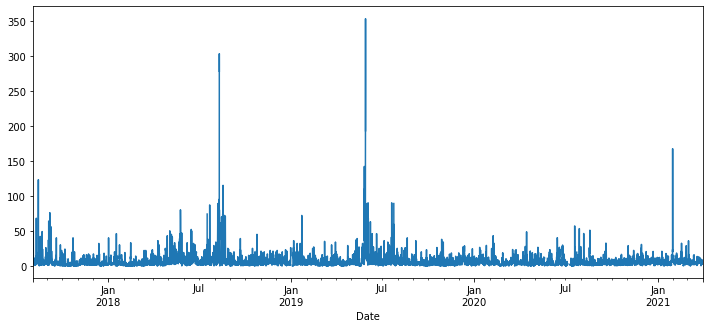

In [ ]:
df1_w[aa].resample('H').mean().plot(figsize = (12,5))

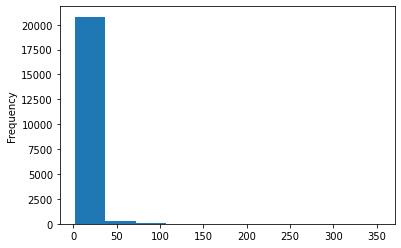

In [ ]:
df1_w[aa][df1_w[aa]>2].plot.hist()

In [ ]:
df1_w[aa][df1_w[aa]>100]= np.nan
df1_w.dropna(inplace = True)

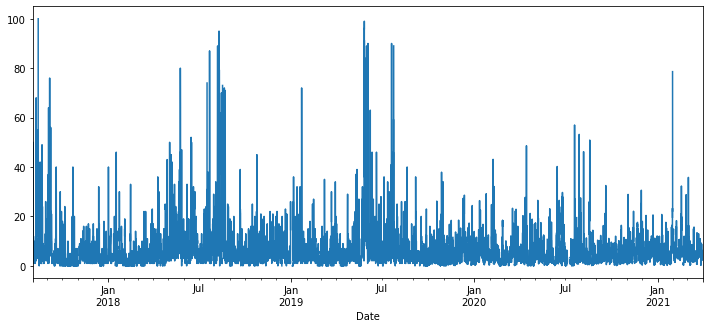

In [ ]:
df1_w[aa].resample('H').mean().plot(figsize = (12,5))

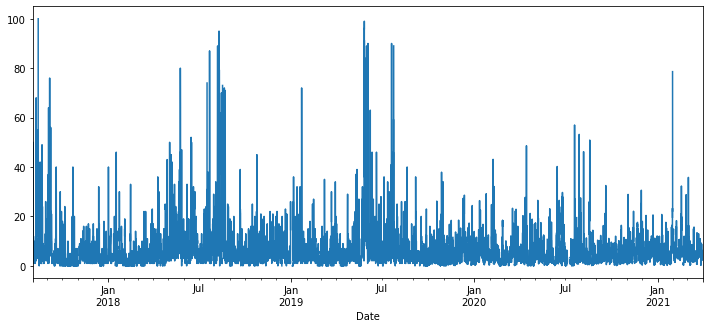

In [ ]:
df1_w[aa].resample('H').mean().plot(figsize = (12,5))

In [ ]:
# df1_w[ 'H2S (ppb)'][df1_w[ 'H2S (ppb)']>3].plot.hist()

In [ ]:
df1_w.columns

Index(['PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score'],
      dtype='object')

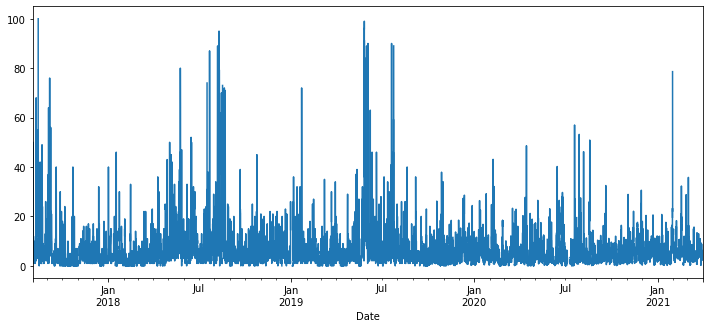

In [ ]:
df1_w[ aa].resample('H').mean().plot(figsize = (12,5))

In [ ]:
avg = df1_w['score'].mean()
std = df1_w['score'].std()
len(df1_w[df1_w['score']<avg + 7*std])/len(df1_w)

0.9972184953696129

In [ ]:
def objectivee(trial):    
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.00001, random_state = 42)
        param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "booster": trial.suggest_categorical("booster", ["gbtree"]), #",,""gblinear" , "dart"
        "lambda": trial.suggest_loguniform("lambda", 0.01, 100.0),
        "alpha": trial.suggest_loguniform("alpha", 0.01, 100.0),
        "score" : trial.suggest_float( 'score', avg + 1.5*std, avg + 7 * std )
        }

        # if param["booster"] == "gbtree" :
        #     param["n_estimators"] =  trial.suggest_int("n_estimators" , 1, 10000)

        if param["booster"] == "gbtree" or param["booster"] == "dart":
            param["max_depth"] = trial.suggest_int("max_depth", 1, 10)
            param["eta"] = trial.suggest_loguniform("eta", 0.01, 100.0)
            param["gamma"] = trial.suggest_loguniform("gamma", 0.01, 100.0)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-3, 1.0)
            param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-3, 1.0)

        df_xg =  df1_w[df1_w['score'] < param["score"]].copy()
        df_xg.drop(columns = ['score'], inplace = True)
        Y =  df_xg[aa]
        Y = np.array(Y).reshape(-1,1)
        X = np.array( df_xg[ df_xg.columns[1:]])
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.000000001000, random_state = 42)

        K = 5
        kf = KFold(n_splits=K)
        acc = 0 
        for train_index, test_index in kf.split(X):   
                X_tr, X_tes = X[train_index], X[test_index]
                y_tr, y_tes =  Y[train_index],  Y[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
    
                dtrain = xgb.DMatrix(X_tra, label=y_tra)
                dval = xgb.DMatrix(X_val, label=y_val)
                dtest = xgb.DMatrix(X_tes, label=y_tes)
                
                pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-rmse")
                bst = xgb.train(param, dtrain, evals=[(dval, "validation")],  early_stopping_rounds=30,
                                callbacks=[pruning_callback],
                               # verbose_eval = False
                               )
                preds = bst.predict(dtest)
                accuracy = mean_squared_error(y_tes, preds)
                acc = acc + accuracy/K
                
        print(acc)
        return acc    

In [ ]:
study2 = optuna.create_study()
study2.optimize(objectivee, n_trials=5000)
print(study2.best_trial)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/XGB_BuffaloViewpoint_PM2.5_HP_hourly.csv')

[I 2021-05-20 03:49:42,611] A new study created in memory with name: no-name-ff7f5adf-28aa-4762-946f-5e009a3da1f0


[0]	validation-rmse:7.06913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:6.92007
[2]	validation-rmse:6.77674
[3]	validation-rmse:6.6441
[4]	validation-rmse:6.51813
[5]	validation-rmse:6.39768
[6]	validation-rmse:6.28546
[7]	validation-rmse:6.17935
[8]	validation-rmse:6.07895
[9]	validation-rmse:5.98215
[0]	validation-rmse:5.74457
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.61764
[2]	validation-rmse:5.49878
[3]	validation-rmse:5.38738
[4]	validation-rmse:5.28429
[5]	validation-rmse:5.18727
[6]	validation-rmse:5.0975
[7]	validation-rmse:5.01263
[8]	validation-rmse:4.93422
[9]	validation-rmse:4.85926
[0]	validation-rmse:6.77975
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:6.63326
[2]	validation-rmse:6.49562
[3]	validation-rmse:6.36644
[4]	validation-rmse:6.24512
[5]	validation-rmse:6.13102
[6]	validation-rmse:6.02322
[7]	validation-rmse:5.91808
[8]	validation-rmse:5.82075
[

[I 2021-05-20 03:49:43,560] Trial 0 finished with value: 39.00393876050318 and parameters: {'booster': 'gbtree', 'lambda': 67.9874542139883, 'alpha': 0.42532303215627276, 'score': 13.030885913332567, 'max_depth': 7, 'eta': 0.04575724831862802, 'gamma': 0.19946331979263196, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 39.00393876050318.


39.00393876050318
[0]	validation-rmse:38.0458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:256.436
[2]	validation-rmse:1756.24
[3]	validation-rmse:12027.4
[4]	validation-rmse:82372.9
[5]	validation-rmse:564149
[6]	validation-rmse:3.8637e+06
[7]	validation-rmse:2.64614e+07
[8]	validation-rmse:1.81227e+08
[9]	validation-rmse:1.24117e+09
[0]	validation-rmse:31.5622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:212.734
[2]	validation-rmse:1457.53
[3]	validation-rmse:9981.55
[4]	validation-rmse:68363.9
[5]	validation-rmse:468218
[6]	validation-rmse:3.2068e+06
[7]	validation-rmse:2.19631e+07
[8]	validation-rmse:1.50424e+08
[9]	validation-rmse:1.03024e+09
[0]	validation-rmse:36.2582
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:243.962
[2]	validation-rmse:1672.08
[3]	validation-rmse:11450.2
[4]	validation-rmse:78422.9
[5]	validation-rmse:537108
[6]	validation-rmse:3.6786e+06
[7]	val

[I 2021-05-20 03:49:44,099] Trial 1 finished with value: 1.2646158698523994e+18 and parameters: {'booster': 'gbtree', 'lambda': 0.0858909956371565, 'alpha': 0.07846920324751354, 'score': 27.65827970718546, 'max_depth': 2, 'eta': 7.849203796398125, 'gamma': 8.682147197674329, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 39.00393876050318.


1.2646158698523994e+18
[0]	validation-rmse:259.769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:11064.6
[2]	validation-rmse:490357
[3]	validation-rmse:2.21663e+07
[4]	validation-rmse:1.01291e+09
[5]	validation-rmse:4.70276e+10
[6]	validation-rmse:2.18891e+12
[7]	validation-rmse:1.02088e+14
[8]	validation-rmse:4.77778e+15
[9]	validation-rmse:2.24525e+17
[0]	validation-rmse:209.841
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:9493.35
[2]	validation-rmse:428687
[3]	validation-rmse:1.97427e+07
[4]	validation-rmse:9.23539e+08
[5]	validation-rmse:4.32192e+10
[6]	validation-rmse:2.02303e+12
[7]	validation-rmse:9.47102e+13
[8]	validation-rmse:4.43442e+15
[9]	validation-rmse:2.07631e+17
[0]	validation-rmse:242.242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:10346.2
[2]	validation-rmse:458670
[3]	validation-rmse:2.09948e+07
[4]	validation-rmse:9.70634e+08
[5]	validation-rmse:4.49406

[I 2021-05-20 03:49:44,891] Trial 2 finished with value: 3.5378775526171e+34 and parameters: {'booster': 'gbtree', 'lambda': 87.79667425549982, 'alpha': 2.701111771570455, 'score': 33.778893348396196, 'max_depth': 6, 'eta': 48.47273456036985, 'gamma': 0.0472860327354644, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 39.00393876050318.


3.5378775526171e+34
[0]	validation-rmse:5.96144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.84262
[2]	validation-rmse:5.78153
[3]	validation-rmse:5.76131
[4]	validation-rmse:5.72579
[5]	validation-rmse:5.70075
[6]	validation-rmse:5.66972
[7]	validation-rmse:5.66219
[8]	validation-rmse:5.65135
[9]	validation-rmse:5.63924
[0]	validation-rmse:4.85698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74359
[2]	validation-rmse:4.72156
[3]	validation-rmse:4.70892
[4]	validation-rmse:4.68647
[5]	validation-rmse:4.67795
[6]	validation-rmse:4.6707
[7]	validation-rmse:4.66146
[8]	validation-rmse:4.64121
[9]	validation-rmse:4.62876
[0]	validation-rmse:5.80023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.70905
[2]	validation-rmse:5.67661
[3]	validation-rmse:5.66928
[4]	validation-rmse:5.62729
[5]	validation-rmse:5.61881
[6]	validation-rmse:5.61076
[7]	validation-rmse:5.61235
[8]	vali

[I 2021-05-20 03:49:45,335] Trial 3 finished with value: 36.50074384901378 and parameters: {'booster': 'gbtree', 'lambda': 9.427601483672415, 'alpha': 3.4800963855135563, 'score': 17.97893056875581, 'max_depth': 1, 'eta': 0.9016541895372888, 'gamma': 96.82964088649281, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 36.50074384901378.


36.50074384901378
[0]	validation-rmse:7.05881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:6.66924
[2]	validation-rmse:6.32956
[3]	validation-rmse:6.04166
[4]	validation-rmse:5.79582
[5]	validation-rmse:5.59345
[6]	validation-rmse:5.419
[7]	validation-rmse:5.28696
[8]	validation-rmse:5.14317
[9]	validation-rmse:5.02135
[0]	validation-rmse:5.79639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.50996
[2]	validation-rmse:5.25393
[3]	validation-rmse:5.05138
[4]	validation-rmse:4.87697
[5]	validation-rmse:4.73233
[6]	validation-rmse:4.60748
[7]	validation-rmse:4.49448
[8]	validation-rmse:4.40407
[9]	validation-rmse:4.31546
[0]	validation-rmse:6.65097
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:6.26732
[2]	validation-rmse:5.9362
[3]	validation-rmse:5.6592
[4]	validation-rmse:5.40145
[5]	validation-rmse:5.19751
[6]	validation-rmse:5.01908
[7]	validation-rmse:4.87956
[8]	validatio

[I 2021-05-20 03:49:46,159] Trial 4 finished with value: 32.993664920765255 and parameters: {'booster': 'gbtree', 'lambda': 0.03427396232903101, 'alpha': 32.876436742136825, 'score': 13.127843210886844, 'max_depth': 6, 'eta': 0.10758799890415359, 'gamma': 3.140565626390422, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 32.993664920765255.


32.993664920765255


[I 2021-05-20 03:49:46,208] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:46,243] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:46,292] Trial 7 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.15686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.65839
[2]	validation-rmse:5.42186
[3]	validation-rmse:5.34079
[4]	validation-rmse:5.27314
[5]	validation-rmse:5.24134
[6]	validation-rmse:5.2331
[7]	validation-rmse:5.14735
[8]	validation-rmse:5.13266
[9]	validation-rmse:5.11974
[0]	validation-rmse:4.90097
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57555
[2]	validation-rmse:4.49962
[3]	validation-rmse:4.30331
[4]	validation-rmse:4.21986
[5]	validation-rmse:4.20298
[6]	validation-rmse:4.15463
[7]	validation-rmse:4.14217
[8]	validation-rmse:4.12578
[9]	validation-rmse:4.10276
[0]	validation-rmse:5.29516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.90402
[2]	validation-rmse:4.77372
[3]	validation-rmse:4.76314
[4]	validation-rmse:4.73943
[5]	validation-rmse:4.67918
[6]	validation-rmse:4.67821
[7]	validation-rmse:4.65356
[8]	validation-rmse:4.62024


[I 2021-05-20 03:49:46,861] Trial 8 finished with value: 41.9050991981431 and parameters: {'booster': 'gbtree', 'lambda': 0.011205231589161637, 'alpha': 0.0347569914056154, 'score': 21.969175753369733, 'max_depth': 3, 'eta': 0.5693471017935287, 'gamma': 20.8228625592334, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 32.993664920765255.


41.9050991981431


[I 2021-05-20 03:49:46,902] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:46,959] Trial 10 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.8876
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:6.19942
[2]	validation-rmse:5.79938
[3]	validation-rmse:5.55227
[4]	validation-rmse:5.38446
[5]	validation-rmse:5.33022
[6]	validation-rmse:5.23482
[7]	validation-rmse:5.19596
[8]	validation-rmse:5.15842
[9]	validation-rmse:5.12621
[0]	validation-rmse:5.58123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.09897
[2]	validation-rmse:4.8254
[3]	validation-rmse:4.6774
[4]	validation-rmse:4.60525
[5]	validation-rmse:4.52057
[6]	validation-rmse:4.49285
[7]	validation-rmse:4.47973
[8]	validation-rmse:4.46856
[9]	validation-rmse:4.457
[0]	validation-rmse:6.48036
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.766
[2]	validation-rmse:5.36697
[3]	validation-rmse:5.16274
[4]	validation-rmse:5.04343
[5]	validation-rmse:4.91854
[6]	validation-rmse:4.8818
[7]	validation-rmse:4.8572
[8]	validation-rmse:4.84543
[9]	vali

[I 2021-05-20 03:49:47,649] Trial 11 finished with value: 41.366369390047645 and parameters: {'booster': 'gbtree', 'lambda': 5.812444205833294, 'alpha': 2.262882023858712, 'score': 19.37902545653206, 'max_depth': 4, 'eta': 0.3152464900169735, 'gamma': 87.95083436601634, 'grow_policy': 'depthwise'}. Best is trial 4 with value: 32.993664920765255.


41.366369390047645


[I 2021-05-20 03:49:47,687] Trial 12 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.81874
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:6.22844
[2]	validation-rmse:5.78824
[3]	validation-rmse:5.64643
[4]	validation-rmse:5.41157
[5]	validation-rmse:5.26026
[6]	validation-rmse:5.12982
[7]	validation-rmse:5.01516
[8]	validation-rmse:4.97919
[9]	validation-rmse:4.87127
[0]	validation-rmse:5.76117
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15047
[2]	validation-rmse:5.17026
[3]	validation-rmse:4.79939
[4]	validation-rmse:4.82581
[5]	validation-rmse:4.55441
[6]	validation-rmse:4.57664
[7]	validation-rmse:4.46589
[8]	validation-rmse:4.47957
[9]	validation-rmse:4.38557
[0]	validation-rmse:6.41986
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.76886
[2]	validation-rmse:5.58509
[3]	validation-rmse:5.22246
[4]	validation-rmse:5.34208
[5]	validation-rmse:5.14479
[6]	validation-rmse:5.15874
[7]	validation-rmse:5.0114
[8]	validation-rmse:5.04721


[I 2021-05-20 03:49:48,431] Trial 13 finished with value: 120.01290554713746 and parameters: {'booster': 'gbtree', 'lambda': 5.1859867794147805, 'alpha': 4.5896920288055565, 'score': 13.045145550404179, 'max_depth': 5, 'eta': 1.8739972657108774, 'gamma': 4.029989982346273, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 32.993664920765255.


120.01290554713746


[I 2021-05-20 03:49:48,484] Trial 14 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.34195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:6.18453


[I 2021-05-20 03:49:48,536] Trial 15 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:49:48,581] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:48,627] Trial 17 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.96152
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:6.19506
[2]	validation-rmse:5.63931
[3]	validation-rmse:5.22338
[4]	validation-rmse:4.94878
[5]	validation-rmse:4.75468
[6]	validation-rmse:4.58235
[7]	validation-rmse:4.43615
[8]	validation-rmse:4.32928
[9]	validation-rmse:4.25223
[0]	validation-rmse:5.88876
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.37621
[2]	validation-rmse:5.01286
[3]	validation-rmse:4.73229
[4]	validation-rmse:4.50315
[5]	validation-rmse:4.33483
[6]	validation-rmse:4.23868
[7]	validation-rmse:4.13362
[8]	validation-rmse:4.08355
[9]	validation-rmse:4.00768
[0]	validation-rmse:6.46952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.78936
[2]	validation-rmse:5.32834
[3]	validation-rmse:5.00939
[4]	validation-rmse:4.75226
[5]	validation-rmse:4.59255
[6]	validation-rmse:4.46161
[7]	validation-rmse:4.36284
[8]	validation-rmse:4.29587

[I 2021-05-20 03:49:49,863] Trial 18 finished with value: 41.142694921232895 and parameters: {'booster': 'gbtree', 'lambda': 2.190784454587072, 'alpha': 12.205123265375102, 'score': 21.35446251557181, 'max_depth': 8, 'eta': 0.22050114523557784, 'gamma': 0.2335562975992215, 'grow_policy': 'depthwise'}. Best is trial 4 with value: 32.993664920765255.


41.142694921232895


[I 2021-05-20 03:49:49,907] Trial 19 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.82409
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06096
[2]	validation-rmse:4.73569
[3]	validation-rmse:4.63047
[4]	validation-rmse:4.50028
[5]	validation-rmse:4.46064
[6]	validation-rmse:4.38308
[7]	validation-rmse:4.34359
[8]	validation-rmse:4.31012
[9]	validation-rmse:4.26966
[0]	validation-rmse:5.03268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43966
[2]	validation-rmse:4.31878
[3]	validation-rmse:4.25217
[4]	validation-rmse:4.20292
[5]	validation-rmse:4.11965
[6]	validation-rmse:4.04846
[7]	validation-rmse:4.02934
[8]	validation-rmse:3.99328
[9]	validation-rmse:3.9337
[0]	validation-rmse:5.6876
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82503
[2]	validation-rmse:4.53956
[3]	validation-rmse:4.42464
[4]	validation-rmse:4.29828
[5]	validation-rmse:4.26835
[6]	validation-rmse:4.25037
[7]	validation-rmse:4.21317
[8]	validation-rmse:4.19272
[

[I 2021-05-20 03:49:50,982] Trial 20 finished with value: 48.671076024084705 and parameters: {'booster': 'gbtree', 'lambda': 0.09414822812752224, 'alpha': 62.041519580088426, 'score': 25.105028261173132, 'max_depth': 7, 'eta': 0.5825178115837518, 'gamma': 7.663599517700332, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 32.993664920765255.


48.671076024084705


[I 2021-05-20 03:49:51,030] Trial 21 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.78742
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:49:51,106] Trial 22 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:49:51,151] Trial 23 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:51,209] Trial 24 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.76289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.08368
[2]	validation-rmse:4.76979
[3]	validation-rmse:4.55672
[4]	validation-rmse:4.46844
[5]	validation-rmse:4.42773
[6]	validation-rmse:4.39428
[7]	validation-rmse:4.35347
[8]	validation-rmse:4.28797
[9]	validation-rmse:4.27767
[0]	validation-rmse:5.04209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58561
[2]	validation-rmse:4.39021
[3]	validation-rmse:4.2312
[4]	validation-rmse:4.14935
[5]	validation-rmse:4.12203
[6]	validation-rmse:4.02083
[7]	validation-rmse:4.00243
[8]	validation-rmse:3.97945
[9]	validation-rmse:3.96169
[0]	validation-rmse:5.63781
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.85055
[2]	validation-rmse:4.59548
[3]	validation-rmse:4.48093
[4]	validation-rmse:4.41188
[5]	validation-rmse:4.34553
[6]	validation-rmse:4.27824
[7]	validation-rmse:4.28742
[8]	validation-rmse:4.2554
[

[I 2021-05-20 03:49:51,961] Trial 25 finished with value: 39.87031986760587 and parameters: {'booster': 'gbtree', 'lambda': 0.40738748921069773, 'alpha': 0.27906853082848543, 'score': 14.568538433152547, 'max_depth': 5, 'eta': 0.4443691661449837, 'gamma': 0.5651028603444407, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 32.993664920765255.


39.87031986760587


[I 2021-05-20 03:49:52,011] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:52,070] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:52,121] Trial 28 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.02136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.70498
[2]	validation-rmse:5.6702


[I 2021-05-20 03:49:52,219] Trial 29 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:49:52,255] Trial 30 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.40326
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.76832
[2]	validation-rmse:5.35672
[3]	validation-rmse:5.09914
[4]	validation-rmse:4.93715
[5]	validation-rmse:4.79554
[6]	validation-rmse:4.7379
[7]	validation-rmse:4.68785
[8]	validation-rmse:4.65271
[9]	validation-rmse:4.55919
[0]	validation-rmse:5.58422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10426
[2]	validation-rmse:4.80826
[3]	validation-rmse:4.59926
[4]	validation-rmse:4.49244
[5]	validation-rmse:4.41964
[6]	validation-rmse:4.30563
[7]	validation-rmse:4.24472
[8]	validation-rmse:4.20718
[9]	validation-rmse:4.14414
[0]	validation-rmse:6.31074
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.64324
[2]	validation-rmse:5.24154
[3]	validation-rmse:4.93138
[4]	validation-rmse:4.75826
[5]	validation-rmse:4.66466
[6]	validation-rmse:4.61044
[7]	validation-rmse:4.52475
[8]	validation-rmse:4.50228


[I 2021-05-20 03:49:53,079] Trial 31 finished with value: 37.872503710327386 and parameters: {'booster': 'gbtree', 'lambda': 0.3544365865670871, 'alpha': 0.26044793959058093, 'score': 14.23188457663176, 'max_depth': 5, 'eta': 0.2660846563494766, 'gamma': 0.5584351146447989, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 32.993664920765255.


37.872503710327386
[0]	validation-rmse:6.444
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.64204
[2]	validation-rmse:5.17156
[3]	validation-rmse:4.84411
[4]	validation-rmse:4.65255
[5]	validation-rmse:4.49988
[6]	validation-rmse:4.36763
[7]	validation-rmse:4.24624
[8]	validation-rmse:4.20567
[9]	validation-rmse:4.17189
[0]	validation-rmse:5.56254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.03275
[2]	validation-rmse:4.68382
[3]	validation-rmse:4.44993
[4]	validation-rmse:4.29561
[5]	validation-rmse:4.19889
[6]	validation-rmse:4.15099
[7]	validation-rmse:4.09082
[8]	validation-rmse:4.04792
[9]	validation-rmse:4.0189
[0]	validation-rmse:6.51835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.76225
[2]	validation-rmse:5.28467
[3]	validation-rmse:4.96948
[4]	validation-rmse:4.76959
[5]	validation-rmse:4.58273
[6]	validation-rmse:4.50106
[7]	validation-rmse:4.41496
[8]	validat

[I 2021-05-20 03:49:54,105] Trial 32 finished with value: 44.252155071954526 and parameters: {'booster': 'gbtree', 'lambda': 0.21758827646134846, 'alpha': 0.6804421253394256, 'score': 16.772181830654798, 'max_depth': 6, 'eta': 0.24924501847146044, 'gamma': 0.22347582120505152, 'grow_policy': 'lossguide'}. Best is trial 4 with value: 32.993664920765255.


44.252155071954526
[0]	validation-rmse:5.13637
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.03221
[2]	validation-rmse:4.89011
[3]	validation-rmse:4.87787
[4]	validation-rmse:4.86654
[5]	validation-rmse:4.92809
[6]	validation-rmse:4.9815
[7]	validation-rmse:4.9265
[8]	validation-rmse:4.91078
[9]	validation-rmse:4.89789
[0]	validation-rmse:4.29658
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24083
[2]	validation-rmse:4.17669
[3]	validation-rmse:4.13424
[4]	validation-rmse:4.1396
[5]	validation-rmse:4.19428
[6]	validation-rmse:4.18633
[7]	validation-rmse:4.18328
[8]	validation-rmse:4.16576
[9]	validation-rmse:4.16376
[0]	validation-rmse:5.2276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11528
[2]	validation-rmse:5.07818
[3]	validation-rmse:5.00877
[4]	validation-rmse:4.98288
[5]	validation-rmse:4.92903
[6]	validation-rmse:4.90794
[7]	validation-rmse:4.89548
[8]	validati

[I 2021-05-20 03:49:54,658] Trial 33 finished with value: 32.64712077937764 and parameters: {'booster': 'gbtree', 'lambda': 0.05131255136852968, 'alpha': 0.09640295644108395, 'score': 13.008659125238292, 'max_depth': 2, 'eta': 1.1284518399242751, 'gamma': 1.7795830881728876, 'grow_policy': 'lossguide'}. Best is trial 33 with value: 32.64712077937764.


32.64712077937764
[0]	validation-rmse:5.40017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.31227
[2]	validation-rmse:5.02153
[3]	validation-rmse:4.99356
[4]	validation-rmse:4.99515
[5]	validation-rmse:4.95889
[6]	validation-rmse:4.93072
[7]	validation-rmse:4.89443
[8]	validation-rmse:4.87878
[9]	validation-rmse:4.83172
[0]	validation-rmse:4.28756
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2066
[2]	validation-rmse:4.15553
[3]	validation-rmse:4.13294
[4]	validation-rmse:4.09796
[5]	validation-rmse:4.0724
[6]	validation-rmse:4.04479
[7]	validation-rmse:4.01808
[8]	validation-rmse:4.01523
[9]	validation-rmse:4.04878
[0]	validation-rmse:5.31589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18222
[2]	validation-rmse:5.16805
[3]	validation-rmse:4.95445
[4]	validation-rmse:4.94083
[5]	validation-rmse:4.92564
[6]	validation-rmse:4.92378
[7]	validation-rmse:4.88522
[8]	validat

[I 2021-05-20 03:49:55,209] Trial 34 finished with value: 30.718758631405034 and parameters: {'booster': 'gbtree', 'lambda': 0.020325054701553092, 'alpha': 0.03307016197861654, 'score': 13.061753015450394, 'max_depth': 2, 'eta': 1.15157564271779, 'gamma': 1.5231409249629415, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


30.718758631405034
[0]	validation-rmse:5.97444
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.5622
[2]	validation-rmse:5.34994
[3]	validation-rmse:5.31516
[4]	validation-rmse:5.21466
[5]	validation-rmse:5.20441


[I 2021-05-20 03:49:55,311] Trial 35 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 03:49:55,356] Trial 36 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.64064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.55475
[2]	validation-rmse:5.49032


[I 2021-05-20 03:49:55,435] Trial 37 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:49:55,493] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:55,542] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:55,587] Trial 40 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.31837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.70624
[2]	validation-rmse:5.381
[3]	validation-rmse:5.21377
[4]	validation-rmse:5.12452
[5]	validation-rmse:5.05597
[6]	validation-rmse:4.95816
[7]	validation-rmse:4.8936
[8]	validation-rmse:4.88671
[9]	validation-rmse:4.85783
[0]	validation-rmse:5.27991
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82494
[2]	validation-rmse:4.59489
[3]	validation-rmse:4.48428
[4]	validation-rmse:4.38516
[5]	validation-rmse:4.34827
[6]	validation-rmse:4.26857
[7]	validation-rmse:4.2452
[8]	validation-rmse:4.23285
[9]	validation-rmse:4.22037
[0]	validation-rmse:5.94611
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.31117
[2]	validation-rmse:5.04593
[3]	validation-rmse:4.83753
[4]	validation-rmse:4.73394
[5]	validation-rmse:4.69315
[6]	validation-rmse:4.67016
[7]	validation-rmse:4.65873
[8]	validation-rmse:4.6427
[9]	

[I 2021-05-20 03:49:56,191] Trial 41 finished with value: 34.64054285841779 and parameters: {'booster': 'gbtree', 'lambda': 0.027394653029591196, 'alpha': 0.14319790300929536, 'score': 13.981856708463049, 'max_depth': 3, 'eta': 0.33463409907267616, 'gamma': 0.5647043642786106, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.64054285841779
[0]	validation-rmse:5.9709
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.33197
[2]	validation-rmse:5.05614
[3]	validation-rmse:4.93093
[4]	validation-rmse:4.84838
[5]	validation-rmse:4.82769
[6]	validation-rmse:4.7657
[7]	validation-rmse:4.75442
[8]	validation-rmse:4.73345
[9]	validation-rmse:4.71776
[0]	validation-rmse:5.17108
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72359
[2]	validation-rmse:4.51174
[3]	validation-rmse:4.43934
[4]	validation-rmse:4.3513
[5]	validation-rmse:4.33585
[6]	validation-rmse:4.29778
[7]	validation-rmse:4.29246
[8]	validation-rmse:4.28451
[9]	validation-rmse:4.26304
[0]	validation-rmse:5.85667
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21645
[2]	validation-rmse:4.99371
[3]	validation-rmse:4.93698
[4]	validation-rmse:4.87287
[5]	validation-rmse:4.84894
[6]	validation-rmse:4.82747
[7]	validation-rmse:4.80907
[8]	validati

[I 2021-05-20 03:49:56,828] Trial 42 finished with value: 34.98247982357573 and parameters: {'booster': 'gbtree', 'lambda': 0.028050853877131934, 'alpha': 0.06383269881456094, 'score': 13.538432837440364, 'max_depth': 3, 'eta': 0.3953216662566133, 'gamma': 1.0013937818050762, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.98247982357573
[0]	validation-rmse:6.00845
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.3471
[2]	validation-rmse:5.07578
[3]	validation-rmse:4.94254
[4]	validation-rmse:4.86145
[5]	validation-rmse:4.77598
[6]	validation-rmse:4.74972
[7]	validation-rmse:4.72461
[8]	validation-rmse:4.72696
[9]	validation-rmse:4.69334
[0]	validation-rmse:5.19794
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73857
[2]	validation-rmse:4.53461
[3]	validation-rmse:4.43591
[4]	validation-rmse:4.33229
[5]	validation-rmse:4.3147
[6]	validation-rmse:4.22416
[7]	validation-rmse:4.19344
[8]	validation-rmse:4.17765
[9]	validation-rmse:4.1627
[0]	validation-rmse:5.71845
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07961
[2]	validation-rmse:4.84854
[3]	validation-rmse:4.74817
[4]	validation-rmse:4.70646
[5]	validation-rmse:4.68583
[6]	validation-rmse:4.66186
[7]	validation-rmse:4.6536
[8]	validatio

[I 2021-05-20 03:49:57,514] Trial 43 finished with value: 35.009944661712716 and parameters: {'booster': 'gbtree', 'lambda': 0.025513509931321066, 'alpha': 0.04154743985311808, 'score': 13.684717696402396, 'max_depth': 3, 'eta': 0.40009415841896706, 'gamma': 1.3016840853960254, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:49:57,563] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:49:57,611] Trial 45 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.52805
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19791
[2]	validation-rmse:5.12691
[3]	validation-rmse:5.10741


[I 2021-05-20 03:49:57,694] Trial 46 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:5.87665
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21259
[2]	validation-rmse:4.93238
[3]	validation-rmse:4.78824
[4]	validation-rmse:4.74068
[5]	validation-rmse:4.67303
[6]	validation-rmse:4.64273
[7]	validation-rmse:4.61827
[8]	validation-rmse:4.59673
[9]	validation-rmse:4.58841
[0]	validation-rmse:5.0493
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58059
[2]	validation-rmse:4.37377
[3]	validation-rmse:4.26908
[4]	validation-rmse:4.21422
[5]	validation-rmse:4.17934
[6]	validation-rmse:4.10968
[7]	validation-rmse:4.09704
[8]	validation-rmse:4.06721
[9]	validation-rmse:4.04742
[0]	validation-rmse:5.65583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.03858
[2]	validation-rmse:4.82134
[3]	validation-rmse:4.71968
[4]	validation-rmse:4.66631
[5]	validation-rmse:4.59312
[6]	validation-rmse:4.58261
[7]	validation-rmse:4.57366
[8]	validation-rmse:4.56037


[I 2021-05-20 03:49:58,411] Trial 47 finished with value: 34.42392102044033 and parameters: {'booster': 'gbtree', 'lambda': 0.016977283325116322, 'alpha': 0.05914709674753404, 'score': 14.040685004175506, 'max_depth': 3, 'eta': 0.39868631376154795, 'gamma': 5.987296262860879, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.42392102044033
[0]	validation-rmse:5.98613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.57321


[I 2021-05-20 03:49:58,493] Trial 48 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:49:58,540] Trial 49 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.30078
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:49:58,607] Trial 50 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:6.11765
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.46387
[2]	validation-rmse:5.1816
[3]	validation-rmse:4.99728
[4]	validation-rmse:4.91352
[5]	validation-rmse:4.86983
[6]	validation-rmse:4.77565
[7]	validation-rmse:4.70374
[8]	validation-rmse:4.67988
[9]	validation-rmse:4.67012
[0]	validation-rmse:5.26826
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79954
[2]	validation-rmse:4.5606
[3]	validation-rmse:4.4506
[4]	validation-rmse:4.34688
[5]	validation-rmse:4.30149
[6]	validation-rmse:4.27768
[7]	validation-rmse:4.26368
[8]	validation-rmse:4.24638
[9]	validation-rmse:4.23511
[0]	validation-rmse:6.00528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.40577
[2]	validation-rmse:5.14957
[3]	validation-rmse:5.00708
[4]	validation-rmse:4.90558
[5]	validation-rmse:4.85727
[6]	validation-rmse:4.83617
[7]	validation-rmse:4.81963
[8]	validation-rmse:4.78242
[9

[I 2021-05-20 03:49:59,268] Trial 51 finished with value: 33.66921437111193 and parameters: {'booster': 'gbtree', 'lambda': 0.022488193321061344, 'alpha': 0.06213063833772204, 'score': 13.759834053041136, 'max_depth': 3, 'eta': 0.3462202605364448, 'gamma': 0.3545801005718226, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


33.66921437111193
[0]	validation-rmse:4.97575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81626
[2]	validation-rmse:4.7741
[3]	validation-rmse:4.84876
[4]	validation-rmse:4.79677
[5]	validation-rmse:4.64979
[6]	validation-rmse:4.59042
[7]	validation-rmse:4.55798
[8]	validation-rmse:4.53552
[9]	validation-rmse:4.52198
[0]	validation-rmse:4.37395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33442
[2]	validation-rmse:4.17896
[3]	validation-rmse:4.11342
[4]	validation-rmse:4.07932
[5]	validation-rmse:4.07708
[6]	validation-rmse:4.04118
[7]	validation-rmse:4.00641
[8]	validation-rmse:4.00565
[9]	validation-rmse:3.96874
[0]	validation-rmse:4.90965
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.77905
[2]	validation-rmse:4.74023
[3]	validation-rmse:4.64336
[4]	validation-rmse:4.62898
[5]	validation-rmse:4.60687
[6]	validation-rmse:4.60586
[7]	validation-rmse:4.58557
[8]	valida

[I 2021-05-20 03:49:59,918] Trial 52 finished with value: 38.44560845672131 and parameters: {'booster': 'gbtree', 'lambda': 0.01951758131325629, 'alpha': 0.04771822016487973, 'score': 14.116156043866209, 'max_depth': 3, 'eta': 0.8774172777141865, 'gamma': 0.324202819207408, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[0]	validation-rmse:6.12632
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.42625
[2]	validation-rmse:5.10015
[3]	validation-rmse:4.84304
[4]	validation-rmse:4.68929
[5]	validation-rmse:4.60226
[6]	validation-rmse:4.57314
[7]	validation-rmse:4.52127
[8]	validation-rmse:4.45407
[9]	validation-rmse:4.42558
[0]	validation-rmse:5.2732
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76457
[2]	validation-rmse:4.5183
[3]	validation-rmse:4.36655
[4]	validation-rmse:4.26672
[5]	validation-rmse:4.19925
[6]	validation-rmse:4.14908
[7]	validation-rmse:4.13328
[8]	validation-rmse:4.06017
[9]	validation-rmse:4.04222
[0]	validation-rmse:6.24832
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.5288
[2]	validation-rmse:5.20706
[3]	validation-rmse:5.01575
[4]	validation-rmse:4.84289
[5]	validation-rmse:4.79953
[6]	validation-rmse:4.77593
[7]	validation-rmse:4.72184
[8]	validation-rmse:4.67592
[9

[I 2021-05-20 03:50:00,670] Trial 53 finished with value: 38.543622352458044 and parameters: {'booster': 'gbtree', 'lambda': 0.012941441110085857, 'alpha': 0.07998537772355678, 'score': 14.970427546443803, 'max_depth': 4, 'eta': 0.32275805516923034, 'gamma': 1.5773014001452672, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.543622352458044
[0]	validation-rmse:6.11012
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:00,724] Trial 54 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:00,768] Trial 55 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:00,813] Trial 56 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:00,860] Trial 57 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.80306
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:00,911] Trial 58 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:00,953] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:00,999] Trial 60 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.70988
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1186
[2]	validation-rmse:4.90322
[3]	validation-rmse:4.80714
[4]	validation-rmse:4.68443
[5]	validation-rmse:4.65996
[6]	validation-rmse:4.63466
[7]	validation-rmse:4.60962
[8]	validation-rmse:4.58226
[9]	validation-rmse:4.57636
[0]	validation-rmse:4.9952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54753
[2]	validation-rmse:4.37729
[3]	validation-rmse:4.26789
[4]	validation-rmse:4.22201
[5]	validation-rmse:4.16483
[6]	validation-rmse:4.14623
[7]	validation-rmse:4.12955
[8]	validation-rmse:4.10018
[9]	validation-rmse:4.1089
[0]	validation-rmse:5.68994
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11086
[2]	validation-rmse:4.93453
[3]	validation-rmse:4.84962
[4]	validation-rmse:4.77855
[5]	validation-rmse:4.70896
[6]	validation-rmse:4.73316
[7]	validation-rmse:4.71628
[8]	validation-rmse:4.70559
[9

[I 2021-05-20 03:50:01,675] Trial 61 finished with value: 34.676640818068925 and parameters: {'booster': 'gbtree', 'lambda': 0.02556525540430871, 'alpha': 0.06811886870904227, 'score': 13.519318839165372, 'max_depth': 3, 'eta': 0.45634210641215717, 'gamma': 1.0009517847545546, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.676640818068925
[0]	validation-rmse:5.19241
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13268
[2]	validation-rmse:5.09479


[I 2021-05-20 03:50:01,756] Trial 62 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:5.90855
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2683
[2]	validation-rmse:4.98581
[3]	validation-rmse:4.85437
[4]	validation-rmse:4.72991
[5]	validation-rmse:4.66638
[6]	validation-rmse:4.62169
[7]	validation-rmse:4.60877
[8]	validation-rmse:4.5752
[9]	validation-rmse:4.53775
[0]	validation-rmse:4.9795
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51871
[2]	validation-rmse:4.29676
[3]	validation-rmse:4.21108
[4]	validation-rmse:4.15031
[5]	validation-rmse:4.13381
[6]	validation-rmse:4.12344
[7]	validation-rmse:4.10856
[8]	validation-rmse:4.06547
[9]	validation-rmse:3.98731
[0]	validation-rmse:5.85626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2169
[2]	validation-rmse:4.97631
[3]	validation-rmse:4.85494
[4]	validation-rmse:4.80567
[5]	validation-rmse:4.75399
[6]	validation-rmse:4.74425
[7]	validation-rmse:4.73803
[8]	validation-rmse:4.6491
[9]	

[I 2021-05-20 03:50:02,427] Trial 63 finished with value: 31.84960437817573 and parameters: {'booster': 'gbtree', 'lambda': 0.6149592080263868, 'alpha': 0.03792787242187896, 'score': 12.954440136053977, 'max_depth': 3, 'eta': 0.37976076841121964, 'gamma': 2.179084602200938, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


31.84960437817573


[I 2021-05-20 03:50:02,482] Trial 64 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:02,534] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:02,577] Trial 66 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.19389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8523
[2]	validation-rmse:4.74316
[3]	validation-rmse:4.58456
[4]	validation-rmse:4.57416
[5]	validation-rmse:4.53714
[6]	validation-rmse:4.4829
[7]	validation-rmse:4.45646
[8]	validation-rmse:4.41803
[9]	validation-rmse:4.40453
[0]	validation-rmse:4.73079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46392
[2]	validation-rmse:4.4032
[3]	validation-rmse:4.2936
[4]	validation-rmse:4.28552
[5]	validation-rmse:4.23976
[6]	validation-rmse:4.22103
[7]	validation-rmse:4.20553
[8]	validation-rmse:4.12178
[9]	validation-rmse:4.10396
[0]	validation-rmse:5.20992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.87164
[2]	validation-rmse:4.75039
[3]	validation-rmse:4.70489
[4]	validation-rmse:4.6838
[5]	validation-rmse:4.67505
[6]	validation-rmse:4.66811
[7]	validation-rmse:4.56485
[8]	validation-rmse:4.53101
[9]	

[I 2021-05-20 03:50:03,262] Trial 67 finished with value: 37.41734570396912 and parameters: {'booster': 'gbtree', 'lambda': 0.10749075995286393, 'alpha': 0.03382169201579822, 'score': 14.646446970909325, 'max_depth': 3, 'eta': 0.6323250384532715, 'gamma': 27.41281506949131, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.41734570396912


[I 2021-05-20 03:50:03,309] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:03,361] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:03,403] Trial 70 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:6.07101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.44636


[I 2021-05-20 03:50:03,480] Trial 71 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:5.06802
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8723
[2]	validation-rmse:4.72293
[3]	validation-rmse:4.71088
[4]	validation-rmse:4.69175
[5]	validation-rmse:4.66534
[6]	validation-rmse:4.61188
[7]	validation-rmse:4.56965
[8]	validation-rmse:4.55452
[9]	validation-rmse:4.38504
[0]	validation-rmse:4.17812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06841
[2]	validation-rmse:4.02111
[3]	validation-rmse:3.97505
[4]	validation-rmse:3.9283
[5]	validation-rmse:3.9157
[6]	validation-rmse:3.82739
[7]	validation-rmse:3.80025
[8]	validation-rmse:3.78694
[9]	validation-rmse:3.75862
[0]	validation-rmse:4.98656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81098
[2]	validation-rmse:4.81135
[3]	validation-rmse:4.74846
[4]	validation-rmse:4.72485
[5]	validation-rmse:4.67671
[6]	validation-rmse:4.655
[7]	validation-rmse:4.66846
[8]	validation-rmse:4.65565
[9]	

[I 2021-05-20 03:50:04,367] Trial 72 finished with value: 120.51927610918928 and parameters: {'booster': 'gbtree', 'lambda': 0.04985479241584434, 'alpha': 24.650189599980834, 'score': 12.93817783986628, 'max_depth': 3, 'eta': 0.780933938075233, 'gamma': 1.9394311242396771, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


120.51927610918928


[I 2021-05-20 03:50:04,418] Trial 73 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:04,459] Trial 74 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.3507
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22261


[I 2021-05-20 03:50:04,544] Trial 75 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:04,593] Trial 76 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.37124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.97094
[2]	validation-rmse:4.82448
[3]	validation-rmse:4.76314
[4]	validation-rmse:4.67177
[5]	validation-rmse:4.66408
[6]	validation-rmse:4.63473
[7]	validation-rmse:4.60707
[8]	validation-rmse:4.58868
[9]	validation-rmse:4.54884
[0]	validation-rmse:4.60284
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28538
[2]	validation-rmse:4.15874
[3]	validation-rmse:4.13766
[4]	validation-rmse:4.10418
[5]	validation-rmse:4.07392
[6]	validation-rmse:4.068
[7]	validation-rmse:4.02498
[8]	validation-rmse:4.00053
[9]	validation-rmse:3.97921
[0]	validation-rmse:5.38768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.93193
[2]	validation-rmse:4.82146
[3]	validation-rmse:4.77148
[4]	validation-rmse:4.76563
[5]	validation-rmse:4.74324
[6]	validation-rmse:4.70094
[7]	validation-rmse:4.6908
[8]	validation-rmse:4.6812
[9]

[I 2021-05-20 03:50:05,257] Trial 77 finished with value: 35.68799529122748 and parameters: {'booster': 'gbtree', 'lambda': 0.01512478087424287, 'alpha': 0.33507706028197576, 'score': 13.59760423197017, 'max_depth': 3, 'eta': 0.5767998694571821, 'gamma': 4.736563251088771, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[I 2021-05-20 03:50:05,310] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:05,354] Trial 79 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.98369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.34567


[I 2021-05-20 03:50:05,424] Trial 80 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:5.78415
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12541
[2]	validation-rmse:4.84436
[3]	validation-rmse:4.71207
[4]	validation-rmse:4.59916
[5]	validation-rmse:4.54562
[6]	validation-rmse:4.53494
[7]	validation-rmse:4.49423
[8]	validation-rmse:4.47079
[9]	validation-rmse:4.44823
[0]	validation-rmse:4.94351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47382
[2]	validation-rmse:4.25318
[3]	validation-rmse:4.15581
[4]	validation-rmse:4.09509
[5]	validation-rmse:4.02631
[6]	validation-rmse:4.01203
[7]	validation-rmse:4.01472
[8]	validation-rmse:3.98891
[9]	validation-rmse:3.96632
[0]	validation-rmse:5.99052
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.36919
[2]	validation-rmse:5.11051
[3]	validation-rmse:4.92929
[4]	validation-rmse:4.84499
[5]	validation-rmse:4.81064
[6]	validation-rmse:4.78944
[7]	validation-rmse:4.72461
[8]	validation-rmse:4.71687

[I 2021-05-20 03:50:06,115] Trial 81 finished with value: 34.647274284820455 and parameters: {'booster': 'gbtree', 'lambda': 0.027599043191827027, 'alpha': 0.06283403668758623, 'score': 13.60489200714188, 'max_depth': 3, 'eta': 0.35601254840410823, 'gamma': 1.027923824221343, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.647274284820455


[I 2021-05-20 03:50:06,165] Trial 82 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.2394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.83319
[2]	validation-rmse:4.70366
[3]	validation-rmse:4.65861
[4]	validation-rmse:4.60279
[5]	validation-rmse:4.5215
[6]	validation-rmse:4.42826
[7]	validation-rmse:4.39706
[8]	validation-rmse:4.36479
[9]	validation-rmse:4.36301
[0]	validation-rmse:4.49318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24031
[2]	validation-rmse:4.05236
[3]	validation-rmse:4.03168
[4]	validation-rmse:4.00005
[5]	validation-rmse:3.94888
[6]	validation-rmse:3.92263
[7]	validation-rmse:3.90795
[8]	validation-rmse:3.91184
[9]	validation-rmse:3.90256
[0]	validation-rmse:4.94957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68709
[2]	validation-rmse:4.60434
[3]	validation-rmse:4.54483
[4]	validation-rmse:4.52778
[5]	validation-rmse:4.4935
[6]	validation-rmse:4.45595
[7]	validation-rmse:4.43313
[8]	validation-rmse:4.40933
[9

[I 2021-05-20 03:50:06,930] Trial 83 finished with value: 34.97702084617167 and parameters: {'booster': 'gbtree', 'lambda': 0.04118772775823199, 'alpha': 0.025451150806012776, 'score': 14.020176061382292, 'max_depth': 4, 'eta': 0.7293622788159925, 'gamma': 1.4726772866303635, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.97702084617167


[I 2021-05-20 03:50:06,977] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:07,030] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:07,074] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:07,132] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:07,174] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:07,229] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:07,271] Trial 90 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.28976
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.89101
[2]	validation-rmse:4.76535
[3]	validation-rmse:4.71789
[4]	validation-rmse:4.6568
[5]	validation-rmse:4.59151
[6]	validation-rmse:4.55662
[7]	validation-rmse:4.46398
[8]	validation-rmse:4.45861
[9]	validation-rmse:4.40196
[0]	validation-rmse:4.52825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22448
[2]	validation-rmse:4.08383
[3]	validation-rmse:4.05996
[4]	validation-rmse:4.03272
[5]	validation-rmse:4.00444
[6]	validation-rmse:4.00785
[7]	validation-rmse:3.98254
[8]	validation-rmse:3.92404
[9]	validation-rmse:3.91628
[0]	validation-rmse:4.99729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7026
[2]	validation-rmse:4.58925
[3]	validation-rmse:4.52004
[4]	validation-rmse:4.46953
[5]	validation-rmse:4.40857
[6]	validation-rmse:4.39264
[7]	validation-rmse:4.34954
[8]	validation-rmse:4.32524
[

[I 2021-05-20 03:50:08,084] Trial 91 finished with value: 37.09917488921701 and parameters: {'booster': 'gbtree', 'lambda': 0.0419954661073468, 'alpha': 0.02852288810477322, 'score': 14.032364063728274, 'max_depth': 4, 'eta': 0.6993760633809339, 'gamma': 1.4260460577638518, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.09917488921701
[0]	validation-rmse:5.33718
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07926
[2]	validation-rmse:5.00611


[I 2021-05-20 03:50:08,183] Trial 92 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:5.21415
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.9538
[2]	validation-rmse:4.87181
[3]	validation-rmse:4.83068
[4]	validation-rmse:4.81119


[I 2021-05-20 03:50:08,282] Trial 93 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:5.10632
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0548
[2]	validation-rmse:4.9727
[3]	validation-rmse:4.89926
[4]	validation-rmse:4.8509


[I 2021-05-20 03:50:08,399] Trial 94 pruned. Trial was pruned at iteration 5.
[I 2021-05-20 03:50:08,443] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:08,485] Trial 96 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.40895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.93807
[2]	validation-rmse:4.7757
[3]	validation-rmse:4.73969
[4]	validation-rmse:4.6913
[5]	validation-rmse:4.68478
[6]	validation-rmse:4.64701
[7]	validation-rmse:4.53241
[8]	validation-rmse:4.52863
[9]	validation-rmse:4.50295
[0]	validation-rmse:4.77938
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47533
[2]	validation-rmse:4.20998
[3]	validation-rmse:4.16483
[4]	validation-rmse:4.10989
[5]	validation-rmse:4.10144
[6]	validation-rmse:3.998
[7]	validation-rmse:3.96296
[8]	validation-rmse:3.93515
[9]	validation-rmse:3.91532
[0]	validation-rmse:5.20469
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72872
[2]	validation-rmse:4.65902
[3]	validation-rmse:4.61027
[4]	validation-rmse:4.56794
[5]	validation-rmse:4.55249
[6]	validation-rmse:4.46434
[7]	validation-rmse:4.43731
[8]	validation-rmse:4.40727
[9]

[I 2021-05-20 03:50:09,241] Trial 97 finished with value: 43.69025099540964 and parameters: {'booster': 'gbtree', 'lambda': 0.025700472186691952, 'alpha': 3.4207793258099977, 'score': 16.641493104811335, 'max_depth': 4, 'eta': 0.6315002853691767, 'gamma': 5.211038938173734, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[0]	validation-rmse:5.71394
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:09,307] Trial 98 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.66824
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.94764
[2]	validation-rmse:4.58482
[3]	validation-rmse:4.36258
[4]	validation-rmse:4.25797
[5]	validation-rmse:4.18439
[6]	validation-rmse:4.12447
[7]	validation-rmse:4.0802
[8]	validation-rmse:4.08397
[9]	validation-rmse:4.05522
[0]	validation-rmse:5.08831
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50373
[2]	validation-rmse:4.24618
[3]	validation-rmse:4.11654
[4]	validation-rmse:4.02663
[5]	validation-rmse:3.96817
[6]	validation-rmse:3.93491
[7]	validation-rmse:3.9041
[8]	validation-rmse:3.88165
[9]	validation-rmse:3.83739
[0]	validation-rmse:5.80131
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0323
[2]	validation-rmse:4.70756
[3]	validation-rmse:4.50498
[4]	validation-rmse:4.43344
[5]	validation-rmse:4.3805
[6]	validation-rmse:4.30586
[7]	validation-rmse:4.27767
[8]	validation-rmse:4.24418
[9]

[I 2021-05-20 03:50:10,272] Trial 99 finished with value: 43.05350684257077 and parameters: {'booster': 'gbtree', 'lambda': 0.016991070930842702, 'alpha': 0.010697768320795517, 'score': 14.69387692050485, 'max_depth': 6, 'eta': 0.4012441072213665, 'gamma': 0.6186208411379731, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


43.05350684257077
[0]	validation-rmse:5.85396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1992


[I 2021-05-20 03:50:10,337] Trial 100 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:10,381] Trial 101 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:10,438] Trial 102 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.33733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07254
[2]	validation-rmse:4.9088


[I 2021-05-20 03:50:10,521] Trial 103 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:50:10,572] Trial 104 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:10,625] Trial 105 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:10,676] Trial 106 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.84796
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:10,737] Trial 107 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.90672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76844
[2]	validation-rmse:4.73658
[3]	validation-rmse:4.68765
[4]	validation-rmse:4.55148
[5]	validation-rmse:4.59053
[6]	validation-rmse:4.56694
[7]	validation-rmse:4.56907
[8]	validation-rmse:4.55666
[9]	validation-rmse:4.57407
[0]	validation-rmse:4.23412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13287
[2]	validation-rmse:3.89594
[3]	validation-rmse:3.85184
[4]	validation-rmse:3.794
[5]	validation-rmse:3.81722
[6]	validation-rmse:3.82452
[7]	validation-rmse:3.83561
[8]	validation-rmse:3.81892
[9]	validation-rmse:3.76999
[0]	validation-rmse:4.77898
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63594
[2]	validation-rmse:4.64007
[3]	validation-rmse:4.62069
[4]	validation-rmse:4.55499
[5]	validation-rmse:4.51803
[6]	validation-rmse:4.48887
[7]	validation-rmse:4.50993
[8]	validation-rmse:4.50419
[

[I 2021-05-20 03:50:11,704] Trial 108 finished with value: 57.38220011351973 and parameters: {'booster': 'gbtree', 'lambda': 0.04662277512968765, 'alpha': 0.7418415345102835, 'score': 12.89691312342647, 'max_depth': 5, 'eta': 1.010843220197879, 'gamma': 0.5483241431176102, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.



[0]	validation-rmse:5.77119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16869
[2]	validation-rmse:4.96241


[I 2021-05-20 03:50:11,797] Trial 109 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:50:11,846] Trial 110 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:11,891] Trial 111 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:11,933] Trial 112 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:11,978] Trial 113 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:12,023] Trial 114 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.79132
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:12,085] Trial 115 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:12,132] Trial 116 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.41181
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.00064
[2]	validation-rmse:4.91356
[3]	validation-rmse:4.85199
[4]	validation-rmse:4.78416


[I 2021-05-20 03:50:12,243] Trial 117 pruned. Trial was pruned at iteration 5.
[I 2021-05-20 03:50:12,287] Trial 118 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.70542
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:12,348] Trial 119 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:12,396] Trial 120 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.16427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75267
[2]	validation-rmse:4.58879
[3]	validation-rmse:4.55467
[4]	validation-rmse:4.53735
[5]	validation-rmse:4.53129
[6]	validation-rmse:4.49242
[7]	validation-rmse:4.48881
[8]	validation-rmse:4.46725
[9]	validation-rmse:4.46279
[0]	validation-rmse:4.48128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20833
[2]	validation-rmse:4.08924
[3]	validation-rmse:4.05442
[4]	validation-rmse:4.02182
[5]	validation-rmse:4.01315
[6]	validation-rmse:4.00824
[7]	validation-rmse:3.98181
[8]	validation-rmse:3.94765
[9]	validation-rmse:3.86321
[0]	validation-rmse:5.28195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.94603
[2]	validation-rmse:4.80195
[3]	validation-rmse:4.77135
[4]	validation-rmse:4.73123
[5]	validation-rmse:4.6588
[6]	validation-rmse:4.62641
[7]	validation-rmse:4.60374
[8]	validation-rmse:4.5937
[

[I 2021-05-20 03:50:13,178] Trial 121 finished with value: 38.91664878522727 and parameters: {'booster': 'gbtree', 'lambda': 0.017474931537893926, 'alpha': 0.1285228500929528, 'score': 13.637014484301218, 'max_depth': 3, 'eta': 0.6059644172296561, 'gamma': 4.707579230511351, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[0]	validation-rmse:5.77479
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13462
[2]	validation-rmse:4.92237
[3]	validation-rmse:4.7907
[4]	validation-rmse:4.74675


[I 2021-05-20 03:50:13,294] Trial 122 pruned. Trial was pruned at iteration 5.
[I 2021-05-20 03:50:13,348] Trial 123 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.7371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2038
[2]	validation-rmse:4.99142


[I 2021-05-20 03:50:13,445] Trial 124 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:50:13,489] Trial 125 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.84728
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:13,554] Trial 126 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:13,602] Trial 127 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.9607
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75577
[2]	validation-rmse:4.65386
[3]	validation-rmse:4.51215
[4]	validation-rmse:4.54789
[5]	validation-rmse:4.53922
[6]	validation-rmse:4.531
[7]	validation-rmse:4.52078
[8]	validation-rmse:4.49502
[9]	validation-rmse:4.43852
[0]	validation-rmse:4.49735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36974
[2]	validation-rmse:4.21788
[3]	validation-rmse:4.22564
[4]	validation-rmse:4.24745
[5]	validation-rmse:4.26129
[6]	validation-rmse:4.2307
[7]	validation-rmse:4.21218
[8]	validation-rmse:4.17594
[9]	validation-rmse:4.21988
[0]	validation-rmse:4.87838
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.90257
[2]	validation-rmse:4.74873
[3]	validation-rmse:4.71036
[4]	validation-rmse:4.60823
[5]	validation-rmse:4.48254
[6]	validation-rmse:4.5421
[7]	validation-rmse:4.55062
[8]	validation-rmse:4.46266
[9]	

[I 2021-05-20 03:50:14,651] Trial 128 finished with value: 255.6238081703035 and parameters: {'booster': 'gbtree', 'lambda': 0.02629523113570178, 'alpha': 0.117666020990802, 'score': 16.158717177387715, 'max_depth': 6, 'eta': 0.9726999574703272, 'gamma': 0.7032706374821691, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


255.6238081703035
[0]	validation-rmse:5.03488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75959
[2]	validation-rmse:4.6655
[3]	validation-rmse:4.49079
[4]	validation-rmse:4.45348
[5]	validation-rmse:4.4691
[6]	validation-rmse:4.4091
[7]	validation-rmse:4.3719
[8]	validation-rmse:4.32565
[9]	validation-rmse:4.3043
[0]	validation-rmse:4.39859
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24578
[2]	validation-rmse:4.24818
[3]	validation-rmse:4.20183
[4]	validation-rmse:4.18999
[5]	validation-rmse:4.16362
[6]	validation-rmse:4.10428
[7]	validation-rmse:4.09439
[8]	validation-rmse:4.06752
[9]	validation-rmse:4.06617
[0]	validation-rmse:4.96986
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73057
[2]	validation-rmse:4.69155
[3]	validation-rmse:4.667
[4]	validation-rmse:4.5993
[5]	validation-rmse:4.58292
[6]	validation-rmse:4.52465
[7]	validation-rmse:4.43703
[8]	validation-rm

[I 2021-05-20 03:50:15,432] Trial 129 finished with value: 38.232320385009025 and parameters: {'booster': 'gbtree', 'lambda': 0.03640212670607531, 'alpha': 0.23297242687094732, 'score': 13.988900124244983, 'max_depth': 4, 'eta': 0.7695876183020469, 'gamma': 3.3783467268235143, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:50:15,476] Trial 130 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.44658
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:15,531] Trial 131 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:15,578] Trial 132 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:15,619] Trial 133 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:15,673] Trial 134 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:15,717] Trial 135 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.5672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10756
[2]	validation-rmse:4.95524


[I 2021-05-20 03:50:15,797] Trial 136 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:5.50846
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14843


[I 2021-05-20 03:50:15,868] Trial 137 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:15,914] Trial 138 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:15,959] Trial 139 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:16,000] Trial 140 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.77944
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10653
[2]	validation-rmse:4.76232
[3]	validation-rmse:4.56918
[4]	validation-rmse:4.45484
[5]	validation-rmse:4.40465
[6]	validation-rmse:4.35782
[7]	validation-rmse:4.27047
[8]	validation-rmse:4.24706
[9]	validation-rmse:4.23604
[0]	validation-rmse:4.94004
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46436
[2]	validation-rmse:4.21992
[3]	validation-rmse:4.10004
[4]	validation-rmse:4.04063
[5]	validation-rmse:4.01093
[6]	validation-rmse:3.94297
[7]	validation-rmse:3.92224
[8]	validation-rmse:3.91511
[9]	validation-rmse:3.89891
[0]	validation-rmse:5.56915
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.90645
[2]	validation-rmse:4.64952
[3]	validation-rmse:4.5343
[4]	validation-rmse:4.46188
[5]	validation-rmse:4.36816
[6]	validation-rmse:4.34375
[7]	validation-rmse:4.28762
[8]	validation-rmse:4.27028


[I 2021-05-20 03:50:16,799] Trial 141 finished with value: 40.17473262061722 and parameters: {'booster': 'gbtree', 'lambda': 0.04507115756561597, 'alpha': 0.03076703352537634, 'score': 14.074929590291235, 'max_depth': 4, 'eta': 0.3887036824782595, 'gamma': 1.4428280483032163, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.17473262061722
[0]	validation-rmse:5.06573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58544
[2]	validation-rmse:4.49482
[3]	validation-rmse:4.37384
[4]	validation-rmse:4.25142
[5]	validation-rmse:4.17356
[6]	validation-rmse:4.15429
[7]	validation-rmse:4.13924
[8]	validation-rmse:4.09716
[9]	validation-rmse:4.09547
[0]	validation-rmse:4.63309
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31697
[2]	validation-rmse:4.2584
[3]	validation-rmse:4.11912
[4]	validation-rmse:4.06298
[5]	validation-rmse:4.03477
[6]	validation-rmse:4.00065
[7]	validation-rmse:3.9738
[8]	validation-rmse:3.93412
[9]	validation-rmse:3.89615
[0]	validation-rmse:5.01801
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65156
[2]	validation-rmse:4.55044
[3]	validation-rmse:4.486
[4]	validation-rmse:4.46055
[5]	validation-rmse:4.46078
[6]	validation-rmse:4.43981
[7]	validation-rmse:4.2939
[8]	validation

[I 2021-05-20 03:50:17,699] Trial 142 finished with value: 64.05946292477879 and parameters: {'booster': 'gbtree', 'lambda': 0.028666318479172986, 'alpha': 0.02194867068020351, 'score': 13.756780933794111, 'max_depth': 5, 'eta': 0.6829489581307493, 'gamma': 0.8528891215398041, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.



[0]	validation-rmse:5.20711
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.05363
[2]	validation-rmse:4.88176
[3]	validation-rmse:4.83372


[I 2021-05-20 03:50:17,791] Trial 143 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:5.58773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.02152
[2]	validation-rmse:4.87649
[3]	validation-rmse:4.77804


[I 2021-05-20 03:50:17,901] Trial 144 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:4.76012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64981
[2]	validation-rmse:4.357
[3]	validation-rmse:4.35541
[4]	validation-rmse:4.26767
[5]	validation-rmse:4.24809
[6]	validation-rmse:4.21392
[7]	validation-rmse:4.20357
[8]	validation-rmse:4.17645
[9]	validation-rmse:4.16497
[0]	validation-rmse:4.37791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2362
[2]	validation-rmse:4.18082
[3]	validation-rmse:4.042
[4]	validation-rmse:4.0292
[5]	validation-rmse:4.01171
[6]	validation-rmse:3.96342
[7]	validation-rmse:3.91278
[8]	validation-rmse:3.86315
[9]	validation-rmse:3.84617
[0]	validation-rmse:4.53913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39105
[2]	validation-rmse:4.39237
[3]	validation-rmse:4.34149
[4]	validation-rmse:4.25921
[5]	validation-rmse:4.20136
[6]	validation-rmse:4.14831
[7]	validation-rmse:4.11756
[8]	validation-rmse:4.12453
[9]	v

[I 2021-05-20 03:50:18,939] Trial 145 finished with value: 61.16561786921201 and parameters: {'booster': 'gbtree', 'lambda': 4.3058070207404215, 'alpha': 0.07268538794394146, 'score': 13.523804881474186, 'max_depth': 6, 'eta': 0.9374117511779702, 'gamma': 1.4551639472896725, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


61.16561786921201


[I 2021-05-20 03:50:18,987] Trial 146 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.75016
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:19,043] Trial 147 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:19,097] Trial 148 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.21707
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.95962


[I 2021-05-20 03:50:19,172] Trial 149 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:19,220] Trial 150 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:19,263] Trial 151 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.13029
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06221


[I 2021-05-20 03:50:19,350] Trial 152 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:5.43682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04262


[I 2021-05-20 03:50:19,432] Trial 153 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:19,485] Trial 154 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.25195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07404


[I 2021-05-20 03:50:19,558] Trial 155 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:19,601] Trial 156 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.59549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12301


[I 2021-05-20 03:50:19,675] Trial 157 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:19,740] Trial 158 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.16132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.89676
[2]	validation-rmse:4.81108
[3]	validation-rmse:4.76428


[I 2021-05-20 03:50:19,843] Trial 159 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:5.08632
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07413


[I 2021-05-20 03:50:19,934] Trial 160 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:19,983] Trial 161 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:20,033] Trial 162 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:20,079] Trial 163 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:20,126] Trial 164 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.69559
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1099
[2]	validation-rmse:4.88907
[3]	validation-rmse:4.79128


[I 2021-05-20 03:50:20,227] Trial 165 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:50:20,281] Trial 166 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.22515
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81114
[2]	validation-rmse:4.70988
[3]	validation-rmse:4.68002
[4]	validation-rmse:4.65284
[5]	validation-rmse:4.61434
[6]	validation-rmse:4.62372


[I 2021-05-20 03:50:20,417] Trial 167 pruned. Trial was pruned at iteration 7.
[I 2021-05-20 03:50:20,461] Trial 168 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.41611
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79821
[2]	validation-rmse:4.61665
[3]	validation-rmse:4.50056
[4]	validation-rmse:4.48288
[5]	validation-rmse:4.41694
[6]	validation-rmse:4.39104
[7]	validation-rmse:4.38137
[8]	validation-rmse:4.36986
[9]	validation-rmse:4.3565
[0]	validation-rmse:4.72534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37255
[2]	validation-rmse:4.23729
[3]	validation-rmse:4.20138
[4]	validation-rmse:4.17804
[5]	validation-rmse:4.16488
[6]	validation-rmse:4.13356
[7]	validation-rmse:4.12022
[8]	validation-rmse:4.08899
[9]	validation-rmse:4.0675
[0]	validation-rmse:5.62925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16345
[2]	validation-rmse:5.05436
[3]	validation-rmse:5.00262
[4]	validation-rmse:4.98404
[5]	validation-rmse:4.94853
[6]	validation-rmse:4.88124
[7]	validation-rmse:4.86118
[8]	validation-rmse:4.84641
[

[I 2021-05-20 03:50:21,231] Trial 169 finished with value: 35.747046321216864 and parameters: {'booster': 'gbtree', 'lambda': 0.8702620426600065, 'alpha': 0.08311008202477316, 'score': 15.258683019530165, 'max_depth': 3, 'eta': 0.5426543086007881, 'gamma': 1.826335173413201, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


[0]	validation-rmse:5.58836
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:21,316] Trial 170 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.6338
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.08941
[2]	validation-rmse:4.85647
[3]	validation-rmse:4.7985
[4]	validation-rmse:4.69077


[I 2021-05-20 03:50:21,435] Trial 171 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:5.26707
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.99004


[I 2021-05-20 03:50:21,510] Trial 172 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:21,554] Trial 173 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:21,602] Trial 174 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.4703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07072


[I 2021-05-20 03:50:21,681] Trial 175 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:21,738] Trial 176 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.76131
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:21,805] Trial 177 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:21,854] Trial 178 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:21,899] Trial 179 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:21,949] Trial 180 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.15965
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.94839
[2]	validation-rmse:4.76438
[3]	validation-rmse:4.71357


[I 2021-05-20 03:50:22,052] Trial 181 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:4.895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79204
[2]	validation-rmse:4.83512
[3]	validation-rmse:4.72158
[4]	validation-rmse:4.68335
[5]	validation-rmse:4.65544
[6]	validation-rmse:4.57689
[7]	validation-rmse:4.54427
[8]	validation-rmse:4.52728
[9]	validation-rmse:4.52305
[0]	validation-rmse:4.28877
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05075
[2]	validation-rmse:4.02925
[3]	validation-rmse:4.00066
[4]	validation-rmse:3.95966
[5]	validation-rmse:3.88556
[6]	validation-rmse:3.8932
[7]	validation-rmse:3.8775
[8]	validation-rmse:3.84295
[9]	validation-rmse:3.81894
[0]	validation-rmse:4.71641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63506
[2]	validation-rmse:4.58527
[3]	validation-rmse:4.5366
[4]	validation-rmse:4.47316
[5]	validation-rmse:4.45845
[6]	validation-rmse:4.37416
[7]	validation-rmse:4.34975
[8]	validation-rmse:4.37322
[9]	

[I 2021-05-20 03:50:22,922] Trial 182 finished with value: 56.90845461799137 and parameters: {'booster': 'gbtree', 'lambda': 0.02777815863263622, 'alpha': 0.25612973754467866, 'score': 14.109987157426295, 'max_depth': 4, 'eta': 1.0923799022244849, 'gamma': 3.841410683790281, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


56.90845461799137
[0]	validation-rmse:5.15436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74534
[2]	validation-rmse:4.61382
[3]	validation-rmse:4.57046
[4]	validation-rmse:4.52656
[5]	validation-rmse:4.48682
[6]	validation-rmse:4.28682
[7]	validation-rmse:4.27294
[8]	validation-rmse:4.26559
[9]	validation-rmse:4.24885
[0]	validation-rmse:4.75954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43077
[2]	validation-rmse:4.37318
[3]	validation-rmse:4.14008
[4]	validation-rmse:4.10783
[5]	validation-rmse:4.07514
[6]	validation-rmse:4.03715
[7]	validation-rmse:4.00058
[8]	validation-rmse:4.00445
[9]	validation-rmse:3.96927
[0]	validation-rmse:5.19984
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.823
[2]	validation-rmse:4.76832
[3]	validation-rmse:4.67564
[4]	validation-rmse:4.65689
[5]	validation-rmse:4.5173
[6]	validation-rmse:4.47544
[7]	validation-rmse:4.41597
[8]	validati

[I 2021-05-20 03:50:23,842] Trial 183 finished with value: 65.69460298648589 and parameters: {'booster': 'gbtree', 'lambda': 0.03605517530101234, 'alpha': 0.20140660050640222, 'score': 14.743000373638626, 'max_depth': 5, 'eta': 0.7001591069221471, 'gamma': 3.427552668625447, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


65.69460298648589
[0]	validation-rmse:5.74583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10703
[2]	validation-rmse:4.82721
[3]	validation-rmse:4.73269
[4]	validation-rmse:4.64706
[5]	validation-rmse:4.61777
[6]	validation-rmse:4.53686
[7]	validation-rmse:4.50368
[8]	validation-rmse:4.48595
[9]	validation-rmse:4.41698
[0]	validation-rmse:4.6791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20263
[2]	validation-rmse:4.08444
[3]	validation-rmse:4.06006
[4]	validation-rmse:3.99052
[5]	validation-rmse:3.96138
[6]	validation-rmse:3.94852
[7]	validation-rmse:3.902
[8]	validation-rmse:3.87093
[9]	validation-rmse:3.82828
[0]	validation-rmse:5.25584
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.77621
[2]	validation-rmse:4.64898
[3]	validation-rmse:4.6066
[4]	validation-rmse:4.48728
[5]	validation-rmse:4.46655
[6]	validation-rmse:4.41322
[7]	validation-rmse:4.38452
[8]	validatio

[I 2021-05-20 03:50:24,619] Trial 184 finished with value: 37.66540554388634 and parameters: {'booster': 'gbtree', 'lambda': 0.05028187602814432, 'alpha': 0.1426915695952903, 'score': 13.287916977204219, 'max_depth': 4, 'eta': 0.504482687035504, 'gamma': 2.622390677698728, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.66540554388634


[I 2021-05-20 03:50:24,670] Trial 185 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:24,719] Trial 186 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.598
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:24,787] Trial 187 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.53987
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.91638
[2]	validation-rmse:4.68745
[3]	validation-rmse:4.602
[4]	validation-rmse:4.52758
[5]	validation-rmse:4.49583
[6]	validation-rmse:4.46412
[7]	validation-rmse:4.42898
[8]	validation-rmse:4.41355
[9]	validation-rmse:4.37528
[0]	validation-rmse:4.87854
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39279
[2]	validation-rmse:4.19134
[3]	validation-rmse:4.13436
[4]	validation-rmse:4.13508
[5]	validation-rmse:4.09841
[6]	validation-rmse:4.05733
[7]	validation-rmse:4.04846
[8]	validation-rmse:4.02606
[9]	validation-rmse:3.9086
[0]	validation-rmse:5.42202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86741
[2]	validation-rmse:4.70491
[3]	validation-rmse:4.59516
[4]	validation-rmse:4.53353
[5]	validation-rmse:4.50534
[6]	validation-rmse:4.47258
[7]	validation-rmse:4.44534
[8]	validation-rmse:4.4036
[9]

[I 2021-05-20 03:50:25,616] Trial 188 finished with value: 33.80810022209529 and parameters: {'booster': 'gbtree', 'lambda': 0.04658476232487963, 'alpha': 0.0919834472708445, 'score': 14.443591238677438, 'max_depth': 4, 'eta': 0.5127551761156856, 'gamma': 1.8879354171752032, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


33.80810022209529
[0]	validation-rmse:5.41959
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.91534
[2]	validation-rmse:4.74727
[3]	validation-rmse:4.66627
[4]	validation-rmse:4.64177
[5]	validation-rmse:4.61963
[6]	validation-rmse:4.5328
[7]	validation-rmse:4.49609
[8]	validation-rmse:4.46126
[9]	validation-rmse:4.383
[0]	validation-rmse:4.83873
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49733
[2]	validation-rmse:4.40972
[3]	validation-rmse:4.27272
[4]	validation-rmse:4.25998
[5]	validation-rmse:4.23062
[6]	validation-rmse:4.18663
[7]	validation-rmse:4.16799
[8]	validation-rmse:4.03599
[9]	validation-rmse:3.97787
[0]	validation-rmse:5.46689
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.92744
[2]	validation-rmse:4.72546
[3]	validation-rmse:4.68322
[4]	validation-rmse:4.64954
[5]	validation-rmse:4.63467
[6]	validation-rmse:4.62306
[7]	validation-rmse:4.52071
[8]	validati

[I 2021-05-20 03:50:26,454] Trial 189 finished with value: 41.12257823926304 and parameters: {'booster': 'gbtree', 'lambda': 0.05235308576022932, 'alpha': 0.06650383371049394, 'score': 14.549305598292403, 'max_depth': 4, 'eta': 0.5418521066444475, 'gamma': 1.9390914887130737, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.12257823926304
[0]	validation-rmse:4.88588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75667
[2]	validation-rmse:4.68249
[3]	validation-rmse:4.56542
[4]	validation-rmse:4.5727
[5]	validation-rmse:4.45826
[6]	validation-rmse:4.43038
[7]	validation-rmse:4.4098
[8]	validation-rmse:4.3513
[9]	validation-rmse:4.34659
[0]	validation-rmse:4.1076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07052
[2]	validation-rmse:4.05898
[3]	validation-rmse:3.98718
[4]	validation-rmse:3.90722
[5]	validation-rmse:3.8582
[6]	validation-rmse:3.82619
[7]	validation-rmse:3.82594
[8]	validation-rmse:3.81954
[9]	validation-rmse:3.8079
[0]	validation-rmse:4.76275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6689
[2]	validation-rmse:4.63645
[3]	validation-rmse:4.86072
[4]	validation-rmse:4.83466
[5]	validation-rmse:4.80055
[6]	validation-rmse:4.77441
[7]	validation-rmse:4.71739
[8]	validation-r

[I 2021-05-20 03:50:27,271] Trial 190 finished with value: 38.63343097178124 and parameters: {'booster': 'gbtree', 'lambda': 0.04862005213033868, 'alpha': 0.088307967397702, 'score': 13.365496334613145, 'max_depth': 4, 'eta': 0.918567112283585, 'gamma': 1.5524783003925726, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.63343097178124


[I 2021-05-20 03:50:27,323] Trial 191 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:27,373] Trial 192 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:27,423] Trial 193 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:27,474] Trial 194 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:27,523] Trial 195 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:27,574] Trial 196 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:27,619] Trial 197 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:27,672] Trial 198 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:27,741] Trial 199 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.63642
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:27,804] Trial 200 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.0781
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.84775
[2]	validation-rmse:4.57954
[3]	validation-rmse:4.45929
[4]	validation-rmse:4.44839
[5]	validation-rmse:4.42714
[6]	validation-rmse:4.39242
[7]	validation-rmse:4.37941
[8]	validation-rmse:4.35011
[9]	validation-rmse:4.30405
[0]	validation-rmse:4.47365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33103
[2]	validation-rmse:4.2585
[3]	validation-rmse:3.9873
[4]	validation-rmse:3.95398
[5]	validation-rmse:3.92702
[6]	validation-rmse:3.90813
[7]	validation-rmse:3.90137
[8]	validation-rmse:3.86547
[9]	validation-rmse:3.83793
[0]	validation-rmse:4.67613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45423
[2]	validation-rmse:4.4083
[3]	validation-rmse:4.39735
[4]	validation-rmse:4.35728
[5]	validation-rmse:4.27143
[6]	validation-rmse:4.23297
[7]	validation-rmse:4.21937
[8]	validation-rmse:4.21532
[9]

[I 2021-05-20 03:50:28,647] Trial 201 finished with value: 53.136182935243006 and parameters: {'booster': 'gbtree', 'lambda': 0.0348040573804341, 'alpha': 0.1701757319297613, 'score': 13.900649017923756, 'max_depth': 4, 'eta': 0.7980800434891423, 'gamma': 3.20498527683848, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


53.136182935243006
[0]	validation-rmse:5.34009
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:28,713] Trial 202 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.13889
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8301
[2]	validation-rmse:4.75136
[3]	validation-rmse:4.71094
[4]	validation-rmse:4.61277
[5]	validation-rmse:4.57991
[6]	validation-rmse:4.50483
[7]	validation-rmse:4.45682
[8]	validation-rmse:4.44717
[9]	validation-rmse:4.29819
[0]	validation-rmse:4.51354
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33973
[2]	validation-rmse:4.13609
[3]	validation-rmse:4.03622
[4]	validation-rmse:4.00473
[5]	validation-rmse:4.00277
[6]	validation-rmse:3.95669
[7]	validation-rmse:3.93164
[8]	validation-rmse:3.92206
[9]	validation-rmse:3.86447
[0]	validation-rmse:5.00637
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57215
[2]	validation-rmse:4.52131
[3]	validation-rmse:4.47729
[4]	validation-rmse:4.4559
[5]	validation-rmse:4.44461
[6]	validation-rmse:4.36069
[7]	validation-rmse:4.34097
[8]	validation-rmse:4.33724
[

[I 2021-05-20 03:50:29,552] Trial 203 finished with value: 41.5422342554605 and parameters: {'booster': 'gbtree', 'lambda': 0.3275236331775555, 'alpha': 0.21799374906638253, 'score': 14.242863938023108, 'max_depth': 4, 'eta': 0.7317009851163663, 'gamma': 2.5209917052471207, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:50:29,606] Trial 204 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:29,665] Trial 205 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.2842
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:29,739] Trial 206 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.63875
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:29,810] Trial 207 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:29,865] Trial 208 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.64432
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:29,925] Trial 209 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:29,979] Trial 210 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.16511
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04895


[I 2021-05-20 03:50:30,054] Trial 211 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:5.1455
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04677


[I 2021-05-20 03:50:30,132] Trial 212 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:5.50308
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:30,198] Trial 213 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:30,251] Trial 214 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.36275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.94635


[I 2021-05-20 03:50:30,331] Trial 215 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:30,380] Trial 216 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74955
[2]	validation-rmse:4.70933
[3]	validation-rmse:4.66345
[4]	validation-rmse:4.51738
[5]	validation-rmse:4.50012
[6]	validation-rmse:4.47234
[7]	validation-rmse:4.46848
[8]	validation-rmse:4.46447
[9]	validation-rmse:4.44788
[0]	validation-rmse:4.41492
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37897
[2]	validation-rmse:4.13977
[3]	validation-rmse:4.11803
[4]	validation-rmse:4.09158
[5]	validation-rmse:4.05151
[6]	validation-rmse:4.04229
[7]	validation-rmse:4.03075
[8]	validation-rmse:4.0245
[9]	validation-rmse:4.00804
[0]	validation-rmse:4.82313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7657
[2]	validation-rmse:4.67907
[3]	validation-rmse:4.64108
[4]	validation-rmse:4.58781
[5]	validation-rmse:4.54949
[6]	validation-rmse:4.52075
[7]	validation-rmse:4.49427
[8]	validation-rmse:4.44814
[

[I 2021-05-20 03:50:31,223] Trial 217 finished with value: 51.3816476857904 and parameters: {'booster': 'gbtree', 'lambda': 0.03854259908177061, 'alpha': 3.2410529280678406, 'score': 13.67563384144275, 'max_depth': 4, 'eta': 0.9926350010657231, 'gamma': 0.35590172710544565, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


51.3816476857904
[0]	validation-rmse:5.62024
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:31,285] Trial 218 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:31,335] Trial 219 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.59965
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.96888
[2]	validation-rmse:4.70973
[3]	validation-rmse:4.629
[4]	validation-rmse:4.48895
[5]	validation-rmse:4.45064
[6]	validation-rmse:4.36789
[7]	validation-rmse:4.33058
[8]	validation-rmse:4.247
[9]	validation-rmse:4.24455
[0]	validation-rmse:4.68496
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.17429
[2]	validation-rmse:3.95583
[3]	validation-rmse:3.89021
[4]	validation-rmse:3.85437
[5]	validation-rmse:3.70455
[6]	validation-rmse:3.68713
[7]	validation-rmse:3.69382
[8]	validation-rmse:3.68203
[9]	validation-rmse:3.66019
[0]	validation-rmse:5.31408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72057
[2]	validation-rmse:4.50978
[3]	validation-rmse:4.39708
[4]	validation-rmse:4.30259
[5]	validation-rmse:4.30493
[6]	validation-rmse:4.27557
[7]	validation-rmse:4.2573
[8]	validation-rmse:4.22868
[9]	

[I 2021-05-20 03:50:32,334] Trial 220 finished with value: 41.72513957634473 and parameters: {'booster': 'gbtree', 'lambda': 0.023037587276681506, 'alpha': 0.023741773504218754, 'score': 12.907709979767272, 'max_depth': 5, 'eta': 0.48388107699405614, 'gamma': 0.49516154381023125, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.72513957634473


[I 2021-05-20 03:50:32,392] Trial 221 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:32,441] Trial 222 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.51208
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.01669


[I 2021-05-20 03:50:32,544] Trial 223 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:32,595] Trial 224 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:32,640] Trial 225 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:32,700] Trial 226 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:32,756] Trial 227 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.91128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63811
[2]	validation-rmse:4.52677
[3]	validation-rmse:4.4871
[4]	validation-rmse:4.4565
[5]	validation-rmse:4.40683
[6]	validation-rmse:4.40326
[7]	validation-rmse:4.39351
[8]	validation-rmse:4.3434
[9]	validation-rmse:4.29063
[0]	validation-rmse:4.44788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30243
[2]	validation-rmse:4.1214
[3]	validation-rmse:4.07879
[4]	validation-rmse:4.04572
[5]	validation-rmse:4.00562
[6]	validation-rmse:3.97606
[7]	validation-rmse:3.95438
[8]	validation-rmse:3.92023
[9]	validation-rmse:3.95239
[0]	validation-rmse:5.04096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69746
[2]	validation-rmse:4.64565
[3]	validation-rmse:4.6204
[4]	validation-rmse:4.94754
[5]	validation-rmse:4.93409
[6]	validation-rmse:4.89205
[7]	validation-rmse:4.87514
[8]	validation-rmse:4.85799
[9]	

[I 2021-05-20 03:50:33,604] Trial 228 finished with value: 52.210530581219004 and parameters: {'booster': 'gbtree', 'lambda': 0.02568310749633825, 'alpha': 0.03435418115564721, 'score': 14.973809120715702, 'max_depth': 4, 'eta': 0.82246122194699, 'gamma': 1.9319719311495613, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


52.210530581219004


[I 2021-05-20 03:50:33,662] Trial 229 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:33,712] Trial 230 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.98703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.87744


[I 2021-05-20 03:50:33,796] Trial 231 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.92936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8037
[2]	validation-rmse:4.71616
[3]	validation-rmse:4.65709
[4]	validation-rmse:4.65301
[5]	validation-rmse:4.56561
[6]	validation-rmse:4.45902
[7]	validation-rmse:4.45691
[8]	validation-rmse:4.37538
[9]	validation-rmse:4.35781
[0]	validation-rmse:4.17484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07605
[2]	validation-rmse:3.92599
[3]	validation-rmse:3.89298
[4]	validation-rmse:3.89742
[5]	validation-rmse:3.84953
[6]	validation-rmse:3.79232
[7]	validation-rmse:3.76854
[8]	validation-rmse:3.75215
[9]	validation-rmse:3.74789
[0]	validation-rmse:4.73364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65998
[2]	validation-rmse:4.65593
[3]	validation-rmse:4.61365
[4]	validation-rmse:4.59252
[5]	validation-rmse:4.55625
[6]	validation-rmse:4.52775
[7]	validation-rmse:4.47943
[8]	validation-rmse:4.30303


[I 2021-05-20 03:50:34,641] Trial 232 finished with value: 38.44687823319741 and parameters: {'booster': 'gbtree', 'lambda': 0.8498628825170131, 'alpha': 0.07581122491642164, 'score': 12.90772599015544, 'max_depth': 4, 'eta': 0.885148720830158, 'gamma': 1.690533973807074, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.44687823319741
[0]	validation-rmse:5.18817
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79208
[2]	validation-rmse:4.58948
[3]	validation-rmse:4.51096
[4]	validation-rmse:4.47593
[5]	validation-rmse:4.4266
[6]	validation-rmse:4.39114
[7]	validation-rmse:4.35888
[8]	validation-rmse:4.30352
[9]	validation-rmse:4.27712
[0]	validation-rmse:4.65078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37843
[2]	validation-rmse:4.29105
[3]	validation-rmse:4.23899
[4]	validation-rmse:4.18838
[5]	validation-rmse:4.15654
[6]	validation-rmse:4.10597
[7]	validation-rmse:4.09497
[8]	validation-rmse:4.07978
[9]	validation-rmse:3.94778
[0]	validation-rmse:5.10654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75876
[2]	validation-rmse:4.61644
[3]	validation-rmse:4.5713
[4]	validation-rmse:4.44141
[5]	validation-rmse:4.42034
[6]	validation-rmse:4.3906
[7]	validation-rmse:4.35921
[8]	validati

[I 2021-05-20 03:50:35,472] Trial 233 finished with value: 38.674577758055584 and parameters: {'booster': 'gbtree', 'lambda': 0.7812333942624787, 'alpha': 0.06228745712483719, 'score': 14.356461349828237, 'max_depth': 4, 'eta': 0.6782218201166875, 'gamma': 1.9087644697861603, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.674577758055584
[0]	validation-rmse:5.11383
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60546
[2]	validation-rmse:4.41421
[3]	validation-rmse:4.37844
[4]	validation-rmse:4.29871
[5]	validation-rmse:4.27332
[6]	validation-rmse:4.23149
[7]	validation-rmse:4.19966
[8]	validation-rmse:4.16648
[9]	validation-rmse:4.1125
[0]	validation-rmse:4.39844
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02941
[2]	validation-rmse:3.95641
[3]	validation-rmse:3.82167
[4]	validation-rmse:3.80581
[5]	validation-rmse:3.78945
[6]	validation-rmse:3.73689
[7]	validation-rmse:3.7019
[8]	validation-rmse:3.67483
[9]	validation-rmse:3.67013
[0]	validation-rmse:4.97487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5461
[2]	validation-rmse:4.4366
[3]	validation-rmse:4.34938
[4]	validation-rmse:4.29047
[5]	validation-rmse:4.22901
[6]	validation-rmse:4.19779
[7]	validation-rmse:4.17373
[8]	validati

[I 2021-05-20 03:50:36,351] Trial 234 finished with value: 31.589244473318796 and parameters: {'booster': 'gbtree', 'lambda': 1.8219875470966607, 'alpha': 0.07625115670092333, 'score': 12.994189886993325, 'max_depth': 4, 'eta': 0.6115389717796492, 'gamma': 1.0277553062945735, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


31.589244473318796
[0]	validation-rmse:4.90516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68528
[2]	validation-rmse:4.61485
[3]	validation-rmse:4.52586
[4]	validation-rmse:4.51037
[5]	validation-rmse:4.49964
[6]	validation-rmse:4.49165
[7]	validation-rmse:4.44874
[8]	validation-rmse:4.43568
[9]	validation-rmse:4.39779
[0]	validation-rmse:4.24529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06523
[2]	validation-rmse:3.98751
[3]	validation-rmse:3.98029
[4]	validation-rmse:4.0028
[5]	validation-rmse:3.98362
[6]	validation-rmse:3.97726
[7]	validation-rmse:4.00509
[8]	validation-rmse:3.94631
[9]	validation-rmse:3.9083
[0]	validation-rmse:4.62788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39775
[2]	validation-rmse:4.40487
[3]	validation-rmse:4.36813
[4]	validation-rmse:4.31449
[5]	validation-rmse:4.27186
[6]	validation-rmse:4.25048
[7]	validation-rmse:4.28242
[8]	valida

[I 2021-05-20 03:50:37,207] Trial 235 finished with value: 63.44134533477326 and parameters: {'booster': 'gbtree', 'lambda': 0.8236214925815453, 'alpha': 0.05352485671392773, 'score': 12.995298915764712, 'max_depth': 4, 'eta': 1.295877873506758, 'gamma': 0.9530249355710433, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


63.44134533477326
[0]	validation-rmse:5.03329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.89611
[2]	validation-rmse:4.75521


[I 2021-05-20 03:50:37,309] Trial 236 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:5.19715
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.87645


[I 2021-05-20 03:50:37,390] Trial 237 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:5.16354
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48828
[2]	validation-rmse:4.23608
[3]	validation-rmse:4.20017
[4]	validation-rmse:4.1534
[5]	validation-rmse:4.11611
[6]	validation-rmse:4.09079
[7]	validation-rmse:4.03775
[8]	validation-rmse:3.96993
[9]	validation-rmse:3.9573
[0]	validation-rmse:4.31743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89068
[2]	validation-rmse:3.75053
[3]	validation-rmse:3.69781
[4]	validation-rmse:3.65701
[5]	validation-rmse:3.62611
[6]	validation-rmse:3.52702
[7]	validation-rmse:3.51082
[8]	validation-rmse:3.49354
[9]	validation-rmse:3.47134
[0]	validation-rmse:5.22353
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59944
[2]	validation-rmse:4.46053
[3]	validation-rmse:4.38325
[4]	validation-rmse:4.32951
[5]	validation-rmse:4.30515
[6]	validation-rmse:4.25302
[7]	validation-rmse:4.19414
[8]	validation-rmse:4.16858
[

[I 2021-05-20 03:50:38,495] Trial 238 finished with value: 52.04371462483986 and parameters: {'booster': 'gbtree', 'lambda': 0.8917032033171106, 'alpha': 0.09784681491749234, 'score': 13.399941993303344, 'max_depth': 6, 'eta': 0.5569766065130166, 'gamma': 2.812099261098871, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


52.04371462483986
[0]	validation-rmse:5.03689
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.91771


[I 2021-05-20 03:50:38,573] Trial 239 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:5.3097
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81675
[2]	validation-rmse:4.63558
[3]	validation-rmse:4.5782
[4]	validation-rmse:4.53091
[5]	validation-rmse:4.49425
[6]	validation-rmse:4.37135
[7]	validation-rmse:4.34125
[8]	validation-rmse:4.3207
[9]	validation-rmse:4.2876
[0]	validation-rmse:4.47024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13021
[2]	validation-rmse:4.06581
[3]	validation-rmse:4.03983
[4]	validation-rmse:4.02769
[5]	validation-rmse:3.93802
[6]	validation-rmse:3.90435
[7]	validation-rmse:3.87885
[8]	validation-rmse:3.86254
[9]	validation-rmse:3.83005
[0]	validation-rmse:5.19124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75137
[2]	validation-rmse:4.56291
[3]	validation-rmse:4.48639
[4]	validation-rmse:4.42028
[5]	validation-rmse:4.38988
[6]	validation-rmse:4.36928
[7]	validation-rmse:4.34306
[8]	validation-rmse:4.2921
[9]	

[I 2021-05-20 03:50:39,504] Trial 240 finished with value: 46.22104636865206 and parameters: {'booster': 'gbtree', 'lambda': 6.480632818894616, 'alpha': 0.17543476839072486, 'score': 13.850705344478321, 'max_depth': 5, 'eta': 0.7102158282870533, 'gamma': 3.7245752344363807, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


46.22104636865206


[I 2021-05-20 03:50:39,556] Trial 241 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:39,613] Trial 242 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:39,664] Trial 243 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:39,712] Trial 244 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.98992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69514
[2]	validation-rmse:4.64489
[3]	validation-rmse:4.5755
[4]	validation-rmse:4.52696
[5]	validation-rmse:4.45306
[6]	validation-rmse:4.34218
[7]	validation-rmse:4.29823
[8]	validation-rmse:4.27596
[9]	validation-rmse:4.27932
[0]	validation-rmse:4.35078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09172
[2]	validation-rmse:4.06692
[3]	validation-rmse:4.04223
[4]	validation-rmse:4.01043
[5]	validation-rmse:3.95814
[6]	validation-rmse:3.93787
[7]	validation-rmse:3.93595
[8]	validation-rmse:3.86541
[9]	validation-rmse:3.8755
[0]	validation-rmse:4.66332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58645
[2]	validation-rmse:4.54985
[3]	validation-rmse:4.50327
[4]	validation-rmse:4.47004
[5]	validation-rmse:4.45904
[6]	validation-rmse:4.43422
[7]	validation-rmse:4.39104
[8]	validation-rmse:4.45891
[

[I 2021-05-20 03:50:40,523] Trial 245 finished with value: 65.3420401876154 and parameters: {'booster': 'gbtree', 'lambda': 0.02314010936295425, 'alpha': 0.06542422389919485, 'score': 13.939113968708522, 'max_depth': 4, 'eta': 0.9076756824533857, 'gamma': 0.8288764877028773, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


65.3420401876154


[I 2021-05-20 03:50:40,581] Trial 246 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:40,638] Trial 247 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.09337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.84183


[I 2021-05-20 03:50:40,721] Trial 248 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:40,772] Trial 249 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:40,818] Trial 250 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:40,864] Trial 251 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.17531
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:40,945] Trial 252 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:40,998] Trial 253 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:41,048] Trial 254 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:41,102] Trial 255 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:41,154] Trial 256 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:41,208] Trial 257 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:41,265] Trial 258 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:41,318] Trial 259 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:41,370] Trial 260 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.97121
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.90931


[I 2021-05-20 03:50:41,457] Trial 261 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:5.20957
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:41,525] Trial 262 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:41,584] Trial 263 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.27427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.88528
[2]	validation-rmse:4.76263
[3]	validation-rmse:4.60547
[4]	validation-rmse:4.53325
[5]	validation-rmse:4.50589
[6]	validation-rmse:4.45792
[7]	validation-rmse:4.37939
[8]	validation-rmse:4.3435
[9]	validation-rmse:4.318
[0]	validation-rmse:4.36308
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09815
[2]	validation-rmse:3.98729
[3]	validation-rmse:3.86404
[4]	validation-rmse:3.83643
[5]	validation-rmse:3.81568
[6]	validation-rmse:3.75436
[7]	validation-rmse:3.74329
[8]	validation-rmse:3.71738
[9]	validation-rmse:3.69619
[0]	validation-rmse:5.28181
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86454
[2]	validation-rmse:4.58303
[3]	validation-rmse:4.51951
[4]	validation-rmse:4.48345
[5]	validation-rmse:4.4764
[6]	validation-rmse:4.42148
[7]	validation-rmse:4.41439
[8]	validation-rmse:4.40392
[9]

[I 2021-05-20 03:50:42,500] Trial 264 finished with value: 35.34149621935027 and parameters: {'booster': 'gbtree', 'lambda': 0.034084706329087375, 'alpha': 0.09735578555192258, 'score': 12.904781172840236, 'max_depth': 4, 'eta': 0.603833663731917, 'gamma': 1.6948596946230696, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


35.34149621935027


[I 2021-05-20 03:50:42,554] Trial 265 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.31086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7642
[2]	validation-rmse:4.61247
[3]	validation-rmse:4.43279
[4]	validation-rmse:4.39585
[5]	validation-rmse:4.3535
[6]	validation-rmse:4.3394
[7]	validation-rmse:4.32309
[8]	validation-rmse:4.30237
[9]	validation-rmse:4.27726
[0]	validation-rmse:4.56968
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22529
[2]	validation-rmse:4.11569
[3]	validation-rmse:4.08857
[4]	validation-rmse:3.98986
[5]	validation-rmse:3.94677
[6]	validation-rmse:3.92898
[7]	validation-rmse:3.85951
[8]	validation-rmse:3.81452
[9]	validation-rmse:3.80991
[0]	validation-rmse:5.23779
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72171
[2]	validation-rmse:4.52577
[3]	validation-rmse:4.47853
[4]	validation-rmse:4.46144
[5]	validation-rmse:4.44316
[6]	validation-rmse:4.42536
[7]	validation-rmse:4.35012
[8]	validation-rmse:4.34614
[9

[I 2021-05-20 03:50:43,434] Trial 266 finished with value: 34.392019228751096 and parameters: {'booster': 'gbtree', 'lambda': 0.035042383713541694, 'alpha': 0.09823717747739164, 'score': 12.952238392594412, 'max_depth': 4, 'eta': 0.5634377009304503, 'gamma': 0.2410052899979321, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


34.392019228751096


[I 2021-05-20 03:50:43,492] Trial 267 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:43,548] Trial 268 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:43,603] Trial 269 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:43,656] Trial 270 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:43,708] Trial 271 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.10584
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75675
[2]	validation-rmse:4.62133
[3]	validation-rmse:4.59033
[4]	validation-rmse:4.55416
[5]	validation-rmse:4.45076
[6]	validation-rmse:4.35658
[7]	validation-rmse:4.33922
[8]	validation-rmse:4.32112
[9]	validation-rmse:4.29445
[0]	validation-rmse:4.6539
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19385
[2]	validation-rmse:4.07625
[3]	validation-rmse:3.99795
[4]	validation-rmse:3.95068
[5]	validation-rmse:3.92848
[6]	validation-rmse:3.89776
[7]	validation-rmse:3.78528
[8]	validation-rmse:3.76207
[9]	validation-rmse:3.72792
[0]	validation-rmse:4.87454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.55232
[2]	validation-rmse:4.50761
[3]	validation-rmse:4.41346
[4]	validation-rmse:4.28785
[5]	validation-rmse:4.23587
[6]	validation-rmse:4.19227
[7]	validation-rmse:4.20421
[8]	validation-rmse:4.16938


[I 2021-05-20 03:50:44,657] Trial 272 finished with value: 70.31928343264012 and parameters: {'booster': 'gbtree', 'lambda': 0.021748618378191517, 'alpha': 1.9240806016294028, 'score': 19.966353837964032, 'max_depth': 5, 'eta': 0.7490070048724408, 'gamma': 0.30099940175826556, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:50:44,711] Trial 273 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:44,760] Trial 274 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:44,817] Trial 275 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:44,873] Trial 276 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.14271
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:44,940] Trial 277 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:44,994] Trial 278 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:45,053] Trial 279 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:45,104] Trial 280 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:45,156] Trial 281 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:45,204] Trial 282 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.09066
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70198
[2]	validation-rmse:4.67989
[3]	validation-rmse:4.67863
[4]	validation-rmse:4.57576
[5]	validation-rmse:4.55678
[6]	validation-rmse:4.48117
[7]	validation-rmse:4.46281
[8]	validation-rmse:4.38022
[9]	validation-rmse:4.34126
[0]	validation-rmse:4.54307
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29188
[2]	validation-rmse:4.16888
[3]	validation-rmse:4.0269
[4]	validation-rmse:3.99343
[5]	validation-rmse:3.96874
[6]	validation-rmse:3.92709
[7]	validation-rmse:3.90272
[8]	validation-rmse:3.89331
[9]	validation-rmse:3.85492
[0]	validation-rmse:4.89097
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43379
[2]	validation-rmse:4.32575
[3]	validation-rmse:4.25702
[4]	validation-rmse:4.2402
[5]	validation-rmse:4.23914
[6]	validation-rmse:4.20261
[7]	validation-rmse:4.13624
[8]	validation-rmse:4.14233
[

[I 2021-05-20 03:50:46,202] Trial 283 finished with value: 45.69318089752005 and parameters: {'booster': 'gbtree', 'lambda': 0.03145156872972207, 'alpha': 0.05834385166409512, 'score': 14.248426114291341, 'max_depth': 5, 'eta': 0.7041050248046796, 'gamma': 0.1491803796047688, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


45.69318089752005


[I 2021-05-20 03:50:46,254] Trial 284 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61997
[2]	validation-rmse:4.46816
[3]	validation-rmse:4.32505
[4]	validation-rmse:4.31604
[5]	validation-rmse:4.26816
[6]	validation-rmse:4.23972
[7]	validation-rmse:4.20974
[8]	validation-rmse:4.18716
[9]	validation-rmse:4.15783
[0]	validation-rmse:4.169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98988
[2]	validation-rmse:3.90884
[3]	validation-rmse:3.93874
[4]	validation-rmse:3.90627
[5]	validation-rmse:3.88246
[6]	validation-rmse:3.91779
[7]	validation-rmse:3.89593
[8]	validation-rmse:3.86888
[9]	validation-rmse:3.84305
[0]	validation-rmse:4.7204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54013
[2]	validation-rmse:4.42725
[3]	validation-rmse:4.40553
[4]	validation-rmse:4.35557
[5]	validation-rmse:4.31973
[6]	validation-rmse:4.32742
[7]	validation-rmse:4.31411
[8]	validation-rmse:4.30544
[9

[I 2021-05-20 03:50:47,320] Trial 285 finished with value: 60.691862138513116 and parameters: {'booster': 'gbtree', 'lambda': 0.037465811797617, 'alpha': 0.04825793308261801, 'score': 12.957646361093847, 'max_depth': 6, 'eta': 0.90622044923046, 'gamma': 3.3530676842315796, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


60.691862138513116


[I 2021-05-20 03:50:47,375] Trial 286 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:47,429] Trial 287 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:47,482] Trial 288 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.32826
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:47,552] Trial 289 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:47,606] Trial 290 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.14262
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:47,677] Trial 291 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.7826
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64346
[2]	validation-rmse:4.59158
[3]	validation-rmse:4.55694
[4]	validation-rmse:4.486
[5]	validation-rmse:4.43135
[6]	validation-rmse:4.42042
[7]	validation-rmse:4.32126
[8]	validation-rmse:4.28533
[9]	validation-rmse:4.30261
[0]	validation-rmse:4.2651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20881
[2]	validation-rmse:4.11995
[3]	validation-rmse:4.02136
[4]	validation-rmse:4.1807
[5]	validation-rmse:4.13883
[6]	validation-rmse:4.10318
[7]	validation-rmse:4.1097
[8]	validation-rmse:4.0981
[9]	validation-rmse:4.12076
[0]	validation-rmse:4.96068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.94246
[2]	validation-rmse:4.89164
[3]	validation-rmse:4.81616
[4]	validation-rmse:4.77648
[5]	validation-rmse:4.67296
[6]	validation-rmse:4.63587
[7]	validation-rmse:4.5879
[8]	validation-rmse:4.57788
[9]	val

[I 2021-05-20 03:50:48,584] Trial 292 finished with value: 51.11620862566282 and parameters: {'booster': 'gbtree', 'lambda': 0.024553298830132807, 'alpha': 0.01982867299804097, 'score': 13.658263570809726, 'max_depth': 4, 'eta': 1.0396980083527334, 'gamma': 0.9314972343680961, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:50:48,648] Trial 293 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:48,700] Trial 294 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:48,764] Trial 295 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:48,821] Trial 296 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:48,875] Trial 297 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:48,930] Trial 298 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:48,979] Trial 299 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.91839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64129
[2]	validation-rmse:4.5798
[3]	validation-rmse:4.58307
[4]	validation-rmse:4.49964
[5]	validation-rmse:4.4774
[6]	validation-rmse:4.43828
[7]	validation-rmse:4.40831
[8]	validation-rmse:4.3644
[9]	validation-rmse:4.36161
[0]	validation-rmse:4.2444
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0613
[2]	validation-rmse:4.00675
[3]	validation-rmse:3.99105
[4]	validation-rmse:3.966
[5]	validation-rmse:3.92313
[6]	validation-rmse:3.8912
[7]	validation-rmse:3.74503
[8]	validation-rmse:3.72703
[9]	validation-rmse:3.73171
[0]	validation-rmse:4.83709
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69524
[2]	validation-rmse:4.63332
[3]	validation-rmse:4.56636
[4]	validation-rmse:4.48254
[5]	validation-rmse:4.4332
[6]	validation-rmse:4.40111
[7]	validation-rmse:4.41058
[8]	validation-rmse:4.4107
[9]	valid

[I 2021-05-20 03:50:49,971] Trial 300 finished with value: 55.884646084125535 and parameters: {'booster': 'gbtree', 'lambda': 0.06598716719071657, 'alpha': 0.0781480228137719, 'score': 12.895405705666077, 'max_depth': 5, 'eta': 0.8857775190434531, 'gamma': 3.40448396847395, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:50:50,024] Trial 301 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:50,075] Trial 302 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:50,132] Trial 303 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:50,185] Trial 304 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.22154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73459
[2]	validation-rmse:4.41094
[3]	validation-rmse:4.32987
[4]	validation-rmse:4.31274
[5]	validation-rmse:4.17568
[6]	validation-rmse:4.12966
[7]	validation-rmse:4.0669
[8]	validation-rmse:4.06028
[9]	validation-rmse:4.03082
[0]	validation-rmse:4.53886
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92029
[2]	validation-rmse:3.89285
[3]	validation-rmse:3.80738
[4]	validation-rmse:3.78853
[5]	validation-rmse:3.75572
[6]	validation-rmse:3.72183
[7]	validation-rmse:3.69614
[8]	validation-rmse:3.64462
[9]	validation-rmse:3.63807
[0]	validation-rmse:4.75359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39527
[2]	validation-rmse:4.3093
[3]	validation-rmse:4.16304
[4]	validation-rmse:4.13677
[5]	validation-rmse:4.12488
[6]	validation-rmse:4.09327
[7]	validation-rmse:4.06988
[8]	validation-rmse:4.05354
[

[I 2021-05-20 03:50:51,258] Trial 305 finished with value: 56.597879568211205 and parameters: {'booster': 'gbtree', 'lambda': 0.04806675598705012, 'alpha': 4.0901686331820155, 'score': 13.946203820327847, 'max_depth': 6, 'eta': 0.6574114615441425, 'gamma': 1.9251080347348442, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


56.597879568211205
[0]	validation-rmse:4.71343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81604
[2]	validation-rmse:4.79251


[I 2021-05-20 03:50:51,408] Trial 306 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:50:51,458] Trial 307 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:51,509] Trial 308 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:51,562] Trial 309 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.1991
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:51,633] Trial 310 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:51,687] Trial 311 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:51,739] Trial 312 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:51,785] Trial 313 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:51,839] Trial 314 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:51,895] Trial 315 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.53011
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37051
[2]	validation-rmse:4.35243
[3]	validation-rmse:4.3175
[4]	validation-rmse:4.25262
[5]	validation-rmse:4.27159
[6]	validation-rmse:4.24418
[7]	validation-rmse:4.16597
[8]	validation-rmse:4.14947
[9]	validation-rmse:4.13734
[0]	validation-rmse:4.00282
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.75306
[2]	validation-rmse:3.7378
[3]	validation-rmse:3.69724
[4]	validation-rmse:3.67923
[5]	validation-rmse:3.66538
[6]	validation-rmse:3.6545
[7]	validation-rmse:3.61535
[8]	validation-rmse:3.60616
[9]	validation-rmse:3.61243
[0]	validation-rmse:4.3098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06848
[2]	validation-rmse:4.02834
[3]	validation-rmse:4.00495
[4]	validation-rmse:3.96414
[5]	validation-rmse:3.94234
[6]	validation-rmse:3.95132
[7]	validation-rmse:3.91015
[8]	validation-rmse:3.86302
[9]

[I 2021-05-20 03:50:53,136] Trial 316 finished with value: 64.00624335858743 and parameters: {'booster': 'gbtree', 'lambda': 1.2565206307385415, 'alpha': 0.15176759915002364, 'score': 13.46261413049586, 'max_depth': 7, 'eta': 0.9573527164556702, 'gamma': 0.10529546069655667, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


64.00624335858743


[I 2021-05-20 03:50:53,199] Trial 317 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.29889
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:53,273] Trial 318 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:53,329] Trial 319 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71982
[2]	validation-rmse:4.64758
[3]	validation-rmse:4.69642


[I 2021-05-20 03:50:53,446] Trial 320 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:50:53,497] Trial 321 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:53,547] Trial 322 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.00895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.83579
[2]	validation-rmse:4.62379
[3]	validation-rmse:4.57868
[4]	validation-rmse:4.52323
[5]	validation-rmse:4.54169


[I 2021-05-20 03:50:53,693] Trial 323 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 03:50:53,743] Trial 324 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:53,795] Trial 325 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:53,850] Trial 326 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.28956
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8511
[2]	validation-rmse:4.70029
[3]	validation-rmse:4.61729
[4]	validation-rmse:4.53637
[5]	validation-rmse:4.52707


[I 2021-05-20 03:50:53,994] Trial 327 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 03:50:54,057] Trial 328 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.30488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69299
[2]	validation-rmse:4.49079
[3]	validation-rmse:4.41374
[4]	validation-rmse:4.3413
[5]	validation-rmse:4.33458
[6]	validation-rmse:4.22588
[7]	validation-rmse:4.18603
[8]	validation-rmse:4.17186
[9]	validation-rmse:4.15425
[0]	validation-rmse:4.8234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44747
[2]	validation-rmse:4.40414
[3]	validation-rmse:4.36499
[4]	validation-rmse:4.34251
[5]	validation-rmse:4.32441
[6]	validation-rmse:4.28443
[7]	validation-rmse:4.19268
[8]	validation-rmse:4.16528
[9]	validation-rmse:4.15973
[0]	validation-rmse:5.39406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74843
[2]	validation-rmse:4.497
[3]	validation-rmse:4.41447
[4]	validation-rmse:4.38537
[5]	validation-rmse:4.36266
[6]	validation-rmse:4.31878
[7]	validation-rmse:4.27823
[8]	validation-rmse:4.22085
[9]

[I 2021-05-20 03:50:55,102] Trial 329 finished with value: 44.51229634562091 and parameters: {'booster': 'gbtree', 'lambda': 0.010554472410491683, 'alpha': 0.1514680247633584, 'score': 14.397860200346464, 'max_depth': 5, 'eta': 0.5431853234506733, 'gamma': 3.888842177932605, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


44.51229634562091


[I 2021-05-20 03:50:55,156] Trial 330 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.17032
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:55,236] Trial 331 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.12458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7709
[2]	validation-rmse:4.70146
[3]	validation-rmse:4.6333


[I 2021-05-20 03:50:55,347] Trial 332 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:50:55,406] Trial 333 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:55,463] Trial 334 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:55,524] Trial 335 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:55,578] Trial 336 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:55,634] Trial 337 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:55,688] Trial 338 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.03407
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:55,758] Trial 339 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:55,815] Trial 340 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.1212
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7083
[2]	validation-rmse:4.6248
[3]	validation-rmse:4.57148
[4]	validation-rmse:4.56442


[I 2021-05-20 03:50:55,939] Trial 341 pruned. Trial was pruned at iteration 5.
[I 2021-05-20 03:50:55,997] Trial 342 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:56,051] Trial 343 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:56,101] Trial 344 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:56,157] Trial 345 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:56,215] Trial 346 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.09367
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.87015


[I 2021-05-20 03:50:56,297] Trial 347 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:56,352] Trial 348 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:56,405] Trial 349 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:56,462] Trial 350 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:56,513] Trial 351 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:56,570] Trial 352 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.04396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.85844


[I 2021-05-20 03:50:56,657] Trial 353 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:50:56,712] Trial 354 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:56,771] Trial 355 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.18205
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8251
[2]	validation-rmse:4.73619
[3]	validation-rmse:4.56058
[4]	validation-rmse:4.57119


[I 2021-05-20 03:50:56,912] Trial 356 pruned. Trial was pruned at iteration 5.
[I 2021-05-20 03:50:56,962] Trial 357 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,011] Trial 358 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.73114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82529
[2]	validation-rmse:4.85384


[I 2021-05-20 03:50:57,134] Trial 359 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:50:57,190] Trial 360 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,243] Trial 361 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,304] Trial 362 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,360] Trial 363 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,408] Trial 364 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,463] Trial 365 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,515] Trial 366 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,567] Trial 367 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,620] Trial 368 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:57,672] Trial 369 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.96397
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68799
[2]	validation-rmse:4.66893
[3]	validation-rmse:4.65818


[I 2021-05-20 03:50:57,804] Trial 370 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:50:57,864] Trial 371 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58829
[2]	validation-rmse:4.51803
[3]	validation-rmse:4.49135
[4]	validation-rmse:4.46706
[5]	validation-rmse:4.52582
[6]	validation-rmse:4.48156


[I 2021-05-20 03:50:58,050] Trial 372 pruned. Trial was pruned at iteration 7.
[I 2021-05-20 03:50:58,113] Trial 373 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:58,164] Trial 374 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:58,217] Trial 375 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:58,272] Trial 376 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:58,331] Trial 377 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66165
[2]	validation-rmse:4.53855
[3]	validation-rmse:4.50626
[4]	validation-rmse:4.48591
[5]	validation-rmse:4.46311
[6]	validation-rmse:4.40498
[7]	validation-rmse:4.38752
[8]	validation-rmse:4.36561
[9]	validation-rmse:4.36588
[0]	validation-rmse:4.51014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34342
[2]	validation-rmse:4.27372
[3]	validation-rmse:4.24363
[4]	validation-rmse:4.21111
[5]	validation-rmse:4.11302
[6]	validation-rmse:4.03925
[7]	validation-rmse:4.0249
[8]	validation-rmse:4.01498
[9]	validation-rmse:4.00548
[0]	validation-rmse:5.15076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.97921
[2]	validation-rmse:4.91946
[3]	validation-rmse:4.9022
[4]	validation-rmse:4.89283
[5]	validation-rmse:4.8487
[6]	validation-rmse:4.81241
[7]	validation-rmse:4.80248
[8]	validation-rmse:4.77681
[9

[I 2021-05-20 03:50:59,146] Trial 378 finished with value: 38.29929410457147 and parameters: {'booster': 'gbtree', 'lambda': 0.02066332064911674, 'alpha': 0.16133864608518536, 'score': 13.692389665388687, 'max_depth': 3, 'eta': 0.7782044437827412, 'gamma': 1.3050177570146904, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.29929410457147


[I 2021-05-20 03:50:59,202] Trial 379 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:59,256] Trial 380 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:59,310] Trial 381 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:59,362] Trial 382 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.28307
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86005
[2]	validation-rmse:4.64421
[3]	validation-rmse:4.60141


[I 2021-05-20 03:50:59,491] Trial 383 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:50:59,544] Trial 384 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:59,599] Trial 385 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:59,649] Trial 386 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:59,705] Trial 387 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.00519
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:59,784] Trial 388 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:50:59,840] Trial 389 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:50:59,892] Trial 390 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.1849
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:50:59,970] Trial 391 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:00,018] Trial 392 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6392
[2]	validation-rmse:4.50015
[3]	validation-rmse:4.5095
[4]	validation-rmse:4.49617
[5]	validation-rmse:4.49424


[I 2021-05-20 03:51:00,199] Trial 393 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 03:51:00,256] Trial 394 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:00,309] Trial 395 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:00,364] Trial 396 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:00,420] Trial 397 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64078
[2]	validation-rmse:4.39229
[3]	validation-rmse:4.36513
[4]	validation-rmse:4.29354
[5]	validation-rmse:4.21617
[6]	validation-rmse:4.16691
[7]	validation-rmse:4.11614
[8]	validation-rmse:4.12605
[9]	validation-rmse:4.10798
[0]	validation-rmse:4.11961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99339
[2]	validation-rmse:3.77664
[3]	validation-rmse:3.76683
[4]	validation-rmse:3.73934
[5]	validation-rmse:3.72065
[6]	validation-rmse:3.74418
[7]	validation-rmse:3.75023
[8]	validation-rmse:3.75409
[9]	validation-rmse:3.74424
[0]	validation-rmse:4.56688
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52534
[2]	validation-rmse:4.4654
[3]	validation-rmse:4.35551
[4]	validation-rmse:4.32522
[5]	validation-rmse:4.30792
[6]	validation-rmse:4.28242
[7]	validation-rmse:4.23346
[8]	validation-rmse:4.23807


[I 2021-05-20 03:51:01,450] Trial 398 finished with value: 65.78301420079359 and parameters: {'booster': 'gbtree', 'lambda': 0.6896504366223751, 'alpha': 0.02513715704143758, 'score': 12.90697405346063, 'max_depth': 5, 'eta': 0.8584508611440927, 'gamma': 0.88064646657748, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


65.78301420079359


[I 2021-05-20 03:51:01,504] Trial 399 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:01,560] Trial 400 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:01,614] Trial 401 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.07573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72556
[2]	validation-rmse:4.60031
[3]	validation-rmse:4.56776
[4]	validation-rmse:4.4868
[5]	validation-rmse:4.35183
[6]	validation-rmse:4.35232
[7]	validation-rmse:4.2839
[8]	validation-rmse:4.27181
[9]	validation-rmse:4.22183
[0]	validation-rmse:4.57818
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34826
[2]	validation-rmse:4.25584
[3]	validation-rmse:4.18322
[4]	validation-rmse:4.1411
[5]	validation-rmse:4.15056
[6]	validation-rmse:4.13866
[7]	validation-rmse:4.0415
[8]	validation-rmse:4.03827
[9]	validation-rmse:4.04265
[0]	validation-rmse:4.91961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49486
[2]	validation-rmse:4.44417
[3]	validation-rmse:4.40755
[4]	validation-rmse:4.36288
[5]	validation-rmse:4.32019
[6]	validation-rmse:4.30367
[7]	validation-rmse:4.22516
[8]	validation-rmse:4.18745
[9]

[I 2021-05-20 03:51:02,550] Trial 402 finished with value: 38.92824007256309 and parameters: {'booster': 'gbtree', 'lambda': 0.029840357924112385, 'alpha': 0.07076845557927468, 'score': 14.092034359582161, 'max_depth': 4, 'eta': 0.6882220571837757, 'gamma': 0.020837129268339548, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[I 2021-05-20 03:51:02,611] Trial 403 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.72776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5959
[2]	validation-rmse:4.47812
[3]	validation-rmse:4.36388
[4]	validation-rmse:4.36864
[5]	validation-rmse:4.27754
[6]	validation-rmse:4.26797
[7]	validation-rmse:4.22615
[8]	validation-rmse:4.19931
[9]	validation-rmse:4.21912
[0]	validation-rmse:4.29796
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25711
[2]	validation-rmse:4.19894
[3]	validation-rmse:4.08306
[4]	validation-rmse:4.03532
[5]	validation-rmse:4.02041
[6]	validation-rmse:4.00505
[7]	validation-rmse:3.99845
[8]	validation-rmse:3.99153
[9]	validation-rmse:3.97741
[0]	validation-rmse:4.79506
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72681
[2]	validation-rmse:4.67395
[3]	validation-rmse:4.5686
[4]	validation-rmse:4.51264
[5]	validation-rmse:4.47345
[6]	validation-rmse:4.3963
[7]	validation-rmse:4.36423
[8]	validation-rmse:4.19696
[9

[I 2021-05-20 03:51:03,536] Trial 404 finished with value: 42.0168387775768 and parameters: {'booster': 'gbtree', 'lambda': 1.6708539541895635, 'alpha': 0.02973144469257127, 'score': 15.149999929007489, 'max_depth': 4, 'eta': 1.0408152600257246, 'gamma': 1.6915302079165992, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


42.0168387775768


[I 2021-05-20 03:51:03,595] Trial 405 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:03,651] Trial 406 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:03,708] Trial 407 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:03,759] Trial 408 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:03,811] Trial 409 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:03,867] Trial 410 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:03,932] Trial 411 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:03,986] Trial 412 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:04,040] Trial 413 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:04,095] Trial 414 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:04,147] Trial 415 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:04,203] Trial 416 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.94733
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:04,282] Trial 417 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:04,334] Trial 418 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:04,387] Trial 419 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:04,440] Trial 420 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89303
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54059
[2]	validation-rmse:4.54359
[3]	validation-rmse:4.53214
[4]	validation-rmse:4.49622
[5]	validation-rmse:4.40639
[6]	validation-rmse:4.375
[7]	validation-rmse:4.35731
[8]	validation-rmse:4.35129
[9]	validation-rmse:4.34901
[0]	validation-rmse:4.26368
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08108
[2]	validation-rmse:4.02376
[3]	validation-rmse:3.95365
[4]	validation-rmse:3.80304
[5]	validation-rmse:3.78225
[6]	validation-rmse:3.74561
[7]	validation-rmse:3.72029
[8]	validation-rmse:3.70019
[9]	validation-rmse:3.67276
[0]	validation-rmse:4.77659
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48954
[2]	validation-rmse:4.44278
[3]	validation-rmse:4.44213
[4]	validation-rmse:4.4317
[5]	validation-rmse:4.38412
[6]	validation-rmse:4.35374
[7]	validation-rmse:4.32649
[8]	validation-rmse:4.31894
[9

[I 2021-05-20 03:51:05,737] Trial 421 finished with value: 68.39658167225163 and parameters: {'booster': 'gbtree', 'lambda': 0.03871630374183878, 'alpha': 0.11111181447374442, 'score': 12.890287713946645, 'max_depth': 7, 'eta': 0.7900698623149176, 'gamma': 1.578249656407561, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


68.39658167225163


[I 2021-05-20 03:51:05,801] Trial 422 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:05,869] Trial 423 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:05,925] Trial 424 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:05,982] Trial 425 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:06,044] Trial 426 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.00986
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:06,122] Trial 427 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.1769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70152
[2]	validation-rmse:4.58046
[3]	validation-rmse:4.42311
[4]	validation-rmse:4.40396
[5]	validation-rmse:4.33877
[6]	validation-rmse:4.29719
[7]	validation-rmse:4.25294
[8]	validation-rmse:4.21553
[9]	validation-rmse:4.16744
[0]	validation-rmse:4.61565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31412
[2]	validation-rmse:4.23984
[3]	validation-rmse:4.22117
[4]	validation-rmse:4.18339
[5]	validation-rmse:4.12471
[6]	validation-rmse:3.99648
[7]	validation-rmse:3.96822
[8]	validation-rmse:3.96849
[9]	validation-rmse:3.94155
[0]	validation-rmse:4.97539
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49371
[2]	validation-rmse:4.43763
[3]	validation-rmse:4.35856
[4]	validation-rmse:4.35326
[5]	validation-rmse:4.28398
[6]	validation-rmse:4.25673
[7]	validation-rmse:4.20809
[8]	validation-rmse:4.1371
[

[I 2021-05-20 03:51:07,155] Trial 428 finished with value: 63.67668205622261 and parameters: {'booster': 'gbtree', 'lambda': 0.010158118287862035, 'alpha': 1.2722674091978836, 'score': 15.004822059110339, 'max_depth': 5, 'eta': 0.6723936936248764, 'gamma': 0.9794001455659596, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


63.67668205622261
[0]	validation-rmse:4.99025
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.80028


[I 2021-05-20 03:51:07,250] Trial 429 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:51:07,307] Trial 430 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,365] Trial 431 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,419] Trial 432 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,476] Trial 433 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,532] Trial 434 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,584] Trial 435 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,639] Trial 436 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,695] Trial 437 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,753] Trial 438 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,808] Trial 439 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,878] Trial 440 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:07,936] Trial 441 pruned. Trial 

[0]	validation-rmse:4.84909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69312
[2]	validation-rmse:4.53776
[3]	validation-rmse:4.53848
[4]	validation-rmse:4.51547
[5]	validation-rmse:4.48822
[6]	validation-rmse:4.42567
[7]	validation-rmse:4.43677


[I 2021-05-20 03:51:08,191] Trial 443 pruned. Trial was pruned at iteration 8.
[I 2021-05-20 03:51:08,249] Trial 444 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:08,311] Trial 445 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:08,367] Trial 446 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.09735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67188
[2]	validation-rmse:4.60376
[3]	validation-rmse:4.60213
[4]	validation-rmse:4.52066
[5]	validation-rmse:4.49953
[6]	validation-rmse:4.46337
[7]	validation-rmse:4.3285
[8]	validation-rmse:4.29822
[9]	validation-rmse:4.22925
[0]	validation-rmse:4.45929
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21575
[2]	validation-rmse:4.13309
[3]	validation-rmse:4.0033
[4]	validation-rmse:3.97596
[5]	validation-rmse:3.9763
[6]	validation-rmse:3.9462
[7]	validation-rmse:3.93938
[8]	validation-rmse:3.90299
[9]	validation-rmse:3.87577
[0]	validation-rmse:5.01126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7059
[2]	validation-rmse:4.61033
[3]	validation-rmse:4.62695
[4]	validation-rmse:4.59965
[5]	validation-rmse:4.54733
[6]	validation-rmse:4.49969
[7]	validation-rmse:4.47137
[8]	validation-rmse:4.45902
[9]	

[I 2021-05-20 03:51:09,292] Trial 447 finished with value: 46.425671523390676 and parameters: {'booster': 'gbtree', 'lambda': 0.36351534726921214, 'alpha': 0.3068895579899438, 'score': 15.14376502262586, 'max_depth': 4, 'eta': 0.7036643450320827, 'gamma': 1.0500219872090337, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


46.425671523390676


[I 2021-05-20 03:51:09,354] Trial 448 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:09,409] Trial 449 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:09,474] Trial 450 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:09,533] Trial 451 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:09,589] Trial 452 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:09,648] Trial 453 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:09,701] Trial 454 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:09,764] Trial 455 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:09,823] Trial 456 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6303
[2]	validation-rmse:4.54926
[3]	validation-rmse:4.4565
[4]	validation-rmse:4.44498
[5]	validation-rmse:4.25688
[6]	validation-rmse:4.186
[7]	validation-rmse:4.15909
[8]	validation-rmse:4.15387
[9]	validation-rmse:4.16899
[0]	validation-rmse:4.11856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10111
[2]	validation-rmse:3.90814
[3]	validation-rmse:3.84334
[4]	validation-rmse:3.78468
[5]	validation-rmse:3.73732
[6]	validation-rmse:3.70332
[7]	validation-rmse:3.71171
[8]	validation-rmse:3.7692
[9]	validation-rmse:3.77689
[0]	validation-rmse:4.69001
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68013
[2]	validation-rmse:4.57899
[3]	validation-rmse:4.55331
[4]	validation-rmse:4.60568
[5]	validation-rmse:4.53902
[6]	validation-rmse:4.42899
[7]	validation-rmse:4.38466
[8]	validation-rmse:4.37055
[9]	v

[I 2021-05-20 03:51:10,901] Trial 457 finished with value: 46.7112733508672 and parameters: {'booster': 'gbtree', 'lambda': 0.025552519532101272, 'alpha': 0.029356786556013207, 'score': 13.369401697745015, 'max_depth': 5, 'eta': 0.9725357689264312, 'gamma': 1.6148472627660162, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


46.7112733508672


[I 2021-05-20 03:51:10,961] Trial 458 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,019] Trial 459 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,079] Trial 460 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,156] Trial 461 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,210] Trial 462 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,277] Trial 463 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,336] Trial 464 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,398] Trial 465 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,462] Trial 466 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,524] Trial 467 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,582] Trial 468 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,635] Trial 469 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:11,692] Trial 470 pruned. Trial 

[0]	validation-rmse:5.035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79505
[2]	validation-rmse:4.66208
[3]	validation-rmse:4.60857
[4]	validation-rmse:4.47207
[5]	validation-rmse:4.44324
[6]	validation-rmse:4.38599
[7]	validation-rmse:4.30143
[8]	validation-rmse:4.27946
[9]	validation-rmse:4.26324
[0]	validation-rmse:4.20148
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99223
[2]	validation-rmse:3.95735
[3]	validation-rmse:3.93831
[4]	validation-rmse:3.9028
[5]	validation-rmse:3.77955
[6]	validation-rmse:3.69321
[7]	validation-rmse:3.65564
[8]	validation-rmse:3.68543
[9]	validation-rmse:3.67564
[0]	validation-rmse:5.04257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76454
[2]	validation-rmse:4.53008
[3]	validation-rmse:4.49538
[4]	validation-rmse:4.46556
[5]	validation-rmse:4.4329
[6]	validation-rmse:4.43591
[7]	validation-rmse:4.41188
[8]	validation-rmse:4.46274
[9]

[I 2021-05-20 03:51:12,627] Trial 471 finished with value: 40.81268739795421 and parameters: {'booster': 'gbtree', 'lambda': 0.051414828959802046, 'alpha': 0.4763555495908431, 'score': 12.905364394635999, 'max_depth': 4, 'eta': 0.7209892590943712, 'gamma': 2.192694116565797, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.81268739795421


[I 2021-05-20 03:51:12,686] Trial 472 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:12,744] Trial 473 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.97686
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:12,833] Trial 474 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.79329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61556
[2]	validation-rmse:4.55492
[3]	validation-rmse:4.54935
[4]	validation-rmse:4.48285
[5]	validation-rmse:4.45172
[6]	validation-rmse:4.36438
[7]	validation-rmse:4.32596
[8]	validation-rmse:4.30335
[9]	validation-rmse:4.30705
[0]	validation-rmse:4.27947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03061
[2]	validation-rmse:4.03184
[3]	validation-rmse:3.97662
[4]	validation-rmse:3.96529
[5]	validation-rmse:3.9362
[6]	validation-rmse:3.90268
[7]	validation-rmse:3.89981
[8]	validation-rmse:3.88959
[9]	validation-rmse:3.87319
[0]	validation-rmse:4.80612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61162
[2]	validation-rmse:4.62119
[3]	validation-rmse:4.52741
[4]	validation-rmse:4.48287
[5]	validation-rmse:4.42114
[6]	validation-rmse:4.34668
[7]	validation-rmse:4.34832
[8]	validation-rmse:4.29753


[I 2021-05-20 03:51:13,860] Trial 475 finished with value: 67.02086104746196 and parameters: {'booster': 'gbtree', 'lambda': 1.0610390117979809, 'alpha': 0.02415517217449236, 'score': 13.430699241403648, 'max_depth': 5, 'eta': 1.2180602463072574, 'gamma': 0.5990240895805655, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:51:13,927] Trial 476 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:13,981] Trial 477 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:14,038] Trial 478 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:14,108] Trial 479 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:14,165] Trial 480 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:14,221] Trial 481 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:14,282] Trial 482 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:14,339] Trial 483 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.11185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65315
[2]	validation-rmse:4.60603
[3]	validation-rmse:4.55356
[4]	validation-rmse:4.48055
[5]	validation-rmse:4.39977
[6]	validation-rmse:4.37939
[7]	validation-rmse:4.29805
[8]	validation-rmse:4.26821
[9]	validation-rmse:4.24916
[0]	validation-rmse:4.29257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01502
[2]	validation-rmse:3.96518
[3]	validation-rmse:3.87502
[4]	validation-rmse:3.79734
[5]	validation-rmse:3.76269
[6]	validation-rmse:3.72511
[7]	validation-rmse:3.69111
[8]	validation-rmse:3.6791
[9]	validation-rmse:3.64957
[0]	validation-rmse:5.1835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.80189
[2]	validation-rmse:4.718
[3]	validation-rmse:4.70421
[4]	validation-rmse:4.61862
[5]	validation-rmse:4.58541
[6]	validation-rmse:4.57551
[7]	validation-rmse:4.42929
[8]	validation-rmse:4.40905
[9]

[I 2021-05-20 03:51:15,296] Trial 484 finished with value: 38.3454279451814 and parameters: {'booster': 'gbtree', 'lambda': 0.027366034395427733, 'alpha': 0.060252255222790256, 'score': 13.383096348391007, 'max_depth': 4, 'eta': 0.6507002915321756, 'gamma': 2.0607990758540686, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


38.3454279451814
[0]	validation-rmse:5.0922
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:15,376] Trial 485 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:15,440] Trial 486 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:15,497] Trial 487 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:15,553] Trial 488 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:15,614] Trial 489 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:15,678] Trial 490 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:15,736] Trial 491 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:15,792] Trial 492 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:15,851] Trial 493 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:15,907] Trial 494 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.90153
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81089
[2]	validation-rmse:4.68745


[I 2021-05-20 03:51:16,034] Trial 495 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:51:16,089] Trial 496 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,156] Trial 497 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,222] Trial 498 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,287] Trial 499 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,350] Trial 500 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.81576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6006
[2]	validation-rmse:4.58922
[3]	validation-rmse:4.57842


[I 2021-05-20 03:51:16,541] Trial 501 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:51:16,603] Trial 502 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,666] Trial 503 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,736] Trial 504 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,801] Trial 505 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,854] Trial 506 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,915] Trial 507 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:16,974] Trial 508 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:17,032] Trial 509 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67195
[2]	validation-rmse:4.63002
[3]	validation-rmse:4.48742
[4]	validation-rmse:4.48447
[5]	validation-rmse:4.50378


[I 2021-05-20 03:51:17,191] Trial 510 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 03:51:17,252] Trial 511 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:17,311] Trial 512 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:17,372] Trial 513 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:17,429] Trial 514 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:17,492] Trial 515 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.70806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.55771
[2]	validation-rmse:4.47856
[3]	validation-rmse:4.42714
[4]	validation-rmse:4.4173
[5]	validation-rmse:4.39846
[6]	validation-rmse:4.38007
[7]	validation-rmse:4.28316
[8]	validation-rmse:4.29059
[9]	validation-rmse:4.276
[0]	validation-rmse:4.2998
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.17115
[2]	validation-rmse:4.21605
[3]	validation-rmse:4.16098
[4]	validation-rmse:4.14248
[5]	validation-rmse:4.13768
[6]	validation-rmse:4.10614
[7]	validation-rmse:4.0925
[8]	validation-rmse:4.03493
[9]	validation-rmse:4.02604
[0]	validation-rmse:4.97328
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.88029
[2]	validation-rmse:4.80962
[3]	validation-rmse:4.7888
[4]	validation-rmse:4.67862
[5]	validation-rmse:4.64675
[6]	validation-rmse:4.57329
[7]	validation-rmse:4.55084
[8]	validation-rmse:4.51746
[9]	v

[I 2021-05-20 03:51:18,503] Trial 516 finished with value: 110.72259828513255 and parameters: {'booster': 'gbtree', 'lambda': 0.04143098386012045, 'alpha': 0.0775724094612026, 'score': 15.241206220793147, 'max_depth': 4, 'eta': 0.9016746629572451, 'gamma': 0.988521235404156, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


110.72259828513255


[I 2021-05-20 03:51:18,563] Trial 517 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:18,626] Trial 518 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:18,686] Trial 519 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:18,753] Trial 520 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:18,812] Trial 521 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:18,871] Trial 522 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:18,932] Trial 523 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:18,991] Trial 524 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:19,057] Trial 525 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:19,121] Trial 526 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.94033
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:19,222] Trial 527 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:19,274] Trial 528 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66828
[2]	validation-rmse:4.55316
[3]	validation-rmse:4.4944
[4]	validation-rmse:4.45212
[5]	validation-rmse:4.41624
[6]	validation-rmse:4.41487
[7]	validation-rmse:4.3884


[I 2021-05-20 03:51:19,485] Trial 529 pruned. Trial was pruned at iteration 8.
[I 2021-05-20 03:51:19,545] Trial 530 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:19,602] Trial 531 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:19,660] Trial 532 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.08755
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:19,742] Trial 533 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:19,805] Trial 534 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:19,864] Trial 535 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:19,931] Trial 536 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:19,989] Trial 537 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:20,049] Trial 538 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:20,109] Trial 539 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:20,172] Trial 540 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.08004
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:20,261] Trial 541 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:20,321] Trial 542 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:20,376] Trial 543 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.70369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48935
[2]	validation-rmse:4.49136
[3]	validation-rmse:4.53253
[4]	validation-rmse:4.52934
[5]	validation-rmse:4.39649
[6]	validation-rmse:4.41026
[7]	validation-rmse:4.43381


[I 2021-05-20 03:51:20,657] Trial 544 pruned. Trial was pruned at iteration 8.


[0]	validation-rmse:4.77827
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68154
[2]	validation-rmse:4.49995
[3]	validation-rmse:4.44207
[4]	validation-rmse:4.3893
[5]	validation-rmse:4.33004
[6]	validation-rmse:4.32343
[7]	validation-rmse:4.39267
[8]	validation-rmse:4.35666
[9]	validation-rmse:4.36722
[0]	validation-rmse:4.41791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29644
[2]	validation-rmse:4.17488
[3]	validation-rmse:4.26978
[4]	validation-rmse:4.23346
[5]	validation-rmse:4.21009
[6]	validation-rmse:4.18758
[7]	validation-rmse:4.19109
[8]	validation-rmse:4.22339
[9]	validation-rmse:4.24125
[0]	validation-rmse:5.02919
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79969
[2]	validation-rmse:4.80282
[3]	validation-rmse:4.82022
[4]	validation-rmse:4.75446
[5]	validation-rmse:4.74918
[6]	validation-rmse:4.58256
[7]	validation-rmse:4.60678
[8]	validation-rmse:4.59602


[I 2021-05-20 03:51:21,799] Trial 545 finished with value: 180.0321736545764 and parameters: {'booster': 'gbtree', 'lambda': 0.0517756739970773, 'alpha': 0.10314424189545603, 'score': 15.185486948751757, 'max_depth': 5, 'eta': 1.1601722487936852, 'gamma': 1.537011340752366, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


180.0321736545764


[I 2021-05-20 03:51:21,865] Trial 546 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:21,938] Trial 547 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,001] Trial 548 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,068] Trial 549 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,129] Trial 550 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,192] Trial 551 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,253] Trial 552 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,312] Trial 553 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.07312
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:22,397] Trial 554 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:22,450] Trial 555 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,509] Trial 556 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,569] Trial 557 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,633] Trial 558 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,693] Trial 559 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,760] Trial 560 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,817] Trial 561 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:22,881] Trial 562 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.94901
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:22,968] Trial 563 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:23,026] Trial 564 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,085] Trial 565 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.16208
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:23,177] Trial 566 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:23,242] Trial 567 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,306] Trial 568 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,370] Trial 569 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,429] Trial 570 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,487] Trial 571 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,546] Trial 572 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,603] Trial 573 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,672] Trial 574 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,736] Trial 575 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:23,803] Trial 576 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.09277
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:23,887] Trial 577 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:23,952] Trial 578 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,018] Trial 579 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,078] Trial 580 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,141] Trial 581 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,203] Trial 582 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,261] Trial 583 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,322] Trial 584 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,380] Trial 585 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,445] Trial 586 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,507] Trial 587 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,571] Trial 588 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,636] Trial 589 pruned. Trial 

[0]	validation-rmse:5.0045
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:24,730] Trial 590 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:24,794] Trial 591 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,857] Trial 592 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,920] Trial 593 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:24,982] Trial 594 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:25,046] Trial 595 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:25,109] Trial 596 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:25,170] Trial 597 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:25,232] Trial 598 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:25,298] Trial 599 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.6346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37391
[2]	validation-rmse:4.18731
[3]	validation-rmse:4.16897
[4]	validation-rmse:4.08136
[5]	validation-rmse:4.01516
[6]	validation-rmse:3.98916
[7]	validation-rmse:3.95838
[8]	validation-rmse:3.94347
[9]	validation-rmse:3.94721
[0]	validation-rmse:4.22577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06082
[2]	validation-rmse:3.86397
[3]	validation-rmse:3.82643
[4]	validation-rmse:3.79126
[5]	validation-rmse:3.77002
[6]	validation-rmse:3.73268
[7]	validation-rmse:3.70465
[8]	validation-rmse:3.6621
[9]	validation-rmse:3.61553
[0]	validation-rmse:4.78846
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40578
[2]	validation-rmse:4.25106
[3]	validation-rmse:4.20556
[4]	validation-rmse:4.19668
[5]	validation-rmse:4.13615
[6]	validation-rmse:4.07642
[7]	validation-rmse:4.05759
[8]	validation-rmse:3.9962
[9

[I 2021-05-20 03:51:26,546] Trial 600 finished with value: 76.75964286150851 and parameters: {'booster': 'gbtree', 'lambda': 0.027575116411264273, 'alpha': 26.059737312840433, 'score': 13.659457271414395, 'max_depth': 6, 'eta': 0.8411207311983111, 'gamma': 1.3247388876877262, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


76.75964286150851


[I 2021-05-20 03:51:26,619] Trial 601 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:26,679] Trial 602 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:26,743] Trial 603 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:26,804] Trial 604 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.97963
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:26,893] Trial 605 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:26,953] Trial 606 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,013] Trial 607 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,075] Trial 608 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,138] Trial 609 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,202] Trial 610 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,270] Trial 611 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,333] Trial 612 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,395] Trial 613 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,462] Trial 614 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,523] Trial 615 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.04687
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:27,617] Trial 616 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:27,687] Trial 617 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,748] Trial 618 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,812] Trial 619 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:27,875] Trial 620 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.09964
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.80928


[I 2021-05-20 03:51:27,998] Trial 621 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:51:28,062] Trial 622 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:28,131] Trial 623 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:28,193] Trial 624 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.0016
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71279


[I 2021-05-20 03:51:28,307] Trial 625 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:51:28,365] Trial 626 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:28,433] Trial 627 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.88085
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:28,522] Trial 628 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:28,591] Trial 629 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:28,657] Trial 630 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:28,726] Trial 631 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:28,788] Trial 632 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:28,854] Trial 633 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:28,924] Trial 634 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.96372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39285
[2]	validation-rmse:4.19704
[3]	validation-rmse:4.10468
[4]	validation-rmse:4.09738
[5]	validation-rmse:4.01106
[6]	validation-rmse:3.94125
[7]	validation-rmse:3.90889
[8]	validation-rmse:3.89256
[9]	validation-rmse:3.90694
[0]	validation-rmse:4.16837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.6845
[2]	validation-rmse:3.51435
[3]	validation-rmse:3.47551
[4]	validation-rmse:3.37137
[5]	validation-rmse:3.34461
[6]	validation-rmse:3.31031
[7]	validation-rmse:3.31078
[8]	validation-rmse:3.26652
[9]	validation-rmse:3.26589
[0]	validation-rmse:4.96775
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36281
[2]	validation-rmse:4.1586
[3]	validation-rmse:4.04732
[4]	validation-rmse:3.87947
[5]	validation-rmse:3.87443
[6]	validation-rmse:3.84536
[7]	validation-rmse:3.8131
[8]	validation-rmse:3.80445
[9

[I 2021-05-20 03:51:30,637] Trial 635 finished with value: 53.124206103806905 and parameters: {'booster': 'gbtree', 'lambda': 0.0748790167182359, 'alpha': 0.0605077024415779, 'score': 12.902325366227789, 'max_depth': 9, 'eta': 0.5858831925686877, 'gamma': 0.717558189772065, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.



[0]	validation-rmse:5.00395
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:30,726] Trial 636 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:30,790] Trial 637 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:30,849] Trial 638 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:30,909] Trial 639 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:30,988] Trial 640 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:31,050] Trial 641 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:31,124] Trial 642 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:31,185] Trial 643 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:31,250] Trial 644 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.11062
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:31,340] Trial 645 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.17357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68677
[2]	validation-rmse:4.56594
[3]	validation-rmse:4.40372
[4]	validation-rmse:4.36778
[5]	validation-rmse:4.33673
[6]	validation-rmse:4.27516
[7]	validation-rmse:4.23965
[8]	validation-rmse:4.22254
[9]	validation-rmse:4.18661
[0]	validation-rmse:4.66245
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2699
[2]	validation-rmse:4.16747
[3]	validation-rmse:4.10656
[4]	validation-rmse:4.07705
[5]	validation-rmse:3.97234
[6]	validation-rmse:3.89521
[7]	validation-rmse:3.86782
[8]	validation-rmse:3.88143
[9]	validation-rmse:3.82119
[0]	validation-rmse:4.99164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49249
[2]	validation-rmse:4.41768
[3]	validation-rmse:4.33892
[4]	validation-rmse:4.32132
[5]	validation-rmse:4.25017
[6]	validation-rmse:4.21416
[7]	validation-rmse:4.15869
[8]	validation-rmse:4.1276
[

[I 2021-05-20 03:51:32,574] Trial 646 finished with value: 48.51197400492666 and parameters: {'booster': 'gbtree', 'lambda': 0.019170915592341388, 'alpha': 0.03392451024496921, 'score': 14.364641124554582, 'max_depth': 6, 'eta': 0.6508249706746296, 'gamma': 1.3729223961536725, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


48.51197400492666


[I 2021-05-20 03:51:32,650] Trial 647 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:32,717] Trial 648 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:32,778] Trial 649 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.11138
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:32,861] Trial 650 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:32,923] Trial 651 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:32,993] Trial 652 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:33,055] Trial 653 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59582
[2]	validation-rmse:4.57863
[3]	validation-rmse:4.53739
[4]	validation-rmse:4.45647
[5]	validation-rmse:4.37221
[6]	validation-rmse:4.28124
[7]	validation-rmse:4.26065
[8]	validation-rmse:4.28485
[9]	validation-rmse:4.26374
[0]	validation-rmse:4.33522
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14703
[2]	validation-rmse:4.13304
[3]	validation-rmse:4.08345
[4]	validation-rmse:4.02133
[5]	validation-rmse:3.93667
[6]	validation-rmse:3.87835
[7]	validation-rmse:3.83476
[8]	validation-rmse:3.81941
[9]	validation-rmse:3.85059
[0]	validation-rmse:4.65438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62122
[2]	validation-rmse:4.5072
[3]	validation-rmse:4.45247
[4]	validation-rmse:4.43849
[5]	validation-rmse:4.3721
[6]	validation-rmse:4.28038
[7]	validation-rmse:4.28083
[8]	validation-rmse:4.25599
[

[I 2021-05-20 03:51:34,080] Trial 654 finished with value: 46.90277925268395 and parameters: {'booster': 'gbtree', 'lambda': 0.03274314310585912, 'alpha': 0.07190933271687867, 'score': 14.265571411355493, 'max_depth': 4, 'eta': 0.9077520138102276, 'gamma': 1.2404162477830014, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


46.90277925268395


[I 2021-05-20 03:51:34,144] Trial 655 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:34,206] Trial 656 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:34,275] Trial 657 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:34,341] Trial 658 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.97487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78643


[I 2021-05-20 03:51:34,464] Trial 659 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:51:34,537] Trial 660 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:34,600] Trial 661 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:34,669] Trial 662 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.0387
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70432
[2]	validation-rmse:4.63192
[3]	validation-rmse:4.55064
[4]	validation-rmse:4.51631
[5]	validation-rmse:4.33096
[6]	validation-rmse:4.31563
[7]	validation-rmse:4.30592
[8]	validation-rmse:4.22577
[9]	validation-rmse:4.22298
[0]	validation-rmse:4.49262
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2462
[2]	validation-rmse:4.12841
[3]	validation-rmse:4.08222
[4]	validation-rmse:4.03646
[5]	validation-rmse:3.96633
[6]	validation-rmse:3.89169
[7]	validation-rmse:3.83992
[8]	validation-rmse:3.77578
[9]	validation-rmse:3.76006
[0]	validation-rmse:4.73405
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46482
[2]	validation-rmse:4.45347
[3]	validation-rmse:4.42615
[4]	validation-rmse:4.32048
[5]	validation-rmse:4.28605
[6]	validation-rmse:4.2616
[7]	validation-rmse:4.24416
[8]	validation-rmse:4.23827
[9

[I 2021-05-20 03:51:35,896] Trial 663 finished with value: 48.36078233205231 and parameters: {'booster': 'gbtree', 'lambda': 5.4829372772493326, 'alpha': 0.19050808781150075, 'score': 14.87116592729592, 'max_depth': 6, 'eta': 0.8084272165233228, 'gamma': 0.8699466637852582, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


48.36078233205231


[I 2021-05-20 03:51:35,962] Trial 664 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,029] Trial 665 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,096] Trial 666 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,160] Trial 667 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77646
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73597
[2]	validation-rmse:4.66297
[3]	validation-rmse:4.56301
[4]	validation-rmse:4.46165
[5]	validation-rmse:4.39866
[6]	validation-rmse:4.36497
[7]	validation-rmse:4.44519


[I 2021-05-20 03:51:36,368] Trial 668 pruned. Trial was pruned at iteration 8.
[I 2021-05-20 03:51:36,443] Trial 669 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,506] Trial 670 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,573] Trial 671 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,634] Trial 672 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,703] Trial 673 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,765] Trial 674 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,826] Trial 675 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,888] Trial 676 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:36,951] Trial 677 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,018] Trial 678 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.16205
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:37,113] Trial 679 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:37,182] Trial 680 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,249] Trial 681 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,314] Trial 682 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,378] Trial 683 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,459] Trial 684 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,531] Trial 685 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,600] Trial 686 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,673] Trial 687 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,748] Trial 688 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,817] Trial 689 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,888] Trial 690 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:37,949] Trial 691 pruned. Trial 

[0]	validation-rmse:5.02224
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:38,640] Trial 701 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.15819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79098


[I 2021-05-20 03:51:38,759] Trial 702 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:51:38,827] Trial 703 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:38,889] Trial 704 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:38,959] Trial 705 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,021] Trial 706 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,093] Trial 707 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,168] Trial 708 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,234] Trial 709 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,307] Trial 710 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.12818
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:39,401] Trial 711 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:39,473] Trial 712 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,542] Trial 713 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,606] Trial 714 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,674] Trial 715 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.1347
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:39,759] Trial 716 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:39,827] Trial 717 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,897] Trial 718 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:39,965] Trial 719 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:40,026] Trial 720 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:40,099] Trial 721 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.62616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47479
[2]	validation-rmse:4.42538
[3]	validation-rmse:4.38033
[4]	validation-rmse:4.21685
[5]	validation-rmse:4.19399
[6]	validation-rmse:4.14426
[7]	validation-rmse:4.14252
[8]	validation-rmse:4.11007
[9]	validation-rmse:4.09317
[0]	validation-rmse:4.34824
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13902
[2]	validation-rmse:4.09559
[3]	validation-rmse:4.0627
[4]	validation-rmse:4.02003
[5]	validation-rmse:3.98051
[6]	validation-rmse:3.95524
[7]	validation-rmse:3.91815
[8]	validation-rmse:3.91056
[9]	validation-rmse:3.82363
[0]	validation-rmse:4.71448
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5706
[2]	validation-rmse:4.53116
[3]	validation-rmse:4.4825
[4]	validation-rmse:4.43061
[5]	validation-rmse:4.35203
[6]	validation-rmse:4.26971
[7]	validation-rmse:4.23817
[8]	validation-rmse:4.21248
[9

[I 2021-05-20 03:51:41,253] Trial 722 finished with value: 49.4752659006697 and parameters: {'booster': 'gbtree', 'lambda': 0.049868699566332574, 'alpha': 66.99004905411024, 'score': 13.65224734559468, 'max_depth': 5, 'eta': 1.0340774691178691, 'gamma': 2.032459662531097, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


49.4752659006697


[I 2021-05-20 03:51:41,326] Trial 723 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:41,393] Trial 724 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.04433
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71067
[2]	validation-rmse:4.64011


[I 2021-05-20 03:51:41,530] Trial 725 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:51:41,596] Trial 726 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:41,664] Trial 727 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:41,731] Trial 728 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:41,804] Trial 729 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:41,870] Trial 730 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:41,937] Trial 731 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,011] Trial 732 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.97254
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:42,098] Trial 733 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:42,165] Trial 734 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,232] Trial 735 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,305] Trial 736 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,372] Trial 737 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.99106
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:42,467] Trial 738 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:42,544] Trial 739 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,611] Trial 740 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,675] Trial 741 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,742] Trial 742 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,804] Trial 743 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,869] Trial 744 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:42,938] Trial 745 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:43,006] Trial 746 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49689
[2]	validation-rmse:4.34313
[3]	validation-rmse:4.25713
[4]	validation-rmse:4.19009
[5]	validation-rmse:4.1576
[6]	validation-rmse:4.17375
[7]	validation-rmse:4.17945
[8]	validation-rmse:4.16789
[9]	validation-rmse:4.16262
[0]	validation-rmse:3.92269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11775
[2]	validation-rmse:4.11695
[3]	validation-rmse:4.06395
[4]	validation-rmse:4.04839
[5]	validation-rmse:4.02509
[6]	validation-rmse:4.00699
[7]	validation-rmse:4.01361
[8]	validation-rmse:3.99973
[9]	validation-rmse:3.97785
[0]	validation-rmse:4.48656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38286
[2]	validation-rmse:4.35241
[3]	validation-rmse:4.23319
[4]	validation-rmse:4.1888
[5]	validation-rmse:4.15796
[6]	validation-rmse:4.14694
[7]	validation-rmse:4.1444
[8]	validation-rmse:4.13425
[9

[I 2021-05-20 03:51:44,147] Trial 747 finished with value: 71.59991158766539 and parameters: {'booster': 'gbtree', 'lambda': 0.04187118843009104, 'alpha': 0.03672383446334825, 'score': 13.30047261105605, 'max_depth': 5, 'eta': 0.9420182910700493, 'gamma': 0.44773800094333904, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:51:44,224] Trial 748 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:44,291] Trial 749 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:44,365] Trial 750 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.10086
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:44,460] Trial 751 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:44,524] Trial 752 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:44,594] Trial 753 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.01198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75654
[2]	validation-rmse:4.65991


[I 2021-05-20 03:51:44,729] Trial 754 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:51:44,792] Trial 755 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:44,861] Trial 756 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:44,932] Trial 757 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,004] Trial 758 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,074] Trial 759 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,137] Trial 760 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,201] Trial 761 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,270] Trial 762 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,347] Trial 763 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,415] Trial 764 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,481] Trial 765 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,549] Trial 766 pruned. Trial 

[0]	validation-rmse:5.12691
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:45,644] Trial 767 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:45,714] Trial 768 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,785] Trial 769 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:45,848] Trial 770 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.09274
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:45,958] Trial 771 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:46,031] Trial 772 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:46,107] Trial 773 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:46,174] Trial 774 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.08133
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:46,287] Trial 775 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:46,359] Trial 776 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:46,431] Trial 777 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:46,506] Trial 778 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:46,578] Trial 779 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.09825
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:46,700] Trial 780 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:46,767] Trial 781 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:46,843] Trial 782 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.1391
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:46,936] Trial 783 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:47,007] Trial 784 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,081] Trial 785 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,148] Trial 786 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,218] Trial 787 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.90479
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:47,308] Trial 788 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:47,374] Trial 789 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,451] Trial 790 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,520] Trial 791 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,589] Trial 792 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,660] Trial 793 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,737] Trial 794 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,804] Trial 795 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,873] Trial 796 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:47,945] Trial 797 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:48,014] Trial 798 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.14077
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:48,115] Trial 799 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:48,185] Trial 800 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:48,257] Trial 801 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:48,336] Trial 802 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.69219
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64658
[2]	validation-rmse:4.42008
[3]	validation-rmse:4.36784
[4]	validation-rmse:4.29886
[5]	validation-rmse:4.3014
[6]	validation-rmse:4.28041
[7]	validation-rmse:4.24602
[8]	validation-rmse:4.21946
[9]	validation-rmse:4.19796
[0]	validation-rmse:4.02214
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.74553
[2]	validation-rmse:3.68773
[3]	validation-rmse:3.64565
[4]	validation-rmse:3.61528
[5]	validation-rmse:3.58875
[6]	validation-rmse:3.54615
[7]	validation-rmse:3.51177
[8]	validation-rmse:3.47947
[9]	validation-rmse:3.47092
[0]	validation-rmse:4.51901
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47268
[2]	validation-rmse:4.39519
[3]	validation-rmse:4.32788
[4]	validation-rmse:4.26755
[5]	validation-rmse:4.20202
[6]	validation-rmse:4.17091
[7]	validation-rmse:4.15578
[8]	validation-rmse:4.10525


[I 2021-05-20 03:51:49,661] Trial 803 finished with value: 45.31427500727437 and parameters: {'booster': 'gbtree', 'lambda': 0.03109685670906293, 'alpha': 52.89228970769851, 'score': 12.915080720233455, 'max_depth': 6, 'eta': 1.0969733534701345, 'gamma': 2.3623077936502104, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


45.31427500727437
[0]	validation-rmse:4.79368
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67488
[2]	validation-rmse:4.55734
[3]	validation-rmse:4.51101
[4]	validation-rmse:4.4787
[5]	validation-rmse:4.43429


[I 2021-05-20 03:51:49,850] Trial 804 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 03:51:49,923] Trial 805 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:49,995] Trial 806 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,068] Trial 807 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,139] Trial 808 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,206] Trial 809 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,274] Trial 810 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,346] Trial 811 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,422] Trial 812 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,490] Trial 813 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.15878
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:50,591] Trial 814 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:50,664] Trial 815 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,734] Trial 816 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,806] Trial 817 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,881] Trial 818 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:50,952] Trial 819 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:51,019] Trial 820 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:51,092] Trial 821 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.07824
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:51,193] Trial 822 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:51,267] Trial 823 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.92227
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:51,362] Trial 824 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:51,437] Trial 825 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:51,506] Trial 826 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:51,576] Trial 827 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54895
[2]	validation-rmse:4.48903
[3]	validation-rmse:4.42379
[4]	validation-rmse:4.40088
[5]	validation-rmse:4.37821
[6]	validation-rmse:4.32294
[7]	validation-rmse:4.21886
[8]	validation-rmse:4.18559
[9]	validation-rmse:4.1782
[0]	validation-rmse:4.30926
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05622
[2]	validation-rmse:4.01705
[3]	validation-rmse:3.88209
[4]	validation-rmse:3.86481
[5]	validation-rmse:3.80727
[6]	validation-rmse:3.77211
[7]	validation-rmse:3.74167
[8]	validation-rmse:3.6891
[9]	validation-rmse:3.66494
[0]	validation-rmse:4.68443
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62768
[2]	validation-rmse:4.53588
[3]	validation-rmse:4.52345
[4]	validation-rmse:4.40205
[5]	validation-rmse:4.34094
[6]	validation-rmse:4.32843
[7]	validation-rmse:4.28719
[8]	validation-rmse:4.27772
[

[I 2021-05-20 03:51:52,858] Trial 828 finished with value: 59.51251931221767 and parameters: {'booster': 'gbtree', 'lambda': 0.04107372321918977, 'alpha': 1.185084613080491, 'score': 13.616008100296439, 'max_depth': 6, 'eta': 0.8020237737593865, 'gamma': 2.109594231283536, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


59.51251931221767


[I 2021-05-20 03:51:52,932] Trial 829 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.04751
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:53,034] Trial 830 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:53,116] Trial 831 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:53,197] Trial 832 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8948
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:53,296] Trial 833 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:53,364] Trial 834 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:53,440] Trial 835 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:53,510] Trial 836 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:53,577] Trial 837 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:53,643] Trial 838 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:53,716] Trial 839 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:53,789] Trial 840 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:53,864] Trial 841 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:53,933] Trial 842 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:54,003] Trial 843 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:54,087] Trial 844 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:54,166] Trial 845 pruned. Trial 

[0]	validation-rmse:5.09196
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:54,501] Trial 849 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:54,577] Trial 850 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:54,649] Trial 851 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:54,724] Trial 852 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:54,801] Trial 853 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:54,869] Trial 854 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:54,936] Trial 855 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:55,010] Trial 856 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:55,085] Trial 857 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.99074
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:55,187] Trial 858 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:55,259] Trial 859 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:55,328] Trial 860 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:55,402] Trial 861 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.95111
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:55,500] Trial 862 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:55,566] Trial 863 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:55,637] Trial 864 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:55,721] Trial 865 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:55,797] Trial 866 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:55,867] Trial 867 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:55,936] Trial 868 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.69771
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46863
[2]	validation-rmse:4.41835
[3]	validation-rmse:4.19709
[4]	validation-rmse:4.1596
[5]	validation-rmse:4.12282
[6]	validation-rmse:4.0638
[7]	validation-rmse:4.03765
[8]	validation-rmse:4.04439
[9]	validation-rmse:4.04052
[0]	validation-rmse:4.29808
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12763
[2]	validation-rmse:4.02546
[3]	validation-rmse:4.00658
[4]	validation-rmse:3.94196
[5]	validation-rmse:3.93714
[6]	validation-rmse:3.91517
[7]	validation-rmse:3.92006
[8]	validation-rmse:3.92621
[9]	validation-rmse:3.89628
[0]	validation-rmse:4.92807
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82827
[2]	validation-rmse:4.79962
[3]	validation-rmse:4.74629
[4]	validation-rmse:4.65512
[5]	validation-rmse:4.60858
[6]	validation-rmse:4.54511
[7]	validation-rmse:4.46163
[8]	validation-rmse:4.45609
[

[I 2021-05-20 03:51:57,223] Trial 869 finished with value: 105.3292759678168 and parameters: {'booster': 'gbtree', 'lambda': 0.08770720708905268, 'alpha': 0.12472338765349165, 'score': 15.200345573295573, 'max_depth': 6, 'eta': 0.9187908067536141, 'gamma': 5.297974063711703, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


105.3292759678168


[I 2021-05-20 03:51:57,299] Trial 870 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:57,371] Trial 871 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:57,439] Trial 872 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:57,519] Trial 873 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:57,600] Trial 874 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:57,674] Trial 875 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:57,749] Trial 876 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:57,819] Trial 877 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.10102
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:57,916] Trial 878 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:57,993] Trial 879 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,065] Trial 880 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,141] Trial 881 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,216] Trial 882 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,293] Trial 883 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,370] Trial 884 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,443] Trial 885 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,513] Trial 886 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,583] Trial 887 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,657] Trial 888 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.96076
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:58,762] Trial 889 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:58,835] Trial 890 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,910] Trial 891 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:58,988] Trial 892 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,064] Trial 893 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,136] Trial 894 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,213] Trial 895 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.10487
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:51:59,317] Trial 896 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:51:59,396] Trial 897 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,482] Trial 898 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,554] Trial 899 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,626] Trial 900 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,701] Trial 901 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,780] Trial 902 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,853] Trial 903 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:51:59,942] Trial 904 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,018] Trial 905 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,091] Trial 906 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,158] Trial 907 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.12631
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:00,255] Trial 908 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:00,330] Trial 909 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,401] Trial 910 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,475] Trial 911 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,549] Trial 912 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,622] Trial 913 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,695] Trial 914 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,768] Trial 915 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,841] Trial 916 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:00,916] Trial 917 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.11637
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:01,017] Trial 918 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:01,094] Trial 919 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:01,164] Trial 920 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:01,238] Trial 921 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:01,313] Trial 922 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:01,384] Trial 923 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:01,459] Trial 924 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:01,537] Trial 925 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:01,609] Trial 926 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:01,687] Trial 927 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.92424
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:01,781] Trial 928 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:01,858] Trial 929 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:01,932] Trial 930 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:02,005] Trial 931 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:02,084] Trial 932 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.08096
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:02,189] Trial 933 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:02,268] Trial 934 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:02,344] Trial 935 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:02,415] Trial 936 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:02,494] Trial 937 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:02,570] Trial 938 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:02,642] Trial 939 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.94215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78308


[I 2021-05-20 03:52:02,780] Trial 940 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:52:02,856] Trial 941 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:02,930] Trial 942 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:03,002] Trial 943 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:03,076] Trial 944 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:03,151] Trial 945 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:03,226] Trial 946 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.08744
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72912
[2]	validation-rmse:4.56392
[3]	validation-rmse:4.47587
[4]	validation-rmse:4.42326
[5]	validation-rmse:4.37571
[6]	validation-rmse:4.35898
[7]	validation-rmse:4.33574
[8]	validation-rmse:4.24683
[9]	validation-rmse:4.2236
[0]	validation-rmse:4.5983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35321
[2]	validation-rmse:4.1816
[3]	validation-rmse:4.13406
[4]	validation-rmse:4.11477
[5]	validation-rmse:4.0242
[6]	validation-rmse:3.98295
[7]	validation-rmse:3.97157
[8]	validation-rmse:3.94551
[9]	validation-rmse:3.93785
[0]	validation-rmse:4.93449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60999
[2]	validation-rmse:4.52423
[3]	validation-rmse:4.48273
[4]	validation-rmse:4.45545
[5]	validation-rmse:4.42682
[6]	validation-rmse:4.40113
[7]	validation-rmse:4.36834
[8]	validation-rmse:4.21355
[9]

[I 2021-05-20 03:52:04,330] Trial 947 finished with value: 37.54530356558034 and parameters: {'booster': 'gbtree', 'lambda': 5.687172916484002, 'alpha': 0.034924700947652196, 'score': 14.085394481239941, 'max_depth': 4, 'eta': 0.6919618767715834, 'gamma': 1.872824957920414, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.54530356558034


[I 2021-05-20 03:52:04,415] Trial 948 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:04,489] Trial 949 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:04,565] Trial 950 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:04,639] Trial 951 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.14557
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:04,749] Trial 952 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:04,826] Trial 953 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:04,905] Trial 954 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:04,978] Trial 955 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:05,058] Trial 956 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:05,135] Trial 957 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.12923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73239
[2]	validation-rmse:4.54389
[3]	validation-rmse:4.47774
[4]	validation-rmse:4.476
[5]	validation-rmse:4.44551


[I 2021-05-20 03:52:05,353] Trial 958 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 03:52:05,432] Trial 959 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:05,508] Trial 960 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.91007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66606
[2]	validation-rmse:4.56541
[3]	validation-rmse:4.4726
[4]	validation-rmse:4.35135
[5]	validation-rmse:4.3264
[6]	validation-rmse:4.23217
[7]	validation-rmse:4.20296
[8]	validation-rmse:4.16128
[9]	validation-rmse:4.12971
[0]	validation-rmse:4.46225
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34516
[2]	validation-rmse:4.25988
[3]	validation-rmse:4.14189
[4]	validation-rmse:4.0887
[5]	validation-rmse:4.05597
[6]	validation-rmse:4.02459
[7]	validation-rmse:4.00056
[8]	validation-rmse:3.96866
[9]	validation-rmse:3.95217
[0]	validation-rmse:4.75017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46531
[2]	validation-rmse:4.40854
[3]	validation-rmse:4.37192
[4]	validation-rmse:4.29159
[5]	validation-rmse:4.26486
[6]	validation-rmse:4.21065
[7]	validation-rmse:4.19565
[8]	validation-rmse:4.15369
[9

[I 2021-05-20 03:52:06,618] Trial 961 finished with value: 34.09091871434947 and parameters: {'booster': 'gbtree', 'lambda': 9.855474760772564, 'alpha': 0.05398803476147917, 'score': 14.092228273336309, 'max_depth': 4, 'eta': 0.8225749375067529, 'gamma': 2.3148939578713374, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


34.09091871434947


[I 2021-05-20 03:52:06,696] Trial 962 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.03129
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:06,800] Trial 963 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:06,881] Trial 964 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:06,954] Trial 965 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:07,030] Trial 966 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:07,110] Trial 967 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.99261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62945
[2]	validation-rmse:4.55663
[3]	validation-rmse:4.53094
[4]	validation-rmse:4.46836
[5]	validation-rmse:4.44444


[I 2021-05-20 03:52:07,315] Trial 968 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 03:52:07,402] Trial 969 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:07,472] Trial 970 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89175
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:07,580] Trial 971 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:07,660] Trial 972 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:07,738] Trial 973 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:07,812] Trial 974 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:07,893] Trial 975 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:07,975] Trial 976 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:08,061] Trial 977 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:08,137] Trial 978 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:08,224] Trial 979 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:08,303] Trial 980 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:08,380] Trial 981 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:08,450] Trial 982 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:08,525] Trial 983 pruned. Trial 

[0]	validation-rmse:5.00704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71466
[2]	validation-rmse:4.60519
[3]	validation-rmse:4.56195
[4]	validation-rmse:4.50774


[I 2021-05-20 03:52:08,848] Trial 986 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:4.88985
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:08,953] Trial 987 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:09,025] Trial 988 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:09,099] Trial 989 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:09,177] Trial 990 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:09,257] Trial 991 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:09,337] Trial 992 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.93702
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:09,456] Trial 993 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:09,530] Trial 994 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.13394
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:09,635] Trial 995 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:09,719] Trial 996 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:09,797] Trial 997 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:09,873] Trial 998 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:09,948] Trial 999 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:10,029] Trial 1000 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.93394
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:10,136] Trial 1001 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:10,211] Trial 1002 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.11349
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:10,323] Trial 1003 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:10,401] Trial 1004 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:10,474] Trial 1005 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:10,562] Trial 1006 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:10,638] Trial 1007 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:10,718] Trial 1008 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:10,798] Trial 1009 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.9514
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:10,921] Trial 1010 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.90502
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:11,028] Trial 1011 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:11,104] Trial 1012 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:11,184] Trial 1013 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:11,263] Trial 1014 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:11,337] Trial 1015 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:11,413] Trial 1016 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:11,497] Trial 1017 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:11,573] Trial 1018 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:11,650] Trial 1019 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:11,728] Trial 1020 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:11,811] Trial 1021 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.07566
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:11,926] Trial 1022 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:11,999] Trial 1023 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:12,071] Trial 1024 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:12,150] Trial 1025 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.87802
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:12,254] Trial 1026 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:12,325] Trial 1027 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:12,399] Trial 1028 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:12,494] Trial 1029 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:12,567] Trial 1030 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.04347
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:12,675] Trial 1031 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:12,754] Trial 1032 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:12,833] Trial 1033 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:12,913] Trial 1034 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:13,003] Trial 1035 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:13,076] Trial 1036 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:13,157] Trial 1037 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:13,230] Trial 1038 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:13,308] Trial 1039 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:13,391] Trial 1040 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.04975
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:13,500] Trial 1041 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:13,576] Trial 1042 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.05923
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:13,686] Trial 1043 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:13,761] Trial 1044 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:13,840] Trial 1045 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:13,927] Trial 1046 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.97025
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:14,038] Trial 1047 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:14,112] Trial 1048 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:14,190] Trial 1049 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:14,263] Trial 1050 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:14,340] Trial 1051 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:14,416] Trial 1052 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.95097
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76513


[I 2021-05-20 03:52:14,548] Trial 1053 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:52:14,623] Trial 1054 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:14,697] Trial 1055 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:14,772] Trial 1056 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:14,854] Trial 1057 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.0964
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:14,969] Trial 1058 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:15,049] Trial 1059 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:15,128] Trial 1060 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:15,202] Trial 1061 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:15,285] Trial 1062 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.02456
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:15,392] Trial 1063 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:15,475] Trial 1064 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.07665
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:15,581] Trial 1065 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:15,661] Trial 1066 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:15,737] Trial 1067 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:15,814] Trial 1068 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:15,896] Trial 1069 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:15,987] Trial 1070 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:16,065] Trial 1071 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:16,146] Trial 1072 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:16,223] Trial 1073 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:16,309] Trial 1074 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:16,391] Trial 1075 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:16,472] Trial 1076 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:16,555] Trial 1077 p

[0]	validation-rmse:4.9581
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59228
[2]	validation-rmse:4.56882
[3]	validation-rmse:4.50236
[4]	validation-rmse:4.46839
[5]	validation-rmse:4.41435
[6]	validation-rmse:4.40141
[7]	validation-rmse:4.36968
[8]	validation-rmse:4.30322
[9]	validation-rmse:4.27611
[0]	validation-rmse:4.49915
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27336
[2]	validation-rmse:4.1278
[3]	validation-rmse:4.11547
[4]	validation-rmse:4.07981
[5]	validation-rmse:4.02999
[6]	validation-rmse:3.98137
[7]	validation-rmse:3.9724
[8]	validation-rmse:3.92447
[9]	validation-rmse:3.90354
[0]	validation-rmse:4.90503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62304
[2]	validation-rmse:4.57284
[3]	validation-rmse:4.55546
[4]	validation-rmse:4.53977
[5]	validation-rmse:4.45011
[6]	validation-rmse:4.40806
[7]	validation-rmse:4.38604
[8]	validation-rmse:4.36892
[9

[I 2021-05-20 03:52:17,910] Trial 1080 finished with value: 66.30006422929586 and parameters: {'booster': 'gbtree', 'lambda': 0.29695618097844534, 'alpha': 0.12273842959950164, 'score': 13.765665193058151, 'max_depth': 5, 'eta': 0.7508610498828422, 'gamma': 3.798803141366016, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


66.30006422929586


[I 2021-05-20 03:52:17,994] Trial 1081 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:18,082] Trial 1082 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:18,159] Trial 1083 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:18,243] Trial 1084 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.02106
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:18,352] Trial 1085 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:18,430] Trial 1086 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:18,505] Trial 1087 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:18,589] Trial 1088 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:18,670] Trial 1089 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:18,749] Trial 1090 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:18,831] Trial 1091 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66425


[I 2021-05-20 03:52:18,955] Trial 1092 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:52:19,046] Trial 1093 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43511
[2]	validation-rmse:4.4198
[3]	validation-rmse:4.38733
[4]	validation-rmse:4.34063
[5]	validation-rmse:4.29482
[6]	validation-rmse:4.247
[7]	validation-rmse:4.19959
[8]	validation-rmse:4.14446
[9]	validation-rmse:4.14755
[0]	validation-rmse:4.49728
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34453
[2]	validation-rmse:4.22843
[3]	validation-rmse:4.08821
[4]	validation-rmse:4.01595
[5]	validation-rmse:3.98642
[6]	validation-rmse:3.94701
[7]	validation-rmse:3.91967
[8]	validation-rmse:3.91797
[9]	validation-rmse:3.88701
[0]	validation-rmse:5.0549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67336
[2]	validation-rmse:4.66161
[3]	validation-rmse:4.90643
[4]	validation-rmse:4.89959
[5]	validation-rmse:4.86798
[6]	validation-rmse:4.8166
[7]	validation-rmse:4.774
[8]	validation-rmse:4.74604
[9]	va

[I 2021-05-20 03:52:20,363] Trial 1094 finished with value: 72.03441873832196 and parameters: {'booster': 'gbtree', 'lambda': 0.01945795832919512, 'alpha': 0.05677816026050681, 'score': 14.818259635600025, 'max_depth': 5, 'eta': 0.803072867419975, 'gamma': 5.967997359807605, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:52:20,443] Trial 1095 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:20,520] Trial 1096 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:20,599] Trial 1097 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:20,682] Trial 1098 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:20,758] Trial 1099 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:20,840] Trial 1100 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:20,916] Trial 1101 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:21,001] Trial 1102 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.91679
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:21,108] Trial 1103 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.07267
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:21,216] Trial 1104 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:21,296] Trial 1105 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:21,381] Trial 1106 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:21,463] Trial 1107 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:21,543] Trial 1108 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:21,619] Trial 1109 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:21,698] Trial 1110 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:21,778] Trial 1111 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:21,856] Trial 1112 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.88855
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:21,978] Trial 1113 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:22,069] Trial 1114 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:22,148] Trial 1115 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:22,229] Trial 1116 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:22,312] Trial 1117 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:22,389] Trial 1118 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:22,472] Trial 1119 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.02528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50591
[2]	validation-rmse:4.36835
[3]	validation-rmse:4.27626
[4]	validation-rmse:4.19581
[5]	validation-rmse:4.17959
[6]	validation-rmse:4.14205
[7]	validation-rmse:4.13444
[8]	validation-rmse:4.02231
[9]	validation-rmse:3.9994
[0]	validation-rmse:4.50523
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05994
[2]	validation-rmse:3.88408
[3]	validation-rmse:3.79777
[4]	validation-rmse:3.76509
[5]	validation-rmse:3.70448
[6]	validation-rmse:3.7027
[7]	validation-rmse:3.64988
[8]	validation-rmse:3.64013
[9]	validation-rmse:3.62551
[0]	validation-rmse:4.9565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46319
[2]	validation-rmse:4.34224
[3]	validation-rmse:4.26099
[4]	validation-rmse:4.19259
[5]	validation-rmse:4.15761
[6]	validation-rmse:4.1154
[7]	validation-rmse:4.02396
[8]	validation-rmse:4.01019
[9]

[I 2021-05-20 03:52:23,830] Trial 1120 finished with value: 39.65626567034317 and parameters: {'booster': 'gbtree', 'lambda': 1.4098550503793674, 'alpha': 0.0668520577921339, 'score': 14.500221467405154, 'max_depth': 6, 'eta': 0.6729782731779537, 'gamma': 1.7783665117171221, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.65626567034317


[I 2021-05-20 03:52:23,911] Trial 1121 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7327
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5321
[2]	validation-rmse:4.35719
[3]	validation-rmse:4.31695
[4]	validation-rmse:4.20547
[5]	validation-rmse:4.18924
[6]	validation-rmse:4.16445
[7]	validation-rmse:4.15066
[8]	validation-rmse:4.11544
[9]	validation-rmse:4.0858
[0]	validation-rmse:4.13779
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92677
[2]	validation-rmse:3.90127
[3]	validation-rmse:3.87763
[4]	validation-rmse:3.82587
[5]	validation-rmse:3.79432
[6]	validation-rmse:3.74844
[7]	validation-rmse:3.72716
[8]	validation-rmse:3.70271
[9]	validation-rmse:3.67224
[0]	validation-rmse:4.65211
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.483
[2]	validation-rmse:4.41644
[3]	validation-rmse:4.35214
[4]	validation-rmse:4.32054
[5]	validation-rmse:4.30296
[6]	validation-rmse:4.16316
[7]	validation-rmse:4.11525
[8]	validation-rmse:4.09408
[9]	

[I 2021-05-20 03:52:25,121] Trial 1122 finished with value: 47.66166385935963 and parameters: {'booster': 'gbtree', 'lambda': 15.162300749522796, 'alpha': 0.07878969455862593, 'score': 13.628169538099911, 'max_depth': 5, 'eta': 1.147397128157162, 'gamma': 2.117621040421393, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


47.66166385935963


[I 2021-05-20 03:52:25,207] Trial 1123 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:25,295] Trial 1124 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:25,378] Trial 1125 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:25,459] Trial 1126 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:25,536] Trial 1127 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:25,615] Trial 1128 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79931
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:25,723] Trial 1129 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:25,812] Trial 1130 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:25,890] Trial 1131 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:25,967] Trial 1132 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:26,049] Trial 1133 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:26,135] Trial 1134 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68506
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39865
[2]	validation-rmse:4.31176
[3]	validation-rmse:4.1961
[4]	validation-rmse:4.15198
[5]	validation-rmse:4.10657
[6]	validation-rmse:4.0082
[7]	validation-rmse:3.98867
[8]	validation-rmse:3.97579
[9]	validation-rmse:3.98822
[0]	validation-rmse:4.34076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09375
[2]	validation-rmse:4.05605
[3]	validation-rmse:4.00235
[4]	validation-rmse:3.91911
[5]	validation-rmse:3.90227
[6]	validation-rmse:3.86683
[7]	validation-rmse:3.85588
[8]	validation-rmse:3.83541
[9]	validation-rmse:3.81044
[0]	validation-rmse:4.96556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67051
[2]	validation-rmse:4.62157
[3]	validation-rmse:4.56686
[4]	validation-rmse:4.53233
[5]	validation-rmse:4.4657
[6]	validation-rmse:4.43789
[7]	validation-rmse:4.38579
[8]	validation-rmse:4.37348
[9

[I 2021-05-20 03:52:27,647] Trial 1135 finished with value: 48.71462697754794 and parameters: {'booster': 'gbtree', 'lambda': 10.311380379390348, 'alpha': 3.1588589590557055, 'score': 15.275480678676004, 'max_depth': 7, 'eta': 0.9691061356550384, 'gamma': 3.061039755644207, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


48.71462697754794
[0]	validation-rmse:5.03589
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:27,757] Trial 1136 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:27,841] Trial 1137 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:27,924] Trial 1138 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:28,005] Trial 1139 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:28,088] Trial 1140 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:28,178] Trial 1141 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:28,263] Trial 1142 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:28,346] Trial 1143 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:28,427] Trial 1144 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.98341
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:28,539] Trial 1145 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:28,627] Trial 1146 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:28,713] Trial 1147 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.72351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53008
[2]	validation-rmse:4.46797
[3]	validation-rmse:4.33774
[4]	validation-rmse:4.28232
[5]	validation-rmse:4.26029
[6]	validation-rmse:4.24716
[7]	validation-rmse:4.19663
[8]	validation-rmse:4.16051
[9]	validation-rmse:4.1041
[0]	validation-rmse:4.07982
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.84771
[2]	validation-rmse:3.80373
[3]	validation-rmse:3.78841
[4]	validation-rmse:3.74422
[5]	validation-rmse:3.73117
[6]	validation-rmse:3.71002
[7]	validation-rmse:3.71498
[8]	validation-rmse:3.69372
[9]	validation-rmse:3.66401
[0]	validation-rmse:4.71379
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59444
[2]	validation-rmse:4.56886
[3]	validation-rmse:4.53538
[4]	validation-rmse:4.47619
[5]	validation-rmse:4.35354
[6]	validation-rmse:4.35289
[7]	validation-rmse:4.35151
[8]	validation-rmse:4.3208
[

[I 2021-05-20 03:52:29,992] Trial 1148 finished with value: 46.57874093367902 and parameters: {'booster': 'gbtree', 'lambda': 8.612486078990582, 'alpha': 0.0903744847947719, 'score': 13.374108160789014, 'max_depth': 5, 'eta': 1.1443028795577577, 'gamma': 0.9927001890799323, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


46.57874093367902


[I 2021-05-20 03:52:30,086] Trial 1149 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:30,170] Trial 1150 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:30,248] Trial 1151 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:30,336] Trial 1152 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.0492
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:30,446] Trial 1153 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:30,527] Trial 1154 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:30,609] Trial 1155 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:30,692] Trial 1156 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:30,773] Trial 1157 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:30,859] Trial 1158 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:30,940] Trial 1159 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:31,021] Trial 1160 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.02477
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:31,144] Trial 1161 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.90484
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:31,261] Trial 1162 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:31,351] Trial 1163 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:31,435] Trial 1164 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:31,522] Trial 1165 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:31,603] Trial 1166 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:31,688] Trial 1167 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:31,768] Trial 1168 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:31,849] Trial 1169 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:31,937] Trial 1170 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:32,026] Trial 1171 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.02921
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:32,136] Trial 1172 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:32,225] Trial 1173 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:32,307] Trial 1174 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:32,400] Trial 1175 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:32,482] Trial 1176 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:32,562] Trial 1177 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:32,639] Trial 1178 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:32,723] Trial 1179 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.03201
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:32,834] Trial 1180 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:32,920] Trial 1181 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:33,008] Trial 1182 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:33,094] Trial 1183 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:33,178] Trial 1184 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.66114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40725
[2]	validation-rmse:4.31164
[3]	validation-rmse:4.2724
[4]	validation-rmse:4.25343
[5]	validation-rmse:4.16351
[6]	validation-rmse:4.1155
[7]	validation-rmse:4.06856
[8]	validation-rmse:4.00975
[9]	validation-rmse:3.97677
[0]	validation-rmse:4.47029
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34266
[2]	validation-rmse:4.24635
[3]	validation-rmse:4.08293
[4]	validation-rmse:4.07031
[5]	validation-rmse:3.98774
[6]	validation-rmse:3.93971
[7]	validation-rmse:3.90538
[8]	validation-rmse:3.86883
[9]	validation-rmse:3.85222
[0]	validation-rmse:5.07695
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.83622
[2]	validation-rmse:4.78962
[3]	validation-rmse:4.71748
[4]	validation-rmse:4.6724
[5]	validation-rmse:4.64555
[6]	validation-rmse:4.62412
[7]	validation-rmse:4.60037
[8]	validation-rmse:4.53731
[9

[I 2021-05-20 03:52:34,446] Trial 1185 finished with value: 52.05783573854138 and parameters: {'booster': 'gbtree', 'lambda': 1.6908532117030761, 'alpha': 73.15274985895009, 'score': 14.79555239945217, 'max_depth': 5, 'eta': 0.8513138692186416, 'gamma': 1.6672049612713375, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


52.05783573854138


[I 2021-05-20 03:52:34,538] Trial 1186 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:34,617] Trial 1187 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:34,699] Trial 1188 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:34,780] Trial 1189 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:34,865] Trial 1190 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.99768
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:34,974] Trial 1191 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:35,072] Trial 1192 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,156] Trial 1193 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,241] Trial 1194 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,328] Trial 1195 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,408] Trial 1196 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,492] Trial 1197 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,570] Trial 1198 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,658] Trial 1199 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,738] Trial 1200 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,819] Trial 1201 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:35,904] Trial 1202 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57701
[2]	validation-rmse:4.49603
[3]	validation-rmse:4.39638
[4]	validation-rmse:4.31702
[5]	validation-rmse:4.29019
[6]	validation-rmse:4.23134
[7]	validation-rmse:4.19809
[8]	validation-rmse:4.15549
[9]	validation-rmse:4.14448
[0]	validation-rmse:4.42456
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22366
[2]	validation-rmse:4.1661
[3]	validation-rmse:4.06717
[4]	validation-rmse:4.03421
[5]	validation-rmse:3.90102
[6]	validation-rmse:3.87994
[7]	validation-rmse:3.87392
[8]	validation-rmse:3.84009
[9]	validation-rmse:3.81988
[0]	validation-rmse:4.68724
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36943
[2]	validation-rmse:4.30375
[3]	validation-rmse:4.25411
[4]	validation-rmse:4.19972
[5]	validation-rmse:4.14323
[6]	validation-rmse:4.12362
[7]	validation-rmse:4.05093
[8]	validation-rmse:3.96482


[I 2021-05-20 03:52:37,165] Trial 1203 finished with value: 49.99075296983101 and parameters: {'booster': 'gbtree', 'lambda': 0.5039259664753808, 'alpha': 0.06947825893661827, 'score': 14.089698066184031, 'max_depth': 5, 'eta': 0.7659085011498237, 'gamma': 2.503675644005991, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


49.99075296983101


[I 2021-05-20 03:52:37,266] Trial 1204 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:37,347] Trial 1205 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:37,434] Trial 1206 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:37,527] Trial 1207 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:37,622] Trial 1208 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85099
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7491


[I 2021-05-20 03:52:37,773] Trial 1209 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:52:37,858] Trial 1210 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:37,947] Trial 1211 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:38,032] Trial 1212 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:38,119] Trial 1213 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:38,206] Trial 1214 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:38,289] Trial 1215 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.94372
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:38,407] Trial 1216 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:38,495] Trial 1217 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.07287
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:38,609] Trial 1218 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:38,693] Trial 1219 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:38,798] Trial 1220 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:38,883] Trial 1221 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:38,960] Trial 1222 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:39,045] Trial 1223 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:39,127] Trial 1224 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:39,216] Trial 1225 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:39,301] Trial 1226 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.01656
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:39,417] Trial 1227 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:39,510] Trial 1228 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:39,596] Trial 1229 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:39,687] Trial 1230 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:39,774] Trial 1231 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:39,860] Trial 1232 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:39,944] Trial 1233 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.02627
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:40,065] Trial 1234 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:40,163] Trial 1235 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:40,252] Trial 1236 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:40,336] Trial 1237 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:40,419] Trial 1238 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.72204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44965
[2]	validation-rmse:4.15302
[3]	validation-rmse:4.11876
[4]	validation-rmse:4.00895
[5]	validation-rmse:3.93572
[6]	validation-rmse:3.93173
[7]	validation-rmse:3.9302
[8]	validation-rmse:3.91719
[9]	validation-rmse:3.86271
[0]	validation-rmse:4.37825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02418
[2]	validation-rmse:3.94441
[3]	validation-rmse:3.74676
[4]	validation-rmse:3.72706
[5]	validation-rmse:3.70802
[6]	validation-rmse:3.66064
[7]	validation-rmse:3.60245
[8]	validation-rmse:3.58973
[9]	validation-rmse:3.60995
[0]	validation-rmse:4.67868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46385
[2]	validation-rmse:4.26135
[3]	validation-rmse:4.22118
[4]	validation-rmse:4.194
[5]	validation-rmse:4.15766
[6]	validation-rmse:4.1538
[7]	validation-rmse:4.12323
[8]	validation-rmse:4.06601
[9]

[I 2021-05-20 03:52:41,965] Trial 1239 finished with value: 44.33482144458416 and parameters: {'booster': 'gbtree', 'lambda': 0.587798143223515, 'alpha': 0.036192719140157134, 'score': 13.568744242162115, 'max_depth': 7, 'eta': 0.7676242954737204, 'gamma': 1.5031871094957971, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


44.33482144458416
[0]	validation-rmse:4.94863
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:42,086] Trial 1240 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:42,167] Trial 1241 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:42,257] Trial 1242 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:42,351] Trial 1243 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:42,436] Trial 1244 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:42,518] Trial 1245 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:42,602] Trial 1246 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.01538
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:42,722] Trial 1247 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:42,811] Trial 1248 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:42,889] Trial 1249 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:42,974] Trial 1250 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:43,059] Trial 1251 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.97476
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:43,174] Trial 1252 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.04848
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:43,289] Trial 1253 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:43,387] Trial 1254 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:43,469] Trial 1255 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:43,556] Trial 1256 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:43,641] Trial 1257 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:43,731] Trial 1258 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:43,814] Trial 1259 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:43,906] Trial 1260 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:44,003] Trial 1261 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:44,085] Trial 1262 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:44,170] Trial 1263 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:44,254] Trial 1264 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:44,346] Trial 1265 p

[0]	validation-rmse:4.891
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:44,907] Trial 1271 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:44,997] Trial 1272 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.09994
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:45,111] Trial 1273 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:45,193] Trial 1274 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:45,279] Trial 1275 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:45,365] Trial 1276 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:45,460] Trial 1277 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:45,546] Trial 1278 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:45,635] Trial 1279 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:45,719] Trial 1280 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:45,798] Trial 1281 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:45,886] Trial 1282 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:45,969] Trial 1283 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:46,057] Trial 1284 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89118
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:46,171] Trial 1285 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:46,261] Trial 1286 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:46,350] Trial 1287 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:46,438] Trial 1288 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:46,524] Trial 1289 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:46,613] Trial 1290 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:46,698] Trial 1291 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:46,784] Trial 1292 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:46,867] Trial 1293 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:46,961] Trial 1294 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:47,047] Trial 1295 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:47,134] Trial 1296 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:47,231] Trial 1297 p

[0]	validation-rmse:5.0657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75438


[I 2021-05-20 03:52:47,892] Trial 1304 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:52:47,980] Trial 1305 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,065] Trial 1306 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,151] Trial 1307 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,236] Trial 1308 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,323] Trial 1309 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,413] Trial 1310 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,500] Trial 1311 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,584] Trial 1312 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,675] Trial 1313 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,762] Trial 1314 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,855] Trial 1315 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:48,939] Trial 1316 p

[0]	validation-rmse:4.87285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75435


[I 2021-05-20 03:52:49,628] Trial 1323 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:52:49,719] Trial 1324 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:49,806] Trial 1325 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:49,898] Trial 1326 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:49,990] Trial 1327 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:50,079] Trial 1328 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:50,169] Trial 1329 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:50,254] Trial 1330 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:50,349] Trial 1331 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:50,437] Trial 1332 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.01584
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:50,559] Trial 1333 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:50,651] Trial 1334 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.07453
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:50,767] Trial 1335 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:50,853] Trial 1336 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:50,938] Trial 1337 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:51,034] Trial 1338 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:51,121] Trial 1339 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.0248
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64421
[2]	validation-rmse:4.42964
[3]	validation-rmse:4.40839
[4]	validation-rmse:4.39133
[5]	validation-rmse:4.37237
[6]	validation-rmse:4.3204
[7]	validation-rmse:4.31777
[8]	validation-rmse:4.29493
[9]	validation-rmse:4.29165
[0]	validation-rmse:4.39849
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03398
[2]	validation-rmse:3.90724
[3]	validation-rmse:3.92479
[4]	validation-rmse:3.89961
[5]	validation-rmse:3.8441
[6]	validation-rmse:3.82538
[7]	validation-rmse:3.80588
[8]	validation-rmse:3.82316
[9]	validation-rmse:3.79862
[0]	validation-rmse:4.72719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33903
[2]	validation-rmse:4.21825
[3]	validation-rmse:4.15136
[4]	validation-rmse:4.11965
[5]	validation-rmse:4.12534
[6]	validation-rmse:4.07024
[7]	validation-rmse:4.0526
[8]	validation-rmse:4.05539
[9]

[I 2021-05-20 03:52:52,819] Trial 1340 finished with value: 56.886067158428645 and parameters: {'booster': 'gbtree', 'lambda': 0.02048549969807413, 'alpha': 0.0921019206632482, 'score': 14.038278609196292, 'max_depth': 8, 'eta': 0.7056658645304412, 'gamma': 3.286343263308514, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


56.886067158428645


[I 2021-05-20 03:52:52,915] Trial 1341 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,007] Trial 1342 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,093] Trial 1343 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,185] Trial 1344 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,279] Trial 1345 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,363] Trial 1346 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,459] Trial 1347 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,550] Trial 1348 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,639] Trial 1349 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,725] Trial 1350 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,812] Trial 1351 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,898] Trial 1352 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:53,985] Trial 1353 p

[0]	validation-rmse:5.01699
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75431


[I 2021-05-20 03:52:54,323] Trial 1356 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:52:54,418] Trial 1357 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:54,529] Trial 1358 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:54,621] Trial 1359 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:54,711] Trial 1360 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:54,802] Trial 1361 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:54,887] Trial 1362 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:54,975] Trial 1363 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:55,060] Trial 1364 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:55,150] Trial 1365 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:55,241] Trial 1366 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:55,334] Trial 1367 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:55,428] Trial 1368 p

[0]	validation-rmse:4.52904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32219
[2]	validation-rmse:4.30406
[3]	validation-rmse:4.24125
[4]	validation-rmse:4.23381
[5]	validation-rmse:4.21024
[6]	validation-rmse:4.24627
[7]	validation-rmse:4.31925
[8]	validation-rmse:4.27449
[9]	validation-rmse:4.2658
[0]	validation-rmse:4.22487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.88709
[2]	validation-rmse:3.87473
[3]	validation-rmse:3.85104
[4]	validation-rmse:3.83937
[5]	validation-rmse:3.7894
[6]	validation-rmse:3.76323
[7]	validation-rmse:3.7864
[8]	validation-rmse:3.72888
[9]	validation-rmse:3.70929
[0]	validation-rmse:4.52402
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40688
[2]	validation-rmse:4.36481
[3]	validation-rmse:4.21971
[4]	validation-rmse:4.27175
[5]	validation-rmse:4.24359
[6]	validation-rmse:4.22126
[7]	validation-rmse:4.21033
[8]	validation-rmse:4.17529
[9

[I 2021-05-20 03:52:56,880] Trial 1369 finished with value: 61.04270306846739 and parameters: {'booster': 'gbtree', 'lambda': 0.27361379190006413, 'alpha': 0.051240302321955096, 'score': 14.039785900688539, 'max_depth': 6, 'eta': 0.9399251043421857, 'gamma': 2.0307430411237464, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:52:56,968] Trial 1370 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:57,057] Trial 1371 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:57,145] Trial 1372 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:57,236] Trial 1373 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:57,324] Trial 1374 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:57,416] Trial 1375 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.05068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.743


[I 2021-05-20 03:52:57,566] Trial 1376 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:52:57,653] Trial 1377 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:57,743] Trial 1378 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78654
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:57,869] Trial 1379 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:57,956] Trial 1380 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:58,042] Trial 1381 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:58,132] Trial 1382 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:58,227] Trial 1383 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:58,314] Trial 1384 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:58,409] Trial 1385 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:58,496] Trial 1386 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:58,581] Trial 1387 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:58,677] Trial 1388 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:52:58,764] Trial 1389 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.91242
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:52:58,882] Trial 1390 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:52:58,973] Trial 1391 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.05319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38722
[2]	validation-rmse:4.18117
[3]	validation-rmse:4.08561
[4]	validation-rmse:4.04524
[5]	validation-rmse:3.98244
[6]	validation-rmse:3.89681
[7]	validation-rmse:3.87315
[8]	validation-rmse:3.85111
[9]	validation-rmse:3.79067
[0]	validation-rmse:4.54125
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20848
[2]	validation-rmse:3.99597
[3]	validation-rmse:3.83679
[4]	validation-rmse:3.83727
[5]	validation-rmse:3.70908
[6]	validation-rmse:3.6636
[7]	validation-rmse:3.62822
[8]	validation-rmse:3.5916
[9]	validation-rmse:3.56106
[0]	validation-rmse:5.30404
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.80204
[2]	validation-rmse:4.62393
[3]	validation-rmse:4.52546
[4]	validation-rmse:4.48209
[5]	validation-rmse:4.29051
[6]	validation-rmse:4.25814
[7]	validation-rmse:4.25226
[8]	validation-rmse:4.20842
[

[I 2021-05-20 03:53:00,445] Trial 1392 finished with value: 49.62689396064404 and parameters: {'booster': 'gbtree', 'lambda': 0.027969894091296757, 'alpha': 0.055733857541360746, 'score': 15.21977227333781, 'max_depth': 6, 'eta': 0.5914372073496307, 'gamma': 1.4883765125436623, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


49.62689396064404


[I 2021-05-20 03:53:00,555] Trial 1393 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:00,645] Trial 1394 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:00,739] Trial 1395 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:00,830] Trial 1396 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:00,923] Trial 1397 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.96244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72656


[I 2021-05-20 03:53:01,082] Trial 1398 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:53:01,180] Trial 1399 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:01,276] Trial 1400 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:01,367] Trial 1401 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:01,461] Trial 1402 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:01,550] Trial 1403 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:01,642] Trial 1404 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:01,730] Trial 1405 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.05767
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:01,853] Trial 1406 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:01,946] Trial 1407 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,041] Trial 1408 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,135] Trial 1409 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,223] Trial 1410 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,318] Trial 1411 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,415] Trial 1412 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,505] Trial 1413 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,595] Trial 1414 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,685] Trial 1415 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,778] Trial 1416 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:02,875] Trial 1417 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.05119
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:03,002] Trial 1418 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:03,090] Trial 1419 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.95547
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:03,238] Trial 1420 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.82249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6271
[2]	validation-rmse:4.59342
[3]	validation-rmse:4.52467


[I 2021-05-20 03:53:03,425] Trial 1421 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:53:03,516] Trial 1422 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:03,612] Trial 1423 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:03,703] Trial 1424 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:03,797] Trial 1425 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:03,899] Trial 1426 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:03,990] Trial 1427 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.0119
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:04,111] Trial 1428 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:04,202] Trial 1429 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:04,291] Trial 1430 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:04,386] Trial 1431 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:04,487] Trial 1432 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:04,581] Trial 1433 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.02319
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:04,704] Trial 1434 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:04,791] Trial 1435 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:04,882] Trial 1436 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:04,973] Trial 1437 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:05,069] Trial 1438 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:05,164] Trial 1439 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.98989
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:05,291] Trial 1440 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:05,386] Trial 1441 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:05,476] Trial 1442 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:05,574] Trial 1443 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:05,669] Trial 1444 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:05,762] Trial 1445 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:05,856] Trial 1446 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:05,952] Trial 1447 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:06,045] Trial 1448 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:06,141] Trial 1449 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:06,232] Trial 1450 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:06,326] Trial 1451 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.0071
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:06,451] Trial 1452 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:06,543] Trial 1453 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:06,644] Trial 1454 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52865
[2]	validation-rmse:4.47924
[3]	validation-rmse:4.401
[4]	validation-rmse:4.27805
[5]	validation-rmse:4.24607
[6]	validation-rmse:4.2245
[7]	validation-rmse:4.18532
[8]	validation-rmse:4.16362
[9]	validation-rmse:4.09917
[0]	validation-rmse:4.42525
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1892
[2]	validation-rmse:4.08352
[3]	validation-rmse:3.99854
[4]	validation-rmse:3.94711
[5]	validation-rmse:3.94444
[6]	validation-rmse:3.93048
[7]	validation-rmse:3.90243
[8]	validation-rmse:3.88965
[9]	validation-rmse:3.86776
[0]	validation-rmse:4.69417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52139
[2]	validation-rmse:4.49002
[3]	validation-rmse:4.43286
[4]	validation-rmse:4.41137
[5]	validation-rmse:4.38795
[6]	validation-rmse:4.31478
[7]	validation-rmse:4.30104
[8]	validation-rmse:4.28455
[9]

[I 2021-05-20 03:53:07,986] Trial 1455 finished with value: 65.38270783990464 and parameters: {'booster': 'gbtree', 'lambda': 0.03560400341091594, 'alpha': 16.8024349947859, 'score': 13.685691018982931, 'max_depth': 5, 'eta': 0.846065665051253, 'gamma': 0.9919453289888137, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:53:08,086] Trial 1456 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:08,177] Trial 1457 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:08,274] Trial 1458 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:08,375] Trial 1459 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:08,470] Trial 1460 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:08,567] Trial 1461 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:08,666] Trial 1462 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:08,759] Trial 1463 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.0704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53494
[2]	validation-rmse:4.44733
[3]	validation-rmse:4.33304
[4]	validation-rmse:4.25307
[5]	validation-rmse:4.21574
[6]	validation-rmse:4.19161
[7]	validation-rmse:4.15911
[8]	validation-rmse:4.12394
[9]	validation-rmse:4.11107
[0]	validation-rmse:4.43323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05508
[2]	validation-rmse:3.96427
[3]	validation-rmse:3.93594
[4]	validation-rmse:3.89257
[5]	validation-rmse:3.83692
[6]	validation-rmse:3.8313
[7]	validation-rmse:3.77042
[8]	validation-rmse:3.75971
[9]	validation-rmse:3.73051
[0]	validation-rmse:4.89839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39175
[2]	validation-rmse:4.29164
[3]	validation-rmse:4.24132
[4]	validation-rmse:4.20104
[5]	validation-rmse:4.12263
[6]	validation-rmse:4.09328
[7]	validation-rmse:4.05168
[8]	validation-rmse:4.04679
[

[I 2021-05-20 03:53:10,096] Trial 1464 finished with value: 48.41367072868364 and parameters: {'booster': 'gbtree', 'lambda': 0.04474600347455286, 'alpha': 0.0322572359775631, 'score': 14.068453645671102, 'max_depth': 5, 'eta': 0.6049325086703276, 'gamma': 3.958598394957246, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


48.41367072868364
[0]	validation-rmse:4.69124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4935
[2]	validation-rmse:4.29436
[3]	validation-rmse:4.26348
[4]	validation-rmse:4.21305
[5]	validation-rmse:4.19424
[6]	validation-rmse:4.18742
[7]	validation-rmse:4.15429
[8]	validation-rmse:4.13428
[9]	validation-rmse:4.1003
[0]	validation-rmse:4.04821
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.71547
[2]	validation-rmse:3.67388
[3]	validation-rmse:3.60756
[4]	validation-rmse:3.57943
[5]	validation-rmse:3.5749
[6]	validation-rmse:3.52348
[7]	validation-rmse:3.49665
[8]	validation-rmse:3.46192
[9]	validation-rmse:3.43101
[0]	validation-rmse:4.45716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41673
[2]	validation-rmse:4.42586
[3]	validation-rmse:4.34535
[4]	validation-rmse:4.2963
[5]	validation-rmse:4.23653
[6]	validation-rmse:4.18674
[7]	validation-rmse:4.14889
[8]	validatio

[I 2021-05-20 03:53:11,595] Trial 1465 finished with value: 43.74002994206936 and parameters: {'booster': 'gbtree', 'lambda': 10.409725373634343, 'alpha': 0.04754085474071354, 'score': 12.906211687421118, 'max_depth': 6, 'eta': 1.151065095276568, 'gamma': 0.5491204852152802, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


43.74002994206936


[I 2021-05-20 03:53:11,710] Trial 1466 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:11,802] Trial 1467 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:11,894] Trial 1468 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:11,991] Trial 1469 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:12,082] Trial 1470 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:12,181] Trial 1471 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:12,270] Trial 1472 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:12,362] Trial 1473 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:12,450] Trial 1474 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:12,541] Trial 1475 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:12,638] Trial 1476 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:12,732] Trial 1477 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54645
[2]	validation-rmse:4.46758
[3]	validation-rmse:4.38781
[4]	validation-rmse:4.42466
[5]	validation-rmse:4.40213
[6]	validation-rmse:4.38397


[I 2021-05-20 03:53:13,002] Trial 1478 pruned. Trial was pruned at iteration 7.
[I 2021-05-20 03:53:13,100] Trial 1479 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:13,200] Trial 1480 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:13,300] Trial 1481 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:13,402] Trial 1482 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:13,497] Trial 1483 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:13,596] Trial 1484 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:13,688] Trial 1485 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.99403
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:13,814] Trial 1486 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:13,904] Trial 1487 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:13,996] Trial 1488 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:14,089] Trial 1489 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:14,184] Trial 1490 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.95374
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:14,327] Trial 1491 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:14,437] Trial 1492 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:14,531] Trial 1493 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:14,623] Trial 1494 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:14,723] Trial 1495 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:14,819] Trial 1496 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.94676
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:14,946] Trial 1497 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:15,043] Trial 1498 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:15,137] Trial 1499 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.01488
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:15,261] Trial 1500 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:15,361] Trial 1501 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:15,458] Trial 1502 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:15,552] Trial 1503 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84691
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54783
[2]	validation-rmse:4.24174
[3]	validation-rmse:4.18189
[4]	validation-rmse:4.14853
[5]	validation-rmse:4.13347
[6]	validation-rmse:4.11323
[7]	validation-rmse:4.06283
[8]	validation-rmse:4.05975
[9]	validation-rmse:4.06733
[0]	validation-rmse:4.21645
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09898
[2]	validation-rmse:3.84997
[3]	validation-rmse:3.81148
[4]	validation-rmse:3.76908
[5]	validation-rmse:3.7503
[6]	validation-rmse:3.7283
[7]	validation-rmse:3.69739
[8]	validation-rmse:3.6524
[9]	validation-rmse:3.64153
[0]	validation-rmse:4.5203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28177
[2]	validation-rmse:4.0909
[3]	validation-rmse:4.07605
[4]	validation-rmse:4.01085
[5]	validation-rmse:4.00149
[6]	validation-rmse:3.96437
[7]	validation-rmse:3.96539
[8]	validation-rmse:3.94841
[9]	

[I 2021-05-20 03:53:17,141] Trial 1504 finished with value: 47.42414355571515 and parameters: {'booster': 'gbtree', 'lambda': 0.37213700704745084, 'alpha': 0.050562928784585695, 'score': 13.328838962100955, 'max_depth': 7, 'eta': 0.7972578342465085, 'gamma': 2.707794182391945, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:53:17,241] Trial 1505 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:17,334] Trial 1506 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:17,430] Trial 1507 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:17,532] Trial 1508 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:17,627] Trial 1509 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:17,729] Trial 1510 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:17,825] Trial 1511 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:17,919] Trial 1512 pruned. Trial was pruned at iteration 0.
[I 2

[0]	validation-rmse:5.06417
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:18,142] Trial 1514 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:18,237] Trial 1515 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:18,332] Trial 1516 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:18,424] Trial 1517 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:18,520] Trial 1518 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:18,610] Trial 1519 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:18,707] Trial 1520 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:18,802] Trial 1521 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:18,897] Trial 1522 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:18,991] Trial 1523 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:19,083] Trial 1524 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:19,178] Trial 1525 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:19,281] Trial 1526 p

[0]	validation-rmse:4.94519
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:19,797] Trial 1531 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:19,889] Trial 1532 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:19,980] Trial 1533 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:20,076] Trial 1534 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:20,169] Trial 1535 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.05789
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:20,294] Trial 1536 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:20,390] Trial 1537 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:20,490] Trial 1538 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:20,584] Trial 1539 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.01964
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:20,715] Trial 1540 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:5.07375
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:20,853] Trial 1541 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:20,947] Trial 1542 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:21,048] Trial 1543 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:21,144] Trial 1544 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:21,235] Trial 1545 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:21,338] Trial 1546 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:21,435] Trial 1547 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.04541
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:53:21,568] Trial 1548 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:53:21,668] Trial 1549 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:21,762] Trial 1550 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:21,863] Trial 1551 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:21,963] Trial 1552 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:22,058] Trial 1553 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:22,151] Trial 1554 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:22,248] Trial 1555 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:22,353] Trial 1556 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:22,449] Trial 1557 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:22,550] Trial 1558 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:22,644] Trial 1559 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:22,736] Trial 1560 p

[0]	validation-rmse:5.07195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40736
[2]	validation-rmse:4.27789
[3]	validation-rmse:4.20553
[4]	validation-rmse:4.15747
[5]	validation-rmse:4.08146
[6]	validation-rmse:4.03267
[7]	validation-rmse:4.00086
[8]	validation-rmse:3.96268
[9]	validation-rmse:3.88673
[0]	validation-rmse:4.57554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08613
[2]	validation-rmse:3.94265
[3]	validation-rmse:3.89469
[4]	validation-rmse:3.84702
[5]	validation-rmse:3.81922
[6]	validation-rmse:3.80401
[7]	validation-rmse:3.70444
[8]	validation-rmse:3.68837
[9]	validation-rmse:3.63998
[0]	validation-rmse:4.85954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35053
[2]	validation-rmse:4.17986
[3]	validation-rmse:4.12869
[4]	validation-rmse:4.09533
[5]	validation-rmse:4.03625
[6]	validation-rmse:4.02402
[7]	validation-rmse:3.95377
[8]	validation-rmse:3.90614

[I 2021-05-20 03:53:25,340] Trial 1572 finished with value: 34.84729526148643 and parameters: {'booster': 'gbtree', 'lambda': 14.240870029643483, 'alpha': 0.07781717250697792, 'score': 13.958410673968125, 'max_depth': 6, 'eta': 0.6763275524707356, 'gamma': 0.5964245851283578, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.84729526148643
[0]	validation-rmse:5.06331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59818
[2]	validation-rmse:4.42442
[3]	validation-rmse:4.38539
[4]	validation-rmse:4.29591
[5]	validation-rmse:4.21362
[6]	validation-rmse:4.18911
[7]	validation-rmse:4.15865
[8]	validation-rmse:4.14151
[9]	validation-rmse:4.12395
[0]	validation-rmse:4.25109
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.8778
[2]	validation-rmse:3.84239
[3]	validation-rmse:3.79549
[4]	validation-rmse:3.75591
[5]	validation-rmse:3.69796
[6]	validation-rmse:3.65907
[7]	validation-rmse:3.64482
[8]	validation-rmse:3.62372
[9]	validation-rmse:3.62273
[0]	validation-rmse:4.72756
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37446
[2]	validation-rmse:4.15942
[3]	validation-rmse:4.0659
[4]	validation-rmse:4.05376
[5]	validation-rmse:4.044
[6]	validation-rmse:4.01843
[7]	validation-rmse:4.01408
[8]	validatio

[I 2021-05-20 03:53:26,824] Trial 1573 finished with value: 34.78608642332602 and parameters: {'booster': 'gbtree', 'lambda': 12.49366203450749, 'alpha': 0.07561580166071633, 'score': 13.328628120416353, 'max_depth': 6, 'eta': 0.8211153724323463, 'gamma': 0.9281447650922734, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.78608642332602
[0]	validation-rmse:4.69743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51307
[2]	validation-rmse:4.47748
[3]	validation-rmse:4.37667
[4]	validation-rmse:4.28216
[5]	validation-rmse:4.10742
[6]	validation-rmse:4.09315
[7]	validation-rmse:4.0971
[8]	validation-rmse:4.0953
[9]	validation-rmse:4.07406
[0]	validation-rmse:4.09412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.87473
[2]	validation-rmse:3.8498
[3]	validation-rmse:3.74637
[4]	validation-rmse:3.70072
[5]	validation-rmse:3.68488
[6]	validation-rmse:3.64653
[7]	validation-rmse:3.62314
[8]	validation-rmse:3.59587
[9]	validation-rmse:3.49425
[0]	validation-rmse:4.4976
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39541
[2]	validation-rmse:4.1266
[3]	validation-rmse:4.03186
[4]	validation-rmse:4.01576
[5]	validation-rmse:3.95167
[6]	validation-rmse:3.90025
[7]	validation-rmse:3.88011
[8]	validation

[I 2021-05-20 03:53:28,303] Trial 1574 finished with value: 35.78398806599006 and parameters: {'booster': 'gbtree', 'lambda': 15.544419514776594, 'alpha': 0.07265883650122487, 'score': 12.911083652901723, 'max_depth': 6, 'eta': 1.1327795916619177, 'gamma': 0.9018052004021212, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[0]	validation-rmse:4.7963
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57443
[2]	validation-rmse:4.46484
[3]	validation-rmse:4.35491
[4]	validation-rmse:4.33921
[5]	validation-rmse:4.28607
[6]	validation-rmse:4.26706
[7]	validation-rmse:4.25102
[8]	validation-rmse:4.23542
[9]	validation-rmse:4.22324
[0]	validation-rmse:4.14393
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96348
[2]	validation-rmse:3.84808
[3]	validation-rmse:3.78708
[4]	validation-rmse:3.79739
[5]	validation-rmse:3.78185
[6]	validation-rmse:3.74685
[7]	validation-rmse:3.74555
[8]	validation-rmse:3.73476
[9]	validation-rmse:3.7168
[0]	validation-rmse:4.73512
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57142
[2]	validation-rmse:4.41729
[3]	validation-rmse:4.3755
[4]	validation-rmse:4.35289
[5]	validation-rmse:4.31928
[6]	validation-rmse:4.2623
[7]	validation-rmse:4.22947
[8]	validation-rmse:4.19677
[9]

[I 2021-05-20 03:53:29,900] Trial 1575 finished with value: 49.911471777252174 and parameters: {'booster': 'gbtree', 'lambda': 13.254239770356191, 'alpha': 0.08092657335709652, 'score': 12.89497537561067, 'max_depth': 6, 'eta': 1.17890537198283, 'gamma': 0.7201724703767639, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


49.911471777252174


[I 2021-05-20 03:53:30,017] Trial 1576 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:30,122] Trial 1577 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44393
[2]	validation-rmse:4.31512
[3]	validation-rmse:4.28333
[4]	validation-rmse:4.28108
[5]	validation-rmse:4.25922
[6]	validation-rmse:4.23647
[7]	validation-rmse:4.2241
[8]	validation-rmse:4.21649
[9]	validation-rmse:4.24255
[0]	validation-rmse:4.46013
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10737
[2]	validation-rmse:3.96962
[3]	validation-rmse:3.91995
[4]	validation-rmse:3.88745
[5]	validation-rmse:3.89459
[6]	validation-rmse:3.86854
[7]	validation-rmse:3.86454
[8]	validation-rmse:3.85833
[9]	validation-rmse:3.84691
[0]	validation-rmse:4.97692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72005
[2]	validation-rmse:4.53452
[3]	validation-rmse:4.53531
[4]	validation-rmse:4.48909
[5]	validation-rmse:4.40255
[6]	validation-rmse:4.33343
[7]	validation-rmse:4.3502
[8]	validation-rmse:4.32411
[

[I 2021-05-20 03:53:31,647] Trial 1578 finished with value: 48.60725616125494 and parameters: {'booster': 'gbtree', 'lambda': 16.087349659323507, 'alpha': 0.07125794547049377, 'score': 13.269401856830536, 'max_depth': 6, 'eta': 1.4540401190773042, 'gamma': 0.5398052694772648, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


48.60725616125494
[0]	validation-rmse:4.93449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53578
[2]	validation-rmse:4.42496
[3]	validation-rmse:4.307
[4]	validation-rmse:4.28328
[5]	validation-rmse:4.2766
[6]	validation-rmse:4.28029
[7]	validation-rmse:4.25958
[8]	validation-rmse:4.25407
[9]	validation-rmse:4.23191
[0]	validation-rmse:4.25649
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99736
[2]	validation-rmse:3.74355
[3]	validation-rmse:3.69983
[4]	validation-rmse:3.64279
[5]	validation-rmse:3.61936
[6]	validation-rmse:3.60346
[7]	validation-rmse:3.58876
[8]	validation-rmse:3.59802
[9]	validation-rmse:3.59678
[0]	validation-rmse:4.71857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46374
[2]	validation-rmse:4.38154
[3]	validation-rmse:4.22788
[4]	validation-rmse:4.23781
[5]	validation-rmse:4.21866
[6]	validation-rmse:4.15707
[7]	validation-rmse:4.14904
[8]	validati

[I 2021-05-20 03:53:33,198] Trial 1579 finished with value: 46.056256965658356 and parameters: {'booster': 'gbtree', 'lambda': 10.950468346577562, 'alpha': 0.07005297888028873, 'score': 12.914029710809716, 'max_depth': 6, 'eta': 1.3642622180476474, 'gamma': 0.7506590590138256, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


46.056256965658356
[0]	validation-rmse:4.85738
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58253
[2]	validation-rmse:4.37077
[3]	validation-rmse:4.29674
[4]	validation-rmse:4.24221
[5]	validation-rmse:4.21309
[6]	validation-rmse:4.18132
[7]	validation-rmse:4.1367
[8]	validation-rmse:4.13568
[9]	validation-rmse:4.1218
[0]	validation-rmse:4.11367
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.90465
[2]	validation-rmse:3.84821
[3]	validation-rmse:3.77874
[4]	validation-rmse:3.74397
[5]	validation-rmse:3.69469
[6]	validation-rmse:3.67588
[7]	validation-rmse:3.65216
[8]	validation-rmse:3.62652
[9]	validation-rmse:3.58201
[0]	validation-rmse:4.67784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60655
[2]	validation-rmse:4.40284
[3]	validation-rmse:4.32979
[4]	validation-rmse:4.28709
[5]	validation-rmse:4.27477
[6]	validation-rmse:4.25526
[7]	validation-rmse:4.20117
[8]	valida

[I 2021-05-20 03:53:34,681] Trial 1580 finished with value: 49.56998693497446 and parameters: {'booster': 'gbtree', 'lambda': 11.65161924389465, 'alpha': 0.08143104031846861, 'score': 13.305695623564839, 'max_depth': 6, 'eta': 1.1483072653590825, 'gamma': 0.724998127591764, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


49.56998693497446
[0]	validation-rmse:4.90498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58829
[2]	validation-rmse:4.42895
[3]	validation-rmse:4.40855
[4]	validation-rmse:4.3152
[5]	validation-rmse:4.27116
[6]	validation-rmse:4.20122
[7]	validation-rmse:4.16387
[8]	validation-rmse:4.1438
[9]	validation-rmse:4.12143
[0]	validation-rmse:4.18094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.8029
[2]	validation-rmse:3.76566
[3]	validation-rmse:3.70682
[4]	validation-rmse:3.65291
[5]	validation-rmse:3.62546
[6]	validation-rmse:3.60276
[7]	validation-rmse:3.58986
[8]	validation-rmse:3.56214
[9]	validation-rmse:3.53527
[0]	validation-rmse:4.74195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.55555
[2]	validation-rmse:4.51722
[3]	validation-rmse:4.37462
[4]	validation-rmse:4.29434
[5]	validation-rmse:4.27592
[6]	validation-rmse:4.25453
[7]	validation-rmse:4.24353
[8]	validati

[I 2021-05-20 03:53:36,173] Trial 1581 finished with value: 42.131471686582245 and parameters: {'booster': 'gbtree', 'lambda': 20.98487274839139, 'alpha': 0.06552283379872664, 'score': 13.310659870442766, 'max_depth': 6, 'eta': 1.234748037967106, 'gamma': 0.7306057873066933, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


42.131471686582245
[0]	validation-rmse:4.72441
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58075
[2]	validation-rmse:4.41564
[3]	validation-rmse:4.38979
[4]	validation-rmse:4.3604
[5]	validation-rmse:4.29079
[6]	validation-rmse:4.25288
[7]	validation-rmse:4.2447
[8]	validation-rmse:4.20295
[9]	validation-rmse:4.19307
[0]	validation-rmse:4.13587
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97603
[2]	validation-rmse:3.88042
[3]	validation-rmse:3.84446
[4]	validation-rmse:3.75428
[5]	validation-rmse:3.72339
[6]	validation-rmse:3.68913
[7]	validation-rmse:3.67359
[8]	validation-rmse:3.64376
[9]	validation-rmse:3.62957
[0]	validation-rmse:4.62745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49303
[2]	validation-rmse:4.37407
[3]	validation-rmse:4.31977
[4]	validation-rmse:4.28137
[5]	validation-rmse:4.17634
[6]	validation-rmse:4.13082
[7]	validation-rmse:4.08262
[8]	valida

[I 2021-05-20 03:53:37,684] Trial 1582 finished with value: 42.427756045307916 and parameters: {'booster': 'gbtree', 'lambda': 18.925315029570115, 'alpha': 0.08056863094088405, 'score': 13.263971618219994, 'max_depth': 6, 'eta': 1.2044256166617326, 'gamma': 0.6403473504915105, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[I 2021-05-20 03:53:37,791] Trial 1583 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.54837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44645
[2]	validation-rmse:4.31966
[3]	validation-rmse:4.28259
[4]	validation-rmse:4.167
[5]	validation-rmse:4.10844
[6]	validation-rmse:4.06476
[7]	validation-rmse:4.03784
[8]	validation-rmse:4.01162
[9]	validation-rmse:3.98695
[0]	validation-rmse:4.28189
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98426
[2]	validation-rmse:3.91938
[3]	validation-rmse:3.90103
[4]	validation-rmse:3.87738
[5]	validation-rmse:3.84147
[6]	validation-rmse:3.77914
[7]	validation-rmse:3.73383
[8]	validation-rmse:3.71971
[9]	validation-rmse:3.70983
[0]	validation-rmse:4.77548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51398
[2]	validation-rmse:4.45751
[3]	validation-rmse:4.39558
[4]	validation-rmse:4.35187
[5]	validation-rmse:4.32922
[6]	validation-rmse:4.31077
[7]	validation-rmse:4.28213
[8]	validation-rmse:4.25819
[

[I 2021-05-20 03:53:39,292] Trial 1584 finished with value: 42.34438024529105 and parameters: {'booster': 'gbtree', 'lambda': 18.51024329061404, 'alpha': 0.08425856798018964, 'score': 13.691059531287186, 'max_depth': 6, 'eta': 1.0618807396519472, 'gamma': 0.6004789753432912, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


42.34438024529105


[I 2021-05-20 03:53:39,403] Trial 1585 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.49634
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32082
[2]	validation-rmse:4.31432
[3]	validation-rmse:4.09997
[4]	validation-rmse:4.01979
[5]	validation-rmse:4.00128
[6]	validation-rmse:3.96942
[7]	validation-rmse:3.95258
[8]	validation-rmse:3.87528
[9]	validation-rmse:3.85011
[0]	validation-rmse:4.34563
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09579
[2]	validation-rmse:3.9971
[3]	validation-rmse:3.96414
[4]	validation-rmse:3.92971
[5]	validation-rmse:3.89451
[6]	validation-rmse:3.88283
[7]	validation-rmse:3.82783
[8]	validation-rmse:3.79633
[9]	validation-rmse:3.75749
[0]	validation-rmse:4.72738
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39557
[2]	validation-rmse:4.30156
[3]	validation-rmse:4.24662
[4]	validation-rmse:4.21447
[5]	validation-rmse:4.12937
[6]	validation-rmse:4.06328
[7]	validation-rmse:4.00323
[8]	validation-rmse:3.99779


[I 2021-05-20 03:53:40,926] Trial 1586 finished with value: 39.264966113625796 and parameters: {'booster': 'gbtree', 'lambda': 20.878632200083764, 'alpha': 0.09425595215229017, 'score': 13.652595150525675, 'max_depth': 6, 'eta': 1.0315420158071167, 'gamma': 0.8191832239241872, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.264966113625796


[I 2021-05-20 03:53:41,033] Trial 1587 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.61626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47593
[2]	validation-rmse:4.32381
[3]	validation-rmse:4.28202
[4]	validation-rmse:4.26344
[5]	validation-rmse:4.18437
[6]	validation-rmse:4.13863
[7]	validation-rmse:4.09914
[8]	validation-rmse:4.02448
[9]	validation-rmse:4.00156
[0]	validation-rmse:4.35372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04961
[2]	validation-rmse:4.01408
[3]	validation-rmse:3.9848
[4]	validation-rmse:3.9478
[5]	validation-rmse:3.91326
[6]	validation-rmse:3.8896
[7]	validation-rmse:3.84443
[8]	validation-rmse:3.80467
[9]	validation-rmse:3.78226
[0]	validation-rmse:4.64175
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50467
[2]	validation-rmse:4.44198
[3]	validation-rmse:4.34114
[4]	validation-rmse:4.24817
[5]	validation-rmse:4.23098
[6]	validation-rmse:4.20431
[7]	validation-rmse:4.17684
[8]	validation-rmse:4.17528
[9

[I 2021-05-20 03:53:42,577] Trial 1588 finished with value: 55.42627046026799 and parameters: {'booster': 'gbtree', 'lambda': 13.609575013811746, 'alpha': 0.08001944911147829, 'score': 13.683843599437566, 'max_depth': 6, 'eta': 1.085504277126008, 'gamma': 0.8582516842374331, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


55.42627046026799
[0]	validation-rmse:4.75697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.463
[2]	validation-rmse:4.3927
[3]	validation-rmse:4.32657
[4]	validation-rmse:4.31353
[5]	validation-rmse:4.23361
[6]	validation-rmse:4.19328
[7]	validation-rmse:4.13397
[8]	validation-rmse:4.10531
[9]	validation-rmse:4.07928
[0]	validation-rmse:4.1217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05989
[2]	validation-rmse:3.8019
[3]	validation-rmse:3.70136
[4]	validation-rmse:3.67931
[5]	validation-rmse:3.64017
[6]	validation-rmse:3.62085
[7]	validation-rmse:3.59431
[8]	validation-rmse:3.59253
[9]	validation-rmse:3.54014
[0]	validation-rmse:4.76836
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61762
[2]	validation-rmse:4.34491
[3]	validation-rmse:4.3144
[4]	validation-rmse:4.22522
[5]	validation-rmse:4.20036
[6]	validation-rmse:4.20076
[7]	validation-rmse:4.18879
[8]	validation-

[I 2021-05-20 03:53:44,096] Trial 1589 finished with value: 41.05196206031573 and parameters: {'booster': 'gbtree', 'lambda': 14.286230058515029, 'alpha': 0.06552325379205431, 'score': 12.890539977927231, 'max_depth': 6, 'eta': 0.9852840722578785, 'gamma': 0.5617307496749467, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


41.05196206031573
[0]	validation-rmse:4.86357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.55934
[2]	validation-rmse:4.4748
[3]	validation-rmse:4.41003
[4]	validation-rmse:4.29822
[5]	validation-rmse:4.26469
[6]	validation-rmse:4.23099
[7]	validation-rmse:4.19213
[8]	validation-rmse:4.17354
[9]	validation-rmse:4.16764
[0]	validation-rmse:4.11246
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9366
[2]	validation-rmse:3.84234
[3]	validation-rmse:3.68311
[4]	validation-rmse:3.64534
[5]	validation-rmse:3.61429
[6]	validation-rmse:3.60133
[7]	validation-rmse:3.54127
[8]	validation-rmse:3.53859
[9]	validation-rmse:3.50803
[0]	validation-rmse:4.80365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6444
[2]	validation-rmse:4.37614
[3]	validation-rmse:4.30157
[4]	validation-rmse:4.26668
[5]	validation-rmse:4.22597
[6]	validation-rmse:4.14109
[7]	validation-rmse:4.11454
[8]	validati

[I 2021-05-20 03:53:45,607] Trial 1590 finished with value: 36.96209442561329 and parameters: {'booster': 'gbtree', 'lambda': 23.962258486831857, 'alpha': 0.08829964325824936, 'score': 12.918429054596205, 'max_depth': 6, 'eta': 1.222392859053349, 'gamma': 0.8559445726298346, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.96209442561329


[I 2021-05-20 03:53:45,713] Trial 1591 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:45,822] Trial 1592 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:45,923] Trial 1593 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.95101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58307
[2]	validation-rmse:4.50714
[3]	validation-rmse:4.428
[4]	validation-rmse:4.28581
[5]	validation-rmse:4.18494
[6]	validation-rmse:4.15589
[7]	validation-rmse:4.12089
[8]	validation-rmse:4.09077
[9]	validation-rmse:4.06745
[0]	validation-rmse:4.19529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.86154
[2]	validation-rmse:3.8255
[3]	validation-rmse:3.78077
[4]	validation-rmse:3.73956
[5]	validation-rmse:3.7389
[6]	validation-rmse:3.71828
[7]	validation-rmse:3.68004
[8]	validation-rmse:3.66311
[9]	validation-rmse:3.65362
[0]	validation-rmse:4.87591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63152
[2]	validation-rmse:4.35931
[3]	validation-rmse:4.24356
[4]	validation-rmse:4.20708
[5]	validation-rmse:4.21459
[6]	validation-rmse:4.20913
[7]	validation-rmse:4.19454
[8]	validation-rmse:4.15501
[9]

[I 2021-05-20 03:53:47,395] Trial 1594 finished with value: 38.33744170614912 and parameters: {'booster': 'gbtree', 'lambda': 23.99723555154462, 'alpha': 0.09551401021557315, 'score': 12.925104266490079, 'max_depth': 6, 'eta': 1.3050941998296641, 'gamma': 0.8230161281867172, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.33744170614912


[I 2021-05-20 03:53:47,506] Trial 1595 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75181
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47095
[2]	validation-rmse:4.41564
[3]	validation-rmse:4.28147
[4]	validation-rmse:4.22244
[5]	validation-rmse:4.11912
[6]	validation-rmse:4.04504
[7]	validation-rmse:4.00148
[8]	validation-rmse:3.99634
[9]	validation-rmse:3.96076
[0]	validation-rmse:4.10722
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.80672
[2]	validation-rmse:3.7475
[3]	validation-rmse:3.7397
[4]	validation-rmse:3.71037
[5]	validation-rmse:3.67035
[6]	validation-rmse:3.60376
[7]	validation-rmse:3.56706
[8]	validation-rmse:3.54324
[9]	validation-rmse:3.50072
[0]	validation-rmse:4.69444
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45116
[2]	validation-rmse:4.40732
[3]	validation-rmse:4.18101
[4]	validation-rmse:4.14438
[5]	validation-rmse:4.10043
[6]	validation-rmse:4.01021
[7]	validation-rmse:3.97073
[8]	validation-rmse:3.91826
[

[I 2021-05-20 03:53:49,022] Trial 1596 finished with value: 40.70813998003468 and parameters: {'booster': 'gbtree', 'lambda': 40.04213981445922, 'alpha': 0.0852926946841835, 'score': 13.162550388354518, 'max_depth': 6, 'eta': 1.0932218340391382, 'gamma': 0.650475745389723, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.70813998003468
[0]	validation-rmse:4.99733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69286


[I 2021-05-20 03:53:49,200] Trial 1597 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:53:49,309] Trial 1598 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74667
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42577
[2]	validation-rmse:4.31399
[3]	validation-rmse:4.27379
[4]	validation-rmse:4.21947
[5]	validation-rmse:4.1223
[6]	validation-rmse:4.08748
[7]	validation-rmse:4.07095
[8]	validation-rmse:4.06494
[9]	validation-rmse:4.03837
[0]	validation-rmse:4.09803
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.71292
[2]	validation-rmse:3.684
[3]	validation-rmse:3.65195
[4]	validation-rmse:3.60097
[5]	validation-rmse:3.59313
[6]	validation-rmse:3.56628
[7]	validation-rmse:3.54842
[8]	validation-rmse:3.54036
[9]	validation-rmse:3.52176
[0]	validation-rmse:4.58788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32588
[2]	validation-rmse:4.26789
[3]	validation-rmse:4.24655
[4]	validation-rmse:4.18375
[5]	validation-rmse:4.14723
[6]	validation-rmse:4.11926
[7]	validation-rmse:4.11748
[8]	validation-rmse:4.07339
[9

[I 2021-05-20 03:53:50,872] Trial 1599 finished with value: 39.810080530467445 and parameters: {'booster': 'gbtree', 'lambda': 27.35471368082678, 'alpha': 0.06902245457818096, 'score': 13.360162806673273, 'max_depth': 6, 'eta': 1.1274168264263253, 'gamma': 0.6818890436866489, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


39.810080530467445


[I 2021-05-20 03:53:50,991] Trial 1600 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43347
[2]	validation-rmse:4.39463
[3]	validation-rmse:4.32071
[4]	validation-rmse:4.29453
[5]	validation-rmse:4.19397
[6]	validation-rmse:4.18051
[7]	validation-rmse:4.12825
[8]	validation-rmse:4.09084
[9]	validation-rmse:4.05765
[0]	validation-rmse:4.05603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.87145
[2]	validation-rmse:3.68681
[3]	validation-rmse:3.65984
[4]	validation-rmse:3.58836
[5]	validation-rmse:3.51626
[6]	validation-rmse:3.51126
[7]	validation-rmse:3.49766
[8]	validation-rmse:3.47432
[9]	validation-rmse:3.46683
[0]	validation-rmse:4.60901
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49087
[2]	validation-rmse:4.42828
[3]	validation-rmse:4.38333
[4]	validation-rmse:4.33067
[5]	validation-rmse:4.27655
[6]	validation-rmse:4.25798
[7]	validation-rmse:4.16706
[8]	validation-rmse:4.14119

[I 2021-05-20 03:53:52,529] Trial 1601 finished with value: 36.44042191810831 and parameters: {'booster': 'gbtree', 'lambda': 21.20628711315181, 'alpha': 0.07629086198859786, 'score': 12.947394194350204, 'max_depth': 6, 'eta': 1.135872675243083, 'gamma': 0.9736978294562488, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.44042191810831
[0]	validation-rmse:4.62535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39425
[2]	validation-rmse:4.28482
[3]	validation-rmse:4.19112
[4]	validation-rmse:4.11585
[5]	validation-rmse:4.01714
[6]	validation-rmse:3.95141
[7]	validation-rmse:3.93424
[8]	validation-rmse:3.9091
[9]	validation-rmse:3.87667
[0]	validation-rmse:4.11548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.72447
[2]	validation-rmse:3.69136
[3]	validation-rmse:3.68277
[4]	validation-rmse:3.65883
[5]	validation-rmse:3.64326
[6]	validation-rmse:3.63557
[7]	validation-rmse:3.5882
[8]	validation-rmse:3.56063
[9]	validation-rmse:3.53906
[0]	validation-rmse:4.45449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31051
[2]	validation-rmse:4.11223
[3]	validation-rmse:4.02851
[4]	validation-rmse:3.95558
[5]	validation-rmse:3.91148
[6]	validation-rmse:3.84793
[7]	validation-rmse:3.79218
[8]	validat

[I 2021-05-20 03:53:54,058] Trial 1602 finished with value: 36.761718435295954 and parameters: {'booster': 'gbtree', 'lambda': 31.227875084489785, 'alpha': 0.07804467011278707, 'score': 12.994935437445218, 'max_depth': 6, 'eta': 1.1449394953014769, 'gamma': 0.684486096862366, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.761718435295954


[I 2021-05-20 03:53:54,172] Trial 1603 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:54,294] Trial 1604 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:54,406] Trial 1605 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47741
[2]	validation-rmse:4.36117
[3]	validation-rmse:4.31201
[4]	validation-rmse:4.26996
[5]	validation-rmse:4.2319
[6]	validation-rmse:4.18626
[7]	validation-rmse:4.17093
[8]	validation-rmse:4.15472
[9]	validation-rmse:4.15442
[0]	validation-rmse:4.25184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01693
[2]	validation-rmse:3.88587
[3]	validation-rmse:3.77242
[4]	validation-rmse:3.76722
[5]	validation-rmse:3.76417
[6]	validation-rmse:3.75292
[7]	validation-rmse:3.69111
[8]	validation-rmse:3.67776
[9]	validation-rmse:3.67837
[0]	validation-rmse:4.61555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3708
[2]	validation-rmse:4.24156
[3]	validation-rmse:4.1944
[4]	validation-rmse:4.12877
[5]	validation-rmse:4.15142
[6]	validation-rmse:4.13698
[7]	validation-rmse:4.12536
[8]	validation-rmse:4.09482
[9]

[I 2021-05-20 03:53:55,957] Trial 1606 finished with value: 43.55392877172988 and parameters: {'booster': 'gbtree', 'lambda': 18.59491134053797, 'alpha': 0.07721063241373673, 'score': 12.909411624926841, 'max_depth': 6, 'eta': 1.3208636715192403, 'gamma': 0.6035163579834866, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[0]	validation-rmse:4.89804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48604
[2]	validation-rmse:4.40926
[3]	validation-rmse:4.35159
[4]	validation-rmse:4.34762
[5]	validation-rmse:4.2964
[6]	validation-rmse:4.26203
[7]	validation-rmse:4.21391
[8]	validation-rmse:4.19336
[9]	validation-rmse:4.12298
[0]	validation-rmse:4.1603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.86426
[2]	validation-rmse:3.82934
[3]	validation-rmse:3.80028
[4]	validation-rmse:3.7366
[5]	validation-rmse:3.68642
[6]	validation-rmse:3.67501
[7]	validation-rmse:3.61576
[8]	validation-rmse:3.60474
[9]	validation-rmse:3.59407
[0]	validation-rmse:4.95359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68421
[2]	validation-rmse:4.59876
[3]	validation-rmse:4.52336
[4]	validation-rmse:4.48578
[5]	validation-rmse:4.41365
[6]	validation-rmse:4.38329
[7]	validation-rmse:4.32071
[8]	validation-rmse:4.32075
[9

[I 2021-05-20 03:53:57,533] Trial 1607 finished with value: 40.46310722165429 and parameters: {'booster': 'gbtree', 'lambda': 60.85256462625021, 'alpha': 0.06302243349569729, 'score': 13.388939007934676, 'max_depth': 6, 'eta': 1.2148082862256069, 'gamma': 0.754561119771702, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.46310722165429


[I 2021-05-20 03:53:57,642] Trial 1608 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:57,747] Trial 1609 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:53:57,853] Trial 1610 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80201
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54246
[2]	validation-rmse:4.40323
[3]	validation-rmse:4.37837
[4]	validation-rmse:4.25374
[5]	validation-rmse:4.22263
[6]	validation-rmse:4.18661
[7]	validation-rmse:4.16638
[8]	validation-rmse:4.17025
[9]	validation-rmse:4.17597
[0]	validation-rmse:4.16693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9723
[2]	validation-rmse:3.91462
[3]	validation-rmse:3.77107
[4]	validation-rmse:3.70016
[5]	validation-rmse:3.67291
[6]	validation-rmse:3.65321
[7]	validation-rmse:3.62156
[8]	validation-rmse:3.5826
[9]	validation-rmse:3.56479
[0]	validation-rmse:4.76681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5865
[2]	validation-rmse:4.50662
[3]	validation-rmse:4.33063
[4]	validation-rmse:4.28388
[5]	validation-rmse:4.22343
[6]	validation-rmse:4.2114
[7]	validation-rmse:4.17398
[8]	validation-rmse:4.16375
[9]

[I 2021-05-20 03:53:59,375] Trial 1611 finished with value: 47.104824585599246 and parameters: {'booster': 'gbtree', 'lambda': 16.21413707719665, 'alpha': 0.07461834573515319, 'score': 12.895828984253091, 'max_depth': 6, 'eta': 1.1765283079944922, 'gamma': 0.7516313538021746, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


47.104824585599246


[I 2021-05-20 03:53:59,490] Trial 1612 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53346
[2]	validation-rmse:4.43599
[3]	validation-rmse:4.35561
[4]	validation-rmse:4.20595
[5]	validation-rmse:4.1521
[6]	validation-rmse:4.11668
[7]	validation-rmse:4.04827
[8]	validation-rmse:3.98786
[9]	validation-rmse:3.97602
[0]	validation-rmse:4.04253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.80775
[2]	validation-rmse:3.7151
[3]	validation-rmse:3.57403
[4]	validation-rmse:3.5341
[5]	validation-rmse:3.51577
[6]	validation-rmse:3.48528
[7]	validation-rmse:3.48269
[8]	validation-rmse:3.45972
[9]	validation-rmse:3.44315
[0]	validation-rmse:4.90113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52088
[2]	validation-rmse:4.437
[3]	validation-rmse:4.3927
[4]	validation-rmse:4.33042
[5]	validation-rmse:4.22115
[6]	validation-rmse:4.16495
[7]	validation-rmse:4.15578
[8]	validation-rmse:4.1308
[9]	va

[I 2021-05-20 03:54:01,081] Trial 1613 finished with value: 34.21011050423065 and parameters: {'booster': 'gbtree', 'lambda': 49.47177643832823, 'alpha': 0.09998959337248257, 'score': 12.902494618428449, 'max_depth': 6, 'eta': 1.0956874173374054, 'gamma': 0.866266174921979, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[0]	validation-rmse:4.80237
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57156
[2]	validation-rmse:4.38322
[3]	validation-rmse:4.30329
[4]	validation-rmse:4.20882
[5]	validation-rmse:4.04635
[6]	validation-rmse:4.00718
[7]	validation-rmse:4.00035
[8]	validation-rmse:3.98086
[9]	validation-rmse:3.97138
[0]	validation-rmse:4.04697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.82211
[2]	validation-rmse:3.7611
[3]	validation-rmse:3.71355
[4]	validation-rmse:3.68352
[5]	validation-rmse:3.6423
[6]	validation-rmse:3.63026
[7]	validation-rmse:3.60802
[8]	validation-rmse:3.57833
[9]	validation-rmse:3.55848
[0]	validation-rmse:4.74224
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60731
[2]	validation-rmse:4.56835
[3]	validation-rmse:4.32739
[4]	validation-rmse:4.2603
[5]	validation-rmse:4.2145
[6]	validation-rmse:4.1773
[7]	validation-rmse:4.06359
[8]	validation-rmse:4.06251
[9]	

[I 2021-05-20 03:54:02,725] Trial 1614 finished with value: 38.834928488763786 and parameters: {'booster': 'gbtree', 'lambda': 21.94808402382824, 'alpha': 0.10710579484712775, 'score': 12.917885559443006, 'max_depth': 6, 'eta': 1.0246942743041263, 'gamma': 1.1087144142175513, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


38.834928488763786
[0]	validation-rmse:4.80269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52166
[2]	validation-rmse:4.41751
[3]	validation-rmse:4.37198
[4]	validation-rmse:4.21282
[5]	validation-rmse:4.14207
[6]	validation-rmse:4.11302
[7]	validation-rmse:4.10308
[8]	validation-rmse:4.07912
[9]	validation-rmse:4.0651
[0]	validation-rmse:4.23792
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.86781
[2]	validation-rmse:3.82407
[3]	validation-rmse:3.79499
[4]	validation-rmse:3.75268
[5]	validation-rmse:3.67947
[6]	validation-rmse:3.65014
[7]	validation-rmse:3.63145
[8]	validation-rmse:3.6033
[9]	validation-rmse:3.58723
[0]	validation-rmse:4.86373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53935
[2]	validation-rmse:4.43496
[3]	validation-rmse:4.33253
[4]	validation-rmse:4.27805
[5]	validation-rmse:4.23275
[6]	validation-rmse:4.17635
[7]	validation-rmse:4.10353
[8]	valida

[I 2021-05-20 03:54:04,299] Trial 1615 finished with value: 35.54392375678777 and parameters: {'booster': 'gbtree', 'lambda': 51.30853859432668, 'alpha': 0.10615128797449962, 'score': 13.631848324184382, 'max_depth': 6, 'eta': 1.2100523623925272, 'gamma': 0.947929174766223, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


35.54392375678777


[I 2021-05-20 03:54:04,402] Trial 1616 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:04,512] Trial 1617 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:04,619] Trial 1618 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:04,720] Trial 1619 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.95926
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:54:04,868] Trial 1620 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:54:04,971] Trial 1621 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:05,088] Trial 1622 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.94767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65297
[2]	validation-rmse:4.47101
[3]	validation-rmse:4.42074
[4]	validation-rmse:4.35368
[5]	validation-rmse:4.26556
[6]	validation-rmse:4.13992
[7]	validation-rmse:4.08341
[8]	validation-rmse:4.05421
[9]	validation-rmse:4.05862
[0]	validation-rmse:4.32769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02243
[2]	validation-rmse:3.9386
[3]	validation-rmse:3.93179
[4]	validation-rmse:3.8417
[5]	validation-rmse:3.80117
[6]	validation-rmse:3.7679
[7]	validation-rmse:3.71902
[8]	validation-rmse:3.67013
[9]	validation-rmse:3.65612
[0]	validation-rmse:4.9978
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67989
[2]	validation-rmse:4.58536
[3]	validation-rmse:4.40955
[4]	validation-rmse:4.36288
[5]	validation-rmse:4.3221
[6]	validation-rmse:4.28704
[7]	validation-rmse:4.28223
[8]	validation-rmse:4.25027
[9]	

[I 2021-05-20 03:54:06,686] Trial 1623 finished with value: 40.30620591230399 and parameters: {'booster': 'gbtree', 'lambda': 49.47813447438962, 'alpha': 0.09338227066466644, 'score': 12.893477892543077, 'max_depth': 6, 'eta': 1.270160742377047, 'gamma': 0.810300561705818, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.30620591230399


[I 2021-05-20 03:54:06,793] Trial 1624 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:06,899] Trial 1625 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.97685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66224
[2]	validation-rmse:4.40669
[3]	validation-rmse:4.33484
[4]	validation-rmse:4.28641
[5]	validation-rmse:4.25364
[6]	validation-rmse:4.20687
[7]	validation-rmse:4.18988
[8]	validation-rmse:4.16527
[9]	validation-rmse:4.13663
[0]	validation-rmse:4.36721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.93996
[2]	validation-rmse:3.85095
[3]	validation-rmse:3.78192
[4]	validation-rmse:3.73905
[5]	validation-rmse:3.71556
[6]	validation-rmse:3.71786
[7]	validation-rmse:3.64715
[8]	validation-rmse:3.63185
[9]	validation-rmse:3.61407
[0]	validation-rmse:5.03541
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86317
[2]	validation-rmse:4.73308
[3]	validation-rmse:4.46236
[4]	validation-rmse:4.41016
[5]	validation-rmse:4.38187
[6]	validation-rmse:4.30523
[7]	validation-rmse:4.28081
[8]	validation-rmse:4.25664

[I 2021-05-20 03:54:08,517] Trial 1626 finished with value: 38.52857049720744 and parameters: {'booster': 'gbtree', 'lambda': 60.708669928147515, 'alpha': 0.11838978188042944, 'score': 12.891194707079622, 'max_depth': 6, 'eta': 1.2928912397393708, 'gamma': 0.8054498963215865, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[0]	validation-rmse:4.84904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44152
[2]	validation-rmse:4.28447
[3]	validation-rmse:4.24495
[4]	validation-rmse:4.20227
[5]	validation-rmse:4.13663
[6]	validation-rmse:4.06693
[7]	validation-rmse:4.03235
[8]	validation-rmse:3.9834
[9]	validation-rmse:3.96331
[0]	validation-rmse:3.95213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.72636
[2]	validation-rmse:3.63951
[3]	validation-rmse:3.59883
[4]	validation-rmse:3.55196
[5]	validation-rmse:3.54656
[6]	validation-rmse:3.50229
[7]	validation-rmse:3.4887
[8]	validation-rmse:3.47874
[9]	validation-rmse:3.47006
[0]	validation-rmse:4.83049
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39569
[2]	validation-rmse:4.294
[3]	validation-rmse:4.23889
[4]	validation-rmse:4.20461
[5]	validation-rmse:4.1665
[6]	validation-rmse:4.13606
[7]	validation-rmse:4.13189
[8]	validation-rmse:4.11654
[9]	

[I 2021-05-20 03:54:10,190] Trial 1627 finished with value: 34.017417667197755 and parameters: {'booster': 'gbtree', 'lambda': 43.32686987371002, 'alpha': 0.09006021210066902, 'score': 13.392407601922054, 'max_depth': 7, 'eta': 1.0284322977923193, 'gamma': 0.963165242182774, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.017417667197755


[I 2021-05-20 03:54:10,302] Trial 1628 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:10,411] Trial 1629 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:10,522] Trial 1630 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:10,642] Trial 1631 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:10,758] Trial 1632 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:10,863] Trial 1633 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.87498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59055
[2]	validation-rmse:4.40459
[3]	validation-rmse:4.25621
[4]	validation-rmse:4.08786
[5]	validation-rmse:4.05844
[6]	validation-rmse:4.01849
[7]	validation-rmse:3.98267
[8]	validation-rmse:3.96102
[9]	validation-rmse:3.94191
[0]	validation-rmse:4.25171
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09637
[2]	validation-rmse:3.96589
[3]	validation-rmse:3.88763
[4]	validation-rmse:3.69671
[5]	validation-rmse:3.617
[6]	validation-rmse:3.56582
[7]	validation-rmse:3.533
[8]	validation-rmse:3.52538
[9]	validation-rmse:3.49891
[0]	validation-rmse:4.50287
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20882
[2]	validation-rmse:4.07937
[3]	validation-rmse:3.98432
[4]	validation-rmse:3.8891
[5]	validation-rmse:3.8519
[6]	validation-rmse:3.84462
[7]	validation-rmse:3.83334
[8]	validation-rmse:3.78889
[9]	v

[I 2021-05-20 03:54:12,712] Trial 1634 finished with value: 38.784795118745876 and parameters: {'booster': 'gbtree', 'lambda': 36.3206137493311, 'alpha': 0.12658628732488625, 'score': 13.911543226920209, 'max_depth': 8, 'eta': 0.9941796859231925, 'gamma': 0.7674346363855451, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.784795118745876
[0]	validation-rmse:4.90193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51447
[2]	validation-rmse:4.44126
[3]	validation-rmse:4.32453
[4]	validation-rmse:4.28782
[5]	validation-rmse:4.26106
[6]	validation-rmse:4.1479
[7]	validation-rmse:4.10379
[8]	validation-rmse:4.10926
[9]	validation-rmse:4.09691
[0]	validation-rmse:4.0618
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.90017
[2]	validation-rmse:3.85326
[3]	validation-rmse:3.83834
[4]	validation-rmse:3.8083
[5]	validation-rmse:3.75074
[6]	validation-rmse:3.72418
[7]	validation-rmse:3.66815
[8]	validation-rmse:3.65175
[9]	validation-rmse:3.63908
[0]	validation-rmse:4.98805
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70707
[2]	validation-rmse:4.56733
[3]	validation-rmse:4.48479
[4]	validation-rmse:4.44511
[5]	validation-rmse:4.38453
[6]	validation-rmse:4.31346
[7]	validation-rmse:4.27129
[8]	validat

[I 2021-05-20 03:54:14,317] Trial 1635 finished with value: 34.357380076625645 and parameters: {'booster': 'gbtree', 'lambda': 49.15863570683258, 'alpha': 0.08648088523452165, 'score': 13.41490721724543, 'max_depth': 6, 'eta': 1.001774454736788, 'gamma': 0.9008720752681705, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.357380076625645


[I 2021-05-20 03:54:14,434] Trial 1636 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:14,547] Trial 1637 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:14,655] Trial 1638 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.88123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61444


[I 2021-05-20 03:54:14,830] Trial 1639 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.84095
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52186
[2]	validation-rmse:4.44857
[3]	validation-rmse:4.21199
[4]	validation-rmse:4.14943
[5]	validation-rmse:4.10836
[6]	validation-rmse:4.05208
[7]	validation-rmse:4.04674
[8]	validation-rmse:4.03511
[9]	validation-rmse:4.01866
[0]	validation-rmse:4.37279
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1461
[2]	validation-rmse:4.07699
[3]	validation-rmse:4.04433
[4]	validation-rmse:3.98989
[5]	validation-rmse:3.96025
[6]	validation-rmse:3.94723
[7]	validation-rmse:3.90235
[8]	validation-rmse:3.88675
[9]	validation-rmse:3.87936
[0]	validation-rmse:4.86311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54801
[2]	validation-rmse:4.3704
[3]	validation-rmse:4.31068
[4]	validation-rmse:4.29245
[5]	validation-rmse:4.26644
[6]	validation-rmse:4.23531
[7]	validation-rmse:4.19341
[8]	validation-rmse:4.15089
[

[I 2021-05-20 03:54:16,585] Trial 1640 finished with value: 35.29053451886469 and parameters: {'booster': 'gbtree', 'lambda': 42.4989620559021, 'alpha': 0.11427894045386579, 'score': 13.765388082507757, 'max_depth': 7, 'eta': 0.992167921468306, 'gamma': 0.870087104997319, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


35.29053451886469
[0]	validation-rmse:4.76322
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54792
[2]	validation-rmse:4.34075
[3]	validation-rmse:4.27389
[4]	validation-rmse:4.16678
[5]	validation-rmse:4.09131
[6]	validation-rmse:4.04887
[7]	validation-rmse:4.00957
[8]	validation-rmse:4.00445
[9]	validation-rmse:3.9948
[0]	validation-rmse:4.18843
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.88516
[2]	validation-rmse:3.79382
[3]	validation-rmse:3.76188
[4]	validation-rmse:3.72217
[5]	validation-rmse:3.65585
[6]	validation-rmse:3.59608
[7]	validation-rmse:3.56376
[8]	validation-rmse:3.50852
[9]	validation-rmse:3.51011
[0]	validation-rmse:4.648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32434
[2]	validation-rmse:4.22513
[3]	validation-rmse:4.16121
[4]	validation-rmse:4.02783
[5]	validation-rmse:3.99802
[6]	validation-rmse:3.98429
[7]	validation-rmse:3.95464
[8]	validati

[I 2021-05-20 03:54:18,377] Trial 1641 finished with value: 38.72595877787533 and parameters: {'booster': 'gbtree', 'lambda': 45.030156617949004, 'alpha': 0.12013615626264544, 'score': 13.478128338056415, 'max_depth': 7, 'eta': 1.0875555169400661, 'gamma': 0.6443192013539215, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.72595877787533


[I 2021-05-20 03:54:18,490] Trial 1642 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.94332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6424


[I 2021-05-20 03:54:18,684] Trial 1643 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:54:18,794] Trial 1644 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:18,901] Trial 1645 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:19,011] Trial 1646 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:19,119] Trial 1647 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:19,224] Trial 1648 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:19,331] Trial 1649 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:19,440] Trial 1650 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27053
[2]	validation-rmse:4.16009
[3]	validation-rmse:4.13373
[4]	validation-rmse:4.00725
[5]	validation-rmse:3.9529
[6]	validation-rmse:3.91028
[7]	validation-rmse:3.87631
[8]	validation-rmse:3.80891
[9]	validation-rmse:3.81168
[0]	validation-rmse:4.17037
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.86741
[2]	validation-rmse:3.83031
[3]	validation-rmse:3.77459
[4]	validation-rmse:3.6727
[5]	validation-rmse:3.61351
[6]	validation-rmse:3.61475
[7]	validation-rmse:3.52483
[8]	validation-rmse:3.49365
[9]	validation-rmse:3.47457
[0]	validation-rmse:4.64879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42129
[2]	validation-rmse:4.30316
[3]	validation-rmse:4.26037
[4]	validation-rmse:4.21273
[5]	validation-rmse:4.12501
[6]	validation-rmse:4.08631
[7]	validation-rmse:4.07883
[8]	validation-rmse:4.05047
[9

[I 2021-05-20 03:54:21,176] Trial 1651 finished with value: 35.05327958620909 and parameters: {'booster': 'gbtree', 'lambda': 37.626921594280255, 'alpha': 0.10963753508647431, 'score': 13.925982166624925, 'max_depth': 7, 'eta': 0.9285889420172528, 'gamma': 0.7960233736357143, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


35.05327958620909
[0]	validation-rmse:4.77439
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47792
[2]	validation-rmse:4.28798
[3]	validation-rmse:4.20439
[4]	validation-rmse:4.1345
[5]	validation-rmse:4.12275
[6]	validation-rmse:4.10553
[7]	validation-rmse:4.0908
[8]	validation-rmse:4.08835
[9]	validation-rmse:4.05807
[0]	validation-rmse:4.27891
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92634
[2]	validation-rmse:3.81714
[3]	validation-rmse:3.75534
[4]	validation-rmse:3.72038
[5]	validation-rmse:3.71324
[6]	validation-rmse:3.67952
[7]	validation-rmse:3.64544
[8]	validation-rmse:3.64813
[9]	validation-rmse:3.61651
[0]	validation-rmse:4.55338
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30752
[2]	validation-rmse:4.19051
[3]	validation-rmse:4.12723
[4]	validation-rmse:4.09894
[5]	validation-rmse:4.00067
[6]	validation-rmse:3.97247
[7]	validation-rmse:3.89681
[8]	validat

[I 2021-05-20 03:54:22,885] Trial 1652 finished with value: 41.53774607998481 and parameters: {'booster': 'gbtree', 'lambda': 33.22280477631266, 'alpha': 0.11048380773227011, 'score': 14.076213751428712, 'max_depth': 7, 'eta': 1.255682203882858, 'gamma': 0.6427043975162592, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.53774607998481


[I 2021-05-20 03:54:23,004] Trial 1653 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.72711
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34747
[2]	validation-rmse:4.26242
[3]	validation-rmse:4.19228
[4]	validation-rmse:4.18468
[5]	validation-rmse:4.13929
[6]	validation-rmse:4.12302
[7]	validation-rmse:4.12549
[8]	validation-rmse:4.05894
[9]	validation-rmse:4.05431
[0]	validation-rmse:4.25037
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16646
[2]	validation-rmse:3.88706
[3]	validation-rmse:3.82944
[4]	validation-rmse:3.79939
[5]	validation-rmse:3.76806
[6]	validation-rmse:3.75257
[7]	validation-rmse:3.72287
[8]	validation-rmse:3.67681
[9]	validation-rmse:3.65806
[0]	validation-rmse:4.84737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45879
[2]	validation-rmse:4.34067
[3]	validation-rmse:4.31469
[4]	validation-rmse:4.266
[5]	validation-rmse:4.19763
[6]	validation-rmse:4.16974
[7]	validation-rmse:4.1632
[8]	validation-rmse:4.11728
[9

[I 2021-05-20 03:54:24,735] Trial 1654 finished with value: 38.255371094627336 and parameters: {'booster': 'gbtree', 'lambda': 39.07464990531244, 'alpha': 0.10182076792785315, 'score': 14.104005761103842, 'max_depth': 7, 'eta': 1.1033182819183451, 'gamma': 0.8364348437305948, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.255371094627336
[0]	validation-rmse:4.80205
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46523
[2]	validation-rmse:4.35876
[3]	validation-rmse:4.24152
[4]	validation-rmse:4.18195
[5]	validation-rmse:4.15549
[6]	validation-rmse:4.15325
[7]	validation-rmse:4.09586
[8]	validation-rmse:4.09014
[9]	validation-rmse:4.09046
[0]	validation-rmse:4.20665
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.81854
[2]	validation-rmse:3.78196
[3]	validation-rmse:3.71951
[4]	validation-rmse:3.6651
[5]	validation-rmse:3.61068
[6]	validation-rmse:3.60005
[7]	validation-rmse:3.57995
[8]	validation-rmse:3.58555
[9]	validation-rmse:3.54252
[0]	validation-rmse:4.7458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57031
[2]	validation-rmse:4.22042
[3]	validation-rmse:4.05951
[4]	validation-rmse:4.01313
[5]	validation-rmse:3.93159
[6]	validation-rmse:3.9046
[7]	validation-rmse:3.85657
[8]	validat

[I 2021-05-20 03:54:26,481] Trial 1655 finished with value: 43.9340214673176 and parameters: {'booster': 'gbtree', 'lambda': 41.121601047843484, 'alpha': 0.12214656389903075, 'score': 13.609845543151243, 'max_depth': 7, 'eta': 1.3192084328328728, 'gamma': 0.7355383489993196, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


43.9340214673176
[0]	validation-rmse:4.92105
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60971
[2]	validation-rmse:4.41162
[3]	validation-rmse:4.36669
[4]	validation-rmse:4.2694
[5]	validation-rmse:4.23464
[6]	validation-rmse:4.20597
[7]	validation-rmse:4.07401
[8]	validation-rmse:4.06966
[9]	validation-rmse:4.04986
[0]	validation-rmse:4.23891
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.94917
[2]	validation-rmse:3.8007
[3]	validation-rmse:3.75219
[4]	validation-rmse:3.70923
[5]	validation-rmse:3.63572
[6]	validation-rmse:3.58888
[7]	validation-rmse:3.56352
[8]	validation-rmse:3.53956
[9]	validation-rmse:3.49207
[0]	validation-rmse:5.07035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60803
[2]	validation-rmse:4.47222
[3]	validation-rmse:4.43751
[4]	validation-rmse:4.27185
[5]	validation-rmse:4.23635
[6]	validation-rmse:4.14546
[7]	validation-rmse:4.084
[8]	validation

[I 2021-05-20 03:54:28,246] Trial 1656 finished with value: 35.5354197917419 and parameters: {'booster': 'gbtree', 'lambda': 54.83477292915929, 'alpha': 0.10181231335834512, 'score': 12.89685504010695, 'max_depth': 7, 'eta': 0.9502777807167426, 'gamma': 0.7405235114264354, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


35.5354197917419


[I 2021-05-20 03:54:28,362] Trial 1657 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:28,471] Trial 1658 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.92398
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64178
[2]	validation-rmse:4.35887
[3]	validation-rmse:4.26427
[4]	validation-rmse:4.11088
[5]	validation-rmse:4.0702
[6]	validation-rmse:3.99556
[7]	validation-rmse:3.96612
[8]	validation-rmse:3.9493
[9]	validation-rmse:3.88588
[0]	validation-rmse:4.06682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.76106
[2]	validation-rmse:3.7095
[3]	validation-rmse:3.66515
[4]	validation-rmse:3.61505
[5]	validation-rmse:3.51104
[6]	validation-rmse:3.47573
[7]	validation-rmse:3.43072
[8]	validation-rmse:3.41342
[9]	validation-rmse:3.37726
[0]	validation-rmse:4.91685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56003
[2]	validation-rmse:4.45683
[3]	validation-rmse:4.38305
[4]	validation-rmse:4.3514
[5]	validation-rmse:4.29084
[6]	validation-rmse:4.2229
[7]	validation-rmse:4.15603
[8]	validation-rmse:4.04222
[9]	

[I 2021-05-20 03:54:30,226] Trial 1659 finished with value: 35.1361333918218 and parameters: {'booster': 'gbtree', 'lambda': 73.31726860549955, 'alpha': 0.08267948184854393, 'score': 12.938568068316494, 'max_depth': 7, 'eta': 0.9564676488004801, 'gamma': 0.511678342131937, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[0]	validation-rmse:4.95008
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:54:30,384] Trial 1660 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:54:30,504] Trial 1661 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:30,616] Trial 1662 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:30,729] Trial 1663 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63865
[2]	validation-rmse:4.41759
[3]	validation-rmse:4.36524
[4]	validation-rmse:4.27798
[5]	validation-rmse:4.15499
[6]	validation-rmse:4.07565
[7]	validation-rmse:4.03945
[8]	validation-rmse:4.03228
[9]	validation-rmse:4.01229
[0]	validation-rmse:4.23606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95409
[2]	validation-rmse:3.83546
[3]	validation-rmse:3.75282
[4]	validation-rmse:3.7346
[5]	validation-rmse:3.68952
[6]	validation-rmse:3.66768
[7]	validation-rmse:3.64345
[8]	validation-rmse:3.57999
[9]	validation-rmse:3.54592
[0]	validation-rmse:5.04755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59528
[2]	validation-rmse:4.47375
[3]	validation-rmse:4.43351
[4]	validation-rmse:4.36243
[5]	validation-rmse:4.2713
[6]	validation-rmse:4.20326
[7]	validation-rmse:4.17403
[8]	validation-rmse:4.12218
[

[I 2021-05-20 03:54:32,513] Trial 1664 finished with value: 34.52970608637648 and parameters: {'booster': 'gbtree', 'lambda': 62.2019483185156, 'alpha': 0.09076398208875096, 'score': 12.891002660114292, 'max_depth': 7, 'eta': 1.013722662066575, 'gamma': 0.4925858384843489, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.52970608637648


[I 2021-05-20 03:54:32,636] Trial 1665 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86625
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63071
[2]	validation-rmse:4.43707
[3]	validation-rmse:4.22157
[4]	validation-rmse:4.16991
[5]	validation-rmse:4.11286
[6]	validation-rmse:4.01813
[7]	validation-rmse:3.92941
[8]	validation-rmse:3.92709
[9]	validation-rmse:3.88058
[0]	validation-rmse:4.06374
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.81205
[2]	validation-rmse:3.69492
[3]	validation-rmse:3.59172
[4]	validation-rmse:3.54035
[5]	validation-rmse:3.51187
[6]	validation-rmse:3.47744
[7]	validation-rmse:3.45467
[8]	validation-rmse:3.41674
[9]	validation-rmse:3.38634
[0]	validation-rmse:4.86269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4219
[2]	validation-rmse:4.34002
[3]	validation-rmse:4.27002
[4]	validation-rmse:4.14128
[5]	validation-rmse:4.06856
[6]	validation-rmse:4.04324
[7]	validation-rmse:3.96789
[8]	validation-rmse:3.94919


[I 2021-05-20 03:54:34,435] Trial 1666 finished with value: 38.08046080858293 and parameters: {'booster': 'gbtree', 'lambda': 68.56845895304379, 'alpha': 0.08298196728132808, 'score': 12.933171671468383, 'max_depth': 7, 'eta': 1.0571922010328982, 'gamma': 0.49328754178305034, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.08046080858293


[I 2021-05-20 03:54:34,563] Trial 1667 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:34,676] Trial 1668 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:34,787] Trial 1669 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:34,905] Trial 1670 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:35,016] Trial 1671 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:35,126] Trial 1672 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:35,239] Trial 1673 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:35,359] Trial 1674 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:35,476] Trial 1675 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.92075
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54717
[2]	validation-rmse:4.35278
[3]	validation-rmse:4.27975
[4]	validation-rmse:4.13476
[5]	validation-rmse:4.07544
[6]	validation-rmse:4.04642
[7]	validation-rmse:4.01585
[8]	validation-rmse:3.98448
[9]	validation-rmse:3.96501
[0]	validation-rmse:4.35314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98819
[2]	validation-rmse:3.82026
[3]	validation-rmse:3.76066
[4]	validation-rmse:3.71671
[5]	validation-rmse:3.69743
[6]	validation-rmse:3.68454
[7]	validation-rmse:3.61346
[8]	validation-rmse:3.58059
[9]	validation-rmse:3.54885
[0]	validation-rmse:5.09205
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59148
[2]	validation-rmse:4.32126
[3]	validation-rmse:4.25011
[4]	validation-rmse:4.22086
[5]	validation-rmse:4.18497
[6]	validation-rmse:4.11518
[7]	validation-rmse:4.07249
[8]	validation-rmse:4.03522

[I 2021-05-20 03:54:37,243] Trial 1676 finished with value: 40.29268896555176 and parameters: {'booster': 'gbtree', 'lambda': 35.692962802269726, 'alpha': 0.11222382325421552, 'score': 14.10624613948782, 'max_depth': 7, 'eta': 0.8536849806853603, 'gamma': 0.5667910312628881, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.29268896555176
[0]	validation-rmse:4.88816
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:54:37,407] Trial 1677 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:54:37,518] Trial 1678 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.92251
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45153
[2]	validation-rmse:4.28448
[3]	validation-rmse:4.19918
[4]	validation-rmse:4.12935
[5]	validation-rmse:4.07604
[6]	validation-rmse:4.00301
[7]	validation-rmse:3.95813
[8]	validation-rmse:3.93138
[9]	validation-rmse:3.91755
[0]	validation-rmse:4.41936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07973
[2]	validation-rmse:3.95576
[3]	validation-rmse:3.8724
[4]	validation-rmse:3.831
[5]	validation-rmse:3.77547
[6]	validation-rmse:3.73151
[7]	validation-rmse:3.71906
[8]	validation-rmse:3.70719
[9]	validation-rmse:3.70087
[0]	validation-rmse:4.83663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39442
[2]	validation-rmse:4.27389
[3]	validation-rmse:4.16835
[4]	validation-rmse:4.08493
[5]	validation-rmse:4.06548
[6]	validation-rmse:4.01092
[7]	validation-rmse:3.98835
[8]	validation-rmse:3.94551
[9

[I 2021-05-20 03:54:39,412] Trial 1679 finished with value: 36.28367451012058 and parameters: {'booster': 'gbtree', 'lambda': 79.10698481183395, 'alpha': 0.09341818005789321, 'score': 14.076803085687132, 'max_depth': 8, 'eta': 1.022452538486681, 'gamma': 0.5811300686645924, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.28367451012058


[I 2021-05-20 03:54:39,532] Trial 1680 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.90509
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44028
[2]	validation-rmse:4.31335
[3]	validation-rmse:4.24047
[4]	validation-rmse:4.18292
[5]	validation-rmse:4.1359
[6]	validation-rmse:4.03883
[7]	validation-rmse:3.99641
[8]	validation-rmse:3.98023
[9]	validation-rmse:3.95705
[0]	validation-rmse:4.24302
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89588
[2]	validation-rmse:3.81551
[3]	validation-rmse:3.6539
[4]	validation-rmse:3.61009
[5]	validation-rmse:3.52209
[6]	validation-rmse:3.48743
[7]	validation-rmse:3.45208
[8]	validation-rmse:3.42633
[9]	validation-rmse:3.41234
[0]	validation-rmse:5.0523
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48196
[2]	validation-rmse:4.33994
[3]	validation-rmse:4.27263
[4]	validation-rmse:4.18141
[5]	validation-rmse:4.0625
[6]	validation-rmse:4.04374
[7]	validation-rmse:4.02222
[8]	validation-rmse:3.99594
[9]

[I 2021-05-20 03:54:41,328] Trial 1681 finished with value: 31.62375844636035 and parameters: {'booster': 'gbtree', 'lambda': 34.657138440914125, 'alpha': 0.057669415963017744, 'score': 12.892825887351206, 'max_depth': 7, 'eta': 0.8660735571357654, 'gamma': 0.3783010626391922, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


31.62375844636035


[I 2021-05-20 03:54:41,445] Trial 1682 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:41,556] Trial 1683 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.91928
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:54:41,723] Trial 1684 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:54:41,829] Trial 1685 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.87047
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50628
[2]	validation-rmse:4.41982
[3]	validation-rmse:4.25477
[4]	validation-rmse:4.22262
[5]	validation-rmse:4.13485
[6]	validation-rmse:4.11001
[7]	validation-rmse:4.09306
[8]	validation-rmse:4.04507
[9]	validation-rmse:3.9909
[0]	validation-rmse:4.14186
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89318
[2]	validation-rmse:3.75197
[3]	validation-rmse:3.73262
[4]	validation-rmse:3.7236
[5]	validation-rmse:3.7092
[6]	validation-rmse:3.70239
[7]	validation-rmse:3.67131
[8]	validation-rmse:3.67057
[9]	validation-rmse:3.62102
[0]	validation-rmse:4.7559
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62794
[2]	validation-rmse:4.56319
[3]	validation-rmse:4.32986
[4]	validation-rmse:4.28773
[5]	validation-rmse:4.19578
[6]	validation-rmse:4.12751
[7]	validation-rmse:4.1204
[8]	validation-rmse:4.0381
[9]	v

[I 2021-05-20 03:54:43,583] Trial 1686 finished with value: 37.91539674139913 and parameters: {'booster': 'gbtree', 'lambda': 30.734198926581737, 'alpha': 0.06357569287903206, 'score': 12.925686636918769, 'max_depth': 7, 'eta': 1.242681547669667, 'gamma': 0.3456727845407094, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.91539674139913


[I 2021-05-20 03:54:43,707] Trial 1687 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:43,822] Trial 1688 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77187
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48505
[2]	validation-rmse:4.41129
[3]	validation-rmse:4.17525
[4]	validation-rmse:4.11986
[5]	validation-rmse:4.08767
[6]	validation-rmse:3.98906
[7]	validation-rmse:3.97668
[8]	validation-rmse:3.91167
[9]	validation-rmse:3.86956
[0]	validation-rmse:4.02222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.6899
[2]	validation-rmse:3.62164
[3]	validation-rmse:3.60276
[4]	validation-rmse:3.52658
[5]	validation-rmse:3.51581
[6]	validation-rmse:3.4977
[7]	validation-rmse:3.45379
[8]	validation-rmse:3.44341
[9]	validation-rmse:3.4122
[0]	validation-rmse:4.7075
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22262
[2]	validation-rmse:4.14486
[3]	validation-rmse:4.0838
[4]	validation-rmse:3.86518
[5]	validation-rmse:3.81921
[6]	validation-rmse:3.79361
[7]	validation-rmse:3.77482
[8]	validation-rmse:3.73001
[9]	

[I 2021-05-20 03:54:45,640] Trial 1689 finished with value: 41.00729048268912 and parameters: {'booster': 'gbtree', 'lambda': 65.43707773865289, 'alpha': 0.05878220404222922, 'score': 13.2960731141495, 'max_depth': 7, 'eta': 1.1463775088731747, 'gamma': 0.46627285281059366, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.00729048268912


[I 2021-05-20 03:54:45,769] Trial 1690 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:45,882] Trial 1691 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:45,998] Trial 1692 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:46,110] Trial 1693 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:46,221] Trial 1694 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:46,333] Trial 1695 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:46,443] Trial 1696 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:46,556] Trial 1697 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.90663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50755
[2]	validation-rmse:4.20169
[3]	validation-rmse:4.11874
[4]	validation-rmse:4.06
[5]	validation-rmse:4.0331
[6]	validation-rmse:3.97687
[7]	validation-rmse:3.93749
[8]	validation-rmse:3.87716
[9]	validation-rmse:3.83025
[0]	validation-rmse:4.09014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.69087
[2]	validation-rmse:3.57855
[3]	validation-rmse:3.5208
[4]	validation-rmse:3.44621
[5]	validation-rmse:3.40015
[6]	validation-rmse:3.39361
[7]	validation-rmse:3.37739
[8]	validation-rmse:3.30852
[9]	validation-rmse:3.26418
[0]	validation-rmse:5.00789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50573
[2]	validation-rmse:4.28495
[3]	validation-rmse:4.22067
[4]	validation-rmse:4.16916
[5]	validation-rmse:4.13731
[6]	validation-rmse:4.09768
[7]	validation-rmse:4.06902
[8]	validation-rmse:3.97647
[9]	

[I 2021-05-20 03:54:48,353] Trial 1698 finished with value: 33.06517677173136 and parameters: {'booster': 'gbtree', 'lambda': 27.629031501722785, 'alpha': 0.05980244540355148, 'score': 12.902268896361317, 'max_depth': 7, 'eta': 0.7959944399939847, 'gamma': 0.5482794982725063, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


33.06517677173136


[I 2021-05-20 03:54:48,473] Trial 1699 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:48,590] Trial 1700 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:48,704] Trial 1701 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:48,811] Trial 1702 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:48,918] Trial 1703 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:49,035] Trial 1704 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:49,144] Trial 1705 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82637
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43416
[2]	validation-rmse:4.34116
[3]	validation-rmse:4.30434
[4]	validation-rmse:4.23502
[5]	validation-rmse:4.1868
[6]	validation-rmse:4.15121
[7]	validation-rmse:4.14456
[8]	validation-rmse:4.12816
[9]	validation-rmse:4.09251
[0]	validation-rmse:4.17445
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.84178
[2]	validation-rmse:3.79377
[3]	validation-rmse:3.76664
[4]	validation-rmse:3.7411
[5]	validation-rmse:3.68553
[6]	validation-rmse:3.67994
[7]	validation-rmse:3.6456
[8]	validation-rmse:3.62419
[9]	validation-rmse:3.58207
[0]	validation-rmse:4.77371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54503
[2]	validation-rmse:4.39708
[3]	validation-rmse:4.33303
[4]	validation-rmse:4.22201
[5]	validation-rmse:4.22583
[6]	validation-rmse:4.19512
[7]	validation-rmse:4.15495
[8]	validation-rmse:4.13241
[9

[I 2021-05-20 03:54:50,955] Trial 1706 finished with value: 52.9148857140592 and parameters: {'booster': 'gbtree', 'lambda': 36.99638494586695, 'alpha': 0.06458038161370436, 'score': 13.433183220126027, 'max_depth': 7, 'eta': 1.1470838945619872, 'gamma': 0.6905535450621956, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:54:51,073] Trial 1707 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:51,195] Trial 1708 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:51,309] Trial 1709 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49724
[2]	validation-rmse:4.35583
[3]	validation-rmse:4.33229
[4]	validation-rmse:4.23377
[5]	validation-rmse:4.1565
[6]	validation-rmse:4.12612
[7]	validation-rmse:4.11302
[8]	validation-rmse:4.0927
[9]	validation-rmse:4.08577
[0]	validation-rmse:4.18981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0885
[2]	validation-rmse:3.82733
[3]	validation-rmse:3.76111
[4]	validation-rmse:3.71856
[5]	validation-rmse:3.69745
[6]	validation-rmse:3.64521
[7]	validation-rmse:3.57617
[8]	validation-rmse:3.54186
[9]	validation-rmse:3.52866
[0]	validation-rmse:4.86937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58794
[2]	validation-rmse:4.35735
[3]	validation-rmse:4.33943
[4]	validation-rmse:4.28439
[5]	validation-rmse:4.25951
[6]	validation-rmse:4.20656
[7]	validation-rmse:4.18925
[8]	validation-rmse:4.12297
[9

[I 2021-05-20 03:54:53,091] Trial 1710 finished with value: 41.27932086838422 and parameters: {'booster': 'gbtree', 'lambda': 26.577085875224764, 'alpha': 0.05030705169169636, 'score': 12.898953622805571, 'max_depth': 7, 'eta': 1.0302944440166175, 'gamma': 0.39522689080732604, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.27932086838422


[I 2021-05-20 03:54:53,204] Trial 1711 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:53,318] Trial 1712 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41774
[2]	validation-rmse:4.30682
[3]	validation-rmse:4.20564
[4]	validation-rmse:4.19572
[5]	validation-rmse:4.08119
[6]	validation-rmse:4.02555
[7]	validation-rmse:3.99897
[8]	validation-rmse:3.99202
[9]	validation-rmse:3.97338
[0]	validation-rmse:4.27304
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97005
[2]	validation-rmse:3.90587
[3]	validation-rmse:3.80763
[4]	validation-rmse:3.76778
[5]	validation-rmse:3.76178
[6]	validation-rmse:3.71751
[7]	validation-rmse:3.65916
[8]	validation-rmse:3.64878
[9]	validation-rmse:3.62777
[0]	validation-rmse:4.69054
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46527
[2]	validation-rmse:4.34309
[3]	validation-rmse:4.30138
[4]	validation-rmse:4.22399
[5]	validation-rmse:4.19977
[6]	validation-rmse:4.16955
[7]	validation-rmse:4.05706
[8]	validation-rmse:4.04477

[I 2021-05-20 03:54:55,133] Trial 1713 finished with value: 36.96872580267872 and parameters: {'booster': 'gbtree', 'lambda': 26.73914419811695, 'alpha': 0.0678304770260164, 'score': 14.014797787420289, 'max_depth': 7, 'eta': 0.945469825248794, 'gamma': 0.5310918131710897, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.96872580267872


[I 2021-05-20 03:54:55,251] Trial 1714 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:55,364] Trial 1715 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:55,479] Trial 1716 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:55,589] Trial 1717 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:55,699] Trial 1718 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86898
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48566
[2]	validation-rmse:4.22522
[3]	validation-rmse:4.10966
[4]	validation-rmse:4.06769
[5]	validation-rmse:4.03067
[6]	validation-rmse:3.96482
[7]	validation-rmse:3.93365
[8]	validation-rmse:3.93611
[9]	validation-rmse:3.92377
[0]	validation-rmse:4.10636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.73697
[2]	validation-rmse:3.58532
[3]	validation-rmse:3.52717
[4]	validation-rmse:3.52542
[5]	validation-rmse:3.47028
[6]	validation-rmse:3.43945
[7]	validation-rmse:3.39322
[8]	validation-rmse:3.37448
[9]	validation-rmse:3.36419
[0]	validation-rmse:4.85108
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4583
[2]	validation-rmse:4.31497
[3]	validation-rmse:4.2276
[4]	validation-rmse:4.19144
[5]	validation-rmse:4.18935
[6]	validation-rmse:4.15646
[7]	validation-rmse:4.1275
[8]	validation-rmse:4.08939
[9

[I 2021-05-20 03:54:57,456] Trial 1719 finished with value: 36.94335531504603 and parameters: {'booster': 'gbtree', 'lambda': 59.0833807133976, 'alpha': 0.0628784775026046, 'score': 12.932292777683937, 'max_depth': 7, 'eta': 1.1605346510819632, 'gamma': 0.5284989082399449, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.94335531504603


[I 2021-05-20 03:54:57,573] Trial 1720 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:57,686] Trial 1721 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:57,794] Trial 1722 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.88908
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.572
[2]	validation-rmse:4.403
[3]	validation-rmse:4.36278
[4]	validation-rmse:4.32055
[5]	validation-rmse:4.27604
[6]	validation-rmse:4.20215
[7]	validation-rmse:4.15934
[8]	validation-rmse:4.10063
[9]	validation-rmse:4.07061
[0]	validation-rmse:4.45028
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.17943
[2]	validation-rmse:4.0226
[3]	validation-rmse:3.98777
[4]	validation-rmse:3.91169
[5]	validation-rmse:3.88233
[6]	validation-rmse:3.85779
[7]	validation-rmse:3.83202
[8]	validation-rmse:3.81785
[9]	validation-rmse:3.80396
[0]	validation-rmse:4.80558
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46068
[2]	validation-rmse:4.32729
[3]	validation-rmse:4.2789
[4]	validation-rmse:4.26042
[5]	validation-rmse:4.19781
[6]	validation-rmse:4.1654
[7]	validation-rmse:4.15463
[8]	validation-rmse:4.10602
[9]	va

[I 2021-05-20 03:54:59,470] Trial 1723 finished with value: 34.96784903951714 and parameters: {'booster': 'gbtree', 'lambda': 43.81425617954763, 'alpha': 0.06144739068307793, 'score': 13.6876693161978, 'max_depth': 6, 'eta': 0.9592525356371527, 'gamma': 0.7805361018669779, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.96784903951714


[I 2021-05-20 03:54:59,583] Trial 1724 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:59,693] Trial 1725 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:54:59,800] Trial 1726 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.65601
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45484
[2]	validation-rmse:4.40344
[3]	validation-rmse:4.22058
[4]	validation-rmse:4.18221
[5]	validation-rmse:4.14367
[6]	validation-rmse:4.11868
[7]	validation-rmse:4.11177
[8]	validation-rmse:4.08672
[9]	validation-rmse:4.0482
[0]	validation-rmse:4.30819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03644
[2]	validation-rmse:3.98611
[3]	validation-rmse:3.96006
[4]	validation-rmse:3.92945
[5]	validation-rmse:3.88487
[6]	validation-rmse:3.85123
[7]	validation-rmse:3.84146
[8]	validation-rmse:3.83959
[9]	validation-rmse:3.81154
[0]	validation-rmse:4.83558
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61809
[2]	validation-rmse:4.51779
[3]	validation-rmse:4.44316
[4]	validation-rmse:4.3568
[5]	validation-rmse:4.28814
[6]	validation-rmse:4.23767
[7]	validation-rmse:4.21329
[8]	validation-rmse:4.20621
[

[I 2021-05-20 03:55:01,433] Trial 1727 finished with value: 39.78987865854396 and parameters: {'booster': 'gbtree', 'lambda': 23.851172469597014, 'alpha': 0.05426579395513115, 'score': 13.696397427835832, 'max_depth': 6, 'eta': 0.9963986661311756, 'gamma': 0.48521603628296234, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.78987865854396


[I 2021-05-20 03:55:01,550] Trial 1728 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:01,659] Trial 1729 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:01,773] Trial 1730 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:01,879] Trial 1731 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85674
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:55:02,027] Trial 1732 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:55:02,137] Trial 1733 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:02,249] Trial 1734 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.9196
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:55:02,404] Trial 1735 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:55:02,509] Trial 1736 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:02,625] Trial 1737 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:02,740] Trial 1738 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:02,848] Trial 1739 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:02,959] Trial 1740 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:03,070] Trial 1741 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:03,175] Trial 1742 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:03,305] Trial 1743 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:03,411] Trial 1744 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:03,518] Trial 1745 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:03,624] Trial 1746 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:03,735] Trial 1747 p

[0]	validation-rmse:4.73039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40326
[2]	validation-rmse:4.2982
[3]	validation-rmse:4.26159
[4]	validation-rmse:4.23226
[5]	validation-rmse:4.17921
[6]	validation-rmse:4.13221
[7]	validation-rmse:4.09775
[8]	validation-rmse:4.08746
[9]	validation-rmse:4.02958
[0]	validation-rmse:4.26321
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.86512
[2]	validation-rmse:3.84144
[3]	validation-rmse:3.80404
[4]	validation-rmse:3.76953
[5]	validation-rmse:3.77254
[6]	validation-rmse:3.75571
[7]	validation-rmse:3.72932
[8]	validation-rmse:3.7091
[9]	validation-rmse:3.61504
[0]	validation-rmse:4.65918
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56743
[2]	validation-rmse:4.43275
[3]	validation-rmse:4.34562
[4]	validation-rmse:4.28328
[5]	validation-rmse:4.25806
[6]	validation-rmse:4.23479
[7]	validation-rmse:4.21085
[8]	validation-rmse:4.20003
[

[I 2021-05-20 03:55:05,431] Trial 1748 finished with value: 47.48197372743328 and parameters: {'booster': 'gbtree', 'lambda': 23.930566735362007, 'alpha': 0.045085856483525165, 'score': 13.927721666341494, 'max_depth': 6, 'eta': 1.2131527965487412, 'gamma': 0.7348874138084035, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


47.48197372743328


[I 2021-05-20 03:55:05,549] Trial 1749 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:05,659] Trial 1750 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8116
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61145


[I 2021-05-20 03:55:05,839] Trial 1751 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:55:05,955] Trial 1752 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:06,070] Trial 1753 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:06,182] Trial 1754 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:06,293] Trial 1755 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:06,410] Trial 1756 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:06,521] Trial 1757 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.91123
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:55:06,672] Trial 1758 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:55:06,785] Trial 1759 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:06,897] Trial 1760 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76523
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45399
[2]	validation-rmse:4.14598
[3]	validation-rmse:4.04282
[4]	validation-rmse:4.01415
[5]	validation-rmse:3.92615
[6]	validation-rmse:3.90105
[7]	validation-rmse:3.88584
[8]	validation-rmse:3.82113
[9]	validation-rmse:3.81773
[0]	validation-rmse:3.99988
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.67765
[2]	validation-rmse:3.56113
[3]	validation-rmse:3.53469
[4]	validation-rmse:3.46244
[5]	validation-rmse:3.42796
[6]	validation-rmse:3.32487
[7]	validation-rmse:3.32335
[8]	validation-rmse:3.31542
[9]	validation-rmse:3.29606
[0]	validation-rmse:4.85352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32968
[2]	validation-rmse:4.22623
[3]	validation-rmse:4.13018
[4]	validation-rmse:4.09705
[5]	validation-rmse:4.00922
[6]	validation-rmse:3.96813
[7]	validation-rmse:3.9217
[8]	validation-rmse:3.87131


[I 2021-05-20 03:55:08,727] Trial 1761 finished with value: 44.02583910952495 and parameters: {'booster': 'gbtree', 'lambda': 27.375760808268275, 'alpha': 0.05908287660303905, 'score': 12.903750696129118, 'max_depth': 7, 'eta': 0.9042730569972305, 'gamma': 0.3178239984538957, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


44.02583910952495


[I 2021-05-20 03:55:08,848] Trial 1762 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48564
[2]	validation-rmse:4.32904
[3]	validation-rmse:4.30905
[4]	validation-rmse:4.22084
[5]	validation-rmse:4.20212
[6]	validation-rmse:4.18008
[7]	validation-rmse:4.1447
[8]	validation-rmse:4.13009
[9]	validation-rmse:4.0864
[0]	validation-rmse:3.98884
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.81519
[2]	validation-rmse:3.71861
[3]	validation-rmse:3.71055
[4]	validation-rmse:3.68259
[5]	validation-rmse:3.68302
[6]	validation-rmse:3.68354
[7]	validation-rmse:3.65982
[8]	validation-rmse:3.64479
[9]	validation-rmse:3.59504
[0]	validation-rmse:4.81047
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57871
[2]	validation-rmse:4.51056
[3]	validation-rmse:4.37015
[4]	validation-rmse:4.32236
[5]	validation-rmse:4.26605
[6]	validation-rmse:4.23924
[7]	validation-rmse:4.19274
[8]	validation-rmse:4.11973
[

[I 2021-05-20 03:55:10,546] Trial 1763 finished with value: 36.11982582254547 and parameters: {'booster': 'gbtree', 'lambda': 40.41440060319591, 'alpha': 0.05071080834739089, 'score': 13.39546718379205, 'max_depth': 6, 'eta': 1.1041176116544902, 'gamma': 1.0189945938351443, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.11982582254547


[I 2021-05-20 03:55:10,676] Trial 1764 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:10,783] Trial 1765 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79507
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49852
[2]	validation-rmse:4.3748
[3]	validation-rmse:4.23342
[4]	validation-rmse:4.15995
[5]	validation-rmse:4.10365
[6]	validation-rmse:4.01649
[7]	validation-rmse:3.98946
[8]	validation-rmse:3.95044
[9]	validation-rmse:3.94247
[0]	validation-rmse:4.22269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06011
[2]	validation-rmse:4.00742
[3]	validation-rmse:3.78782
[4]	validation-rmse:3.79136
[5]	validation-rmse:3.74765
[6]	validation-rmse:3.72524
[7]	validation-rmse:3.6969
[8]	validation-rmse:3.64958
[9]	validation-rmse:3.64062
[0]	validation-rmse:4.7214
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52786
[2]	validation-rmse:4.37304
[3]	validation-rmse:4.26065
[4]	validation-rmse:4.25348
[5]	validation-rmse:4.24127
[6]	validation-rmse:4.17806
[7]	validation-rmse:4.07479
[8]	validation-rmse:4.04011
[9

[I 2021-05-20 03:55:12,429] Trial 1766 finished with value: 39.22491739632909 and parameters: {'booster': 'gbtree', 'lambda': 43.870979340713, 'alpha': 0.08163098868134012, 'score': 13.867216065469481, 'max_depth': 6, 'eta': 1.0132108463542777, 'gamma': 0.833270062900583, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.22491739632909


[I 2021-05-20 03:55:12,553] Trial 1767 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:12,664] Trial 1768 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:12,784] Trial 1769 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:12,896] Trial 1770 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:13,007] Trial 1771 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:13,119] Trial 1772 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:13,230] Trial 1773 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:13,344] Trial 1774 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:13,455] Trial 1775 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.71375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37617
[2]	validation-rmse:4.24379
[3]	validation-rmse:4.18841
[4]	validation-rmse:4.10689
[5]	validation-rmse:4.08291
[6]	validation-rmse:4.06084
[7]	validation-rmse:4.0247
[8]	validation-rmse:3.96209
[9]	validation-rmse:3.93247
[0]	validation-rmse:4.37446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09421
[2]	validation-rmse:3.9543
[3]	validation-rmse:3.85411
[4]	validation-rmse:3.82194
[5]	validation-rmse:3.79255
[6]	validation-rmse:3.76829
[7]	validation-rmse:3.75794
[8]	validation-rmse:3.74443
[9]	validation-rmse:3.74634
[0]	validation-rmse:4.86601
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57412
[2]	validation-rmse:4.45609
[3]	validation-rmse:4.40158
[4]	validation-rmse:4.38644
[5]	validation-rmse:4.29829
[6]	validation-rmse:4.20758
[7]	validation-rmse:4.17813
[8]	validation-rmse:4.14939
[

[I 2021-05-20 03:55:15,251] Trial 1776 finished with value: 44.737688084465674 and parameters: {'booster': 'gbtree', 'lambda': 38.228265127910696, 'alpha': 0.06310026519722829, 'score': 14.532070731148298, 'max_depth': 7, 'eta': 1.0501224364896666, 'gamma': 1.155876058273415, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


44.737688084465674
[0]	validation-rmse:4.73169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34623
[2]	validation-rmse:4.30226
[3]	validation-rmse:4.21797
[4]	validation-rmse:4.19214
[5]	validation-rmse:4.15395
[6]	validation-rmse:4.13496
[7]	validation-rmse:4.05978
[8]	validation-rmse:4.03901
[9]	validation-rmse:3.9993
[0]	validation-rmse:4.1671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92398
[2]	validation-rmse:3.83623
[3]	validation-rmse:3.76493
[4]	validation-rmse:3.75338
[5]	validation-rmse:3.73484
[6]	validation-rmse:3.69222
[7]	validation-rmse:3.67505
[8]	validation-rmse:3.67318
[9]	validation-rmse:3.65964
[0]	validation-rmse:4.55103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44467
[2]	validation-rmse:4.29761
[3]	validation-rmse:4.21283
[4]	validation-rmse:4.1746
[5]	validation-rmse:4.14163
[6]	validation-rmse:4.09052
[7]	validation-rmse:4.04704
[8]	validat

[I 2021-05-20 03:55:16,888] Trial 1777 finished with value: 45.92097900599833 and parameters: {'booster': 'gbtree', 'lambda': 17.571502749096954, 'alpha': 0.07648563067457904, 'score': 13.927999319177719, 'max_depth': 6, 'eta': 0.9389542538146575, 'gamma': 0.8250832608382296, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[I 2021-05-20 03:55:17,008] Trial 1778 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:17,119] Trial 1779 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89317
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:55:17,291] Trial 1780 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:55:17,405] Trial 1781 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:17,519] Trial 1782 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:17,635] Trial 1783 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5953
[2]	validation-rmse:4.36802
[3]	validation-rmse:4.26291
[4]	validation-rmse:4.19941
[5]	validation-rmse:4.17283
[6]	validation-rmse:4.05389
[7]	validation-rmse:4.09074
[8]	validation-rmse:4.07009
[9]	validation-rmse:4.05633
[0]	validation-rmse:4.3353
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13601
[2]	validation-rmse:4.0374
[3]	validation-rmse:3.91344
[4]	validation-rmse:3.8775
[5]	validation-rmse:3.82047
[6]	validation-rmse:3.74216
[7]	validation-rmse:3.73616
[8]	validation-rmse:3.68747
[9]	validation-rmse:3.67671
[0]	validation-rmse:4.6453
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28407
[2]	validation-rmse:4.15954
[3]	validation-rmse:4.1193
[4]	validation-rmse:4.05916
[5]	validation-rmse:3.99846
[6]	validation-rmse:3.97529
[7]	validation-rmse:3.96277
[8]	validation-rmse:3.94048
[9]	v

[I 2021-05-20 03:55:19,436] Trial 1784 finished with value: 39.985052778985164 and parameters: {'booster': 'gbtree', 'lambda': 31.868761154680474, 'alpha': 0.07639214401093679, 'score': 14.461400941136654, 'max_depth': 7, 'eta': 1.1670635079448437, 'gamma': 0.31950886942820766, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.985052778985164


[I 2021-05-20 03:55:19,565] Trial 1785 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:19,685] Trial 1786 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47744
[2]	validation-rmse:4.41547
[3]	validation-rmse:4.35913
[4]	validation-rmse:4.16803
[5]	validation-rmse:4.107
[6]	validation-rmse:4.07879
[7]	validation-rmse:4.06149
[8]	validation-rmse:4.05282
[9]	validation-rmse:4.03189
[0]	validation-rmse:4.2203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.94684
[2]	validation-rmse:3.89686
[3]	validation-rmse:3.78527
[4]	validation-rmse:3.73127
[5]	validation-rmse:3.69278
[6]	validation-rmse:3.64303
[7]	validation-rmse:3.60714
[8]	validation-rmse:3.52978
[9]	validation-rmse:3.51618
[0]	validation-rmse:5.00716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53595
[2]	validation-rmse:4.44248
[3]	validation-rmse:4.28559
[4]	validation-rmse:4.25761
[5]	validation-rmse:4.22182
[6]	validation-rmse:4.16256
[7]	validation-rmse:4.13311
[8]	validation-rmse:4.07782
[9

[I 2021-05-20 03:55:21,550] Trial 1787 finished with value: 34.58447350470029 and parameters: {'booster': 'gbtree', 'lambda': 48.61877105011923, 'alpha': 0.07750312347697227, 'score': 12.893633697239705, 'max_depth': 7, 'eta': 1.0057817265200963, 'gamma': 1.0916977071220613, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.58447350470029


[I 2021-05-20 03:55:21,670] Trial 1788 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8437
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58528


[I 2021-05-20 03:55:21,862] Trial 1789 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:55:21,989] Trial 1790 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:22,098] Trial 1791 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:22,212] Trial 1792 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:22,324] Trial 1793 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:22,431] Trial 1794 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:22,543] Trial 1795 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:22,661] Trial 1796 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:22,777] Trial 1797 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:22,887] Trial 1798 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:23,003] Trial 1799 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:23,117] Trial 1800 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:23,232] Trial 1801 p

[0]	validation-rmse:4.76127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52333
[2]	validation-rmse:4.42777
[3]	validation-rmse:4.33639
[4]	validation-rmse:4.26075
[5]	validation-rmse:4.17681
[6]	validation-rmse:4.12669
[7]	validation-rmse:4.11733
[8]	validation-rmse:4.02602
[9]	validation-rmse:4.00866
[0]	validation-rmse:4.09471
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.83332
[2]	validation-rmse:3.73599
[3]	validation-rmse:3.68096
[4]	validation-rmse:3.67674
[5]	validation-rmse:3.65091
[6]	validation-rmse:3.63268
[7]	validation-rmse:3.6234
[8]	validation-rmse:3.5909
[9]	validation-rmse:3.58795
[0]	validation-rmse:4.48418
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30393
[2]	validation-rmse:4.17707
[3]	validation-rmse:4.12653
[4]	validation-rmse:4.07736
[5]	validation-rmse:4.08966
[6]	validation-rmse:4.0742
[7]	validation-rmse:4.04587
[8]	validation-rmse:3.93152
[9

[I 2021-05-20 03:55:26,304] Trial 1813 finished with value: 37.22157121699558 and parameters: {'booster': 'gbtree', 'lambda': 23.42803427966212, 'alpha': 0.07194299477218964, 'score': 12.913589422337502, 'max_depth': 7, 'eta': 1.1078372442548148, 'gamma': 0.964970056903924, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.22157121699558


[I 2021-05-20 03:55:26,422] Trial 1814 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:26,531] Trial 1815 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.87073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53153
[2]	validation-rmse:4.39549
[3]	validation-rmse:4.30768
[4]	validation-rmse:4.25056
[5]	validation-rmse:4.14178
[6]	validation-rmse:4.08287
[7]	validation-rmse:3.97926
[8]	validation-rmse:3.94657
[9]	validation-rmse:3.92055
[0]	validation-rmse:4.22407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89928
[2]	validation-rmse:3.80397
[3]	validation-rmse:3.68269
[4]	validation-rmse:3.64906
[5]	validation-rmse:3.60196
[6]	validation-rmse:3.53715
[7]	validation-rmse:3.53878
[8]	validation-rmse:3.50419
[9]	validation-rmse:3.48779
[0]	validation-rmse:5.00553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52957
[2]	validation-rmse:4.40513
[3]	validation-rmse:4.28452
[4]	validation-rmse:4.24614
[5]	validation-rmse:4.21959
[6]	validation-rmse:4.17975
[7]	validation-rmse:4.12447
[8]	validation-rmse:4.10828

[I 2021-05-20 03:55:28,316] Trial 1816 finished with value: 37.79972390221663 and parameters: {'booster': 'gbtree', 'lambda': 55.06157946576492, 'alpha': 0.11327073137498228, 'score': 12.889558387600031, 'max_depth': 7, 'eta': 1.0471350379790687, 'gamma': 0.804413596699027, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.79972390221663


[I 2021-05-20 03:55:28,430] Trial 1817 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:28,542] Trial 1818 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:28,659] Trial 1819 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.73178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43778
[2]	validation-rmse:4.3215
[3]	validation-rmse:4.24021
[4]	validation-rmse:4.18804
[5]	validation-rmse:4.08211
[6]	validation-rmse:4.05666
[7]	validation-rmse:4.02333
[8]	validation-rmse:3.99496
[9]	validation-rmse:3.97307
[0]	validation-rmse:4.34767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06228
[2]	validation-rmse:4.00525
[3]	validation-rmse:3.95501
[4]	validation-rmse:3.93012
[5]	validation-rmse:3.89631
[6]	validation-rmse:3.86372
[7]	validation-rmse:3.82899
[8]	validation-rmse:3.80559
[9]	validation-rmse:3.76821
[0]	validation-rmse:4.56783
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35752
[2]	validation-rmse:4.29115
[3]	validation-rmse:4.10672
[4]	validation-rmse:4.06099
[5]	validation-rmse:4.03421
[6]	validation-rmse:3.96832
[7]	validation-rmse:3.97126
[8]	validation-rmse:3.9306
[

[I 2021-05-20 03:55:30,523] Trial 1820 finished with value: 38.274798244387284 and parameters: {'booster': 'gbtree', 'lambda': 37.636079910578054, 'alpha': 0.09745952430609896, 'score': 14.079449614713646, 'max_depth': 7, 'eta': 1.1798146267631866, 'gamma': 0.2697887270266114, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.274798244387284


[I 2021-05-20 03:55:30,637] Trial 1821 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:30,766] Trial 1822 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:30,880] Trial 1823 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89592
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46773
[2]	validation-rmse:4.23883
[3]	validation-rmse:4.20159
[4]	validation-rmse:4.14905
[5]	validation-rmse:4.05148
[6]	validation-rmse:4.01994
[7]	validation-rmse:3.9876
[8]	validation-rmse:3.94994
[9]	validation-rmse:3.92664
[0]	validation-rmse:4.38392
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98198
[2]	validation-rmse:3.83636
[3]	validation-rmse:3.77068
[4]	validation-rmse:3.75022
[5]	validation-rmse:3.70824
[6]	validation-rmse:3.6964
[7]	validation-rmse:3.6597
[8]	validation-rmse:3.64957
[9]	validation-rmse:3.61532
[0]	validation-rmse:4.99013
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4953
[2]	validation-rmse:4.22251
[3]	validation-rmse:4.13828
[4]	validation-rmse:4.11802
[5]	validation-rmse:4.06675
[6]	validation-rmse:4.03836
[7]	validation-rmse:4.00576
[8]	validation-rmse:3.90773
[9]

[I 2021-05-20 03:55:32,876] Trial 1824 finished with value: 33.15463016284041 and parameters: {'booster': 'gbtree', 'lambda': 41.00116944960449, 'alpha': 0.08415175506145446, 'score': 13.701778105261564, 'max_depth': 8, 'eta': 0.8958566024523001, 'gamma': 1.20717155186673, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:55:32,998] Trial 1825 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82506
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:55:33,170] Trial 1826 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:55:33,288] Trial 1827 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85349
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41492
[2]	validation-rmse:4.28852
[3]	validation-rmse:4.20923
[4]	validation-rmse:4.15877
[5]	validation-rmse:4.12424
[6]	validation-rmse:4.09802
[7]	validation-rmse:4.07557
[8]	validation-rmse:4.02199
[9]	validation-rmse:3.98334
[0]	validation-rmse:4.23115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89018
[2]	validation-rmse:3.71639
[3]	validation-rmse:3.648
[4]	validation-rmse:3.58818
[5]	validation-rmse:3.5174
[6]	validation-rmse:3.48319
[7]	validation-rmse:3.43182
[8]	validation-rmse:3.36159
[9]	validation-rmse:3.35644
[0]	validation-rmse:5.00144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4901
[2]	validation-rmse:4.33558
[3]	validation-rmse:4.21796
[4]	validation-rmse:4.14377
[5]	validation-rmse:4.10668
[6]	validation-rmse:4.08133
[7]	validation-rmse:3.99903
[8]	validation-rmse:3.95934
[9]

[I 2021-05-20 03:55:35,235] Trial 1828 finished with value: 33.84401355754663 and parameters: {'booster': 'gbtree', 'lambda': 41.328916055855935, 'alpha': 0.1094788785845243, 'score': 12.892322712007461, 'max_depth': 8, 'eta': 0.9342084016054752, 'gamma': 0.20948819712919675, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


33.84401355754663
[0]	validation-rmse:4.72078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.405
[2]	validation-rmse:4.2647
[3]	validation-rmse:4.0525
[4]	validation-rmse:4.02415
[5]	validation-rmse:4.00617
[6]	validation-rmse:4.01249
[7]	validation-rmse:3.9715
[8]	validation-rmse:3.92557
[9]	validation-rmse:3.90235
[0]	validation-rmse:4.03806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.52506
[2]	validation-rmse:3.46337
[3]	validation-rmse:3.40331
[4]	validation-rmse:3.36729
[5]	validation-rmse:3.3708
[6]	validation-rmse:3.32723
[7]	validation-rmse:3.313
[8]	validation-rmse:3.29687
[9]	validation-rmse:3.27219
[0]	validation-rmse:4.79944
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3448
[2]	validation-rmse:4.22373
[3]	validation-rmse:4.09526
[4]	validation-rmse:4.08552
[5]	validation-rmse:4.03672
[6]	validation-rmse:3.99752
[7]	validation-rmse:3.99259
[8]	validation-rms

[I 2021-05-20 03:55:37,340] Trial 1829 finished with value: 38.52611484923541 and parameters: {'booster': 'gbtree', 'lambda': 35.997820363778274, 'alpha': 0.12531450463317292, 'score': 12.935676740746985, 'max_depth': 9, 'eta': 1.1493712865137633, 'gamma': 0.17090857296180875, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.52611484923541


[I 2021-05-20 03:55:37,471] Trial 1830 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:37,601] Trial 1831 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79753
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28695
[2]	validation-rmse:4.08701
[3]	validation-rmse:4.04779
[4]	validation-rmse:3.98484
[5]	validation-rmse:3.9333
[6]	validation-rmse:3.93198
[7]	validation-rmse:3.88289
[8]	validation-rmse:3.85244
[9]	validation-rmse:3.79727
[0]	validation-rmse:4.17333
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99761
[2]	validation-rmse:3.91033
[3]	validation-rmse:3.69369
[4]	validation-rmse:3.64544
[5]	validation-rmse:3.61153
[6]	validation-rmse:3.57237
[7]	validation-rmse:3.53516
[8]	validation-rmse:3.50982
[9]	validation-rmse:3.51416
[0]	validation-rmse:4.75608
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29808
[2]	validation-rmse:4.13786
[3]	validation-rmse:4.05045
[4]	validation-rmse:4.0222
[5]	validation-rmse:4.00303
[6]	validation-rmse:3.97878
[7]	validation-rmse:3.93537
[8]	validation-rmse:3.91174
[

[I 2021-05-20 03:55:39,751] Trial 1832 finished with value: 39.14707660915499 and parameters: {'booster': 'gbtree', 'lambda': 26.71094891552025, 'alpha': 0.13347952544037248, 'score': 12.89283501346245, 'max_depth': 9, 'eta': 1.0421620254699153, 'gamma': 0.21794578446967022, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.14707660915499
[0]	validation-rmse:4.68534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31229
[2]	validation-rmse:4.28195
[3]	validation-rmse:4.16167
[4]	validation-rmse:4.11055
[5]	validation-rmse:4.01097
[6]	validation-rmse:4.01167
[7]	validation-rmse:4.02299
[8]	validation-rmse:4.02949
[9]	validation-rmse:4.03996
[0]	validation-rmse:4.18531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.8534
[2]	validation-rmse:3.79496
[3]	validation-rmse:3.77239
[4]	validation-rmse:3.73297
[5]	validation-rmse:3.70697
[6]	validation-rmse:3.69679
[7]	validation-rmse:3.66408
[8]	validation-rmse:3.65904
[9]	validation-rmse:3.6501
[0]	validation-rmse:4.83192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62744
[2]	validation-rmse:4.38398
[3]	validation-rmse:4.21337
[4]	validation-rmse:4.17299
[5]	validation-rmse:4.14954
[6]	validation-rmse:4.14605
[7]	validation-rmse:4.12711
[8]	validat

[I 2021-05-20 03:55:41,951] Trial 1833 finished with value: 44.76272890516349 and parameters: {'booster': 'gbtree', 'lambda': 31.82494064549104, 'alpha': 0.10487538033715073, 'score': 13.274295519623507, 'max_depth': 9, 'eta': 1.2813652032757517, 'gamma': 0.24328561435881213, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


44.76272890516349


[I 2021-05-20 03:55:42,072] Trial 1834 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:42,192] Trial 1835 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:42,311] Trial 1836 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74995
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4229
[2]	validation-rmse:4.2713
[3]	validation-rmse:4.13322
[4]	validation-rmse:4.10426
[5]	validation-rmse:4.0401
[6]	validation-rmse:3.97115
[7]	validation-rmse:3.95317
[8]	validation-rmse:3.92506
[9]	validation-rmse:3.90169
[0]	validation-rmse:4.02344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.69579
[2]	validation-rmse:3.57182
[3]	validation-rmse:3.56408
[4]	validation-rmse:3.52719
[5]	validation-rmse:3.48524
[6]	validation-rmse:3.44367
[7]	validation-rmse:3.39777
[8]	validation-rmse:3.3272
[9]	validation-rmse:3.31598
[0]	validation-rmse:4.74868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35617
[2]	validation-rmse:4.23831
[3]	validation-rmse:4.20176
[4]	validation-rmse:4.18784
[5]	validation-rmse:4.07715
[6]	validation-rmse:4.00443
[7]	validation-rmse:3.99628
[8]	validation-rmse:3.95768
[9]

[I 2021-05-20 03:55:44,359] Trial 1837 finished with value: 34.76112217356878 and parameters: {'booster': 'gbtree', 'lambda': 28.314459676279753, 'alpha': 0.09474176826044915, 'score': 12.9463031048812, 'max_depth': 8, 'eta': 1.015703595496563, 'gamma': 0.10737380316026622, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


34.76112217356878


[I 2021-05-20 03:55:44,476] Trial 1838 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:55:44,594] Trial 1839 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79919
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54232
[2]	validation-rmse:4.36328
[3]	validation-rmse:4.17827
[4]	validation-rmse:4.13265
[5]	validation-rmse:4.08294
[6]	validation-rmse:4.01959
[7]	validation-rmse:4.00265
[8]	validation-rmse:3.97392
[9]	validation-rmse:3.94438
[0]	validation-rmse:4.08856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92451
[2]	validation-rmse:3.64963
[3]	validation-rmse:3.60689
[4]	validation-rmse:3.55863
[5]	validation-rmse:3.52942
[6]	validation-rmse:3.51674
[7]	validation-rmse:3.49607
[8]	validation-rmse:3.43311
[9]	validation-rmse:3.42917
[0]	validation-rmse:4.668
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49227
[2]	validation-rmse:4.23866
[3]	validation-rmse:4.19778
[4]	validation-rmse:3.98859
[5]	validation-rmse:3.92637
[6]	validation-rmse:3.91238
[7]	validation-rmse:3.84387
[8]	validation-rmse:3.84146
[

[I 2021-05-20 03:55:46,604] Trial 1840 finished with value: 35.847679653884484 and parameters: {'booster': 'gbtree', 'lambda': 29.205249498465587, 'alpha': 0.1414184436444784, 'score': 12.91673786959393, 'max_depth': 8, 'eta': 1.0571401105196991, 'gamma': 0.046008354616547446, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


35.847679653884484


[I 2021-05-20 03:55:46,725] Trial 1841 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49946
[2]	validation-rmse:4.36692
[3]	validation-rmse:4.22333
[4]	validation-rmse:4.18691
[5]	validation-rmse:4.16827
[6]	validation-rmse:4.10276
[7]	validation-rmse:4.04463
[8]	validation-rmse:3.99541
[9]	validation-rmse:3.92725
[0]	validation-rmse:4.03422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.70402
[2]	validation-rmse:3.62597
[3]	validation-rmse:3.59858
[4]	validation-rmse:3.54873
[5]	validation-rmse:3.52027
[6]	validation-rmse:3.4772
[7]	validation-rmse:3.46763
[8]	validation-rmse:3.43909
[9]	validation-rmse:3.39073
[0]	validation-rmse:4.64198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21729
[2]	validation-rmse:4.14342
[3]	validation-rmse:4.00895
[4]	validation-rmse:3.98217
[5]	validation-rmse:3.88137
[6]	validation-rmse:3.85189
[7]	validation-rmse:3.82203
[8]	validation-rmse:3.79816


[I 2021-05-20 03:55:48,744] Trial 1842 finished with value: 35.150728726159564 and parameters: {'booster': 'gbtree', 'lambda': 27.03073350355441, 'alpha': 0.10356343603106377, 'score': 12.92815604972638, 'max_depth': 8, 'eta': 0.9553871586274308, 'gamma': 0.06032319979808066, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


35.150728726159564


[I 2021-05-20 03:55:48,866] Trial 1843 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68443
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35498
[2]	validation-rmse:4.25888
[3]	validation-rmse:4.13685
[4]	validation-rmse:4.09796
[5]	validation-rmse:4.03005
[6]	validation-rmse:3.98772
[7]	validation-rmse:3.95825
[8]	validation-rmse:3.93388
[9]	validation-rmse:3.92106
[0]	validation-rmse:4.08204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.779
[2]	validation-rmse:3.69674
[3]	validation-rmse:3.64789
[4]	validation-rmse:3.60164
[5]	validation-rmse:3.55182
[6]	validation-rmse:3.53991
[7]	validation-rmse:3.51719
[8]	validation-rmse:3.49221
[9]	validation-rmse:3.43577
[0]	validation-rmse:4.73254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47001
[2]	validation-rmse:4.43162
[3]	validation-rmse:4.28678
[4]	validation-rmse:4.16624
[5]	validation-rmse:4.15322
[6]	validation-rmse:4.09972
[7]	validation-rmse:4.05812
[8]	validation-rmse:3.99732
[

[I 2021-05-20 03:55:50,912] Trial 1844 finished with value: 41.54377920946567 and parameters: {'booster': 'gbtree', 'lambda': 26.405080574791608, 'alpha': 0.10128477706862606, 'score': 12.938651862113353, 'max_depth': 8, 'eta': 1.1215078113076116, 'gamma': 0.1054190698951989, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.54377920946567
[0]	validation-rmse:4.89218
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49392
[2]	validation-rmse:4.34146
[3]	validation-rmse:4.2412
[4]	validation-rmse:4.18986
[5]	validation-rmse:4.14937
[6]	validation-rmse:4.08571
[7]	validation-rmse:4.07021
[8]	validation-rmse:4.01991
[9]	validation-rmse:4.02847
[0]	validation-rmse:4.20117
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.84179
[2]	validation-rmse:3.75736
[3]	validation-rmse:3.73063
[4]	validation-rmse:3.70803
[5]	validation-rmse:3.67818
[6]	validation-rmse:3.65493
[7]	validation-rmse:3.62185
[8]	validation-rmse:3.61635
[9]	validation-rmse:3.59505
[0]	validation-rmse:4.89406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66746
[2]	validation-rmse:4.47591
[3]	validation-rmse:4.38407
[4]	validation-rmse:4.29763
[5]	validation-rmse:4.26399
[6]	validation-rmse:4.24829
[7]	validation-rmse:4.16806
[8]	valida

[I 2021-05-20 03:55:52,909] Trial 1845 finished with value: 49.53944814383139 and parameters: {'booster': 'gbtree', 'lambda': 27.94981974642752, 'alpha': 0.09474547713170103, 'score': 13.370275043027283, 'max_depth': 8, 'eta': 1.3107074104598007, 'gamma': 0.2512691818455276, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


49.53944814383139
[0]	validation-rmse:4.86395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46959
[2]	validation-rmse:4.2408
[3]	validation-rmse:4.15193
[4]	validation-rmse:4.05511
[5]	validation-rmse:3.93642
[6]	validation-rmse:3.85244
[7]	validation-rmse:3.84172
[8]	validation-rmse:3.84345
[9]	validation-rmse:3.78452
[0]	validation-rmse:4.04561
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.64582
[2]	validation-rmse:3.57932
[3]	validation-rmse:3.47064
[4]	validation-rmse:3.38438
[5]	validation-rmse:3.30634
[6]	validation-rmse:3.28473
[7]	validation-rmse:3.24433
[8]	validation-rmse:3.2281
[9]	validation-rmse:3.20616
[0]	validation-rmse:4.96835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63182
[2]	validation-rmse:4.31088
[3]	validation-rmse:4.28849
[4]	validation-rmse:4.18287
[5]	validation-rmse:4.15782
[6]	validation-rmse:4.06235
[7]	validation-rmse:3.97774
[8]	validat

[I 2021-05-20 03:55:54,915] Trial 1846 finished with value: 34.244013457678435 and parameters: {'booster': 'gbtree', 'lambda': 32.77100936848514, 'alpha': 0.14328176815669835, 'score': 12.904587004292377, 'max_depth': 8, 'eta': 0.8568297177724332, 'gamma': 0.07544616425397313, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.



[0]	validation-rmse:4.83188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53324
[2]	validation-rmse:4.31215
[3]	validation-rmse:4.13057
[4]	validation-rmse:4.08853
[5]	validation-rmse:4.03316
[6]	validation-rmse:3.96598
[7]	validation-rmse:3.93708
[8]	validation-rmse:3.90355
[9]	validation-rmse:3.87194
[0]	validation-rmse:4.06624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.75175
[2]	validation-rmse:3.70921
[3]	validation-rmse:3.65901
[4]	validation-rmse:3.60535
[5]	validation-rmse:3.55061
[6]	validation-rmse:3.51802
[7]	validation-rmse:3.49733
[8]	validation-rmse:3.46122
[9]	validation-rmse:3.4403
[0]	validation-rmse:4.86628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5477
[2]	validation-rmse:4.4459
[3]	validation-rmse:4.18124
[4]	validation-rmse:4.11669
[5]	validation-rmse:4.07885
[6]	validation-rmse:4.02426
[7]	validation-rmse:4.00605
[8]	validation-rmse:3.98521
[

[I 2021-05-20 03:55:56,996] Trial 1847 finished with value: 37.37006003933772 and parameters: {'booster': 'gbtree', 'lambda': 33.607187458840855, 'alpha': 0.15005145056612676, 'score': 12.922621117209031, 'max_depth': 8, 'eta': 1.1457179789523961, 'gamma': 0.06110986302557412, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.37006003933772
[0]	validation-rmse:4.85072
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58309
[2]	validation-rmse:4.27743
[3]	validation-rmse:4.21218
[4]	validation-rmse:4.13733
[5]	validation-rmse:4.09265
[6]	validation-rmse:4.03714
[7]	validation-rmse:4.01383
[8]	validation-rmse:3.96126
[9]	validation-rmse:3.92226
[0]	validation-rmse:4.06066
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.75185
[2]	validation-rmse:3.66767
[3]	validation-rmse:3.60509
[4]	validation-rmse:3.55413
[5]	validation-rmse:3.5218
[6]	validation-rmse:3.49822
[7]	validation-rmse:3.46168
[8]	validation-rmse:3.4552
[9]	validation-rmse:3.42655
[0]	validation-rmse:4.77024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36749
[2]	validation-rmse:4.25328
[3]	validation-rmse:4.05957
[4]	validation-rmse:4.05017
[5]	validation-rmse:4.0419
[6]	validation-rmse:4.04284
[7]	validation-rmse:4.01546
[8]	validati

[I 2021-05-20 03:55:59,026] Trial 1848 finished with value: 43.42698476125049 and parameters: {'booster': 'gbtree', 'lambda': 29.86564257021525, 'alpha': 0.15324970364987256, 'score': 12.921983801998723, 'max_depth': 8, 'eta': 0.9528166522442527, 'gamma': 0.0909013088876359, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.



[0]	validation-rmse:4.63679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39657
[2]	validation-rmse:4.33595
[3]	validation-rmse:4.2013
[4]	validation-rmse:4.08768
[5]	validation-rmse:4.05985
[6]	validation-rmse:4.01164
[7]	validation-rmse:3.9781
[8]	validation-rmse:3.99396
[9]	validation-rmse:3.97242
[0]	validation-rmse:4.04897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.81109
[2]	validation-rmse:3.70652
[3]	validation-rmse:3.63756
[4]	validation-rmse:3.64297
[5]	validation-rmse:3.61782
[6]	validation-rmse:3.58364
[7]	validation-rmse:3.57493
[8]	validation-rmse:3.56766
[9]	validation-rmse:3.54638
[0]	validation-rmse:4.79552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42388
[2]	validation-rmse:4.31242
[3]	validation-rmse:4.24405
[4]	validation-rmse:4.1553
[5]	validation-rmse:4.13312
[6]	validation-rmse:4.07076
[7]	validation-rmse:4.01867
[8]	validation-rmse:4.00126
[

[I 2021-05-20 03:56:01,021] Trial 1849 finished with value: 42.0327962652869 and parameters: {'booster': 'gbtree', 'lambda': 31.511866994261418, 'alpha': 0.13954152536111383, 'score': 13.279609641723534, 'max_depth': 8, 'eta': 1.2187131374805211, 'gamma': 0.06217477009442562, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


42.0327962652869
[0]	validation-rmse:4.88403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39178
[2]	validation-rmse:4.31711
[3]	validation-rmse:4.26771
[4]	validation-rmse:4.11253
[5]	validation-rmse:4.03634
[6]	validation-rmse:4.04337
[7]	validation-rmse:4.03418
[8]	validation-rmse:4.01912
[9]	validation-rmse:3.9866
[0]	validation-rmse:4.13999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.79182
[2]	validation-rmse:3.70214
[3]	validation-rmse:3.60026
[4]	validation-rmse:3.57681
[5]	validation-rmse:3.52899
[6]	validation-rmse:3.47376
[7]	validation-rmse:3.44537
[8]	validation-rmse:3.43921
[9]	validation-rmse:3.43091
[0]	validation-rmse:4.68835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.17783
[2]	validation-rmse:4.05216
[3]	validation-rmse:4.01391
[4]	validation-rmse:3.84646
[5]	validation-rmse:3.82056
[6]	validation-rmse:3.77215
[7]	validation-rmse:3.76275
[8]	validat

[I 2021-05-20 03:56:03,044] Trial 1850 finished with value: 38.20554786425067 and parameters: {'booster': 'gbtree', 'lambda': 25.218870059347385, 'alpha': 0.14789260244354285, 'score': 12.958787266600927, 'max_depth': 8, 'eta': 1.0138816343827297, 'gamma': 0.268480141124047, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.20554786425067


[I 2021-05-20 03:56:03,175] Trial 1851 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:03,303] Trial 1852 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:03,422] Trial 1853 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85308
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39539
[2]	validation-rmse:4.16972
[3]	validation-rmse:4.09962
[4]	validation-rmse:4.00718
[5]	validation-rmse:3.97979
[6]	validation-rmse:3.94599
[7]	validation-rmse:3.94026
[8]	validation-rmse:3.88899
[9]	validation-rmse:3.82926
[0]	validation-rmse:4.09285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.72254
[2]	validation-rmse:3.67718
[3]	validation-rmse:3.62906
[4]	validation-rmse:3.58964
[5]	validation-rmse:3.55924
[6]	validation-rmse:3.53868
[7]	validation-rmse:3.48254
[8]	validation-rmse:3.44976
[9]	validation-rmse:3.43103
[0]	validation-rmse:4.54
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09173
[2]	validation-rmse:3.93779
[3]	validation-rmse:3.89218
[4]	validation-rmse:3.85277
[5]	validation-rmse:3.85287
[6]	validation-rmse:3.80644
[7]	validation-rmse:3.78561
[8]	validation-rmse:3.78102
[9

[I 2021-05-20 03:56:05,656] Trial 1854 finished with value: 46.72902693156435 and parameters: {'booster': 'gbtree', 'lambda': 27.63097938412293, 'alpha': 0.16475948771082413, 'score': 13.287877484495148, 'max_depth': 9, 'eta': 1.02656571882413, 'gamma': 0.05714197007808397, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


46.72902693156435
[0]	validation-rmse:4.82961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56819
[2]	validation-rmse:4.21765
[3]	validation-rmse:4.07637
[4]	validation-rmse:4.04503
[5]	validation-rmse:3.99155
[6]	validation-rmse:3.95392
[7]	validation-rmse:3.92422
[8]	validation-rmse:3.90353
[9]	validation-rmse:3.8725
[0]	validation-rmse:4.08361
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.67128
[2]	validation-rmse:3.604
[3]	validation-rmse:3.52469
[4]	validation-rmse:3.49918
[5]	validation-rmse:3.45423
[6]	validation-rmse:3.38638
[7]	validation-rmse:3.35765
[8]	validation-rmse:3.33739
[9]	validation-rmse:3.31428
[0]	validation-rmse:4.92204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51432
[2]	validation-rmse:4.21814
[3]	validation-rmse:4.18499
[4]	validation-rmse:4.04251
[5]	validation-rmse:3.98324
[6]	validation-rmse:3.92711
[7]	validation-rmse:3.88846
[8]	validati

[I 2021-05-20 03:56:07,685] Trial 1855 finished with value: 42.78774404539323 and parameters: {'booster': 'gbtree', 'lambda': 22.088538708654948, 'alpha': 0.1257632981675781, 'score': 12.918608126634705, 'max_depth': 8, 'eta': 0.8630459418759454, 'gamma': 0.13964876006838564, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


42.78774404539323


[I 2021-05-20 03:56:07,813] Trial 1856 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89221
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:56:07,984] Trial 1857 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.69971
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40494
[2]	validation-rmse:4.24753
[3]	validation-rmse:4.14059
[4]	validation-rmse:4.05007
[5]	validation-rmse:4.01647
[6]	validation-rmse:3.97071
[7]	validation-rmse:3.94149
[8]	validation-rmse:3.94759
[9]	validation-rmse:3.94201
[0]	validation-rmse:4.01253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.72878
[2]	validation-rmse:3.66975
[3]	validation-rmse:3.59734
[4]	validation-rmse:3.56978
[5]	validation-rmse:3.53403
[6]	validation-rmse:3.50533
[7]	validation-rmse:3.47959
[8]	validation-rmse:3.46776
[9]	validation-rmse:3.43042
[0]	validation-rmse:4.53572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15147
[2]	validation-rmse:4.07144
[3]	validation-rmse:4.02421
[4]	validation-rmse:3.94997
[5]	validation-rmse:3.92309
[6]	validation-rmse:3.85499
[7]	validation-rmse:3.83102
[8]	validation-rmse:3.79452

[I 2021-05-20 03:56:09,995] Trial 1858 finished with value: 37.247703641597845 and parameters: {'booster': 'gbtree', 'lambda': 25.313071697729836, 'alpha': 0.11477161706449532, 'score': 13.349453443209917, 'max_depth': 8, 'eta': 1.0441320409265953, 'gamma': 0.041820741850363455, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:56:10,110] Trial 1859 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:10,233] Trial 1860 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:10,349] Trial 1861 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:10,466] Trial 1862 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53629
[2]	validation-rmse:4.32012
[3]	validation-rmse:4.2156
[4]	validation-rmse:4.12955
[5]	validation-rmse:4.09417
[6]	validation-rmse:4.08406
[7]	validation-rmse:4.02459
[8]	validation-rmse:4.01226
[9]	validation-rmse:3.98793
[0]	validation-rmse:4.04972
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.74837
[2]	validation-rmse:3.64018
[3]	validation-rmse:3.58605
[4]	validation-rmse:3.56365
[5]	validation-rmse:3.58023
[6]	validation-rmse:3.54173
[7]	validation-rmse:3.5161
[8]	validation-rmse:3.48154
[9]	validation-rmse:3.46895
[0]	validation-rmse:4.80714
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42357
[2]	validation-rmse:4.3352
[3]	validation-rmse:4.30744
[4]	validation-rmse:4.28114
[5]	validation-rmse:4.21685
[6]	validation-rmse:4.19665
[7]	validation-rmse:4.17207
[8]	validation-rmse:4.03417
[9

[I 2021-05-20 03:56:12,520] Trial 1863 finished with value: 36.574588380257985 and parameters: {'booster': 'gbtree', 'lambda': 23.3279125009223, 'alpha': 0.09999508377257453, 'score': 12.920098480225738, 'max_depth': 8, 'eta': 1.132696970896055, 'gamma': 0.11102687765718948, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.574588380257985


[I 2021-05-20 03:56:12,645] Trial 1864 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:12,763] Trial 1865 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:12,886] Trial 1866 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84197
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:56:13,050] Trial 1867 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:56:13,169] Trial 1868 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:13,290] Trial 1869 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:13,421] Trial 1870 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8508
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54457
[2]	validation-rmse:4.40048
[3]	validation-rmse:4.27073
[4]	validation-rmse:4.14361
[5]	validation-rmse:4.09704
[6]	validation-rmse:4.09158
[7]	validation-rmse:4.0257
[8]	validation-rmse:4.0047
[9]	validation-rmse:4.00914
[0]	validation-rmse:4.27675
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.94582
[2]	validation-rmse:3.82671
[3]	validation-rmse:3.76494
[4]	validation-rmse:3.73081
[5]	validation-rmse:3.69859
[6]	validation-rmse:3.67137
[7]	validation-rmse:3.63833
[8]	validation-rmse:3.62808
[9]	validation-rmse:3.58891
[0]	validation-rmse:4.68113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2941
[2]	validation-rmse:4.13768
[3]	validation-rmse:4.08486
[4]	validation-rmse:4.05493
[5]	validation-rmse:4.03703
[6]	validation-rmse:3.90648
[7]	validation-rmse:3.88804
[8]	validation-rmse:3.8603
[9]	

[I 2021-05-20 03:56:15,511] Trial 1871 finished with value: 37.7328334475071 and parameters: {'booster': 'gbtree', 'lambda': 41.0872569627172, 'alpha': 0.0953987747025531, 'score': 13.458964156555794, 'max_depth': 8, 'eta': 0.9729035766259324, 'gamma': 0.06565750888897277, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.7328334475071
[0]	validation-rmse:4.88141
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39308
[2]	validation-rmse:4.28794
[3]	validation-rmse:4.16635
[4]	validation-rmse:4.08268
[5]	validation-rmse:4.0523
[6]	validation-rmse:3.97993
[7]	validation-rmse:3.94799
[8]	validation-rmse:3.91452
[9]	validation-rmse:3.88942
[0]	validation-rmse:4.24439
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.85232
[2]	validation-rmse:3.69208
[3]	validation-rmse:3.65201
[4]	validation-rmse:3.59755
[5]	validation-rmse:3.56438
[6]	validation-rmse:3.52048
[7]	validation-rmse:3.46646
[8]	validation-rmse:3.45985
[9]	validation-rmse:3.43665
[0]	validation-rmse:5.04199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45426
[2]	validation-rmse:4.31351
[3]	validation-rmse:4.16782
[4]	validation-rmse:4.06738
[5]	validation-rmse:4.04388
[6]	validation-rmse:4.04149
[7]	validation-rmse:4.00728
[8]	validat

[I 2021-05-20 03:56:17,512] Trial 1872 finished with value: 32.885402148374794 and parameters: {'booster': 'gbtree', 'lambda': 33.636872094822806, 'alpha': 0.0914941818663167, 'score': 12.89308825605836, 'max_depth': 8, 'eta': 0.8651830608163072, 'gamma': 0.04979817436728534, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


32.885402148374794
[0]	validation-rmse:4.88558
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:56:17,686] Trial 1873 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:56:17,807] Trial 1874 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.88712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40005
[2]	validation-rmse:4.27208
[3]	validation-rmse:4.11028
[4]	validation-rmse:4.04568
[5]	validation-rmse:4.03091
[6]	validation-rmse:3.99835
[7]	validation-rmse:3.94166
[8]	validation-rmse:3.91046
[9]	validation-rmse:3.88121
[0]	validation-rmse:4.15783
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.7976
[2]	validation-rmse:3.7419
[3]	validation-rmse:3.66613
[4]	validation-rmse:3.60982
[5]	validation-rmse:3.57674
[6]	validation-rmse:3.52737
[7]	validation-rmse:3.50646
[8]	validation-rmse:3.48375
[9]	validation-rmse:3.44104
[0]	validation-rmse:4.7362
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29688
[2]	validation-rmse:4.10675
[3]	validation-rmse:4.01196
[4]	validation-rmse:3.92326
[5]	validation-rmse:3.88144
[6]	validation-rmse:3.8604
[7]	validation-rmse:3.79266
[8]	validation-rmse:3.74783
[9]

[I 2021-05-20 03:56:19,836] Trial 1875 finished with value: 37.180933022408674 and parameters: {'booster': 'gbtree', 'lambda': 36.24455136309752, 'alpha': 0.11216774520363383, 'score': 12.90159371291589, 'max_depth': 8, 'eta': 1.073346712417875, 'gamma': 0.03848169275374109, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.180933022408674
[0]	validation-rmse:4.80609
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49907
[2]	validation-rmse:4.19788
[3]	validation-rmse:4.15654
[4]	validation-rmse:4.0814
[5]	validation-rmse:3.99043
[6]	validation-rmse:3.94251
[7]	validation-rmse:3.90891
[8]	validation-rmse:3.90564
[9]	validation-rmse:3.88634
[0]	validation-rmse:4.33518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06149
[2]	validation-rmse:3.76754
[3]	validation-rmse:3.7268
[4]	validation-rmse:3.70976
[5]	validation-rmse:3.68845
[6]	validation-rmse:3.64681
[7]	validation-rmse:3.61857
[8]	validation-rmse:3.59802
[9]	validation-rmse:3.58142
[0]	validation-rmse:4.86947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42697
[2]	validation-rmse:4.28818
[3]	validation-rmse:4.14389
[4]	validation-rmse:4.10626
[5]	validation-rmse:4.02141
[6]	validation-rmse:3.96763
[7]	validation-rmse:3.92841
[8]	valida

[I 2021-05-20 03:56:21,941] Trial 1876 finished with value: 49.69973441856524 and parameters: {'booster': 'gbtree', 'lambda': 33.96946906281704, 'alpha': 0.1367783990807417, 'score': 13.520330662947408, 'max_depth': 8, 'eta': 0.9440813098117375, 'gamma': 0.16054493741494108, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


49.69973441856524


[I 2021-05-20 03:56:22,075] Trial 1877 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:22,194] Trial 1878 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:22,318] Trial 1879 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:22,436] Trial 1880 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80602
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40612
[2]	validation-rmse:4.32662
[3]	validation-rmse:4.27499
[4]	validation-rmse:4.17046
[5]	validation-rmse:4.13681
[6]	validation-rmse:4.10567
[7]	validation-rmse:4.09037
[8]	validation-rmse:4.049
[9]	validation-rmse:4.04315
[0]	validation-rmse:4.09965
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.78982
[2]	validation-rmse:3.6023
[3]	validation-rmse:3.55516
[4]	validation-rmse:3.44969
[5]	validation-rmse:3.41558
[6]	validation-rmse:3.40702
[7]	validation-rmse:3.37238
[8]	validation-rmse:3.35718
[9]	validation-rmse:3.366
[0]	validation-rmse:4.6866
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29207
[2]	validation-rmse:4.08302
[3]	validation-rmse:3.95558
[4]	validation-rmse:3.88271
[5]	validation-rmse:3.83412
[6]	validation-rmse:3.76495
[7]	validation-rmse:3.7361
[8]	validation-rmse:3.70689
[9]	va

[I 2021-05-20 03:56:24,616] Trial 1881 finished with value: 37.62580725841507 and parameters: {'booster': 'gbtree', 'lambda': 30.91177315062782, 'alpha': 0.09841811392313232, 'score': 12.91361775627791, 'max_depth': 9, 'eta': 1.0808469506062137, 'gamma': 0.038988034520136154, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:56:24,747] Trial 1882 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.50718
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14885
[2]	validation-rmse:3.96848
[3]	validation-rmse:3.93436
[4]	validation-rmse:3.88457
[5]	validation-rmse:3.77115
[6]	validation-rmse:3.75476
[7]	validation-rmse:3.73025
[8]	validation-rmse:3.71614
[9]	validation-rmse:3.68441
[0]	validation-rmse:4.03232
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.73667
[2]	validation-rmse:3.63497
[3]	validation-rmse:3.57792
[4]	validation-rmse:3.54091
[5]	validation-rmse:3.51311
[6]	validation-rmse:3.4991
[7]	validation-rmse:3.48817
[8]	validation-rmse:3.48391
[9]	validation-rmse:3.48267
[0]	validation-rmse:4.6438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30925
[2]	validation-rmse:4.07499
[3]	validation-rmse:4.06276
[4]	validation-rmse:4.01264
[5]	validation-rmse:4.01428
[6]	validation-rmse:3.94184
[7]	validation-rmse:3.93529
[8]	validation-rmse:3.91264
[

[I 2021-05-20 03:56:26,721] Trial 1883 finished with value: 41.23438760283833 and parameters: {'booster': 'gbtree', 'lambda': 23.893075156177854, 'alpha': 0.12409064904953065, 'score': 13.63704213635332, 'max_depth': 8, 'eta': 0.9349922704611966, 'gamma': 0.13139345899243782, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.23438760283833


[I 2021-05-20 03:56:26,857] Trial 1884 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:26,972] Trial 1885 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:27,090] Trial 1886 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:27,206] Trial 1887 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30819
[2]	validation-rmse:4.18858
[3]	validation-rmse:4.09623
[4]	validation-rmse:4.01538
[5]	validation-rmse:3.99575
[6]	validation-rmse:3.97276
[7]	validation-rmse:3.93941
[8]	validation-rmse:3.8483
[9]	validation-rmse:3.82963
[0]	validation-rmse:4.26402
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99254
[2]	validation-rmse:3.95206
[3]	validation-rmse:3.76929
[4]	validation-rmse:3.74378
[5]	validation-rmse:3.70664
[6]	validation-rmse:3.63571
[7]	validation-rmse:3.62159
[8]	validation-rmse:3.62085
[9]	validation-rmse:3.60697
[0]	validation-rmse:4.63867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30596
[2]	validation-rmse:4.06525
[3]	validation-rmse:3.98441
[4]	validation-rmse:3.87415
[5]	validation-rmse:3.87934
[6]	validation-rmse:3.82645
[7]	validation-rmse:3.78572
[8]	validation-rmse:3.76977


[I 2021-05-20 03:56:29,291] Trial 1888 finished with value: 39.83713323319228 and parameters: {'booster': 'gbtree', 'lambda': 31.4550735505914, 'alpha': 0.08885141069101334, 'score': 13.456406939230616, 'max_depth': 8, 'eta': 0.945977587362163, 'gamma': 0.11313165735282275, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.83713323319228


[I 2021-05-20 03:56:29,424] Trial 1889 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:29,544] Trial 1890 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:29,662] Trial 1891 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:29,780] Trial 1892 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:29,900] Trial 1893 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:30,022] Trial 1894 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:30,144] Trial 1895 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:30,259] Trial 1896 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:30,385] Trial 1897 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:30,512] Trial 1898 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:30,633] Trial 1899 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:30,755] Trial 1900 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:30,872] Trial 1901 p

[0]	validation-rmse:4.85513
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31403
[2]	validation-rmse:4.21237
[3]	validation-rmse:4.10362
[4]	validation-rmse:3.99448
[5]	validation-rmse:3.9511
[6]	validation-rmse:3.95285
[7]	validation-rmse:3.8952
[8]	validation-rmse:3.8638
[9]	validation-rmse:3.84486
[0]	validation-rmse:4.04067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.77737
[2]	validation-rmse:3.72293
[3]	validation-rmse:3.61194
[4]	validation-rmse:3.57678
[5]	validation-rmse:3.53328
[6]	validation-rmse:3.51084
[7]	validation-rmse:3.48146
[8]	validation-rmse:3.45526
[9]	validation-rmse:3.42489
[0]	validation-rmse:4.9342
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34045
[2]	validation-rmse:4.19416
[3]	validation-rmse:4.07678
[4]	validation-rmse:4.03727
[5]	validation-rmse:3.95507
[6]	validation-rmse:3.90232
[7]	validation-rmse:3.86865
[8]	validation-rmse:3.87484
[9]

[I 2021-05-20 03:56:33,196] Trial 1903 finished with value: 36.70733920980098 and parameters: {'booster': 'gbtree', 'lambda': 56.48884158687842, 'alpha': 0.08577743111375558, 'score': 13.394729500783441, 'max_depth': 9, 'eta': 1.032161679313152, 'gamma': 0.05327687603463419, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[I 2021-05-20 03:56:33,327] Trial 1904 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:33,451] Trial 1905 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:33,565] Trial 1906 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:33,682] Trial 1907 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:33,807] Trial 1908 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:33,926] Trial 1909 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54509
[2]	validation-rmse:4.42077
[3]	validation-rmse:4.31923
[4]	validation-rmse:4.18674
[5]	validation-rmse:4.09058
[6]	validation-rmse:4.08395
[7]	validation-rmse:4.06986
[8]	validation-rmse:4.04897
[9]	validation-rmse:4.01361
[0]	validation-rmse:4.00991
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.69698
[2]	validation-rmse:3.60764
[3]	validation-rmse:3.57049
[4]	validation-rmse:3.53791
[5]	validation-rmse:3.49834
[6]	validation-rmse:3.4872
[7]	validation-rmse:3.47678
[8]	validation-rmse:3.47553
[9]	validation-rmse:3.45413
[0]	validation-rmse:4.80935
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52719
[2]	validation-rmse:4.30639
[3]	validation-rmse:4.25894
[4]	validation-rmse:4.11312
[5]	validation-rmse:4.08728
[6]	validation-rmse:4.06046
[7]	validation-rmse:4.04028
[8]	validation-rmse:4.01326
[9

[I 2021-05-20 03:56:36,012] Trial 1910 finished with value: 38.23916858916928 and parameters: {'booster': 'gbtree', 'lambda': 28.018922959674203, 'alpha': 0.07581799790933762, 'score': 13.374258207478412, 'max_depth': 8, 'eta': 0.9974241560341057, 'gamma': 0.06137744374567153, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.23916858916928


[I 2021-05-20 03:56:36,144] Trial 1911 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:36,261] Trial 1912 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:36,380] Trial 1913 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:36,503] Trial 1914 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.69105
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43334
[2]	validation-rmse:4.33805
[3]	validation-rmse:4.16592
[4]	validation-rmse:4.03491
[5]	validation-rmse:3.95447
[6]	validation-rmse:3.90891
[7]	validation-rmse:3.90201
[8]	validation-rmse:3.87808
[9]	validation-rmse:3.85619
[0]	validation-rmse:3.98476
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.62568
[2]	validation-rmse:3.56638
[3]	validation-rmse:3.52847
[4]	validation-rmse:3.5158
[5]	validation-rmse:3.48054
[6]	validation-rmse:3.42723
[7]	validation-rmse:3.37003
[8]	validation-rmse:3.33455
[9]	validation-rmse:3.30099
[0]	validation-rmse:4.77259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.23951
[2]	validation-rmse:4.07364
[3]	validation-rmse:4.01237
[4]	validation-rmse:3.94815
[5]	validation-rmse:3.90301
[6]	validation-rmse:3.84112
[7]	validation-rmse:3.82293
[8]	validation-rmse:3.77752


[I 2021-05-20 03:56:38,529] Trial 1915 finished with value: 43.0270495790282 and parameters: {'booster': 'gbtree', 'lambda': 29.644449837507327, 'alpha': 0.09709479383932212, 'score': 12.904283088031473, 'max_depth': 8, 'eta': 1.079473880969579, 'gamma': 0.0650005463494103, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


43.0270495790282


[I 2021-05-20 03:56:38,669] Trial 1916 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:38,794] Trial 1917 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:38,913] Trial 1918 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.73571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28849
[2]	validation-rmse:4.22348
[3]	validation-rmse:4.12797
[4]	validation-rmse:4.05207
[5]	validation-rmse:3.9912
[6]	validation-rmse:3.9761
[7]	validation-rmse:3.97135
[8]	validation-rmse:3.94207
[9]	validation-rmse:3.92585
[0]	validation-rmse:3.93334
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.6659
[2]	validation-rmse:3.60647
[3]	validation-rmse:3.59012
[4]	validation-rmse:3.56436
[5]	validation-rmse:3.55406
[6]	validation-rmse:3.55191
[7]	validation-rmse:3.52019
[8]	validation-rmse:3.48711
[9]	validation-rmse:3.45014
[0]	validation-rmse:4.79333
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46567
[2]	validation-rmse:4.2429
[3]	validation-rmse:4.17513
[4]	validation-rmse:4.11198
[5]	validation-rmse:4.03192
[6]	validation-rmse:4.02017
[7]	validation-rmse:4.01566
[8]	validation-rmse:3.9918
[9]	

[I 2021-05-20 03:56:40,979] Trial 1919 finished with value: 38.238448327687145 and parameters: {'booster': 'gbtree', 'lambda': 25.867055096853665, 'alpha': 0.07466377709392957, 'score': 13.401849879101679, 'max_depth': 8, 'eta': 0.9618367009969485, 'gamma': 0.033373901530222266, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.238448327687145


[I 2021-05-20 03:56:41,103] Trial 1920 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:41,231] Trial 1921 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:41,353] Trial 1922 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51808
[2]	validation-rmse:4.41468
[3]	validation-rmse:4.21995
[4]	validation-rmse:4.19498
[5]	validation-rmse:4.15107
[6]	validation-rmse:4.09712
[7]	validation-rmse:4.03785
[8]	validation-rmse:4.00424
[9]	validation-rmse:3.99243
[0]	validation-rmse:4.29974
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9978
[2]	validation-rmse:3.88691
[3]	validation-rmse:3.73355
[4]	validation-rmse:3.70853
[5]	validation-rmse:3.67995
[6]	validation-rmse:3.6435
[7]	validation-rmse:3.62643
[8]	validation-rmse:3.58218
[9]	validation-rmse:3.56042
[0]	validation-rmse:4.88065
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53483
[2]	validation-rmse:4.34332
[3]	validation-rmse:4.21549
[4]	validation-rmse:4.07758
[5]	validation-rmse:4.04683
[6]	validation-rmse:4.04352
[7]	validation-rmse:4.02844
[8]	validation-rmse:4.00356
[

[I 2021-05-20 03:56:43,391] Trial 1923 finished with value: 39.807220607726 and parameters: {'booster': 'gbtree', 'lambda': 41.13549757217279, 'alpha': 0.0782737217330054, 'score': 13.656263319269685, 'max_depth': 8, 'eta': 1.10425636284515, 'gamma': 0.07307962356174788, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.807220607726


[I 2021-05-20 03:56:43,516] Trial 1924 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44797
[2]	validation-rmse:4.27886
[3]	validation-rmse:4.30795
[4]	validation-rmse:4.19311
[5]	validation-rmse:4.18786
[6]	validation-rmse:4.17471
[7]	validation-rmse:4.15892
[8]	validation-rmse:4.12405


[I 2021-05-20 03:56:43,998] Trial 1925 pruned. Trial was pruned at iteration 9.


[0]	validation-rmse:4.76723
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48391
[2]	validation-rmse:4.31028
[3]	validation-rmse:4.19085
[4]	validation-rmse:4.16691
[5]	validation-rmse:4.13735
[6]	validation-rmse:4.08022
[7]	validation-rmse:3.98214
[8]	validation-rmse:3.9738
[9]	validation-rmse:3.95385
[0]	validation-rmse:4.18322
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89601
[2]	validation-rmse:3.82793
[3]	validation-rmse:3.75624
[4]	validation-rmse:3.74356
[5]	validation-rmse:3.71234
[6]	validation-rmse:3.64945
[7]	validation-rmse:3.60635
[8]	validation-rmse:3.58455
[9]	validation-rmse:3.58928
[0]	validation-rmse:4.61369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.23059
[2]	validation-rmse:4.07338
[3]	validation-rmse:3.99717
[4]	validation-rmse:3.95872
[5]	validation-rmse:3.94818
[6]	validation-rmse:3.9169
[7]	validation-rmse:3.85863
[8]	validation-rmse:3.83846
[

[I 2021-05-20 03:56:46,037] Trial 1926 finished with value: 42.39011619262004 and parameters: {'booster': 'gbtree', 'lambda': 33.47437813452261, 'alpha': 0.0709186823189139, 'score': 14.048474617170395, 'max_depth': 8, 'eta': 0.9606529976464967, 'gamma': 0.3182112070615272, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


42.39011619262004


[I 2021-05-20 03:56:46,174] Trial 1927 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:46,294] Trial 1928 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:46,411] Trial 1929 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79142
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41819
[2]	validation-rmse:4.35181
[3]	validation-rmse:4.25502
[4]	validation-rmse:4.23299
[5]	validation-rmse:4.14578
[6]	validation-rmse:4.07581
[7]	validation-rmse:4.05244
[8]	validation-rmse:4.0549
[9]	validation-rmse:3.99064
[0]	validation-rmse:4.22043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.81146
[2]	validation-rmse:3.70076
[3]	validation-rmse:3.65507
[4]	validation-rmse:3.59779
[5]	validation-rmse:3.56909
[6]	validation-rmse:3.54254
[7]	validation-rmse:3.46883
[8]	validation-rmse:3.44602
[9]	validation-rmse:3.44635
[0]	validation-rmse:4.87791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3495
[2]	validation-rmse:4.24501
[3]	validation-rmse:4.19161
[4]	validation-rmse:4.14386
[5]	validation-rmse:4.08926
[6]	validation-rmse:4.05226
[7]	validation-rmse:4.02573
[8]	validation-rmse:4.01943
[

[I 2021-05-20 03:56:48,572] Trial 1930 finished with value: 40.58124531613247 and parameters: {'booster': 'gbtree', 'lambda': 36.71360292153694, 'alpha': 0.08486445465287286, 'score': 12.896304790589449, 'max_depth': 8, 'eta': 1.1300761002563475, 'gamma': 0.2698937438416868, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.58124531613247


[I 2021-05-20 03:56:48,699] Trial 1931 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:48,819] Trial 1932 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:48,939] Trial 1933 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:49,063] Trial 1934 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:49,193] Trial 1935 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:49,313] Trial 1936 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:49,435] Trial 1937 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:49,558] Trial 1938 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:49,683] Trial 1939 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:49,806] Trial 1940 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:49,923] Trial 1941 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:50,042] Trial 1942 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:50,162] Trial 1943 p

[0]	validation-rmse:4.69706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53167
[2]	validation-rmse:4.3063
[3]	validation-rmse:4.21873
[4]	validation-rmse:4.13359
[5]	validation-rmse:4.13809
[6]	validation-rmse:4.12438
[7]	validation-rmse:4.04904
[8]	validation-rmse:4.03263
[9]	validation-rmse:4.01859
[0]	validation-rmse:4.04249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.76739
[2]	validation-rmse:3.72963
[3]	validation-rmse:3.66571
[4]	validation-rmse:3.6348
[5]	validation-rmse:3.61323
[6]	validation-rmse:3.55651
[7]	validation-rmse:3.52426
[8]	validation-rmse:3.48253
[9]	validation-rmse:3.48177
[0]	validation-rmse:4.82064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49077
[2]	validation-rmse:4.31459
[3]	validation-rmse:4.2773
[4]	validation-rmse:4.23493
[5]	validation-rmse:4.21296
[6]	validation-rmse:4.16479
[7]	validation-rmse:4.17129
[8]	validation-rmse:4.15819
[9

[I 2021-05-20 03:56:52,905] Trial 1951 finished with value: 35.014068422030505 and parameters: {'booster': 'gbtree', 'lambda': 22.02680567138728, 'alpha': 0.08816218481044462, 'score': 12.919498062836725, 'max_depth': 7, 'eta': 1.08051902646839, 'gamma': 0.3371105388673531, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


35.014068422030505


[I 2021-05-20 03:56:53,036] Trial 1952 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:53,158] Trial 1953 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:53,282] Trial 1954 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:53,397] Trial 1955 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:53,519] Trial 1956 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:53,642] Trial 1957 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:53,765] Trial 1958 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:53,889] Trial 1959 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:54,012] Trial 1960 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:54,135] Trial 1961 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:54,260] Trial 1962 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:54,376] Trial 1963 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:54,493] Trial 1964 p

[0]	validation-rmse:4.86146
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:56:55,071] Trial 1968 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:56:55,193] Trial 1969 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:55,316] Trial 1970 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:55,443] Trial 1971 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:55,572] Trial 1972 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7645
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43578
[2]	validation-rmse:4.38621
[3]	validation-rmse:4.17704
[4]	validation-rmse:4.12859
[5]	validation-rmse:4.10909
[6]	validation-rmse:4.09769
[7]	validation-rmse:4.05178
[8]	validation-rmse:4.00293
[9]	validation-rmse:3.99137
[0]	validation-rmse:4.11127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00744
[2]	validation-rmse:3.75056
[3]	validation-rmse:3.68587
[4]	validation-rmse:3.65671
[5]	validation-rmse:3.62104
[6]	validation-rmse:3.59426
[7]	validation-rmse:3.57963
[8]	validation-rmse:3.57153
[9]	validation-rmse:3.53955
[0]	validation-rmse:4.7607
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36829
[2]	validation-rmse:4.23911
[3]	validation-rmse:4.18776
[4]	validation-rmse:4.16298
[5]	validation-rmse:4.07415
[6]	validation-rmse:4.07196
[7]	validation-rmse:4.04959
[8]	validation-rmse:4.02426
[

[I 2021-05-20 03:56:57,501] Trial 1973 finished with value: 44.60516741048566 and parameters: {'booster': 'gbtree', 'lambda': 20.68756721322281, 'alpha': 0.05323294229756874, 'score': 12.889748166493861, 'max_depth': 7, 'eta': 1.028325120522614, 'gamma': 0.1467089175572703, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


44.60516741048566


[I 2021-05-20 03:56:57,630] Trial 1974 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:57,751] Trial 1975 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:57,876] Trial 1976 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:57,998] Trial 1977 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:58,117] Trial 1978 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:58,226] Trial 1979 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:58,347] Trial 1980 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:58,471] Trial 1981 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:56:58,589] Trial 1982 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52676
[2]	validation-rmse:4.22895
[3]	validation-rmse:4.19963
[4]	validation-rmse:4.17538
[5]	validation-rmse:4.1355
[6]	validation-rmse:4.0933
[7]	validation-rmse:4.04775
[8]	validation-rmse:4.02137
[9]	validation-rmse:3.99482
[0]	validation-rmse:4.3121
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98622
[2]	validation-rmse:3.87006
[3]	validation-rmse:3.82793
[4]	validation-rmse:3.79628
[5]	validation-rmse:3.75847
[6]	validation-rmse:3.73446
[7]	validation-rmse:3.6977
[8]	validation-rmse:3.67011
[9]	validation-rmse:3.63914
[0]	validation-rmse:4.81808
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58979
[2]	validation-rmse:4.46885
[3]	validation-rmse:4.43053
[4]	validation-rmse:4.38725
[5]	validation-rmse:4.34641
[6]	validation-rmse:4.30445
[7]	validation-rmse:4.25174
[8]	validation-rmse:4.19765
[9]

[I 2021-05-20 03:57:00,552] Trial 1983 finished with value: 40.54416602237425 and parameters: {'booster': 'gbtree', 'lambda': 32.65664387805183, 'alpha': 0.14780884445283374, 'score': 13.760111920103062, 'max_depth': 7, 'eta': 1.1086258175030577, 'gamma': 0.353087854189046, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.54416602237425


[I 2021-05-20 03:57:00,672] Trial 1984 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:00,800] Trial 1985 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:00,922] Trial 1986 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:01,044] Trial 1987 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:01,165] Trial 1988 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:01,291] Trial 1989 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86943
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53569


[I 2021-05-20 03:57:01,512] Trial 1990 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:57:01,629] Trial 1991 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:01,750] Trial 1992 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:01,868] Trial 1993 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.71366
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34488
[2]	validation-rmse:4.26442
[3]	validation-rmse:4.20033
[4]	validation-rmse:4.10666
[5]	validation-rmse:4.03806
[6]	validation-rmse:3.99681
[7]	validation-rmse:3.96538
[8]	validation-rmse:3.9647
[9]	validation-rmse:3.94463
[0]	validation-rmse:4.19266
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.91286
[2]	validation-rmse:3.81043
[3]	validation-rmse:3.77894
[4]	validation-rmse:3.7505
[5]	validation-rmse:3.69132
[6]	validation-rmse:3.62354
[7]	validation-rmse:3.55737
[8]	validation-rmse:3.53115
[9]	validation-rmse:3.50632
[0]	validation-rmse:4.69605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32512
[2]	validation-rmse:4.15879
[3]	validation-rmse:4.08975
[4]	validation-rmse:4.03306
[5]	validation-rmse:3.98861
[6]	validation-rmse:3.9729
[7]	validation-rmse:3.97236
[8]	validation-rmse:3.89853
[9

[I 2021-05-20 03:57:03,933] Trial 1994 finished with value: 40.058285981608 and parameters: {'booster': 'gbtree', 'lambda': 28.51573120328156, 'alpha': 0.05325902797993732, 'score': 14.101176953375669, 'max_depth': 8, 'eta': 1.0535327585470622, 'gamma': 0.3663767184200524, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:57:04,052] Trial 1995 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:04,174] Trial 1996 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:04,296] Trial 1997 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:04,423] Trial 1998 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:04,546] Trial 1999 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:04,662] Trial 2000 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:04,791] Trial 2001 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:04,914] Trial 2002 pruned. Trial was pruned at iteration 0.
[I 2021-

[0]	validation-rmse:4.81303
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42473
[2]	validation-rmse:4.27035
[3]	validation-rmse:4.21874
[4]	validation-rmse:4.20471
[5]	validation-rmse:4.11918
[6]	validation-rmse:4.10594
[7]	validation-rmse:4.08344
[8]	validation-rmse:4.09137
[9]	validation-rmse:4.06866
[0]	validation-rmse:4.03386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.71087
[2]	validation-rmse:3.63495
[3]	validation-rmse:3.59441
[4]	validation-rmse:3.5875
[5]	validation-rmse:3.56765
[6]	validation-rmse:3.53883
[7]	validation-rmse:3.50893
[8]	validation-rmse:3.47242
[9]	validation-rmse:3.45241
[0]	validation-rmse:4.82543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51493
[2]	validation-rmse:4.36943
[3]	validation-rmse:4.29747
[4]	validation-rmse:4.19767
[5]	validation-rmse:4.15927
[6]	validation-rmse:4.09345
[7]	validation-rmse:4.08061
[8]	validation-rmse:4.07505


[I 2021-05-20 03:57:07,471] Trial 2007 finished with value: 41.179923545102774 and parameters: {'booster': 'gbtree', 'lambda': 34.59520047828328, 'alpha': 0.07394890759666944, 'score': 13.401189878277421, 'max_depth': 8, 'eta': 1.1853184712607592, 'gamma': 1.2632667151258126, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.179923545102774


[I 2021-05-20 03:57:07,604] Trial 2008 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36136
[2]	validation-rmse:4.18534
[3]	validation-rmse:4.12089
[4]	validation-rmse:4.07616
[5]	validation-rmse:4.04562
[6]	validation-rmse:3.96586
[7]	validation-rmse:3.92957
[8]	validation-rmse:3.87229
[9]	validation-rmse:3.84258
[0]	validation-rmse:4.23537
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.84152
[2]	validation-rmse:3.72707
[3]	validation-rmse:3.66326
[4]	validation-rmse:3.61849
[5]	validation-rmse:3.57151
[6]	validation-rmse:3.54338
[7]	validation-rmse:3.49551
[8]	validation-rmse:3.48062
[9]	validation-rmse:3.47052
[0]	validation-rmse:4.65526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22345
[2]	validation-rmse:4.12478
[3]	validation-rmse:3.97215
[4]	validation-rmse:3.91689
[5]	validation-rmse:3.86102
[6]	validation-rmse:3.83979
[7]	validation-rmse:3.78664
[8]	validation-rmse:3.76266


[I 2021-05-20 03:57:09,741] Trial 2009 finished with value: 40.817942255325605 and parameters: {'booster': 'gbtree', 'lambda': 41.94424090436207, 'alpha': 0.08520026301384001, 'score': 14.055390848562793, 'max_depth': 8, 'eta': 0.8878902843064621, 'gamma': 0.23224223687851855, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.817942255325605


[I 2021-05-20 03:57:09,880] Trial 2010 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:10,005] Trial 2011 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:10,130] Trial 2012 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:10,258] Trial 2013 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:10,387] Trial 2014 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:10,511] Trial 2015 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:10,642] Trial 2016 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:10,772] Trial 2017 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:10,901] Trial 2018 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:11,024] Trial 2019 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:11,138] Trial 2020 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:11,259] Trial 2021 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:11,384] Trial 2022 p

[0]	validation-rmse:4.58278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22279
[2]	validation-rmse:4.16007
[3]	validation-rmse:4.14385
[4]	validation-rmse:4.08143
[5]	validation-rmse:4.06951
[6]	validation-rmse:4.03576
[7]	validation-rmse:4.01087
[8]	validation-rmse:3.99011
[9]	validation-rmse:4.00233
[0]	validation-rmse:4.2883
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0687
[2]	validation-rmse:4.01311
[3]	validation-rmse:3.96385
[4]	validation-rmse:3.78881
[5]	validation-rmse:3.774
[6]	validation-rmse:3.71224
[7]	validation-rmse:3.69209
[8]	validation-rmse:3.69432
[9]	validation-rmse:3.68529
[0]	validation-rmse:4.70868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49328
[2]	validation-rmse:4.40927
[3]	validation-rmse:4.25769
[4]	validation-rmse:4.14751
[5]	validation-rmse:4.14327
[6]	validation-rmse:4.08461
[7]	validation-rmse:4.05967
[8]	validation-rmse:4.00964
[9]

[I 2021-05-20 03:57:15,364] Trial 2039 finished with value: 59.439769665268116 and parameters: {'booster': 'gbtree', 'lambda': 2.5178207008376132, 'alpha': 0.13416359610599898, 'score': 14.624141729464514, 'max_depth': 7, 'eta': 0.9675277346069447, 'gamma': 0.3976243631157177, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


59.439769665268116


[I 2021-05-20 03:57:15,481] Trial 2040 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:15,611] Trial 2041 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:15,734] Trial 2042 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86593
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45187
[2]	validation-rmse:4.25421
[3]	validation-rmse:4.24561
[4]	validation-rmse:4.17021
[5]	validation-rmse:4.03613
[6]	validation-rmse:4.00267
[7]	validation-rmse:4.00751
[8]	validation-rmse:4.01442
[9]	validation-rmse:3.96757
[0]	validation-rmse:3.97839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.73136
[2]	validation-rmse:3.6907
[3]	validation-rmse:3.57295
[4]	validation-rmse:3.50667
[5]	validation-rmse:3.49106
[6]	validation-rmse:3.48279
[7]	validation-rmse:3.46283
[8]	validation-rmse:3.4611
[9]	validation-rmse:3.45593
[0]	validation-rmse:4.93765
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49872
[2]	validation-rmse:4.3496
[3]	validation-rmse:4.22759
[4]	validation-rmse:4.05223
[5]	validation-rmse:3.98911
[6]	validation-rmse:3.95614
[7]	validation-rmse:3.93857
[8]	validation-rmse:3.91018
[9

[I 2021-05-20 03:57:17,852] Trial 2043 finished with value: 39.393237026593255 and parameters: {'booster': 'gbtree', 'lambda': 31.013152321429292, 'alpha': 0.11024577277368605, 'score': 13.39892999811177, 'max_depth': 8, 'eta': 0.8631760497898473, 'gamma': 0.5140828630530782, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.393237026593255


[I 2021-05-20 03:57:17,977] Trial 2044 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:18,094] Trial 2045 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:18,220] Trial 2046 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:18,342] Trial 2047 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:18,463] Trial 2048 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:18,577] Trial 2049 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:18,707] Trial 2050 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:18,835] Trial 2051 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82412
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:57:19,000] Trial 2052 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:57:19,122] Trial 2053 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:19,253] Trial 2054 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:19,383] Trial 2055 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:19,500] Trial 2056 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:19,631] Trial 2057 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:19,757] Trial 2058 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:19,885] Trial 2059 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.6697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29234
[2]	validation-rmse:4.26322
[3]	validation-rmse:4.23086
[4]	validation-rmse:4.14615
[5]	validation-rmse:4.10904
[6]	validation-rmse:4.10196
[7]	validation-rmse:4.03921
[8]	validation-rmse:3.99488
[9]	validation-rmse:4.01049
[0]	validation-rmse:4.08363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95474
[2]	validation-rmse:3.75909
[3]	validation-rmse:3.73093
[4]	validation-rmse:3.61267
[5]	validation-rmse:3.59367
[6]	validation-rmse:3.56178
[7]	validation-rmse:3.54129
[8]	validation-rmse:3.54652
[9]	validation-rmse:3.53176
[0]	validation-rmse:4.54512
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24056
[2]	validation-rmse:4.17992
[3]	validation-rmse:4.12084
[4]	validation-rmse:4.05271
[5]	validation-rmse:3.98114
[6]	validation-rmse:3.93211
[7]	validation-rmse:3.87548
[8]	validation-rmse:3.88315


[I 2021-05-20 03:57:22,109] Trial 2060 finished with value: 45.325655062131304 and parameters: {'booster': 'gbtree', 'lambda': 18.223662933266482, 'alpha': 0.10547860011889029, 'score': 13.361514935447211, 'max_depth': 8, 'eta': 1.203012092964588, 'gamma': 0.025070100027368505, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:57:22,243] Trial 2061 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:22,360] Trial 2062 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:22,479] Trial 2063 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:22,602] Trial 2064 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:22,722] Trial 2065 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:22,846] Trial 2066 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:22,964] Trial 2067 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:23,084] Trial 2068 pruned. Trial was pruned at iteration 0.
[I 

[0]	validation-rmse:4.77867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49875
[2]	validation-rmse:4.2697
[3]	validation-rmse:4.16256
[4]	validation-rmse:4.09404
[5]	validation-rmse:4.04429
[6]	validation-rmse:3.9896
[7]	validation-rmse:3.97174
[8]	validation-rmse:3.9601
[9]	validation-rmse:3.94452
[0]	validation-rmse:3.96102
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.65139
[2]	validation-rmse:3.52376
[3]	validation-rmse:3.48673
[4]	validation-rmse:3.43558
[5]	validation-rmse:3.40019
[6]	validation-rmse:3.38957
[7]	validation-rmse:3.36811
[8]	validation-rmse:3.34711
[9]	validation-rmse:3.32566
[0]	validation-rmse:4.7163
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22746
[2]	validation-rmse:4.02932
[3]	validation-rmse:3.99794
[4]	validation-rmse:3.95617
[5]	validation-rmse:3.88686
[6]	validation-rmse:3.84843
[7]	validation-rmse:3.82488
[8]	validation-rmse:3.80616
[9]

[I 2021-05-20 03:57:25,615] Trial 2071 finished with value: 38.25553797187171 and parameters: {'booster': 'gbtree', 'lambda': 22.98660275186276, 'alpha': 0.08542518101722668, 'score': 13.365491075936474, 'max_depth': 9, 'eta': 0.9667147170576433, 'gamma': 0.23139858614341352, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.25553797187171


[I 2021-05-20 03:57:25,740] Trial 2072 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:25,867] Trial 2073 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:25,991] Trial 2074 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:26,110] Trial 2075 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:26,241] Trial 2076 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:26,364] Trial 2077 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:26,481] Trial 2078 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:26,616] Trial 2079 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:26,741] Trial 2080 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:26,852] Trial 2081 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:26,974] Trial 2082 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35752
[2]	validation-rmse:4.39331


[I 2021-05-20 03:57:27,235] Trial 2083 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:57:27,358] Trial 2084 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:27,477] Trial 2085 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44404
[2]	validation-rmse:4.29111
[3]	validation-rmse:4.24234
[4]	validation-rmse:4.20388
[5]	validation-rmse:4.15373
[6]	validation-rmse:4.10431
[7]	validation-rmse:4.09885
[8]	validation-rmse:4.08683
[9]	validation-rmse:4.05523
[0]	validation-rmse:4.08596
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.7654
[2]	validation-rmse:3.70672
[3]	validation-rmse:3.68459
[4]	validation-rmse:3.64015
[5]	validation-rmse:3.61216
[6]	validation-rmse:3.58963
[7]	validation-rmse:3.55807
[8]	validation-rmse:3.53287
[9]	validation-rmse:3.53142
[0]	validation-rmse:4.79178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4984
[2]	validation-rmse:4.38951
[3]	validation-rmse:4.34243
[4]	validation-rmse:4.2439
[5]	validation-rmse:4.20777
[6]	validation-rmse:4.16533
[7]	validation-rmse:4.14492
[8]	validation-rmse:4.12625
[9

[I 2021-05-20 03:57:29,635] Trial 2086 finished with value: 45.25487132553382 and parameters: {'booster': 'gbtree', 'lambda': 37.54791286223823, 'alpha': 0.10245008092873098, 'score': 13.39415000502159, 'max_depth': 8, 'eta': 1.2418320246607135, 'gamma': 1.3138750883173005, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


45.25487132553382


[I 2021-05-20 03:57:29,776] Trial 2087 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:29,893] Trial 2088 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:30,018] Trial 2089 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:30,149] Trial 2090 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:30,278] Trial 2091 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:30,402] Trial 2092 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:30,519] Trial 2093 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79063
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53875


[I 2021-05-20 03:57:30,743] Trial 2094 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:57:30,867] Trial 2095 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:30,987] Trial 2096 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:31,100] Trial 2097 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:31,234] Trial 2098 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:31,355] Trial 2099 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:31,484] Trial 2100 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:31,607] Trial 2101 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:31,722] Trial 2102 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:31,852] Trial 2103 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:31,972] Trial 2104 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:32,098] Trial 2105 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:32,211] Trial 2106 p

[0]	validation-rmse:4.7479
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:57:33,258] Trial 2114 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:57:33,386] Trial 2115 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:33,499] Trial 2116 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:33,631] Trial 2117 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86749
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:57:33,802] Trial 2118 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:57:33,934] Trial 2119 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:34,046] Trial 2120 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:34,173] Trial 2121 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8629
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:57:34,337] Trial 2122 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.80404
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4744
[2]	validation-rmse:4.24031
[3]	validation-rmse:4.16556
[4]	validation-rmse:3.96819
[5]	validation-rmse:3.91937
[6]	validation-rmse:3.91921
[7]	validation-rmse:3.85947
[8]	validation-rmse:3.83057
[9]	validation-rmse:3.79246
[0]	validation-rmse:4.12168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.72035
[2]	validation-rmse:3.60472
[3]	validation-rmse:3.53971
[4]	validation-rmse:3.51924
[5]	validation-rmse:3.4608
[6]	validation-rmse:3.46611
[7]	validation-rmse:3.44013
[8]	validation-rmse:3.41841
[9]	validation-rmse:3.40703
[0]	validation-rmse:4.59555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07934
[2]	validation-rmse:3.89023
[3]	validation-rmse:3.87497
[4]	validation-rmse:3.82692
[5]	validation-rmse:3.79639
[6]	validation-rmse:3.77512
[7]	validation-rmse:3.75268
[8]	validation-rmse:3.69871
[

[I 2021-05-20 03:57:36,631] Trial 2123 finished with value: 41.19315906382451 and parameters: {'booster': 'gbtree', 'lambda': 19.844639028857426, 'alpha': 0.06547008046020301, 'score': 12.906043638566242, 'max_depth': 9, 'eta': 0.875404628964987, 'gamma': 0.3110026752570881, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.19315906382451


[I 2021-05-20 03:57:36,765] Trial 2124 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:36,891] Trial 2125 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:37,025] Trial 2126 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:37,139] Trial 2127 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:37,263] Trial 2128 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:37,393] Trial 2129 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:37,522] Trial 2130 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:37,642] Trial 2131 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:37,767] Trial 2132 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:37,887] Trial 2133 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:38,012] Trial 2134 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:38,142] Trial 2135 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:38,270] Trial 2136 p

[0]	validation-rmse:4.68758
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:57:39,606] Trial 2146 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:57:39,743] Trial 2147 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:39,877] Trial 2148 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:40,016] Trial 2149 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:40,143] Trial 2150 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:40,267] Trial 2151 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:40,399] Trial 2152 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:40,531] Trial 2153 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:40,649] Trial 2154 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:40,780] Trial 2155 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:40,907] Trial 2156 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.43394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48062


[I 2021-05-20 03:57:41,122] Trial 2157 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:57:41,261] Trial 2158 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:41,391] Trial 2159 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:41,519] Trial 2160 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:41,640] Trial 2161 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.73004
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4888


[I 2021-05-20 03:57:41,872] Trial 2162 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:57:42,000] Trial 2163 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:42,123] Trial 2164 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:42,238] Trial 2165 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:42,373] Trial 2166 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:42,497] Trial 2167 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:42,620] Trial 2168 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:42,749] Trial 2169 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7939
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45923


[I 2021-05-20 03:57:42,983] Trial 2170 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:57:43,112] Trial 2171 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:43,237] Trial 2172 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:43,367] Trial 2173 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:43,497] Trial 2174 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:43,615] Trial 2175 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:43,744] Trial 2176 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85888
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:57:43,921] Trial 2177 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:57:44,046] Trial 2178 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:44,160] Trial 2179 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:44,287] Trial 2180 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:44,403] Trial 2181 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:44,542] Trial 2182 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:44,671] Trial 2183 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:44,796] Trial 2184 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:44,923] Trial 2185 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:45,052] Trial 2186 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:45,170] Trial 2187 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:45,295] Trial 2188 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:45,428] Trial 2189 p

[0]	validation-rmse:4.8386
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:57:47,168] Trial 2202 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:57:47,290] Trial 2203 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:47,427] Trial 2204 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:47,556] Trial 2205 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:47,693] Trial 2206 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:47,815] Trial 2207 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:47,942] Trial 2208 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:48,069] Trial 2209 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:48,195] Trial 2210 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:48,315] Trial 2211 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:48,444] Trial 2212 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:48,573] Trial 2213 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:48,687] Trial 2214 p

[0]	validation-rmse:4.84583
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:57:48,993] Trial 2216 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.85691
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41213
[2]	validation-rmse:4.33565
[3]	validation-rmse:4.13418
[4]	validation-rmse:4.14607
[5]	validation-rmse:4.07687
[6]	validation-rmse:4.0633
[7]	validation-rmse:3.9847
[8]	validation-rmse:3.9668
[9]	validation-rmse:3.95839
[0]	validation-rmse:4.23133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96788
[2]	validation-rmse:3.67327
[3]	validation-rmse:3.6339
[4]	validation-rmse:3.60244
[5]	validation-rmse:3.51207
[6]	validation-rmse:3.47438
[7]	validation-rmse:3.44993
[8]	validation-rmse:3.4426
[9]	validation-rmse:3.4615
[0]	validation-rmse:4.52087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10822
[2]	validation-rmse:4.0063
[3]	validation-rmse:3.96347
[4]	validation-rmse:3.86951
[5]	validation-rmse:3.79771
[6]	validation-rmse:3.74739
[7]	validation-rmse:3.70863
[8]	validation-rmse:3.70224
[9]	va

[I 2021-05-20 03:57:51,150] Trial 2217 finished with value: 47.27330234983976 and parameters: {'booster': 'gbtree', 'lambda': 2.3800724604204295, 'alpha': 0.1519467212543628, 'score': 13.996321729071628, 'max_depth': 8, 'eta': 0.7627526012330934, 'gamma': 1.9756114207631073, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


47.27330234983976


[I 2021-05-20 03:57:51,301] Trial 2218 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:51,435] Trial 2219 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79949
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37998
[2]	validation-rmse:4.27116
[3]	validation-rmse:4.18617
[4]	validation-rmse:4.14337
[5]	validation-rmse:4.10519
[6]	validation-rmse:4.08158
[7]	validation-rmse:3.98775
[8]	validation-rmse:3.97475
[9]	validation-rmse:3.95412
[0]	validation-rmse:4.39004
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.94402
[2]	validation-rmse:3.88652
[3]	validation-rmse:3.77325
[4]	validation-rmse:3.72287
[5]	validation-rmse:3.67038
[6]	validation-rmse:3.64895
[7]	validation-rmse:3.62624
[8]	validation-rmse:3.55941
[9]	validation-rmse:3.53018
[0]	validation-rmse:4.95516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46791
[2]	validation-rmse:4.18498
[3]	validation-rmse:4.142
[4]	validation-rmse:4.10694
[5]	validation-rmse:4.02931
[6]	validation-rmse:3.97428
[7]	validation-rmse:3.94304
[8]	validation-rmse:3.92306
[

[I 2021-05-20 03:57:53,657] Trial 2220 finished with value: 42.117730908111994 and parameters: {'booster': 'gbtree', 'lambda': 25.13381486584257, 'alpha': 0.0496790482472641, 'score': 14.533519574347398, 'max_depth': 8, 'eta': 0.8528754106017175, 'gamma': 0.08127398704472646, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[I 2021-05-20 03:57:53,792] Trial 2221 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:53,926] Trial 2222 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:54,051] Trial 2223 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:54,175] Trial 2224 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:54,303] Trial 2225 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:54,431] Trial 2226 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:54,558] Trial 2227 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:54,704] Trial 2228 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:54,846] Trial 2229 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53979


[I 2021-05-20 03:57:55,068] Trial 2230 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:57:55,199] Trial 2231 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:55,328] Trial 2232 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:55,460] Trial 2233 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.56492
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32713
[2]	validation-rmse:4.27389
[3]	validation-rmse:4.25997
[4]	validation-rmse:4.2477


[I 2021-05-20 03:57:55,763] Trial 2234 pruned. Trial was pruned at iteration 5.
[I 2021-05-20 03:57:55,904] Trial 2235 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:56,062] Trial 2236 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:56,182] Trial 2237 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:56,322] Trial 2238 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:56,446] Trial 2239 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75218
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:57:56,642] Trial 2240 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:57:56,768] Trial 2241 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:56,899] Trial 2242 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:57,029] Trial 2243 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:57,159] Trial 2244 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:57,282] Trial 2245 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:57,415] Trial 2246 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:57,545] Trial 2247 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:57,676] Trial 2248 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:57,810] Trial 2249 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:57,937] Trial 2250 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:58,056] Trial 2251 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:57:58,179] Trial 2252 p

[0]	validation-rmse:4.70137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46311
[2]	validation-rmse:4.15396
[3]	validation-rmse:4.05615
[4]	validation-rmse:3.9297
[5]	validation-rmse:3.8666
[6]	validation-rmse:3.84235
[7]	validation-rmse:3.8113
[8]	validation-rmse:3.81501
[9]	validation-rmse:3.78993
[0]	validation-rmse:4.00827
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.59855
[2]	validation-rmse:3.48097
[3]	validation-rmse:3.41547
[4]	validation-rmse:3.37892
[5]	validation-rmse:3.36026
[6]	validation-rmse:3.34503
[7]	validation-rmse:3.31794
[8]	validation-rmse:3.31552
[9]	validation-rmse:3.30556
[0]	validation-rmse:4.74209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25911
[2]	validation-rmse:4.14585
[3]	validation-rmse:4.00502
[4]	validation-rmse:3.93941
[5]	validation-rmse:3.92261
[6]	validation-rmse:3.88738
[7]	validation-rmse:3.83329
[8]	validation-rmse:3.8298
[9]

[I 2021-05-20 03:58:00,926] Trial 2255 finished with value: 41.93124078629546 and parameters: {'booster': 'gbtree', 'lambda': 29.35416700538185, 'alpha': 0.08859969661716428, 'score': 12.903816969619395, 'max_depth': 10, 'eta': 1.1764600462572787, 'gamma': 0.09166656208838324, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.93124078629546


[I 2021-05-20 03:58:01,061] Trial 2256 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:01,195] Trial 2257 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:01,324] Trial 2258 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:01,459] Trial 2259 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:01,582] Trial 2260 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:01,704] Trial 2261 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:01,833] Trial 2262 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:01,963] Trial 2263 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:02,101] Trial 2264 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:02,222] Trial 2265 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:02,355] Trial 2266 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:02,481] Trial 2267 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:02,614] Trial 2268 p

[0]	validation-rmse:4.61993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50789
[2]	validation-rmse:4.40716


[I 2021-05-20 03:58:04,173] Trial 2279 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:58:04,300] Trial 2280 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:04,435] Trial 2281 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:04,572] Trial 2282 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:04,692] Trial 2283 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:04,819] Trial 2284 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:04,958] Trial 2285 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:05,083] Trial 2286 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:05,204] Trial 2287 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:05,327] Trial 2288 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:05,455] Trial 2289 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.59079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49204


[I 2021-05-20 03:58:05,673] Trial 2290 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:58:05,800] Trial 2291 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:05,930] Trial 2292 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:06,053] Trial 2293 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:06,190] Trial 2294 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:06,340] Trial 2295 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:06,466] Trial 2296 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:06,591] Trial 2297 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:06,720] Trial 2298 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:06,845] Trial 2299 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:06,968] Trial 2300 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:07,100] Trial 2301 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7013
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:07,278] Trial 2302 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:07,409] Trial 2303 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:07,530] Trial 2304 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:07,668] Trial 2305 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:07,795] Trial 2306 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:07,921] Trial 2307 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:08,046] Trial 2308 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:08,169] Trial 2309 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:08,297] Trial 2310 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:08,435] Trial 2311 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:08,572] Trial 2312 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:08,712] Trial 2313 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:08,856] Trial 2314 p

[0]	validation-rmse:4.66332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4042
[2]	validation-rmse:4.27532
[3]	validation-rmse:4.23768
[4]	validation-rmse:4.1749
[5]	validation-rmse:4.06815
[6]	validation-rmse:4.03891
[7]	validation-rmse:4.0186
[8]	validation-rmse:3.98021
[9]	validation-rmse:3.98611
[0]	validation-rmse:4.35691
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95575
[2]	validation-rmse:3.85081
[3]	validation-rmse:3.78516
[4]	validation-rmse:3.70359
[5]	validation-rmse:3.67333
[6]	validation-rmse:3.64287
[7]	validation-rmse:3.63033
[8]	validation-rmse:3.61113
[9]	validation-rmse:3.58558
[0]	validation-rmse:4.87573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39553
[2]	validation-rmse:4.28128
[3]	validation-rmse:4.13412
[4]	validation-rmse:4.10535
[5]	validation-rmse:4.06229
[6]	validation-rmse:4.04642
[7]	validation-rmse:4.02522
[8]	validation-rmse:3.98175
[9

[I 2021-05-20 03:58:12,377] Trial 2323 finished with value: 38.729469020200064 and parameters: {'booster': 'gbtree', 'lambda': 32.885761050764046, 'alpha': 0.103107250255703, 'score': 13.694303865856671, 'max_depth': 9, 'eta': 1.0513831028740919, 'gamma': 0.6332561963282429, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.729469020200064


[I 2021-05-20 03:58:12,513] Trial 2324 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:12,637] Trial 2325 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:12,776] Trial 2326 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:12,906] Trial 2327 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:13,030] Trial 2328 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:13,162] Trial 2329 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:13,300] Trial 2330 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:13,424] Trial 2331 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:13,555] Trial 2332 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:13,691] Trial 2333 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:13,840] Trial 2334 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:13,960] Trial 2335 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:14,081] Trial 2336 p

[0]	validation-rmse:4.65813
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49566


[I 2021-05-20 03:58:14,702] Trial 2340 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:58:14,848] Trial 2341 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:14,971] Trial 2342 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:15,105] Trial 2343 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:15,226] Trial 2344 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:15,358] Trial 2345 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:15,483] Trial 2346 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83697
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:15,669] Trial 2347 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:15,806] Trial 2348 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74436
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:15,998] Trial 2349 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.60162
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47058
[2]	validation-rmse:4.39909


[I 2021-05-20 03:58:16,263] Trial 2350 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:58:16,385] Trial 2351 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:16,525] Trial 2352 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:16,649] Trial 2353 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:16,787] Trial 2354 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:16,911] Trial 2355 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84497
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:17,078] Trial 2356 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:17,213] Trial 2357 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78142
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3301
[2]	validation-rmse:4.2629
[3]	validation-rmse:4.13554
[4]	validation-rmse:4.1245
[5]	validation-rmse:4.09681
[6]	validation-rmse:4.09003
[7]	validation-rmse:4.06447
[8]	validation-rmse:4.03861
[9]	validation-rmse:4.00894
[0]	validation-rmse:4.37568
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22966
[2]	validation-rmse:4.07923
[3]	validation-rmse:4.00807
[4]	validation-rmse:3.95012
[5]	validation-rmse:3.93736
[6]	validation-rmse:3.8997
[7]	validation-rmse:3.84821
[8]	validation-rmse:3.85191
[9]	validation-rmse:3.84493
[0]	validation-rmse:4.7059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37294
[2]	validation-rmse:4.21764
[3]	validation-rmse:4.20067
[4]	validation-rmse:4.17106
[5]	validation-rmse:4.12294
[6]	validation-rmse:4.09144
[7]	validation-rmse:4.08939
[8]	validation-rmse:4.0664
[9]	v

[I 2021-05-20 03:58:19,369] Trial 2358 finished with value: 82.61334503481127 and parameters: {'booster': 'gbtree', 'lambda': 0.0188221226297078, 'alpha': 0.07423202864905556, 'score': 14.853705648477264, 'max_depth': 8, 'eta': 0.7549780615024959, 'gamma': 0.6574780712057929, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


82.61334503481127


[I 2021-05-20 03:58:19,509] Trial 2359 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:19,657] Trial 2360 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:19,782] Trial 2361 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:19,930] Trial 2362 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:20,070] Trial 2363 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:20,204] Trial 2364 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:20,339] Trial 2365 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:20,482] Trial 2366 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:20,612] Trial 2367 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:20,739] Trial 2368 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:20,860] Trial 2369 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:20,990] Trial 2370 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:21,122] Trial 2371 p

[0]	validation-rmse:4.73013
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:21,329] Trial 2372 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:21,453] Trial 2373 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:21,587] Trial 2374 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:21,711] Trial 2375 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:21,834] Trial 2376 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:21,980] Trial 2377 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:22,115] Trial 2378 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:22,253] Trial 2379 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80569
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38734
[2]	validation-rmse:4.24454
[3]	validation-rmse:4.13103
[4]	validation-rmse:4.08036
[5]	validation-rmse:4.04296
[6]	validation-rmse:4.02232
[7]	validation-rmse:4.00032
[8]	validation-rmse:3.95241
[9]	validation-rmse:3.94568
[0]	validation-rmse:4.42665
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10519
[2]	validation-rmse:4.02771
[3]	validation-rmse:3.86341
[4]	validation-rmse:3.7331
[5]	validation-rmse:3.65844
[6]	validation-rmse:3.62946
[7]	validation-rmse:3.57294
[8]	validation-rmse:3.54437
[9]	validation-rmse:3.51898
[0]	validation-rmse:4.97321
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46856
[2]	validation-rmse:4.16223
[3]	validation-rmse:4.0998
[4]	validation-rmse:4.0715
[5]	validation-rmse:4.04656
[6]	validation-rmse:3.97568
[7]	validation-rmse:3.95531
[8]	validation-rmse:3.93431
[9

[I 2021-05-20 03:58:24,487] Trial 2380 finished with value: 41.505464873118264 and parameters: {'booster': 'gbtree', 'lambda': 33.72340404720002, 'alpha': 0.05562870096301464, 'score': 14.531685974529829, 'max_depth': 8, 'eta': 0.892737993245483, 'gamma': 1.0734324833974258, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.505464873118264


[I 2021-05-20 03:58:24,617] Trial 2381 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:24,748] Trial 2382 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:24,883] Trial 2383 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:25,020] Trial 2384 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:25,152] Trial 2385 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:25,301] Trial 2386 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:25,440] Trial 2387 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:25,590] Trial 2388 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:25,722] Trial 2389 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:25,870] Trial 2390 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:26,013] Trial 2391 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:26,149] Trial 2392 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:26,281] Trial 2393 p

[0]	validation-rmse:4.79135
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:27,971] Trial 2405 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:28,101] Trial 2406 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:28,254] Trial 2407 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:28,396] Trial 2408 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:28,525] Trial 2409 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:28,648] Trial 2410 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:28,787] Trial 2411 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:28,914] Trial 2412 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.81406
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:29,105] Trial 2413 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:29,241] Trial 2414 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:29,369] Trial 2415 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:29,499] Trial 2416 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:29,633] Trial 2417 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:29,771] Trial 2418 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:29,896] Trial 2419 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:30,033] Trial 2420 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:30,179] Trial 2421 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:30,320] Trial 2422 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:30,458] Trial 2423 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:30,594] Trial 2424 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:30,722] Trial 2425 p

[0]	validation-rmse:4.68217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25007
[2]	validation-rmse:4.17243
[3]	validation-rmse:4.049
[4]	validation-rmse:4.02895
[5]	validation-rmse:3.97511
[6]	validation-rmse:3.93759
[7]	validation-rmse:3.88565
[8]	validation-rmse:3.84979
[9]	validation-rmse:3.81201
[0]	validation-rmse:4.25575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.85899
[2]	validation-rmse:3.76683
[3]	validation-rmse:3.71499
[4]	validation-rmse:3.62986
[5]	validation-rmse:3.62453
[6]	validation-rmse:3.61141
[7]	validation-rmse:3.58293
[8]	validation-rmse:3.57748
[9]	validation-rmse:3.56149
[0]	validation-rmse:4.66783
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28005
[2]	validation-rmse:4.10996
[3]	validation-rmse:4.04846
[4]	validation-rmse:3.96929
[5]	validation-rmse:3.88273
[6]	validation-rmse:3.87268
[7]	validation-rmse:3.85021
[8]	validation-rmse:3.81572
[

[I 2021-05-20 03:58:33,323] Trial 2429 finished with value: 38.32145517642174 and parameters: {'booster': 'gbtree', 'lambda': 17.350481900783404, 'alpha': 0.04584590363260965, 'score': 14.04161238180287, 'max_depth': 8, 'eta': 0.8238441950883814, 'gamma': 2.205247922253439, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.32145517642174
[0]	validation-rmse:4.81707
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26998
[2]	validation-rmse:4.16197
[3]	validation-rmse:4.09313
[4]	validation-rmse:4.00478
[5]	validation-rmse:3.94459
[6]	validation-rmse:3.91385
[7]	validation-rmse:3.87449
[8]	validation-rmse:3.84635
[9]	validation-rmse:3.81219
[0]	validation-rmse:4.31741
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.91127
[2]	validation-rmse:3.80846
[3]	validation-rmse:3.76419
[4]	validation-rmse:3.73469
[5]	validation-rmse:3.71188
[6]	validation-rmse:3.68039
[7]	validation-rmse:3.60159
[8]	validation-rmse:3.59136
[9]	validation-rmse:3.57403
[0]	validation-rmse:5.17095
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61335
[2]	validation-rmse:4.39207
[3]	validation-rmse:4.35814
[4]	validation-rmse:4.2646
[5]	validation-rmse:4.22964
[6]	validation-rmse:4.22408
[7]	validation-rmse:4.20528
[8]	valida

[I 2021-05-20 03:58:35,281] Trial 2430 finished with value: 38.47765498856854 and parameters: {'booster': 'gbtree', 'lambda': 28.475550596096028, 'alpha': 0.10498268320709356, 'score': 13.604248204337466, 'max_depth': 6, 'eta': 0.6797583996369392, 'gamma': 0.8123664848519281, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.47765498856854


[I 2021-05-20 03:58:35,417] Trial 2431 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80259
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:35,617] Trial 2432 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:35,743] Trial 2433 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:35,870] Trial 2434 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:36,005] Trial 2435 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:36,147] Trial 2436 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:36,287] Trial 2437 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:36,422] Trial 2438 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:36,573] Trial 2439 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:36,708] Trial 2440 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:36,841] Trial 2441 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78506
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:37,047] Trial 2442 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:37,188] Trial 2443 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:37,312] Trial 2444 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:37,455] Trial 2445 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:37,590] Trial 2446 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:37,717] Trial 2447 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:37,850] Trial 2448 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:37,993] Trial 2449 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:38,127] Trial 2450 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:38,254] Trial 2451 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:38,394] Trial 2452 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:38,527] Trial 2453 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8236
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:38,721] Trial 2454 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:38,868] Trial 2455 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:38,999] Trial 2456 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.57415
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:39,205] Trial 2457 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.85578
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44546
[2]	validation-rmse:4.41093
[3]	validation-rmse:4.26092
[4]	validation-rmse:4.17013
[5]	validation-rmse:4.16543
[6]	validation-rmse:4.12399
[7]	validation-rmse:4.13136


[I 2021-05-20 03:58:39,645] Trial 2458 pruned. Trial was pruned at iteration 8.
[I 2021-05-20 03:58:39,774] Trial 2459 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:39,910] Trial 2460 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:40,046] Trial 2461 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:40,179] Trial 2462 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:40,308] Trial 2463 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:40,436] Trial 2464 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:40,567] Trial 2465 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:40,711] Trial 2466 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:40,846] Trial 2467 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:40,978] Trial 2468 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:41,134] Trial 2469 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:41,279] Trial 2470 p

[0]	validation-rmse:4.73902
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:43,116] Trial 2483 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:43,264] Trial 2484 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:43,397] Trial 2485 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:43,534] Trial 2486 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:43,666] Trial 2487 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:43,804] Trial 2488 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:43,942] Trial 2489 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:44,072] Trial 2490 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:44,195] Trial 2491 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82548
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:44,405] Trial 2492 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:44,550] Trial 2493 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:44,691] Trial 2494 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:44,832] Trial 2495 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:44,963] Trial 2496 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:45,103] Trial 2497 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:45,238] Trial 2498 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:45,387] Trial 2499 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:45,519] Trial 2500 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:45,652] Trial 2501 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:45,790] Trial 2502 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:45,923] Trial 2503 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:46,056] Trial 2504 p

[0]	validation-rmse:4.81618
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:46,517] Trial 2507 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:46,656] Trial 2508 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:46,798] Trial 2509 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:46,930] Trial 2510 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:47,066] Trial 2511 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:47,193] Trial 2512 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:47,331] Trial 2513 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:47,470] Trial 2514 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:47,599] Trial 2515 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:47,737] Trial 2516 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:47,878] Trial 2517 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:48,011] Trial 2518 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:48,151] Trial 2519 p

[0]	validation-rmse:4.78989
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:48,335] Trial 2520 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:48,465] Trial 2521 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:48,607] Trial 2522 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:48,734] Trial 2523 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:48,861] Trial 2524 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:48,994] Trial 2525 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:49,129] Trial 2526 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68121
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39027
[2]	validation-rmse:4.31572
[3]	validation-rmse:4.27457


[I 2021-05-20 03:58:49,433] Trial 2527 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:58:49,582] Trial 2528 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:49,727] Trial 2529 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:49,858] Trial 2530 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:50,003] Trial 2531 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:50,152] Trial 2532 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:50,299] Trial 2533 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:50,434] Trial 2534 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:50,563] Trial 2535 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:50,693] Trial 2536 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:50,825] Trial 2537 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:50,965] Trial 2538 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:51,095] Trial 2539 p

[0]	validation-rmse:4.63851
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29638
[2]	validation-rmse:4.14259
[3]	validation-rmse:4.04748
[4]	validation-rmse:4.01632
[5]	validation-rmse:3.95613
[6]	validation-rmse:3.88189
[7]	validation-rmse:3.87363
[8]	validation-rmse:3.85579
[9]	validation-rmse:3.8194
[0]	validation-rmse:4.34672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98522
[2]	validation-rmse:3.94929
[3]	validation-rmse:3.81746
[4]	validation-rmse:3.75523
[5]	validation-rmse:3.716
[6]	validation-rmse:3.68279
[7]	validation-rmse:3.66314
[8]	validation-rmse:3.62866
[9]	validation-rmse:3.59957
[0]	validation-rmse:5.05173
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58299
[2]	validation-rmse:4.42086
[3]	validation-rmse:4.29053
[4]	validation-rmse:4.26934
[5]	validation-rmse:4.23822
[6]	validation-rmse:4.21676
[7]	validation-rmse:4.15012
[8]	validation-rmse:4.13421
[9

[I 2021-05-20 03:58:54,019] Trial 2545 finished with value: 43.85941392339928 and parameters: {'booster': 'gbtree', 'lambda': 38.92415102639875, 'alpha': 0.0741651179699532, 'score': 14.781007065183466, 'max_depth': 8, 'eta': 0.9943040195393361, 'gamma': 0.21817256183528222, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


43.85941392339928


[I 2021-05-20 03:58:54,152] Trial 2546 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:54,285] Trial 2547 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:54,425] Trial 2548 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:54,569] Trial 2549 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:54,722] Trial 2550 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:54,873] Trial 2551 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:55,002] Trial 2552 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:55,131] Trial 2553 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:55,274] Trial 2554 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:55,418] Trial 2555 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74385
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51166
[2]	validation-rmse:4.41048


[I 2021-05-20 03:58:55,696] Trial 2556 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:58:55,830] Trial 2557 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:55,967] Trial 2558 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:56,107] Trial 2559 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:56,253] Trial 2560 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:56,389] Trial 2561 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:56,534] Trial 2562 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:56,677] Trial 2563 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:56,813] Trial 2564 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:56,952] Trial 2565 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:57,102] Trial 2566 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:57,243] Trial 2567 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:57,389] Trial 2568 p

[0]	validation-rmse:4.84333
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:59,255] Trial 2581 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:59,381] Trial 2582 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:58:59,518] Trial 2583 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84977
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:58:59,726] Trial 2584 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:58:59,868] Trial 2585 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:00,000] Trial 2586 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:00,149] Trial 2587 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:00,289] Trial 2588 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:00,427] Trial 2589 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:00,570] Trial 2590 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:00,714] Trial 2591 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:00,864] Trial 2592 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:00,999] Trial 2593 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.81669
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:59:01,191] Trial 2594 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:59:01,327] Trial 2595 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:01,468] Trial 2596 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:01,603] Trial 2597 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.72561
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51244


[I 2021-05-20 03:59:01,852] Trial 2598 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 03:59:01,989] Trial 2599 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:02,127] Trial 2600 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:02,259] Trial 2601 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:02,393] Trial 2602 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:02,528] Trial 2603 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:02,664] Trial 2604 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:02,798] Trial 2605 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:02,943] Trial 2606 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:03,075] Trial 2607 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:03,211] Trial 2608 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:03,340] Trial 2609 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:03,480] Trial 2610 p

[0]	validation-rmse:4.5729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42759
[2]	validation-rmse:4.34083
[3]	validation-rmse:4.30649


[I 2021-05-20 03:59:05,072] Trial 2620 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:59:05,211] Trial 2621 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:05,363] Trial 2622 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83061
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:59:05,580] Trial 2623 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:59:05,719] Trial 2624 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:05,850] Trial 2625 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:05,990] Trial 2626 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:06,137] Trial 2627 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:06,277] Trial 2628 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:06,414] Trial 2629 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:06,550] Trial 2630 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4505
[2]	validation-rmse:4.36263
[3]	validation-rmse:4.29614
[4]	validation-rmse:4.22766


[I 2021-05-20 03:59:06,891] Trial 2631 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:4.68682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29436
[2]	validation-rmse:4.24614
[3]	validation-rmse:4.17664
[4]	validation-rmse:4.16108
[5]	validation-rmse:4.11837
[6]	validation-rmse:4.08474
[7]	validation-rmse:4.05005
[8]	validation-rmse:4.05359
[9]	validation-rmse:4.04045
[0]	validation-rmse:4.05656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.91563
[2]	validation-rmse:3.68064
[3]	validation-rmse:3.60457
[4]	validation-rmse:3.56952
[5]	validation-rmse:3.51029
[6]	validation-rmse:3.50968
[7]	validation-rmse:3.50287
[8]	validation-rmse:3.49344
[9]	validation-rmse:3.51206
[0]	validation-rmse:4.68103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25475
[2]	validation-rmse:4.17619
[3]	validation-rmse:4.14378
[4]	validation-rmse:4.09194
[5]	validation-rmse:4.06983
[6]	validation-rmse:4.03632
[7]	validation-rmse:3.99323
[8]	validation-rmse:3.88346

[I 2021-05-20 03:59:09,180] Trial 2632 finished with value: 47.20861845724408 and parameters: {'booster': 'gbtree', 'lambda': 14.935049277226986, 'alpha': 0.06810200496952673, 'score': 12.891399500960983, 'max_depth': 8, 'eta': 1.019534975538781, 'gamma': 0.6475530512673594, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:59:09,329] Trial 2633 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:09,458] Trial 2634 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:09,598] Trial 2635 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:09,737] Trial 2636 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:09,879] Trial 2637 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:10,015] Trial 2638 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:10,150] Trial 2639 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:10,284] Trial 2640 pruned. Trial was pruned at iteration 0.
[I 202

[0]	validation-rmse:4.69856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38069
[2]	validation-rmse:4.26598
[3]	validation-rmse:4.09266
[4]	validation-rmse:4.06686
[5]	validation-rmse:4.07936
[6]	validation-rmse:4.07399
[7]	validation-rmse:4.08788
[8]	validation-rmse:4.07596
[9]	validation-rmse:4.02089
[0]	validation-rmse:4.11463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95469
[2]	validation-rmse:3.83232
[3]	validation-rmse:3.76213
[4]	validation-rmse:3.69783
[5]	validation-rmse:3.69538
[6]	validation-rmse:3.68718
[7]	validation-rmse:3.64234
[8]	validation-rmse:3.60323
[9]	validation-rmse:3.57404
[0]	validation-rmse:4.67018
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51305
[2]	validation-rmse:4.24273
[3]	validation-rmse:4.22695
[4]	validation-rmse:4.2013
[5]	validation-rmse:4.17926
[6]	validation-rmse:4.09674
[7]	validation-rmse:4.07786
[8]	validation-rmse:4.0296
[

[I 2021-05-20 03:59:12,963] Trial 2644 finished with value: 44.28916472603065 and parameters: {'booster': 'gbtree', 'lambda': 25.81503110809812, 'alpha': 0.12835371537270163, 'score': 13.345103186282103, 'max_depth': 8, 'eta': 1.21805536003947, 'gamma': 0.40325549913012626, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


44.28916472603065


[I 2021-05-20 03:59:13,120] Trial 2645 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:13,265] Trial 2646 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:13,403] Trial 2647 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:13,561] Trial 2648 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:13,696] Trial 2649 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:13,831] Trial 2650 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.63746
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:59:14,037] Trial 2651 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:59:14,176] Trial 2652 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:14,318] Trial 2653 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:14,464] Trial 2654 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:14,616] Trial 2655 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:14,755] Trial 2656 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.65787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36422
[2]	validation-rmse:4.27215
[3]	validation-rmse:4.21148
[4]	validation-rmse:4.14786
[5]	validation-rmse:4.09816
[6]	validation-rmse:4.08046
[7]	validation-rmse:4.02992
[8]	validation-rmse:3.96231
[9]	validation-rmse:3.93788
[0]	validation-rmse:4.36713
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07437
[2]	validation-rmse:3.89404
[3]	validation-rmse:3.85516
[4]	validation-rmse:3.79002
[5]	validation-rmse:3.73303
[6]	validation-rmse:3.70387
[7]	validation-rmse:3.66586
[8]	validation-rmse:3.66832
[9]	validation-rmse:3.64766
[0]	validation-rmse:4.60533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29181
[2]	validation-rmse:4.1165
[3]	validation-rmse:4.06606
[4]	validation-rmse:4.01092
[5]	validation-rmse:3.97569
[6]	validation-rmse:3.96885
[7]	validation-rmse:3.92138
[8]	validation-rmse:3.92021


[I 2021-05-20 03:59:16,912] Trial 2657 finished with value: 35.333488017327724 and parameters: {'booster': 'gbtree', 'lambda': 18.207477999327534, 'alpha': 0.06825939941402112, 'score': 14.087697719625963, 'max_depth': 7, 'eta': 0.9135861066832669, 'gamma': 1.3403430418593305, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 03:59:17,064] Trial 2658 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:17,195] Trial 2659 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:17,329] Trial 2660 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:17,464] Trial 2661 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:17,633] Trial 2662 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:17,777] Trial 2663 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:17,920] Trial 2664 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:18,062] Trial 2665 pruned. Trial was pruned at iteration 0.
[I 2

[0]	validation-rmse:4.80136
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:59:18,550] Trial 2668 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:59:18,698] Trial 2669 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:18,831] Trial 2670 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:18,971] Trial 2671 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:19,111] Trial 2672 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:19,269] Trial 2673 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:19,407] Trial 2674 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:19,559] Trial 2675 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:19,704] Trial 2676 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:19,848] Trial 2677 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:20,007] Trial 2678 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:20,148] Trial 2679 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79322
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:59:20,337] Trial 2680 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:59:20,474] Trial 2681 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:20,620] Trial 2682 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:20,769] Trial 2683 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:20,917] Trial 2684 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:21,052] Trial 2685 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:21,198] Trial 2686 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8137
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:59:21,372] Trial 2687 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:59:21,518] Trial 2688 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:21,675] Trial 2689 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:21,823] Trial 2690 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:21,964] Trial 2691 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:22,112] Trial 2692 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:22,257] Trial 2693 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84475
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41412
[2]	validation-rmse:4.2554
[3]	validation-rmse:4.18919
[4]	validation-rmse:4.11202
[5]	validation-rmse:4.05788
[6]	validation-rmse:4.03194
[7]	validation-rmse:3.93583
[8]	validation-rmse:3.88963
[9]	validation-rmse:3.88363
[0]	validation-rmse:4.02214
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.71382
[2]	validation-rmse:3.66257
[3]	validation-rmse:3.65091
[4]	validation-rmse:3.57629
[5]	validation-rmse:3.56567
[6]	validation-rmse:3.53628
[7]	validation-rmse:3.51061
[8]	validation-rmse:3.4974
[9]	validation-rmse:3.47286
[0]	validation-rmse:4.85604
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40464
[2]	validation-rmse:4.25189
[3]	validation-rmse:4.1149
[4]	validation-rmse:4.05433
[5]	validation-rmse:4.02198
[6]	validation-rmse:4.00463
[7]	validation-rmse:3.9922
[8]	validation-rmse:3.93214
[9]

[I 2021-05-20 03:59:24,554] Trial 2694 finished with value: 36.74149269768183 and parameters: {'booster': 'gbtree', 'lambda': 47.42126340277784, 'alpha': 0.044284919680556145, 'score': 13.389810009556037, 'max_depth': 8, 'eta': 1.1285586171326174, 'gamma': 0.5616776823975245, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.74149269768183


[I 2021-05-20 03:59:24,730] Trial 2695 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:24,867] Trial 2696 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:25,011] Trial 2697 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:25,155] Trial 2698 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79378
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:59:25,357] Trial 2699 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:59:25,503] Trial 2700 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:25,655] Trial 2701 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78423
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28969
[2]	validation-rmse:4.09421
[3]	validation-rmse:4.05192
[4]	validation-rmse:4.01702
[5]	validation-rmse:3.96606
[6]	validation-rmse:3.91703
[7]	validation-rmse:3.8926
[8]	validation-rmse:3.89476
[9]	validation-rmse:3.87808
[0]	validation-rmse:4.20963
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.85275
[2]	validation-rmse:3.72213
[3]	validation-rmse:3.68205
[4]	validation-rmse:3.66522
[5]	validation-rmse:3.5888
[6]	validation-rmse:3.54296
[7]	validation-rmse:3.51187
[8]	validation-rmse:3.53288
[9]	validation-rmse:3.52509
[0]	validation-rmse:4.81932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36272
[2]	validation-rmse:4.18241
[3]	validation-rmse:4.13466
[4]	validation-rmse:4.07809
[5]	validation-rmse:4.02764
[6]	validation-rmse:4.0136
[7]	validation-rmse:3.96559
[8]	validation-rmse:3.96977
[9

[I 2021-05-20 03:59:27,962] Trial 2702 finished with value: 57.903044859065496 and parameters: {'booster': 'gbtree', 'lambda': 0.014206213144918567, 'alpha': 0.09998201283764521, 'score': 13.368911215416345, 'max_depth': 8, 'eta': 0.655310407651607, 'gamma': 1.247976852440088, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


57.903044859065496


[I 2021-05-20 03:59:28,115] Trial 2703 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:28,257] Trial 2704 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:28,404] Trial 2705 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:28,542] Trial 2706 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:28,677] Trial 2707 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52006
[2]	validation-rmse:4.38805


[I 2021-05-20 03:59:28,936] Trial 2708 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 03:59:29,086] Trial 2709 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:29,237] Trial 2710 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:29,371] Trial 2711 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:29,518] Trial 2712 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:29,667] Trial 2713 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:29,819] Trial 2714 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:29,955] Trial 2715 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:30,108] Trial 2716 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:30,242] Trial 2717 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:30,390] Trial 2718 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:30,531] Trial 2719 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:30,674] Trial 2720 p

[0]	validation-rmse:4.83407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49557
[2]	validation-rmse:4.25569
[3]	validation-rmse:4.17417
[4]	validation-rmse:4.10199
[5]	validation-rmse:4.04043
[6]	validation-rmse:4.034
[7]	validation-rmse:3.99863
[8]	validation-rmse:3.96443
[9]	validation-rmse:3.95338
[0]	validation-rmse:4.27516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.84137
[2]	validation-rmse:3.73294
[3]	validation-rmse:3.68973
[4]	validation-rmse:3.65485
[5]	validation-rmse:3.62573
[6]	validation-rmse:3.59233
[7]	validation-rmse:3.58935
[8]	validation-rmse:3.55294
[9]	validation-rmse:3.52259
[0]	validation-rmse:4.67688
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14074
[2]	validation-rmse:3.9943
[3]	validation-rmse:3.96761
[4]	validation-rmse:3.9554
[5]	validation-rmse:3.89358
[6]	validation-rmse:3.83155
[7]	validation-rmse:3.81076
[8]	validation-rmse:3.80557
[9]

[I 2021-05-20 03:59:36,497] Trial 2744 finished with value: 43.668086095071914 and parameters: {'booster': 'gbtree', 'lambda': 63.73651641734533, 'alpha': 0.07296296985303524, 'score': 14.073415356670298, 'max_depth': 8, 'eta': 1.1892351047118863, 'gamma': 1.3142172264748428, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


43.668086095071914


[I 2021-05-20 03:59:36,661] Trial 2745 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:36,795] Trial 2746 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:36,938] Trial 2747 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:37,084] Trial 2748 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:37,240] Trial 2749 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:37,389] Trial 2750 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:37,524] Trial 2751 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:37,674] Trial 2752 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:37,825] Trial 2753 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:37,980] Trial 2754 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80219
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39682
[2]	validation-rmse:4.25444
[3]	validation-rmse:4.19275
[4]	validation-rmse:4.07454
[5]	validation-rmse:4.04415
[6]	validation-rmse:4.01395
[7]	validation-rmse:4.01579
[8]	validation-rmse:3.99713
[9]	validation-rmse:3.99681
[0]	validation-rmse:4.18198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.87612
[2]	validation-rmse:3.81887
[3]	validation-rmse:3.7647
[4]	validation-rmse:3.73287
[5]	validation-rmse:3.65167
[6]	validation-rmse:3.62745
[7]	validation-rmse:3.60514
[8]	validation-rmse:3.57913
[9]	validation-rmse:3.51891
[0]	validation-rmse:4.78135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54129
[2]	validation-rmse:4.43626
[3]	validation-rmse:4.37119
[4]	validation-rmse:4.34544
[5]	validation-rmse:4.3302
[6]	validation-rmse:4.20507
[7]	validation-rmse:4.15851
[8]	validation-rmse:4.10545
[

[I 2021-05-20 03:59:40,152] Trial 2755 finished with value: 39.64057417026053 and parameters: {'booster': 'gbtree', 'lambda': 27.9578900945589, 'alpha': 0.0942870251873677, 'score': 12.89709138574498, 'max_depth': 7, 'eta': 1.0604391659637005, 'gamma': 0.7119392910553258, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.64057417026053


[I 2021-05-20 03:59:40,308] Trial 2756 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:40,455] Trial 2757 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:40,598] Trial 2758 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:40,745] Trial 2759 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:40,886] Trial 2760 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:41,048] Trial 2761 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:41,205] Trial 2762 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:41,360] Trial 2763 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:41,505] Trial 2764 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:41,647] Trial 2765 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:41,795] Trial 2766 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:41,949] Trial 2767 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:42,096] Trial 2768 p

[0]	validation-rmse:4.74033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38673
[2]	validation-rmse:4.1733
[3]	validation-rmse:4.14941
[4]	validation-rmse:4.13669
[5]	validation-rmse:4.10334
[6]	validation-rmse:4.09925
[7]	validation-rmse:4.06709
[8]	validation-rmse:4.03741
[9]	validation-rmse:4.02613
[0]	validation-rmse:4.13162
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9962
[2]	validation-rmse:3.83647
[3]	validation-rmse:3.78645
[4]	validation-rmse:3.75016
[5]	validation-rmse:3.66252
[6]	validation-rmse:3.6469
[7]	validation-rmse:3.64202
[8]	validation-rmse:3.63214
[9]	validation-rmse:3.62925
[0]	validation-rmse:4.59711
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31846
[2]	validation-rmse:4.11523
[3]	validation-rmse:3.99114
[4]	validation-rmse:3.97973
[5]	validation-rmse:3.96788
[6]	validation-rmse:3.96654
[7]	validation-rmse:3.98231
[8]	validation-rmse:3.94551
[9

[I 2021-05-20 03:59:44,923] Trial 2773 finished with value: 49.20157194596457 and parameters: {'booster': 'gbtree', 'lambda': 0.1049416647996205, 'alpha': 0.09737223894936985, 'score': 12.9123572597065, 'max_depth': 8, 'eta': 0.7352890363502403, 'gamma': 0.8775978963573176, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


49.20157194596457


[I 2021-05-20 03:59:45,088] Trial 2774 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78407
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 03:59:45,290] Trial 2775 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 03:59:45,429] Trial 2776 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:45,581] Trial 2777 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:45,724] Trial 2778 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:45,873] Trial 2779 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:46,030] Trial 2780 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:46,171] Trial 2781 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:46,308] Trial 2782 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:46,451] Trial 2783 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:46,607] Trial 2784 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:46,761] Trial 2785 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:46,912] Trial 2786 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:47,054] Trial 2787 p

[0]	validation-rmse:4.78436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43164
[2]	validation-rmse:4.32484
[3]	validation-rmse:4.29132
[4]	validation-rmse:4.14757
[5]	validation-rmse:4.10792
[6]	validation-rmse:4.06357
[7]	validation-rmse:4.0112
[8]	validation-rmse:3.94563
[9]	validation-rmse:3.9243
[0]	validation-rmse:4.171
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99617
[2]	validation-rmse:3.88383
[3]	validation-rmse:3.79468
[4]	validation-rmse:3.78407
[5]	validation-rmse:3.70198
[6]	validation-rmse:3.63129
[7]	validation-rmse:3.60831
[8]	validation-rmse:3.58267
[9]	validation-rmse:3.55893
[0]	validation-rmse:4.56082
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31865
[2]	validation-rmse:4.09078
[3]	validation-rmse:4.05741
[4]	validation-rmse:3.99906
[5]	validation-rmse:3.9934
[6]	validation-rmse:3.9729
[7]	validation-rmse:3.95159
[8]	validation-rmse:3.91303
[9]	v

[I 2021-05-20 03:59:52,503] Trial 2811 finished with value: 41.25763706478832 and parameters: {'booster': 'gbtree', 'lambda': 4.852751390388073, 'alpha': 0.08433803973501454, 'score': 12.906460246203352, 'max_depth': 6, 'eta': 0.7914656724138763, 'gamma': 1.92730501702185, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.25763706478832


[I 2021-05-20 03:59:52,665] Trial 2812 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:52,808] Trial 2813 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:52,957] Trial 2814 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:53,103] Trial 2815 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:53,257] Trial 2816 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:53,409] Trial 2817 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:53,561] Trial 2818 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:53,703] Trial 2819 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:53,856] Trial 2820 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:54,003] Trial 2821 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:54,163] Trial 2822 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:54,322] Trial 2823 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:54,467] Trial 2824 p

[0]	validation-rmse:4.67463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21324
[2]	validation-rmse:4.13905
[3]	validation-rmse:4.14555
[4]	validation-rmse:4.12488
[5]	validation-rmse:4.11742
[6]	validation-rmse:4.05629
[7]	validation-rmse:4.03326
[8]	validation-rmse:4.03879
[9]	validation-rmse:4.03333
[0]	validation-rmse:4.13061
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.83701
[2]	validation-rmse:3.79692
[3]	validation-rmse:3.7604
[4]	validation-rmse:3.777
[5]	validation-rmse:3.75901
[6]	validation-rmse:3.75448
[7]	validation-rmse:3.68952
[8]	validation-rmse:3.69446
[9]	validation-rmse:3.66364
[0]	validation-rmse:4.79033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44052
[2]	validation-rmse:4.40435
[3]	validation-rmse:4.3962
[4]	validation-rmse:4.33953
[5]	validation-rmse:4.35577
[6]	validation-rmse:4.34538
[7]	validation-rmse:4.34554
[8]	validation-rmse:4.31669
[9]

[I 2021-05-20 03:59:57,028] Trial 2826 finished with value: 132.0487124071748 and parameters: {'booster': 'gbtree', 'lambda': 0.04383661599685136, 'alpha': 0.05365772739384318, 'score': 12.900529115935415, 'max_depth': 9, 'eta': 0.788271888415763, 'gamma': 0.2939758467745915, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


132.0487124071748


[I 2021-05-20 03:59:57,186] Trial 2827 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:57,341] Trial 2828 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:57,488] Trial 2829 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:57,630] Trial 2830 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:57,780] Trial 2831 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:57,930] Trial 2832 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:58,083] Trial 2833 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:58,237] Trial 2834 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:58,404] Trial 2835 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:58,563] Trial 2836 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.64276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42192
[2]	validation-rmse:4.34785
[3]	validation-rmse:4.31516


[I 2021-05-20 03:59:58,869] Trial 2837 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 03:59:59,016] Trial 2838 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:59,176] Trial 2839 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:59,320] Trial 2840 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:59,473] Trial 2841 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:59,631] Trial 2842 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:59,792] Trial 2843 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 03:59:59,939] Trial 2844 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:00,091] Trial 2845 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.59295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37945
[2]	validation-rmse:4.3031
[3]	validation-rmse:4.26855
[4]	validation-rmse:4.24074


[I 2021-05-20 04:00:00,462] Trial 2846 pruned. Trial was pruned at iteration 5.
[I 2021-05-20 04:00:00,622] Trial 2847 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:00,767] Trial 2848 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:00,907] Trial 2849 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:01,067] Trial 2850 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:01,208] Trial 2851 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83395
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:00:01,428] Trial 2852 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:00:01,578] Trial 2853 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:01,728] Trial 2854 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:01,887] Trial 2855 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:02,033] Trial 2856 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80259
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:00:02,244] Trial 2857 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:00:02,395] Trial 2858 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:02,543] Trial 2859 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:02,691] Trial 2860 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.59799
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20972
[2]	validation-rmse:4.23071
[3]	validation-rmse:4.15637
[4]	validation-rmse:4.1666
[5]	validation-rmse:4.14637


[I 2021-05-20 04:00:03,116] Trial 2861 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 04:00:03,263] Trial 2862 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:03,424] Trial 2863 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:03,564] Trial 2864 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:03,709] Trial 2865 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:03,865] Trial 2866 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:04,016] Trial 2867 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:04,165] Trial 2868 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:04,322] Trial 2869 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:04,468] Trial 2870 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:04,607] Trial 2871 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:04,756] Trial 2872 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:04,917] Trial 2873 p

[0]	validation-rmse:4.68736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28224
[2]	validation-rmse:4.04953
[3]	validation-rmse:4.01952
[4]	validation-rmse:3.99937
[5]	validation-rmse:3.91114
[6]	validation-rmse:3.86216
[7]	validation-rmse:3.82756
[8]	validation-rmse:3.79058
[9]	validation-rmse:3.7672
[0]	validation-rmse:4.33809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.90751
[2]	validation-rmse:3.79039
[3]	validation-rmse:3.73266
[4]	validation-rmse:3.69882
[5]	validation-rmse:3.6594
[6]	validation-rmse:3.60466
[7]	validation-rmse:3.59514
[8]	validation-rmse:3.54788
[9]	validation-rmse:3.53928
[0]	validation-rmse:4.91695
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42417
[2]	validation-rmse:4.31235
[3]	validation-rmse:4.15814
[4]	validation-rmse:4.11855
[5]	validation-rmse:4.07885
[6]	validation-rmse:4.05348
[7]	validation-rmse:4.04747
[8]	validation-rmse:3.94928
[

[I 2021-05-20 04:00:09,878] Trial 2891 finished with value: 37.4036940913117 and parameters: {'booster': 'gbtree', 'lambda': 24.908505106058453, 'alpha': 0.10463130923023925, 'score': 13.65680396303808, 'max_depth': 8, 'eta': 0.8680957260600359, 'gamma': 0.13332212160510615, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


37.4036940913117


[I 2021-05-20 04:00:10,025] Trial 2892 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:10,179] Trial 2893 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:10,325] Trial 2894 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:10,478] Trial 2895 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:10,635] Trial 2896 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:10,783] Trial 2897 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:10,939] Trial 2898 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:11,095] Trial 2899 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:11,253] Trial 2900 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:11,398] Trial 2901 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:11,554] Trial 2902 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:11,711] Trial 2903 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:11,857] Trial 2904 p

[0]	validation-rmse:4.69119
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:00:13,281] Trial 2913 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:00:13,442] Trial 2914 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79018
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.499


[I 2021-05-20 04:00:13,682] Trial 2915 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:00:13,840] Trial 2916 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:13,986] Trial 2917 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:14,146] Trial 2918 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:14,297] Trial 2919 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:14,445] Trial 2920 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:14,607] Trial 2921 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:14,769] Trial 2922 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:14,921] Trial 2923 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:15,072] Trial 2924 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:15,223] Trial 2925 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:15,385] Trial 2926 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:15,538] Trial 2927 p

[0]	validation-rmse:4.76298
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22715
[2]	validation-rmse:4.09868
[3]	validation-rmse:4.04572
[4]	validation-rmse:3.98843
[5]	validation-rmse:3.98005
[6]	validation-rmse:3.95217
[7]	validation-rmse:3.93073
[8]	validation-rmse:3.9195
[9]	validation-rmse:3.89846
[0]	validation-rmse:4.32304
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19042
[2]	validation-rmse:3.95236
[3]	validation-rmse:3.92163
[4]	validation-rmse:3.88998
[5]	validation-rmse:3.78172
[6]	validation-rmse:3.75952
[7]	validation-rmse:3.71716
[8]	validation-rmse:3.69446
[9]	validation-rmse:3.67038
[0]	validation-rmse:4.87806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48817
[2]	validation-rmse:4.20886
[3]	validation-rmse:4.11486
[4]	validation-rmse:4.07118
[5]	validation-rmse:3.99705
[6]	validation-rmse:3.96068
[7]	validation-rmse:3.95225
[8]	validation-rmse:3.94358


[I 2021-05-20 04:00:18,504] Trial 2931 finished with value: 36.18217442441425 and parameters: {'booster': 'gbtree', 'lambda': 25.794631237744312, 'alpha': 0.07657943038752059, 'score': 13.702045313148789, 'max_depth': 9, 'eta': 0.9215739528972345, 'gamma': 0.7869515454658346, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.18217442441425


[I 2021-05-20 04:00:18,668] Trial 2932 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:18,823] Trial 2933 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:18,970] Trial 2934 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.62331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51078


[I 2021-05-20 04:00:19,223] Trial 2935 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:00:19,385] Trial 2936 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:19,538] Trial 2937 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:19,687] Trial 2938 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:19,844] Trial 2939 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:20,000] Trial 2940 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:20,145] Trial 2941 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.57455
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48638
[2]	validation-rmse:4.34405


[I 2021-05-20 04:00:20,455] Trial 2942 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:00:20,616] Trial 2943 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:20,772] Trial 2944 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:20,921] Trial 2945 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:21,083] Trial 2946 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:21,233] Trial 2947 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:21,392] Trial 2948 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:21,547] Trial 2949 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:21,693] Trial 2950 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:21,841] Trial 2951 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:22,001] Trial 2952 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46814


[I 2021-05-20 04:00:22,252] Trial 2953 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:00:22,398] Trial 2954 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:22,554] Trial 2955 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:22,711] Trial 2956 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:22,872] Trial 2957 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:23,042] Trial 2958 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:23,199] Trial 2959 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:23,346] Trial 2960 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:23,518] Trial 2961 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:23,667] Trial 2962 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:23,826] Trial 2963 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:23,973] Trial 2964 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:24,126] Trial 2965 p

[0]	validation-rmse:4.7627
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42496
[2]	validation-rmse:4.3561
[3]	validation-rmse:4.2305
[4]	validation-rmse:4.19104


[I 2021-05-20 04:00:25,112] Trial 2970 pruned. Trial was pruned at iteration 5.
[I 2021-05-20 04:00:25,266] Trial 2971 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:25,418] Trial 2972 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:25,578] Trial 2973 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:25,742] Trial 2974 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:25,894] Trial 2975 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:26,043] Trial 2976 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:26,205] Trial 2977 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:26,347] Trial 2978 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:26,501] Trial 2979 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:26,658] Trial 2980 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:26,815] Trial 2981 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:26,961] Trial 2982 p

[0]	validation-rmse:4.70475
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27911
[2]	validation-rmse:4.20197
[3]	validation-rmse:4.06205
[4]	validation-rmse:4.03038
[5]	validation-rmse:4.04664
[6]	validation-rmse:3.98541
[7]	validation-rmse:3.97974
[8]	validation-rmse:3.9514
[9]	validation-rmse:3.94792
[0]	validation-rmse:4.38774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14033
[2]	validation-rmse:4.02141
[3]	validation-rmse:3.97867
[4]	validation-rmse:3.92745
[5]	validation-rmse:3.94688
[6]	validation-rmse:3.90989
[7]	validation-rmse:3.86937
[8]	validation-rmse:3.83466
[9]	validation-rmse:3.78221
[0]	validation-rmse:4.70373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48012
[2]	validation-rmse:4.45239
[3]	validation-rmse:4.37202
[4]	validation-rmse:4.35893
[5]	validation-rmse:4.3278
[6]	validation-rmse:4.26721
[7]	validation-rmse:4.25329
[8]	validation-rmse:4.20059
[

[I 2021-05-20 04:00:29,826] Trial 2987 finished with value: 103.62292543854322 and parameters: {'booster': 'gbtree', 'lambda': 0.023252590694214377, 'alpha': 0.08046380630458698, 'score': 14.856556943471787, 'max_depth': 7, 'eta': 0.8321403708131663, 'gamma': 0.42731199935774694, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


103.62292543854322


[I 2021-05-20 04:00:29,999] Trial 2988 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:30,165] Trial 2989 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:30,308] Trial 2990 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:30,467] Trial 2991 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45276
[2]	validation-rmse:4.2988
[3]	validation-rmse:4.17079
[4]	validation-rmse:4.12202
[5]	validation-rmse:4.07282
[6]	validation-rmse:4.05119
[7]	validation-rmse:4.04332
[8]	validation-rmse:4.0331
[9]	validation-rmse:4.00504
[0]	validation-rmse:4.43904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10133
[2]	validation-rmse:3.88739
[3]	validation-rmse:3.82427
[4]	validation-rmse:3.79406
[5]	validation-rmse:3.74485
[6]	validation-rmse:3.72871
[7]	validation-rmse:3.6593
[8]	validation-rmse:3.64386
[9]	validation-rmse:3.60751
[0]	validation-rmse:5.00873
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.55961
[2]	validation-rmse:4.41171
[3]	validation-rmse:4.38225
[4]	validation-rmse:4.33065
[5]	validation-rmse:4.28116
[6]	validation-rmse:4.2464
[7]	validation-rmse:4.24588
[8]	validation-rmse:4.19363
[9]

[I 2021-05-20 04:00:32,766] Trial 2992 finished with value: 40.291158408556655 and parameters: {'booster': 'gbtree', 'lambda': 40.26062866327706, 'alpha': 0.07239977769955182, 'score': 14.535937422395465, 'max_depth': 7, 'eta': 0.8823624281288538, 'gamma': 0.642567969615819, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.291158408556655


[I 2021-05-20 04:00:32,922] Trial 2993 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:33,075] Trial 2994 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:33,229] Trial 2995 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:33,372] Trial 2996 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:33,533] Trial 2997 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:33,688] Trial 2998 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80925
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:00:33,911] Trial 2999 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:00:34,061] Trial 3000 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:34,224] Trial 3001 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:34,377] Trial 3002 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:34,530] Trial 3003 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:34,685] Trial 3004 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:34,839] Trial 3005 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:34,991] Trial 3006 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:35,139] Trial 3007 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:35,301] Trial 3008 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:35,464] Trial 3009 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:35,615] Trial 3010 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:35,769] Trial 3011 p

[0]	validation-rmse:4.82948
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:00:35,991] Trial 3012 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:00:36,150] Trial 3013 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48905


[I 2021-05-20 04:00:36,407] Trial 3014 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:00:36,566] Trial 3015 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:36,732] Trial 3016 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:36,885] Trial 3017 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:37,040] Trial 3018 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:37,210] Trial 3019 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:37,367] Trial 3020 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:37,524] Trial 3021 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:37,675] Trial 3022 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:37,831] Trial 3023 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:38,017] Trial 3024 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:38,186] Trial 3025 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:38,342] Trial 3026 p

[0]	validation-rmse:4.83536
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:00:42,669] Trial 3053 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:00:42,824] Trial 3054 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:42,974] Trial 3055 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:43,141] Trial 3056 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:43,301] Trial 3057 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:43,454] Trial 3058 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:43,614] Trial 3059 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:43,778] Trial 3060 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83841
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:00:44,007] Trial 3061 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:00:44,168] Trial 3062 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:44,334] Trial 3063 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:44,484] Trial 3064 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:44,634] Trial 3065 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:44,797] Trial 3066 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:44,953] Trial 3067 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:45,109] Trial 3068 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:45,276] Trial 3069 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:45,437] Trial 3070 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:45,585] Trial 3071 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:45,752] Trial 3072 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:45,918] Trial 3073 p

[0]	validation-rmse:4.63364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48532
[2]	validation-rmse:4.35411


[I 2021-05-20 04:00:46,990] Trial 3079 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:00:47,152] Trial 3080 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:47,303] Trial 3081 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:47,458] Trial 3082 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.73285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47993


[I 2021-05-20 04:00:47,725] Trial 3083 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:00:47,888] Trial 3084 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:48,043] Trial 3085 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:48,195] Trial 3086 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.54792
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48007


[I 2021-05-20 04:00:48,466] Trial 3087 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.80773
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:00:48,699] Trial 3088 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:00:48,856] Trial 3089 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:49,013] Trial 3090 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:49,175] Trial 3091 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.81337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42007
[2]	validation-rmse:4.35023
[3]	validation-rmse:4.22906
[4]	validation-rmse:4.14501
[5]	validation-rmse:4.08459
[6]	validation-rmse:4.07157
[7]	validation-rmse:4.03742
[8]	validation-rmse:4.03871
[9]	validation-rmse:4.01398
[0]	validation-rmse:4.13624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.74461
[2]	validation-rmse:3.62234
[3]	validation-rmse:3.6246
[4]	validation-rmse:3.56384
[5]	validation-rmse:3.53995
[6]	validation-rmse:3.51032
[7]	validation-rmse:3.46409
[8]	validation-rmse:3.46261
[9]	validation-rmse:3.44368
[0]	validation-rmse:4.64222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38127
[2]	validation-rmse:4.17256
[3]	validation-rmse:4.14568
[4]	validation-rmse:4.11984
[5]	validation-rmse:4.09838
[6]	validation-rmse:3.97097
[7]	validation-rmse:3.95393
[8]	validation-rmse:3.9304
[

[I 2021-05-20 04:00:51,572] Trial 3092 finished with value: 41.07199866672117 and parameters: {'booster': 'gbtree', 'lambda': 24.698906696056998, 'alpha': 0.05162272382937645, 'score': 12.901838268201265, 'max_depth': 8, 'eta': 1.0732383756202426, 'gamma': 0.377149118731512, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.07199866672117


[I 2021-05-20 04:00:51,737] Trial 3093 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:51,899] Trial 3094 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:52,044] Trial 3095 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:52,202] Trial 3096 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:52,372] Trial 3097 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:52,536] Trial 3098 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:52,691] Trial 3099 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:52,853] Trial 3100 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:53,003] Trial 3101 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:53,161] Trial 3102 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:53,326] Trial 3103 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:53,486] Trial 3104 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:53,637] Trial 3105 p

[0]	validation-rmse:4.77675
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:00:56,600] Trial 3123 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:00:56,750] Trial 3124 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:56,921] Trial 3125 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:57,087] Trial 3126 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:57,259] Trial 3127 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:57,415] Trial 3128 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:57,566] Trial 3129 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:57,723] Trial 3130 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:57,882] Trial 3131 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:58,041] Trial 3132 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:58,205] Trial 3133 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:58,360] Trial 3134 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:00:58,518] Trial 3135 p

[0]	validation-rmse:4.84717
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43901
[2]	validation-rmse:4.19854
[3]	validation-rmse:4.14246
[4]	validation-rmse:4.11537
[5]	validation-rmse:4.11674
[6]	validation-rmse:4.05805
[7]	validation-rmse:4.02688
[8]	validation-rmse:3.98756
[9]	validation-rmse:3.97245
[0]	validation-rmse:4.20851
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06101
[2]	validation-rmse:3.96184
[3]	validation-rmse:3.9109
[4]	validation-rmse:3.90995
[5]	validation-rmse:3.8949
[6]	validation-rmse:3.84537
[7]	validation-rmse:3.83395
[8]	validation-rmse:3.8335
[9]	validation-rmse:3.83933
[0]	validation-rmse:4.64294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26692
[2]	validation-rmse:4.20764
[3]	validation-rmse:4.15811
[4]	validation-rmse:4.13065
[5]	validation-rmse:4.10847
[6]	validation-rmse:4.03987
[7]	validation-rmse:3.99621
[8]	validation-rmse:4.06368
[9

[I 2021-05-20 04:01:01,713] Trial 3141 finished with value: 76.99802016321964 and parameters: {'booster': 'gbtree', 'lambda': 0.02301465825727915, 'alpha': 0.09381461293543117, 'score': 13.320425384711962, 'max_depth': 8, 'eta': 0.7555935405008739, 'gamma': 0.3307586519178812, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


76.99802016321964


[I 2021-05-20 04:01:01,879] Trial 3142 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:02,057] Trial 3143 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:02,219] Trial 3144 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:02,376] Trial 3145 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:02,546] Trial 3146 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:02,713] Trial 3147 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:02,875] Trial 3148 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:03,030] Trial 3149 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:03,188] Trial 3150 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:03,361] Trial 3151 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:03,523] Trial 3152 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:03,686] Trial 3153 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:03,848] Trial 3154 p

[0]	validation-rmse:4.77753
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:08,705] Trial 3183 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:08,857] Trial 3184 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:09,011] Trial 3185 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:09,182] Trial 3186 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:09,343] Trial 3187 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:09,511] Trial 3188 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:09,687] Trial 3189 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:09,859] Trial 3190 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:10,028] Trial 3191 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:10,200] Trial 3192 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:10,356] Trial 3193 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:10,523] Trial 3194 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:10,698] Trial 3195 p

[0]	validation-rmse:4.67554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42288
[2]	validation-rmse:4.33194
[3]	validation-rmse:4.15548
[4]	validation-rmse:4.13785
[5]	validation-rmse:4.05085
[6]	validation-rmse:4.05532
[7]	validation-rmse:4.04193
[8]	validation-rmse:4.03812
[9]	validation-rmse:4.0227
[0]	validation-rmse:4.17516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98603
[2]	validation-rmse:3.95449
[3]	validation-rmse:3.88397
[4]	validation-rmse:3.86103
[5]	validation-rmse:3.87151
[6]	validation-rmse:3.84608
[7]	validation-rmse:3.81851
[8]	validation-rmse:3.82892
[9]	validation-rmse:3.81738
[0]	validation-rmse:4.57043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3393
[2]	validation-rmse:4.33118
[3]	validation-rmse:4.28492
[4]	validation-rmse:4.2427
[5]	validation-rmse:4.25559
[6]	validation-rmse:4.21125
[7]	validation-rmse:4.14238
[8]	validation-rmse:4.12708
[9

[I 2021-05-20 04:01:14,487] Trial 3205 finished with value: 102.39651664162176 and parameters: {'booster': 'gbtree', 'lambda': 0.040740745666579745, 'alpha': 0.10873733642770786, 'score': 13.321627396656861, 'max_depth': 7, 'eta': 0.8696523176613408, 'gamma': 1.3624194918291885, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


102.39651664162176


[I 2021-05-20 04:01:14,669] Trial 3206 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:14,831] Trial 3207 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:14,986] Trial 3208 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:15,147] Trial 3209 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:15,308] Trial 3210 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:15,476] Trial 3211 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:15,640] Trial 3212 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:15,810] Trial 3213 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:15,970] Trial 3214 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:16,138] Trial 3215 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:16,305] Trial 3216 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:16,466] Trial 3217 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:16,630] Trial 3218 p

[0]	validation-rmse:4.36184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29696
[2]	validation-rmse:4.1711
[3]	validation-rmse:4.18365
[4]	validation-rmse:4.173
[5]	validation-rmse:4.08978
[6]	validation-rmse:4.09187
[7]	validation-rmse:4.09626


[I 2021-05-20 04:01:23,001] Trial 3254 pruned. Trial was pruned at iteration 8.
[I 2021-05-20 04:01:23,167] Trial 3255 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:23,331] Trial 3256 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:23,499] Trial 3257 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7808
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:23,710] Trial 3258 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:23,871] Trial 3259 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:24,039] Trial 3260 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.66658
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34472
[2]	validation-rmse:4.20302
[3]	validation-rmse:4.14581
[4]	validation-rmse:4.04428
[5]	validation-rmse:3.99227
[6]	validation-rmse:3.9909
[7]	validation-rmse:3.97284
[8]	validation-rmse:3.9683
[9]	validation-rmse:3.90328
[0]	validation-rmse:4.01464
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.65155
[2]	validation-rmse:3.58488
[3]	validation-rmse:3.48617
[4]	validation-rmse:3.46105
[5]	validation-rmse:3.45116
[6]	validation-rmse:3.42947
[7]	validation-rmse:3.41551
[8]	validation-rmse:3.39651
[9]	validation-rmse:3.37731
[0]	validation-rmse:4.65046
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28784
[2]	validation-rmse:4.32173
[3]	validation-rmse:4.27002
[4]	validation-rmse:4.18142
[5]	validation-rmse:4.16457
[6]	validation-rmse:4.11963
[7]	validation-rmse:4.09733
[8]	validation-rmse:4.10305
[

[I 2021-05-20 04:01:26,277] Trial 3261 finished with value: 64.70761395194238 and parameters: {'booster': 'gbtree', 'lambda': 0.03981057118359044, 'alpha': 0.14890480260729627, 'score': 13.367323801681492, 'max_depth': 7, 'eta': 0.7615563537338877, 'gamma': 0.7722998330829287, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


64.70761395194238
[0]	validation-rmse:4.77447
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:26,510] Trial 3262 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:26,674] Trial 3263 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:26,832] Trial 3264 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:27,009] Trial 3265 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:27,177] Trial 3266 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74206
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:27,404] Trial 3267 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:27,571] Trial 3268 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:27,734] Trial 3269 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.73244
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:27,963] Trial 3270 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:28,129] Trial 3271 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:28,301] Trial 3272 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:28,482] Trial 3273 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:28,641] Trial 3274 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:28,799] Trial 3275 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85096
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:29,024] Trial 3276 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:29,190] Trial 3277 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:29,357] Trial 3278 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:29,522] Trial 3279 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:29,695] Trial 3280 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:29,846] Trial 3281 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:30,009] Trial 3282 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:30,192] Trial 3283 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:30,355] Trial 3284 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49414
[2]	validation-rmse:4.26818
[3]	validation-rmse:4.22568
[4]	validation-rmse:4.19285
[5]	validation-rmse:4.12992
[6]	validation-rmse:4.06248
[7]	validation-rmse:3.97887
[8]	validation-rmse:3.96748
[9]	validation-rmse:3.92442
[0]	validation-rmse:4.39768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00882
[2]	validation-rmse:3.87134
[3]	validation-rmse:3.80215
[4]	validation-rmse:3.78557
[5]	validation-rmse:3.74697
[6]	validation-rmse:3.69887
[7]	validation-rmse:3.67562
[8]	validation-rmse:3.65584
[9]	validation-rmse:3.63489
[0]	validation-rmse:4.71648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36842
[2]	validation-rmse:4.22488
[3]	validation-rmse:4.15457
[4]	validation-rmse:4.08607
[5]	validation-rmse:4.04891
[6]	validation-rmse:3.99281
[7]	validation-rmse:3.96209
[8]	validation-rmse:3.95015

[I 2021-05-20 04:01:32,597] Trial 3285 finished with value: 50.820888628760294 and parameters: {'booster': 'gbtree', 'lambda': 25.295369156880373, 'alpha': 0.02147219802713591, 'score': 14.542791746573084, 'max_depth': 7, 'eta': 0.9913404883763831, 'gamma': 0.4085314758774037, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


50.820888628760294


[I 2021-05-20 04:01:32,797] Trial 3286 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:32,967] Trial 3287 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:33,129] Trial 3288 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:33,295] Trial 3289 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85239
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:33,480] Trial 3290 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:33,646] Trial 3291 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:33,806] Trial 3292 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:33,975] Trial 3293 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:34,140] Trial 3294 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:34,314] Trial 3295 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:34,482] Trial 3296 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:34,650] Trial 3297 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:34,817] Trial 3298 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:34,978] Trial 3299 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:35,130] Trial 3300 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:35,296] Trial 3301 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:35,471] Trial 3302 p

[0]	validation-rmse:4.54175
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34043
[2]	validation-rmse:4.25028
[3]	validation-rmse:4.23176
[4]	validation-rmse:4.09986
[5]	validation-rmse:4.03691
[6]	validation-rmse:4.03164
[7]	validation-rmse:4.00368
[8]	validation-rmse:4.02399
[9]	validation-rmse:4.04735
[0]	validation-rmse:3.99931
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89689
[2]	validation-rmse:3.86722
[3]	validation-rmse:3.78824
[4]	validation-rmse:3.76749
[5]	validation-rmse:3.73404
[6]	validation-rmse:3.69858
[7]	validation-rmse:3.67083
[8]	validation-rmse:3.67576
[9]	validation-rmse:3.68511
[0]	validation-rmse:4.58906
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38255
[2]	validation-rmse:4.22201
[3]	validation-rmse:4.19832
[4]	validation-rmse:4.20005
[5]	validation-rmse:4.21641
[6]	validation-rmse:4.18478
[7]	validation-rmse:4.14087
[8]	validation-rmse:4.11792

[I 2021-05-20 04:01:37,914] Trial 3303 finished with value: 61.690311606649196 and parameters: {'booster': 'gbtree', 'lambda': 4.1806003004481305, 'alpha': 0.09122510659684421, 'score': 13.36549902722505, 'max_depth': 8, 'eta': 1.2368532961944627, 'gamma': 1.7264015606943042, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


61.690311606649196


[I 2021-05-20 04:01:38,088] Trial 3304 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:38,260] Trial 3305 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:38,427] Trial 3306 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:38,598] Trial 3307 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:38,774] Trial 3308 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:38,940] Trial 3309 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:39,099] Trial 3310 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:39,262] Trial 3311 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:39,433] Trial 3312 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:39,596] Trial 3313 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:39,766] Trial 3314 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:39,925] Trial 3315 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:40,101] Trial 3316 p

[0]	validation-rmse:4.80789
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:42,217] Trial 3328 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:42,385] Trial 3329 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:42,538] Trial 3330 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:42,704] Trial 3331 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:42,883] Trial 3332 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:43,061] Trial 3333 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:43,236] Trial 3334 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:43,399] Trial 3335 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:43,571] Trial 3336 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:43,738] Trial 3337 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:43,922] Trial 3338 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:44,095] Trial 3339 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:44,264] Trial 3340 p

[0]	validation-rmse:4.63335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35797
[2]	validation-rmse:4.31286


[I 2021-05-20 04:01:44,776] Trial 3342 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:01:44,938] Trial 3343 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:45,104] Trial 3344 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:45,282] Trial 3345 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:45,446] Trial 3346 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:45,610] Trial 3347 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:45,777] Trial 3348 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:45,950] Trial 3349 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:46,112] Trial 3350 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:46,273] Trial 3351 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:46,444] Trial 3352 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79412
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:46,685] Trial 3353 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:46,849] Trial 3354 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:47,023] Trial 3355 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:47,196] Trial 3356 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68651
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:47,437] Trial 3357 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:47,610] Trial 3358 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:47,775] Trial 3359 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78287
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:47,993] Trial 3360 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:48,169] Trial 3361 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:48,331] Trial 3362 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.71609
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27623
[2]	validation-rmse:4.16566
[3]	validation-rmse:4.0982
[4]	validation-rmse:4.05282
[5]	validation-rmse:3.94924
[6]	validation-rmse:3.92852
[7]	validation-rmse:3.91446
[8]	validation-rmse:3.89092
[9]	validation-rmse:3.8703
[0]	validation-rmse:4.45648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1029
[2]	validation-rmse:4.03771
[3]	validation-rmse:3.8769
[4]	validation-rmse:3.79812
[5]	validation-rmse:3.77092
[6]	validation-rmse:3.75145
[7]	validation-rmse:3.71369
[8]	validation-rmse:3.64753
[9]	validation-rmse:3.63426
[0]	validation-rmse:5.04592
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52196
[2]	validation-rmse:4.32514
[3]	validation-rmse:4.27264
[4]	validation-rmse:4.2495
[5]	validation-rmse:4.21581
[6]	validation-rmse:4.18753
[7]	validation-rmse:4.16756
[8]	validation-rmse:4.1013
[9]	v

[I 2021-05-20 04:01:50,675] Trial 3363 finished with value: 38.89233491687506 and parameters: {'booster': 'gbtree', 'lambda': 18.709087957451263, 'alpha': 0.034753612829934055, 'score': 13.69556446819901, 'max_depth': 7, 'eta': 0.7669994271779698, 'gamma': 1.1268670523592332, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.89233491687506


[I 2021-05-20 04:01:50,856] Trial 3364 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:51,032] Trial 3365 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:51,204] Trial 3366 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:51,364] Trial 3367 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:51,542] Trial 3368 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80498
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:51,781] Trial 3369 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:51,946] Trial 3370 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:52,122] Trial 3371 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:52,298] Trial 3372 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:52,475] Trial 3373 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:52,646] Trial 3374 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:52,807] Trial 3375 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:52,984] Trial 3376 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:53,168] Trial 3377 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:53,333] Trial 3378 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:53,508] Trial 3379 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:53,669] Trial 3380 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:53,844] Trial 3381 p

[0]	validation-rmse:4.66974
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42894
[2]	validation-rmse:4.37383
[3]	validation-rmse:4.27084
[4]	validation-rmse:4.22742
[5]	validation-rmse:4.16757


[I 2021-05-20 04:01:55,902] Trial 3391 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 04:01:56,095] Trial 3392 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:56,260] Trial 3393 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:56,429] Trial 3394 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74191
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45285
[2]	validation-rmse:4.37521
[3]	validation-rmse:4.30198
[4]	validation-rmse:4.20318
[5]	validation-rmse:4.13454
[6]	validation-rmse:4.12006


[I 2021-05-20 04:01:56,859] Trial 3395 pruned. Trial was pruned at iteration 7.
[I 2021-05-20 04:01:57,036] Trial 3396 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:57,207] Trial 3397 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:57,379] Trial 3398 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:57,553] Trial 3399 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:57,720] Trial 3400 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:57,884] Trial 3401 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:58,052] Trial 3402 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:58,212] Trial 3403 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74789
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:01:58,455] Trial 3404 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:01:58,620] Trial 3405 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:58,798] Trial 3406 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:58,959] Trial 3407 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:59,135] Trial 3408 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:59,307] Trial 3409 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:01:59,476] Trial 3410 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40825
[2]	validation-rmse:4.21871
[3]	validation-rmse:4.20191
[4]	validation-rmse:4.11566
[5]	validation-rmse:4.06341
[6]	validation-rmse:4.055
[7]	validation-rmse:4.05223
[8]	validation-rmse:4.07681
[9]	validation-rmse:4.07141
[0]	validation-rmse:4.18292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03348
[2]	validation-rmse:3.9354
[3]	validation-rmse:3.86396
[4]	validation-rmse:3.80985
[5]	validation-rmse:3.81264
[6]	validation-rmse:3.75812
[7]	validation-rmse:3.75602
[8]	validation-rmse:3.67909
[9]	validation-rmse:3.70415
[0]	validation-rmse:4.68587
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13645
[2]	validation-rmse:4.09155
[3]	validation-rmse:4.05359
[4]	validation-rmse:4.01869
[5]	validation-rmse:4.00501
[6]	validation-rmse:3.98009
[7]	validation-rmse:3.96075
[8]	validation-rmse:3.95384
[9

[I 2021-05-20 04:02:01,895] Trial 3411 finished with value: 50.604222727723865 and parameters: {'booster': 'gbtree', 'lambda': 0.05959663327628427, 'alpha': 0.0897033117676999, 'score': 12.908265165974559, 'max_depth': 8, 'eta': 0.692106009014658, 'gamma': 1.5016471954169395, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


50.604222727723865


[I 2021-05-20 04:02:02,072] Trial 3412 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:02,232] Trial 3413 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:02,397] Trial 3414 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:02,560] Trial 3415 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:02,734] Trial 3416 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:02,911] Trial 3417 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:03,078] Trial 3418 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:03,250] Trial 3419 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:03,411] Trial 3420 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:03,574] Trial 3421 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:03,752] Trial 3422 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:03,910] Trial 3423 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:04,089] Trial 3424 p

[0]	validation-rmse:4.81278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52639


[I 2021-05-20 04:02:04,368] Trial 3425 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:02:04,553] Trial 3426 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:04,728] Trial 3427 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:04,887] Trial 3428 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:05,058] Trial 3429 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79113
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:05,279] Trial 3430 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:05,453] Trial 3431 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:05,633] Trial 3432 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:05,795] Trial 3433 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:05,960] Trial 3434 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:06,126] Trial 3435 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:06,308] Trial 3436 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:06,481] Trial 3437 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:06,664] Trial 3438 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76528
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:06,904] Trial 3439 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:07,071] Trial 3440 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:07,237] Trial 3441 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:07,415] Trial 3442 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:07,577] Trial 3443 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76247
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:07,821] Trial 3444 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:07,985] Trial 3445 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.64904
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:08,231] Trial 3446 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:08,408] Trial 3447 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:08,585] Trial 3448 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:08,758] Trial 3449 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:08,925] Trial 3450 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:09,098] Trial 3451 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:09,262] Trial 3452 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:09,440] Trial 3453 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:09,601] Trial 3454 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:09,783] Trial 3455 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:09,950] Trial 3456 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:10,113] Trial 3457 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:10,301] Trial 3458 p

[0]	validation-rmse:4.81168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52022


[I 2021-05-20 04:02:12,014] Trial 3467 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:02:12,186] Trial 3468 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:12,354] Trial 3469 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:12,520] Trial 3470 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:12,690] Trial 3471 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:12,872] Trial 3472 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:13,035] Trial 3473 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:13,204] Trial 3474 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:13,366] Trial 3475 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:13,528] Trial 3476 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:13,707] Trial 3477 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:13,877] Trial 3478 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:14,051] Trial 3479 p

[0]	validation-rmse:4.82133
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:15,139] Trial 3485 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.50829
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35787
[2]	validation-rmse:4.36511
[3]	validation-rmse:4.28976


[I 2021-05-20 04:02:15,521] Trial 3486 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 04:02:15,707] Trial 3487 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:15,895] Trial 3488 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:16,060] Trial 3489 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:16,242] Trial 3490 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.64332
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:16,492] Trial 3491 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:16,661] Trial 3492 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:16,849] Trial 3493 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:17,026] Trial 3494 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:17,196] Trial 3495 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:17,358] Trial 3496 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:17,533] Trial 3497 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:17,707] Trial 3498 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:17,877] Trial 3499 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:18,046] Trial 3500 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.59591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34737
[2]	validation-rmse:4.25991
[3]	validation-rmse:4.24704
[4]	validation-rmse:4.2127
[5]	validation-rmse:4.16723


[I 2021-05-20 04:02:18,471] Trial 3501 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 04:02:18,651] Trial 3502 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:18,833] Trial 3503 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:19,010] Trial 3504 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:19,183] Trial 3505 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:19,357] Trial 3506 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:19,540] Trial 3507 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:19,710] Trial 3508 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:19,886] Trial 3509 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:20,060] Trial 3510 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:20,232] Trial 3511 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:20,390] Trial 3512 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:20,558] Trial 3513 p

[0]	validation-rmse:4.7574
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:20,807] Trial 3514 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:20,994] Trial 3515 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:21,185] Trial 3516 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:21,356] Trial 3517 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:21,530] Trial 3518 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:21,711] Trial 3519 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84022
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48593
[2]	validation-rmse:4.33086


[I 2021-05-20 04:02:22,023] Trial 3520 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:02:22,203] Trial 3521 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:22,374] Trial 3522 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:22,552] Trial 3523 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:22,723] Trial 3524 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:22,890] Trial 3525 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:23,069] Trial 3526 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:23,251] Trial 3527 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:23,427] Trial 3528 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78405
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:23,667] Trial 3529 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:23,837] Trial 3530 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:24,022] Trial 3531 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:24,211] Trial 3532 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:24,380] Trial 3533 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:24,546] Trial 3534 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:24,718] Trial 3535 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:24,888] Trial 3536 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:25,060] Trial 3537 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:25,247] Trial 3538 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:25,422] Trial 3539 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:25,601] Trial 3540 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:25,774] Trial 3541 p

[0]	validation-rmse:4.74535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33447
[2]	validation-rmse:4.30261
[3]	validation-rmse:4.25054
[4]	validation-rmse:4.22105


[I 2021-05-20 04:02:26,183] Trial 3542 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:4.80002
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:26,420] Trial 3543 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:26,590] Trial 3544 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:26,781] Trial 3545 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:26,971] Trial 3546 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:27,143] Trial 3547 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:27,334] Trial 3548 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:27,510] Trial 3549 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:27,684] Trial 3550 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:27,870] Trial 3551 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:28,042] Trial 3552 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:28,218] Trial 3553 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:28,402] Trial 3554 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:28,574] Trial 3555 p

[0]	validation-rmse:4.67538
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:31,837] Trial 3573 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:32,019] Trial 3574 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31641
[2]	validation-rmse:4.14546
[3]	validation-rmse:4.09705
[4]	validation-rmse:4.03278
[5]	validation-rmse:3.94546
[6]	validation-rmse:3.94952
[7]	validation-rmse:3.9775
[8]	validation-rmse:3.97433
[9]	validation-rmse:3.95266
[0]	validation-rmse:4.46924
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15543
[2]	validation-rmse:4.04303
[3]	validation-rmse:3.87086
[4]	validation-rmse:3.88565
[5]	validation-rmse:3.86023
[6]	validation-rmse:3.85221
[7]	validation-rmse:3.82971
[8]	validation-rmse:3.85619
[9]	validation-rmse:3.84848
[0]	validation-rmse:4.56735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08197
[2]	validation-rmse:4.0252
[3]	validation-rmse:3.91077
[4]	validation-rmse:3.85414
[5]	validation-rmse:3.82445
[6]	validation-rmse:3.80097
[7]	validation-rmse:3.79643
[8]	validation-rmse:3.79257
[9

[I 2021-05-20 04:02:34,534] Trial 3575 finished with value: 75.53220789909247 and parameters: {'booster': 'gbtree', 'lambda': 0.028374695813883785, 'alpha': 0.08235473469927639, 'score': 13.9494529978237, 'max_depth': 8, 'eta': 0.6808791221511444, 'gamma': 0.30058390739851704, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


75.53220789909247


[I 2021-05-20 04:02:34,718] Trial 3576 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:34,900] Trial 3577 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:35,081] Trial 3578 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:35,269] Trial 3579 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77264
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:35,538] Trial 3580 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:35,752] Trial 3581 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:35,961] Trial 3582 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:36,168] Trial 3583 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:36,377] Trial 3584 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:36,582] Trial 3585 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:36,776] Trial 3586 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:36,985] Trial 3587 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:37,155] Trial 3588 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:37,333] Trial 3589 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:37,514] Trial 3590 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:37,714] Trial 3591 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:37,915] Trial 3592 p

[0]	validation-rmse:4.83438
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:41,299] Trial 3610 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:41,475] Trial 3611 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:41,649] Trial 3612 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:41,852] Trial 3613 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:42,050] Trial 3614 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46485
[2]	validation-rmse:4.37089
[3]	validation-rmse:4.2706


[I 2021-05-20 04:02:42,436] Trial 3615 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 04:02:42,611] Trial 3616 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:42,790] Trial 3617 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:42,973] Trial 3618 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:43,170] Trial 3619 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:43,345] Trial 3620 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:43,536] Trial 3621 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:43,708] Trial 3622 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:43,880] Trial 3623 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:44,068] Trial 3624 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:44,242] Trial 3625 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:44,427] Trial 3626 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:44,609] Trial 3627 p

[0]	validation-rmse:4.76757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24114
[2]	validation-rmse:4.02214
[3]	validation-rmse:3.94689
[4]	validation-rmse:3.91674
[5]	validation-rmse:3.8847
[6]	validation-rmse:3.84532
[7]	validation-rmse:3.79249
[8]	validation-rmse:3.77104
[9]	validation-rmse:3.73154
[0]	validation-rmse:4.2136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.72099
[2]	validation-rmse:3.57981
[3]	validation-rmse:3.51944
[4]	validation-rmse:3.50013
[5]	validation-rmse:3.45445
[6]	validation-rmse:3.38996
[7]	validation-rmse:3.36924
[8]	validation-rmse:3.35013
[9]	validation-rmse:3.30671
[0]	validation-rmse:4.95549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35738
[2]	validation-rmse:4.10804
[3]	validation-rmse:4.00353
[4]	validation-rmse:3.92597
[5]	validation-rmse:3.86014
[6]	validation-rmse:3.84591
[7]	validation-rmse:3.81655
[8]	validation-rmse:3.77654
[

[I 2021-05-20 04:02:47,170] Trial 3628 finished with value: 35.34359438933704 and parameters: {'booster': 'gbtree', 'lambda': 0.058146587772528215, 'alpha': 39.40174012607415, 'score': 12.902772850596492, 'max_depth': 8, 'eta': 0.6732951917638892, 'gamma': 1.505073792832577, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


35.34359438933704


[I 2021-05-20 04:02:47,365] Trial 3629 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:47,545] Trial 3630 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:47,745] Trial 3631 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:47,923] Trial 3632 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83016
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48914


[I 2021-05-20 04:02:48,241] Trial 3633 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:02:48,426] Trial 3634 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:48,605] Trial 3635 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:48,797] Trial 3636 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:48,976] Trial 3637 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:49,158] Trial 3638 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:49,344] Trial 3639 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8439
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:49,590] Trial 3640 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:49,769] Trial 3641 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:49,948] Trial 3642 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.70617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19433
[2]	validation-rmse:3.99638
[3]	validation-rmse:3.94314
[4]	validation-rmse:3.90587
[5]	validation-rmse:3.89444
[6]	validation-rmse:3.86593
[7]	validation-rmse:3.84836
[8]	validation-rmse:3.83764
[9]	validation-rmse:3.79833
[0]	validation-rmse:4.08788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.73634
[2]	validation-rmse:3.66586
[3]	validation-rmse:3.44351
[4]	validation-rmse:3.42765
[5]	validation-rmse:3.36464
[6]	validation-rmse:3.33435
[7]	validation-rmse:3.27156
[8]	validation-rmse:3.25794
[9]	validation-rmse:3.25221
[0]	validation-rmse:4.50347
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0571
[2]	validation-rmse:4.05599
[3]	validation-rmse:3.8643
[4]	validation-rmse:3.85033
[5]	validation-rmse:3.82604
[6]	validation-rmse:3.75766
[7]	validation-rmse:3.7451
[8]	validation-rmse:3.73353
[9

[I 2021-05-20 04:02:52,556] Trial 3643 finished with value: 40.74034075521196 and parameters: {'booster': 'gbtree', 'lambda': 1.304629083195201, 'alpha': 0.0735384065201697, 'score': 12.917502018960782, 'max_depth': 8, 'eta': 0.724499673074063, 'gamma': 2.4155832404808075, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.74034075521196


[I 2021-05-20 04:02:52,743] Trial 3644 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:52,914] Trial 3645 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:53,108] Trial 3646 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:53,284] Trial 3647 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:53,466] Trial 3648 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:53,646] Trial 3649 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:53,824] Trial 3650 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:54,003] Trial 3651 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:54,179] Trial 3652 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:54,376] Trial 3653 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:54,559] Trial 3654 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:54,734] Trial 3655 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:54,920] Trial 3656 p

[0]	validation-rmse:4.76699
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:57,193] Trial 3668 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:57,384] Trial 3669 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:57,570] Trial 3670 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:57,750] Trial 3671 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:57,935] Trial 3672 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:58,114] Trial 3673 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:58,302] Trial 3674 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.58634
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:58,556] Trial 3675 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:58,741] Trial 3676 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84849
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:02:58,979] Trial 3677 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:02:59,158] Trial 3678 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:59,343] Trial 3679 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:59,522] Trial 3680 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:59,711] Trial 3681 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:02:59,898] Trial 3682 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:00,079] Trial 3683 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:00,263] Trial 3684 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:00,454] Trial 3685 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:00,627] Trial 3686 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50831
[2]	validation-rmse:4.35728
[3]	validation-rmse:4.24522
[4]	validation-rmse:4.18106
[5]	validation-rmse:4.14245
[6]	validation-rmse:4.08399
[7]	validation-rmse:4.06809
[8]	validation-rmse:4.05967
[9]	validation-rmse:3.96979
[0]	validation-rmse:4.27759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92641
[2]	validation-rmse:3.81459
[3]	validation-rmse:3.77641
[4]	validation-rmse:3.70375
[5]	validation-rmse:3.6411
[6]	validation-rmse:3.6284
[7]	validation-rmse:3.62413
[8]	validation-rmse:3.57954
[9]	validation-rmse:3.54048
[0]	validation-rmse:4.83059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52432
[2]	validation-rmse:4.37756
[3]	validation-rmse:4.31446
[4]	validation-rmse:4.24251
[5]	validation-rmse:4.19501
[6]	validation-rmse:4.11731
[7]	validation-rmse:4.09922
[8]	validation-rmse:4.03881
[

[I 2021-05-20 04:03:03,047] Trial 3687 finished with value: 38.14986163069518 and parameters: {'booster': 'gbtree', 'lambda': 51.43385333229396, 'alpha': 0.07336171135172774, 'score': 13.956032926428248, 'max_depth': 7, 'eta': 1.074122991662286, 'gamma': 2.671936619238037, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[I 2021-05-20 04:03:03,244] Trial 3688 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:03,435] Trial 3689 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:03,610] Trial 3690 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:03,789] Trial 3691 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:03,964] Trial 3692 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:04,149] Trial 3693 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:04,321] Trial 3694 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:04,501] Trial 3695 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:04,688] Trial 3696 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:04,864] Trial 3697 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:05,035] Trial 3698 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:05,222] Trial 3699 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.71989
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44788
[2]	validation-rmse:4.26024
[3]	validation-rmse:4.11346
[4]	validation-rmse:4.04956
[5]	validation-rmse:4.02385
[6]	validation-rmse:4.03522
[7]	validation-rmse:3.99498
[8]	validation-rmse:3.96975
[9]	validation-rmse:3.95056
[0]	validation-rmse:4.05893
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.77201
[2]	validation-rmse:3.71051
[3]	validation-rmse:3.64086
[4]	validation-rmse:3.64316
[5]	validation-rmse:3.61964
[6]	validation-rmse:3.61509
[7]	validation-rmse:3.59366
[8]	validation-rmse:3.55295
[9]	validation-rmse:3.52298
[0]	validation-rmse:4.49011
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10647
[2]	validation-rmse:4.05637
[3]	validation-rmse:4.03316
[4]	validation-rmse:3.98255
[5]	validation-rmse:3.9713
[6]	validation-rmse:3.9913
[7]	validation-rmse:3.94392
[8]	validation-rmse:3.89509
[

[I 2021-05-20 04:03:07,593] Trial 3700 finished with value: 45.93099996977729 and parameters: {'booster': 'gbtree', 'lambda': 0.6536784785337537, 'alpha': 0.029084512872296964, 'score': 12.91122988445412, 'max_depth': 7, 'eta': 0.7645773307573104, 'gamma': 0.5415282326010913, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


45.93099996977729


[I 2021-05-20 04:03:07,808] Trial 3701 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:08,021] Trial 3702 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:08,241] Trial 3703 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:08,451] Trial 3704 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36733
[2]	validation-rmse:4.24293
[3]	validation-rmse:4.17731
[4]	validation-rmse:4.04478
[5]	validation-rmse:4.00274
[6]	validation-rmse:3.93788
[7]	validation-rmse:3.91829
[8]	validation-rmse:3.90453
[9]	validation-rmse:3.87024
[0]	validation-rmse:4.08255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.75326
[2]	validation-rmse:3.66479
[3]	validation-rmse:3.63666
[4]	validation-rmse:3.59751
[5]	validation-rmse:3.53967
[6]	validation-rmse:3.50346
[7]	validation-rmse:3.48181
[8]	validation-rmse:3.44957
[9]	validation-rmse:3.43954
[0]	validation-rmse:4.96683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66329
[2]	validation-rmse:4.35544
[3]	validation-rmse:4.29622
[4]	validation-rmse:4.22553
[5]	validation-rmse:4.19224
[6]	validation-rmse:4.15221
[7]	validation-rmse:4.11156
[8]	validation-rmse:4.07891

[I 2021-05-20 04:03:10,629] Trial 3705 finished with value: 42.5798778478965 and parameters: {'booster': 'gbtree', 'lambda': 16.681737976449877, 'alpha': 0.06448916994936965, 'score': 12.903911787825296, 'max_depth': 6, 'eta': 0.792616409933733, 'gamma': 0.6728558024962569, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


42.5798778478965


[I 2021-05-20 04:03:10,827] Trial 3706 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:11,007] Trial 3707 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:11,202] Trial 3708 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:11,399] Trial 3709 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:11,584] Trial 3710 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:11,782] Trial 3711 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:11,965] Trial 3712 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:12,158] Trial 3713 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:12,330] Trial 3714 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:12,513] Trial 3715 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:12,708] Trial 3716 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:12,883] Trial 3717 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:13,067] Trial 3718 p

[0]	validation-rmse:4.54834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46339
[2]	validation-rmse:4.35387
[3]	validation-rmse:4.26452
[4]	validation-rmse:4.21347
[5]	validation-rmse:4.11434
[6]	validation-rmse:4.1074
[7]	validation-rmse:4.07826
[8]	validation-rmse:4.05467
[9]	validation-rmse:4.03404
[0]	validation-rmse:4.14128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.91157
[2]	validation-rmse:3.81061
[3]	validation-rmse:3.80201
[4]	validation-rmse:3.79751
[5]	validation-rmse:3.72492
[6]	validation-rmse:3.71342
[7]	validation-rmse:3.69041
[8]	validation-rmse:3.67445
[9]	validation-rmse:3.67185
[0]	validation-rmse:4.37726
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19176
[2]	validation-rmse:4.14897
[3]	validation-rmse:4.11288
[4]	validation-rmse:4.07339
[5]	validation-rmse:3.9266
[6]	validation-rmse:3.91335
[7]	validation-rmse:3.87567
[8]	validation-rmse:3.85024
[

[I 2021-05-20 04:03:18,775] Trial 3737 finished with value: 44.132514902124676 and parameters: {'booster': 'gbtree', 'lambda': 7.793513885025237, 'alpha': 24.983033641390495, 'score': 14.055276697544622, 'max_depth': 7, 'eta': 1.0280449090723538, 'gamma': 0.21553245958912934, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


44.132514902124676


[I 2021-05-20 04:03:18,966] Trial 3738 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:19,151] Trial 3739 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:19,322] Trial 3740 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:19,506] Trial 3741 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:19,691] Trial 3742 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:19,876] Trial 3743 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:20,052] Trial 3744 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:20,233] Trial 3745 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:20,412] Trial 3746 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:20,601] Trial 3747 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68845
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48819
[2]	validation-rmse:4.36874


[I 2021-05-20 04:03:20,913] Trial 3748 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:03:21,095] Trial 3749 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:21,286] Trial 3750 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:21,470] Trial 3751 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:21,657] Trial 3752 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.64237
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:03:21,884] Trial 3753 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:03:22,077] Trial 3754 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:22,262] Trial 3755 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:22,450] Trial 3756 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:22,641] Trial 3757 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:22,840] Trial 3758 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:23,021] Trial 3759 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:23,197] Trial 3760 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:23,382] Trial 3761 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:23,564] Trial 3762 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:23,753] Trial 3763 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:23,926] Trial 3764 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:24,110] Trial 3765 p

[0]	validation-rmse:4.55408
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:03:26,739] Trial 3779 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:03:26,925] Trial 3780 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:27,105] Trial 3781 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:27,303] Trial 3782 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:27,490] Trial 3783 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:27,675] Trial 3784 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:27,860] Trial 3785 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:28,047] Trial 3786 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:28,232] Trial 3787 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:28,414] Trial 3788 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:28,596] Trial 3789 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:28,798] Trial 3790 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:28,980] Trial 3791 p

[0]	validation-rmse:4.71182
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50751


[I 2021-05-20 04:03:31,131] Trial 3802 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:03:31,313] Trial 3803 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:31,493] Trial 3804 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:31,683] Trial 3805 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:31,862] Trial 3806 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:32,063] Trial 3807 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:32,257] Trial 3808 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:32,444] Trial 3809 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:32,641] Trial 3810 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:32,816] Trial 3811 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:33,002] Trial 3812 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:33,184] Trial 3813 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:33,366] Trial 3814 p

[0]	validation-rmse:4.84534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46387


[I 2021-05-20 04:03:34,037] Trial 3817 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:03:34,224] Trial 3818 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:34,405] Trial 3819 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:34,597] Trial 3820 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:34,776] Trial 3821 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:34,959] Trial 3822 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.57024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34255
[2]	validation-rmse:4.3451
[3]	validation-rmse:4.25876


[I 2021-05-20 04:03:35,366] Trial 3823 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 04:03:35,545] Trial 3824 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:35,727] Trial 3825 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:35,911] Trial 3826 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:36,095] Trial 3827 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:36,283] Trial 3828 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:36,472] Trial 3829 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:36,649] Trial 3830 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:36,832] Trial 3831 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:37,010] Trial 3832 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:37,203] Trial 3833 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:37,394] Trial 3834 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:37,577] Trial 3835 p

[0]	validation-rmse:4.82821
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:03:37,800] Trial 3836 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:03:37,985] Trial 3837 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:38,167] Trial 3838 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:38,361] Trial 3839 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:38,550] Trial 3840 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:38,744] Trial 3841 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:38,925] Trial 3842 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:39,113] Trial 3843 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:39,303] Trial 3844 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:39,494] Trial 3845 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:39,678] Trial 3846 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:39,861] Trial 3847 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:40,051] Trial 3848 p

[0]	validation-rmse:4.832
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37246
[2]	validation-rmse:4.33769
[3]	validation-rmse:4.28017
[4]	validation-rmse:4.16503
[5]	validation-rmse:4.15336
[6]	validation-rmse:4.06444
[7]	validation-rmse:3.98556
[8]	validation-rmse:3.98405
[9]	validation-rmse:3.94868
[0]	validation-rmse:4.29993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.84812
[2]	validation-rmse:3.78813
[3]	validation-rmse:3.65283
[4]	validation-rmse:3.58449
[5]	validation-rmse:3.57039
[6]	validation-rmse:3.52434
[7]	validation-rmse:3.53322
[8]	validation-rmse:3.52552
[9]	validation-rmse:3.49483
[0]	validation-rmse:4.60302
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18253
[2]	validation-rmse:4.14364
[3]	validation-rmse:4.07289
[4]	validation-rmse:3.92271
[5]	validation-rmse:3.88878
[6]	validation-rmse:3.82974
[7]	validation-rmse:3.77322
[8]	validation-rmse:3.72363
[

[I 2021-05-20 04:03:46,372] Trial 3870 finished with value: 48.71550072413587 and parameters: {'booster': 'gbtree', 'lambda': 3.1818710406361848, 'alpha': 0.028288543046456352, 'score': 14.251013126804752, 'max_depth': 7, 'eta': 0.8161190322399634, 'gamma': 2.482052392956503, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


48.71550072413587


[I 2021-05-20 04:03:46,557] Trial 3871 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:46,743] Trial 3872 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:46,932] Trial 3873 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:47,114] Trial 3874 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.73185
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:03:47,389] Trial 3875 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:03:47,577] Trial 3876 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:47,779] Trial 3877 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:47,960] Trial 3878 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:48,142] Trial 3879 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:48,348] Trial 3880 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:48,533] Trial 3881 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:48,727] Trial 3882 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:48,914] Trial 3883 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:49,105] Trial 3884 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:49,299] Trial 3885 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:49,483] Trial 3886 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:49,676] Trial 3887 p

[0]	validation-rmse:4.63925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41965
[2]	validation-rmse:4.34898


[I 2021-05-20 04:03:50,214] Trial 3889 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:03:50,401] Trial 3890 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:50,579] Trial 3891 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:50,767] Trial 3892 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:50,958] Trial 3893 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76455
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:03:51,219] Trial 3894 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:03:51,411] Trial 3895 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:51,602] Trial 3896 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:51,790] Trial 3897 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:51,968] Trial 3898 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:52,150] Trial 3899 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:52,347] Trial 3900 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.51255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40517
[2]	validation-rmse:4.29446
[3]	validation-rmse:4.26972


[I 2021-05-20 04:03:52,742] Trial 3901 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 04:03:52,948] Trial 3902 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:53,136] Trial 3903 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:53,317] Trial 3904 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.81855
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52161


[I 2021-05-20 04:03:53,618] Trial 3905 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:03:53,819] Trial 3906 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:54,014] Trial 3907 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:54,203] Trial 3908 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:54,388] Trial 3909 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:54,585] Trial 3910 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:54,767] Trial 3911 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:54,960] Trial 3912 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82805
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40656
[2]	validation-rmse:4.26472
[3]	validation-rmse:4.11961
[4]	validation-rmse:4.09591
[5]	validation-rmse:4.04025
[6]	validation-rmse:3.99747
[7]	validation-rmse:3.96048
[8]	validation-rmse:3.92512
[9]	validation-rmse:3.9287
[0]	validation-rmse:4.37331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05893
[2]	validation-rmse:4.00495
[3]	validation-rmse:3.93194
[4]	validation-rmse:3.88742
[5]	validation-rmse:3.85453
[6]	validation-rmse:3.74888
[7]	validation-rmse:3.69826
[8]	validation-rmse:3.6966
[9]	validation-rmse:3.68548
[0]	validation-rmse:4.86065
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5108
[2]	validation-rmse:4.31639
[3]	validation-rmse:4.22227
[4]	validation-rmse:4.18957
[5]	validation-rmse:4.15867
[6]	validation-rmse:4.09546
[7]	validation-rmse:4.04969
[8]	validation-rmse:4.02209
[9

[I 2021-05-20 04:03:57,779] Trial 3913 finished with value: 36.68749239974761 and parameters: {'booster': 'gbtree', 'lambda': 40.6746787152123, 'alpha': 0.0910106762448665, 'score': 13.763390383915421, 'max_depth': 9, 'eta': 0.9685863154713341, 'gamma': 1.8749383335783332, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


[I 2021-05-20 04:03:57,996] Trial 3914 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:58,188] Trial 3915 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:58,379] Trial 3916 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:03:58,573] Trial 3917 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41852
[2]	validation-rmse:4.19664
[3]	validation-rmse:4.15146
[4]	validation-rmse:3.98093
[5]	validation-rmse:3.94013
[6]	validation-rmse:3.92953
[7]	validation-rmse:3.91076
[8]	validation-rmse:3.89897
[9]	validation-rmse:3.86934
[0]	validation-rmse:4.45359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24504
[2]	validation-rmse:4.04926
[3]	validation-rmse:4.02586
[4]	validation-rmse:3.98962
[5]	validation-rmse:3.96208
[6]	validation-rmse:3.92397
[7]	validation-rmse:3.91355
[8]	validation-rmse:3.9023
[9]	validation-rmse:3.89948
[0]	validation-rmse:5.017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70264
[2]	validation-rmse:4.44402
[3]	validation-rmse:4.39316
[4]	validation-rmse:4.39777
[5]	validation-rmse:4.26583
[6]	validation-rmse:4.2038
[7]	validation-rmse:4.14672
[8]	validation-rmse:4.15657
[9]

[I 2021-05-20 04:04:01,227] Trial 3918 finished with value: 43.35382715029707 and parameters: {'booster': 'gbtree', 'lambda': 35.67155832394966, 'alpha': 0.019612958762170712, 'score': 15.339407529524808, 'max_depth': 8, 'eta': 1.2002867661097112, 'gamma': 3.087367169104316, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


43.35382715029707


[I 2021-05-20 04:04:01,435] Trial 3919 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:01,616] Trial 3920 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:01,813] Trial 3921 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:02,016] Trial 3922 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:02,223] Trial 3923 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:02,417] Trial 3924 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:02,608] Trial 3925 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:02,804] Trial 3926 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:02,999] Trial 3927 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:03,193] Trial 3928 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:03,384] Trial 3929 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:03,568] Trial 3930 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:03,767] Trial 3931 p

[0]	validation-rmse:4.61142
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2584
[2]	validation-rmse:4.09783
[3]	validation-rmse:3.99423
[4]	validation-rmse:3.94223
[5]	validation-rmse:3.90383
[6]	validation-rmse:3.8877
[7]	validation-rmse:3.87787
[8]	validation-rmse:3.81968
[9]	validation-rmse:3.79015
[0]	validation-rmse:3.99225
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.67737
[2]	validation-rmse:3.57319
[3]	validation-rmse:3.51767
[4]	validation-rmse:3.42706
[5]	validation-rmse:3.39783
[6]	validation-rmse:3.36365
[7]	validation-rmse:3.31971
[8]	validation-rmse:3.27405
[9]	validation-rmse:3.25827
[0]	validation-rmse:4.81261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40449
[2]	validation-rmse:4.20517
[3]	validation-rmse:4.13901
[4]	validation-rmse:4.09509
[5]	validation-rmse:4.07243
[6]	validation-rmse:4.04281
[7]	validation-rmse:3.88035
[8]	validation-rmse:3.85407
[

[I 2021-05-20 04:04:08,004] Trial 3941 finished with value: 35.59109601042812 and parameters: {'booster': 'gbtree', 'lambda': 15.942224550144505, 'alpha': 0.09185588288526335, 'score': 12.905206573671824, 'max_depth': 8, 'eta': 0.8706794665349126, 'gamma': 0.7369467516506032, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


35.59109601042812


[I 2021-05-20 04:04:08,205] Trial 3942 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:08,390] Trial 3943 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:08,578] Trial 3944 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:08,775] Trial 3945 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:08,975] Trial 3946 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:09,180] Trial 3947 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:09,367] Trial 3948 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:09,552] Trial 3949 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:09,745] Trial 3950 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:09,928] Trial 3951 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:10,132] Trial 3952 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:10,319] Trial 3953 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:10,503] Trial 3954 p

[0]	validation-rmse:4.68999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45623
[2]	validation-rmse:4.31394
[3]	validation-rmse:4.26781
[4]	validation-rmse:4.15323
[5]	validation-rmse:4.10142
[6]	validation-rmse:4.05697
[7]	validation-rmse:4.02015
[8]	validation-rmse:4.0131
[9]	validation-rmse:4.00973
[0]	validation-rmse:4.30798
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.84366
[2]	validation-rmse:3.75065
[3]	validation-rmse:3.72834
[4]	validation-rmse:3.67689
[5]	validation-rmse:3.64046
[6]	validation-rmse:3.55071
[7]	validation-rmse:3.56294
[8]	validation-rmse:3.55695
[9]	validation-rmse:3.5601
[0]	validation-rmse:4.64041
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32333
[2]	validation-rmse:4.22733
[3]	validation-rmse:4.15759
[4]	validation-rmse:4.06031
[5]	validation-rmse:3.90882
[6]	validation-rmse:3.8341
[7]	validation-rmse:3.83068
[8]	validation-rmse:3.83026
[9

[I 2021-05-20 04:04:14,286] Trial 3961 finished with value: 46.67035380630668 and parameters: {'booster': 'gbtree', 'lambda': 26.616732766586598, 'alpha': 0.05789918238095642, 'score': 14.418171107986566, 'max_depth': 8, 'eta': 1.06763533506861, 'gamma': 1.6652583575691318, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


46.67035380630668


[I 2021-05-20 04:04:14,489] Trial 3962 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:14,677] Trial 3963 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:14,861] Trial 3964 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:15,044] Trial 3965 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:15,236] Trial 3966 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:15,436] Trial 3967 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:15,616] Trial 3968 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.6012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40329


[I 2021-05-20 04:04:15,911] Trial 3969 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:04:16,113] Trial 3970 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:16,324] Trial 3971 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:16,506] Trial 3972 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:16,689] Trial 3973 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:16,886] Trial 3974 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:17,076] Trial 3975 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:17,273] Trial 3976 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:17,466] Trial 3977 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:17,649] Trial 3978 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:17,847] Trial 3979 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:18,039] Trial 3980 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:18,230] Trial 3981 p

[0]	validation-rmse:4.75309
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:04:18,501] Trial 3982 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:04:18,691] Trial 3983 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:18,881] Trial 3984 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:19,065] Trial 3985 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:19,264] Trial 3986 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:19,467] Trial 3987 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:19,663] Trial 3988 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:19,852] Trial 3989 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:20,042] Trial 3990 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:20,246] Trial 3991 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:20,431] Trial 3992 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:20,624] Trial 3993 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:20,808] Trial 3994 p

[0]	validation-rmse:4.77068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31311
[2]	validation-rmse:4.22201
[3]	validation-rmse:4.16543
[4]	validation-rmse:4.16474
[5]	validation-rmse:4.12528


[I 2021-05-20 04:04:24,192] Trial 4010 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 04:04:24,387] Trial 4011 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:24,596] Trial 4012 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:24,786] Trial 4013 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:24,992] Trial 4014 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:25,189] Trial 4015 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:25,383] Trial 4016 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.666
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:04:25,660] Trial 4017 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:04:25,853] Trial 4018 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:26,044] Trial 4019 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:26,245] Trial 4020 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:26,426] Trial 4021 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:26,619] Trial 4022 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:26,811] Trial 4023 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:27,002] Trial 4024 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:27,203] Trial 4025 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:27,391] Trial 4026 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:27,578] Trial 4027 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:27,774] Trial 4028 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74361
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:04:28,041] Trial 4029 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:04:28,234] Trial 4030 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:28,436] Trial 4031 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:28,633] Trial 4032 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:28,826] Trial 4033 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:29,015] Trial 4034 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:29,197] Trial 4035 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35245
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2457
[2]	validation-rmse:4.16907
[3]	validation-rmse:4.1258
[4]	validation-rmse:4.03538
[5]	validation-rmse:4.07531
[6]	validation-rmse:4.05568
[7]	validation-rmse:4.02447
[8]	validation-rmse:4.01866
[9]	validation-rmse:4.00491
[0]	validation-rmse:3.93127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.81931
[2]	validation-rmse:3.80424
[3]	validation-rmse:3.77427
[4]	validation-rmse:3.69533
[5]	validation-rmse:3.69029
[6]	validation-rmse:3.66787
[7]	validation-rmse:3.66124
[8]	validation-rmse:3.67168
[9]	validation-rmse:3.62724
[0]	validation-rmse:4.42746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14362
[2]	validation-rmse:4.02147
[3]	validation-rmse:4.00187
[4]	validation-rmse:4.03323
[5]	validation-rmse:3.96448
[6]	validation-rmse:4.00423
[7]	validation-rmse:3.9888
[8]	validation-rmse:3.98927
[9

[I 2021-05-20 04:04:31,820] Trial 4036 finished with value: 61.63726833532357 and parameters: {'booster': 'gbtree', 'lambda': 0.706702184531417, 'alpha': 0.04977337428548371, 'score': 13.365255658843008, 'max_depth': 8, 'eta': 1.0142686631774367, 'gamma': 0.15012906277727092, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


61.63726833532357


[I 2021-05-20 04:04:32,023] Trial 4037 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:32,215] Trial 4038 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:32,411] Trial 4039 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:32,592] Trial 4040 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:32,790] Trial 4041 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:32,990] Trial 4042 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:33,182] Trial 4043 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:33,385] Trial 4044 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:33,579] Trial 4045 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:33,777] Trial 4046 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8171
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:04:34,040] Trial 4047 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:04:34,233] Trial 4048 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:34,433] Trial 4049 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.67845
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:04:34,700] Trial 4050 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:04:34,890] Trial 4051 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:35,079] Trial 4052 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:35,275] Trial 4053 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:35,475] Trial 4054 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:35,675] Trial 4055 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:35,861] Trial 4056 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:36,053] Trial 4057 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:36,238] Trial 4058 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:36,440] Trial 4059 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:36,637] Trial 4060 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.63276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25267
[2]	validation-rmse:4.19021
[3]	validation-rmse:4.16474
[4]	validation-rmse:4.13376
[5]	validation-rmse:4.13549
[6]	validation-rmse:4.11515
[7]	validation-rmse:4.07629
[8]	validation-rmse:4.02808
[9]	validation-rmse:4.03465
[0]	validation-rmse:4.50111
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09861
[2]	validation-rmse:4.0701
[3]	validation-rmse:4.02385
[4]	validation-rmse:3.97334
[5]	validation-rmse:3.96617
[6]	validation-rmse:3.95334
[7]	validation-rmse:3.95187
[8]	validation-rmse:3.90231
[9]	validation-rmse:3.84314
[0]	validation-rmse:4.73605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49233
[2]	validation-rmse:4.36416
[3]	validation-rmse:4.35745
[4]	validation-rmse:4.3067
[5]	validation-rmse:4.24322
[6]	validation-rmse:4.18445
[7]	validation-rmse:4.17961
[8]	validation-rmse:4.1382
[9

[I 2021-05-20 04:04:38,943] Trial 4061 finished with value: 49.79942570931563 and parameters: {'booster': 'gbtree', 'lambda': 0.04050487018283713, 'alpha': 1.663696348581698, 'score': 13.67882817277517, 'max_depth': 6, 'eta': 0.7742800135993299, 'gamma': 0.5575251158192295, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


49.79942570931563


[I 2021-05-20 04:04:39,142] Trial 4062 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:39,339] Trial 4063 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:39,535] Trial 4064 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:39,732] Trial 4065 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:39,922] Trial 4066 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78225
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:04:40,185] Trial 4067 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:04:40,373] Trial 4068 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:40,571] Trial 4069 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:40,779] Trial 4070 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:40,961] Trial 4071 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:41,149] Trial 4072 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:41,355] Trial 4073 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:41,555] Trial 4074 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:41,735] Trial 4075 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:41,922] Trial 4076 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:42,114] Trial 4077 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:42,297] Trial 4078 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:42,507] Trial 4079 p

[0]	validation-rmse:4.68404
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:04:49,543] Trial 4114 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:04:49,732] Trial 4115 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:49,929] Trial 4116 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:50,133] Trial 4117 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:50,327] Trial 4118 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:50,532] Trial 4119 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:50,723] Trial 4120 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:50,914] Trial 4121 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:51,113] Trial 4122 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:51,305] Trial 4123 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79104
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:04:51,568] Trial 4124 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:04:51,768] Trial 4125 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:51,949] Trial 4126 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:52,143] Trial 4127 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:52,336] Trial 4128 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:52,542] Trial 4129 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:52,735] Trial 4130 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:52,940] Trial 4131 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68897
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:04:53,207] Trial 4132 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:04:53,405] Trial 4133 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:53,612] Trial 4134 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:53,809] Trial 4135 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:53,999] Trial 4136 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:54,197] Trial 4137 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:54,395] Trial 4138 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:54,589] Trial 4139 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:54,780] Trial 4140 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:54,985] Trial 4141 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:55,195] Trial 4142 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:55,400] Trial 4143 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:55,606] Trial 4144 p

[0]	validation-rmse:4.60257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33311
[2]	validation-rmse:4.33401
[3]	validation-rmse:4.27474


[I 2021-05-20 04:04:57,390] Trial 4152 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 04:04:57,595] Trial 4153 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:57,798] Trial 4154 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:58,001] Trial 4155 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:04:58,197] Trial 4156 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75659
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34881
[2]	validation-rmse:4.28235
[3]	validation-rmse:4.2319
[4]	validation-rmse:4.15649
[5]	validation-rmse:4.07238
[6]	validation-rmse:4.0428
[7]	validation-rmse:4.02571
[8]	validation-rmse:4.01457
[9]	validation-rmse:4.0006
[0]	validation-rmse:4.08459
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00853
[2]	validation-rmse:3.74707
[3]	validation-rmse:3.65444
[4]	validation-rmse:3.59543
[5]	validation-rmse:3.59117
[6]	validation-rmse:3.56329
[7]	validation-rmse:3.57285
[8]	validation-rmse:3.56895
[9]	validation-rmse:3.56601
[0]	validation-rmse:4.70674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49048
[2]	validation-rmse:4.26095
[3]	validation-rmse:4.1923
[4]	validation-rmse:4.15159
[5]	validation-rmse:4.08136
[6]	validation-rmse:4.06994
[7]	validation-rmse:4.03315
[8]	validation-rmse:3.98551
[9]

[I 2021-05-20 04:05:00,781] Trial 4157 finished with value: 43.990474184456616 and parameters: {'booster': 'gbtree', 'lambda': 17.652428690447476, 'alpha': 0.11624082842034644, 'score': 12.896129645663821, 'max_depth': 8, 'eta': 1.0906548144496646, 'gamma': 2.317784319246672, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


43.990474184456616


[I 2021-05-20 04:05:00,980] Trial 4158 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:01,182] Trial 4159 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:01,390] Trial 4160 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:01,578] Trial 4161 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:01,788] Trial 4162 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:02,012] Trial 4163 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:02,216] Trial 4164 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:02,406] Trial 4165 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:02,605] Trial 4166 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:02,805] Trial 4167 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:02,989] Trial 4168 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:03,178] Trial 4169 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:03,375] Trial 4170 p

[0]	validation-rmse:4.76913
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:05:06,626] Trial 4186 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:05:06,839] Trial 4187 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:07,034] Trial 4188 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:07,233] Trial 4189 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:07,427] Trial 4190 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.61569
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43088


[I 2021-05-20 04:05:07,759] Trial 4191 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:05:07,959] Trial 4192 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:08,162] Trial 4193 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:08,357] Trial 4194 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:08,556] Trial 4195 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:08,753] Trial 4196 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:08,948] Trial 4197 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:09,138] Trial 4198 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:09,329] Trial 4199 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:09,532] Trial 4200 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:09,737] Trial 4201 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:09,943] Trial 4202 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:10,145] Trial 4203 p

[0]	validation-rmse:4.65203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41307
[2]	validation-rmse:4.26186
[3]	validation-rmse:4.16095
[4]	validation-rmse:4.11061
[5]	validation-rmse:4.08798
[6]	validation-rmse:4.09509
[7]	validation-rmse:4.08117
[8]	validation-rmse:4.02046
[9]	validation-rmse:4.00846
[0]	validation-rmse:4.05928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89323
[2]	validation-rmse:3.76026
[3]	validation-rmse:3.62234
[4]	validation-rmse:3.58751
[5]	validation-rmse:3.56063
[6]	validation-rmse:3.51675
[7]	validation-rmse:3.50036
[8]	validation-rmse:3.49158
[9]	validation-rmse:3.47437
[0]	validation-rmse:4.64432
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28514
[2]	validation-rmse:4.26415
[3]	validation-rmse:4.17352
[4]	validation-rmse:4.13419
[5]	validation-rmse:4.07864
[6]	validation-rmse:4.0366
[7]	validation-rmse:4.01699
[8]	validation-rmse:4.00274


[I 2021-05-20 04:05:16,064] Trial 4220 finished with value: 41.35613476532078 and parameters: {'booster': 'gbtree', 'lambda': 22.818315407826173, 'alpha': 0.09958255136119362, 'score': 13.344952804747097, 'max_depth': 8, 'eta': 1.0976464479306705, 'gamma': 0.22164410600759787, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


41.35613476532078


[I 2021-05-20 04:05:16,266] Trial 4221 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:16,465] Trial 4222 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:16,666] Trial 4223 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:16,866] Trial 4224 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:17,081] Trial 4225 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:17,274] Trial 4226 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:17,484] Trial 4227 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:17,687] Trial 4228 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:17,890] Trial 4229 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:18,096] Trial 4230 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:18,295] Trial 4231 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:18,504] Trial 4232 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:18,706] Trial 4233 p

[0]	validation-rmse:4.63916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50463


[I 2021-05-20 04:05:25,977] Trial 4268 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.72463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4629


[I 2021-05-20 04:05:26,296] Trial 4269 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:05:26,492] Trial 4270 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:26,692] Trial 4271 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:26,892] Trial 4272 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:27,093] Trial 4273 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:27,299] Trial 4274 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:27,496] Trial 4275 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:27,691] Trial 4276 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:27,905] Trial 4277 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:28,110] Trial 4278 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:28,325] Trial 4279 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:28,517] Trial 4280 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:28,729] Trial 4281 p

[0]	validation-rmse:4.77372
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:05:29,795] Trial 4286 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:05:30,007] Trial 4287 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:30,214] Trial 4288 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:30,421] Trial 4289 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78824
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48555
[2]	validation-rmse:4.21375
[3]	validation-rmse:4.17084
[4]	validation-rmse:4.12252
[5]	validation-rmse:4.09665
[6]	validation-rmse:4.02111
[7]	validation-rmse:3.97487
[8]	validation-rmse:3.97113
[9]	validation-rmse:3.956
[0]	validation-rmse:4.2864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99874
[2]	validation-rmse:3.93199
[3]	validation-rmse:3.82216
[4]	validation-rmse:3.76839
[5]	validation-rmse:3.74596
[6]	validation-rmse:3.70062
[7]	validation-rmse:3.65643
[8]	validation-rmse:3.6188
[9]	validation-rmse:3.54816
[0]	validation-rmse:4.77076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37535
[2]	validation-rmse:4.19655
[3]	validation-rmse:4.10982
[4]	validation-rmse:4.07424
[5]	validation-rmse:4.03072
[6]	validation-rmse:4.01722
[7]	validation-rmse:3.9452
[8]	validation-rmse:3.928
[9]	va

[I 2021-05-20 04:05:33,000] Trial 4290 finished with value: 49.13166147439756 and parameters: {'booster': 'gbtree', 'lambda': 45.96693018970015, 'alpha': 0.03136243339030264, 'score': 15.137372334524056, 'max_depth': 7, 'eta': 1.1259140693547998, 'gamma': 1.6610873973432345, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


49.13166147439756


[I 2021-05-20 04:05:33,219] Trial 4291 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:33,413] Trial 4292 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:33,624] Trial 4293 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:33,817] Trial 4294 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:34,022] Trial 4295 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:34,238] Trial 4296 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:34,440] Trial 4297 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:34,644] Trial 4298 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:34,851] Trial 4299 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:35,084] Trial 4300 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:35,299] Trial 4301 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:35,524] Trial 4302 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:35,745] Trial 4303 p

[0]	validation-rmse:4.5667
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36692
[2]	validation-rmse:4.33043


[I 2021-05-20 04:05:40,785] Trial 4327 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:05:40,983] Trial 4328 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:41,184] Trial 4329 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:41,381] Trial 4330 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:41,588] Trial 4331 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:41,794] Trial 4332 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:41,991] Trial 4333 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:42,186] Trial 4334 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75193
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:05:42,453] Trial 4335 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:05:42,661] Trial 4336 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:42,869] Trial 4337 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16238
[2]	validation-rmse:4.008
[3]	validation-rmse:3.91459
[4]	validation-rmse:3.88972
[5]	validation-rmse:3.86136
[6]	validation-rmse:3.85998
[7]	validation-rmse:3.82808
[8]	validation-rmse:3.79087
[9]	validation-rmse:3.77164
[0]	validation-rmse:4.25411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.90178
[2]	validation-rmse:3.81652
[3]	validation-rmse:3.67433
[4]	validation-rmse:3.62756
[5]	validation-rmse:3.50688
[6]	validation-rmse:3.49134
[7]	validation-rmse:3.46518
[8]	validation-rmse:3.43145
[9]	validation-rmse:3.42756
[0]	validation-rmse:4.96339
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35604
[2]	validation-rmse:4.15014
[3]	validation-rmse:4.03407
[4]	validation-rmse:3.9842
[5]	validation-rmse:3.96414
[6]	validation-rmse:3.94006
[7]	validation-rmse:3.91437
[8]	validation-rmse:3.88855
[9

[I 2021-05-20 04:05:45,741] Trial 4338 finished with value: 51.89883084957495 and parameters: {'booster': 'gbtree', 'lambda': 0.6987082953086855, 'alpha': 0.03464906468480861, 'score': 13.7007569720249, 'max_depth': 9, 'eta': 0.676039880359149, 'gamma': 0.450897493271443, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


51.89883084957495


[I 2021-05-20 04:05:45,957] Trial 4339 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:46,173] Trial 4340 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.55404
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25438
[2]	validation-rmse:4.20259
[3]	validation-rmse:4.18139
[4]	validation-rmse:4.13763
[5]	validation-rmse:4.13699
[6]	validation-rmse:4.09261
[7]	validation-rmse:4.07435


[I 2021-05-20 04:05:46,764] Trial 4341 pruned. Trial was pruned at iteration 8.
[I 2021-05-20 04:05:46,969] Trial 4342 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:47,183] Trial 4343 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:47,378] Trial 4344 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:47,586] Trial 4345 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:47,787] Trial 4346 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.70757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39221
[2]	validation-rmse:4.31938
[3]	validation-rmse:4.26557
[4]	validation-rmse:4.2072
[5]	validation-rmse:4.13051
[6]	validation-rmse:4.10325
[7]	validation-rmse:4.07009
[8]	validation-rmse:4.02622
[9]	validation-rmse:4.01931
[0]	validation-rmse:4.03266
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.82243
[2]	validation-rmse:3.76656
[3]	validation-rmse:3.69656
[4]	validation-rmse:3.63709
[5]	validation-rmse:3.60051
[6]	validation-rmse:3.58137
[7]	validation-rmse:3.58149
[8]	validation-rmse:3.5556
[9]	validation-rmse:3.52854
[0]	validation-rmse:4.58694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28123
[2]	validation-rmse:4.24176
[3]	validation-rmse:4.16437
[4]	validation-rmse:4.08211
[5]	validation-rmse:4.01929
[6]	validation-rmse:4.00932
[7]	validation-rmse:3.97315
[8]	validation-rmse:3.95177
[

[I 2021-05-20 04:05:50,519] Trial 4347 finished with value: 43.546883468086904 and parameters: {'booster': 'gbtree', 'lambda': 8.867598458537618, 'alpha': 0.11835302700127512, 'score': 12.899347749243983, 'max_depth': 8, 'eta': 0.9952635405195172, 'gamma': 0.20399598921039908, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


43.546883468086904


[I 2021-05-20 04:05:50,732] Trial 4348 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:50,941] Trial 4349 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:51,138] Trial 4350 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:51,348] Trial 4351 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:51,556] Trial 4352 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:51,751] Trial 4353 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:51,956] Trial 4354 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:52,154] Trial 4355 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:52,372] Trial 4356 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:52,583] Trial 4357 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:52,791] Trial 4358 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:52,995] Trial 4359 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:53,190] Trial 4360 p

[0]	validation-rmse:4.74956
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:05:53,434] Trial 4361 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:05:53,645] Trial 4362 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:53,847] Trial 4363 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:54,055] Trial 4364 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:54,247] Trial 4365 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:54,453] Trial 4366 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:54,661] Trial 4367 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:54,865] Trial 4368 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:55,066] Trial 4369 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82611
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:05:55,393] Trial 4370 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:05:55,627] Trial 4371 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:55,841] Trial 4372 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:56,058] Trial 4373 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:56,262] Trial 4374 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.45491
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45376
[2]	validation-rmse:4.21123
[3]	validation-rmse:4.21272


[I 2021-05-20 04:05:56,688] Trial 4375 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 04:05:56,892] Trial 4376 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:57,086] Trial 4377 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:57,291] Trial 4378 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:57,499] Trial 4379 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:57,699] Trial 4380 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:57,904] Trial 4381 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:58,110] Trial 4382 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:58,317] Trial 4383 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:58,522] Trial 4384 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:58,729] Trial 4385 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:58,932] Trial 4386 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:05:59,131] Trial 4387 p

[0]	validation-rmse:4.71927
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:00,852] Trial 4395 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:01,064] Trial 4396 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:01,262] Trial 4397 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:01,478] Trial 4398 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:01,685] Trial 4399 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:01,892] Trial 4400 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:02,101] Trial 4401 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76728
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:02,400] Trial 4402 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:02,630] Trial 4403 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:02,836] Trial 4404 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:03,049] Trial 4405 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:03,254] Trial 4406 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:03,467] Trial 4407 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:03,662] Trial 4408 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:03,874] Trial 4409 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:04,078] Trial 4410 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:04,274] Trial 4411 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:04,479] Trial 4412 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:04,686] Trial 4413 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:04,892] Trial 4414 p

[0]	validation-rmse:4.72413
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:06,653] Trial 4422 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:06,864] Trial 4423 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:07,067] Trial 4424 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:07,280] Trial 4425 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:07,482] Trial 4426 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:07,701] Trial 4427 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:07,897] Trial 4428 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:08,110] Trial 4429 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:08,316] Trial 4430 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:08,514] Trial 4431 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:08,713] Trial 4432 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:08,931] Trial 4433 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:09,144] Trial 4434 p

[0]	validation-rmse:4.68988
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:11,507] Trial 4445 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:11,717] Trial 4446 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:11,931] Trial 4447 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:12,139] Trial 4448 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:12,344] Trial 4449 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:12,554] Trial 4450 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:12,764] Trial 4451 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:12,965] Trial 4452 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:13,176] Trial 4453 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:13,391] Trial 4454 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:13,586] Trial 4455 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.57045
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44375


[I 2021-05-20 04:06:13,920] Trial 4456 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:06:14,126] Trial 4457 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:14,325] Trial 4458 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:14,537] Trial 4459 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:14,753] Trial 4460 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:14,954] Trial 4461 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:15,174] Trial 4462 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:15,382] Trial 4463 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:15,608] Trial 4464 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:15,830] Trial 4465 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:16,046] Trial 4466 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:16,256] Trial 4467 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:16,456] Trial 4468 p

[0]	validation-rmse:4.76651
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:17,816] Trial 4474 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:18,035] Trial 4475 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:18,260] Trial 4476 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:18,466] Trial 4477 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:18,669] Trial 4478 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:18,868] Trial 4479 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:19,081] Trial 4480 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:19,297] Trial 4481 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79162
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:19,578] Trial 4482 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:19,796] Trial 4483 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:20,005] Trial 4484 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:20,222] Trial 4485 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:20,427] Trial 4486 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.72721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29909
[2]	validation-rmse:4.18575
[3]	validation-rmse:4.10928
[4]	validation-rmse:4.07324
[5]	validation-rmse:4.07477
[6]	validation-rmse:4.03706
[7]	validation-rmse:3.99912
[8]	validation-rmse:3.98065
[9]	validation-rmse:3.94025
[0]	validation-rmse:4.20674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.90117
[2]	validation-rmse:3.7493
[3]	validation-rmse:3.70363
[4]	validation-rmse:3.63932
[5]	validation-rmse:3.57196
[6]	validation-rmse:3.55048
[7]	validation-rmse:3.52286
[8]	validation-rmse:3.4783
[9]	validation-rmse:3.452
[0]	validation-rmse:4.58279
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21982
[2]	validation-rmse:4.07363
[3]	validation-rmse:4.00012
[4]	validation-rmse:3.96743
[5]	validation-rmse:3.92372
[6]	validation-rmse:3.82912
[7]	validation-rmse:3.81583
[8]	validation-rmse:3.78211
[9]

[I 2021-05-20 04:06:23,168] Trial 4487 finished with value: 39.01213247559496 and parameters: {'booster': 'gbtree', 'lambda': 45.84138484639615, 'alpha': 0.11112277816930964, 'score': 14.067841511142795, 'max_depth': 8, 'eta': 1.1107801930921586, 'gamma': 0.9003738277667136, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


39.01213247559496


[I 2021-05-20 04:06:23,388] Trial 4488 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:23,613] Trial 4489 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:23,822] Trial 4490 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:24,030] Trial 4491 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:24,257] Trial 4492 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:24,465] Trial 4493 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:24,688] Trial 4494 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:24,892] Trial 4495 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.48294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41935


[I 2021-05-20 04:06:25,221] Trial 4496 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:06:25,421] Trial 4497 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:25,646] Trial 4498 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:25,850] Trial 4499 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:26,063] Trial 4500 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:26,276] Trial 4501 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:26,490] Trial 4502 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:26,698] Trial 4503 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:26,916] Trial 4504 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:27,128] Trial 4505 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:27,337] Trial 4506 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:27,540] Trial 4507 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:27,753] Trial 4508 p

[0]	validation-rmse:4.48956
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31073
[2]	validation-rmse:4.30891


[I 2021-05-20 04:06:29,407] Trial 4515 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:06:29,631] Trial 4516 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:29,847] Trial 4517 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:30,056] Trial 4518 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:30,252] Trial 4519 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:30,454] Trial 4520 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:30,669] Trial 4521 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:30,884] Trial 4522 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:31,096] Trial 4523 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:31,299] Trial 4524 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:31,510] Trial 4525 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:31,721] Trial 4526 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:31,935] Trial 4527 p

[0]	validation-rmse:4.82725
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:32,224] Trial 4528 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:32,434] Trial 4529 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:32,646] Trial 4530 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:32,867] Trial 4531 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79828
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45574
[2]	validation-rmse:4.31819
[3]	validation-rmse:4.2305
[4]	validation-rmse:4.19065
[5]	validation-rmse:4.12145
[6]	validation-rmse:4.06129
[7]	validation-rmse:4.0458
[8]	validation-rmse:4.04447
[9]	validation-rmse:4.0365
[0]	validation-rmse:4.17647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.94043
[2]	validation-rmse:3.80908
[3]	validation-rmse:3.79859
[4]	validation-rmse:3.74784
[5]	validation-rmse:3.68615
[6]	validation-rmse:3.64757
[7]	validation-rmse:3.62757
[8]	validation-rmse:3.62348
[9]	validation-rmse:3.6038
[0]	validation-rmse:4.8079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41158
[2]	validation-rmse:4.34776
[3]	validation-rmse:4.31112
[4]	validation-rmse:4.23064
[5]	validation-rmse:4.13972
[6]	validation-rmse:4.09986
[7]	validation-rmse:4.06569
[8]	validation-rmse:4.03401
[9]	

[I 2021-05-20 04:06:35,417] Trial 4532 finished with value: 40.797001625470905 and parameters: {'booster': 'gbtree', 'lambda': 25.31105737323853, 'alpha': 0.09775453636848902, 'score': 12.893603570246153, 'max_depth': 7, 'eta': 0.9953947173135698, 'gamma': 2.937109876531682, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


40.797001625470905


[I 2021-05-20 04:06:35,632] Trial 4533 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:35,854] Trial 4534 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:36,064] Trial 4535 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:36,291] Trial 4536 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:36,510] Trial 4537 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:36,724] Trial 4538 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:36,949] Trial 4539 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:37,159] Trial 4540 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:37,375] Trial 4541 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:37,576] Trial 4542 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:37,798] Trial 4543 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:38,016] Trial 4544 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:38,238] Trial 4545 p

[0]	validation-rmse:4.76056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42235
[2]	validation-rmse:4.30516
[3]	validation-rmse:4.11634
[4]	validation-rmse:4.06606
[5]	validation-rmse:4.04442
[6]	validation-rmse:3.99614
[7]	validation-rmse:3.98547
[8]	validation-rmse:3.98261
[9]	validation-rmse:3.97246
[0]	validation-rmse:4.33631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01506
[2]	validation-rmse:3.97714
[3]	validation-rmse:3.89539
[4]	validation-rmse:3.85565
[5]	validation-rmse:3.8043
[6]	validation-rmse:3.80132
[7]	validation-rmse:3.80444
[8]	validation-rmse:3.70684
[9]	validation-rmse:3.67565
[0]	validation-rmse:4.47469
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32329
[2]	validation-rmse:4.28864
[3]	validation-rmse:4.23616
[4]	validation-rmse:4.14666
[5]	validation-rmse:4.12091
[6]	validation-rmse:4.09579
[7]	validation-rmse:4.05754
[8]	validation-rmse:4.01707


[I 2021-05-20 04:06:44,087] Trial 4562 finished with value: 42.86143236602479 and parameters: {'booster': 'gbtree', 'lambda': 5.741159868948528, 'alpha': 0.051702757339477066, 'score': 14.095735231579006, 'max_depth': 6, 'eta': 0.8936657830374019, 'gamma': 3.160025950514224, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


42.86143236602479


[I 2021-05-20 04:06:44,306] Trial 4563 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:44,526] Trial 4564 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:44,737] Trial 4565 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:44,954] Trial 4566 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:45,174] Trial 4567 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75555
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:45,457] Trial 4568 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:45,666] Trial 4569 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:45,885] Trial 4570 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82162
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48169
[2]	validation-rmse:4.3076


[I 2021-05-20 04:06:46,258] Trial 4571 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:06:46,467] Trial 4572 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:46,676] Trial 4573 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:46,883] Trial 4574 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:47,092] Trial 4575 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76864
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:47,361] Trial 4576 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:47,811] Trial 4577 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:48,032] Trial 4578 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:48,248] Trial 4579 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:48,463] Trial 4580 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.59062
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22297
[2]	validation-rmse:4.13714
[3]	validation-rmse:4.08945
[4]	validation-rmse:4.04896
[5]	validation-rmse:3.97347
[6]	validation-rmse:3.95268
[7]	validation-rmse:3.94483
[8]	validation-rmse:3.93763
[9]	validation-rmse:3.89967
[0]	validation-rmse:4.4813
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39283
[2]	validation-rmse:4.23967
[3]	validation-rmse:4.19783
[4]	validation-rmse:4.17256
[5]	validation-rmse:4.14612
[6]	validation-rmse:4.14823
[7]	validation-rmse:4.11947
[8]	validation-rmse:4.11859
[9]	validation-rmse:4.10455
[0]	validation-rmse:4.86371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41466
[2]	validation-rmse:4.36601
[3]	validation-rmse:4.31798
[4]	validation-rmse:4.30312
[5]	validation-rmse:4.24829
[6]	validation-rmse:4.23436
[7]	validation-rmse:4.23409
[8]	validation-rmse:4.21679


[I 2021-05-20 04:06:51,367] Trial 4581 finished with value: 65.49821514499791 and parameters: {'booster': 'gbtree', 'lambda': 0.0307916391640277, 'alpha': 0.0925648797472562, 'score': 15.213840721351927, 'max_depth': 9, 'eta': 0.7927444795856655, 'gamma': 2.602727108397278, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 30.718758631405034.


65.49821514499791


[I 2021-05-20 04:06:51,596] Trial 4582 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:51,805] Trial 4583 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:52,018] Trial 4584 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:52,238] Trial 4585 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:52,449] Trial 4586 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:52,663] Trial 4587 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:52,886] Trial 4588 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:53,103] Trial 4589 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:53,320] Trial 4590 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:53,531] Trial 4591 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:53,744] Trial 4592 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:53,954] Trial 4593 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:54,159] Trial 4594 p

[0]	validation-rmse:4.78714
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:06:54,677] Trial 4596 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:06:54,898] Trial 4597 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:55,104] Trial 4598 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:55,327] Trial 4599 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:55,556] Trial 4600 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:55,795] Trial 4601 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:56,019] Trial 4602 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:56,248] Trial 4603 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:56,468] Trial 4604 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:56,687] Trial 4605 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:56,903] Trial 4606 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.61404
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43853
[2]	validation-rmse:4.32819


[I 2021-05-20 04:06:57,273] Trial 4607 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:06:57,501] Trial 4608 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:57,727] Trial 4609 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:57,932] Trial 4610 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:58,144] Trial 4611 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:58,382] Trial 4612 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:58,597] Trial 4613 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:58,818] Trial 4614 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:59,029] Trial 4615 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:59,244] Trial 4616 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:59,453] Trial 4617 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:59,665] Trial 4618 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:06:59,875] Trial 4619 p

[0]	validation-rmse:4.66024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24828
[2]	validation-rmse:4.13229
[3]	validation-rmse:4.06266
[4]	validation-rmse:4.03003
[5]	validation-rmse:3.95932
[6]	validation-rmse:3.92706
[7]	validation-rmse:3.85538
[8]	validation-rmse:3.83325
[9]	validation-rmse:3.8106
[0]	validation-rmse:4.31823
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92549
[2]	validation-rmse:3.88035
[3]	validation-rmse:3.77228
[4]	validation-rmse:3.64641
[5]	validation-rmse:3.64215
[6]	validation-rmse:3.60251
[7]	validation-rmse:3.55675
[8]	validation-rmse:3.54097
[9]	validation-rmse:3.53198
[0]	validation-rmse:4.62145
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31375
[2]	validation-rmse:4.15375
[3]	validation-rmse:4.12417
[4]	validation-rmse:4.05267
[5]	validation-rmse:4.00428
[6]	validation-rmse:3.98452
[7]	validation-rmse:3.97762
[8]	validation-rmse:3.9533
[

[I 2021-05-20 04:07:03,916] Trial 4626 finished with value: 41.443827909378896 and parameters: {'booster': 'gbtree', 'lambda': 16.210418257858514, 'alpha': 0.12454314380785834, 'score': 14.442148542528763, 'max_depth': 8, 'eta': 0.9472671651598561, 'gamma': 0.2338648776362463, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


41.443827909378896


[I 2021-05-20 04:07:04,172] Trial 4627 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:04,396] Trial 4628 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:04,622] Trial 4629 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:04,828] Trial 4630 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:05,053] Trial 4631 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:05,281] Trial 4632 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:05,504] Trial 4633 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:05,730] Trial 4634 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:05,937] Trial 4635 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:06,153] Trial 4636 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:06,372] Trial 4637 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:06,597] Trial 4638 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:06,804] Trial 4639 p

[0]	validation-rmse:4.76818
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:07:07,102] Trial 4640 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:07:07,319] Trial 4641 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:07,553] Trial 4642 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:07,771] Trial 4643 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:07,973] Trial 4644 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:08,187] Trial 4645 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.65848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25125
[2]	validation-rmse:4.19457
[3]	validation-rmse:4.12285
[4]	validation-rmse:4.0516
[5]	validation-rmse:4.047
[6]	validation-rmse:4.01058
[7]	validation-rmse:4.00429
[8]	validation-rmse:3.95032
[9]	validation-rmse:3.93517
[0]	validation-rmse:4.01659
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92744
[2]	validation-rmse:3.69872
[3]	validation-rmse:3.65612
[4]	validation-rmse:3.59836
[5]	validation-rmse:3.56798
[6]	validation-rmse:3.55783
[7]	validation-rmse:3.51789
[8]	validation-rmse:3.51509
[9]	validation-rmse:3.49051
[0]	validation-rmse:4.42623
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09297
[2]	validation-rmse:4.06224
[3]	validation-rmse:3.97733
[4]	validation-rmse:3.893
[5]	validation-rmse:3.89751
[6]	validation-rmse:3.79449
[7]	validation-rmse:3.80095
[8]	validation-rmse:3.77143
[9]	

[I 2021-05-20 04:07:10,751] Trial 4646 finished with value: 56.77317282755607 and parameters: {'booster': 'gbtree', 'lambda': 0.9302496146727701, 'alpha': 0.0396237003092003, 'score': 12.913997570705542, 'max_depth': 7, 'eta': 0.8123367322283521, 'gamma': 0.6690995837998973, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


56.77317282755607


[I 2021-05-20 04:07:10,976] Trial 4647 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46415


[I 2021-05-20 04:07:11,319] Trial 4648 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:07:11,538] Trial 4649 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:11,762] Trial 4650 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:11,971] Trial 4651 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:12,181] Trial 4652 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:12,403] Trial 4653 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:12,611] Trial 4654 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:12,836] Trial 4655 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:13,045] Trial 4656 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:13,264] Trial 4657 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:13,474] Trial 4658 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:13,684] Trial 4659 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:13,902] Trial 4660 p

[0]	validation-rmse:4.70498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42642
[2]	validation-rmse:4.25861
[3]	validation-rmse:4.20213
[4]	validation-rmse:4.17577
[5]	validation-rmse:4.10834


[I 2021-05-20 04:07:19,009] Trial 4682 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 04:07:19,226] Trial 4683 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:19,444] Trial 4684 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:19,668] Trial 4685 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:19,891] Trial 4686 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.71632
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:07:20,190] Trial 4687 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:07:20,401] Trial 4688 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:20,612] Trial 4689 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:20,820] Trial 4690 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:21,040] Trial 4691 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:21,268] Trial 4692 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:21,487] Trial 4693 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:21,704] Trial 4694 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:21,919] Trial 4695 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:22,144] Trial 4696 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:22,360] Trial 4697 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:22,578] Trial 4698 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:22,813] Trial 4699 p

[0]	validation-rmse:4.83589
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:07:27,221] Trial 4719 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.6783
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29033
[2]	validation-rmse:4.25041
[3]	validation-rmse:4.19425
[4]	validation-rmse:4.11398
[5]	validation-rmse:4.11116
[6]	validation-rmse:4.1001
[7]	validation-rmse:4.06854
[8]	validation-rmse:4.02991
[9]	validation-rmse:4.02312
[0]	validation-rmse:4.11934
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97235
[2]	validation-rmse:3.83512
[3]	validation-rmse:3.84374
[4]	validation-rmse:3.80845
[5]	validation-rmse:3.74528
[6]	validation-rmse:3.72572
[7]	validation-rmse:3.70113
[8]	validation-rmse:3.67762
[9]	validation-rmse:3.69454
[0]	validation-rmse:4.62887
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30971
[2]	validation-rmse:4.23934
[3]	validation-rmse:4.16666
[4]	validation-rmse:4.11905
[5]	validation-rmse:4.08706
[6]	validation-rmse:4.06219
[7]	validation-rmse:4.02718
[8]	validation-rmse:4.02833
[

[I 2021-05-20 04:07:30,081] Trial 4720 finished with value: 114.63732803882684 and parameters: {'booster': 'gbtree', 'lambda': 0.015197285385680744, 'alpha': 0.13135266128414783, 'score': 13.390929147611875, 'max_depth': 8, 'eta': 0.7272647247258929, 'gamma': 0.13739684127948926, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


114.63732803882684


[I 2021-05-20 04:07:30,314] Trial 4721 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:30,530] Trial 4722 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:30,743] Trial 4723 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:30,964] Trial 4724 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:31,179] Trial 4725 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:31,396] Trial 4726 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75399
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:07:31,705] Trial 4727 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:07:31,927] Trial 4728 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:32,149] Trial 4729 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:32,369] Trial 4730 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:32,590] Trial 4731 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:32,806] Trial 4732 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:33,026] Trial 4733 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:33,237] Trial 4734 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:33,461] Trial 4735 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:33,692] Trial 4736 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:33,909] Trial 4737 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45715


[I 2021-05-20 04:07:34,251] Trial 4738 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:07:34,476] Trial 4739 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:34,702] Trial 4740 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.78729
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:07:34,986] Trial 4741 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:07:35,234] Trial 4742 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:35,464] Trial 4743 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:35,683] Trial 4744 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68269
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:07:35,980] Trial 4745 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:07:36,204] Trial 4746 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:36,433] Trial 4747 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:36,665] Trial 4748 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:36,894] Trial 4749 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:37,118] Trial 4750 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:37,331] Trial 4751 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:37,559] Trial 4752 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:37,780] Trial 4753 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:37,998] Trial 4754 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:38,224] Trial 4755 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.6571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38205
[2]	validation-rmse:4.26559
[3]	validation-rmse:4.1807
[4]	validation-rmse:4.07838
[5]	validation-rmse:4.03989
[6]	validation-rmse:4.00324
[7]	validation-rmse:3.94079
[8]	validation-rmse:3.88258
[9]	validation-rmse:3.88071
[0]	validation-rmse:4.31023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96734
[2]	validation-rmse:3.87711
[3]	validation-rmse:3.84555
[4]	validation-rmse:3.72135
[5]	validation-rmse:3.6792
[6]	validation-rmse:3.6563
[7]	validation-rmse:3.61041
[8]	validation-rmse:3.58889
[9]	validation-rmse:3.58152
[0]	validation-rmse:4.54384
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21715
[2]	validation-rmse:4.15296
[3]	validation-rmse:4.04549
[4]	validation-rmse:3.9613
[5]	validation-rmse:3.93212
[6]	validation-rmse:3.91922
[7]	validation-rmse:3.9121
[8]	validation-rmse:3.87615
[9]	v

[I 2021-05-20 04:07:40,850] Trial 4756 finished with value: 36.514344272478105 and parameters: {'booster': 'gbtree', 'lambda': 27.00307359040532, 'alpha': 0.1280014412890004, 'score': 14.08594329086423, 'max_depth': 7, 'eta': 1.0273936435409219, 'gamma': 2.6418316358783853, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


36.514344272478105


[I 2021-05-20 04:07:41,079] Trial 4757 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:41,298] Trial 4758 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:41,512] Trial 4759 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:41,734] Trial 4760 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:41,963] Trial 4761 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:42,184] Trial 4762 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:42,393] Trial 4763 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:42,621] Trial 4764 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:42,847] Trial 4765 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:43,083] Trial 4766 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75789
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:07:43,370] Trial 4767 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:07:43,583] Trial 4768 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:43,803] Trial 4769 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:44,026] Trial 4770 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82621
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:07:44,308] Trial 4771 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:07:44,541] Trial 4772 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:44,763] Trial 4773 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:44,981] Trial 4774 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:45,203] Trial 4775 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:45,436] Trial 4776 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.58257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3201
[2]	validation-rmse:4.16189
[3]	validation-rmse:4.12803
[4]	validation-rmse:4.0745
[5]	validation-rmse:4.03822
[6]	validation-rmse:4.02938
[7]	validation-rmse:3.99478
[8]	validation-rmse:3.99168
[9]	validation-rmse:3.99444
[0]	validation-rmse:4.3192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22103
[2]	validation-rmse:4.13533
[3]	validation-rmse:4.1237
[4]	validation-rmse:4.13497
[5]	validation-rmse:4.16349
[6]	validation-rmse:4.16392
[7]	validation-rmse:4.11185
[8]	validation-rmse:4.12094
[9]	validation-rmse:4.10842
[0]	validation-rmse:4.4331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.245
[2]	validation-rmse:4.18274
[3]	validation-rmse:4.14442
[4]	validation-rmse:4.11959
[5]	validation-rmse:4.09517
[6]	validation-rmse:4.03436
[7]	validation-rmse:4.06029
[8]	validation-rmse:4.01347
[9]	va

[I 2021-05-20 04:07:47,994] Trial 4777 finished with value: 65.54732879241841 and parameters: {'booster': 'gbtree', 'lambda': 0.02677255565775996, 'alpha': 0.12560507367473106, 'score': 14.092845698229997, 'max_depth': 6, 'eta': 0.8817111327967899, 'gamma': 0.23264160900570816, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.
[I 2021-05-20 04:07:48,224] Trial 4778 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:48,444] Trial 4779 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:48,688] Trial 4780 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:48,916] Trial 4781 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:49,133] Trial 4782 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:49,349] Trial 4783 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:49,575] Trial 4784 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:49,804] Trial 4785 pruned. Trial was pruned at iteration 0.
[I 

[0]	validation-rmse:4.5533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38814


[I 2021-05-20 04:07:52,156] Trial 4795 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.7881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45757


[I 2021-05-20 04:07:52,505] Trial 4796 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:07:52,730] Trial 4797 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:52,965] Trial 4798 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:53,184] Trial 4799 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:53,400] Trial 4800 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:53,624] Trial 4801 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:53,856] Trial 4802 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:54,073] Trial 4803 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:54,288] Trial 4804 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:54,516] Trial 4805 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:54,743] Trial 4806 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:54,970] Trial 4807 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:55,188] Trial 4808 p

[0]	validation-rmse:4.68496
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43164
[2]	validation-rmse:4.11327
[3]	validation-rmse:4.03916
[4]	validation-rmse:4.04352
[5]	validation-rmse:3.99777
[6]	validation-rmse:3.9706
[7]	validation-rmse:3.9566
[8]	validation-rmse:3.95731
[9]	validation-rmse:3.93665
[0]	validation-rmse:4.22916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05578
[2]	validation-rmse:3.90164
[3]	validation-rmse:3.84885
[4]	validation-rmse:3.75968
[5]	validation-rmse:3.77298
[6]	validation-rmse:3.74446
[7]	validation-rmse:3.75371
[8]	validation-rmse:3.75074
[9]	validation-rmse:3.75348
[0]	validation-rmse:4.49868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21415
[2]	validation-rmse:4.10853
[3]	validation-rmse:4.00329
[4]	validation-rmse:3.95843
[5]	validation-rmse:3.94246
[6]	validation-rmse:3.89749
[7]	validation-rmse:3.86259
[8]	validation-rmse:3.8334
[9

[I 2021-05-20 04:07:58,782] Trial 4812 finished with value: 45.94636996256576 and parameters: {'booster': 'gbtree', 'lambda': 0.5323645543323108, 'alpha': 0.06274499183008604, 'score': 13.991046639053948, 'max_depth': 8, 'eta': 0.7906936296554214, 'gamma': 1.39266227671126, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


45.94636996256576


[I 2021-05-20 04:07:59,012] Trial 4813 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:59,231] Trial 4814 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:59,464] Trial 4815 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:59,693] Trial 4816 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:07:59,909] Trial 4817 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:00,133] Trial 4818 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:00,370] Trial 4819 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:00,607] Trial 4820 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:00,852] Trial 4821 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:01,072] Trial 4822 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:01,294] Trial 4823 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:01,518] Trial 4824 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:01,735] Trial 4825 p

[0]	validation-rmse:4.78837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39637
[2]	validation-rmse:4.20203
[3]	validation-rmse:4.05116
[4]	validation-rmse:4.04344
[5]	validation-rmse:3.98264
[6]	validation-rmse:3.88248
[7]	validation-rmse:3.86632
[8]	validation-rmse:3.84981
[9]	validation-rmse:3.83464
[0]	validation-rmse:4.38363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10174
[2]	validation-rmse:3.77983
[3]	validation-rmse:3.72098
[4]	validation-rmse:3.688
[5]	validation-rmse:3.65402
[6]	validation-rmse:3.61714
[7]	validation-rmse:3.57637
[8]	validation-rmse:3.53003
[9]	validation-rmse:3.51479
[0]	validation-rmse:4.82491
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2753
[2]	validation-rmse:4.10621
[3]	validation-rmse:4.03681
[4]	validation-rmse:4.00029
[5]	validation-rmse:3.92734
[6]	validation-rmse:3.90651
[7]	validation-rmse:3.87457
[8]	validation-rmse:3.8337
[9]

[I 2021-05-20 04:08:04,765] Trial 4827 finished with value: 43.92863059660684 and parameters: {'booster': 'gbtree', 'lambda': 7.985649535419004, 'alpha': 0.07799940662791593, 'score': 14.595692937620683, 'max_depth': 8, 'eta': 0.7841499252562721, 'gamma': 0.7315152159614989, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


43.92863059660684


[I 2021-05-20 04:08:05,000] Trial 4828 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:05,227] Trial 4829 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:05,459] Trial 4830 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:05,690] Trial 4831 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:05,905] Trial 4832 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:06,131] Trial 4833 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:06,358] Trial 4834 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:06,586] Trial 4835 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:06,811] Trial 4836 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:07,036] Trial 4837 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:07,251] Trial 4838 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:07,474] Trial 4839 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7861
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:08:07,762] Trial 4840 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:08:07,979] Trial 4841 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:08,239] Trial 4842 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:08,477] Trial 4843 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:08,722] Trial 4844 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:08,946] Trial 4845 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:09,169] Trial 4846 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:09,389] Trial 4847 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:09,604] Trial 4848 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:09,835] Trial 4849 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:10,060] Trial 4850 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79859
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31414
[2]	validation-rmse:4.20085
[3]	validation-rmse:4.21163
[4]	validation-rmse:4.14344
[5]	validation-rmse:4.12969


[I 2021-05-20 04:08:10,599] Trial 4851 pruned. Trial was pruned at iteration 6.
[I 2021-05-20 04:08:10,821] Trial 4852 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:11,047] Trial 4853 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:11,275] Trial 4854 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:11,508] Trial 4855 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:11,727] Trial 4856 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:11,951] Trial 4857 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:12,175] Trial 4858 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:12,399] Trial 4859 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.64859
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:08:12,704] Trial 4860 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:08:12,932] Trial 4861 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:13,172] Trial 4862 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:13,390] Trial 4863 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:13,619] Trial 4864 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:13,843] Trial 4865 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:14,061] Trial 4866 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:14,280] Trial 4867 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:14,509] Trial 4868 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79552
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:08:14,801] Trial 4869 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:08:15,047] Trial 4870 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:15,277] Trial 4871 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:15,508] Trial 4872 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:15,726] Trial 4873 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:15,946] Trial 4874 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:16,170] Trial 4875 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.71527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38718
[2]	validation-rmse:4.14546
[3]	validation-rmse:4.0918
[4]	validation-rmse:4.06087
[5]	validation-rmse:4.01744
[6]	validation-rmse:3.99619
[7]	validation-rmse:3.97229
[8]	validation-rmse:3.94417
[9]	validation-rmse:3.91483
[0]	validation-rmse:4.06681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.67824
[2]	validation-rmse:3.61529
[3]	validation-rmse:3.56248
[4]	validation-rmse:3.56595
[5]	validation-rmse:3.54419
[6]	validation-rmse:3.53104
[7]	validation-rmse:3.5229
[8]	validation-rmse:3.52356
[9]	validation-rmse:3.50971
[0]	validation-rmse:4.57703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26373
[2]	validation-rmse:4.19212
[3]	validation-rmse:4.13838
[4]	validation-rmse:4.06659
[5]	validation-rmse:4.0012
[6]	validation-rmse:3.97637
[7]	validation-rmse:3.94168
[8]	validation-rmse:3.90695
[9

[I 2021-05-20 04:08:18,913] Trial 4876 finished with value: 38.56733986508996 and parameters: {'booster': 'gbtree', 'lambda': 28.132058097374728, 'alpha': 0.10435012747213553, 'score': 13.360992196604027, 'max_depth': 7, 'eta': 1.1145251765200805, 'gamma': 1.2217807939437781, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.56733986508996


[I 2021-05-20 04:08:19,144] Trial 4877 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:19,376] Trial 4878 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:19,598] Trial 4879 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:19,812] Trial 4880 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:20,031] Trial 4881 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76682
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:08:20,343] Trial 4882 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:08:20,595] Trial 4883 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:20,826] Trial 4884 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:21,059] Trial 4885 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:21,292] Trial 4886 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:21,519] Trial 4887 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:21,736] Trial 4888 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:21,964] Trial 4889 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:22,198] Trial 4890 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:22,414] Trial 4891 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:22,634] Trial 4892 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:22,860] Trial 4893 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:23,088] Trial 4894 p

[0]	validation-rmse:4.82153
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:08:23,831] Trial 4897 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:08:24,064] Trial 4898 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:24,290] Trial 4899 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:24,518] Trial 4900 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:24,738] Trial 4901 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:24,953] Trial 4902 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:25,187] Trial 4903 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:25,405] Trial 4904 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:25,638] Trial 4905 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:25,862] Trial 4906 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44911
[2]	validation-rmse:4.31536
[3]	validation-rmse:4.21682
[4]	validation-rmse:4.19338


[I 2021-05-20 04:08:26,338] Trial 4907 pruned. Trial was pruned at iteration 5.
[I 2021-05-20 04:08:26,581] Trial 4908 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:26,804] Trial 4909 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:27,029] Trial 4910 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.6631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29136
[2]	validation-rmse:4.26668
[3]	validation-rmse:4.26578


[I 2021-05-20 04:08:27,493] Trial 4911 pruned. Trial was pruned at iteration 4.
[I 2021-05-20 04:08:27,721] Trial 4912 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:27,945] Trial 4913 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:28,175] Trial 4914 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:28,393] Trial 4915 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:28,626] Trial 4916 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.83152
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-20 04:08:28,895] Trial 4917 pruned. Trial was pruned at iteration 1.
[I 2021-05-20 04:08:29,130] Trial 4918 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.46341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36619
[2]	validation-rmse:4.33468


[I 2021-05-20 04:08:29,531] Trial 4919 pruned. Trial was pruned at iteration 3.
[I 2021-05-20 04:08:29,753] Trial 4920 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:29,970] Trial 4921 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:30,200] Trial 4922 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:30,428] Trial 4923 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:30,663] Trial 4924 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:30,888] Trial 4925 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:31,118] Trial 4926 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:31,361] Trial 4927 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:31,581] Trial 4928 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:31,813] Trial 4929 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:32,034] Trial 4930 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:32,272] Trial 4931 p

[0]	validation-rmse:4.82596
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41858


[I 2021-05-20 04:08:34,707] Trial 4941 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:08:34,935] Trial 4942 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:35,167] Trial 4943 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:35,392] Trial 4944 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:35,612] Trial 4945 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:35,841] Trial 4946 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:36,061] Trial 4947 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:36,292] Trial 4948 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:36,511] Trial 4949 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:36,728] Trial 4950 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:36,951] Trial 4951 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:37,180] Trial 4952 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.63891
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42536


[I 2021-05-20 04:08:37,565] Trial 4953 pruned. Trial was pruned at iteration 2.
[I 2021-05-20 04:08:37,803] Trial 4954 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:38,026] Trial 4955 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:38,259] Trial 4956 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:38,475] Trial 4957 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:38,706] Trial 4958 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:38,929] Trial 4959 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:39,160] Trial 4960 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:39,394] Trial 4961 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:39,621] Trial 4962 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:39,842] Trial 4963 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:40,071] Trial 4964 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:40,302] Trial 4965 p

[0]	validation-rmse:4.73217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45341
[2]	validation-rmse:4.23234
[3]	validation-rmse:4.16325
[4]	validation-rmse:4.13521
[5]	validation-rmse:4.07817
[6]	validation-rmse:4.04354
[7]	validation-rmse:3.97641
[8]	validation-rmse:3.95613
[9]	validation-rmse:3.93702
[0]	validation-rmse:4.34888
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9221
[2]	validation-rmse:3.7921
[3]	validation-rmse:3.73967
[4]	validation-rmse:3.68504
[5]	validation-rmse:3.63764
[6]	validation-rmse:3.61112
[7]	validation-rmse:3.60663
[8]	validation-rmse:3.58404
[9]	validation-rmse:3.56535
[0]	validation-rmse:4.63655
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2791
[2]	validation-rmse:4.09978
[3]	validation-rmse:4.0684
[4]	validation-rmse:4.03381
[5]	validation-rmse:3.98482
[6]	validation-rmse:3.93869
[7]	validation-rmse:3.84857
[8]	validation-rmse:3.82572
[9]

[I 2021-05-20 04:08:48,899] Trial 4991 finished with value: 38.28470570931548 and parameters: {'booster': 'gbtree', 'lambda': 32.98201950715891, 'alpha': 0.0852952561064153, 'score': 14.088940326410922, 'max_depth': 8, 'eta': 0.9437878709434506, 'gamma': 0.8280056131373665, 'grow_policy': 'lossguide'}. Best is trial 34 with value: 30.718758631405034.


38.28470570931548


[I 2021-05-20 04:08:49,142] Trial 4992 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:49,372] Trial 4993 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:49,605] Trial 4994 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:49,829] Trial 4995 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:50,059] Trial 4996 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:50,281] Trial 4997 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:50,505] Trial 4998 pruned. Trial was pruned at iteration 0.
[I 2021-05-20 04:08:50,745] Trial 4999 pruned. Trial was pruned at iteration 0.


FrozenTrial(number=34, values=[30.718758631405034], datetime_start=datetime.datetime(2021, 5, 20, 3, 49, 54, 660285), datetime_complete=datetime.datetime(2021, 5, 20, 3, 49, 55, 208502), params={'booster': 'gbtree', 'lambda': 0.020325054701553092, 'alpha': 0.03307016197861654, 'score': 13.061753015450394, 'max_depth': 2, 'eta': 1.15157564271779, 'gamma': 1.5231409249629415, 'grow_policy': 'lossguide'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=100.0, low=0.01), 'alpha': LogUniformDistribution(high=100.0, low=0.01), 'score': UniformDistribution(high=38.22645025492114, low=12.889537866833992), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100.0, low=0.01), 'gamma': LogUniformDistribution(high=100.0, low=0.01), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 5.400171, 1: 5.312271, 2: 5.021

In [ ]:
study2.best_params

{'alpha': 0.03307016197861654,
 'booster': 'gbtree',
 'eta': 1.15157564271779,
 'gamma': 1.5231409249629415,
 'grow_policy': 'lossguide',
 'lambda': 0.020325054701553092,
 'max_depth': 2,
 'score': 13.061753015450394}

In [ ]:
best_params = {'alpha': 0.03307016197861654,
 'booster': 'gbtree',
 'eta': 1.15157564271779,
 'gamma': 1.5231409249629415,
 'grow_policy': 'lossguide',
 'lambda': 0.020325054701553092,
 'max_depth': 2,
 'score': 13.061753015450394} #34, values=[30.718758631405034]

In [ ]:
study2.best_trial

FrozenTrial(number=34, values=[30.718758631405034], datetime_start=datetime.datetime(2021, 5, 20, 3, 49, 54, 660285), datetime_complete=datetime.datetime(2021, 5, 20, 3, 49, 55, 208502), params={'booster': 'gbtree', 'lambda': 0.020325054701553092, 'alpha': 0.03307016197861654, 'score': 13.061753015450394, 'max_depth': 2, 'eta': 1.15157564271779, 'gamma': 1.5231409249629415, 'grow_policy': 'lossguide'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=100.0, low=0.01), 'alpha': LogUniformDistribution(high=100.0, low=0.01), 'score': UniformDistribution(high=38.22645025492114, low=12.889537866833992), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100.0, low=0.01), 'gamma': LogUniformDistribution(high=100.0, low=0.01), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 5.400171, 1: 5.312271, 2: 5.021

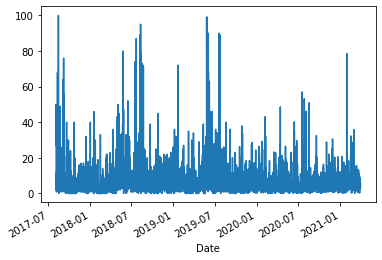

In [ ]:
df1_w[aa].plot()

In [ ]:
df1_w.columns

Index(['PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score'],
      dtype='object')

In [ ]:
# df1_w.drop(columns = ['Std. Dev. of Wind Direction',
#        'Std. Dev. of Wind Speed'], inplace = True)
# df1_w.drop(columns = ['Incoming Solar Rad. (W/m2)', 'Precip. (mm)'], inplace = True)

In [ ]:
# best_params = {'alpha': 31.556175406841003,
#  'booster': 'gbtree',
#  'eta': 0.29167697154057376,
#  'gamma': 0.18906207376024659,
#  'grow_policy': 'lossguide',
#  'lambda': 25.921910753612906,
#  'max_depth': 5,
#  'score': 15.064180111411144} #number=601, values=[4.755448973684473]]   < 5

# best_params = {'alpha': 18.462027058221132,
#  'booster': 'gbtree',
#  'eta': 0.36669733790910475,
#  'gamma': 1.522615247611338,
#  'grow_policy': 'lossguide',
#  'lambda': 16.740373264015176,
#  'max_depth': 8,
#  'score': 15.477650895351523}  #(number=245, values=[18.568138995465333]

# best_params= study2.best_params
score = best_params ['score']
booster = best_params['booster']
lambdaa =best_params['lambda']
alpha = best_params['alpha']
# n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']

eta = best_params['eta']
gamma=best_params['gamma']
grow_policy= best_params['grow_policy']
#sample_type=study.best_params['sample_type']
#normalize_type= study.best_params['normalize_type']
#rate_drop=study.best_params['rate_drop']
#skip_drop=study.best_params['skip_drop']
        
df1_w_c=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_c.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_BuffaloViewpoint_PM2.5_OT_Dataset.csv')
df1_w_c.drop(columns = ['score'], inplace = True)
print(len(df1_w_c)/len(df1_w))
# df1_w_c = df_xg
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)


0.9496711279819365


In [ ]:
 df1_w

PM2.5 Mass (ug/m3)  RH %  ...      trend      score
Date                                           ...                      
2017-08-04 07:00:00                27.0  92.0  ...  17.588229   8.947872
2017-08-04 08:00:00                28.0  87.0  ...  17.588342  12.062423
2017-08-04 09:00:00                31.0  81.0  ...  17.588456   7.265785
2017-08-04 10:00:00                39.0  78.0  ...  17.588570   5.283310
2017-08-04 11:00:00                50.0  75.0  ...  17.588684  15.643602
...                                 ...   ...  ...        ...        ...
2021-03-31 19:00:00                 5.9  51.5  ...  21.245332   2.551347
2021-03-31 20:00:00                 4.3  53.6  ...  21.245446   2.593244
2021-03-31 21:00:00                 4.2  45.6  ...  21.245560   4.394658
2021-03-31 22:00:00                 4.0  43.5  ...  21.245674   3.260428
2021-03-31 23:00:00                 4.3  46.1  ...  21.245788   5.822751

[30559 rows x 16 columns]

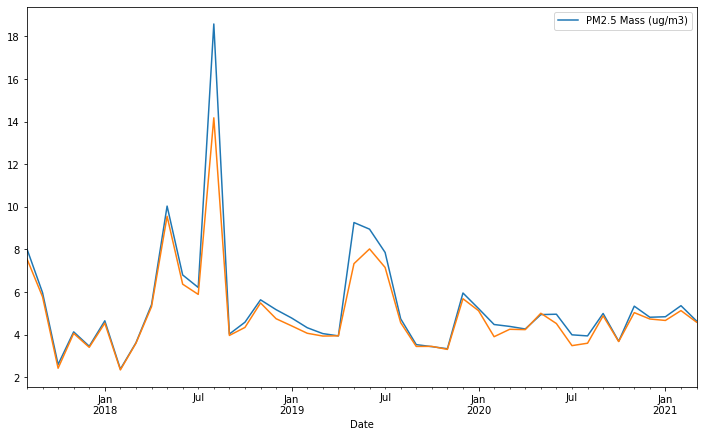

In [ ]:
A = 'M'
df1_w[aa].resample(A).mean().plot(legend = True,figsize = (12,7))
df1_w_c[aa].resample(A).mean().plot()


In [ ]:
print(len(df1_w_c)*100/len(df1_w))

94.96711279819365


[0]	validation_0-rmse:6.80842
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:6.53971
[2]	validation_0-rmse:6.31395
[3]	validation_0-rmse:6.12239
[4]	validation_0-rmse:5.9584
[5]	validation_0-rmse:5.82364
[6]	validation_0-rmse:5.70755
[7]	validation_0-rmse:5.61257
[8]	validation_0-rmse:5.53139
[9]	validation_0-rmse:5.46497
[10]	validation_0-rmse:5.40329
[11]	validation_0-rmse:5.35063
[12]	validation_0-rmse:5.30953
[13]	validation_0-rmse:5.27421
[14]	validation_0-rmse:5.24053
[15]	validation_0-rmse:5.21637
[16]	validation_0-rmse:5.19132
[17]	validation_0-rmse:5.17738
[18]	validation_0-rmse:5.15861
[19]	validation_0-rmse:5.14504
[20]	validation_0-rmse:5.13691
[21]	validation_0-rmse:5.12718
[22]	validation_0-rmse:5.11493
[23]	validation_0-rmse:5.10845
[24]	validation_0-rmse:5.09831
[25]	validation_0-rmse:5.09515
[26]	validation_0-rmse:5.09055
[27]	validation_0-rmse:5.08313
[28]	validation_0-rmse:5.07656
[29]	validation_0-rmse:5.07466
[30]	validation_

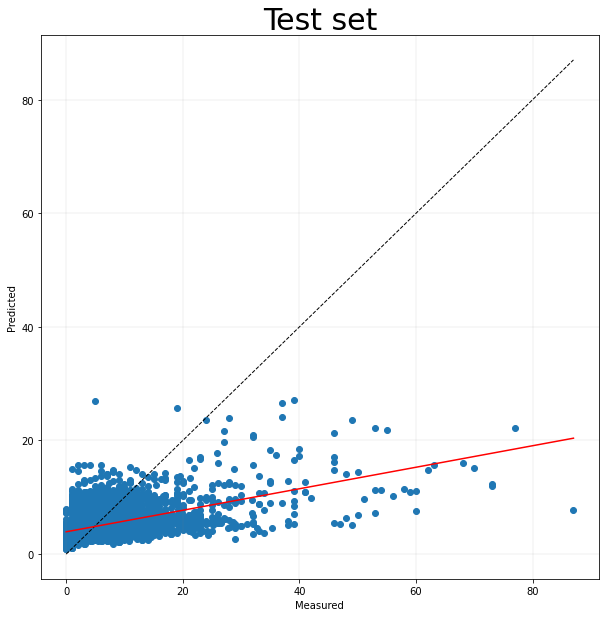

[0.18938768 3.92704719]
RMSE
[4.9529835]
R2
0.2419729849518819


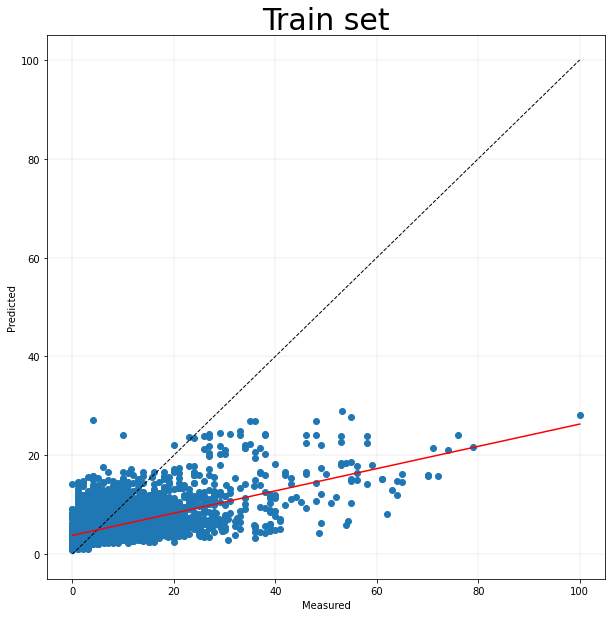

[0.22524617 3.78176445]
RMSE
[4.51978096]
R2
0.2908168927465963


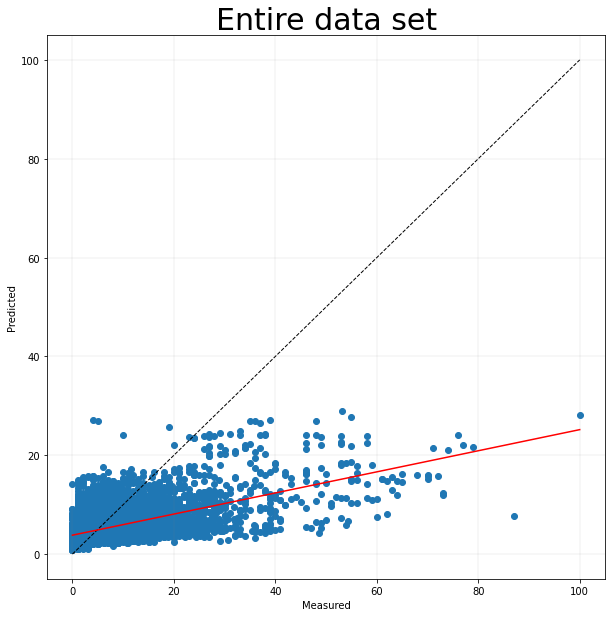

[0.21354767 3.82869746]
RMSE
[4.65398824]
R2
0.27509805960469524


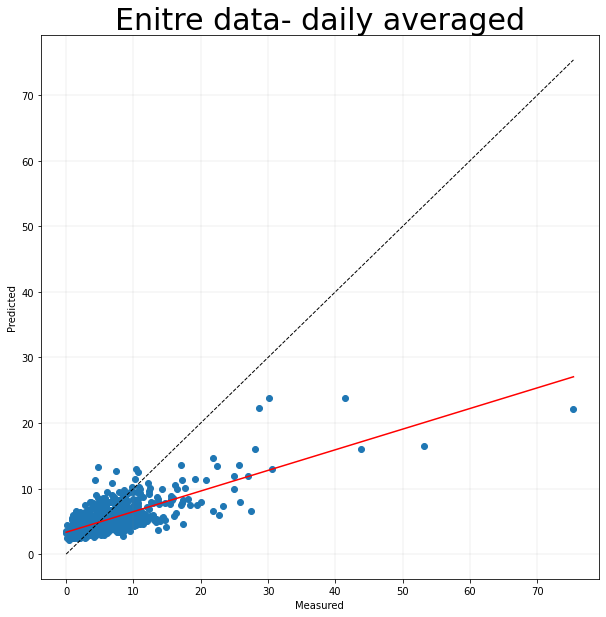

[0.31460768 3.33234675]
RMSE
[3.53543147]
R2
0.44749761275433564


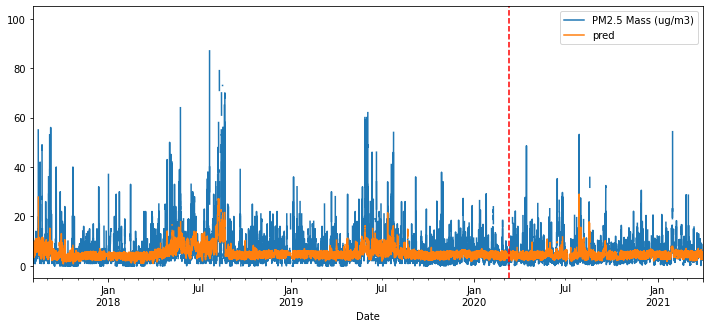

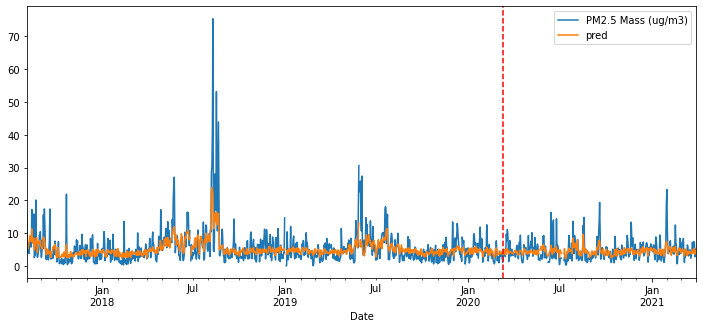

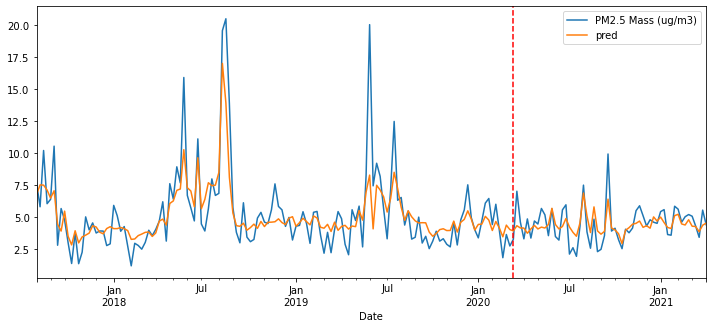

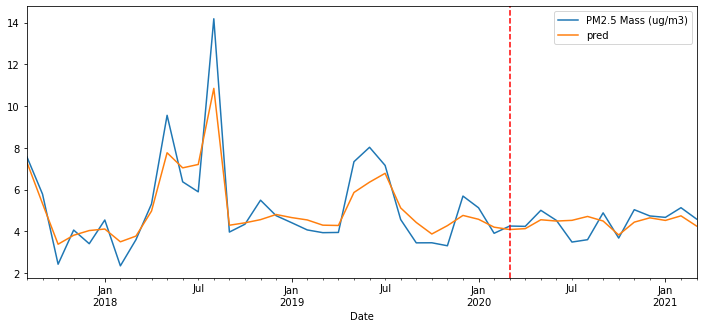

In [ ]:
model= xgb.XGBRegressor(booster = booster, reg_lambda=lambdaa, alpha=alpha,  
                          max_depth = max_depth, eta = eta, gamma = gamma,
                          grow_policy = grow_policy,
                          # n_estimators=n_estimators,
                          objective ='reg:squarederror', 
                          #normalize_type=normalize_type,sample_type=sample_type,rate_drop=rate_drop,skip_drop=skip_drop,
                          random_state=42)

eval_set = [(X_val, y_val)]
model.fit(X_traine, y_traine, early_stopping_rounds=20, eval_metric="rmse", eval_set=eval_set)


preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))


# df3= df3.copy()
df4 = df1_w_c.copy() #hereee
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean().copy()
df10.dropna(inplace= True)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(df10[aa]).reshape(-1,1)
y_pred = np.array(df10['pred']).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Enitre data- daily averaged',fontsize=30)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()
print(par)
print('RMSE')
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))



df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4.columns

Index(['PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = [ 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend']
test_col = [aa]


df1_w_c = df1_w[[aa, 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/BuffaloViewpoint_PM2.5_OT_XG_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/BuffaloViewpoint_PM2.5_OT_XG_Test.csv')


[4.51978096]
0.2908168927465963
[4.9529835]
0.2419729849518819


In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
107
4.674346446990967
2021-01-16 11:00:00
102
4.549983501434326
2021-01-16 12:00:00
101
4.487734794616699
2021-01-16 13:00:00
103
4.558943271636963
2021-01-16 14:00:00
110
4.57755708694458
2021-01-16 15:00:00
112
4.575539588928223
2021-01-16 16:00:00
113
4.626706123352051
2021-01-16 17:00:00
110
4.6408281326293945
2021-01-16 18:00:00
108
4.554324150085449
2021-01-16 19:00:00
108
4.524415493011475
2021-01-16 20:00:00
108
4.522052764892578
2021-01-16 21:00:00
109
4.5714545249938965
2021-01-16 22:00:00
113
4.511454105377197
2021-01-16 23:00:00
112
4.529159069061279
2021-01-17 00:00:00
111
4.596539497375488
2021-01-17 01:00:00
113
4.588904857635498
2021-01-17 02:00:00
111
4.62943696975708
2021-01-17 03:00:00
112
4.618924617767334
2021-01-17 04:00:00
108
4.6462860107421875
2021-01-17 05:00:00
111
4.664487361907959
2021-01-17 06:00:00
109
4.628352642059326
2021-01-17 07:00:00
108
4.6156744956970215
2021-01-17 08:00:00
113
4.697155952453613
2

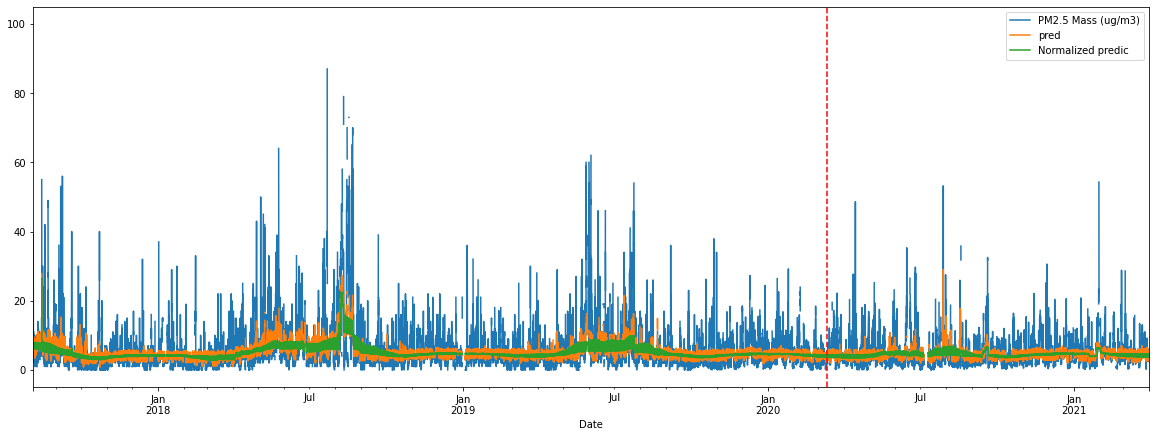

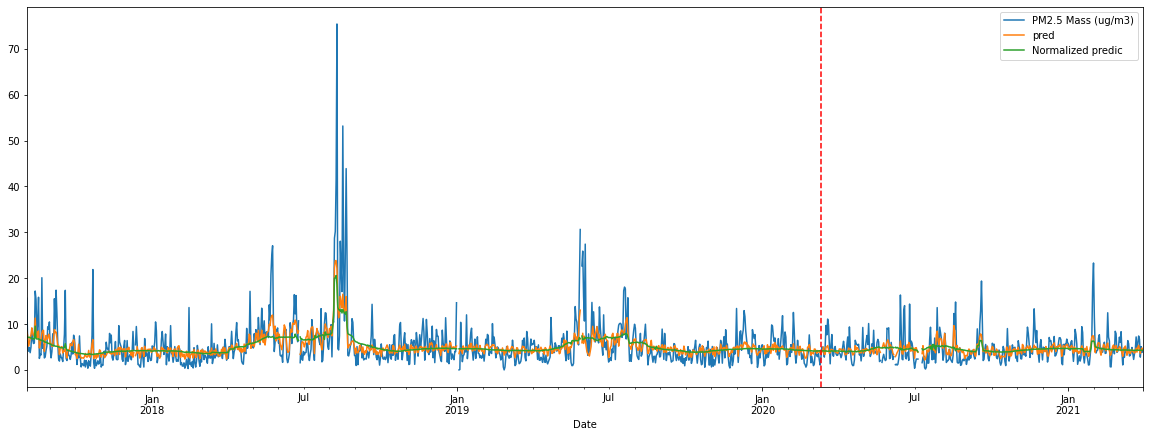

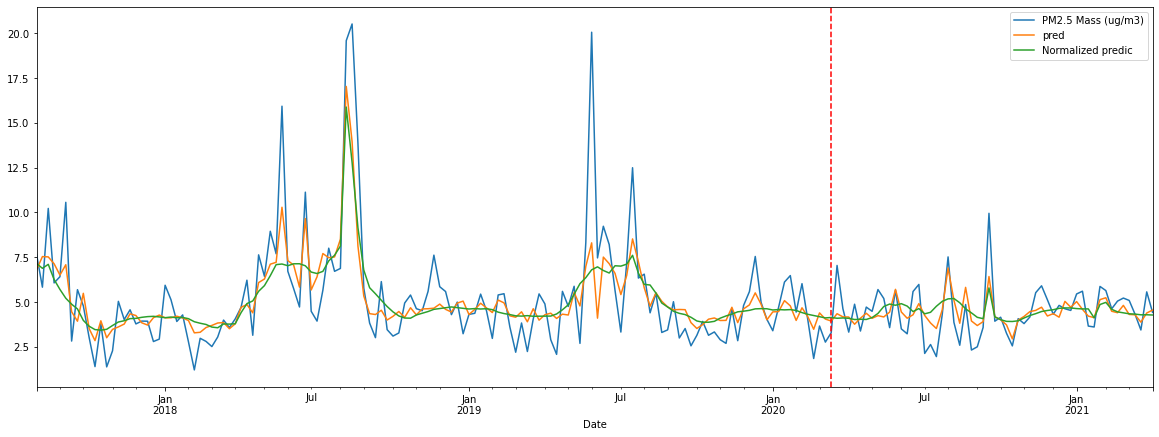

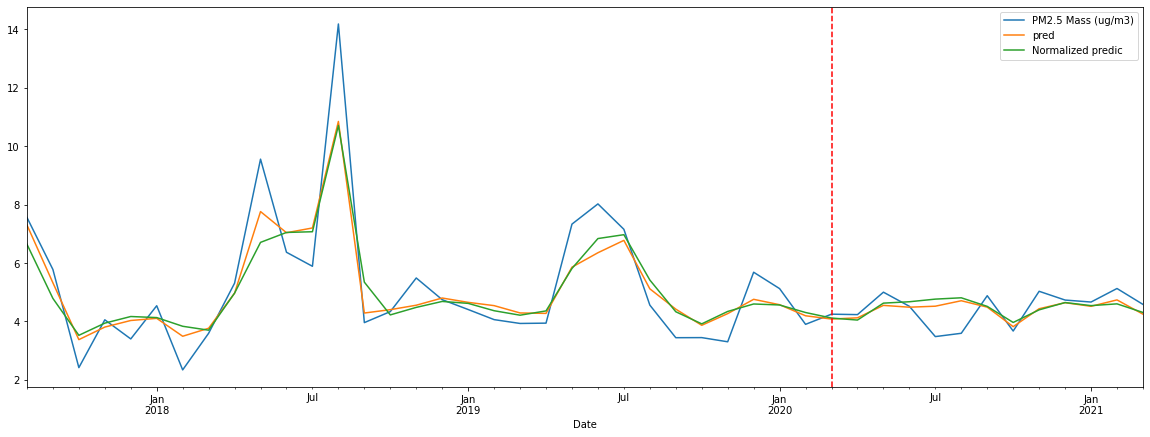

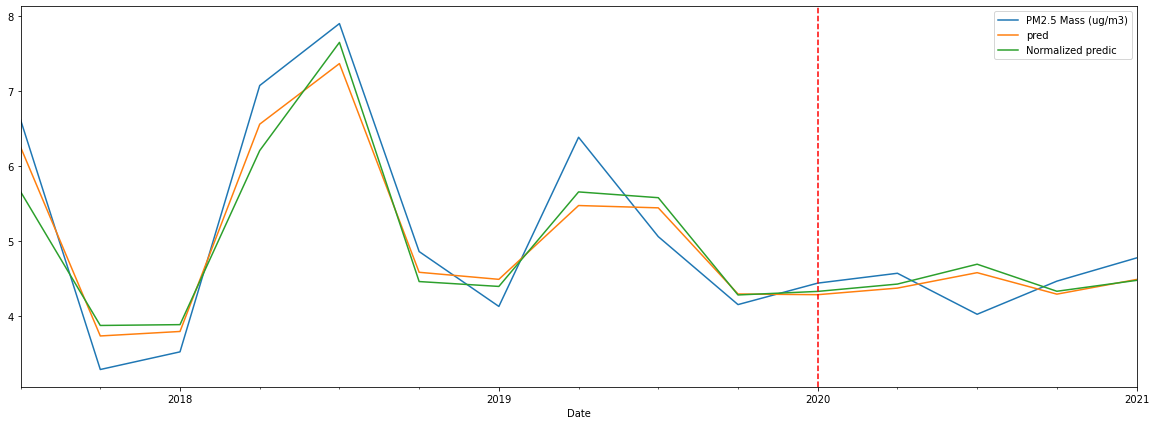

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()
df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_BuffaloViewpoint_PM2.5_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_BuffaloViewpoint_PM2.5_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_BuffaloViewpoint_PM2.5_Monthly_normalized_pred.csv')

for i in ['H','D','W','M','Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

In [ ]:
############

In [ ]:
maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

avg = df1_w['score'].mean()
std = df1_w['score'].std()

print(avg,std)

5.979470851901134 4.6067113432885725


In [ ]:
df1_w

PM2.5 Mass (ug/m3)  RH %  ...      trend      score
Date                                           ...                      
2017-08-04 07:00:00                27.0  92.0  ...  17.588229   8.947872
2017-08-04 08:00:00                28.0  87.0  ...  17.588342  12.062423
2017-08-04 09:00:00                31.0  81.0  ...  17.588456   7.265785
2017-08-04 10:00:00                39.0  78.0  ...  17.588570   5.283310
2017-08-04 11:00:00                50.0  75.0  ...  17.588684  15.643602
...                                 ...   ...  ...        ...        ...
2021-03-31 19:00:00                 5.9  51.5  ...  21.245332   2.551347
2021-03-31 20:00:00                 4.3  53.6  ...  21.245446   2.593244
2021-03-31 21:00:00                 4.2  45.6  ...  21.245560   4.394658
2021-03-31 22:00:00                 4.0  43.5  ...  21.245674   3.260428
2021-03-31 23:00:00                 4.3  46.1  ...  21.245788   5.822751

[30559 rows x 16 columns]

In [ ]:
df1_w

PM2.5 Mass (ug/m3)  RH %  ...      trend      score
Date                                           ...                      
2017-08-04 07:00:00                27.0  92.0  ...  17.588229   8.947872
2017-08-04 08:00:00                28.0  87.0  ...  17.588342  12.062423
2017-08-04 09:00:00                31.0  81.0  ...  17.588456   7.265785
2017-08-04 10:00:00                39.0  78.0  ...  17.588570   5.283310
2017-08-04 11:00:00                50.0  75.0  ...  17.588684  15.643602
...                                 ...   ...  ...        ...        ...
2021-03-31 19:00:00                 5.9  51.5  ...  21.245332   2.551347
2021-03-31 20:00:00                 4.3  53.6  ...  21.245446   2.593244
2021-03-31 21:00:00                 4.2  45.6  ...  21.245560   4.394658
2021-03-31 22:00:00                 4.0  43.5  ...  21.245674   3.260428
2021-03-31 23:00:00                 4.3  46.1  ...  21.245788   5.822751

[30559 rows x 16 columns]

In [ ]:
class Objective(object):
    def __init__(self,df1_w, max_epochs, learn_rate_epochs,
                  ):
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y_scaler, test_size=0.001, random_state=42)
        # self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.11, random_state=42)
        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.df1_w = df1_w.copy()
        self.n_features = len(self.df1_w.columns)-1

    def __call__(self, trial):        
        dict_params = {
                        "score" : trial.suggest_float( 'score', avg + 2*std, avg + 5 * std ),
                        'layers': trial.suggest_int('layers', 2,3),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                        'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,5000,500)),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 20,40),
                        'delta': trial.suggest_float(  'delta',1, 100),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                       'drop_out1': trial.suggest_float('drop_out1',0.05, 0.3)}  
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 20,40)
        dict_params['drop_out2'] =trial.suggest_float('drop_out2',0.05, 0.5)

        if dict_params['layers'] == 3:
            dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes3', 5,40)
            dict_params['drop_out3'] = trial.suggest_float('drop_out3',0.05, 0.5)

        self.df_nn =  self.df1_w[self.df1_w['score'] <  dict_params["score"]].copy()
        self.df_nn.drop(columns = ['score'], inplace = True)
        self.Y =   self.df_nn[aa]
        self.Y = np.array(self.Y).reshape(-1,1)
        self.X = np.array( self.df_nn[  self.df_nn.columns[1:]])
        self.X_train =self.X
        self.y_train =self.Y
        # self.X_train,  self.X_test,  self.y_train, self.y_test = train_test_split( self.X,   self.Y, test_size=0.000000001, random_state = 42)

          
        model = Sequential()
        model.add(BatchNormalization())
        model.add(Dense(dict_params['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha= dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out1']))
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        model.add(Dense(dict_params['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out2']))
        if dict_params['layers'] == 3 :
            model.add(Dense(dict_params['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
            model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
            model.add(Dropout(dict_params['drop_out3']))
        model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params[ 'learning_rate'])
        model.compile(loss=
                      # 'mse',
                      tf.keras.losses.Huber( delta=dict_params[ 'delta']),
                      # 'mse'
                          optimizer=opt)
        fn = "gdrive/My Drive/Colab Notebooks/Stations/Buffalo Viewpoint_outlier_2015_PM2.5" +str(trial.number) + ".ckpt" 
        fnn = os.path.dirname(fn)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 4
        kf = KFold(n_splits=n_f )
        acc = 0 
        for train_index, test_index in kf.split( self.X_train):   
                X_tr, X_tes =  self.X_train[train_index],  self.X_train[test_index]
                y_tr, y_tes =   self.y_train[train_index],   self.y_train[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
                h = model.fit(x=X_tra, y=y_tra,
                                  validation_data=(X_val, y_val),
                                  batch_size=dict_params['batchsize'],
                                  epochs=self.max_epochs,
                                  shuffle=True, verbose=0,
                                  callbacks=callbacks_list)
                model.load_weights(fn)
                preds = model.predict(X_tes)
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 

        print(acc)
        return acc    

In [ ]:
objective = Objective(df1_w,maximum_epochs,learning_rate_epochs)
study = optuna.create_study(direction=optimizer_direction, study_name='BuffaloViewpoint_outlier_PM2.5__NN', storage='sqlite:///Buffalo Viewpoint_PM2.5__NN.db',
                            load_if_exists=True)
study.optimize(objective, n_trials=500)
df_results = study.trials_dataframe()
df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NN_OT_BuffaloViewpoint_PM2.5_HUBer.csv')
#df_results.to_pickle('Desktop\heel\df_optuna_results.pkl')

[I 2021-05-20 04:22:03,772] Using an existing study with name 'BuffaloViewpoint_outlier_PM2.5__NN' instead of creating a new one.
[I 2021-05-20 04:22:54,142] Trial 1 finished with value: 35.16794477800277 and parameters: {'score': 17.317738182913697, 'layers': 2, 'alpha': 0.4210104144327346, 'batchsize': 4600.0, 'num_dense_nodes1': 31, 'delta': 93.25290453198325, 'learning_rate': 0.05288867500914142, 'drop_out1': 0.16264559100890413, 'num_dense_nodes2': 32, 'drop_out2': 0.2363690287256469}. Best is trial 1 with value: 35.16794477800277.


35.16794477800277


[I 2021-05-20 04:23:58,436] Trial 2 finished with value: 38.35565356054966 and parameters: {'score': 24.288507197922186, 'layers': 3, 'alpha': 0.6566728775427229, 'batchsize': 1600.0, 'num_dense_nodes1': 36, 'delta': 45.74494818771909, 'learning_rate': 0.04511747623778159, 'drop_out1': 0.08491322824662313, 'num_dense_nodes2': 33, 'drop_out2': 0.38328538921268845, 'num_dense_nodes3': 33, 'drop_out3': 0.2432696524356729}. Best is trial 1 with value: 35.16794477800277.


38.35565356054966


[I 2021-05-20 04:24:52,106] Trial 3 finished with value: 35.13378873624355 and parameters: {'score': 21.655114141316936, 'layers': 3, 'alpha': 0.792575569540883, 'batchsize': 2600.0, 'num_dense_nodes1': 36, 'delta': 69.88194624885591, 'learning_rate': 0.05723503848344405, 'drop_out1': 0.12679685824623926, 'num_dense_nodes2': 26, 'drop_out2': 0.13405956021307816, 'num_dense_nodes3': 37, 'drop_out3': 0.18159301052482407}. Best is trial 3 with value: 35.13378873624355.


35.13378873624355


[I 2021-05-20 04:25:46,977] Trial 4 finished with value: 35.17607202951515 and parameters: {'score': 20.45720646317448, 'layers': 2, 'alpha': 0.3787757439029819, 'batchsize': 2600.0, 'num_dense_nodes1': 36, 'delta': 77.76878570971304, 'learning_rate': 0.02510704830177785, 'drop_out1': 0.2949574093323155, 'num_dense_nodes2': 23, 'drop_out2': 0.499866126475796}. Best is trial 3 with value: 35.13378873624355.


35.17607202951515


[I 2021-05-20 04:31:38,541] Trial 5 finished with value: 50.04902476781207 and parameters: {'score': 23.344211194684526, 'layers': 3, 'alpha': 0.13752116065663306, 'batchsize': 100.0, 'num_dense_nodes1': 30, 'delta': 73.66985293470823, 'learning_rate': 0.04325905572450807, 'drop_out1': 0.2484569909498573, 'num_dense_nodes2': 33, 'drop_out2': 0.25328098551828787, 'num_dense_nodes3': 31, 'drop_out3': 0.41431081427271327}. Best is trial 3 with value: 35.13378873624355.


50.04902476781207


[I 2021-05-20 04:32:37,640] Trial 6 finished with value: 38.04725217320424 and parameters: {'score': 25.60584169836914, 'layers': 2, 'alpha': 0.778296424027901, 'batchsize': 2100.0, 'num_dense_nodes1': 29, 'delta': 42.30936438534456, 'learning_rate': 0.05927336121792628, 'drop_out1': 0.09496214335510565, 'num_dense_nodes2': 27, 'drop_out2': 0.3736025627619738}. Best is trial 3 with value: 35.13378873624355.


38.04725217320424


[I 2021-05-20 04:34:10,077] Trial 7 finished with value: 40.188132336772654 and parameters: {'score': 27.664843526664928, 'layers': 2, 'alpha': 0.8299083589112352, 'batchsize': 600.0, 'num_dense_nodes1': 22, 'delta': 4.2071050328135104, 'learning_rate': 0.06619046559007168, 'drop_out1': 0.13340806996706456, 'num_dense_nodes2': 28, 'drop_out2': 0.46576723754514454}. Best is trial 3 with value: 35.13378873624355.


40.188132336772654


[I 2021-05-20 04:35:02,862] Trial 8 finished with value: 34.796719316085635 and parameters: {'score': 16.161431450368024, 'layers': 2, 'alpha': 0.3212005704740536, 'batchsize': 4100.0, 'num_dense_nodes1': 22, 'delta': 32.894402387182716, 'learning_rate': 0.06973633801755273, 'drop_out1': 0.22081852761510484, 'num_dense_nodes2': 34, 'drop_out2': 0.06487919986524976}. Best is trial 8 with value: 34.796719316085635.


34.796719316085635


[I 2021-05-20 04:35:56,703] Trial 9 finished with value: 31.87885803072362 and parameters: {'score': 16.33112175406477, 'layers': 2, 'alpha': 0.6653841154575771, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 84.62296805803835, 'learning_rate': 0.07857732610385317, 'drop_out1': 0.2578799158337789, 'num_dense_nodes2': 37, 'drop_out2': 0.3064027974516886}. Best is trial 9 with value: 31.87885803072362.


31.87885803072362


[I 2021-05-20 04:36:51,357] Trial 10 finished with value: 33.17437675599468 and parameters: {'score': 17.601082523573268, 'layers': 2, 'alpha': 0.321462204326286, 'batchsize': 2600.0, 'num_dense_nodes1': 40, 'delta': 63.00718425736976, 'learning_rate': 0.09997177166314311, 'drop_out1': 0.12694732123980518, 'num_dense_nodes2': 26, 'drop_out2': 0.27472502121070697}. Best is trial 9 with value: 31.87885803072362.


33.17437675599468


[I 2021-05-20 04:37:42,444] Trial 11 finished with value: 31.836721963394464 and parameters: {'score': 19.729115598702656, 'layers': 3, 'alpha': 0.6048991402588324, 'batchsize': 3600.0, 'num_dense_nodes1': 26, 'delta': 15.558458574363165, 'learning_rate': 0.0959026830760674, 'drop_out1': 0.2993806052698638, 'num_dense_nodes2': 39, 'drop_out2': 0.1632546585217643, 'num_dense_nodes3': 6, 'drop_out3': 0.4876212439094463}. Best is trial 11 with value: 31.836721963394464.


31.836721963394464


[I 2021-05-20 04:38:33,585] Trial 12 finished with value: 31.936371417379696 and parameters: {'score': 19.718152536509464, 'layers': 3, 'alpha': 0.61062274222655, 'batchsize': 3600.0, 'num_dense_nodes1': 26, 'delta': 15.752985755034445, 'learning_rate': 0.09989519615446624, 'drop_out1': 0.298186139934983, 'num_dense_nodes2': 40, 'drop_out2': 0.16497643098671352, 'num_dense_nodes3': 5, 'drop_out3': 0.49953790489366134}. Best is trial 11 with value: 31.836721963394464.


31.936371417379696


[I 2021-05-20 04:39:24,313] Trial 13 finished with value: 29.66816475218585 and parameters: {'score': 15.255857872720457, 'layers': 3, 'alpha': 0.5900042777900592, 'batchsize': 3600.0, 'num_dense_nodes1': 26, 'delta': 20.630573569472226, 'learning_rate': 0.08446845138729704, 'drop_out1': 0.24799474542473293, 'num_dense_nodes2': 40, 'drop_out2': 0.34626687358026786, 'num_dense_nodes3': 5, 'drop_out3': 0.39504520376472396}. Best is trial 13 with value: 29.66816475218585.


29.66816475218585


[I 2021-05-20 04:40:14,961] Trial 14 finished with value: 32.184915936697124 and parameters: {'score': 19.120680968531108, 'layers': 3, 'alpha': 0.5433536329945851, 'batchsize': 3600.0, 'num_dense_nodes1': 25, 'delta': 20.158758146970506, 'learning_rate': 0.08640403777387122, 'drop_out1': 0.2103233333923209, 'num_dense_nodes2': 40, 'drop_out2': 0.18044027046738279, 'num_dense_nodes3': 5, 'drop_out3': 0.39657488185576795}. Best is trial 13 with value: 29.66816475218585.


32.184915936697124


[I 2021-05-20 04:41:05,576] Trial 15 finished with value: 29.64375964854277 and parameters: {'score': 15.214566090468878, 'layers': 3, 'alpha': 0.5165519411342242, 'batchsize': 3600.0, 'num_dense_nodes1': 26, 'delta': 1.40458212166903, 'learning_rate': 0.08902199808246178, 'drop_out1': 0.2686867259083346, 'num_dense_nodes2': 37, 'drop_out2': 0.060446474272352, 'num_dense_nodes3': 15, 'drop_out3': 0.4054648238643875}. Best is trial 15 with value: 29.64375964854277.


29.64375964854277


[I 2021-05-20 04:41:55,790] Trial 16 finished with value: 30.241009672804186 and parameters: {'score': 15.239738553998015, 'layers': 3, 'alpha': 0.1612212035606807, 'batchsize': 4600.0, 'num_dense_nodes1': 24, 'delta': 1.4192932241277276, 'learning_rate': 0.08503899814917064, 'drop_out1': 0.261255696116614, 'num_dense_nodes2': 37, 'drop_out2': 0.3641911380075559, 'num_dense_nodes3': 16, 'drop_out3': 0.3463035825150818}. Best is trial 15 with value: 29.64375964854277.


30.241009672804186


[I 2021-05-20 04:42:50,028] Trial 17 finished with value: 32.799019734537765 and parameters: {'score': 15.91257945325585, 'layers': 3, 'alpha': 0.4976070799830726, 'batchsize': 4100.0, 'num_dense_nodes1': 20, 'delta': 31.59545204125472, 'learning_rate': 0.010525305948139566, 'drop_out1': 0.21109679107659832, 'num_dense_nodes2': 37, 'drop_out2': 0.055168517883131915, 'num_dense_nodes3': 17, 'drop_out3': 0.05102187156613358}. Best is trial 15 with value: 29.64375964854277.


32.799019734537765


[I 2021-05-20 04:43:41,938] Trial 18 finished with value: 34.97513601165499 and parameters: {'score': 17.858593699081116, 'layers': 3, 'alpha': 0.8904251708259121, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 2.1694248557327884, 'learning_rate': 0.08017622165750868, 'drop_out1': 0.27722066612784957, 'num_dense_nodes2': 20, 'drop_out2': 0.4330745958887691, 'num_dense_nodes3': 13, 'drop_out3': 0.3225192333554434}. Best is trial 15 with value: 29.64375964854277.


34.97513601165499


[I 2021-05-20 04:44:44,412] Trial 19 finished with value: 44.22682170550084 and parameters: {'score': 15.244017750378836, 'layers': 3, 'alpha': 0.013035589522846391, 'batchsize': 1600.0, 'num_dense_nodes1': 33, 'delta': 24.690861027335767, 'learning_rate': 0.09319799300831932, 'drop_out1': 0.2266998386100225, 'num_dense_nodes2': 35, 'drop_out2': 0.3231187069505398, 'num_dense_nodes3': 24, 'drop_out3': 0.43692462238151936}. Best is trial 15 with value: 29.64375964854277.


44.22682170550084


[I 2021-05-20 04:45:35,073] Trial 20 finished with value: 36.93716043350358 and parameters: {'score': 28.392028719599864, 'layers': 3, 'alpha': 0.7281936364303422, 'batchsize': 4100.0, 'num_dense_nodes1': 20, 'delta': 11.91542838605585, 'learning_rate': 0.07151178128698922, 'drop_out1': 0.189061854249056, 'num_dense_nodes2': 31, 'drop_out2': 0.11040018795373902, 'num_dense_nodes3': 10, 'drop_out3': 0.27130940948712995}. Best is trial 15 with value: 29.64375964854277.


36.93716043350358


[I 2021-05-20 04:46:28,189] Trial 21 finished with value: 36.83848164255879 and parameters: {'score': 18.431138411648988, 'layers': 3, 'alpha': 0.5015238861438926, 'batchsize': 3100.0, 'num_dense_nodes1': 23, 'delta': 59.775655444690294, 'learning_rate': 0.03477389767148789, 'drop_out1': 0.05115043733290278, 'num_dense_nodes2': 38, 'drop_out2': 0.21262830146428133, 'num_dense_nodes3': 22, 'drop_out3': 0.34380188957468427}. Best is trial 15 with value: 29.64375964854277.


36.83848164255879


[I 2021-05-20 04:47:18,044] Trial 22 finished with value: 30.495178035611836 and parameters: {'score': 15.431959523597724, 'layers': 3, 'alpha': 0.20487549368045643, 'batchsize': 4600.0, 'num_dense_nodes1': 24, 'delta': 1.3231095391323358, 'learning_rate': 0.08569182934822345, 'drop_out1': 0.2600999680346379, 'num_dense_nodes2': 36, 'drop_out2': 0.3844544605816657, 'num_dense_nodes3': 18, 'drop_out3': 0.3682136975740482}. Best is trial 15 with value: 29.64375964854277.


30.495178035611836


[I 2021-05-20 04:48:08,010] Trial 23 finished with value: 32.77005579390746 and parameters: {'score': 16.8493902020538, 'layers': 3, 'alpha': 0.22199697185033684, 'batchsize': 4600.0, 'num_dense_nodes1': 27, 'delta': 7.699146427569026, 'learning_rate': 0.08793053476836322, 'drop_out1': 0.27322478872106093, 'num_dense_nodes2': 40, 'drop_out2': 0.3356387925140852, 'num_dense_nodes3': 12, 'drop_out3': 0.45572205015069617}. Best is trial 15 with value: 29.64375964854277.


32.77005579390746


[I 2021-05-20 04:48:59,631] Trial 24 finished with value: 30.27767074748048 and parameters: {'score': 15.239384694021018, 'layers': 3, 'alpha': 0.5594344332578697, 'batchsize': 4100.0, 'num_dense_nodes1': 24, 'delta': 27.927142563127408, 'learning_rate': 0.07751974265776518, 'drop_out1': 0.23862072000478013, 'num_dense_nodes2': 38, 'drop_out2': 0.4352796302411265, 'num_dense_nodes3': 17, 'drop_out3': 0.32112524361491734}. Best is trial 15 with value: 29.64375964854277.


30.27767074748048


[I 2021-05-20 04:49:52,414] Trial 25 finished with value: 50.88393326374047 and parameters: {'score': 15.519893224088577, 'layers': 3, 'alpha': 0.05617577732183221, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 3.2663187935176836, 'learning_rate': 0.0908101336291072, 'drop_out1': 0.28110464728290796, 'num_dense_nodes2': 35, 'drop_out2': 0.34721917812670683, 'num_dense_nodes3': 25, 'drop_out3': 0.37528529256121723}. Best is trial 15 with value: 29.64375964854277.


50.88393326374047


[I 2021-05-20 04:50:43,933] Trial 26 finished with value: 37.77750644208842 and parameters: {'score': 21.37181561281707, 'layers': 3, 'alpha': 0.42528995027658784, 'batchsize': 3600.0, 'num_dense_nodes1': 21, 'delta': 37.74756381946237, 'learning_rate': 0.0642583644446823, 'drop_out1': 0.18898085602622805, 'num_dense_nodes2': 38, 'drop_out2': 0.4246596310970511, 'num_dense_nodes3': 10, 'drop_out3': 0.29733769269076793}. Best is trial 15 with value: 29.64375964854277.


37.77750644208842


[I 2021-05-20 04:51:33,955] Trial 27 finished with value: 32.32164461425314 and parameters: {'score': 18.368185204021103, 'layers': 3, 'alpha': 0.3347329860537826, 'batchsize': 4600.0, 'num_dense_nodes1': 25, 'delta': 11.362310425547868, 'learning_rate': 0.0776599663970565, 'drop_out1': 0.24058556143674528, 'num_dense_nodes2': 36, 'drop_out2': 0.300223405145571, 'num_dense_nodes3': 15, 'drop_out3': 0.21618729905503078}. Best is trial 15 with value: 29.64375964854277.


32.32164461425314


[I 2021-05-20 04:52:25,222] Trial 28 finished with value: 31.698491043525898 and parameters: {'score': 17.01281427828104, 'layers': 3, 'alpha': 0.7033043805387293, 'batchsize': 4100.0, 'num_dense_nodes1': 32, 'delta': 21.07186548601414, 'learning_rate': 0.09956857572453338, 'drop_out1': 0.2651181465314284, 'num_dense_nodes2': 30, 'drop_out2': 0.36115056226493125, 'num_dense_nodes3': 20, 'drop_out3': 0.44303463973621526}. Best is trial 15 with value: 29.64375964854277.


31.698491043525898


[I 2021-05-20 04:53:18,072] Trial 29 finished with value: 32.0354532839448 and parameters: {'score': 15.341020506690882, 'layers': 3, 'alpha': 0.47265385040447694, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 53.36618060846638, 'learning_rate': 0.08248758165358355, 'drop_out1': 0.2865474680248293, 'num_dense_nodes2': 40, 'drop_out2': 0.41426766437696694, 'num_dense_nodes3': 8, 'drop_out3': 0.3835393588272328}. Best is trial 15 with value: 29.64375964854277.


32.0354532839448


[I 2021-05-20 04:54:08,382] Trial 30 finished with value: 31.595678011114686 and parameters: {'score': 16.785781718488423, 'layers': 3, 'alpha': 0.22087615125119847, 'batchsize': 4600.0, 'num_dense_nodes1': 23, 'delta': 1.3525382644025328, 'learning_rate': 0.09315697535206272, 'drop_out1': 0.15313444671875615, 'num_dense_nodes2': 35, 'drop_out2': 0.24313129775966097, 'num_dense_nodes3': 27, 'drop_out3': 0.4716810449143277}. Best is trial 15 with value: 29.64375964854277.


31.595678011114686


[I 2021-05-20 04:54:59,288] Trial 31 finished with value: 39.863528787146215 and parameters: {'score': 17.401945348368166, 'layers': 3, 'alpha': 0.3796195233439161, 'batchsize': 3600.0, 'num_dense_nodes1': 25, 'delta': 97.19264314553428, 'learning_rate': 0.0712659653196621, 'drop_out1': 0.19449486753695733, 'num_dense_nodes2': 32, 'drop_out2': 0.4989698443338755, 'num_dense_nodes3': 14, 'drop_out3': 0.34384517928696434}. Best is trial 15 with value: 29.64375964854277.


39.863528787146215


[I 2021-05-20 04:55:49,768] Trial 32 finished with value: 30.81327147055594 and parameters: {'score': 15.398237542453968, 'layers': 3, 'alpha': 0.5648826974671594, 'batchsize': 4100.0, 'num_dense_nodes1': 24, 'delta': 26.839005495547053, 'learning_rate': 0.0757776646187956, 'drop_out1': 0.23728614075181917, 'num_dense_nodes2': 38, 'drop_out2': 0.44893710004130166, 'num_dense_nodes3': 16, 'drop_out3': 0.31345198449280487}. Best is trial 15 with value: 29.64375964854277.


30.81327147055594


[I 2021-05-20 04:56:38,914] Trial 33 finished with value: 30.126477937300606 and parameters: {'score': 15.22365757995051, 'layers': 3, 'alpha': 0.5848542120158093, 'batchsize': 4600.0, 'num_dense_nodes1': 23, 'delta': 27.62032515005048, 'learning_rate': 0.08359598450337564, 'drop_out1': 0.24868487102340897, 'num_dense_nodes2': 39, 'drop_out2': 0.39550950795589124, 'num_dense_nodes3': 19, 'drop_out3': 0.4141709503613715}. Best is trial 15 with value: 29.64375964854277.


30.126477937300606


[I 2021-05-20 04:57:29,097] Trial 34 finished with value: 31.745318961122962 and parameters: {'score': 16.34834091203947, 'layers': 3, 'alpha': 0.620942489644884, 'batchsize': 4600.0, 'num_dense_nodes1': 22, 'delta': 49.503213747649106, 'learning_rate': 0.051407399502415504, 'drop_out1': 0.251673112025689, 'num_dense_nodes2': 39, 'drop_out2': 0.4010839048198596, 'num_dense_nodes3': 20, 'drop_out3': 0.42109522265334653}. Best is trial 15 with value: 29.64375964854277.


31.745318961122962


[I 2021-05-20 04:58:26,412] Trial 35 finished with value: 29.80178982295072 and parameters: {'score': 15.20765488116263, 'layers': 3, 'alpha': 0.4456002848367669, 'batchsize': 2100.0, 'num_dense_nodes1': 27, 'delta': 10.17539468717682, 'learning_rate': 0.08497014724084015, 'drop_out1': 0.26817341617824103, 'num_dense_nodes2': 37, 'drop_out2': 0.3954354330209509, 'num_dense_nodes3': 20, 'drop_out3': 0.35666150757527865}. Best is trial 15 with value: 29.64375964854277.


29.80178982295072


[I 2021-05-20 04:59:29,198] Trial 36 finished with value: 35.34692022441904 and parameters: {'score': 22.88458626440344, 'layers': 3, 'alpha': 0.4478909443523678, 'batchsize': 1600.0, 'num_dense_nodes1': 28, 'delta': 19.801861642325417, 'learning_rate': 0.05790024069089109, 'drop_out1': 0.22843877824216882, 'num_dense_nodes2': 33, 'drop_out2': 0.4011158442093553, 'num_dense_nodes3': 21, 'drop_out3': 0.40518038810312457}. Best is trial 15 with value: 29.64375964854277.


35.34692022441904


[I 2021-05-20 05:00:28,137] Trial 37 finished with value: 37.02919689330283 and parameters: {'score': 26.5140756824984, 'layers': 3, 'alpha': 0.5116006043584095, 'batchsize': 2100.0, 'num_dense_nodes1': 26, 'delta': 37.7398759369094, 'learning_rate': 0.09499558507854713, 'drop_out1': 0.2851686056180955, 'num_dense_nodes2': 39, 'drop_out2': 0.47167956307551157, 'num_dense_nodes3': 27, 'drop_out3': 0.3691699912121732}. Best is trial 15 with value: 29.64375964854277.


37.02919689330283


[I 2021-05-20 05:01:40,164] Trial 38 finished with value: 30.81754623434208 and parameters: {'score': 18.226878542857616, 'layers': 3, 'alpha': 0.3858363263212233, 'batchsize': 1100.0, 'num_dense_nodes1': 31, 'delta': 7.592630466946221, 'learning_rate': 0.0634234544938827, 'drop_out1': 0.2999464203990653, 'num_dense_nodes2': 36, 'drop_out2': 0.2849114147308802, 'num_dense_nodes3': 19, 'drop_out3': 0.4348063706584619}. Best is trial 15 with value: 29.64375964854277.


30.81754623434208


[I 2021-05-20 05:02:36,540] Trial 39 finished with value: 30.577000990527893 and parameters: {'score': 16.32567166691502, 'layers': 3, 'alpha': 0.6986941488579772, 'batchsize': 2100.0, 'num_dense_nodes1': 29, 'delta': 12.23015150807782, 'learning_rate': 0.04618033328837414, 'drop_out1': 0.16577229586391046, 'num_dense_nodes2': 23, 'drop_out2': 0.38695720483715595, 'num_dense_nodes3': 30, 'drop_out3': 0.279974896798409}. Best is trial 15 with value: 29.64375964854277.


30.577000990527893


[I 2021-05-20 05:03:48,486] Trial 40 finished with value: 36.30556684589366 and parameters: {'score': 24.233415362797043, 'layers': 3, 'alpha': 0.6450420532175422, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 34.350643922078994, 'learning_rate': 0.07305684307416895, 'drop_out1': 0.2079088511169344, 'num_dense_nodes2': 39, 'drop_out2': 0.31826140197559244, 'num_dense_nodes3': 24, 'drop_out3': 0.4656369871311763}. Best is trial 15 with value: 29.64375964854277.


36.30556684589366


[I 2021-05-20 05:04:42,880] Trial 41 finished with value: 30.772302657332336 and parameters: {'score': 16.044217732269704, 'layers': 2, 'alpha': 0.559479422329807, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 23.937215697369936, 'learning_rate': 0.08766716332449076, 'drop_out1': 0.24632301283466895, 'num_dense_nodes2': 37, 'drop_out2': 0.4601584577267638}. Best is trial 15 with value: 29.64375964854277.


30.772302657332336


[I 2021-05-20 05:05:39,521] Trial 42 finished with value: 32.169313567675395 and parameters: {'score': 17.10965710083195, 'layers': 3, 'alpha': 0.7482456878207807, 'batchsize': 2100.0, 'num_dense_nodes1': 23, 'delta': 7.353222700369474, 'learning_rate': 0.08282469111063973, 'drop_out1': 0.269116537409485, 'num_dense_nodes2': 34, 'drop_out2': 0.348806390665484, 'num_dense_nodes3': 11, 'drop_out3': 0.3464302795030265}. Best is trial 15 with value: 29.64375964854277.


32.169313567675395


[I 2021-05-20 05:06:33,497] Trial 43 finished with value: 39.97481141681405 and parameters: {'score': 15.912172519522656, 'layers': 3, 'alpha': 0.1343693725249166, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 15.55028930362646, 'learning_rate': 0.08422405453521051, 'drop_out1': 0.25404111455597317, 'num_dense_nodes2': 36, 'drop_out2': 0.36723805417376953, 'num_dense_nodes3': 15, 'drop_out3': 0.39386493547395196}. Best is trial 15 with value: 29.64375964854277.


39.97481141681405


[I 2021-05-20 05:07:34,880] Trial 44 finished with value: 31.097992951896043 and parameters: {'score': 15.233558869587304, 'layers': 3, 'alpha': 0.8323251613387029, 'batchsize': 1600.0, 'num_dense_nodes1': 21, 'delta': 8.583128440031308, 'learning_rate': 0.09732276549827162, 'drop_out1': 0.26054597512817596, 'num_dense_nodes2': 37, 'drop_out2': 0.26644106522249883, 'num_dense_nodes3': 22, 'drop_out3': 0.35226258521854314}. Best is trial 15 with value: 29.64375964854277.


31.097992951896043


[I 2021-05-20 05:08:25,771] Trial 45 finished with value: 30.91395714064938 and parameters: {'score': 16.618681637285864, 'layers': 3, 'alpha': 0.5931702555253823, 'batchsize': 4100.0, 'num_dense_nodes1': 26, 'delta': 16.881445249208994, 'learning_rate': 0.08925051519643405, 'drop_out1': 0.2896148095311427, 'num_dense_nodes2': 34, 'drop_out2': 0.37193163963845105, 'num_dense_nodes3': 8, 'drop_out3': 0.40898820572658645}. Best is trial 15 with value: 29.64375964854277.


30.91395714064938


[I 2021-05-20 05:09:21,006] Trial 46 finished with value: 33.09760412835765 and parameters: {'score': 19.02402256019998, 'layers': 3, 'alpha': 0.6702841884378234, 'batchsize': 2600.0, 'num_dense_nodes1': 24, 'delta': 29.6256328441461, 'learning_rate': 0.0679817320474976, 'drop_out1': 0.27386044305244484, 'num_dense_nodes2': 39, 'drop_out2': 0.40296698971059364, 'num_dense_nodes3': 35, 'drop_out3': 0.23673725470064183}. Best is trial 15 with value: 29.64375964854277.


33.09760412835765


[I 2021-05-20 05:10:12,239] Trial 47 finished with value: 33.839455935818584 and parameters: {'score': 17.633639895468146, 'layers': 3, 'alpha': 0.2588706631733736, 'batchsize': 3600.0, 'num_dense_nodes1': 22, 'delta': 3.77636002095916, 'learning_rate': 0.08070671833747882, 'drop_out1': 0.23191748846404642, 'num_dense_nodes2': 37, 'drop_out2': 0.4872160718426161, 'num_dense_nodes3': 18, 'drop_out3': 0.08195772381840374}. Best is trial 15 with value: 29.64375964854277.


33.839455935818584


[I 2021-05-20 05:11:02,248] Trial 48 finished with value: 34.62227920398686 and parameters: {'score': 20.767954442372286, 'layers': 3, 'alpha': 0.5240666449295692, 'batchsize': 4600.0, 'num_dense_nodes1': 27, 'delta': 41.46282911907137, 'learning_rate': 0.0750563698095052, 'drop_out1': 0.24681286558239962, 'num_dense_nodes2': 40, 'drop_out2': 0.33643018545724623, 'num_dense_nodes3': 39, 'drop_out3': 0.49350674391770777}. Best is trial 15 with value: 29.64375964854277.


34.62227920398686


[I 2021-05-20 05:11:58,529] Trial 49 finished with value: 30.514644678317293 and parameters: {'score': 15.878626794508161, 'layers': 2, 'alpha': 0.442932235172496, 'batchsize': 4100.0, 'num_dense_nodes1': 26, 'delta': 20.743961092117832, 'learning_rate': 0.0048429388428619935, 'drop_out1': 0.2155938455425596, 'num_dense_nodes2': 38, 'drop_out2': 0.09738902066481339}. Best is trial 15 with value: 29.64375964854277.


30.514644678317293


[I 2021-05-20 05:12:51,388] Trial 50 finished with value: 29.54371521756614 and parameters: {'score': 15.836779397165637, 'layers': 3, 'alpha': 0.4729459855848283, 'batchsize': 3600.0, 'num_dense_nodes1': 30, 'delta': 15.929908461427464, 'learning_rate': 0.09152945329772412, 'drop_out1': 0.2644189337509898, 'num_dense_nodes2': 29, 'drop_out2': 0.21535522354450853, 'num_dense_nodes3': 14, 'drop_out3': 0.42297757716351214}. Best is trial 50 with value: 29.54371521756614.


29.54371521756614


[I 2021-05-20 05:13:44,903] Trial 51 finished with value: 29.63063117597823 and parameters: {'score': 15.859434585467868, 'layers': 3, 'alpha': 0.4744618702828937, 'batchsize': 3600.0, 'num_dense_nodes1': 34, 'delta': 13.372920238945778, 'learning_rate': 0.09989209532948594, 'drop_out1': 0.29965270957326895, 'num_dense_nodes2': 28, 'drop_out2': 0.2116178710412408, 'num_dense_nodes3': 7, 'drop_out3': 0.41896003921975733}. Best is trial 50 with value: 29.54371521756614.


29.63063117597823


[I 2021-05-20 05:14:36,298] Trial 52 finished with value: 30.029185607135997 and parameters: {'score': 15.901689482687267, 'layers': 3, 'alpha': 0.4868040847810835, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'delta': 14.619017394658236, 'learning_rate': 0.09820595236645824, 'drop_out1': 0.2992449826755478, 'num_dense_nodes2': 28, 'drop_out2': 0.18458557504541212, 'num_dense_nodes3': 6, 'drop_out3': 0.42303545874387727}. Best is trial 50 with value: 29.54371521756614.


30.029185607135997


[I 2021-05-20 05:15:28,744] Trial 53 finished with value: 29.69400374239122 and parameters: {'score': 15.88919352626912, 'layers': 3, 'alpha': 0.46991136683944446, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'delta': 13.773722777571807, 'learning_rate': 0.09999742121352184, 'drop_out1': 0.2976920886835731, 'num_dense_nodes2': 28, 'drop_out2': 0.1997797319866441, 'num_dense_nodes3': 7, 'drop_out3': 0.42902824981325766}. Best is trial 50 with value: 29.54371521756614.


29.69400374239122


[I 2021-05-20 05:16:24,139] Trial 54 finished with value: 29.81352197156107 and parameters: {'score': 16.612496400563195, 'layers': 3, 'alpha': 0.40564326591789457, 'batchsize': 3100.0, 'num_dense_nodes1': 38, 'delta': 9.922395006703653, 'learning_rate': 0.09341548220245845, 'drop_out1': 0.2927144855588103, 'num_dense_nodes2': 29, 'drop_out2': 0.22489770556500616, 'num_dense_nodes3': 8, 'drop_out3': 0.47833587542574474}. Best is trial 50 with value: 29.54371521756614.


29.81352197156107


[I 2021-05-20 05:17:15,466] Trial 55 finished with value: 30.861436667896463 and parameters: {'score': 17.877653369665385, 'layers': 3, 'alpha': 0.46027318605300743, 'batchsize': 3600.0, 'num_dense_nodes1': 34, 'delta': 5.45647766064976, 'learning_rate': 0.08990557024065758, 'drop_out1': 0.2780853664211405, 'num_dense_nodes2': 25, 'drop_out2': 0.2011603141429815, 'num_dense_nodes3': 5, 'drop_out3': 0.4420782020678121}. Best is trial 50 with value: 29.54371521756614.


30.861436667896463


[I 2021-05-20 05:18:09,222] Trial 56 finished with value: 32.33490288015945 and parameters: {'score': 17.324904333843897, 'layers': 3, 'alpha': 0.3537163128524491, 'batchsize': 3100.0, 'num_dense_nodes1': 37, 'delta': 17.990113511379214, 'learning_rate': 0.09983942163738771, 'drop_out1': 0.26910684327385603, 'num_dense_nodes2': 27, 'drop_out2': 0.1448913443481939, 'num_dense_nodes3': 7, 'drop_out3': 0.39252461377703063}. Best is trial 50 with value: 29.54371521756614.


32.33490288015945


[I 2021-05-20 05:19:00,750] Trial 57 finished with value: 29.522594746657198 and parameters: {'score': 15.693981153148343, 'layers': 3, 'alpha': 0.5300288300709097, 'batchsize': 3600.0, 'num_dense_nodes1': 31, 'delta': 12.420995907716312, 'learning_rate': 0.09563525947687909, 'drop_out1': 0.29100478582589934, 'num_dense_nodes2': 30, 'drop_out2': 0.22924521797937344, 'num_dense_nodes3': 13, 'drop_out3': 0.4583766176568809}. Best is trial 57 with value: 29.522594746657198.


29.522594746657198


[I 2021-05-20 05:19:52,354] Trial 58 finished with value: 31.325562139991252 and parameters: {'score': 19.045614868259186, 'layers': 3, 'alpha': 0.528065117532038, 'batchsize': 3600.0, 'num_dense_nodes1': 31, 'delta': 23.456237803233446, 'learning_rate': 0.09658450246859157, 'drop_out1': 0.10975603709786624, 'num_dense_nodes2': 25, 'drop_out2': 0.2551065679657153, 'num_dense_nodes3': 12, 'drop_out3': 0.4989177049452754}. Best is trial 57 with value: 29.522594746657198.


31.325562139991252


[I 2021-05-20 05:20:44,170] Trial 59 finished with value: 31.465361961803396 and parameters: {'score': 15.810894840560067, 'layers': 3, 'alpha': 0.29156817175871824, 'batchsize': 3600.0, 'num_dense_nodes1': 33, 'delta': 13.649699055848107, 'learning_rate': 0.09125274008404126, 'drop_out1': 0.29209835994623, 'num_dense_nodes2': 30, 'drop_out2': 0.2225752739482182, 'num_dense_nodes3': 10, 'drop_out3': 0.46049461221986593}. Best is trial 57 with value: 29.522594746657198.


31.465361961803396


[I 2021-05-20 05:21:37,225] Trial 60 finished with value: 30.792708377987182 and parameters: {'score': 16.379063490013145, 'layers': 3, 'alpha': 0.4902686123296495, 'batchsize': 3100.0, 'num_dense_nodes1': 35, 'delta': 17.912705736342076, 'learning_rate': 0.02424482332393617, 'drop_out1': 0.2787772428643768, 'num_dense_nodes2': 29, 'drop_out2': 0.19568299641121575, 'num_dense_nodes3': 13, 'drop_out3': 0.4308607205335703}. Best is trial 57 with value: 29.522594746657198.


30.792708377987182


[I 2021-05-20 05:22:28,140] Trial 61 finished with value: 30.73018777761519 and parameters: {'score': 15.735779651397639, 'layers': 3, 'alpha': 0.6250998109178892, 'batchsize': 4100.0, 'num_dense_nodes1': 31, 'delta': 5.243314587198455, 'learning_rate': 0.0948054579170975, 'drop_out1': 0.2962214888120503, 'num_dense_nodes2': 27, 'drop_out2': 0.1556951427234215, 'num_dense_nodes3': 5, 'drop_out3': 0.45312177180144614}. Best is trial 57 with value: 29.522594746657198.


30.73018777761519


[I 2021-05-20 05:23:23,186] Trial 62 finished with value: 30.063836938684208 and parameters: {'score': 16.349512702558112, 'layers': 3, 'alpha': 0.4189660720168193, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 11.217615049228396, 'learning_rate': 0.08796034602382788, 'drop_out1': 0.28464011681487567, 'num_dense_nodes2': 31, 'drop_out2': 0.23254262661583325, 'num_dense_nodes3': 9, 'drop_out3': 0.3653863020457716}. Best is trial 57 with value: 29.522594746657198.


30.063836938684208


[I 2021-05-20 05:24:15,546] Trial 63 finished with value: 30.43769436127554 and parameters: {'score': 16.82385931102803, 'layers': 3, 'alpha': 0.5358132431258229, 'batchsize': 3600.0, 'num_dense_nodes1': 32, 'delta': 12.243222523787015, 'learning_rate': 0.0994999447797889, 'drop_out1': 0.26462249645166136, 'num_dense_nodes2': 28, 'drop_out2': 0.17294316369814167, 'num_dense_nodes3': 13, 'drop_out3': 0.39989028350538}. Best is trial 57 with value: 29.522594746657198.


30.43769436127554


[I 2021-05-20 05:25:11,179] Trial 64 finished with value: 28.687255354319355 and parameters: {'score': 15.235832804410414, 'layers': 3, 'alpha': 0.46192441699790043, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 8.580439683890805, 'learning_rate': 0.09181372970958603, 'drop_out1': 0.25775899839136707, 'num_dense_nodes2': 29, 'drop_out2': 0.24587760737536904, 'num_dense_nodes3': 11, 'drop_out3': 0.3818048999557653}. Best is trial 64 with value: 28.687255354319355.


28.687255354319355


[I 2021-05-20 05:26:04,273] Trial 65 finished with value: 29.588719812406012 and parameters: {'score': 15.193047117839104, 'layers': 3, 'alpha': 0.4751507120933988, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 87.61685132294816, 'learning_rate': 0.0920000905453012, 'drop_out1': 0.2562130761113429, 'num_dense_nodes2': 31, 'drop_out2': 0.25006351703041163, 'num_dense_nodes3': 11, 'drop_out3': 0.3817950375735873}. Best is trial 64 with value: 28.687255354319355.


29.588719812406012


[I 2021-05-20 05:26:55,310] Trial 66 finished with value: 30.955905823834616 and parameters: {'score': 15.583366046408127, 'layers': 3, 'alpha': 0.579746994193836, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 84.47561190713657, 'learning_rate': 0.09065692173683582, 'drop_out1': 0.2565850300601845, 'num_dense_nodes2': 31, 'drop_out2': 0.28684336797917975, 'num_dense_nodes3': 11, 'drop_out3': 0.3865600664920996}. Best is trial 64 with value: 28.687255354319355.


30.955905823834616


[I 2021-05-20 05:27:48,622] Trial 67 finished with value: 29.29669254565768 and parameters: {'score': 15.192957364461233, 'layers': 3, 'alpha': 0.39965576539011005, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 22.393755842825684, 'learning_rate': 0.09305278854409732, 'drop_out1': 0.2394739419951374, 'num_dense_nodes2': 29, 'drop_out2': 0.24633081467000817, 'num_dense_nodes3': 14, 'drop_out3': 0.376819016240698}. Best is trial 64 with value: 28.687255354319355.


29.29669254565768


[I 2021-05-20 05:28:41,937] Trial 68 finished with value: 39.792344625158385 and parameters: {'score': 15.212491843048719, 'layers': 3, 'alpha': 0.34589520367832355, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 71.06785234033445, 'learning_rate': 0.09321336208072001, 'drop_out1': 0.21911422199345795, 'num_dense_nodes2': 29, 'drop_out2': 0.24701906933073314, 'num_dense_nodes3': 15, 'drop_out3': 0.3301421906848095}. Best is trial 64 with value: 28.687255354319355.


39.792344625158385


[I 2021-05-20 05:29:33,733] Trial 69 finished with value: 36.81188802556286 and parameters: {'score': 17.051175061206425, 'layers': 3, 'alpha': 0.40579563435190874, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 58.883570206970006, 'learning_rate': 0.08064596268703599, 'drop_out1': 0.27424450719999793, 'num_dense_nodes2': 32, 'drop_out2': 0.2643622018101189, 'num_dense_nodes3': 12, 'drop_out3': 0.38397458353912445}. Best is trial 64 with value: 28.687255354319355.


36.81188802556286


[I 2021-05-20 05:30:26,815] Trial 70 finished with value: 42.56839692362331 and parameters: {'score': 16.244244537037304, 'layers': 3, 'alpha': 0.3774076212201128, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 86.88080322576397, 'learning_rate': 0.09686052129993146, 'drop_out1': 0.23349834565299746, 'num_dense_nodes2': 26, 'drop_out2': 0.21482320968372137, 'num_dense_nodes3': 14, 'drop_out3': 0.14292166846943036}. Best is trial 64 with value: 28.687255354319355.


42.56839692362331


[I 2021-05-20 05:31:20,785] Trial 71 finished with value: 32.31689403417266 and parameters: {'score': 15.56418714111407, 'layers': 3, 'alpha': 0.5033513733080572, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'delta': 78.80783978538943, 'learning_rate': 0.09291086936987093, 'drop_out1': 0.25908535516161396, 'num_dense_nodes2': 29, 'drop_out2': 0.12444589573547427, 'num_dense_nodes3': 17, 'drop_out3': 0.412970572069963}. Best is trial 64 with value: 28.687255354319355.


32.31689403417266


[I 2021-05-20 05:32:16,554] Trial 72 finished with value: 30.275353174640525 and parameters: {'score': 15.210391757361108, 'layers': 3, 'alpha': 0.5385166146027199, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 22.281556196441777, 'learning_rate': 0.08663082950730111, 'drop_out1': 0.24146022388796676, 'num_dense_nodes2': 30, 'drop_out2': 0.23763450455488108, 'num_dense_nodes3': 10, 'drop_out3': 0.45040825373437066}. Best is trial 64 with value: 28.687255354319355.


30.275353174640525


[I 2021-05-20 05:33:13,255] Trial 73 finished with value: 29.73825440534427 and parameters: {'score': 15.589588827487942, 'layers': 3, 'alpha': 0.4391119169686408, 'batchsize': 3600.0, 'num_dense_nodes1': 40, 'delta': 25.62877579937832, 'learning_rate': 0.09105982198047799, 'drop_out1': 0.2245493286721817, 'num_dense_nodes2': 31, 'drop_out2': 0.30241056419405093, 'num_dense_nodes3': 14, 'drop_out3': 0.3767468177126491}. Best is trial 64 with value: 28.687255354319355.


29.73825440534427


[I 2021-05-20 05:34:11,935] Trial 74 finished with value: 31.114019232458396 and parameters: {'score': 16.5895790487573, 'layers': 3, 'alpha': 0.4707843630716479, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 18.338329756692268, 'learning_rate': 0.0955193107788954, 'drop_out1': 0.2515192702623974, 'num_dense_nodes2': 28, 'drop_out2': 0.2756493942081368, 'num_dense_nodes3': 11, 'drop_out3': 0.40164867546816246}. Best is trial 64 with value: 28.687255354319355.


31.114019232458396


[I 2021-05-20 05:35:10,097] Trial 75 finished with value: 32.05011673635023 and parameters: {'score': 16.070944224546565, 'layers': 3, 'alpha': 0.5111613860750351, 'batchsize': 3600.0, 'num_dense_nodes1': 36, 'delta': 32.215490649225096, 'learning_rate': 0.08817929546758675, 'drop_out1': 0.24202547089419102, 'num_dense_nodes2': 27, 'drop_out2': 0.2619768434994343, 'num_dense_nodes3': 9, 'drop_out3': 0.4808169142062468}. Best is trial 64 with value: 28.687255354319355.


32.05011673635023


[I 2021-05-20 05:36:07,760] Trial 76 finished with value: 29.416080204885397 and parameters: {'score': 15.202762593499106, 'layers': 3, 'alpha': 0.3093015829166077, 'batchsize': 4100.0, 'num_dense_nodes1': 38, 'delta': 1.0657319240709842, 'learning_rate': 0.07930385178834984, 'drop_out1': 0.05527999634200888, 'num_dense_nodes2': 32, 'drop_out2': 0.20856252048425608, 'num_dense_nodes3': 12, 'drop_out3': 0.3328672845366999}. Best is trial 64 with value: 28.687255354319355.


29.416080204885397


[I 2021-05-20 05:37:05,295] Trial 77 finished with value: 28.984810408917035 and parameters: {'score': 15.242108203830012, 'layers': 3, 'alpha': 0.30847907225285787, 'batchsize': 4100.0, 'num_dense_nodes1': 38, 'delta': 1.3888217996965082, 'learning_rate': 0.080917859480613, 'drop_out1': 0.07254925724816559, 'num_dense_nodes2': 33, 'drop_out2': 0.21115624714585554, 'num_dense_nodes3': 16, 'drop_out3': 0.2954363038985496}. Best is trial 64 with value: 28.687255354319355.


28.984810408917035


[I 2021-05-20 05:38:03,298] Trial 78 finished with value: 29.726530046312238 and parameters: {'score': 15.194158866100475, 'layers': 3, 'alpha': 0.29493660464008054, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'delta': 1.1913818105707492, 'learning_rate': 0.08179505087410906, 'drop_out1': 0.05248311915761623, 'num_dense_nodes2': 33, 'drop_out2': 0.18633128978664773, 'num_dense_nodes3': 16, 'drop_out3': 0.29971815639190996}. Best is trial 64 with value: 28.687255354319355.


29.726530046312238


[I 2021-05-20 05:39:01,070] Trial 79 finished with value: 31.68460652520523 and parameters: {'score': 17.202159870209066, 'layers': 3, 'alpha': 0.3061517502278804, 'batchsize': 4100.0, 'num_dense_nodes1': 38, 'delta': 5.43307154652481, 'learning_rate': 0.07661550000212558, 'drop_out1': 0.06904526603999592, 'num_dense_nodes2': 32, 'drop_out2': 0.21044937498689298, 'num_dense_nodes3': 13, 'drop_out3': 0.33449348020118197}. Best is trial 64 with value: 28.687255354319355.


31.68460652520523


[I 2021-05-20 05:39:59,663] Trial 80 finished with value: 36.11349070362622 and parameters: {'score': 17.923437634145795, 'layers': 3, 'alpha': 0.36551926512571287, 'batchsize': 4100.0, 'num_dense_nodes1': 38, 'delta': 65.499976003373, 'learning_rate': 0.0849411688338065, 'drop_out1': 0.06288307451593056, 'num_dense_nodes2': 33, 'drop_out2': 0.2301715766088314, 'num_dense_nodes3': 12, 'drop_out3': 0.30811172058993447}. Best is trial 64 with value: 28.687255354319355.


36.11349070362622


[I 2021-05-20 05:40:58,307] Trial 81 finished with value: 29.81950874383659 and parameters: {'score': 15.581806509150017, 'layers': 3, 'alpha': 0.33068239508422087, 'batchsize': 3600.0, 'num_dense_nodes1': 34, 'delta': 7.5357259010173365, 'learning_rate': 0.09691703745930683, 'drop_out1': 0.07711564509287587, 'num_dense_nodes2': 30, 'drop_out2': 0.2495395880847859, 'num_dense_nodes3': 14, 'drop_out3': 0.27638621646330375}. Best is trial 64 with value: 28.687255354319355.


29.81950874383659


[I 2021-05-20 05:41:55,907] Trial 82 finished with value: 30.465887950847346 and parameters: {'score': 16.048440589944715, 'layers': 3, 'alpha': 0.2629517970450568, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'delta': 2.4306171075419574, 'learning_rate': 0.07852338246995139, 'drop_out1': 0.1520001930321813, 'num_dense_nodes2': 31, 'drop_out2': 0.21670911646661706, 'num_dense_nodes3': 15, 'drop_out3': 0.3630080609038611}. Best is trial 64 with value: 28.687255354319355.


30.465887950847346


[I 2021-05-20 05:42:52,796] Trial 83 finished with value: 28.608774582123957 and parameters: {'score': 15.231775759729109, 'layers': 3, 'alpha': 0.4162504383877954, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 4.16912676526006, 'learning_rate': 0.0924619924197598, 'drop_out1': 0.28570733296953266, 'num_dense_nodes2': 32, 'drop_out2': 0.0754102403046992, 'num_dense_nodes3': 17, 'drop_out3': 0.26287777023611936}. Best is trial 83 with value: 28.608774582123957.


28.608774582123957


[I 2021-05-20 05:43:51,622] Trial 84 finished with value: 29.491826372415254 and parameters: {'score': 16.49037718825579, 'layers': 3, 'alpha': 0.406817817150594, 'batchsize': 4100.0, 'num_dense_nodes1': 39, 'delta': 9.199810172971667, 'learning_rate': 0.05455465181492504, 'drop_out1': 0.05816966874149564, 'num_dense_nodes2': 32, 'drop_out2': 0.20689449323247944, 'num_dense_nodes3': 17, 'drop_out3': 0.2670416701851852}. Best is trial 83 with value: 28.608774582123957.


29.491826372415254


[I 2021-05-20 05:44:50,090] Trial 85 finished with value: 29.88606800446772 and parameters: {'score': 16.497225356990583, 'layers': 3, 'alpha': 0.3985158657859165, 'batchsize': 4100.0, 'num_dense_nodes1': 39, 'delta': 8.459542658952234, 'learning_rate': 0.038939380147951855, 'drop_out1': 0.09211406309363485, 'num_dense_nodes2': 32, 'drop_out2': 0.08695356129100525, 'num_dense_nodes3': 17, 'drop_out3': 0.25520701729892137}. Best is trial 83 with value: 28.608774582123957.


29.88606800446772


[I 2021-05-20 05:45:46,353] Trial 86 finished with value: 28.55798689612984 and parameters: {'score': 15.223153992074343, 'layers': 3, 'alpha': 0.4217992494038939, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'delta': 4.014684531807626, 'learning_rate': 0.05367460721334004, 'drop_out1': 0.057298844694941904, 'num_dense_nodes2': 33, 'drop_out2': 0.24141170494870534, 'num_dense_nodes3': 16, 'drop_out3': 0.2584155090857949}. Best is trial 86 with value: 28.55798689612984.


28.55798689612984


[I 2021-05-20 05:46:41,525] Trial 87 finished with value: 29.8241899346142 and parameters: {'score': 15.581205094064357, 'layers': 3, 'alpha': 0.4262335617427983, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'delta': 1.0196809908021578, 'learning_rate': 0.059443017460274014, 'drop_out1': 0.059591499917039624, 'num_dense_nodes2': 34, 'drop_out2': 0.17044409173254937, 'num_dense_nodes3': 18, 'drop_out3': 0.23927926634806662}. Best is trial 86 with value: 28.55798689612984.


29.8241899346142


[I 2021-05-20 05:47:37,383] Trial 88 finished with value: 31.718679578309214 and parameters: {'score': 16.87737051850473, 'layers': 3, 'alpha': 0.2519648638742954, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'delta': 5.069605274466909, 'learning_rate': 0.049263336159063094, 'drop_out1': 0.0753771997696108, 'num_dense_nodes2': 32, 'drop_out2': 0.27987530747618883, 'num_dense_nodes3': 16, 'drop_out3': 0.21496097273254527}. Best is trial 86 with value: 28.55798689612984.


31.718679578309214


[I 2021-05-20 05:48:34,662] Trial 89 finished with value: 30.2455288532733 and parameters: {'score': 16.23533954045202, 'layers': 3, 'alpha': 0.31212605409865724, 'batchsize': 4600.0, 'num_dense_nodes1': 39, 'delta': 3.3230989955148402, 'learning_rate': 0.06000659372851121, 'drop_out1': 0.05807625920251316, 'num_dense_nodes2': 33, 'drop_out2': 0.23727730167033614, 'num_dense_nodes3': 19, 'drop_out3': 0.26164093530755866}. Best is trial 86 with value: 28.55798689612984.


30.2455288532733


[I 2021-05-20 05:49:33,125] Trial 90 finished with value: 32.958005365914 and parameters: {'score': 21.94287135523575, 'layers': 3, 'alpha': 0.3626893869577746, 'batchsize': 4100.0, 'num_dense_nodes1': 39, 'delta': 9.280591900286485, 'learning_rate': 0.028592831138474772, 'drop_out1': 0.08681230318751998, 'num_dense_nodes2': 33, 'drop_out2': 0.19412637360730686, 'num_dense_nodes3': 16, 'drop_out3': 0.2870272906927748}. Best is trial 86 with value: 28.55798689612984.


32.958005365914


[I 2021-05-20 05:50:31,704] Trial 91 finished with value: 30.153897963009292 and parameters: {'score': 17.49481349337279, 'layers': 3, 'alpha': 0.4255964358128362, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 6.437659572748415, 'learning_rate': 0.048656845961127716, 'drop_out1': 0.06995197700976274, 'num_dense_nodes2': 35, 'drop_out2': 0.29262346599510036, 'num_dense_nodes3': 18, 'drop_out3': 0.20861737263758134}. Best is trial 86 with value: 28.55798689612984.


30.153897963009292


[I 2021-05-20 05:51:30,042] Trial 92 finished with value: 31.33676969951591 and parameters: {'score': 15.394331917369298, 'layers': 3, 'alpha': 0.3898582699319121, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 15.3891927540043, 'learning_rate': 0.05402544225213695, 'drop_out1': 0.05175937716675381, 'num_dense_nodes2': 30, 'drop_out2': 0.2535547525132559, 'num_dense_nodes3': 13, 'drop_out3': 0.25309509732003915}. Best is trial 86 with value: 28.55798689612984.


31.33676969951591


[I 2021-05-20 05:52:27,659] Trial 93 finished with value: 57.35987175166942 and parameters: {'score': 15.209137464631361, 'layers': 3, 'alpha': 0.17233662074476463, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'delta': 99.90531012021347, 'learning_rate': 0.0549489198831234, 'drop_out1': 0.10365558594317743, 'num_dense_nodes2': 31, 'drop_out2': 0.2410667690393986, 'num_dense_nodes3': 15, 'drop_out3': 0.2887412923170715}. Best is trial 86 with value: 28.55798689612984.


57.35987175166942


[I 2021-05-20 05:53:26,931] Trial 94 finished with value: 29.597262824205608 and parameters: {'score': 15.566857210222535, 'layers': 3, 'alpha': 0.45173048477962985, 'batchsize': 3100.0, 'num_dense_nodes1': 38, 'delta': 3.2681629506430303, 'learning_rate': 0.04088774344415273, 'drop_out1': 0.06349518204266436, 'num_dense_nodes2': 29, 'drop_out2': 0.2691475079485512, 'num_dense_nodes3': 11, 'drop_out3': 0.3169068614906184}. Best is trial 86 with value: 28.55798689612984.


29.597262824205608


[I 2021-05-20 05:54:24,570] Trial 95 finished with value: 29.613788865718327 and parameters: {'score': 16.034650349573813, 'layers': 3, 'alpha': 0.41553894685956655, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 10.028164025717595, 'learning_rate': 0.08644177218315162, 'drop_out1': 0.28190789963942575, 'num_dense_nodes2': 32, 'drop_out2': 0.20580962896520688, 'num_dense_nodes3': 14, 'drop_out3': 0.23177484836926193}. Best is trial 86 with value: 28.55798689612984.


29.613788865718327


[I 2021-05-20 05:55:19,867] Trial 96 finished with value: 36.25150278092629 and parameters: {'score': 25.831102032347964, 'layers': 3, 'alpha': 0.3762061888514727, 'batchsize': 4600.0, 'num_dense_nodes1': 39, 'delta': 11.368520434236375, 'learning_rate': 0.0924333416150283, 'drop_out1': 0.20160981348456242, 'num_dense_nodes2': 31, 'drop_out2': 0.22414408622996654, 'num_dense_nodes3': 17, 'drop_out3': 0.30252278228126184}. Best is trial 86 with value: 28.55798689612984.


36.25150278092629


[I 2021-05-20 05:56:16,889] Trial 97 finished with value: 33.23974765826581 and parameters: {'score': 15.195809504761844, 'layers': 3, 'alpha': 0.27488544008294746, 'batchsize': 4100.0, 'num_dense_nodes1': 38, 'delta': 16.400546265519775, 'learning_rate': 0.05668720371308465, 'drop_out1': 0.17830418162037154, 'num_dense_nodes2': 34, 'drop_out2': 0.1860858981839272, 'num_dense_nodes3': 13, 'drop_out3': 0.33823477898644316}. Best is trial 86 with value: 28.55798689612984.


33.23974765826581


[I 2021-05-20 05:57:14,758] Trial 98 finished with value: 37.209251521748214 and parameters: {'score': 29.001208082183084, 'layers': 3, 'alpha': 0.33616708538755546, 'batchsize': 3600.0, 'num_dense_nodes1': 40, 'delta': 6.540980995100351, 'learning_rate': 0.06484665377061866, 'drop_out1': 0.08068622302840545, 'num_dense_nodes2': 30, 'drop_out2': 0.25558491500086544, 'num_dense_nodes3': 9, 'drop_out3': 0.2600123285053975}. Best is trial 86 with value: 28.55798689612984.


37.209251521748214


[I 2021-05-20 05:58:11,123] Trial 99 finished with value: 31.44960550731953 and parameters: {'score': 16.564718503176284, 'layers': 3, 'alpha': 0.4817160602674314, 'batchsize': 3100.0, 'num_dense_nodes1': 37, 'delta': 1.0134758396570271, 'learning_rate': 0.06813460002454652, 'drop_out1': 0.2645267125843402, 'num_dense_nodes2': 33, 'drop_out2': 0.22415754974743796, 'num_dense_nodes3': 12, 'drop_out3': 0.3245463598175945}. Best is trial 86 with value: 28.55798689612984.


31.44960550731953


[I 2021-05-20 06:04:02,959] Trial 100 finished with value: 30.875152052056922 and parameters: {'score': 15.76054256787434, 'layers': 3, 'alpha': 0.45197219042939063, 'batchsize': 100.0, 'num_dense_nodes1': 39, 'delta': 19.642163705956907, 'learning_rate': 0.06274206051186265, 'drop_out1': 0.051268372974696316, 'num_dense_nodes2': 31, 'drop_out2': 0.24385268644721805, 'num_dense_nodes3': 12, 'drop_out3': 0.26773165840932855}. Best is trial 86 with value: 28.55798689612984.


30.875152052056922


[I 2021-05-20 06:05:01,341] Trial 101 finished with value: 30.47233481875146 and parameters: {'score': 16.229818876394905, 'layers': 3, 'alpha': 0.3952929696658652, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 13.260893492335233, 'learning_rate': 0.07254383739179944, 'drop_out1': 0.27278734033223917, 'num_dense_nodes2': 29, 'drop_out2': 0.15571673050559898, 'num_dense_nodes3': 21, 'drop_out3': 0.2882980798261901}. Best is trial 86 with value: 28.55798689612984.


30.47233481875146


[I 2021-05-20 06:06:04,499] Trial 102 finished with value: 29.270286101447056 and parameters: {'score': 15.452340232010455, 'layers': 3, 'alpha': 0.4371434825351274, 'batchsize': 2600.0, 'num_dense_nodes1': 38, 'delta': 3.984113017022997, 'learning_rate': 0.04302543275120088, 'drop_out1': 0.06428609135879164, 'num_dense_nodes2': 29, 'drop_out2': 0.272307706208041, 'num_dense_nodes3': 16, 'drop_out3': 0.3122975772404369}. Best is trial 86 with value: 28.55798689612984.


29.270286101447056


[I 2021-05-20 06:07:07,472] Trial 103 finished with value: 28.725166225676908 and parameters: {'score': 15.400648475461567, 'layers': 3, 'alpha': 0.4307257649181566, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 8.687949345562975, 'learning_rate': 0.04490882303373841, 'drop_out1': 0.06547828245262018, 'num_dense_nodes2': 32, 'drop_out2': 0.31005801028746943, 'num_dense_nodes3': 15, 'drop_out3': 0.246092684640647}. Best is trial 86 with value: 28.55798689612984.


28.725166225676908


[I 2021-05-20 06:08:10,065] Trial 104 finished with value: 28.735930396843976 and parameters: {'score': 15.440198452139594, 'layers': 3, 'alpha': 0.43494697590898196, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 8.721960517647851, 'learning_rate': 0.044407014164180275, 'drop_out1': 0.06884993097262085, 'num_dense_nodes2': 32, 'drop_out2': 0.31077405307352385, 'num_dense_nodes3': 17, 'drop_out3': 0.24654494858775278}. Best is trial 86 with value: 28.55798689612984.


28.735930396843976


[I 2021-05-20 06:09:13,623] Trial 105 finished with value: 29.256140337887658 and parameters: {'score': 15.448972891823479, 'layers': 3, 'alpha': 0.43723093314107214, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 3.9805430478740367, 'learning_rate': 0.04299369196632384, 'drop_out1': 0.0726942900062877, 'num_dense_nodes2': 34, 'drop_out2': 0.30814550432686294, 'num_dense_nodes3': 19, 'drop_out3': 0.22532616163790198}. Best is trial 86 with value: 28.55798689612984.


29.256140337887658


[I 2021-05-20 06:10:15,938] Trial 106 finished with value: 29.406150247194798 and parameters: {'score': 15.353132072237242, 'layers': 3, 'alpha': 0.4325621738347179, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 3.128367231403116, 'learning_rate': 0.044990602896820275, 'drop_out1': 0.0687518705959938, 'num_dense_nodes2': 34, 'drop_out2': 0.31247489423984626, 'num_dense_nodes3': 19, 'drop_out3': 0.20398390992061177}. Best is trial 86 with value: 28.55798689612984.


29.406150247194798


[I 2021-05-20 06:11:19,118] Trial 107 finished with value: 29.257555471513847 and parameters: {'score': 15.455295240695593, 'layers': 3, 'alpha': 0.4260728654303625, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 4.373948744517792, 'learning_rate': 0.04403051991159954, 'drop_out1': 0.07001877008835836, 'num_dense_nodes2': 34, 'drop_out2': 0.3221397629861353, 'num_dense_nodes3': 19, 'drop_out3': 0.1989511091188383}. Best is trial 86 with value: 28.55798689612984.


29.257555471513847


[I 2021-05-20 06:12:21,759] Trial 108 finished with value: 29.20285908774908 and parameters: {'score': 15.468589244562512, 'layers': 3, 'alpha': 0.43299525969649755, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 4.084739264696896, 'learning_rate': 0.04452307728703135, 'drop_out1': 0.07083257564928838, 'num_dense_nodes2': 34, 'drop_out2': 0.31365828490719677, 'num_dense_nodes3': 19, 'drop_out3': 0.18573897057651642}. Best is trial 86 with value: 28.55798689612984.


29.20285908774908


[I 2021-05-20 06:13:24,733] Trial 109 finished with value: 29.04908208030279 and parameters: {'score': 15.46155463471334, 'layers': 3, 'alpha': 0.45485448078055096, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 5.501859798568198, 'learning_rate': 0.03563524079948426, 'drop_out1': 0.08630371896235318, 'num_dense_nodes2': 35, 'drop_out2': 0.3290981849942789, 'num_dense_nodes3': 21, 'drop_out3': 0.19194128903655241}. Best is trial 86 with value: 28.55798689612984.


29.04908208030279


[I 2021-05-20 06:14:27,637] Trial 110 finished with value: 29.72413339776317 and parameters: {'score': 16.091523189273758, 'layers': 3, 'alpha': 0.49647751871983137, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 4.6001878102002225, 'learning_rate': 0.03630797616458868, 'drop_out1': 0.08546047435890661, 'num_dense_nodes2': 35, 'drop_out2': 0.33001239353890505, 'num_dense_nodes3': 23, 'drop_out3': 0.1829239123854466}. Best is trial 86 with value: 28.55798689612984.


29.72413339776317


[I 2021-05-20 06:15:32,994] Trial 111 finished with value: 33.378578959801025 and parameters: {'score': 22.92230777665698, 'layers': 2, 'alpha': 0.35682295478840936, 'batchsize': 2100.0, 'num_dense_nodes1': 29, 'delta': 6.355805132924861, 'learning_rate': 0.032007680587528585, 'drop_out1': 0.09681160007724038, 'num_dense_nodes2': 36, 'drop_out2': 0.3207303360060026}. Best is trial 86 with value: 28.55798689612984.


33.378578959801025


[I 2021-05-20 06:16:34,604] Trial 112 finished with value: 29.407918150786294 and parameters: {'score': 15.475275341137648, 'layers': 3, 'alpha': 0.44355037653707474, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 7.700040553225686, 'learning_rate': 0.042556336191483746, 'drop_out1': 0.07678240302369668, 'num_dense_nodes2': 34, 'drop_out2': 0.3558520516452225, 'num_dense_nodes3': 21, 'drop_out3': 0.15748345398129948}. Best is trial 86 with value: 28.55798689612984.


29.407918150786294


[I 2021-05-20 06:17:36,437] Trial 113 finished with value: 29.6190052747642 and parameters: {'score': 15.713921031137168, 'layers': 3, 'alpha': 0.42896011521358535, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 4.1173757653177905, 'learning_rate': 0.046619534992419935, 'drop_out1': 0.06553582353984821, 'num_dense_nodes2': 35, 'drop_out2': 0.3121895649499704, 'num_dense_nodes3': 20, 'drop_out3': 0.1896081044162486}. Best is trial 86 with value: 28.55798689612984.


29.6190052747642


[I 2021-05-20 06:18:38,545] Trial 114 finished with value: 28.63773795064771 and parameters: {'score': 15.393112769263267, 'layers': 3, 'alpha': 0.4616741238133693, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 10.783743362555654, 'learning_rate': 0.03822347087786959, 'drop_out1': 0.07193779975979646, 'num_dense_nodes2': 33, 'drop_out2': 0.33842370628074675, 'num_dense_nodes3': 19, 'drop_out3': 0.22769202045823067}. Best is trial 86 with value: 28.55798689612984.


28.63773795064771


[I 2021-05-20 06:19:40,869] Trial 115 finished with value: 29.122123760664564 and parameters: {'score': 15.454274014909789, 'layers': 3, 'alpha': 0.45958877054767894, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 10.521076271896925, 'learning_rate': 0.03864688095494068, 'drop_out1': 0.07193078240011272, 'num_dense_nodes2': 34, 'drop_out2': 0.3347702465804001, 'num_dense_nodes3': 18, 'drop_out3': 0.22774442982499676}. Best is trial 86 with value: 28.55798689612984.


29.122123760664564


[I 2021-05-20 06:20:44,402] Trial 116 finished with value: 29.300075999929124 and parameters: {'score': 15.982933006924684, 'layers': 3, 'alpha': 0.46035283745669836, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 9.967516225651707, 'learning_rate': 0.03686268203572049, 'drop_out1': 0.07362180349132282, 'num_dense_nodes2': 34, 'drop_out2': 0.33370735494088766, 'num_dense_nodes3': 20, 'drop_out3': 0.22295407023112698}. Best is trial 86 with value: 28.55798689612984.


29.300075999929124


[I 2021-05-20 06:21:46,751] Trial 117 finished with value: 31.397692791040864 and parameters: {'score': 16.756404533591233, 'layers': 3, 'alpha': 0.5148263512465971, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 1.0781611257774695, 'learning_rate': 0.033777082040323356, 'drop_out1': 0.08201932141138882, 'num_dense_nodes2': 33, 'drop_out2': 0.3433054853240273, 'num_dense_nodes3': 22, 'drop_out3': 0.2465401506876073}. Best is trial 86 with value: 28.55798689612984.


31.397692791040864


[I 2021-05-20 06:22:49,897] Trial 118 finished with value: 29.852232503970086 and parameters: {'score': 16.209268634440033, 'layers': 3, 'alpha': 0.5498511055406075, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 7.475648109303408, 'learning_rate': 0.03965243220548253, 'drop_out1': 0.09498868934003846, 'num_dense_nodes2': 35, 'drop_out2': 0.2943549065293018, 'num_dense_nodes3': 19, 'drop_out3': 0.16092088899594448}. Best is trial 86 with value: 28.55798689612984.


29.852232503970086


[I 2021-05-20 06:23:51,304] Trial 119 finished with value: 29.678817588835763 and parameters: {'score': 15.778460044805835, 'layers': 3, 'alpha': 0.48970199682715404, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 10.85311266078341, 'learning_rate': 0.04504506404482656, 'drop_out1': 0.09110683138635309, 'num_dense_nodes2': 34, 'drop_out2': 0.32936908404214893, 'num_dense_nodes3': 20, 'drop_out3': 0.1956321824486101}. Best is trial 86 with value: 28.55798689612984.


29.678817588835763


[I 2021-05-20 06:24:54,499] Trial 120 finished with value: 29.097029669950057 and parameters: {'score': 15.477256570154298, 'layers': 3, 'alpha': 0.45909610000246703, 'batchsize': 2100.0, 'num_dense_nodes1': 27, 'delta': 5.77074825247092, 'learning_rate': 0.051558750619833865, 'drop_out1': 0.0726479947452592, 'num_dense_nodes2': 35, 'drop_out2': 0.3058203267498207, 'num_dense_nodes3': 18, 'drop_out3': 0.23112920923209437}. Best is trial 86 with value: 28.55798689612984.


29.097029669950057


[I 2021-05-20 06:25:59,132] Trial 121 finished with value: 36.19924539155629 and parameters: {'score': 27.454539727012055, 'layers': 3, 'alpha': 0.45945785262580185, 'batchsize': 2100.0, 'num_dense_nodes1': 27, 'delta': 8.562658439926095, 'learning_rate': 0.05113227524475858, 'drop_out1': 0.12007829228269584, 'num_dense_nodes2': 33, 'drop_out2': 0.2998332670227545, 'num_dense_nodes3': 18, 'drop_out3': 0.229827376632852}. Best is trial 86 with value: 28.55798689612984.


36.19924539155629


[I 2021-05-20 06:26:57,564] Trial 122 finished with value: 29.56518603133519 and parameters: {'score': 15.477927967703703, 'layers': 3, 'alpha': 0.3800593582964724, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 6.528199687695745, 'learning_rate': 0.047350937799845776, 'drop_out1': 0.07075870822850697, 'num_dense_nodes2': 35, 'drop_out2': 0.3156238380273194, 'num_dense_nodes3': 21, 'drop_out3': 0.24300465085647588}. Best is trial 86 with value: 28.55798689612984.


29.56518603133519


[I 2021-05-20 06:27:55,698] Trial 123 finished with value: 29.90052032945103 and parameters: {'score': 15.820200542365862, 'layers': 3, 'alpha': 0.45821762720749837, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 2.677575766721139, 'learning_rate': 0.03196054666634436, 'drop_out1': 0.0787017003016136, 'num_dense_nodes2': 34, 'drop_out2': 0.3543693706098984, 'num_dense_nodes3': 18, 'drop_out3': 0.1663211113665164}. Best is trial 86 with value: 28.55798689612984.


29.90052032945103


[I 2021-05-20 06:28:53,416] Trial 124 finished with value: 29.278823913892182 and parameters: {'score': 15.405436110581674, 'layers': 3, 'alpha': 0.4232633326133988, 'batchsize': 2100.0, 'num_dense_nodes1': 29, 'delta': 5.531774373131769, 'learning_rate': 0.04087250784023559, 'drop_out1': 0.08576094056418271, 'num_dense_nodes2': 36, 'drop_out2': 0.34061733733017313, 'num_dense_nodes3': 19, 'drop_out3': 0.19982937706696655}. Best is trial 86 with value: 28.55798689612984.


29.278823913892182


[I 2021-05-20 06:29:49,659] Trial 125 finished with value: 28.779029149065927 and parameters: {'score': 15.226351811952453, 'layers': 3, 'alpha': 0.4935145418189652, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 13.724783338885356, 'learning_rate': 0.03745748420572778, 'drop_out1': 0.07358358375415537, 'num_dense_nodes2': 33, 'drop_out2': 0.3255895271647543, 'num_dense_nodes3': 17, 'drop_out3': 0.22182758676728653}. Best is trial 86 with value: 28.55798689612984.


28.779029149065927


[I 2021-05-20 06:30:50,350] Trial 126 finished with value: 31.263613163139762 and parameters: {'score': 16.094744889669418, 'layers': 3, 'alpha': 0.4842412689198037, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 13.332868988609865, 'learning_rate': 0.027603439893725212, 'drop_out1': 0.0729501599356668, 'num_dense_nodes2': 33, 'drop_out2': 0.30985458150592093, 'num_dense_nodes3': 17, 'drop_out3': 0.2206369795282169}. Best is trial 86 with value: 28.55798689612984.


31.263613163139762


[I 2021-05-20 06:31:55,063] Trial 127 finished with value: 28.61372982188963 and parameters: {'score': 15.212443327214805, 'layers': 3, 'alpha': 0.5034547153144237, 'batchsize': 1600.0, 'num_dense_nodes1': 27, 'delta': 10.154113461416284, 'learning_rate': 0.038120904626084126, 'drop_out1': 0.10075966784497932, 'num_dense_nodes2': 35, 'drop_out2': 0.3799606779037854, 'num_dense_nodes3': 18, 'drop_out3': 0.21395792282362316}. Best is trial 86 with value: 28.55798689612984.


28.61372982188963


[I 2021-05-20 06:33:12,116] Trial 128 finished with value: 30.216749340564164 and parameters: {'score': 15.236118348303686, 'layers': 3, 'alpha': 0.509899396833051, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 14.520077135188815, 'learning_rate': 0.037002104449629966, 'drop_out1': 0.10132882690995598, 'num_dense_nodes2': 36, 'drop_out2': 0.29600467969207694, 'num_dense_nodes3': 16, 'drop_out3': 0.21239075000698035}. Best is trial 86 with value: 28.55798689612984.


30.216749340564164


[I 2021-05-20 06:34:20,920] Trial 129 finished with value: 30.273989194371357 and parameters: {'score': 16.38580227599273, 'layers': 3, 'alpha': 0.4991863571840347, 'batchsize': 1600.0, 'num_dense_nodes1': 27, 'delta': 11.608289426554093, 'learning_rate': 0.038634600428471985, 'drop_out1': 0.08222805012629866, 'num_dense_nodes2': 33, 'drop_out2': 0.3649818424621475, 'num_dense_nodes3': 17, 'drop_out3': 0.24751160442311732}. Best is trial 86 with value: 28.55798689612984.


30.273989194371357


[I 2021-05-20 06:35:30,853] Trial 130 finished with value: 31.058051490837567 and parameters: {'score': 19.79784808938785, 'layers': 3, 'alpha': 0.5578230572492946, 'batchsize': 1600.0, 'num_dense_nodes1': 32, 'delta': 9.487283664218344, 'learning_rate': 0.03485375640011543, 'drop_out1': 0.058034572629770104, 'num_dense_nodes2': 35, 'drop_out2': 0.3757489492200519, 'num_dense_nodes3': 18, 'drop_out3': 0.1761740247102262}. Best is trial 86 with value: 28.55798689612984.


31.058051490837567


[I 2021-05-20 06:36:36,634] Trial 131 finished with value: 29.55629317909167 and parameters: {'score': 15.936377548221042, 'layers': 3, 'alpha': 0.5306646035150231, 'batchsize': 2100.0, 'num_dense_nodes1': 30, 'delta': 11.32297038851577, 'learning_rate': 0.020383622085000882, 'drop_out1': 0.0885470574957384, 'num_dense_nodes2': 32, 'drop_out2': 0.2863383746641091, 'num_dense_nodes3': 23, 'drop_out3': 0.23359993756950354}. Best is trial 86 with value: 28.55798689612984.


29.55629317909167


[I 2021-05-20 06:37:39,867] Trial 132 finished with value: 28.457753021211527 and parameters: {'score': 15.195671001365508, 'layers': 3, 'alpha': 0.4710374349733343, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 7.109108167846998, 'learning_rate': 0.04140576141345516, 'drop_out1': 0.06475794714369902, 'num_dense_nodes2': 33, 'drop_out2': 0.3051361105304704, 'num_dense_nodes3': 18, 'drop_out3': 0.2240004464991896}. Best is trial 132 with value: 28.457753021211527.


28.457753021211527


[I 2021-05-20 06:38:43,237] Trial 133 finished with value: 28.18463135312024 and parameters: {'score': 15.223867532425, 'layers': 3, 'alpha': 0.466391288597988, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.862386970558257, 'learning_rate': 0.049222205907657635, 'drop_out1': 0.06507095054800223, 'num_dense_nodes2': 33, 'drop_out2': 0.32731985463653795, 'num_dense_nodes3': 15, 'drop_out3': 0.21893193690019636}. Best is trial 133 with value: 28.18463135312024.


28.18463135312024


[I 2021-05-20 06:40:02,873] Trial 134 finished with value: 28.328568720859305 and parameters: {'score': 15.236863622884524, 'layers': 3, 'alpha': 0.4773875656806547, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 8.383555077821494, 'learning_rate': 0.04123055761248621, 'drop_out1': 0.062572521678166, 'num_dense_nodes2': 33, 'drop_out2': 0.3248098184627984, 'num_dense_nodes3': 15, 'drop_out3': 0.23838387527811716}. Best is trial 133 with value: 28.18463135312024.


28.328568720859305


[I 2021-05-20 06:41:45,713] Trial 135 finished with value: 29.148631363620552 and parameters: {'score': 15.678475779241714, 'layers': 3, 'alpha': 0.4782750437300177, 'batchsize': 600.0, 'num_dense_nodes1': 27, 'delta': 7.586370552032567, 'learning_rate': 0.0411113182917844, 'drop_out1': 0.06219195741390826, 'num_dense_nodes2': 32, 'drop_out2': 0.3264349279473388, 'num_dense_nodes3': 15, 'drop_out3': 0.2378223372830183}. Best is trial 133 with value: 28.18463135312024.


29.148631363620552


[I 2021-05-20 06:43:05,466] Trial 136 finished with value: 29.76776968962622 and parameters: {'score': 15.195103258303863, 'layers': 3, 'alpha': 0.5206574521964066, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 12.877253908822588, 'learning_rate': 0.05271718884054433, 'drop_out1': 0.05520389260602772, 'num_dense_nodes2': 33, 'drop_out2': 0.34746467058205804, 'num_dense_nodes3': 16, 'drop_out3': 0.21617056492972792}. Best is trial 133 with value: 28.18463135312024.


29.76776968962622


[I 2021-05-20 06:44:15,750] Trial 137 finished with value: 29.35415342424238 and parameters: {'score': 15.781017303814416, 'layers': 3, 'alpha': 0.500679390326147, 'batchsize': 1600.0, 'num_dense_nodes1': 25, 'delta': 8.68246309428374, 'learning_rate': 0.0491967357055323, 'drop_out1': 0.06452881469697197, 'num_dense_nodes2': 33, 'drop_out2': 0.3038867274997325, 'num_dense_nodes3': 15, 'drop_out3': 0.2505345922928973}. Best is trial 133 with value: 28.18463135312024.


29.35415342424238


[I 2021-05-20 06:45:58,596] Trial 138 finished with value: 30.25132400499384 and parameters: {'score': 15.30291062868218, 'layers': 3, 'alpha': 0.4713806492275884, 'batchsize': 600.0, 'num_dense_nodes1': 27, 'delta': 1.060902318975086, 'learning_rate': 0.03157993260294509, 'drop_out1': 0.07817653158386413, 'num_dense_nodes2': 32, 'drop_out2': 0.32396061081066985, 'num_dense_nodes3': 17, 'drop_out3': 0.27483794425281727}. Best is trial 133 with value: 28.18463135312024.


30.25132400499384


[I 2021-05-20 06:47:17,978] Trial 139 finished with value: 30.252154421480586 and parameters: {'score': 15.200480717027347, 'layers': 3, 'alpha': 0.41020533463567727, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 17.409530162174523, 'learning_rate': 0.04769805930955892, 'drop_out1': 0.05074557946273407, 'num_dense_nodes2': 32, 'drop_out2': 0.3810062292252061, 'num_dense_nodes3': 15, 'drop_out3': 0.2080066288750662}. Best is trial 133 with value: 28.18463135312024.


30.252154421480586


[I 2021-05-20 06:48:22,523] Trial 140 finished with value: 29.199348307146163 and parameters: {'score': 15.741627390245911, 'layers': 3, 'alpha': 0.5695328220306001, 'batchsize': 2100.0, 'num_dense_nodes1': 26, 'delta': 15.302890582660353, 'learning_rate': 0.034586507775922815, 'drop_out1': 0.059910468696381274, 'num_dense_nodes2': 33, 'drop_out2': 0.2899520480552549, 'num_dense_nodes3': 16, 'drop_out3': 0.2593134077613576}. Best is trial 133 with value: 28.18463135312024.


29.199348307146163


[I 2021-05-20 06:49:24,325] Trial 141 finished with value: 29.25456420069825 and parameters: {'score': 16.027330999385487, 'layers': 3, 'alpha': 0.48172896996582026, 'batchsize': 2600.0, 'num_dense_nodes1': 31, 'delta': 6.445855845138974, 'learning_rate': 0.02976045862429888, 'drop_out1': 0.06636649611404381, 'num_dense_nodes2': 32, 'drop_out2': 0.36116911949551767, 'num_dense_nodes3': 17, 'drop_out3': 0.24146654391207173}. Best is trial 133 with value: 28.18463135312024.


29.25456420069825


[I 2021-05-20 06:50:26,657] Trial 142 finished with value: 28.227195519039025 and parameters: {'score': 15.227088582232204, 'layers': 3, 'alpha': 0.45546945903358027, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 10.108963187153357, 'learning_rate': 0.03852577577658343, 'drop_out1': 0.08132573136363828, 'num_dense_nodes2': 35, 'drop_out2': 0.33605532758719686, 'num_dense_nodes3': 18, 'drop_out3': 0.2249967495247538}. Best is trial 133 with value: 28.18463135312024.


28.227195519039025


[I 2021-05-20 06:51:28,336] Trial 143 finished with value: 29.134474723490648 and parameters: {'score': 15.646729817910499, 'layers': 3, 'alpha': 0.45094452758191816, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 9.130514190126654, 'learning_rate': 0.036977764711697204, 'drop_out1': 0.08192468111450588, 'num_dense_nodes2': 35, 'drop_out2': 0.3519341857557577, 'num_dense_nodes3': 17, 'drop_out3': 0.22051852754650514}. Best is trial 133 with value: 28.18463135312024.


29.134474723490648


[I 2021-05-20 06:52:27,061] Trial 144 finished with value: 28.59582781526484 and parameters: {'score': 15.22075333053035, 'layers': 3, 'alpha': 0.49514288212420776, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 6.122505077872376, 'learning_rate': 0.04202169755076796, 'drop_out1': 0.07641009224349968, 'num_dense_nodes2': 33, 'drop_out2': 0.33938513801867976, 'num_dense_nodes3': 18, 'drop_out3': 0.23348885193908428}. Best is trial 133 with value: 28.18463135312024.


28.59582781526484


[I 2021-05-20 06:53:27,546] Trial 145 finished with value: 28.846024258329074 and parameters: {'score': 15.194406208354371, 'layers': 3, 'alpha': 0.542771105910571, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 12.385805002462401, 'learning_rate': 0.04068712720116801, 'drop_out1': 0.14270458751427986, 'num_dense_nodes2': 33, 'drop_out2': 0.3428859300408755, 'num_dense_nodes3': 16, 'drop_out3': 0.26553006471771873}. Best is trial 133 with value: 28.18463135312024.


28.846024258329074


[I 2021-05-20 06:54:25,969] Trial 146 finished with value: 28.635999087776167 and parameters: {'score': 15.200025808287782, 'layers': 3, 'alpha': 0.5162657204630796, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 13.775971773489687, 'learning_rate': 0.041734459086997557, 'drop_out1': 0.13577853821484767, 'num_dense_nodes2': 33, 'drop_out2': 0.34326261198408914, 'num_dense_nodes3': 16, 'drop_out3': 0.2526896753349417}. Best is trial 133 with value: 28.18463135312024.


28.635999087776167


[I 2021-05-20 06:55:25,267] Trial 147 finished with value: 28.860524335777143 and parameters: {'score': 15.239990959132532, 'layers': 3, 'alpha': 0.546247713091168, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 13.804438900212112, 'learning_rate': 0.04233329372433307, 'drop_out1': 0.1401600055077305, 'num_dense_nodes2': 33, 'drop_out2': 0.34180306658946025, 'num_dense_nodes3': 15, 'drop_out3': 0.26532587758330217}. Best is trial 133 with value: 28.18463135312024.


28.860524335777143


[I 2021-05-20 06:56:24,315] Trial 148 finished with value: 28.9085382682083 and parameters: {'score': 15.205700994746188, 'layers': 3, 'alpha': 0.5162969526087584, 'batchsize': 3100.0, 'num_dense_nodes1': 24, 'delta': 11.980618491674235, 'learning_rate': 0.040195098147601756, 'drop_out1': 0.1462693971684685, 'num_dense_nodes2': 33, 'drop_out2': 0.3715524785975017, 'num_dense_nodes3': 16, 'drop_out3': 0.2531347639217675}. Best is trial 133 with value: 28.18463135312024.


28.9085382682083


[I 2021-05-20 06:57:23,066] Trial 149 finished with value: 29.7724482148811 and parameters: {'score': 16.224816333365926, 'layers': 3, 'alpha': 0.5920757987665589, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 17.085854612912083, 'learning_rate': 0.03897692431692538, 'drop_out1': 0.12979500823701742, 'num_dense_nodes2': 31, 'drop_out2': 0.3387956415939492, 'num_dense_nodes3': 14, 'drop_out3': 0.28007550253114966}. Best is trial 133 with value: 28.18463135312024.


29.7724482148811


[I 2021-05-20 06:58:19,530] Trial 150 finished with value: 29.648905666324993 and parameters: {'score': 15.782093729121703, 'layers': 3, 'alpha': 0.4894726963712546, 'batchsize': 3100.0, 'num_dense_nodes1': 24, 'delta': 14.980433581893863, 'learning_rate': 0.04586629623806967, 'drop_out1': 0.12306744255573891, 'num_dense_nodes2': 32, 'drop_out2': 0.3549152348972975, 'num_dense_nodes3': 17, 'drop_out3': 0.24139734422025944}. Best is trial 133 with value: 28.18463135312024.


29.648905666324993


[I 2021-05-20 06:59:54,379] Trial 151 finished with value: 30.65818325531803 and parameters: {'score': 15.944361858798464, 'layers': 3, 'alpha': 0.5343201988659667, 'batchsize': 600.0, 'num_dense_nodes1': 24, 'delta': 19.11731135455546, 'learning_rate': 0.04270406034251118, 'drop_out1': 0.17013811370266374, 'num_dense_nodes2': 32, 'drop_out2': 0.32175105622848105, 'num_dense_nodes3': 16, 'drop_out3': 0.24857720138325373}. Best is trial 133 with value: 28.18463135312024.


30.65818325531803


[I 2021-05-20 07:00:48,963] Trial 152 finished with value: 34.63433918070295 and parameters: {'score': 24.266748995220816, 'layers': 3, 'alpha': 0.5519139993775393, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 11.776710175156225, 'learning_rate': 0.04219131658015797, 'drop_out1': 0.15114510627823238, 'num_dense_nodes2': 33, 'drop_out2': 0.3446148296303248, 'num_dense_nodes3': 15, 'drop_out3': 0.2593129140550078}. Best is trial 133 with value: 28.18463135312024.


34.63433918070295


[I 2021-05-20 07:01:43,944] Trial 153 finished with value: 29.198679413201695 and parameters: {'score': 15.235776010181192, 'layers': 3, 'alpha': 0.5380905578040684, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 13.364418571780272, 'learning_rate': 0.04114289877601552, 'drop_out1': 0.11749579531338339, 'num_dense_nodes2': 33, 'drop_out2': 0.4175795561634124, 'num_dense_nodes3': 14, 'drop_out3': 0.2637882682162539}. Best is trial 133 with value: 28.18463135312024.


29.198679413201695


[I 2021-05-20 07:02:38,156] Trial 154 finished with value: 29.177263488633585 and parameters: {'score': 15.616028624319183, 'layers': 3, 'alpha': 0.5095257250166974, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 9.833937182587373, 'learning_rate': 0.04416802133277722, 'drop_out1': 0.14051694540088622, 'num_dense_nodes2': 34, 'drop_out2': 0.3387412907606819, 'num_dense_nodes3': 15, 'drop_out3': 0.2735163053061764}. Best is trial 133 with value: 28.18463135312024.


29.177263488633585


[I 2021-05-20 07:03:31,640] Trial 155 finished with value: 28.69506912842254 and parameters: {'score': 15.269826216515627, 'layers': 3, 'alpha': 0.4708425287266906, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 13.99531688578449, 'learning_rate': 0.03863609734080371, 'drop_out1': 0.13529562303926287, 'num_dense_nodes2': 33, 'drop_out2': 0.33217727303513384, 'num_dense_nodes3': 18, 'drop_out3': 0.23266942601290758}. Best is trial 133 with value: 28.18463135312024.


28.69506912842254


[I 2021-05-20 07:04:27,941] Trial 156 finished with value: 28.91554821423964 and parameters: {'score': 15.237693450702656, 'layers': 3, 'alpha': 0.4752430783450371, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 7.708088810298815, 'learning_rate': 0.03769720480464111, 'drop_out1': 0.16291194015653784, 'num_dense_nodes2': 32, 'drop_out2': 0.31746561925957906, 'num_dense_nodes3': 18, 'drop_out3': 0.23521255828370624}. Best is trial 133 with value: 28.18463135312024.


28.91554821423964


[I 2021-05-20 07:05:24,481] Trial 157 finished with value: 28.757256805306486 and parameters: {'score': 15.230404210453704, 'layers': 3, 'alpha': 0.49601009453175626, 'batchsize': 2600.0, 'num_dense_nodes1': 25, 'delta': 10.344626200694526, 'learning_rate': 0.033823589350977595, 'drop_out1': 0.12912394502040558, 'num_dense_nodes2': 33, 'drop_out2': 0.36450886665695836, 'num_dense_nodes3': 18, 'drop_out3': 0.21237226809952212}. Best is trial 133 with value: 28.18463135312024.


28.757256805306486


[I 2021-05-20 07:06:20,578] Trial 158 finished with value: 29.13184520329317 and parameters: {'score': 15.619212193153974, 'layers': 3, 'alpha': 0.4959189120701279, 'batchsize': 2600.0, 'num_dense_nodes1': 24, 'delta': 10.080243335968872, 'learning_rate': 0.03339075230592868, 'drop_out1': 0.1358268707500592, 'num_dense_nodes2': 31, 'drop_out2': 0.38319922206011053, 'num_dense_nodes3': 18, 'drop_out3': 0.20916099077033407}. Best is trial 133 with value: 28.18463135312024.


29.13184520329317


[I 2021-05-20 07:07:18,400] Trial 159 finished with value: 34.560174411794534 and parameters: {'score': 24.68493684474019, 'layers': 3, 'alpha': 0.41540953497729477, 'batchsize': 2600.0, 'num_dense_nodes1': 23, 'delta': 8.445695347802005, 'learning_rate': 0.046419206985992355, 'drop_out1': 0.1130860380704328, 'num_dense_nodes2': 34, 'drop_out2': 0.3910713483675021, 'num_dense_nodes3': 19, 'drop_out3': 0.22611970063624853}. Best is trial 133 with value: 28.18463135312024.


34.560174411794534


[I 2021-05-20 07:08:15,159] Trial 160 finished with value: 30.33937990439831 and parameters: {'score': 16.07051124745115, 'layers': 3, 'alpha': 0.4696492240066961, 'batchsize': 2600.0, 'num_dense_nodes1': 25, 'delta': 15.941440620757467, 'learning_rate': 0.03543260204686725, 'drop_out1': 0.13259298719104384, 'num_dense_nodes2': 32, 'drop_out2': 0.36309274104795736, 'num_dense_nodes3': 18, 'drop_out3': 0.2181480126470672}. Best is trial 133 with value: 28.18463135312024.


30.33937990439831


[I 2021-05-20 07:09:14,848] Trial 161 finished with value: 28.671093707406115 and parameters: {'score': 15.23130038254773, 'layers': 3, 'alpha': 0.4374293854007466, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 7.457218576499248, 'learning_rate': 0.03842070431984574, 'drop_out1': 0.10233748404174628, 'num_dense_nodes2': 33, 'drop_out2': 0.32965445524527576, 'num_dense_nodes3': 20, 'drop_out3': 0.20394377632943647}. Best is trial 133 with value: 28.18463135312024.


28.671093707406115


[I 2021-05-20 07:10:13,341] Trial 162 finished with value: 28.561731870405445 and parameters: {'score': 15.19806254120153, 'layers': 3, 'alpha': 0.4393923401844805, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 6.757927855135807, 'learning_rate': 0.03822469046230137, 'drop_out1': 0.10715981482766805, 'num_dense_nodes2': 33, 'drop_out2': 0.33055246914970754, 'num_dense_nodes3': 20, 'drop_out3': 0.20347938056442463}. Best is trial 133 with value: 28.18463135312024.


28.561731870405445


[I 2021-05-20 07:11:12,591] Trial 163 finished with value: 28.626838812037665 and parameters: {'score': 15.221233992153104, 'layers': 3, 'alpha': 0.44105363183816515, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 5.69389194648526, 'learning_rate': 0.0392285589226038, 'drop_out1': 0.1057081047807614, 'num_dense_nodes2': 34, 'drop_out2': 0.3344540618476111, 'num_dense_nodes3': 20, 'drop_out3': 0.2039655868613116}. Best is trial 133 with value: 28.18463135312024.


28.626838812037665


[I 2021-05-20 07:12:14,982] Trial 164 finished with value: 29.02212675635033 and parameters: {'score': 15.202352740083953, 'layers': 3, 'alpha': 0.3972664443757654, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 6.330079127759957, 'learning_rate': 0.04035082596638971, 'drop_out1': 0.10424187058671863, 'num_dense_nodes2': 34, 'drop_out2': 0.33471370681980395, 'num_dense_nodes3': 20, 'drop_out3': 0.20331927459356933}. Best is trial 133 with value: 28.18463135312024.


29.02212675635033


[I 2021-05-20 07:13:19,303] Trial 165 finished with value: 29.084133636257295 and parameters: {'score': 15.591881694972336, 'layers': 3, 'alpha': 0.43664163572680986, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 7.11211951973667, 'learning_rate': 0.03887422030324665, 'drop_out1': 0.11036519806985443, 'num_dense_nodes2': 34, 'drop_out2': 0.33117574458594684, 'num_dense_nodes3': 20, 'drop_out3': 0.17608083631019056}. Best is trial 133 with value: 28.18463135312024.


29.084133636257295


[I 2021-05-20 07:14:22,450] Trial 166 finished with value: 29.92752001887055 and parameters: {'score': 15.79904862223351, 'layers': 3, 'alpha': 0.44267659897879863, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 2.41729130232694, 'learning_rate': 0.04463414301922234, 'drop_out1': 0.09750109926704101, 'num_dense_nodes2': 34, 'drop_out2': 0.31717362224796, 'num_dense_nodes3': 20, 'drop_out3': 0.23408302912046117}. Best is trial 133 with value: 28.18463135312024.


29.92752001887055


[I 2021-05-20 07:15:22,749] Trial 167 finished with value: 29.216499884695878 and parameters: {'score': 15.475215573077211, 'layers': 3, 'alpha': 0.4026815809767403, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 4.54249532655273, 'learning_rate': 0.04809094304991855, 'drop_out1': 0.10369501039011067, 'num_dense_nodes2': 33, 'drop_out2': 0.35068854241264263, 'num_dense_nodes3': 19, 'drop_out3': 0.198510642048722}. Best is trial 133 with value: 28.18463135312024.


29.216499884695878


[I 2021-05-20 07:16:25,003] Trial 168 finished with value: 28.506042518559827 and parameters: {'score': 15.217508103902697, 'layers': 3, 'alpha': 0.4221277101991745, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 8.231120955796992, 'learning_rate': 0.04240033628286381, 'drop_out1': 0.09921424569535899, 'num_dense_nodes2': 33, 'drop_out2': 0.29856459879859254, 'num_dense_nodes3': 21, 'drop_out3': 0.24183981961891993}. Best is trial 133 with value: 28.18463135312024.


28.506042518559827


[I 2021-05-20 07:17:27,296] Trial 169 finished with value: 28.38523482021722 and parameters: {'score': 15.193841259002978, 'layers': 3, 'alpha': 0.37818844980146965, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 5.34673870447134, 'learning_rate': 0.03807726035593723, 'drop_out1': 0.11316013858632712, 'num_dense_nodes2': 33, 'drop_out2': 0.30132852301778856, 'num_dense_nodes3': 22, 'drop_out3': 0.22712384014120043}. Best is trial 133 with value: 28.18463135312024.


28.38523482021722


[I 2021-05-20 07:18:30,761] Trial 170 finished with value: 29.824298406230163 and parameters: {'score': 15.861900910206254, 'layers': 3, 'alpha': 0.3891087170370257, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 2.6947794257576567, 'learning_rate': 0.037583162306764756, 'drop_out1': 0.11403148613091302, 'num_dense_nodes2': 34, 'drop_out2': 0.30503143046039616, 'num_dense_nodes3': 22, 'drop_out3': 0.2245573356699566}. Best is trial 133 with value: 28.18463135312024.


29.824298406230163


[I 2021-05-20 07:19:36,073] Trial 171 finished with value: 32.93384080784641 and parameters: {'score': 21.194531911370785, 'layers': 3, 'alpha': 0.41862354143743125, 'batchsize': 2100.0, 'num_dense_nodes1': 26, 'delta': 6.108324935459096, 'learning_rate': 0.035660239373419375, 'drop_out1': 0.10375257251403311, 'num_dense_nodes2': 33, 'drop_out2': 0.2844105937013872, 'num_dense_nodes3': 25, 'drop_out3': 0.1915431182284219}. Best is trial 133 with value: 28.18463135312024.


32.93384080784641


[I 2021-05-20 07:20:40,239] Trial 172 finished with value: 29.71534892907894 and parameters: {'score': 15.455372552741705, 'layers': 3, 'alpha': 0.37120186067451927, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.49341911578256, 'learning_rate': 0.042175087946507206, 'drop_out1': 0.10883531266069539, 'num_dense_nodes2': 33, 'drop_out2': 0.300799130261209, 'num_dense_nodes3': 21, 'drop_out3': 0.23873394391238362}. Best is trial 133 with value: 28.18463135312024.


29.71534892907894


[I 2021-05-20 07:21:42,672] Trial 173 finished with value: 28.7692859554619 and parameters: {'score': 15.22738631889245, 'layers': 3, 'alpha': 0.4490651694335162, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 5.122369427801049, 'learning_rate': 0.039690053526007595, 'drop_out1': 0.09802594392309157, 'num_dense_nodes2': 33, 'drop_out2': 0.3244338363778351, 'num_dense_nodes3': 23, 'drop_out3': 0.21114884674691758}. Best is trial 133 with value: 28.18463135312024.


28.7692859554619


[I 2021-05-20 07:22:45,485] Trial 174 finished with value: 29.237671564371418 and parameters: {'score': 15.199486485284334, 'layers': 3, 'alpha': 0.47029266645676826, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 10.374246841040764, 'learning_rate': 0.038481339756953496, 'drop_out1': 0.10800135049148116, 'num_dense_nodes2': 20, 'drop_out2': 0.334780918636319, 'num_dense_nodes3': 21, 'drop_out3': 0.23075528581779345}. Best is trial 133 with value: 28.18463135312024.


29.237671564371418


[I 2021-05-20 07:23:47,574] Trial 175 finished with value: 28.672033606872226 and parameters: {'score': 15.197362015429908, 'layers': 3, 'alpha': 0.41492625383150644, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 8.484016280310858, 'learning_rate': 0.04191108397568324, 'drop_out1': 0.0909519384325948, 'num_dense_nodes2': 34, 'drop_out2': 0.2958662865814064, 'num_dense_nodes3': 22, 'drop_out3': 0.2168236570448302}. Best is trial 133 with value: 28.18463135312024.


28.672033606872226


[I 2021-05-20 07:24:49,962] Trial 176 finished with value: 29.304279759059675 and parameters: {'score': 15.19559595482784, 'layers': 3, 'alpha': 0.41604472884192184, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 2.416052500970375, 'learning_rate': 0.032766610501601394, 'drop_out1': 0.08985139027119177, 'num_dense_nodes2': 34, 'drop_out2': 0.2951440022248259, 'num_dense_nodes3': 22, 'drop_out3': 0.20580037067195342}. Best is trial 133 with value: 28.18463135312024.


29.304279759059675


[I 2021-05-20 07:25:50,285] Trial 177 finished with value: 29.53687676967497 and parameters: {'score': 15.67977801672827, 'layers': 3, 'alpha': 0.38748674998678345, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 4.52368551102769, 'learning_rate': 0.03583843042377192, 'drop_out1': 0.09492915740147731, 'num_dense_nodes2': 34, 'drop_out2': 0.2829898377972299, 'num_dense_nodes3': 20, 'drop_out3': 0.22253741899947382}. Best is trial 133 with value: 28.18463135312024.


29.53687676967497


[I 2021-05-20 07:26:52,745] Trial 178 finished with value: 28.42481875018507 and parameters: {'score': 15.215925123800776, 'layers': 3, 'alpha': 0.4597728836806879, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.365879869618221, 'learning_rate': 0.041544988443142944, 'drop_out1': 0.12424800820626164, 'num_dense_nodes2': 35, 'drop_out2': 0.31825493745145694, 'num_dense_nodes3': 24, 'drop_out3': 0.21572186540233956}. Best is trial 133 with value: 28.18463135312024.


28.42481875018507


[I 2021-05-20 07:27:55,480] Trial 179 finished with value: 29.23253788406111 and parameters: {'score': 15.621073455968176, 'layers': 3, 'alpha': 0.44613125323760633, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.8662861833304945, 'learning_rate': 0.041478028994078694, 'drop_out1': 0.11718669387574633, 'num_dense_nodes2': 36, 'drop_out2': 0.2745568094744585, 'num_dense_nodes3': 25, 'drop_out3': 0.214916018744636}. Best is trial 133 with value: 28.18463135312024.


29.23253788406111


[I 2021-05-20 07:28:57,888] Trial 180 finished with value: 29.245732183683096 and parameters: {'score': 15.195143337328586, 'layers': 3, 'alpha': 0.41398521732938276, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 5.5752220924570866, 'learning_rate': 0.04240013310233326, 'drop_out1': 0.1239132441274028, 'num_dense_nodes2': 35, 'drop_out2': 0.06863239647664984, 'num_dense_nodes3': 24, 'drop_out3': 0.2005401239128695}. Best is trial 133 with value: 28.18463135312024.


29.245732183683096


[I 2021-05-20 07:30:01,200] Trial 181 finished with value: 30.300728379899358 and parameters: {'score': 16.330382735252666, 'layers': 3, 'alpha': 0.4552110256945525, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 10.848962578686075, 'learning_rate': 0.04355956203025936, 'drop_out1': 0.09868155603494258, 'num_dense_nodes2': 35, 'drop_out2': 0.3171937997578029, 'num_dense_nodes3': 24, 'drop_out3': 0.18251936610395966}. Best is trial 133 with value: 28.18463135312024.


30.300728379899358


[I 2021-05-20 07:31:05,055] Trial 182 finished with value: 29.003505671235498 and parameters: {'score': 15.49785254452904, 'layers': 3, 'alpha': 0.46764926740381835, 'batchsize': 2600.0, 'num_dense_nodes1': 25, 'delta': 8.846232129569518, 'learning_rate': 0.03969983478569119, 'drop_out1': 0.10745978838063432, 'num_dense_nodes2': 33, 'drop_out2': 0.3262872631959899, 'num_dense_nodes3': 22, 'drop_out3': 0.2298516475726852}. Best is trial 133 with value: 28.18463135312024.


29.003505671235498


[I 2021-05-20 07:32:08,320] Trial 183 finished with value: 28.78602736521735 and parameters: {'score': 15.194827413570835, 'layers': 3, 'alpha': 0.4808964421916304, 'batchsize': 2100.0, 'num_dense_nodes1': 27, 'delta': 7.268374752998251, 'learning_rate': 0.038186951060086356, 'drop_out1': 0.11466737562762988, 'num_dense_nodes2': 34, 'drop_out2': 0.2994423668694257, 'num_dense_nodes3': 21, 'drop_out3': 0.21558795450540003}. Best is trial 133 with value: 28.18463135312024.


28.78602736521735


[I 2021-05-20 07:33:11,029] Trial 184 finished with value: 28.997486513866384 and parameters: {'score': 15.213825451936913, 'layers': 3, 'alpha': 0.43459682775439573, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 3.399161384069059, 'learning_rate': 0.036693702802896334, 'drop_out1': 0.0911095246718704, 'num_dense_nodes2': 33, 'drop_out2': 0.3498416028160822, 'num_dense_nodes3': 23, 'drop_out3': 0.2399564901382705}. Best is trial 133 with value: 28.18463135312024.


28.997486513866384


[I 2021-05-20 07:34:10,205] Trial 185 finished with value: 28.92555337772228 and parameters: {'score': 15.193806764508205, 'layers': 3, 'alpha': 0.46193233095525627, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 10.764318538958198, 'learning_rate': 0.04010603479732963, 'drop_out1': 0.1255353078235316, 'num_dense_nodes2': 35, 'drop_out2': 0.33439890504938985, 'num_dense_nodes3': 20, 'drop_out3': 0.2555445221592294}. Best is trial 133 with value: 28.18463135312024.


28.92555337772228


[I 2021-05-20 07:35:09,969] Trial 186 finished with value: 29.764253963454987 and parameters: {'score': 15.916276921837596, 'layers': 3, 'alpha': 0.40323944341941315, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 6.168139881288565, 'learning_rate': 0.035154418867455246, 'drop_out1': 0.11905466278985499, 'num_dense_nodes2': 34, 'drop_out2': 0.3105553321700218, 'num_dense_nodes3': 26, 'drop_out3': 0.20574797285718066}. Best is trial 133 with value: 28.18463135312024.


29.764253963454987


[I 2021-05-20 07:36:07,348] Trial 187 finished with value: 29.92399018927649 and parameters: {'score': 15.590091696727697, 'layers': 3, 'alpha': 0.35036319978736985, 'batchsize': 2600.0, 'num_dense_nodes1': 25, 'delta': 8.919039712547296, 'learning_rate': 0.04589442116457076, 'drop_out1': 0.0995265910113236, 'num_dense_nodes2': 33, 'drop_out2': 0.3189451199800356, 'num_dense_nodes3': 19, 'drop_out3': 0.21839757966826773}. Best is trial 133 with value: 28.18463135312024.


29.92399018927649


[I 2021-05-20 07:37:10,168] Trial 188 finished with value: 30.46217146452052 and parameters: {'score': 15.498687044466664, 'layers': 3, 'alpha': 0.5119859894520049, 'batchsize': 1600.0, 'num_dense_nodes1': 25, 'delta': 1.2453821742480127, 'learning_rate': 0.041695220801011165, 'drop_out1': 0.10816331307486118, 'num_dense_nodes2': 36, 'drop_out2': 0.34196794942799197, 'num_dense_nodes3': 21, 'drop_out3': 0.2289505752997659}. Best is trial 133 with value: 28.18463135312024.


30.46217146452052


[I 2021-05-20 07:38:08,329] Trial 189 finished with value: 37.34983297074276 and parameters: {'score': 15.920681912547781, 'layers': 3, 'alpha': 0.4423279777367711, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 47.65477100918645, 'learning_rate': 0.037938306222714734, 'drop_out1': 0.10241082669488805, 'num_dense_nodes2': 34, 'drop_out2': 0.3280229144808344, 'num_dense_nodes3': 22, 'drop_out3': 0.2484367777305668}. Best is trial 133 with value: 28.18463135312024.


37.34983297074276


[I 2021-05-20 07:39:03,921] Trial 190 finished with value: 29.011903867180386 and parameters: {'score': 15.485403676765836, 'layers': 3, 'alpha': 0.4841312008443275, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 12.485645748199138, 'learning_rate': 0.02965591651887938, 'drop_out1': 0.09307995194708522, 'num_dense_nodes2': 33, 'drop_out2': 0.347621503574409, 'num_dense_nodes3': 20, 'drop_out3': 0.1932856974937539}. Best is trial 133 with value: 28.18463135312024.


29.011903867180386


[I 2021-05-20 07:39:59,989] Trial 191 finished with value: 28.83288831623414 and parameters: {'score': 15.211431418191488, 'layers': 3, 'alpha': 0.4234389223536489, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 4.296718089945571, 'learning_rate': 0.04379564678112037, 'drop_out1': 0.08497331681750886, 'num_dense_nodes2': 35, 'drop_out2': 0.3046033684835778, 'num_dense_nodes3': 19, 'drop_out3': 0.23476260526941717}. Best is trial 133 with value: 28.18463135312024.


28.83288831623414


[I 2021-05-20 07:40:55,611] Trial 192 finished with value: 28.501987432730267 and parameters: {'score': 15.198576440446292, 'layers': 3, 'alpha': 0.43074212603665685, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 9.011433790230138, 'learning_rate': 0.04561435900498978, 'drop_out1': 0.06121680324477221, 'num_dense_nodes2': 32, 'drop_out2': 0.29350083455414655, 'num_dense_nodes3': 18, 'drop_out3': 0.24457392392579627}. Best is trial 133 with value: 28.18463135312024.


28.501987432730267


[I 2021-05-20 07:41:52,073] Trial 193 finished with value: 28.767422181805987 and parameters: {'score': 15.207317319867673, 'layers': 3, 'alpha': 0.45879105584325786, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.0536551342456955, 'learning_rate': 0.039979728933285864, 'drop_out1': 0.07740683399076034, 'num_dense_nodes2': 32, 'drop_out2': 0.29377322332388306, 'num_dense_nodes3': 18, 'drop_out3': 0.22262415805694122}. Best is trial 133 with value: 28.18463135312024.


28.767422181805987


[I 2021-05-20 07:42:49,116] Trial 194 finished with value: 28.959706041796807 and parameters: {'score': 15.202845980204122, 'layers': 3, 'alpha': 0.3807803640717295, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 9.448804501726915, 'learning_rate': 0.046882019238137625, 'drop_out1': 0.06020313750813214, 'num_dense_nodes2': 33, 'drop_out2': 0.4373216184817291, 'num_dense_nodes3': 19, 'drop_out3': 0.2533060200732548}. Best is trial 133 with value: 28.18463135312024.


28.959706041796807


[I 2021-05-20 07:43:46,732] Trial 195 finished with value: 29.92900360495512 and parameters: {'score': 15.701032343948745, 'layers': 3, 'alpha': 0.44390466169734316, 'batchsize': 2100.0, 'num_dense_nodes1': 27, 'delta': 12.067563165513302, 'learning_rate': 0.04975882196444255, 'drop_out1': 0.053715437465615995, 'num_dense_nodes2': 34, 'drop_out2': 0.2815617476655248, 'num_dense_nodes3': 17, 'drop_out3': 0.24638661110199447}. Best is trial 133 with value: 28.18463135312024.


29.92900360495512


[I 2021-05-20 07:44:43,054] Trial 196 finished with value: 28.745969954842952 and parameters: {'score': 15.194901704554468, 'layers': 3, 'alpha': 0.4103135624857891, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 5.469617472645772, 'learning_rate': 0.042011674354030096, 'drop_out1': 0.10569664756101069, 'num_dense_nodes2': 32, 'drop_out2': 0.3199630862576828, 'num_dense_nodes3': 23, 'drop_out3': 0.23999710829046297}. Best is trial 133 with value: 28.18463135312024.


28.745969954842952


[I 2021-05-20 07:45:39,865] Trial 197 finished with value: 29.21839946060153 and parameters: {'score': 15.465755732215698, 'layers': 3, 'alpha': 0.4690921528653121, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 8.244377617617065, 'learning_rate': 0.04339537031825497, 'drop_out1': 0.09376221783053831, 'num_dense_nodes2': 33, 'drop_out2': 0.3569792391552597, 'num_dense_nodes3': 21, 'drop_out3': 0.21072709691294716}. Best is trial 133 with value: 28.18463135312024.


29.21839946060153


[I 2021-05-20 07:46:52,507] Trial 198 finished with value: 29.33631610429274 and parameters: {'score': 15.721373677769856, 'layers': 3, 'alpha': 0.4256485946541989, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 10.082491765521388, 'learning_rate': 0.03721549783943339, 'drop_out1': 0.11108280923988699, 'num_dense_nodes2': 32, 'drop_out2': 0.30668169153887703, 'num_dense_nodes3': 18, 'drop_out3': 0.2265238182478983}. Best is trial 133 with value: 28.18463135312024.


29.33631610429274


[I 2021-05-20 07:47:50,990] Trial 199 finished with value: 30.56870722106862 and parameters: {'score': 16.10085475349338, 'layers': 3, 'alpha': 0.49695862300297966, 'batchsize': 2600.0, 'num_dense_nodes1': 25, 'delta': 3.0711726072104453, 'learning_rate': 0.014743975467610887, 'drop_out1': 0.13672348159958403, 'num_dense_nodes2': 33, 'drop_out2': 0.2618470285655488, 'num_dense_nodes3': 19, 'drop_out3': 0.23699824575132067}. Best is trial 133 with value: 28.18463135312024.


30.56870722106862


[I 2021-05-20 07:48:48,594] Trial 200 finished with value: 29.507859917213253 and parameters: {'score': 15.433090569079043, 'layers': 3, 'alpha': 0.4789672156226226, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 14.670695139164792, 'learning_rate': 0.039619538010202744, 'drop_out1': 0.06533988006145408, 'num_dense_nodes2': 34, 'drop_out2': 0.28933308800594065, 'num_dense_nodes3': 20, 'drop_out3': 0.21808494504971}. Best is trial 133 with value: 28.18463135312024.


29.507859917213253


[I 2021-05-20 07:49:42,806] Trial 201 finished with value: 29.207875509619818 and parameters: {'score': 15.779439199223418, 'layers': 3, 'alpha': 0.39533279454682385, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 6.896451869200012, 'learning_rate': 0.0455397735917844, 'drop_out1': 0.12080423093641852, 'num_dense_nodes2': 33, 'drop_out2': 0.32969535945481143, 'num_dense_nodes3': 22, 'drop_out3': 0.1992042146138369}. Best is trial 133 with value: 28.18463135312024.


29.207875509619818


[I 2021-05-20 07:50:38,578] Trial 202 finished with value: 29.108080707103312 and parameters: {'score': 15.439356620770171, 'layers': 2, 'alpha': 0.4337620000942148, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 8.647087042837658, 'learning_rate': 0.04502588838383863, 'drop_out1': 0.058123216671649484, 'num_dense_nodes2': 32, 'drop_out2': 0.3155512460068851}. Best is trial 133 with value: 28.18463135312024.


29.108080707103312


[I 2021-05-20 07:51:35,885] Trial 203 finished with value: 28.64716072829632 and parameters: {'score': 15.228135721007217, 'layers': 3, 'alpha': 0.4414879121110735, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 10.794789487915104, 'learning_rate': 0.04771123646790254, 'drop_out1': 0.06621791458104821, 'num_dense_nodes2': 32, 'drop_out2': 0.3108545618160039, 'num_dense_nodes3': 16, 'drop_out3': 0.24379963797488205}. Best is trial 133 with value: 28.18463135312024.


28.64716072829632


[I 2021-05-20 07:52:31,993] Trial 204 finished with value: 28.538261413113467 and parameters: {'score': 15.193738683454319, 'layers': 3, 'alpha': 0.4474919775394577, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 11.766191813550634, 'learning_rate': 0.04179469425859927, 'drop_out1': 0.08084801451539436, 'num_dense_nodes2': 32, 'drop_out2': 0.2997121360434245, 'num_dense_nodes3': 16, 'drop_out3': 0.2543120850286622}. Best is trial 133 with value: 28.18463135312024.


28.538261413113467


[I 2021-05-20 07:53:28,741] Trial 205 finished with value: 28.381591130735693 and parameters: {'score': 15.193562248326664, 'layers': 3, 'alpha': 0.4486406292508238, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 11.708719810050422, 'learning_rate': 0.04983664917807386, 'drop_out1': 0.08036367601890987, 'num_dense_nodes2': 31, 'drop_out2': 0.30184052848717763, 'num_dense_nodes3': 16, 'drop_out3': 0.2574329030253115}. Best is trial 133 with value: 28.18463135312024.


28.381591130735693


[I 2021-05-20 07:54:24,497] Trial 206 finished with value: 28.709425647772115 and parameters: {'score': 15.20562964113872, 'layers': 3, 'alpha': 0.4499363696889152, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 11.585463954971743, 'learning_rate': 0.051076462170948154, 'drop_out1': 0.07809907832727128, 'num_dense_nodes2': 31, 'drop_out2': 0.2978910150393647, 'num_dense_nodes3': 16, 'drop_out3': 0.2582583742195864}. Best is trial 133 with value: 28.18463135312024.


28.709425647772115


[I 2021-05-20 07:55:21,174] Trial 207 finished with value: 28.95655873607938 and parameters: {'score': 15.210987660593698, 'layers': 3, 'alpha': 0.41241601526105415, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 10.659909674824815, 'learning_rate': 0.0490411377872558, 'drop_out1': 0.08176036725970195, 'num_dense_nodes2': 32, 'drop_out2': 0.2904118719701022, 'num_dense_nodes3': 17, 'drop_out3': 0.2693893734452784}. Best is trial 133 with value: 28.18463135312024.


28.95655873607938


[I 2021-05-20 07:56:17,670] Trial 208 finished with value: 29.537020956012338 and parameters: {'score': 15.606909502935936, 'layers': 3, 'alpha': 0.42759245305185195, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 12.447117290195093, 'learning_rate': 0.04711679063736774, 'drop_out1': 0.0678618679840368, 'num_dense_nodes2': 31, 'drop_out2': 0.30820980824939304, 'num_dense_nodes3': 16, 'drop_out3': 0.24697023494821901}. Best is trial 133 with value: 28.18463135312024.


29.537020956012338


[I 2021-05-20 07:57:13,996] Trial 209 finished with value: 28.640532270686204 and parameters: {'score': 15.203937092660635, 'layers': 3, 'alpha': 0.45421478099532775, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 6.49903208873347, 'learning_rate': 0.041412387070714006, 'drop_out1': 0.08705146276836255, 'num_dense_nodes2': 32, 'drop_out2': 0.27815967300703365, 'num_dense_nodes3': 17, 'drop_out3': 0.25595488971433694}. Best is trial 133 with value: 28.18463135312024.


28.640532270686204


[I 2021-05-20 07:58:12,387] Trial 210 finished with value: 29.290815701504375 and parameters: {'score': 15.492531316164605, 'layers': 3, 'alpha': 0.44271268684781073, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 5.287536895719218, 'learning_rate': 0.05257153522815834, 'drop_out1': 0.08651432640269793, 'num_dense_nodes2': 32, 'drop_out2': 0.2788840252493119, 'num_dense_nodes3': 17, 'drop_out3': 0.2779990249548845}. Best is trial 133 with value: 28.18463135312024.


29.290815701504375


[I 2021-05-20 07:59:09,265] Trial 211 finished with value: 30.924219801220183 and parameters: {'score': 15.945207927666937, 'layers': 3, 'alpha': 0.45978950176907457, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 1.0667426653469456, 'learning_rate': 0.0493638321219481, 'drop_out1': 0.07684832596434625, 'num_dense_nodes2': 31, 'drop_out2': 0.31362428650964624, 'num_dense_nodes3': 15, 'drop_out3': 0.2560836276127913}. Best is trial 133 with value: 28.18463135312024.


30.924219801220183


[I 2021-05-20 08:00:05,417] Trial 212 finished with value: 28.67272802374972 and parameters: {'score': 15.193801517690709, 'layers': 3, 'alpha': 0.4469481164749738, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.607712971688292, 'learning_rate': 0.04135515552021725, 'drop_out1': 0.0881115366111739, 'num_dense_nodes2': 32, 'drop_out2': 0.29764511704807584, 'num_dense_nodes3': 16, 'drop_out3': 0.26532900723714264}. Best is trial 133 with value: 28.18463135312024.


28.67272802374972


[I 2021-05-20 08:01:02,476] Trial 213 finished with value: 28.798893771513416 and parameters: {'score': 15.196286951328283, 'layers': 3, 'alpha': 0.41581298513015696, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 9.777977203137034, 'learning_rate': 0.04284801059404773, 'drop_out1': 0.06226691400303181, 'num_dense_nodes2': 32, 'drop_out2': 0.29944442055037196, 'num_dense_nodes3': 17, 'drop_out3': 0.24101339406850206}. Best is trial 133 with value: 28.18463135312024.


28.798893771513416


[I 2021-05-20 08:01:59,215] Trial 214 finished with value: 29.24923926270732 and parameters: {'score': 15.45072603277864, 'layers': 3, 'alpha': 0.4861348868656105, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 5.242336017117705, 'learning_rate': 0.04100329966712877, 'drop_out1': 0.08293859888776459, 'num_dense_nodes2': 32, 'drop_out2': 0.2710282493094666, 'num_dense_nodes3': 18, 'drop_out3': 0.25317327713049786}. Best is trial 133 with value: 28.18463135312024.


29.24923926270732


[I 2021-05-20 08:02:55,666] Trial 215 finished with value: 28.447300846889977 and parameters: {'score': 15.196351312522022, 'layers': 3, 'alpha': 0.4015962037230372, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.311915701742861, 'learning_rate': 0.047237325982989214, 'drop_out1': 0.10077327798327039, 'num_dense_nodes2': 33, 'drop_out2': 0.285854855987572, 'num_dense_nodes3': 16, 'drop_out3': 0.24417266939811677}. Best is trial 133 with value: 28.18463135312024.


28.447300846889977


[I 2021-05-20 08:03:52,301] Trial 216 finished with value: 29.459844485827585 and parameters: {'score': 15.67678595225298, 'layers': 3, 'alpha': 0.3890935590591836, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 3.743886745341393, 'learning_rate': 0.04796370303267473, 'drop_out1': 0.10149391439314817, 'num_dense_nodes2': 31, 'drop_out2': 0.28465012733374806, 'num_dense_nodes3': 15, 'drop_out3': 0.2464052577916582}. Best is trial 133 with value: 28.18463135312024.


29.459844485827585


[I 2021-05-20 08:04:49,205] Trial 217 finished with value: 28.449006118672582 and parameters: {'score': 15.203733256875221, 'layers': 3, 'alpha': 0.4621394869134263, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 6.7132267297299375, 'learning_rate': 0.04661077028348976, 'drop_out1': 0.050020344541045605, 'num_dense_nodes2': 33, 'drop_out2': 0.32424461616600864, 'num_dense_nodes3': 16, 'drop_out3': 0.26008025475824026}. Best is trial 133 with value: 28.18463135312024.


28.449006118672582


[I 2021-05-20 08:05:45,971] Trial 218 finished with value: 28.97003494745248 and parameters: {'score': 15.510596176797653, 'layers': 3, 'alpha': 0.5045317988714779, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 5.851199008782519, 'learning_rate': 0.050889917721518706, 'drop_out1': 0.05021442488928425, 'num_dense_nodes2': 32, 'drop_out2': 0.317545628029039, 'num_dense_nodes3': 16, 'drop_out3': 0.2835582604237353}. Best is trial 133 with value: 28.18463135312024.


28.97003494745248


[I 2021-05-20 08:06:43,565] Trial 219 finished with value: 38.277792028602704 and parameters: {'score': 15.819556592871407, 'layers': 3, 'alpha': 0.3684134821058731, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 54.83190215724036, 'learning_rate': 0.0465087540763614, 'drop_out1': 0.06757676074221097, 'num_dense_nodes2': 33, 'drop_out2': 0.3082608308335956, 'num_dense_nodes3': 16, 'drop_out3': 0.2693359322153119}. Best is trial 133 with value: 28.18463135312024.


38.277792028602704


[I 2021-05-20 08:07:40,227] Trial 220 finished with value: 28.592653131398613 and parameters: {'score': 15.201170927325643, 'layers': 3, 'alpha': 0.46350143129148935, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 10.85998385223262, 'learning_rate': 0.05582967016073224, 'drop_out1': 0.05612139587150714, 'num_dense_nodes2': 32, 'drop_out2': 0.2773023275642731, 'num_dense_nodes3': 14, 'drop_out3': 0.259298043695026}. Best is trial 133 with value: 28.18463135312024.


28.592653131398613


[I 2021-05-20 08:08:36,142] Trial 221 finished with value: 28.390006804583003 and parameters: {'score': 15.205499885626772, 'layers': 3, 'alpha': 0.4699580674595713, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 6.7045177288723, 'learning_rate': 0.044726810752868176, 'drop_out1': 0.05514293173858817, 'num_dense_nodes2': 33, 'drop_out2': 0.2752126209283636, 'num_dense_nodes3': 14, 'drop_out3': 0.2714191052762842}. Best is trial 133 with value: 28.18463135312024.


28.390006804583003


[I 2021-05-20 08:09:32,610] Trial 222 finished with value: 28.556602566769747 and parameters: {'score': 15.426356734674945, 'layers': 3, 'alpha': 0.4735247618829174, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 7.052111693843463, 'learning_rate': 0.05549830030452895, 'drop_out1': 0.05026723828822986, 'num_dense_nodes2': 33, 'drop_out2': 0.27357068539592405, 'num_dense_nodes3': 14, 'drop_out3': 0.275525224352594}. Best is trial 133 with value: 28.18463135312024.


28.556602566769747


[I 2021-05-20 08:10:29,207] Trial 223 finished with value: 29.60940905638436 and parameters: {'score': 15.560594206690878, 'layers': 3, 'alpha': 0.47861783206696235, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 3.4455059348576715, 'learning_rate': 0.05532677110119532, 'drop_out1': 0.055096827800092854, 'num_dense_nodes2': 33, 'drop_out2': 0.26465156180450417, 'num_dense_nodes3': 14, 'drop_out3': 0.27102767528566996}. Best is trial 133 with value: 28.18463135312024.


29.60940905638436


[I 2021-05-20 08:11:25,226] Trial 224 finished with value: 28.78684982209931 and parameters: {'score': 15.442823791084683, 'layers': 3, 'alpha': 0.5206032662880519, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 9.057337494281178, 'learning_rate': 0.057515068240969684, 'drop_out1': 0.05067787101343594, 'num_dense_nodes2': 33, 'drop_out2': 0.28958003198398263, 'num_dense_nodes3': 13, 'drop_out3': 0.2884680388526599}. Best is trial 133 with value: 28.18463135312024.


28.78684982209931


[I 2021-05-20 08:12:21,992] Trial 225 finished with value: 29.314254194842228 and parameters: {'score': 15.4356478729275, 'layers': 3, 'alpha': 0.49106737309478155, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.638151190217434, 'learning_rate': 0.05555647846287444, 'drop_out1': 0.05502896554318398, 'num_dense_nodes2': 33, 'drop_out2': 0.27410243892669445, 'num_dense_nodes3': 14, 'drop_out3': 0.27712931310525923}. Best is trial 133 with value: 28.18463135312024.


29.314254194842228


[I 2021-05-20 08:13:21,912] Trial 226 finished with value: 29.12900203203245 and parameters: {'score': 15.762408071142628, 'layers': 3, 'alpha': 0.46791203285290395, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 11.564811056569429, 'learning_rate': 0.05247346332380745, 'drop_out1': 0.06087097645720906, 'num_dense_nodes2': 33, 'drop_out2': 0.32502211553763366, 'num_dense_nodes3': 14, 'drop_out3': 0.2614026309077182}. Best is trial 133 with value: 28.18463135312024.


29.12900203203245


[I 2021-05-20 08:14:22,903] Trial 227 finished with value: 29.1631038870346 and parameters: {'score': 15.413320005701816, 'layers': 3, 'alpha': 0.4631786315274836, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 4.6219991927666415, 'learning_rate': 0.04472907318141958, 'drop_out1': 0.05031615891289412, 'num_dense_nodes2': 33, 'drop_out2': 0.4073504532729205, 'num_dense_nodes3': 15, 'drop_out3': 0.2631893994606155}. Best is trial 133 with value: 28.18463135312024.


29.1631038870346


[I 2021-05-20 08:16:03,158] Trial 228 finished with value: 28.519148947452045 and parameters: {'score': 15.223488503127337, 'layers': 3, 'alpha': 0.5054041340771772, 'batchsize': 600.0, 'num_dense_nodes1': 29, 'delta': 6.566629065775587, 'learning_rate': 0.050208735039627105, 'drop_out1': 0.05576251973472885, 'num_dense_nodes2': 34, 'drop_out2': 0.3390894429445105, 'num_dense_nodes3': 13, 'drop_out3': 0.2533989509034319}. Best is trial 133 with value: 28.18463135312024.


28.519148947452045


[I 2021-05-20 08:17:03,830] Trial 229 finished with value: 28.543529477443638 and parameters: {'score': 15.19355443324229, 'layers': 3, 'alpha': 0.5141443073699254, 'batchsize': 2100.0, 'num_dense_nodes1': 29, 'delta': 6.579724993467234, 'learning_rate': 0.050538205451254696, 'drop_out1': 0.05930906539099835, 'num_dense_nodes2': 34, 'drop_out2': 0.26226828687169723, 'num_dense_nodes3': 13, 'drop_out3': 0.27193262474320345}. Best is trial 133 with value: 28.18463135312024.


28.543529477443638


[I 2021-05-20 08:18:41,934] Trial 230 finished with value: 29.76120187768104 and parameters: {'score': 15.672175002372574, 'layers': 3, 'alpha': 0.5049383786085551, 'batchsize': 600.0, 'num_dense_nodes1': 29, 'delta': 2.650649703145791, 'learning_rate': 0.051160108317786654, 'drop_out1': 0.05407978498512372, 'num_dense_nodes2': 34, 'drop_out2': 0.2569864986350683, 'num_dense_nodes3': 13, 'drop_out3': 0.2752529766899546}. Best is trial 133 with value: 28.18463135312024.


29.76120187768104


[I 2021-05-20 08:19:57,994] Trial 231 finished with value: 28.296271722180364 and parameters: {'score': 15.210081927777107, 'layers': 3, 'alpha': 0.48386880674608396, 'batchsize': 1100.0, 'num_dense_nodes1': 29, 'delta': 5.6973695900818715, 'learning_rate': 0.0612706325488189, 'drop_out1': 0.05753546168677599, 'num_dense_nodes2': 35, 'drop_out2': 0.12334518285532846, 'num_dense_nodes3': 13, 'drop_out3': 0.2693363344422364}. Best is trial 133 with value: 28.18463135312024.


28.296271722180364


[I 2021-05-20 08:21:13,660] Trial 232 finished with value: 28.86453497343798 and parameters: {'score': 15.210514776631765, 'layers': 3, 'alpha': 0.4820320215364456, 'batchsize': 1100.0, 'num_dense_nodes1': 29, 'delta': 5.995879206425772, 'learning_rate': 0.05936402867221854, 'drop_out1': 0.05802788309835087, 'num_dense_nodes2': 35, 'drop_out2': 0.05527690871112553, 'num_dense_nodes3': 13, 'drop_out3': 0.2944340123275013}. Best is trial 133 with value: 28.18463135312024.


28.86453497343798


[I 2021-05-20 08:27:04,803] Trial 233 finished with value: 29.560744647118476 and parameters: {'score': 15.195520878826823, 'layers': 3, 'alpha': 0.49943914827350516, 'batchsize': 100.0, 'num_dense_nodes1': 29, 'delta': 6.410670919007278, 'learning_rate': 0.05499739020987962, 'drop_out1': 0.05957665620427317, 'num_dense_nodes2': 36, 'drop_out2': 0.12123137638437402, 'num_dense_nodes3': 13, 'drop_out3': 0.26941944880447444}. Best is trial 133 with value: 28.18463135312024.


29.560744647118476


[I 2021-05-20 08:28:18,273] Trial 234 finished with value: 28.90427827004002 and parameters: {'score': 15.201034554760302, 'layers': 3, 'alpha': 0.4832443017081288, 'batchsize': 1600.0, 'num_dense_nodes1': 29, 'delta': 4.469043974374443, 'learning_rate': 0.053049716715880775, 'drop_out1': 0.056354195664274964, 'num_dense_nodes2': 34, 'drop_out2': 0.26904229095127646, 'num_dense_nodes3': 14, 'drop_out3': 0.27991317481496736}. Best is trial 133 with value: 28.18463135312024.


28.90427827004002


[I 2021-05-20 08:29:31,849] Trial 235 finished with value: 29.288887501698618 and parameters: {'score': 15.448071632319577, 'layers': 3, 'alpha': 0.4702844423007323, 'batchsize': 1600.0, 'num_dense_nodes1': 28, 'delta': 7.600463080141413, 'learning_rate': 0.06139541617925789, 'drop_out1': 0.06176557981598768, 'num_dense_nodes2': 35, 'drop_out2': 0.08489521835714019, 'num_dense_nodes3': 14, 'drop_out3': 0.26015366772403004}. Best is trial 133 with value: 28.18463135312024.


29.288887501698618


[I 2021-05-20 08:30:55,601] Trial 236 finished with value: 29.47355124693793 and parameters: {'score': 15.201717161853148, 'layers': 3, 'alpha': 0.502925422184902, 'batchsize': 1100.0, 'num_dense_nodes1': 29, 'delta': 2.237214661284543, 'learning_rate': 0.05744715915353519, 'drop_out1': 0.0535215081072567, 'num_dense_nodes2': 35, 'drop_out2': 0.27846880140737496, 'num_dense_nodes3': 13, 'drop_out3': 0.2850318584936943}. Best is trial 133 with value: 28.18463135312024.


29.47355124693793


[I 2021-05-20 08:32:42,081] Trial 237 finished with value: 28.600052113226962 and parameters: {'score': 15.201270728050087, 'layers': 3, 'alpha': 0.5275428214852123, 'batchsize': 600.0, 'num_dense_nodes1': 27, 'delta': 8.916467780640627, 'learning_rate': 0.05375420384540539, 'drop_out1': 0.051156935407121455, 'num_dense_nodes2': 34, 'drop_out2': 0.28737956772715395, 'num_dense_nodes3': 14, 'drop_out3': 0.2683312570303347}. Best is trial 133 with value: 28.18463135312024.


28.600052113226962


[I 2021-05-20 08:34:29,023] Trial 238 finished with value: 29.144654811976682 and parameters: {'score': 15.70149031872429, 'layers': 3, 'alpha': 0.5201645281936229, 'batchsize': 600.0, 'num_dense_nodes1': 27, 'delta': 9.429853525479801, 'learning_rate': 0.05375373067339678, 'drop_out1': 0.05003872220236303, 'num_dense_nodes2': 35, 'drop_out2': 0.2861647096951919, 'num_dense_nodes3': 12, 'drop_out3': 0.2690713807415439}. Best is trial 133 with value: 28.18463135312024.


29.144654811976682


[I 2021-05-20 08:36:15,550] Trial 239 finished with value: 28.80168698214489 and parameters: {'score': 15.550473490830974, 'layers': 3, 'alpha': 0.5292850033977627, 'batchsize': 600.0, 'num_dense_nodes1': 28, 'delta': 7.552804703514124, 'learning_rate': 0.0505198043344469, 'drop_out1': 0.05020459594981581, 'num_dense_nodes2': 34, 'drop_out2': 0.13723653400853533, 'num_dense_nodes3': 14, 'drop_out3': 0.2535946796402465}. Best is trial 133 with value: 28.18463135312024.


28.80168698214489


[I 2021-05-20 08:37:39,232] Trial 240 finished with value: 28.49151026896404 and parameters: {'score': 15.228228030350467, 'layers': 3, 'alpha': 0.5231792955679263, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 8.702336005610345, 'learning_rate': 0.049650834148911825, 'drop_out1': 0.06346686690258523, 'num_dense_nodes2': 34, 'drop_out2': 0.285460866340965, 'num_dense_nodes3': 15, 'drop_out3': 0.2619418276950811}. Best is trial 133 with value: 28.18463135312024.


28.49151026896404


[I 2021-05-20 08:38:58,288] Trial 241 finished with value: 29.785591790509162 and parameters: {'score': 15.966451715496458, 'layers': 3, 'alpha': 0.5360064420099189, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 4.214148026042304, 'learning_rate': 0.049716014864696394, 'drop_out1': 0.05749618499908223, 'num_dense_nodes2': 34, 'drop_out2': 0.26982766520456924, 'num_dense_nodes3': 12, 'drop_out3': 0.26433081595274704}. Best is trial 133 with value: 28.18463135312024.


29.785591790509162


[I 2021-05-20 08:40:33,447] Trial 242 finished with value: 28.872452028968425 and parameters: {'score': 15.426226619794987, 'layers': 3, 'alpha': 0.5131050236265865, 'batchsize': 600.0, 'num_dense_nodes1': 27, 'delta': 9.207687152806113, 'learning_rate': 0.05302583989662006, 'drop_out1': 0.05936247523294004, 'num_dense_nodes2': 34, 'drop_out2': 0.28875154266319264, 'num_dense_nodes3': 15, 'drop_out3': 0.27688104558098764}. Best is trial 133 with value: 28.18463135312024.


28.872452028968425


[I 2021-05-20 08:41:47,013] Trial 243 finished with value: 28.53658705364563 and parameters: {'score': 15.228023152423754, 'layers': 3, 'alpha': 0.490169902485163, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 7.702826472381014, 'learning_rate': 0.05664453739517059, 'drop_out1': 0.06520053754026198, 'num_dense_nodes2': 33, 'drop_out2': 0.27903886636714936, 'num_dense_nodes3': 14, 'drop_out3': 0.2556104532464234}. Best is trial 133 with value: 28.18463135312024.


28.53658705364563


[I 2021-05-20 08:43:01,617] Trial 244 finished with value: 28.64198607195264 and parameters: {'score': 15.205390154277827, 'layers': 3, 'alpha': 0.488757478584388, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 6.7320892602558375, 'learning_rate': 0.05476032243203203, 'drop_out1': 0.06459674428549743, 'num_dense_nodes2': 33, 'drop_out2': 0.28135140825876337, 'num_dense_nodes3': 14, 'drop_out3': 0.2596397262585497}. Best is trial 133 with value: 28.18463135312024.


28.64198607195264


[I 2021-05-20 08:44:14,899] Trial 245 finished with value: 28.254218289543438 and parameters: {'score': 15.220761159943459, 'layers': 3, 'alpha': 0.4688817012984415, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 7.168506920597061, 'learning_rate': 0.05611127238215528, 'drop_out1': 0.06307779837596761, 'num_dense_nodes2': 33, 'drop_out2': 0.2610830023879264, 'num_dense_nodes3': 15, 'drop_out3': 0.24784792431646557}. Best is trial 133 with value: 28.18463135312024.


28.254218289543438


[I 2021-05-20 08:45:37,939] Trial 246 finished with value: 28.300579276472824 and parameters: {'score': 15.200824019748856, 'layers': 3, 'alpha': 0.47418604117597957, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 8.377186832032885, 'learning_rate': 0.06140562465105493, 'drop_out1': 0.06263860266795054, 'num_dense_nodes2': 33, 'drop_out2': 0.26373181349841535, 'num_dense_nodes3': 15, 'drop_out3': 0.2484912647976974}. Best is trial 133 with value: 28.18463135312024.


28.300579276472824


[I 2021-05-20 08:47:01,623] Trial 247 finished with value: 28.886784957964803 and parameters: {'score': 15.47215956715318, 'layers': 3, 'alpha': 0.4712721413782434, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 6.250835953879619, 'learning_rate': 0.06536426091544832, 'drop_out1': 0.06500891263723835, 'num_dense_nodes2': 33, 'drop_out2': 0.25941108262286017, 'num_dense_nodes3': 15, 'drop_out3': 0.24694719358000078}. Best is trial 133 with value: 28.18463135312024.


28.886784957964803


[I 2021-05-20 08:48:25,189] Trial 248 finished with value: 29.15591152510224 and parameters: {'score': 15.69169388528599, 'layers': 3, 'alpha': 0.4868586081176065, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 7.962413966158716, 'learning_rate': 0.06145899731556473, 'drop_out1': 0.062050781531434396, 'num_dense_nodes2': 33, 'drop_out2': 0.26615871218230797, 'num_dense_nodes3': 13, 'drop_out3': 0.25173776305316503}. Best is trial 133 with value: 28.18463135312024.


29.15591152510224


[I 2021-05-20 08:49:47,314] Trial 249 finished with value: 28.69571447566611 and parameters: {'score': 15.201459626316636, 'layers': 3, 'alpha': 0.4562426172822458, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 5.388447702676424, 'learning_rate': 0.05829894756397935, 'drop_out1': 0.06942429811234187, 'num_dense_nodes2': 33, 'drop_out2': 0.26106138535823653, 'num_dense_nodes3': 15, 'drop_out3': 0.24057289710759808}. Best is trial 133 with value: 28.18463135312024.


28.69571447566611


[I 2021-05-20 08:51:10,271] Trial 250 finished with value: 28.77444223143783 and parameters: {'score': 15.467646837168733, 'layers': 3, 'alpha': 0.46993757779304013, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 9.729561692975718, 'learning_rate': 0.056945150446498574, 'drop_out1': 0.06305601226642704, 'num_dense_nodes2': 33, 'drop_out2': 0.25100047316606355, 'num_dense_nodes3': 15, 'drop_out3': 0.23788112043174203}. Best is trial 133 with value: 28.18463135312024.


28.77444223143783


[I 2021-05-20 08:52:35,589] Trial 251 finished with value: 28.84350304790674 and parameters: {'score': 15.415067578793735, 'layers': 3, 'alpha': 0.45745287543425084, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 7.010900549089702, 'learning_rate': 0.060668978149359516, 'drop_out1': 0.05631141337132675, 'num_dense_nodes2': 33, 'drop_out2': 0.2731095236969091, 'num_dense_nodes3': 13, 'drop_out3': 0.25343655461794123}. Best is trial 133 with value: 28.18463135312024.


28.84350304790674


[I 2021-05-20 08:53:55,940] Trial 252 finished with value: 29.306135639483514 and parameters: {'score': 15.20015446811607, 'layers': 3, 'alpha': 0.4852012131327388, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 11.427673001056974, 'learning_rate': 0.06324075124984167, 'drop_out1': 0.0678544125339906, 'num_dense_nodes2': 32, 'drop_out2': 0.2758450237607204, 'num_dense_nodes3': 14, 'drop_out3': 0.2478724950701818}. Best is trial 133 with value: 28.18463135312024.


29.306135639483514


[I 2021-05-20 08:55:13,715] Trial 253 finished with value: 29.086561530776258 and parameters: {'score': 15.797019052700604, 'layers': 3, 'alpha': 0.4936999720391293, 'batchsize': 1100.0, 'num_dense_nodes1': 30, 'delta': 8.610204616934228, 'learning_rate': 0.05636713675755754, 'drop_out1': 0.07469910220961648, 'num_dense_nodes2': 33, 'drop_out2': 0.29815305718770985, 'num_dense_nodes3': 15, 'drop_out3': 0.23536400680721897}. Best is trial 133 with value: 28.18463135312024.


29.086561530776258


[I 2021-05-20 08:56:28,188] Trial 254 finished with value: 29.608907560215066 and parameters: {'score': 15.455803469034043, 'layers': 3, 'alpha': 0.4514255569568897, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 3.732611415444138, 'learning_rate': 0.05018656056791041, 'drop_out1': 0.061008866145239794, 'num_dense_nodes2': 34, 'drop_out2': 0.26508702877805734, 'num_dense_nodes3': 12, 'drop_out3': 0.2585504462702637}. Best is trial 133 with value: 28.18463135312024.


29.608907560215066


[I 2021-05-20 09:02:19,562] Trial 255 finished with value: 29.56669701276588 and parameters: {'score': 15.211215862510661, 'layers': 3, 'alpha': 0.4714544721296286, 'batchsize': 100.0, 'num_dense_nodes1': 27, 'delta': 6.112194500180746, 'learning_rate': 0.05831429338588321, 'drop_out1': 0.06961131912638442, 'num_dense_nodes2': 33, 'drop_out2': 0.2542328786641172, 'num_dense_nodes3': 15, 'drop_out3': 0.22973921967050634}. Best is trial 133 with value: 28.18463135312024.


29.56669701276588


[I 2021-05-20 09:03:33,380] Trial 256 finished with value: 28.43838743511591 and parameters: {'score': 15.21644184782839, 'layers': 3, 'alpha': 0.5065469997739374, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 8.180037365585784, 'learning_rate': 0.04846076474748816, 'drop_out1': 0.055604261397748496, 'num_dense_nodes2': 32, 'drop_out2': 0.27720908102788483, 'num_dense_nodes3': 14, 'drop_out3': 0.24242561538853472}. Best is trial 133 with value: 28.18463135312024.


28.43838743511591


[I 2021-05-20 09:04:48,429] Trial 257 finished with value: 28.70271611670617 and parameters: {'score': 15.193388977001964, 'layers': 3, 'alpha': 0.42950858312052637, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 10.336504925176309, 'learning_rate': 0.04823627220219323, 'drop_out1': 0.050052389121684616, 'num_dense_nodes2': 32, 'drop_out2': 0.27902721677192277, 'num_dense_nodes3': 14, 'drop_out3': 0.24764272309452995}. Best is trial 133 with value: 28.18463135312024.


28.70271611670617


[I 2021-05-20 09:06:11,368] Trial 258 finished with value: 29.552314602729478 and parameters: {'score': 15.704075116511365, 'layers': 3, 'alpha': 0.5063631327818472, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 8.093999643570115, 'learning_rate': 0.05172889154239464, 'drop_out1': 0.0565826761686129, 'num_dense_nodes2': 31, 'drop_out2': 0.29271766892630036, 'num_dense_nodes3': 13, 'drop_out3': 0.2597661530560214}. Best is trial 133 with value: 28.18463135312024.


29.552314602729478


[I 2021-05-20 09:07:34,890] Trial 259 finished with value: 28.70621929594145 and parameters: {'score': 15.193172122152928, 'layers': 3, 'alpha': 0.4476014433448803, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 11.247736109515513, 'learning_rate': 0.047435354566645854, 'drop_out1': 0.05686666259711906, 'num_dense_nodes2': 32, 'drop_out2': 0.2736321695627031, 'num_dense_nodes3': 14, 'drop_out3': 0.27418380143523075}. Best is trial 133 with value: 28.18463135312024.


28.70621929594145


[I 2021-05-20 09:08:58,382] Trial 260 finished with value: 29.458280912263916 and parameters: {'score': 16.05495752264276, 'layers': 3, 'alpha': 0.472407527516943, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 8.613014620100325, 'learning_rate': 0.04989723947652134, 'drop_out1': 0.06273303270354437, 'num_dense_nodes2': 32, 'drop_out2': 0.3022617128176184, 'num_dense_nodes3': 15, 'drop_out3': 0.24233376614500313}. Best is trial 133 with value: 28.18463135312024.


29.458280912263916


[I 2021-05-20 09:10:21,939] Trial 261 finished with value: 29.12323705046365 and parameters: {'score': 15.504351661802147, 'layers': 3, 'alpha': 0.43197255321348066, 'batchsize': 1100.0, 'num_dense_nodes1': 29, 'delta': 13.16884997352235, 'learning_rate': 0.06726441441478574, 'drop_out1': 0.05365679005041203, 'num_dense_nodes2': 34, 'drop_out2': 0.26546235053143774, 'num_dense_nodes3': 15, 'drop_out3': 0.25139394816921057}. Best is trial 133 with value: 28.18463135312024.


29.12323705046365


[I 2021-05-20 09:11:45,631] Trial 262 finished with value: 29.486529418157776 and parameters: {'score': 15.693670999187766, 'layers': 3, 'alpha': 0.45636790444017533, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 4.683583131835814, 'learning_rate': 0.0561924373982923, 'drop_out1': 0.06440886700982745, 'num_dense_nodes2': 33, 'drop_out2': 0.2842439552799583, 'num_dense_nodes3': 16, 'drop_out3': 0.262705732961415}. Best is trial 133 with value: 28.18463135312024.


29.486529418157776


[I 2021-05-20 09:13:01,079] Trial 263 finished with value: 30.93491254104245 and parameters: {'score': 18.650644796554946, 'layers': 3, 'alpha': 0.482106975177057, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 7.3857294501725175, 'learning_rate': 0.05314399078992842, 'drop_out1': 0.05970521992225383, 'num_dense_nodes2': 32, 'drop_out2': 0.2928464609495814, 'num_dense_nodes3': 14, 'drop_out3': 0.27026832087351127}. Best is trial 133 with value: 28.18463135312024.


30.93491254104245


[I 2021-05-20 09:14:13,790] Trial 264 finished with value: 28.90881388829882 and parameters: {'score': 15.435209557313675, 'layers': 3, 'alpha': 0.5114996528469381, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 10.012773766166472, 'learning_rate': 0.06009198545185548, 'drop_out1': 0.0539074995281022, 'num_dense_nodes2': 33, 'drop_out2': 0.3035673518966885, 'num_dense_nodes3': 13, 'drop_out3': 0.2841500657480576}. Best is trial 133 with value: 28.18463135312024.


28.90881388829882


[I 2021-05-20 09:15:11,338] Trial 265 finished with value: 31.77696330255136 and parameters: {'score': 20.081661599425868, 'layers': 3, 'alpha': 0.4286686379811919, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 2.5741381042027154, 'learning_rate': 0.04879079852347403, 'drop_out1': 0.06730380816310078, 'num_dense_nodes2': 34, 'drop_out2': 0.2792645413748022, 'num_dense_nodes3': 14, 'drop_out3': 0.24249970141853205}. Best is trial 133 with value: 28.18463135312024.


31.77696330255136


[I 2021-05-20 09:16:33,346] Trial 266 finished with value: 28.742694312535654 and parameters: {'score': 15.196055033184626, 'layers': 3, 'alpha': 0.4594307173768079, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 12.176010541006674, 'learning_rate': 0.04593121912549782, 'drop_out1': 0.05095699357764223, 'num_dense_nodes2': 32, 'drop_out2': 0.2541103963009019, 'num_dense_nodes3': 16, 'drop_out3': 0.25469843723997}. Best is trial 133 with value: 28.18463135312024.


28.742694312535654


[I 2021-05-20 09:17:31,475] Trial 267 finished with value: 29.363128202628346 and parameters: {'score': 15.894086938993064, 'layers': 3, 'alpha': 0.40479132723165606, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 5.239369620249148, 'learning_rate': 0.05122760756510665, 'drop_out1': 0.058547017169698526, 'num_dense_nodes2': 33, 'drop_out2': 0.26964934740077207, 'num_dense_nodes3': 12, 'drop_out3': 0.2948317938477462}. Best is trial 133 with value: 28.18463135312024.


29.363128202628346


[I 2021-05-20 09:18:35,280] Trial 268 finished with value: 33.266707987365464 and parameters: {'score': 23.788277449795817, 'layers': 3, 'alpha': 0.49507181500970143, 'batchsize': 1600.0, 'num_dense_nodes1': 27, 'delta': 7.711144309478745, 'learning_rate': 0.054806964682820515, 'drop_out1': 0.07184412891418862, 'num_dense_nodes2': 32, 'drop_out2': 0.2918063349347382, 'num_dense_nodes3': 15, 'drop_out3': 0.22676790813782294}. Best is trial 133 with value: 28.18463135312024.


33.266707987365464


[I 2021-05-20 09:19:32,342] Trial 269 finished with value: 29.03501864951606 and parameters: {'score': 15.421535670967181, 'layers': 3, 'alpha': 0.4435900790253589, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 9.585169767266738, 'learning_rate': 0.04641994140941409, 'drop_out1': 0.06370987740875086, 'num_dense_nodes2': 34, 'drop_out2': 0.24146151183045864, 'num_dense_nodes3': 16, 'drop_out3': 0.23500196153891723}. Best is trial 133 with value: 28.18463135312024.


29.03501864951606


[I 2021-05-20 09:25:31,309] Trial 270 finished with value: 30.114374951497574 and parameters: {'score': 15.676006075125464, 'layers': 3, 'alpha': 0.4782663903172953, 'batchsize': 100.0, 'num_dense_nodes1': 27, 'delta': 6.807951008432684, 'learning_rate': 0.058332062654274056, 'drop_out1': 0.05014624883619789, 'num_dense_nodes2': 33, 'drop_out2': 0.28134488318817474, 'num_dense_nodes3': 13, 'drop_out3': 0.2633723194361283}. Best is trial 133 with value: 28.18463135312024.


30.114374951497574


[I 2021-05-20 09:27:17,223] Trial 271 finished with value: 29.341836118766604 and parameters: {'score': 15.20224968346244, 'layers': 3, 'alpha': 0.5202361194884985, 'batchsize': 600.0, 'num_dense_nodes1': 28, 'delta': 3.469724413522711, 'learning_rate': 0.04804404951094053, 'drop_out1': 0.0558687888450785, 'num_dense_nodes2': 35, 'drop_out2': 0.30223278154001015, 'num_dense_nodes3': 15, 'drop_out3': 0.24756128240686645}. Best is trial 133 with value: 28.18463135312024.


29.341836118766604


[I 2021-05-20 09:28:40,839] Trial 272 finished with value: 28.763271636657795 and parameters: {'score': 15.202440307059438, 'layers': 3, 'alpha': 0.46872130380449756, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 11.096918421772328, 'learning_rate': 0.051784423992740775, 'drop_out1': 0.06703519069080689, 'num_dense_nodes2': 34, 'drop_out2': 0.3209724377801589, 'num_dense_nodes3': 14, 'drop_out3': 0.27275142631168076}. Best is trial 133 with value: 28.18463135312024.


28.763271636657795


[I 2021-05-20 09:29:47,498] Trial 273 finished with value: 28.899175629232047 and parameters: {'score': 15.208142857273282, 'layers': 3, 'alpha': 0.4279390330397858, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 5.370016328298705, 'learning_rate': 0.044908532831888226, 'drop_out1': 0.06074747823527327, 'num_dense_nodes2': 33, 'drop_out2': 0.26056845477717694, 'num_dense_nodes3': 16, 'drop_out3': 0.2548741925018528}. Best is trial 133 with value: 28.18463135312024.


28.899175629232047


[I 2021-05-20 09:30:53,221] Trial 274 finished with value: 30.301364793741854 and parameters: {'score': 15.502598351297317, 'layers': 3, 'alpha': 0.500241601494173, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 1.1495237722726812, 'learning_rate': 0.049283499615878065, 'drop_out1': 0.07326660510911015, 'num_dense_nodes2': 31, 'drop_out2': 0.3099904762641841, 'num_dense_nodes3': 14, 'drop_out3': 0.24086880811816624}. Best is trial 133 with value: 28.18463135312024.


30.301364793741854


[I 2021-05-20 09:31:58,719] Trial 275 finished with value: 29.394673307759447 and parameters: {'score': 15.200905658512434, 'layers': 3, 'alpha': 0.5496234742474022, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 42.023230297954235, 'learning_rate': 0.06187772214243718, 'drop_out1': 0.05475038797742927, 'num_dense_nodes2': 33, 'drop_out2': 0.2734350123266624, 'num_dense_nodes3': 16, 'drop_out3': 0.22678260843152692}. Best is trial 133 with value: 28.18463135312024.


29.394673307759447


[I 2021-05-20 09:33:10,497] Trial 276 finished with value: 29.020971488168367 and parameters: {'score': 15.832163949115996, 'layers': 3, 'alpha': 0.4510160037971727, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 8.770557598626157, 'learning_rate': 0.04431920487232381, 'drop_out1': 0.05003725775508172, 'num_dense_nodes2': 32, 'drop_out2': 0.2862554877970349, 'num_dense_nodes3': 30, 'drop_out3': 0.2639941176548058}. Best is trial 133 with value: 28.18463135312024.


29.020971488168367


[I 2021-05-20 09:34:26,805] Trial 277 finished with value: 28.919066031306503 and parameters: {'score': 15.207174047980976, 'layers': 3, 'alpha': 0.4803034591356707, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 12.761944840077172, 'learning_rate': 0.05364043561992267, 'drop_out1': 0.06129620278692922, 'num_dense_nodes2': 33, 'drop_out2': 0.2954029606411265, 'num_dense_nodes3': 15, 'drop_out3': 0.0647903141833383}. Best is trial 133 with value: 28.18463135312024.


28.919066031306503


[I 2021-05-20 09:35:27,039] Trial 278 finished with value: 28.51972644201726 and parameters: {'score': 15.1941915542697, 'layers': 3, 'alpha': 0.4385601578857074, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 6.665915578206149, 'learning_rate': 0.04732809293574293, 'drop_out1': 0.06927843247652822, 'num_dense_nodes2': 34, 'drop_out2': 0.2481149413130939, 'num_dense_nodes3': 13, 'drop_out3': 0.2503759885383937}. Best is trial 133 with value: 28.18463135312024.


28.51972644201726


[I 2021-05-20 09:36:26,713] Trial 279 finished with value: 30.306273790579365 and parameters: {'score': 16.149068310998555, 'layers': 3, 'alpha': 0.40565922282229183, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 6.5200391138830796, 'learning_rate': 0.0475453617008265, 'drop_out1': 0.06764994240052997, 'num_dense_nodes2': 34, 'drop_out2': 0.24971437517750145, 'num_dense_nodes3': 12, 'drop_out3': 0.23505727868118384}. Best is trial 133 with value: 28.18463135312024.


30.306273790579365


[I 2021-05-20 09:37:26,830] Trial 280 finished with value: 33.32381216962144 and parameters: {'score': 15.584585720261135, 'layers': 3, 'alpha': 0.4220426767617828, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 35.15133326978292, 'learning_rate': 0.04538004860484722, 'drop_out1': 0.07455398487375588, 'num_dense_nodes2': 34, 'drop_out2': 0.23612353974111538, 'num_dense_nodes3': 11, 'drop_out3': 0.2465927095807562}. Best is trial 133 with value: 28.18463135312024.


33.32381216962144


[I 2021-05-20 09:38:44,963] Trial 281 finished with value: 29.149275420606685 and parameters: {'score': 15.454603012582787, 'layers': 3, 'alpha': 0.38976930490201045, 'batchsize': 1100.0, 'num_dense_nodes1': 29, 'delta': 4.437893206320306, 'learning_rate': 0.048593875681293454, 'drop_out1': 0.08000152903794122, 'num_dense_nodes2': 35, 'drop_out2': 0.261658838306009, 'num_dense_nodes3': 13, 'drop_out3': 0.22393778357412605}. Best is trial 133 with value: 28.18463135312024.


29.149275420606685


[I 2021-05-20 09:39:52,592] Trial 282 finished with value: 30.27751598228995 and parameters: {'score': 15.687865508607995, 'layers': 3, 'alpha': 0.44980227090588915, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 1.2070684028649974, 'learning_rate': 0.06363089428902191, 'drop_out1': 0.07062219012699929, 'num_dense_nodes2': 36, 'drop_out2': 0.31747017118795623, 'num_dense_nodes3': 13, 'drop_out3': 0.2794701968181522}. Best is trial 133 with value: 28.18463135312024.


30.27751598228995


[I 2021-05-20 09:40:53,446] Trial 283 finished with value: 28.325106519269 and parameters: {'score': 15.21045548943159, 'layers': 3, 'alpha': 0.43352773417813445, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 7.833112820973608, 'learning_rate': 0.0438255595118432, 'drop_out1': 0.06434204415514097, 'num_dense_nodes2': 34, 'drop_out2': 0.30963053881950525, 'num_dense_nodes3': 16, 'drop_out3': 0.2507894869475184}. Best is trial 133 with value: 28.18463135312024.


28.325106519269


[I 2021-05-20 09:41:58,530] Trial 284 finished with value: 28.363757297912734 and parameters: {'score': 15.193936751107449, 'layers': 3, 'alpha': 0.5274974805686835, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 8.30939447119359, 'learning_rate': 0.0468352877794664, 'drop_out1': 0.06482269154142356, 'num_dense_nodes2': 35, 'drop_out2': 0.3018570621266566, 'num_dense_nodes3': 15, 'drop_out3': 0.25222209055309514}. Best is trial 133 with value: 28.18463135312024.


28.363757297912734


[I 2021-05-20 09:43:00,423] Trial 285 finished with value: 29.329439058365107 and parameters: {'score': 15.194874273043759, 'layers': 3, 'alpha': 0.524486708114037, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 8.85315476248569, 'learning_rate': 0.046031700836047754, 'drop_out1': 0.06501132439125196, 'num_dense_nodes2': 35, 'drop_out2': 0.30743064152743155, 'num_dense_nodes3': 15, 'drop_out3': 0.2513736063856053}. Best is trial 133 with value: 28.18463135312024.


29.329439058365107


[I 2021-05-20 09:44:03,274] Trial 286 finished with value: 29.10816327003836 and parameters: {'score': 15.92894634614283, 'layers': 3, 'alpha': 0.5241678329627423, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 7.908893248539593, 'learning_rate': 0.04363108765463965, 'drop_out1': 0.07015002132892237, 'num_dense_nodes2': 35, 'drop_out2': 0.2990596853912276, 'num_dense_nodes3': 15, 'drop_out3': 0.24117210948387158}. Best is trial 133 with value: 28.18463135312024.


29.10816327003836


[I 2021-05-20 09:45:13,205] Trial 287 finished with value: 28.628676927688847 and parameters: {'score': 15.193738550789407, 'layers': 3, 'alpha': 0.5438597119873946, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 9.541851072069756, 'learning_rate': 0.04379692076712991, 'drop_out1': 0.07622940760834804, 'num_dense_nodes2': 34, 'drop_out2': 0.31089697046227205, 'num_dense_nodes3': 40, 'drop_out3': 0.2329817779954712}. Best is trial 133 with value: 28.18463135312024.


28.628676927688847


[I 2021-05-20 09:46:22,448] Trial 288 finished with value: 28.80862573326048 and parameters: {'score': 15.517052391170548, 'layers': 3, 'alpha': 0.5567998911633104, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 6.896815794126018, 'learning_rate': 0.04655471735770451, 'drop_out1': 0.06351171989398437, 'num_dense_nodes2': 35, 'drop_out2': 0.29169429796846424, 'num_dense_nodes3': 25, 'drop_out3': 0.25323068227661727}. Best is trial 133 with value: 28.18463135312024.


28.80862573326048


[I 2021-05-20 09:47:32,206] Trial 289 finished with value: 29.15241179085438 and parameters: {'score': 15.455302708106398, 'layers': 3, 'alpha': 0.5085854051127527, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 10.382339138510815, 'learning_rate': 0.04931942272923677, 'drop_out1': 0.06854333202073812, 'num_dense_nodes2': 34, 'drop_out2': 0.3007249598201067, 'num_dense_nodes3': 12, 'drop_out3': 0.26875380495843115}. Best is trial 133 with value: 28.18463135312024.


29.15241179085438


[I 2021-05-20 09:48:41,288] Trial 290 finished with value: 29.483005812054543 and parameters: {'score': 15.716956389966331, 'layers': 3, 'alpha': 0.49537819434087826, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 5.38634991638701, 'learning_rate': 0.046853444251953355, 'drop_out1': 0.06438042748801798, 'num_dense_nodes2': 36, 'drop_out2': 0.31839290504167733, 'num_dense_nodes3': 14, 'drop_out3': 0.24312203926465684}. Best is trial 133 with value: 28.18463135312024.


29.483005812054543


[I 2021-05-20 09:49:50,094] Trial 291 finished with value: 28.418264017907273 and parameters: {'score': 15.207627514104368, 'layers': 3, 'alpha': 0.4924933478083305, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 8.027222100987126, 'learning_rate': 0.043486767822967655, 'drop_out1': 0.06012161415314697, 'num_dense_nodes2': 34, 'drop_out2': 0.286323632304288, 'num_dense_nodes3': 17, 'drop_out3': 0.25855455762319557}. Best is trial 133 with value: 28.18463135312024.


28.418264017907273


[I 2021-05-20 09:51:00,110] Trial 292 finished with value: 42.05496936888839 and parameters: {'score': 15.207617214958676, 'layers': 2, 'alpha': 0.05787518448852186, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 12.537765215539393, 'learning_rate': 0.04370956378217409, 'drop_out1': 0.06034839350447016, 'num_dense_nodes2': 34, 'drop_out2': 0.2884793629599187}. Best is trial 133 with value: 28.18463135312024.


42.05496936888839


[I 2021-05-20 09:52:02,383] Trial 293 finished with value: 28.870874367740893 and parameters: {'score': 15.196648539130507, 'layers': 3, 'alpha': 0.5051381913245366, 'batchsize': 2600.0, 'num_dense_nodes1': 31, 'delta': 8.953724099787497, 'learning_rate': 0.045330524214899574, 'drop_out1': 0.07388023102366398, 'num_dense_nodes2': 35, 'drop_out2': 0.30406754052633306, 'num_dense_nodes3': 17, 'drop_out3': 0.2504001077271116}. Best is trial 133 with value: 28.18463135312024.


28.870874367740893


[I 2021-05-20 09:53:22,245] Trial 294 finished with value: 29.544112294031418 and parameters: {'score': 16.090559136955047, 'layers': 3, 'alpha': 0.5343055057802515, 'batchsize': 1100.0, 'num_dense_nodes1': 30, 'delta': 8.114879862499595, 'learning_rate': 0.04338894281771788, 'drop_out1': 0.06602616131601766, 'num_dense_nodes2': 35, 'drop_out2': 0.3124276769848913, 'num_dense_nodes3': 17, 'drop_out3': 0.2369802462751206}. Best is trial 133 with value: 28.18463135312024.


29.544112294031418


[I 2021-05-20 09:54:25,107] Trial 295 finished with value: 29.41566425608667 and parameters: {'score': 15.198466901040927, 'layers': 3, 'alpha': 0.49203759848707046, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 14.466210954439903, 'learning_rate': 0.04765291620742267, 'drop_out1': 0.07860449405020323, 'num_dense_nodes2': 34, 'drop_out2': 0.29686237726604625, 'num_dense_nodes3': 16, 'drop_out3': 0.26015935977068766}. Best is trial 133 with value: 28.18463135312024.


29.41566425608667


[I 2021-05-20 09:55:34,090] Trial 296 finished with value: 29.725451532621012 and parameters: {'score': 15.700631770151967, 'layers': 3, 'alpha': 0.5825021445814295, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 4.204181420371697, 'learning_rate': 0.04970102114788164, 'drop_out1': 0.06099444390816567, 'num_dense_nodes2': 34, 'drop_out2': 0.3245329999181912, 'num_dense_nodes3': 17, 'drop_out3': 0.24582270602830755}. Best is trial 133 with value: 28.18463135312024.


29.725451532621012


[I 2021-05-20 09:56:37,875] Trial 297 finished with value: 29.073544293253427 and parameters: {'score': 15.467986690832715, 'layers': 3, 'alpha': 0.5675216622309456, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 10.837527790773269, 'learning_rate': 0.044692658656219235, 'drop_out1': 0.07140189789201323, 'num_dense_nodes2': 35, 'drop_out2': 0.2856314122979436, 'num_dense_nodes3': 16, 'drop_out3': 0.22910882740784208}. Best is trial 133 with value: 28.18463135312024.


29.073544293253427


[I 2021-05-20 09:57:39,322] Trial 298 finished with value: 28.491792959068164 and parameters: {'score': 15.20002815302865, 'layers': 3, 'alpha': 0.5157289334595406, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 5.7384085296392655, 'learning_rate': 0.042734061951579, 'drop_out1': 0.05788421216023351, 'num_dense_nodes2': 36, 'drop_out2': 0.30818255458022353, 'num_dense_nodes3': 16, 'drop_out3': 0.25647390894815936}. Best is trial 133 with value: 28.18463135312024.


28.491792959068164


[I 2021-05-20 09:58:40,621] Trial 299 finished with value: 29.811867829414194 and parameters: {'score': 15.839492138020324, 'layers': 3, 'alpha': 0.4626573543935474, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 3.0688726737765077, 'learning_rate': 0.04319170401061678, 'drop_out1': 0.08225670772799415, 'num_dense_nodes2': 36, 'drop_out2': 0.30575701180798137, 'num_dense_nodes3': 17, 'drop_out3': 0.25599155017354863}. Best is trial 133 with value: 28.18463135312024.


29.811867829414194


[I 2021-05-20 09:59:45,020] Trial 300 finished with value: 29.102373523080885 and parameters: {'score': 15.431883897657857, 'layers': 3, 'alpha': 0.4825712708448782, 'batchsize': 2600.0, 'num_dense_nodes1': 31, 'delta': 5.306167788055516, 'learning_rate': 0.042292229646662585, 'drop_out1': 0.06730479686937056, 'num_dense_nodes2': 35, 'drop_out2': 0.31515759544153416, 'num_dense_nodes3': 16, 'drop_out3': 0.23898686938396976}. Best is trial 133 with value: 28.18463135312024.


29.102373523080885


[I 2021-05-20 10:00:52,499] Trial 301 finished with value: 28.60900028875113 and parameters: {'score': 15.445824317327785, 'layers': 3, 'alpha': 0.439803372810706, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 9.567584981507405, 'learning_rate': 0.04601606638834922, 'drop_out1': 0.05556242491716351, 'num_dense_nodes2': 37, 'drop_out2': 0.2950707152830059, 'num_dense_nodes3': 15, 'drop_out3': 0.24507148326602388}. Best is trial 133 with value: 28.18463135312024.


28.60900028875113


[I 2021-05-20 10:01:53,966] Trial 302 finished with value: 35.10681840843989 and parameters: {'score': 26.813216414351846, 'layers': 3, 'alpha': 0.5332497006857456, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 7.8473412798861375, 'learning_rate': 0.0406995273835352, 'drop_out1': 0.06159981521553635, 'num_dense_nodes2': 36, 'drop_out2': 0.3220641398540284, 'num_dense_nodes3': 16, 'drop_out3': 0.22002552806545314}. Best is trial 133 with value: 28.18463135312024.


35.10681840843989


[I 2021-05-20 10:03:00,674] Trial 303 finished with value: 29.060642523854273 and parameters: {'score': 15.208011590508297, 'layers': 3, 'alpha': 0.3719233487043148, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 11.583258047028526, 'learning_rate': 0.04679726891408411, 'drop_out1': 0.07329619305300318, 'num_dense_nodes2': 36, 'drop_out2': 0.30785563271984895, 'num_dense_nodes3': 24, 'drop_out3': 0.2582301736896647}. Best is trial 133 with value: 28.18463135312024.


29.060642523854273


[I 2021-05-20 10:04:01,466] Trial 304 finished with value: 29.556090254064213 and parameters: {'score': 15.635321009133232, 'layers': 3, 'alpha': 0.48755996774130417, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 5.314988387621245, 'learning_rate': 0.042486941841944785, 'drop_out1': 0.18180977619423067, 'num_dense_nodes2': 34, 'drop_out2': 0.30241742722160925, 'num_dense_nodes3': 17, 'drop_out3': 0.2324974250106161}. Best is trial 133 with value: 28.18463135312024.


29.556090254064213


[I 2021-05-20 10:05:07,733] Trial 305 finished with value: 31.229332601592468 and parameters: {'score': 15.85247088234339, 'layers': 3, 'alpha': 0.8672769493776078, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 8.493072209142177, 'learning_rate': 0.044418963017611744, 'drop_out1': 0.057376110043318815, 'num_dense_nodes2': 21, 'drop_out2': 0.2852848467888167, 'num_dense_nodes3': 16, 'drop_out3': 0.2508438844999767}. Best is trial 133 with value: 28.18463135312024.


31.229332601592468


[I 2021-05-20 10:06:18,358] Trial 306 finished with value: 29.429853400941873 and parameters: {'score': 15.192924506211856, 'layers': 3, 'alpha': 0.46170346125079736, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 2.574114316779042, 'learning_rate': 0.040070702154171856, 'drop_out1': 0.06587480882477725, 'num_dense_nodes2': 34, 'drop_out2': 0.3132941793564402, 'num_dense_nodes3': 15, 'drop_out3': 0.26465101309589517}. Best is trial 133 with value: 28.18463135312024.


29.429853400941873


[I 2021-05-20 10:07:28,461] Trial 307 finished with value: 29.23775380215686 and parameters: {'score': 15.469266230871018, 'layers': 3, 'alpha': 0.5080717034390033, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 6.460830951497763, 'learning_rate': 0.048261404513264244, 'drop_out1': 0.06997672206005648, 'num_dense_nodes2': 35, 'drop_out2': 0.1080195330801311, 'num_dense_nodes3': 17, 'drop_out3': 0.2390990141397149}. Best is trial 133 with value: 28.18463135312024.


29.23775380215686


[I 2021-05-20 10:08:47,031] Trial 308 finished with value: 28.474484925108534 and parameters: {'score': 15.201966594585175, 'layers': 3, 'alpha': 0.40359214204978794, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 12.802537223683338, 'learning_rate': 0.04545948714929127, 'drop_out1': 0.06145372006409419, 'num_dense_nodes2': 30, 'drop_out2': 0.32421469565646527, 'num_dense_nodes3': 16, 'drop_out3': 0.25153394825538417}. Best is trial 133 with value: 28.18463135312024.


28.474484925108534


[I 2021-05-20 10:10:07,373] Trial 309 finished with value: 30.582766976592215 and parameters: {'score': 16.145730086350273, 'layers': 3, 'alpha': 0.3523879818036963, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 9.48787396442578, 'learning_rate': 0.04563275500304587, 'drop_out1': 0.061004862011567434, 'num_dense_nodes2': 30, 'drop_out2': 0.3370474108142659, 'num_dense_nodes3': 34, 'drop_out3': 0.22308206499220018}. Best is trial 133 with value: 28.18463135312024.


30.582766976592215


[I 2021-05-20 10:11:27,868] Trial 310 finished with value: 29.159133877246457 and parameters: {'score': 15.638315596699604, 'layers': 3, 'alpha': 0.39931042975236625, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 13.38719666851583, 'learning_rate': 0.047665794448367105, 'drop_out1': 0.05578938102605888, 'num_dense_nodes2': 36, 'drop_out2': 0.3263266689984859, 'num_dense_nodes3': 15, 'drop_out3': 0.24797503490100903}. Best is trial 133 with value: 28.18463135312024.


29.159133877246457


[I 2021-05-20 10:12:54,941] Trial 311 finished with value: 28.96279180225835 and parameters: {'score': 15.208438836797942, 'layers': 3, 'alpha': 0.4147600247408566, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 4.338231674622089, 'learning_rate': 0.05039773739938938, 'drop_out1': 0.06299941600281052, 'num_dense_nodes2': 33, 'drop_out2': 0.32283359712622367, 'num_dense_nodes3': 16, 'drop_out3': 0.264217591349964}. Best is trial 133 with value: 28.18463135312024.


28.96279180225835


[I 2021-05-20 10:14:21,941] Trial 312 finished with value: 29.401238938820143 and parameters: {'score': 15.435040592115952, 'layers': 3, 'alpha': 0.38557615072986046, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 7.308716290715514, 'learning_rate': 0.04373744795806321, 'drop_out1': 0.05039191258326722, 'num_dense_nodes2': 31, 'drop_out2': 0.33036064307491897, 'num_dense_nodes3': 17, 'drop_out3': 0.22990505596707062}. Best is trial 133 with value: 28.18463135312024.


29.401238938820143


[I 2021-05-20 10:16:12,040] Trial 313 finished with value: 28.455655908063903 and parameters: {'score': 15.198563584600167, 'layers': 3, 'alpha': 0.42746094670476725, 'batchsize': 600.0, 'num_dense_nodes1': 28, 'delta': 9.080036399143307, 'learning_rate': 0.04595666014795769, 'drop_out1': 0.054748381030345405, 'num_dense_nodes2': 34, 'drop_out2': 0.3187786279563734, 'num_dense_nodes3': 15, 'drop_out3': 0.24165733841665846}. Best is trial 133 with value: 28.18463135312024.


28.455655908063903


[I 2021-05-20 10:17:57,477] Trial 314 finished with value: 30.19135675181797 and parameters: {'score': 15.88292453896399, 'layers': 3, 'alpha': 0.4040296252578077, 'batchsize': 600.0, 'num_dense_nodes1': 28, 'delta': 10.69363039159653, 'learning_rate': 0.046140431814812435, 'drop_out1': 0.055105659969801324, 'num_dense_nodes2': 34, 'drop_out2': 0.31777654019653123, 'num_dense_nodes3': 15, 'drop_out3': 0.23731618810127159}. Best is trial 133 with value: 28.18463135312024.


30.19135675181797


[I 2021-05-20 10:18:59,662] Trial 315 finished with value: 34.35822367591307 and parameters: {'score': 25.02562424427381, 'layers': 3, 'alpha': 0.4231976631957458, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 9.78732300870601, 'learning_rate': 0.04837326912218435, 'drop_out1': 0.050599247559558615, 'num_dense_nodes2': 30, 'drop_out2': 0.33434090896448865, 'num_dense_nodes3': 16, 'drop_out3': 0.2204620530410794}. Best is trial 133 with value: 28.18463135312024.


34.35822367591307


[I 2021-05-20 10:20:46,542] Trial 316 finished with value: 29.431406468195416 and parameters: {'score': 15.461585272084244, 'layers': 3, 'alpha': 0.4357407854762625, 'batchsize': 600.0, 'num_dense_nodes1': 29, 'delta': 12.611399097509404, 'learning_rate': 0.04510603809446856, 'drop_out1': 0.05751669765567121, 'num_dense_nodes2': 30, 'drop_out2': 0.3152653439077606, 'num_dense_nodes3': 18, 'drop_out3': 0.2425917077846434}. Best is trial 133 with value: 28.18463135312024.


29.431406468195416


[I 2021-05-20 10:22:31,087] Trial 317 finished with value: 29.666060161220354 and parameters: {'score': 15.70939212411797, 'layers': 3, 'alpha': 0.3771902491019118, 'batchsize': 600.0, 'num_dense_nodes1': 26, 'delta': 14.903101229634032, 'learning_rate': 0.04324296168335357, 'drop_out1': 0.05992402793276577, 'num_dense_nodes2': 35, 'drop_out2': 0.3256874898525436, 'num_dense_nodes3': 15, 'drop_out3': 0.23122772778941209}. Best is trial 133 with value: 28.18463135312024.


29.666060161220354


[I 2021-05-20 10:24:14,651] Trial 318 finished with value: 28.568637581531185 and parameters: {'score': 15.207699413885441, 'layers': 3, 'alpha': 0.4230970994888143, 'batchsize': 600.0, 'num_dense_nodes1': 28, 'delta': 5.341413621204618, 'learning_rate': 0.0468362735361806, 'drop_out1': 0.05371241945104589, 'num_dense_nodes2': 34, 'drop_out2': 0.3095617588390903, 'num_dense_nodes3': 16, 'drop_out3': 0.2496803517584181}. Best is trial 133 with value: 28.18463135312024.


28.568637581531185


[I 2021-05-20 10:30:18,875] Trial 319 finished with value: 29.074391826206906 and parameters: {'score': 15.209174730995448, 'layers': 3, 'alpha': 0.40083814367977805, 'batchsize': 100.0, 'num_dense_nodes1': 27, 'delta': 8.115622780922083, 'learning_rate': 0.04917965556822742, 'drop_out1': 0.06679902632411766, 'num_dense_nodes2': 37, 'drop_out2': 0.34101351837704963, 'num_dense_nodes3': 15, 'drop_out3': 0.24125834525588405}. Best is trial 133 with value: 28.18463135312024.


29.074391826206906


[I 2021-05-20 10:32:00,903] Trial 320 finished with value: 29.025010908736636 and parameters: {'score': 15.202530572353503, 'layers': 3, 'alpha': 0.44232321229228055, 'batchsize': 600.0, 'num_dense_nodes1': 28, 'delta': 2.486196685010956, 'learning_rate': 0.040660188133688734, 'drop_out1': 0.05005863575241192, 'num_dense_nodes2': 34, 'drop_out2': 0.3046818140420286, 'num_dense_nodes3': 24, 'drop_out3': 0.21367460335882654}. Best is trial 133 with value: 28.18463135312024.


29.025010908736636


[I 2021-05-20 10:33:43,599] Trial 321 finished with value: 29.17359456675978 and parameters: {'score': 15.482419241124068, 'layers': 3, 'alpha': 0.4705762870137919, 'batchsize': 600.0, 'num_dense_nodes1': 27, 'delta': 6.248410716312122, 'learning_rate': 0.05144950173552974, 'drop_out1': 0.0598428829972625, 'num_dense_nodes2': 35, 'drop_out2': 0.32328873764063837, 'num_dense_nodes3': 23, 'drop_out3': 0.2629756688403341}. Best is trial 133 with value: 28.18463135312024.


29.17359456675978


[I 2021-05-20 10:34:44,465] Trial 322 finished with value: 30.19419872093958 and parameters: {'score': 16.407918576772936, 'layers': 3, 'alpha': 0.41257134634595, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 9.736332691641504, 'learning_rate': 0.045045039512017424, 'drop_out1': 0.0698158661058841, 'num_dense_nodes2': 34, 'drop_out2': 0.29253067509836, 'num_dense_nodes3': 17, 'drop_out3': 0.22650885944556143}. Best is trial 133 with value: 28.18463135312024.


30.19419872093958


[I 2021-05-20 10:35:47,074] Trial 323 finished with value: 29.43198745835815 and parameters: {'score': 15.989897053410992, 'layers': 3, 'alpha': 0.45915700953808186, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 11.330756841661504, 'learning_rate': 0.042588642358921014, 'drop_out1': 0.05398361888053941, 'num_dense_nodes2': 35, 'drop_out2': 0.3460728135418347, 'num_dense_nodes3': 26, 'drop_out3': 0.254417912326926}. Best is trial 133 with value: 28.18463135312024.


29.43198745835815


[I 2021-05-20 10:36:49,627] Trial 324 finished with value: 29.191508008957907 and parameters: {'score': 15.651807963946029, 'layers': 3, 'alpha': 0.43529748268706225, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 4.295176345181336, 'learning_rate': 0.0477355533429047, 'drop_out1': 0.06430947391779239, 'num_dense_nodes2': 34, 'drop_out2': 0.31423643308578647, 'num_dense_nodes3': 14, 'drop_out3': 0.2439762487884564}. Best is trial 133 with value: 28.18463135312024.


29.191508008957907


[I 2021-05-20 10:37:51,706] Trial 325 finished with value: 37.677326831106235 and parameters: {'score': 15.447772092649046, 'layers': 3, 'alpha': 0.3596758380152407, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 75.10620193986155, 'learning_rate': 0.04492845752595778, 'drop_out1': 0.05869907726459185, 'num_dense_nodes2': 36, 'drop_out2': 0.3315107750374291, 'num_dense_nodes3': 14, 'drop_out3': 0.23518341279659535}. Best is trial 133 with value: 28.18463135312024.


37.677326831106235


[I 2021-05-20 10:38:55,052] Trial 326 finished with value: 33.66677119109212 and parameters: {'score': 22.452136597642617, 'layers': 3, 'alpha': 0.33561352641844366, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.7931630625800175, 'learning_rate': 0.04054610341321505, 'drop_out1': 0.061566172393843197, 'num_dense_nodes2': 33, 'drop_out2': 0.2978316907444727, 'num_dense_nodes3': 17, 'drop_out3': 0.26740131762599234}. Best is trial 133 with value: 28.18463135312024.


33.66677119109212


[I 2021-05-20 10:40:13,616] Trial 327 finished with value: 29.36300745693786 and parameters: {'score': 15.444834342938465, 'layers': 3, 'alpha': 0.5139720873126365, 'batchsize': 1100.0, 'num_dense_nodes1': 29, 'delta': 6.2154365500980475, 'learning_rate': 0.05008312640431694, 'drop_out1': 0.07526862936181335, 'num_dense_nodes2': 34, 'drop_out2': 0.3057714139809552, 'num_dense_nodes3': 15, 'drop_out3': 0.24992372278703648}. Best is trial 133 with value: 28.18463135312024.


29.36300745693786


[I 2021-05-20 10:41:15,887] Trial 328 finished with value: 29.258538701578935 and parameters: {'score': 15.722383558037235, 'layers': 3, 'alpha': 0.4481620606679305, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 9.10942217754493, 'learning_rate': 0.046900071110978256, 'drop_out1': 0.05466225799100906, 'num_dense_nodes2': 35, 'drop_out2': 0.31899051701509007, 'num_dense_nodes3': 16, 'drop_out3': 0.2579571138507448}. Best is trial 133 with value: 28.18463135312024.


29.258538701578935


[I 2021-05-20 10:42:16,300] Trial 329 finished with value: 28.74072056952326 and parameters: {'score': 15.196932234286598, 'layers': 3, 'alpha': 0.4701743418718392, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 11.853032257901846, 'learning_rate': 0.06971994147572393, 'drop_out1': 0.06924511748629264, 'num_dense_nodes2': 30, 'drop_out2': 0.2900231860567319, 'num_dense_nodes3': 15, 'drop_out3': 0.11967820598972023}. Best is trial 133 with value: 28.18463135312024.


28.74072056952326


[I 2021-05-20 10:43:54,901] Trial 330 finished with value: 28.961860988973235 and parameters: {'score': 15.410799047695185, 'layers': 3, 'alpha': 0.3901884388537296, 'batchsize': 600.0, 'num_dense_nodes1': 27, 'delta': 3.892643651116501, 'learning_rate': 0.06533563061425333, 'drop_out1': 0.05025381111661072, 'num_dense_nodes2': 33, 'drop_out2': 0.3272992481495814, 'num_dense_nodes3': 18, 'drop_out3': 0.23147680739262558}. Best is trial 133 with value: 28.18463135312024.


28.961860988973235


[I 2021-05-20 10:45:12,176] Trial 331 finished with value: 30.001840297442133 and parameters: {'score': 15.199497204620947, 'layers': 3, 'alpha': 0.5282584712731015, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 1.2544577895495843, 'learning_rate': 0.04295804657483953, 'drop_out1': 0.06488528423534973, 'num_dense_nodes2': 31, 'drop_out2': 0.30941463424506604, 'num_dense_nodes3': 16, 'drop_out3': 0.22190265948051302}. Best is trial 133 with value: 28.18463135312024.


30.001840297442133


[I 2021-05-20 10:46:12,824] Trial 332 finished with value: 29.381987083680624 and parameters: {'score': 15.895050898995855, 'layers': 3, 'alpha': 0.4235398058851218, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 6.640612929095666, 'learning_rate': 0.04899794328917663, 'drop_out1': 0.058061899427215624, 'num_dense_nodes2': 37, 'drop_out2': 0.29696374978907775, 'num_dense_nodes3': 13, 'drop_out3': 0.27480419246383636}. Best is trial 133 with value: 28.18463135312024.


29.381987083680624


[I 2021-05-20 10:47:21,754] Trial 333 finished with value: 28.752127306453122 and parameters: {'score': 15.200317849121774, 'layers': 3, 'alpha': 0.4960349080672193, 'batchsize': 1600.0, 'num_dense_nodes1': 30, 'delta': 9.944892500974472, 'learning_rate': 0.0445329674643917, 'drop_out1': 0.07070563173883106, 'num_dense_nodes2': 33, 'drop_out2': 0.28578377688509066, 'num_dense_nodes3': 16, 'drop_out3': 0.24370915726189574}. Best is trial 133 with value: 28.18463135312024.


28.752127306453122


[I 2021-05-20 10:48:24,143] Trial 334 finished with value: 28.40218098972444 and parameters: {'score': 15.193214258284723, 'layers': 3, 'alpha': 0.47346479716847717, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 8.136099142329758, 'learning_rate': 0.05140028898822049, 'drop_out1': 0.06237328957305869, 'num_dense_nodes2': 34, 'drop_out2': 0.339706024577318, 'num_dense_nodes3': 14, 'drop_out3': 0.2566918231092225}. Best is trial 133 with value: 28.18463135312024.


28.40218098972444


[I 2021-05-20 10:49:27,155] Trial 335 finished with value: 35.887456004050456 and parameters: {'score': 28.416213456441643, 'layers': 3, 'alpha': 0.4788243066865884, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 13.554525968562638, 'learning_rate': 0.05223340738081553, 'drop_out1': 0.05407793630554619, 'num_dense_nodes2': 33, 'drop_out2': 0.3510105772406678, 'num_dense_nodes3': 14, 'drop_out3': 0.28830559877601314}. Best is trial 133 with value: 28.18463135312024.


35.887456004050456


[I 2021-05-20 10:50:30,249] Trial 336 finished with value: 28.775602509813453 and parameters: {'score': 15.665616166953367, 'layers': 3, 'alpha': 0.4915252210194578, 'batchsize': 2100.0, 'num_dense_nodes1': 26, 'delta': 8.781500967935521, 'learning_rate': 0.03956149021931899, 'drop_out1': 0.06137454902589857, 'num_dense_nodes2': 35, 'drop_out2': 0.3398187538974902, 'num_dense_nodes3': 15, 'drop_out3': 0.263718695419762}. Best is trial 133 with value: 28.18463135312024.


28.775602509813453


[I 2021-05-20 10:51:31,480] Trial 337 finished with value: 28.43152576480558 and parameters: {'score': 15.196937480900715, 'layers': 3, 'alpha': 0.5152583056874419, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 10.95446510520519, 'learning_rate': 0.04148241645189468, 'drop_out1': 0.11560338311719681, 'num_dense_nodes2': 34, 'drop_out2': 0.3347171704580607, 'num_dense_nodes3': 17, 'drop_out3': 0.25963002694497683}. Best is trial 133 with value: 28.18463135312024.


28.43152576480558


[I 2021-05-20 10:52:32,265] Trial 338 finished with value: 29.552818545232334 and parameters: {'score': 15.474712345565791, 'layers': 3, 'alpha': 0.5436913893979505, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 15.35211054009525, 'learning_rate': 0.042014795506893854, 'drop_out1': 0.11436785473011045, 'num_dense_nodes2': 34, 'drop_out2': 0.32780563186467454, 'num_dense_nodes3': 18, 'drop_out3': 0.2706930686903986}. Best is trial 133 with value: 28.18463135312024.


29.552818545232334


[I 2021-05-20 10:53:34,323] Trial 339 finished with value: 30.118655974680976 and parameters: {'score': 16.121373831153843, 'layers': 3, 'alpha': 0.5188905420772003, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 12.108060878597735, 'learning_rate': 0.04049324404705717, 'drop_out1': 0.12619229874817678, 'num_dense_nodes2': 33, 'drop_out2': 0.31514312058376864, 'num_dense_nodes3': 17, 'drop_out3': 0.28113990749553647}. Best is trial 133 with value: 28.18463135312024.


30.118655974680976


[I 2021-05-20 10:54:35,153] Trial 340 finished with value: 28.764642590397898 and parameters: {'score': 15.194807428878088, 'layers': 3, 'alpha': 0.5615315539624398, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 10.507537029174092, 'learning_rate': 0.043511815092503535, 'drop_out1': 0.1171973892563565, 'num_dense_nodes2': 36, 'drop_out2': 0.34650959202918913, 'num_dense_nodes3': 17, 'drop_out3': 0.21299369348707214}. Best is trial 133 with value: 28.18463135312024.


28.764642590397898


[I 2021-05-20 10:55:38,360] Trial 341 finished with value: 29.656898021085823 and parameters: {'score': 15.649998454261057, 'layers': 3, 'alpha': 0.45970746365198045, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 13.738245138057646, 'learning_rate': 0.04083304943988557, 'drop_out1': 0.12052230540319872, 'num_dense_nodes2': 34, 'drop_out2': 0.3327009438225803, 'num_dense_nodes3': 18, 'drop_out3': 0.26001200597578367}. Best is trial 133 with value: 28.18463135312024.


29.656898021085823


[I 2021-05-20 10:56:39,955] Trial 342 finished with value: 29.10500887482563 and parameters: {'score': 15.42327544304152, 'layers': 3, 'alpha': 0.472510321390785, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 10.940962174864632, 'learning_rate': 0.03568585327831054, 'drop_out1': 0.09856214976399513, 'num_dense_nodes2': 32, 'drop_out2': 0.31875020271243526, 'num_dense_nodes3': 16, 'drop_out3': 0.23640420716348373}. Best is trial 133 with value: 28.18463135312024.


29.10500887482563


[I 2021-05-20 10:57:40,579] Trial 343 finished with value: 28.36971106845685 and parameters: {'score': 15.198871994810219, 'layers': 3, 'alpha': 0.4841783476023913, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 8.538379551735401, 'learning_rate': 0.04564337629040855, 'drop_out1': 0.11441840819557211, 'num_dense_nodes2': 31, 'drop_out2': 0.3036174108507151, 'num_dense_nodes3': 17, 'drop_out3': 0.26736895541743444}. Best is trial 133 with value: 28.18463135312024.


28.36971106845685


[I 2021-05-20 10:58:57,664] Trial 344 finished with value: 29.254655479279428 and parameters: {'score': 15.20798233436256, 'layers': 3, 'alpha': 0.49709004478969, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 15.742422854492482, 'learning_rate': 0.0455295736719457, 'drop_out1': 0.11223984891370614, 'num_dense_nodes2': 31, 'drop_out2': 0.30967420320716266, 'num_dense_nodes3': 17, 'drop_out3': 0.2751925832452799}. Best is trial 133 with value: 28.18463135312024.


29.254655479279428


[I 2021-05-20 10:59:58,443] Trial 345 finished with value: 29.498541283010784 and parameters: {'score': 15.857595980700973, 'layers': 3, 'alpha': 0.4803464562506302, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 9.096665226696981, 'learning_rate': 0.04576746655764073, 'drop_out1': 0.11432089753898546, 'num_dense_nodes2': 31, 'drop_out2': 0.32416622969932174, 'num_dense_nodes3': 16, 'drop_out3': 0.26748882864234746}. Best is trial 133 with value: 28.18463135312024.


29.498541283010784


[I 2021-05-20 11:01:00,069] Trial 346 finished with value: 32.103481020675765 and parameters: {'score': 15.482608326399738, 'layers': 3, 'alpha': 0.5134763177163741, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 66.17823380799815, 'learning_rate': 0.043791036821422054, 'drop_out1': 0.11077245040222816, 'num_dense_nodes2': 30, 'drop_out2': 0.3033220537644383, 'num_dense_nodes3': 17, 'drop_out3': 0.2619730302649604}. Best is trial 133 with value: 28.18463135312024.


32.103481020675765


[I 2021-05-20 11:02:02,727] Trial 347 finished with value: 28.77982530435807 and parameters: {'score': 15.201637799442835, 'layers': 3, 'alpha': 0.5349889472534594, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 11.566147963946783, 'learning_rate': 0.03807128710081835, 'drop_out1': 0.11786553092186097, 'num_dense_nodes2': 31, 'drop_out2': 0.33609320093322065, 'num_dense_nodes3': 15, 'drop_out3': 0.2570810917743225}. Best is trial 133 with value: 28.18463135312024.


28.77982530435807


[I 2021-05-20 11:03:06,179] Trial 348 finished with value: 31.977153151804924 and parameters: {'score': 15.649219042711257, 'layers': 3, 'alpha': 0.4851180895078978, 'batchsize': 2100.0, 'num_dense_nodes1': 26, 'delta': 44.77713175935361, 'learning_rate': 0.04797790825947151, 'drop_out1': 0.12434778177531783, 'num_dense_nodes2': 29, 'drop_out2': 0.35560257494870007, 'num_dense_nodes3': 28, 'drop_out3': 0.28420367194508633}. Best is trial 133 with value: 28.18463135312024.


31.977153151804924


[I 2021-05-20 11:04:23,584] Trial 349 finished with value: 28.69900914168546 and parameters: {'score': 15.205753588714401, 'layers': 2, 'alpha': 0.5057331343671932, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 7.68565129595394, 'learning_rate': 0.04585964826760307, 'drop_out1': 0.06417015655900934, 'num_dense_nodes2': 30, 'drop_out2': 0.3223925055269005}. Best is trial 133 with value: 28.18463135312024.


28.69900914168546


[I 2021-05-20 11:05:25,564] Trial 350 finished with value: 30.465568980073826 and parameters: {'score': 15.91350668807595, 'layers': 3, 'alpha': 0.46094355576237733, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 17.162231990461535, 'learning_rate': 0.05111504032511181, 'drop_out1': 0.05911986246355231, 'num_dense_nodes2': 35, 'drop_out2': 0.29405457451672085, 'num_dense_nodes3': 18, 'drop_out3': 0.2723606106781386}. Best is trial 133 with value: 28.18463135312024.


30.465568980073826


[I 2021-05-20 11:06:28,084] Trial 351 finished with value: 29.16024365337834 and parameters: {'score': 15.454852605050094, 'layers': 3, 'alpha': 0.4758495439510554, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 5.240775211449659, 'learning_rate': 0.03931750288862524, 'drop_out1': 0.06544544034792799, 'num_dense_nodes2': 32, 'drop_out2': 0.31155120607240067, 'num_dense_nodes3': 16, 'drop_out3': 0.24754028892598656}. Best is trial 133 with value: 28.18463135312024.


29.16024365337834


[I 2021-05-20 11:07:29,061] Trial 352 finished with value: 29.287923093958852 and parameters: {'score': 16.295151297588447, 'layers': 3, 'alpha': 0.45208250301045655, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 9.630626893572924, 'learning_rate': 0.04194240742543858, 'drop_out1': 0.051950741129132644, 'num_dense_nodes2': 35, 'drop_out2': 0.2794078583019234, 'num_dense_nodes3': 15, 'drop_out3': 0.25519053871919994}. Best is trial 133 with value: 28.18463135312024.


29.287923093958852


[I 2021-05-20 11:08:46,492] Trial 353 finished with value: 29.89829989836751 and parameters: {'score': 15.206088981697519, 'layers': 3, 'alpha': 0.4951616663716154, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 12.607827431195979, 'learning_rate': 0.04856638369485631, 'drop_out1': 0.13057222319196046, 'num_dense_nodes2': 34, 'drop_out2': 0.30266526139962563, 'num_dense_nodes3': 16, 'drop_out3': 0.22503584456662548}. Best is trial 133 with value: 28.18463135312024.


29.89829989836751


[I 2021-05-20 11:09:46,503] Trial 354 finished with value: 29.411071487872793 and parameters: {'score': 15.642426525575289, 'layers': 3, 'alpha': 0.5488165873621779, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.9307541458442525, 'learning_rate': 0.06343587122142272, 'drop_out1': 0.1566953204277399, 'num_dense_nodes2': 36, 'drop_out2': 0.33334845291613757, 'num_dense_nodes3': 18, 'drop_out3': 0.26800430968352307}. Best is trial 133 with value: 28.18463135312024.


29.411071487872793


[I 2021-05-20 11:10:48,042] Trial 355 finished with value: 29.72787276341566 and parameters: {'score': 15.448293198531756, 'layers': 3, 'alpha': 0.5219677643136791, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 3.6517402309474565, 'learning_rate': 0.043832977021324465, 'drop_out1': 0.06234649152026967, 'num_dense_nodes2': 32, 'drop_out2': 0.3204362533976796, 'num_dense_nodes3': 15, 'drop_out3': 0.24675560916907965}. Best is trial 133 with value: 28.18463135312024.


29.72787276341566


[I 2021-05-20 11:11:48,536] Trial 356 finished with value: 28.563856119164374 and parameters: {'score': 15.200685081451983, 'layers': 3, 'alpha': 0.4661132270959119, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 5.468865272901162, 'learning_rate': 0.04706209687567198, 'drop_out1': 0.07523214506618839, 'num_dense_nodes2': 33, 'drop_out2': 0.2888100292738823, 'num_dense_nodes3': 17, 'drop_out3': 0.23553247195363908}. Best is trial 133 with value: 28.18463135312024.


28.563856119164374


[I 2021-05-20 11:13:07,716] Trial 357 finished with value: 29.159574862118223 and parameters: {'score': 15.694093111089316, 'layers': 3, 'alpha': 0.4516165408332663, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 10.338689968624461, 'learning_rate': 0.04484639526034093, 'drop_out1': 0.05010020135927965, 'num_dense_nodes2': 31, 'drop_out2': 0.34419337077905726, 'num_dense_nodes3': 26, 'drop_out3': 0.28045555995693605}. Best is trial 133 with value: 28.18463135312024.


29.159574862118223


[I 2021-05-20 11:14:15,885] Trial 358 finished with value: 28.75915676623316 and parameters: {'score': 15.212668600758244, 'layers': 3, 'alpha': 0.48109356745664733, 'batchsize': 1600.0, 'num_dense_nodes1': 27, 'delta': 7.931561920991391, 'learning_rate': 0.060597425989430194, 'drop_out1': 0.05669330415017596, 'num_dense_nodes2': 34, 'drop_out2': 0.30644865343292, 'num_dense_nodes3': 14, 'drop_out3': 0.21655998849589106}. Best is trial 133 with value: 28.18463135312024.


28.75915676623316


[I 2021-05-20 11:15:16,983] Trial 359 finished with value: 29.06397162490127 and parameters: {'score': 15.200347762906757, 'layers': 3, 'alpha': 0.5031661978978166, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 13.788989591880224, 'learning_rate': 0.03709875399094742, 'drop_out1': 0.1208369891494145, 'num_dense_nodes2': 35, 'drop_out2': 0.15713248521180945, 'num_dense_nodes3': 16, 'drop_out3': 0.3057052349835634}. Best is trial 133 with value: 28.18463135312024.


29.06397162490127


[I 2021-05-20 11:16:19,137] Trial 360 finished with value: 28.333073472743752 and parameters: {'score': 15.193300321226998, 'layers': 3, 'alpha': 0.4459819255538055, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 6.3240416634494, 'learning_rate': 0.05270617729081422, 'drop_out1': 0.06682823045564902, 'num_dense_nodes2': 33, 'drop_out2': 0.3166207792207916, 'num_dense_nodes3': 17, 'drop_out3': 0.261133176756155}. Best is trial 133 with value: 28.18463135312024.


28.333073472743752


[I 2021-05-20 11:17:21,212] Trial 361 finished with value: 29.865397865381077 and parameters: {'score': 15.438729606419473, 'layers': 3, 'alpha': 0.4813345975405927, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 2.086445731210562, 'learning_rate': 0.05277874863636999, 'drop_out1': 0.06797440353520807, 'num_dense_nodes2': 33, 'drop_out2': 0.32594887327249733, 'num_dense_nodes3': 17, 'drop_out3': 0.263219943269068}. Best is trial 133 with value: 28.18463135312024.


29.865397865381077


[I 2021-05-20 11:18:40,128] Trial 362 finished with value: 29.110910164960657 and parameters: {'score': 15.19476145733618, 'layers': 3, 'alpha': 0.44715860870722507, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 4.966434384240868, 'learning_rate': 0.05232088094338448, 'drop_out1': 0.07241171943087801, 'num_dense_nodes2': 33, 'drop_out2': 0.3143503552904987, 'num_dense_nodes3': 15, 'drop_out3': 0.27067553164604014}. Best is trial 133 with value: 28.18463135312024.


29.110910164960657


[I 2021-05-20 11:19:43,970] Trial 363 finished with value: 29.083542766859686 and parameters: {'score': 15.850778497386859, 'layers': 3, 'alpha': 0.45920588737892565, 'batchsize': 2100.0, 'num_dense_nodes1': 26, 'delta': 6.487987850617093, 'learning_rate': 0.05019116922257506, 'drop_out1': 0.06491966912385273, 'num_dense_nodes2': 34, 'drop_out2': 0.3329472221346038, 'num_dense_nodes3': 14, 'drop_out3': 0.25732339748376604}. Best is trial 133 with value: 28.18463135312024.


29.083542766859686


[I 2021-05-20 11:20:45,549] Trial 364 finished with value: 29.599215437988 and parameters: {'score': 15.503096722594227, 'layers': 3, 'alpha': 0.5249845613810004, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 3.1876455478029824, 'learning_rate': 0.05144390070057342, 'drop_out1': 0.050062274334375545, 'num_dense_nodes2': 33, 'drop_out2': 0.3174332635899698, 'num_dense_nodes3': 17, 'drop_out3': 0.278029010052494}. Best is trial 133 with value: 28.18463135312024.


29.599215437988


[I 2021-05-20 11:21:46,429] Trial 365 finished with value: 29.593231492547083 and parameters: {'score': 16.030581288381697, 'layers': 3, 'alpha': 0.4961885978775678, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 6.442689485676828, 'learning_rate': 0.05393434756467732, 'drop_out1': 0.07865146525161205, 'num_dense_nodes2': 34, 'drop_out2': 0.3277701030185552, 'num_dense_nodes3': 16, 'drop_out3': 0.29131414342792034}. Best is trial 133 with value: 28.18463135312024.


29.593231492547083


[I 2021-05-20 11:22:46,654] Trial 366 finished with value: 28.55202928374596 and parameters: {'score': 15.19689585568559, 'layers': 3, 'alpha': 0.4632105656807926, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 10.309691600795043, 'learning_rate': 0.04926316685396533, 'drop_out1': 0.11056329457818767, 'num_dense_nodes2': 33, 'drop_out2': 0.33934899954788544, 'num_dense_nodes3': 15, 'drop_out3': 0.25429710019355045}. Best is trial 133 with value: 28.18463135312024.


28.55202928374596


[I 2021-05-20 11:23:51,581] Trial 367 finished with value: 31.94542201578203 and parameters: {'score': 20.965112771131064, 'layers': 3, 'alpha': 0.5116543283326391, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 8.013002924140553, 'learning_rate': 0.041261951787125356, 'drop_out1': 0.05875531473940197, 'num_dense_nodes2': 34, 'drop_out2': 0.31014715235220075, 'num_dense_nodes3': 16, 'drop_out3': 0.26210990361353487}. Best is trial 133 with value: 28.18463135312024.


31.94542201578203


[I 2021-05-20 11:25:09,644] Trial 368 finished with value: 29.454361752299082 and parameters: {'score': 15.646919631656313, 'layers': 3, 'alpha': 0.4791549205065404, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 4.965035930124218, 'learning_rate': 0.04731430526116242, 'drop_out1': 0.07173035260940941, 'num_dense_nodes2': 35, 'drop_out2': 0.4795234699473008, 'num_dense_nodes3': 14, 'drop_out3': 0.24788403410986196}. Best is trial 133 with value: 28.18463135312024.


29.454361752299082


[I 2021-05-20 11:26:12,261] Trial 369 finished with value: 28.91677166267479 and parameters: {'score': 15.424879661158684, 'layers': 3, 'alpha': 0.432331579940584, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 11.34262349222293, 'learning_rate': 0.042294279402789466, 'drop_out1': 0.06544630633238258, 'num_dense_nodes2': 33, 'drop_out2': 0.30148427867413646, 'num_dense_nodes3': 15, 'drop_out3': 0.20906910331555742}. Best is trial 133 with value: 28.18463135312024.


28.91677166267479


[I 2021-05-20 11:27:15,384] Trial 370 finished with value: 29.68591498920221 and parameters: {'score': 15.204301612621133, 'layers': 3, 'alpha': 0.4959743540856443, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 1.152605530682215, 'learning_rate': 0.03883242464546949, 'drop_out1': 0.05617015836228835, 'num_dense_nodes2': 34, 'drop_out2': 0.3217543124638466, 'num_dense_nodes3': 17, 'drop_out3': 0.22851859535186747}. Best is trial 133 with value: 28.18463135312024.


29.68591498920221


[I 2021-05-20 11:28:33,047] Trial 371 finished with value: 28.32271917183891 and parameters: {'score': 15.196337783320121, 'layers': 3, 'alpha': 0.44520612243160973, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 8.460481966041153, 'learning_rate': 0.058954587204958726, 'drop_out1': 0.06368894176090377, 'num_dense_nodes2': 35, 'drop_out2': 0.2729442734400627, 'num_dense_nodes3': 16, 'drop_out3': 0.2733940394797301}. Best is trial 133 with value: 28.18463135312024.


28.32271917183891


[I 2021-05-20 11:29:50,607] Trial 372 finished with value: 28.90608677650619 and parameters: {'score': 15.655516447571099, 'layers': 3, 'alpha': 0.4438712835744508, 'batchsize': 1100.0, 'num_dense_nodes1': 31, 'delta': 9.040115896960392, 'learning_rate': 0.05917725658848642, 'drop_out1': 0.06829399804844115, 'num_dense_nodes2': 35, 'drop_out2': 0.267281573244726, 'num_dense_nodes3': 25, 'drop_out3': 0.29799729061097663}. Best is trial 133 with value: 28.18463135312024.


28.90608677650619


[I 2021-05-20 11:31:09,623] Trial 373 finished with value: 28.64491956033969 and parameters: {'score': 15.200577695750571, 'layers': 3, 'alpha': 0.41492973866452537, 'batchsize': 1100.0, 'num_dense_nodes1': 25, 'delta': 12.868184676905283, 'learning_rate': 0.05923741412598634, 'drop_out1': 0.07600418492103274, 'num_dense_nodes2': 35, 'drop_out2': 0.2766807334567563, 'num_dense_nodes3': 14, 'drop_out3': 0.2811445838874882}. Best is trial 133 with value: 28.18463135312024.


28.64491956033969


[I 2021-05-20 11:32:29,345] Trial 374 finished with value: 29.47780625811491 and parameters: {'score': 15.919700210990918, 'layers': 3, 'alpha': 0.43856935941328284, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 8.02643804437378, 'learning_rate': 0.06177095612519334, 'drop_out1': 0.06140701236673755, 'num_dense_nodes2': 35, 'drop_out2': 0.2692773269962626, 'num_dense_nodes3': 15, 'drop_out3': 0.26859105234065483}. Best is trial 133 with value: 28.18463135312024.


29.47780625811491


[I 2021-05-20 11:33:48,245] Trial 375 finished with value: 29.317423144004007 and parameters: {'score': 15.47235283460101, 'layers': 3, 'alpha': 0.4666576331680428, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 10.3912211890265, 'learning_rate': 0.05842140785307882, 'drop_out1': 0.06800133894242133, 'num_dense_nodes2': 34, 'drop_out2': 0.27851059775202125, 'num_dense_nodes3': 16, 'drop_out3': 0.2738696782278133}. Best is trial 133 with value: 28.18463135312024.


29.317423144004007


[I 2021-05-20 11:35:05,933] Trial 376 finished with value: 28.991053604872533 and parameters: {'score': 15.473806594841932, 'layers': 3, 'alpha': 0.4497228052185963, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 7.2408773499102965, 'learning_rate': 0.05586534492298662, 'drop_out1': 0.06259369445854472, 'num_dense_nodes2': 33, 'drop_out2': 0.28654643016473363, 'num_dense_nodes3': 17, 'drop_out3': 0.2865704238890332}. Best is trial 133 with value: 28.18463135312024.


28.991053604872533


[I 2021-05-20 11:36:24,851] Trial 377 finished with value: 30.03330082290491 and parameters: {'score': 15.735802934323502, 'layers': 3, 'alpha': 0.3999312577038893, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 11.892208560699228, 'learning_rate': 0.053562552737015094, 'drop_out1': 0.10795887033179966, 'num_dense_nodes2': 34, 'drop_out2': 0.27250677462357403, 'num_dense_nodes3': 18, 'drop_out3': 0.23938578243126954}. Best is trial 133 with value: 28.18463135312024.


30.03330082290491


[I 2021-05-20 11:37:43,560] Trial 378 finished with value: 29.23272539106365 and parameters: {'score': 15.450422511393116, 'layers': 3, 'alpha': 0.4279533989996907, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 9.343678837211007, 'learning_rate': 0.05046562771593924, 'drop_out1': 0.1175175503510294, 'num_dense_nodes2': 34, 'drop_out2': 0.3494254806577875, 'num_dense_nodes3': 16, 'drop_out3': 0.2640591208294507}. Best is trial 133 with value: 28.18463135312024.


29.23272539106365


[I 2021-05-20 11:39:01,244] Trial 379 finished with value: 28.45874801194995 and parameters: {'score': 15.212016613880389, 'layers': 3, 'alpha': 0.3785575598807337, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 4.570212726522744, 'learning_rate': 0.057497115724344315, 'drop_out1': 0.07167856016598945, 'num_dense_nodes2': 33, 'drop_out2': 0.3304151324642552, 'num_dense_nodes3': 15, 'drop_out3': 0.22034837886997016}. Best is trial 133 with value: 28.18463135312024.


28.45874801194995


[I 2021-05-20 11:40:08,509] Trial 380 finished with value: 29.127444479882655 and parameters: {'score': 15.19765701013464, 'layers': 3, 'alpha': 0.37929169331863466, 'batchsize': 1600.0, 'num_dense_nodes1': 27, 'delta': 3.6792010463970906, 'learning_rate': 0.05732046772793572, 'drop_out1': 0.07476902290968254, 'num_dense_nodes2': 32, 'drop_out2': 0.3387196511232057, 'num_dense_nodes3': 15, 'drop_out3': 0.21741975617893994}. Best is trial 133 with value: 28.18463135312024.


29.127444479882655


[I 2021-05-20 11:41:12,580] Trial 381 finished with value: 30.405828254433878 and parameters: {'score': 16.22102909394755, 'layers': 3, 'alpha': 0.35306270135285023, 'batchsize': 2100.0, 'num_dense_nodes1': 26, 'delta': 4.525733990793453, 'learning_rate': 0.06190970738595668, 'drop_out1': 0.07981002166727008, 'num_dense_nodes2': 33, 'drop_out2': 0.36012670749097386, 'num_dense_nodes3': 14, 'drop_out3': 0.2097913318131055}. Best is trial 133 with value: 28.18463135312024.


30.405828254433878


[I 2021-05-20 11:42:30,749] Trial 382 finished with value: 29.385184965283944 and parameters: {'score': 15.200297452049771, 'layers': 3, 'alpha': 0.38205042180791526, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 2.136346234005098, 'learning_rate': 0.06221110591889451, 'drop_out1': 0.08202667928706672, 'num_dense_nodes2': 32, 'drop_out2': 0.3351682663637877, 'num_dense_nodes3': 17, 'drop_out3': 0.2300955656911074}. Best is trial 133 with value: 28.18463135312024.


29.385184965283944


[I 2021-05-20 11:43:30,072] Trial 383 finished with value: 31.589093449737977 and parameters: {'score': 19.271155363824324, 'layers': 3, 'alpha': 0.40035815846378836, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 6.537214184794383, 'learning_rate': 0.05995171315062868, 'drop_out1': 0.07187263643048152, 'num_dense_nodes2': 33, 'drop_out2': 0.32553327964357937, 'num_dense_nodes3': 37, 'drop_out3': 0.22088100708790112}. Best is trial 133 with value: 28.18463135312024.


31.589093449737977


[I 2021-05-20 11:44:31,793] Trial 384 finished with value: 28.41890587071191 and parameters: {'score': 15.201212611306941, 'layers': 3, 'alpha': 0.4097501287780075, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 3.9496250939444844, 'learning_rate': 0.058118117512880735, 'drop_out1': 0.08477925457125768, 'num_dense_nodes2': 33, 'drop_out2': 0.34634672566025704, 'num_dense_nodes3': 19, 'drop_out3': 0.2259372698272827}. Best is trial 133 with value: 28.18463135312024.


28.41890587071191


[I 2021-05-20 11:45:31,856] Trial 385 finished with value: 33.075101614872345 and parameters: {'score': 21.535335827817608, 'layers': 3, 'alpha': 0.4165571696806228, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 1.38504322585253, 'learning_rate': 0.05810893576999819, 'drop_out1': 0.08756830184214673, 'num_dense_nodes2': 33, 'drop_out2': 0.35695017345670604, 'num_dense_nodes3': 19, 'drop_out3': 0.21931079855598654}. Best is trial 133 with value: 28.18463135312024.


33.075101614872345


[I 2021-05-20 11:46:33,044] Trial 386 finished with value: 29.662664418380828 and parameters: {'score': 15.74291715398081, 'layers': 3, 'alpha': 0.368677088509048, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 3.0867175017166124, 'learning_rate': 0.05555250196373761, 'drop_out1': 0.09334162851672906, 'num_dense_nodes2': 33, 'drop_out2': 0.3452930069277085, 'num_dense_nodes3': 19, 'drop_out3': 0.206340369389812}. Best is trial 133 with value: 28.18463135312024.


29.662664418380828


[I 2021-05-20 11:47:34,420] Trial 387 finished with value: 29.153618087705045 and parameters: {'score': 15.456263278646317, 'layers': 3, 'alpha': 0.33523150547183556, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 4.4586382620234115, 'learning_rate': 0.05601885708104265, 'drop_out1': 0.08123560988383002, 'num_dense_nodes2': 32, 'drop_out2': 0.3377770379631898, 'num_dense_nodes3': 17, 'drop_out3': 0.22556418547636872}. Best is trial 133 with value: 28.18463135312024.


29.153618087705045


[I 2021-05-20 11:48:35,782] Trial 388 finished with value: 28.561511403696986 and parameters: {'score': 15.195890993171384, 'layers': 3, 'alpha': 0.4631872615797136, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 5.968829347988135, 'learning_rate': 0.05476585212388977, 'drop_out1': 0.08507098243409993, 'num_dense_nodes2': 33, 'drop_out2': 0.37111235104040635, 'num_dense_nodes3': 18, 'drop_out3': 0.19544050271579405}. Best is trial 133 with value: 28.18463135312024.


28.561511403696986


[I 2021-05-20 11:49:36,788] Trial 389 finished with value: 29.588231610607856 and parameters: {'score': 15.997943847043054, 'layers': 3, 'alpha': 0.4413669586403154, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 3.3351263333620293, 'learning_rate': 0.05985462787295928, 'drop_out1': 0.0769450469906574, 'num_dense_nodes2': 32, 'drop_out2': 0.3503385597977129, 'num_dense_nodes3': 18, 'drop_out3': 0.23226614033124335}. Best is trial 133 with value: 28.18463135312024.


29.588231610607856


[I 2021-05-20 11:50:38,870] Trial 390 finished with value: 32.144634172830656 and parameters: {'score': 15.640758711732039, 'layers': 3, 'alpha': 0.467828281043305, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 29.702385274151244, 'learning_rate': 0.06447120071202068, 'drop_out1': 0.08667533731852818, 'num_dense_nodes2': 33, 'drop_out2': 0.3325297581062494, 'num_dense_nodes3': 19, 'drop_out3': 0.23777827382432204}. Best is trial 133 with value: 28.18463135312024.


32.144634172830656


[I 2021-05-20 11:51:39,554] Trial 391 finished with value: 28.89197153818204 and parameters: {'score': 15.196274114302458, 'layers': 3, 'alpha': 0.42776063502168504, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 5.915324477892282, 'learning_rate': 0.05790651328399643, 'drop_out1': 0.09057057269514543, 'num_dense_nodes2': 33, 'drop_out2': 0.3431982461839796, 'num_dense_nodes3': 14, 'drop_out3': 0.21258596311555203}. Best is trial 133 with value: 28.18463135312024.


28.89197153818204


[I 2021-05-20 11:57:38,113] Trial 392 finished with value: 29.786952605835637 and parameters: {'score': 15.196222700593637, 'layers': 3, 'alpha': 0.45223697106353294, 'batchsize': 100.0, 'num_dense_nodes1': 29, 'delta': 7.196721056176416, 'learning_rate': 0.060211360845325156, 'drop_out1': 0.07372883179231894, 'num_dense_nodes2': 33, 'drop_out2': 0.31347527365306543, 'num_dense_nodes3': 18, 'drop_out3': 0.2240726856599144}. Best is trial 133 with value: 28.18463135312024.


29.786952605835637


[I 2021-05-20 11:58:40,591] Trial 393 finished with value: 29.2194275834543 and parameters: {'score': 15.451983140600436, 'layers': 3, 'alpha': 0.366285062200593, 'batchsize': 2100.0, 'num_dense_nodes1': 26, 'delta': 4.5800431981112055, 'learning_rate': 0.05729740616258663, 'drop_out1': 0.07964629451326377, 'num_dense_nodes2': 35, 'drop_out2': 0.32999675329786043, 'num_dense_nodes3': 16, 'drop_out3': 0.23835668258658074}. Best is trial 133 with value: 28.18463135312024.


29.2194275834543


[I 2021-05-20 11:59:40,608] Trial 394 finished with value: 29.337831823620583 and parameters: {'score': 15.197192070935243, 'layers': 3, 'alpha': 0.47226463514913486, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 1.0507319768228882, 'learning_rate': 0.06108533589529281, 'drop_out1': 0.07090103653923552, 'num_dense_nodes2': 34, 'drop_out2': 0.3010513656390567, 'num_dense_nodes3': 24, 'drop_out3': 0.21634685282416785}. Best is trial 133 with value: 28.18463135312024.


29.337831823620583


[I 2021-05-20 12:00:41,539] Trial 395 finished with value: 29.265302189788247 and parameters: {'score': 15.799257316353097, 'layers': 3, 'alpha': 0.4835003065108333, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 6.815342938807332, 'learning_rate': 0.06352124685765714, 'drop_out1': 0.06768385461906877, 'num_dense_nodes2': 32, 'drop_out2': 0.32303314409657585, 'num_dense_nodes3': 15, 'drop_out3': 0.22987430600552383}. Best is trial 133 with value: 28.18463135312024.


29.265302189788247


[I 2021-05-20 12:01:42,863] Trial 396 finished with value: 29.217148082971928 and parameters: {'score': 15.459838371724974, 'layers': 3, 'alpha': 0.4118531085595376, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 8.831065511730666, 'learning_rate': 0.053397035343696844, 'drop_out1': 0.12754846342556958, 'num_dense_nodes2': 33, 'drop_out2': 0.3558482818798771, 'num_dense_nodes3': 17, 'drop_out3': 0.24392070006879993}. Best is trial 133 with value: 28.18463135312024.


29.217148082971928


[I 2021-05-20 12:02:44,211] Trial 397 finished with value: 29.47796233843077 and parameters: {'score': 15.639922329546213, 'layers': 3, 'alpha': 0.38795986894175055, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 3.255507395045264, 'learning_rate': 0.05904187295983261, 'drop_out1': 0.11488153588624313, 'num_dense_nodes2': 34, 'drop_out2': 0.45518778066093835, 'num_dense_nodes3': 13, 'drop_out3': 0.225439929102534}. Best is trial 133 with value: 28.18463135312024.


29.47796233843077


[I 2021-05-20 12:03:46,106] Trial 398 finished with value: 35.34809798211795 and parameters: {'score': 15.438487860622626, 'layers': 3, 'alpha': 0.43981758733371823, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 39.053514599522366, 'learning_rate': 0.03662053847468263, 'drop_out1': 0.07382589474020844, 'num_dense_nodes2': 35, 'drop_out2': 0.29520083489641324, 'num_dense_nodes3': 15, 'drop_out3': 0.2059346281000898}. Best is trial 133 with value: 28.18463135312024.


35.34809798211795


[I 2021-05-20 12:04:47,271] Trial 399 finished with value: 29.639256625592864 and parameters: {'score': 16.14681488748074, 'layers': 3, 'alpha': 0.45255185805255055, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 5.2489746119527805, 'learning_rate': 0.05681194084254909, 'drop_out1': 0.07782918635848575, 'num_dense_nodes2': 33, 'drop_out2': 0.34429564194777756, 'num_dense_nodes3': 14, 'drop_out3': 0.24659025333709764}. Best is trial 133 with value: 28.18463135312024.


29.639256625592864


[I 2021-05-20 12:05:46,794] Trial 400 finished with value: 29.29171592094829 and parameters: {'score': 15.871671071365665, 'layers': 3, 'alpha': 0.48517805517562607, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 8.308555909411917, 'learning_rate': 0.05497460231564562, 'drop_out1': 0.06714429614232076, 'num_dense_nodes2': 34, 'drop_out2': 0.3144319072388335, 'num_dense_nodes3': 16, 'drop_out3': 0.2358979498615261}. Best is trial 133 with value: 28.18463135312024.


29.29171592094829


[I 2021-05-20 12:06:49,751] Trial 401 finished with value: 29.44719445067518 and parameters: {'score': 15.437549330628041, 'layers': 3, 'alpha': 0.4209923438766812, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 10.57176138881172, 'learning_rate': 0.05305641742791705, 'drop_out1': 0.19163603833956216, 'num_dense_nodes2': 32, 'drop_out2': 0.25994274496686226, 'num_dense_nodes3': 17, 'drop_out3': 0.25484505509542155}. Best is trial 133 with value: 28.18463135312024.


29.44719445067518


[I 2021-05-20 12:07:52,175] Trial 402 finished with value: 29.86470855965496 and parameters: {'score': 16.53325312492073, 'layers': 3, 'alpha': 0.46999127558090126, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.263491974422505, 'learning_rate': 0.06639383368318495, 'drop_out1': 0.08455723047494262, 'num_dense_nodes2': 33, 'drop_out2': 0.3185137134439069, 'num_dense_nodes3': 13, 'drop_out3': 0.2734461250626241}. Best is trial 133 with value: 28.18463135312024.


29.86470855965496


[I 2021-05-20 12:08:56,051] Trial 403 finished with value: 36.79994664674094 and parameters: {'score': 15.206397849255499, 'layers': 3, 'alpha': 0.45794371165092507, 'batchsize': 2100.0, 'num_dense_nodes1': 25, 'delta': 94.80529850474767, 'learning_rate': 0.05162447889393414, 'drop_out1': 0.05349939831505457, 'num_dense_nodes2': 32, 'drop_out2': 0.32864465491662126, 'num_dense_nodes3': 18, 'drop_out3': 0.21821726167275932}. Best is trial 133 with value: 28.18463135312024.


36.79994664674094


[I 2021-05-20 12:09:59,505] Trial 404 finished with value: 30.370931002262633 and parameters: {'score': 15.439127505334623, 'layers': 3, 'alpha': 0.43747284038349105, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 1.17841095232323, 'learning_rate': 0.03954171559793965, 'drop_out1': 0.12263431477561797, 'num_dense_nodes2': 35, 'drop_out2': 0.3063984088711086, 'num_dense_nodes3': 15, 'drop_out3': 0.24138658338805763}. Best is trial 133 with value: 28.18463135312024.


30.370931002262633


[I 2021-05-20 12:11:00,207] Trial 405 finished with value: 29.033839610802502 and parameters: {'score': 15.212806823898934, 'layers': 3, 'alpha': 0.49021246351900805, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 5.160604803883689, 'learning_rate': 0.04860166446378385, 'drop_out1': 0.10384611146419559, 'num_dense_nodes2': 34, 'drop_out2': 0.2823266047184124, 'num_dense_nodes3': 16, 'drop_out3': 0.26434918185527756}. Best is trial 133 with value: 28.18463135312024.


29.033839610802502


[I 2021-05-20 12:12:02,538] Trial 406 finished with value: 29.59064601987768 and parameters: {'score': 15.68011778163264, 'layers': 3, 'alpha': 0.3986881330269351, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 9.985448098687558, 'learning_rate': 0.03410544156980673, 'drop_out1': 0.06996006280614336, 'num_dense_nodes2': 33, 'drop_out2': 0.29642202826919345, 'num_dense_nodes3': 14, 'drop_out3': 0.2812172127408074}. Best is trial 133 with value: 28.18463135312024.


29.59064601987768


[I 2021-05-20 12:13:04,839] Trial 407 finished with value: 28.791425868299378 and parameters: {'score': 15.196923386619732, 'layers': 3, 'alpha': 0.47863710171423646, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.7799377217185, 'learning_rate': 0.04012780954986548, 'drop_out1': 0.06368377901172156, 'num_dense_nodes2': 34, 'drop_out2': 0.3346629927981925, 'num_dense_nodes3': 16, 'drop_out3': 0.23248596047502007}. Best is trial 133 with value: 28.18463135312024.


28.791425868299378


[I 2021-05-20 12:14:06,477] Trial 408 finished with value: 29.004858296000855 and parameters: {'score': 15.207239376807484, 'layers': 3, 'alpha': 0.44751786602123445, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 3.3165595358287248, 'learning_rate': 0.043724961160696095, 'drop_out1': 0.05811006586697436, 'num_dense_nodes2': 35, 'drop_out2': 0.31481719341005826, 'num_dense_nodes3': 17, 'drop_out3': 0.24616509412293563}. Best is trial 133 with value: 28.18463135312024.


29.004858296000855


[I 2021-05-20 12:15:04,919] Trial 409 finished with value: 28.589154005731558 and parameters: {'score': 15.200344826241205, 'layers': 3, 'alpha': 0.42528024724409225, 'batchsize': 3100.0, 'num_dense_nodes1': 29, 'delta': 5.981427785023931, 'learning_rate': 0.06290852658940899, 'drop_out1': 0.20268753052659982, 'num_dense_nodes2': 33, 'drop_out2': 0.18047350058076309, 'num_dense_nodes3': 15, 'drop_out3': 0.2577831281195192}. Best is trial 133 with value: 28.18463135312024.


28.589154005731558


[I 2021-05-20 12:16:07,156] Trial 410 finished with value: 29.094353030017096 and parameters: {'score': 15.944096792075502, 'layers': 3, 'alpha': 0.49721003946656905, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 9.113423703974783, 'learning_rate': 0.046839219537357354, 'drop_out1': 0.05427015432246482, 'num_dense_nodes2': 34, 'drop_out2': 0.36474134541598224, 'num_dense_nodes3': 17, 'drop_out3': 0.2706841778960755}. Best is trial 133 with value: 28.18463135312024.


29.094353030017096


[I 2021-05-20 12:17:07,959] Trial 411 finished with value: 28.955453622756405 and parameters: {'score': 15.644883352165978, 'layers': 3, 'alpha': 0.4659617362096471, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 7.132177183999949, 'learning_rate': 0.06070271705911867, 'drop_out1': 0.09470734172887632, 'num_dense_nodes2': 32, 'drop_out2': 0.271067000934632, 'num_dense_nodes3': 15, 'drop_out3': 0.22800444280580373}. Best is trial 133 with value: 28.18463135312024.


28.955453622756405


[I 2021-05-20 12:18:10,134] Trial 412 finished with value: 29.291021425631953 and parameters: {'score': 15.431790094934469, 'layers': 3, 'alpha': 0.45275354163387826, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 10.808854523369186, 'learning_rate': 0.040931117728685656, 'drop_out1': 0.07659586165351015, 'num_dense_nodes2': 33, 'drop_out2': 0.34963356946674795, 'num_dense_nodes3': 19, 'drop_out3': 0.25240611543051883}. Best is trial 133 with value: 28.18463135312024.


29.291021425631953


[I 2021-05-20 12:19:12,754] Trial 413 finished with value: 29.07018860009793 and parameters: {'score': 15.463427569326214, 'layers': 3, 'alpha': 0.41119678383660774, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 4.75255613064734, 'learning_rate': 0.05846825068082388, 'drop_out1': 0.06529117436428228, 'num_dense_nodes2': 34, 'drop_out2': 0.29137686805433344, 'num_dense_nodes3': 14, 'drop_out3': 0.20168862301174617}. Best is trial 133 with value: 28.18463135312024.


29.07018860009793


[I 2021-05-20 12:20:21,281] Trial 414 finished with value: 29.12086960765798 and parameters: {'score': 15.727735843232937, 'layers': 3, 'alpha': 0.47932838213242224, 'batchsize': 1600.0, 'num_dense_nodes1': 27, 'delta': 8.722512081050594, 'learning_rate': 0.05156673820539359, 'drop_out1': 0.05046895744390339, 'num_dense_nodes2': 33, 'drop_out2': 0.3022679236656921, 'num_dense_nodes3': 12, 'drop_out3': 0.24023440045363317}. Best is trial 133 with value: 28.18463135312024.


29.12086960765798


[I 2021-05-20 12:21:24,075] Trial 415 finished with value: 28.504155677650303 and parameters: {'score': 15.199762397437844, 'layers': 3, 'alpha': 0.3751050138270745, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 6.308171265387301, 'learning_rate': 0.03745576490800137, 'drop_out1': 0.10687465022685662, 'num_dense_nodes2': 35, 'drop_out2': 0.32147585660384936, 'num_dense_nodes3': 18, 'drop_out3': 0.21314256484300084}. Best is trial 133 with value: 28.18463135312024.


28.504155677650303


[I 2021-05-20 12:22:25,127] Trial 416 finished with value: 28.832596809937613 and parameters: {'score': 15.193014306950086, 'layers': 3, 'alpha': 0.43976977829739416, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 3.0818793723787863, 'learning_rate': 0.05410820146667716, 'drop_out1': 0.06920424341533919, 'num_dense_nodes2': 32, 'drop_out2': 0.34061508566336807, 'num_dense_nodes3': 16, 'drop_out3': 0.292481095606264}. Best is trial 133 with value: 28.18463135312024.


28.832596809937613


[I 2021-05-20 12:23:44,076] Trial 417 finished with value: 29.177012722238494 and parameters: {'score': 15.46257727962014, 'layers': 3, 'alpha': 0.5003507564114865, 'batchsize': 1100.0, 'num_dense_nodes1': 28, 'delta': 11.456886106159581, 'learning_rate': 0.04413556830242759, 'drop_out1': 0.060863354462594596, 'num_dense_nodes2': 36, 'drop_out2': 0.3102100936991046, 'num_dense_nodes3': 17, 'drop_out3': 0.2654277286615998}. Best is trial 133 with value: 28.18463135312024.


29.177012722238494


[I 2021-05-20 12:24:46,081] Trial 418 finished with value: 29.34676002332529 and parameters: {'score': 16.00711143114861, 'layers': 3, 'alpha': 0.4617840986138706, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 8.530829790789445, 'learning_rate': 0.0488491415345097, 'drop_out1': 0.07435432022427223, 'num_dense_nodes2': 34, 'drop_out2': 0.2829267645033198, 'num_dense_nodes3': 15, 'drop_out3': 0.25493303528062405}. Best is trial 133 with value: 28.18463135312024.


29.34676002332529


[I 2021-05-20 12:25:47,652] Trial 419 finished with value: 30.508598782337657 and parameters: {'score': 15.679322843322595, 'layers': 3, 'alpha': 0.4291095359513973, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 1.1118068719461247, 'learning_rate': 0.05661044276399293, 'drop_out1': 0.11210012798129908, 'num_dense_nodes2': 33, 'drop_out2': 0.32979717408173953, 'num_dense_nodes3': 13, 'drop_out3': 0.22233594737752815}. Best is trial 133 with value: 28.18463135312024.


30.508598782337657


[I 2021-05-20 12:26:48,813] Trial 420 finished with value: 28.67814722343096 and parameters: {'score': 15.197761670656561, 'layers': 3, 'alpha': 0.4850900202359679, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 5.440730519905124, 'learning_rate': 0.045493697984933745, 'drop_out1': 0.058627348465888476, 'num_dense_nodes2': 34, 'drop_out2': 0.26486136648996117, 'num_dense_nodes3': 16, 'drop_out3': 0.24667359051640333}. Best is trial 133 with value: 28.18463135312024.


28.67814722343096


[I 2021-05-20 12:27:48,607] Trial 421 finished with value: 31.5844508712734 and parameters: {'score': 15.443556787415645, 'layers': 3, 'alpha': 0.3554286567494891, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 13.899558323408968, 'learning_rate': 0.042071799489748166, 'drop_out1': 0.08305527234102865, 'num_dense_nodes2': 35, 'drop_out2': 0.31772218083339654, 'num_dense_nodes3': 14, 'drop_out3': 0.27722632854558593}. Best is trial 133 with value: 28.18463135312024.


31.5844508712734


[I 2021-05-20 12:29:05,782] Trial 422 finished with value: 30.05743989841892 and parameters: {'score': 16.255769453291954, 'layers': 3, 'alpha': 0.39532283789117256, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 9.717409189924446, 'learning_rate': 0.04680957455765853, 'drop_out1': 0.06395916208575883, 'num_dense_nodes2': 33, 'drop_out2': 0.2533859204604592, 'num_dense_nodes3': 17, 'drop_out3': 0.23553129312945953}. Best is trial 133 with value: 28.18463135312024.


30.05743989841892


[I 2021-05-20 12:30:07,959] Trial 423 finished with value: 29.771391728516882 and parameters: {'score': 15.198036604851703, 'layers': 3, 'alpha': 0.7842951026692827, 'batchsize': 2600.0, 'num_dense_nodes1': 31, 'delta': 7.4133959186541265, 'learning_rate': 0.03886733117132423, 'drop_out1': 0.05491829706252804, 'num_dense_nodes2': 32, 'drop_out2': 0.29323808943474866, 'num_dense_nodes3': 15, 'drop_out3': 0.2588615340980394}. Best is trial 133 with value: 28.18463135312024.


29.771391728516882


[I 2021-05-20 12:31:08,990] Trial 424 finished with value: 29.109785515224058 and parameters: {'score': 15.198896476450692, 'layers': 3, 'alpha': 0.5057877760941618, 'batchsize': 2600.0, 'num_dense_nodes1': 25, 'delta': 3.9603937125729938, 'learning_rate': 0.05039212147243682, 'drop_out1': 0.07127648518383833, 'num_dense_nodes2': 33, 'drop_out2': 0.30644583178435875, 'num_dense_nodes3': 23, 'drop_out3': 0.22804922030102495}. Best is trial 133 with value: 28.18463135312024.


29.109785515224058


[I 2021-05-20 12:32:29,175] Trial 425 finished with value: 29.31717143779008 and parameters: {'score': 15.846086391036206, 'layers': 3, 'alpha': 0.4688006283108369, 'batchsize': 1100.0, 'num_dense_nodes1': 26, 'delta': 10.578760786409399, 'learning_rate': 0.04325178212262871, 'drop_out1': 0.050377203848930886, 'num_dense_nodes2': 36, 'drop_out2': 0.33262891818003765, 'num_dense_nodes3': 18, 'drop_out3': 0.26866118527556826}. Best is trial 133 with value: 28.18463135312024.


29.31717143779008


[I 2021-05-20 12:33:30,058] Trial 426 finished with value: 28.373091700960483 and parameters: {'score': 15.193608018964616, 'layers': 3, 'alpha': 0.43923213737543426, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 7.016961973186137, 'learning_rate': 0.04781886670379751, 'drop_out1': 0.06631109528638257, 'num_dense_nodes2': 33, 'drop_out2': 0.2808397239635369, 'num_dense_nodes3': 19, 'drop_out3': 0.24785951541487336}. Best is trial 133 with value: 28.18463135312024.


28.373091700960483


[I 2021-05-20 12:34:31,049] Trial 427 finished with value: 29.007430579733825 and parameters: {'score': 15.612440447763895, 'layers': 3, 'alpha': 0.4454473285439652, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 12.215706365243422, 'learning_rate': 0.04840674300867883, 'drop_out1': 0.09734437860659598, 'num_dense_nodes2': 31, 'drop_out2': 0.2771056063680938, 'num_dense_nodes3': 18, 'drop_out3': 0.2509165008427646}. Best is trial 133 with value: 28.18463135312024.


29.007430579733825


[I 2021-05-20 12:35:34,527] Trial 428 finished with value: 28.353031335966392 and parameters: {'score': 15.199158233411811, 'layers': 3, 'alpha': 0.4566013380021377, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 7.294056950334115, 'learning_rate': 0.046500072500068976, 'drop_out1': 0.05821989849619652, 'num_dense_nodes2': 34, 'drop_out2': 0.2837502849219298, 'num_dense_nodes3': 19, 'drop_out3': 0.24676046902477417}. Best is trial 133 with value: 28.18463135312024.


28.353031335966392


[I 2021-05-20 12:36:41,970] Trial 429 finished with value: 28.905826900474022 and parameters: {'score': 15.447463143954849, 'layers': 2, 'alpha': 0.4287685375504646, 'batchsize': 1600.0, 'num_dense_nodes1': 28, 'delta': 8.286229808988555, 'learning_rate': 0.04727645770173406, 'drop_out1': 0.056884705237528206, 'num_dense_nodes2': 35, 'drop_out2': 0.272620679033212}. Best is trial 133 with value: 28.18463135312024.


28.905826900474022


[I 2021-05-20 12:37:44,972] Trial 430 finished with value: 29.243840877677 and parameters: {'score': 15.684333999996197, 'layers': 3, 'alpha': 0.44648194796683327, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 10.117060901119196, 'learning_rate': 0.04890828620945865, 'drop_out1': 0.05325573109019848, 'num_dense_nodes2': 34, 'drop_out2': 0.2816525367324245, 'num_dense_nodes3': 19, 'drop_out3': 0.24893169748679558}. Best is trial 133 with value: 28.18463135312024.


29.243840877677


[I 2021-05-20 12:38:48,619] Trial 431 finished with value: 28.594889849882623 and parameters: {'score': 15.202375720610767, 'layers': 3, 'alpha': 0.4158588015298113, 'batchsize': 2100.0, 'num_dense_nodes1': 30, 'delta': 6.401522369453377, 'learning_rate': 0.04632115051098477, 'drop_out1': 0.05899239774878176, 'num_dense_nodes2': 34, 'drop_out2': 0.26768805075141305, 'num_dense_nodes3': 21, 'drop_out3': 0.26046902443157777}. Best is trial 133 with value: 28.18463135312024.


28.594889849882623


[I 2021-05-20 12:39:53,948] Trial 432 finished with value: 29.042329646086472 and parameters: {'score': 15.204128960602068, 'layers': 3, 'alpha': 0.46182215872000554, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 15.370404258107563, 'learning_rate': 0.0504713174564656, 'drop_out1': 0.05021110960356808, 'num_dense_nodes2': 35, 'drop_out2': 0.25800011242964366, 'num_dense_nodes3': 16, 'drop_out3': 0.24418660974583453}. Best is trial 133 with value: 28.18463135312024.


29.042329646086472


[I 2021-05-20 12:41:09,515] Trial 433 finished with value: 29.358416115785584 and parameters: {'score': 15.456529622917664, 'layers': 3, 'alpha': 0.43270833437124984, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 8.263645236624978, 'learning_rate': 0.0017424069006192755, 'drop_out1': 0.11754992666967697, 'num_dense_nodes2': 34, 'drop_out2': 0.28591839884813425, 'num_dense_nodes3': 20, 'drop_out3': 0.2537803800669556}. Best is trial 133 with value: 28.18463135312024.


29.358416115785584


[I 2021-05-20 12:42:17,629] Trial 434 finished with value: 29.624121052850093 and parameters: {'score': 15.986102548240847, 'layers': 3, 'alpha': 0.4549276034822669, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 9.766839577997684, 'learning_rate': 0.045108994245044144, 'drop_out1': 0.06188380649215878, 'num_dense_nodes2': 34, 'drop_out2': 0.2895083659494826, 'num_dense_nodes3': 19, 'drop_out3': 0.26774384771317955}. Best is trial 133 with value: 28.18463135312024.


29.624121052850093


[I 2021-05-20 12:43:22,208] Trial 435 finished with value: 29.126082532975683 and parameters: {'score': 15.464867310720335, 'layers': 3, 'alpha': 0.4811597250758915, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 12.44741306216766, 'learning_rate': 0.04748151612181029, 'drop_out1': 0.09006049414466669, 'num_dense_nodes2': 35, 'drop_out2': 0.2724531846258649, 'num_dense_nodes3': 19, 'drop_out3': 0.2815340203035322}. Best is trial 133 with value: 28.18463135312024.


29.126082532975683


[I 2021-05-20 12:44:30,993] Trial 436 finished with value: 28.847367092796087 and parameters: {'score': 15.68754017730731, 'layers': 3, 'alpha': 0.43431390995912766, 'batchsize': 2100.0, 'num_dense_nodes1': 27, 'delta': 6.719452367054254, 'learning_rate': 0.0520591829120388, 'drop_out1': 0.055814389042219345, 'num_dense_nodes2': 34, 'drop_out2': 0.4979755062931982, 'num_dense_nodes3': 19, 'drop_out3': 0.2589757508445015}. Best is trial 133 with value: 28.18463135312024.


28.847367092796087


[I 2021-05-20 12:45:38,117] Trial 437 finished with value: 35.01054510710506 and parameters: {'score': 25.9393701927815, 'layers': 3, 'alpha': 0.49360725106145464, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 8.117291030683031, 'learning_rate': 0.049564865988787676, 'drop_out1': 0.06384431024433433, 'num_dense_nodes2': 35, 'drop_out2': 0.27943737772934996, 'num_dense_nodes3': 27, 'drop_out3': 0.2417101559857603}. Best is trial 133 with value: 28.18463135312024.


35.01054510710506


[I 2021-05-20 12:46:52,262] Trial 438 finished with value: 32.38093251415123 and parameters: {'score': 15.426211395482198, 'layers': 3, 'alpha': 0.4599980486851555, 'batchsize': 1600.0, 'num_dense_nodes1': 28, 'delta': 54.26121058148357, 'learning_rate': 0.04544160276840613, 'drop_out1': 0.0588828129776114, 'num_dense_nodes2': 33, 'drop_out2': 0.2949942704184263, 'num_dense_nodes3': 20, 'drop_out3': 0.24937057142899666}. Best is trial 133 with value: 28.18463135312024.


32.38093251415123


[I 2021-05-20 12:48:00,025] Trial 439 finished with value: 29.76101042921704 and parameters: {'score': 15.198430513836657, 'layers': 3, 'alpha': 0.40734200789709407, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 10.597410149322071, 'learning_rate': 0.04340216685265055, 'drop_out1': 0.1011852873997674, 'num_dense_nodes2': 34, 'drop_out2': 0.28775452368019455, 'num_dense_nodes3': 17, 'drop_out3': 0.2736079622217935}. Best is trial 133 with value: 28.18463135312024.


29.76101042921704


[I 2021-05-20 12:49:04,891] Trial 440 finished with value: 32.09789618809923 and parameters: {'score': 20.550056072646225, 'layers': 3, 'alpha': 0.47488378313792323, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 5.447043960615667, 'learning_rate': 0.047817478118080854, 'drop_out1': 0.06628030279791097, 'num_dense_nodes2': 35, 'drop_out2': 0.2645307879313507, 'num_dense_nodes3': 14, 'drop_out3': 0.23791386733154837}. Best is trial 133 with value: 28.18463135312024.


32.09789618809923


[I 2021-05-20 12:50:12,849] Trial 441 finished with value: 28.692132495015613 and parameters: {'score': 15.195277507963123, 'layers': 3, 'alpha': 0.4482677616911882, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 7.316980750660398, 'learning_rate': 0.05127255609127976, 'drop_out1': 0.050711644873897795, 'num_dense_nodes2': 32, 'drop_out2': 0.28072137427110705, 'num_dense_nodes3': 16, 'drop_out3': 0.2629374575341713}. Best is trial 133 with value: 28.18463135312024.


28.692132495015613


[I 2021-05-20 12:51:18,578] Trial 442 finished with value: 30.554361771797627 and parameters: {'score': 15.883609619996387, 'layers': 3, 'alpha': 0.5383638710653371, 'batchsize': 2600.0, 'num_dense_nodes1': 28, 'delta': 2.639545112011774, 'learning_rate': 0.04574682422557584, 'drop_out1': 0.12144776432891453, 'num_dense_nodes2': 34, 'drop_out2': 0.29609081204049453, 'num_dense_nodes3': 18, 'drop_out3': 0.25099251754758983}. Best is trial 133 with value: 28.18463135312024.


30.554361771797627


[I 2021-05-20 12:57:24,603] Trial 443 finished with value: 30.32836301438324 and parameters: {'score': 15.637892928144424, 'layers': 3, 'alpha': 0.5117496657551451, 'batchsize': 100.0, 'num_dense_nodes1': 27, 'delta': 12.030865419147602, 'learning_rate': 0.0487818476583516, 'drop_out1': 0.112431551265229, 'num_dense_nodes2': 31, 'drop_out2': 0.2683098420740775, 'num_dense_nodes3': 17, 'drop_out3': 0.2871997658895837}. Best is trial 133 with value: 28.18463135312024.


30.32836301438324


[I 2021-05-20 12:58:32,725] Trial 444 finished with value: 29.23789572155028 and parameters: {'score': 15.470317829698308, 'layers': 3, 'alpha': 0.42210823047310875, 'batchsize': 2600.0, 'num_dense_nodes1': 32, 'delta': 9.107352504240719, 'learning_rate': 0.04424606032276812, 'drop_out1': 0.06044689311889187, 'num_dense_nodes2': 33, 'drop_out2': 0.30079445305185354, 'num_dense_nodes3': 20, 'drop_out3': 0.23949859673341264}. Best is trial 133 with value: 28.18463135312024.


29.23789572155028


[I 2021-05-20 12:59:39,725] Trial 445 finished with value: 28.904755924282377 and parameters: {'score': 15.42599568940771, 'layers': 3, 'alpha': 0.4742317580231872, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 6.741290965018155, 'learning_rate': 0.052388989790462345, 'drop_out1': 0.06680587535291939, 'num_dense_nodes2': 33, 'drop_out2': 0.2471119384330257, 'num_dense_nodes3': 13, 'drop_out3': 0.25973501814187283}. Best is trial 133 with value: 28.18463135312024.


28.904755924282377


[I 2021-05-20 13:00:48,237] Trial 446 finished with value: 32.963241574746576 and parameters: {'score': 22.030125749281506, 'layers': 3, 'alpha': 0.4906099100075424, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 4.671267119105355, 'learning_rate': 0.046704210063992106, 'drop_out1': 0.05017371409905526, 'num_dense_nodes2': 34, 'drop_out2': 0.2760573345259229, 'num_dense_nodes3': 19, 'drop_out3': 0.2723512387977864}. Best is trial 133 with value: 28.18463135312024.


32.963241574746576


[I 2021-05-20 13:01:56,049] Trial 447 finished with value: 28.416305947750935 and parameters: {'score': 15.21160515677718, 'layers': 3, 'alpha': 0.4425709895451964, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 14.350080385970621, 'learning_rate': 0.04179525931206104, 'drop_out1': 0.05496383473945278, 'num_dense_nodes2': 32, 'drop_out2': 0.28747008155912623, 'num_dense_nodes3': 16, 'drop_out3': 0.24696469641369462}. Best is trial 133 with value: 28.18463135312024.


28.416305947750935


[I 2021-05-20 13:03:03,879] Trial 448 finished with value: 29.26849210146927 and parameters: {'score': 15.202168653801111, 'layers': 3, 'alpha': 0.454954661413685, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 17.236571536233704, 'learning_rate': 0.04162896613159811, 'drop_out1': 0.06149642336388346, 'num_dense_nodes2': 31, 'drop_out2': 0.2839512010378617, 'num_dense_nodes3': 17, 'drop_out3': 0.25291374392704297}. Best is trial 133 with value: 28.18463135312024.


29.26849210146927


[I 2021-05-20 13:04:12,412] Trial 449 finished with value: 30.152250659884995 and parameters: {'score': 16.176737476111246, 'layers': 3, 'alpha': 0.4681273016910675, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 14.399857642701168, 'learning_rate': 0.035721651343625586, 'drop_out1': 0.05570417011667573, 'num_dense_nodes2': 32, 'drop_out2': 0.28826116709983274, 'num_dense_nodes3': 18, 'drop_out3': 0.26604905265028983}. Best is trial 133 with value: 28.18463135312024.


30.152250659884995


[I 2021-05-20 13:05:16,306] Trial 450 finished with value: 37.276128754161675 and parameters: {'score': 15.197056479230053, 'layers': 3, 'alpha': 0.4412718851716742, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 58.97968913596432, 'learning_rate': 0.04250635053896582, 'drop_out1': 0.10692615591705866, 'num_dense_nodes2': 32, 'drop_out2': 0.2596664752466031, 'num_dense_nodes3': 11, 'drop_out3': 0.24741032855892758}. Best is trial 133 with value: 28.18463135312024.


37.276128754161675


[I 2021-05-20 13:06:21,413] Trial 451 finished with value: 28.85542609592166 and parameters: {'score': 15.197659102248496, 'layers': 3, 'alpha': 0.5020129130169735, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 13.798407291979219, 'learning_rate': 0.03987103691319931, 'drop_out1': 0.0675668615792881, 'num_dense_nodes2': 32, 'drop_out2': 0.27598042278633056, 'num_dense_nodes3': 16, 'drop_out3': 0.26017024448033943}. Best is trial 133 with value: 28.18463135312024.


28.85542609592166


[I 2021-05-20 13:07:28,690] Trial 452 finished with value: 29.660006891826978 and parameters: {'score': 15.831948053735056, 'layers': 3, 'alpha': 0.4873889109000631, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 10.451776067409575, 'learning_rate': 0.03821142175323325, 'drop_out1': 0.1703549330314203, 'num_dense_nodes2': 31, 'drop_out2': 0.2910271847468404, 'num_dense_nodes3': 25, 'drop_out3': 0.278077549429601}. Best is trial 133 with value: 28.18463135312024.


29.660006891826978


[I 2021-05-20 13:08:37,937] Trial 453 finished with value: 30.35545576550144 and parameters: {'score': 17.687678112947246, 'layers': 3, 'alpha': 0.46530880546606024, 'batchsize': 2600.0, 'num_dense_nodes1': 20, 'delta': 11.628085241588897, 'learning_rate': 0.0409991106123911, 'drop_out1': 0.05954753061639787, 'num_dense_nodes2': 36, 'drop_out2': 0.2997242625245977, 'num_dense_nodes3': 16, 'drop_out3': 0.2351284699079791}. Best is trial 133 with value: 28.18463135312024.


30.35545576550144


[I 2021-05-20 13:09:45,772] Trial 454 finished with value: 28.980333955558432 and parameters: {'score': 15.640304151830167, 'layers': 3, 'alpha': 0.5277225295000002, 'batchsize': 2600.0, 'num_dense_nodes1': 30, 'delta': 5.838991218842915, 'learning_rate': 0.054709794026578544, 'drop_out1': 0.050031624739112227, 'num_dense_nodes2': 32, 'drop_out2': 0.16683910456933493, 'num_dense_nodes3': 24, 'drop_out3': 0.25344695582146065}. Best is trial 133 with value: 28.18463135312024.


28.980333955558432


[I 2021-05-20 13:10:52,210] Trial 455 finished with value: 29.428252140561817 and parameters: {'score': 15.433293382125308, 'layers': 3, 'alpha': 0.44867133745082877, 'batchsize': 2600.0, 'num_dense_nodes1': 25, 'delta': 3.3605762344027448, 'learning_rate': 0.04277059572206314, 'drop_out1': 0.06474569113211819, 'num_dense_nodes2': 33, 'drop_out2': 0.27383720876949896, 'num_dense_nodes3': 18, 'drop_out3': 0.26822291368357115}. Best is trial 133 with value: 28.18463135312024.


29.428252140561817


[I 2021-05-20 13:11:57,159] Trial 456 finished with value: 29.120534011155 and parameters: {'score': 15.689279984987062, 'layers': 3, 'alpha': 0.5117259336721987, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 8.739248259179824, 'learning_rate': 0.04451742082196071, 'drop_out1': 0.07761653102283961, 'num_dense_nodes2': 33, 'drop_out2': 0.28945337702474905, 'num_dense_nodes3': 17, 'drop_out3': 0.23316776480225263}. Best is trial 133 with value: 28.18463135312024.


29.120534011155


[I 2021-05-20 13:13:04,602] Trial 457 finished with value: 45.87875676493694 and parameters: {'score': 15.418266945966636, 'layers': 3, 'alpha': 0.4150773078863187, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 79.99596245985069, 'learning_rate': 0.04926599638343341, 'drop_out1': 0.05495613715526211, 'num_dense_nodes2': 32, 'drop_out2': 0.28153563711328905, 'num_dense_nodes3': 16, 'drop_out3': 0.24546747520944703}. Best is trial 133 with value: 28.18463135312024.


45.87875676493694


[I 2021-05-20 13:14:13,634] Trial 458 finished with value: 30.11758804431824 and parameters: {'score': 15.991693405615472, 'layers': 3, 'alpha': 0.4751177058925571, 'batchsize': 2600.0, 'num_dense_nodes1': 26, 'delta': 13.242102734148492, 'learning_rate': 0.037708550820832965, 'drop_out1': 0.0707816291999498, 'num_dense_nodes2': 23, 'drop_out2': 0.26833462736382885, 'num_dense_nodes3': 15, 'drop_out3': 0.2538345176710213}. Best is trial 133 with value: 28.18463135312024.


30.11758804431824


[I 2021-05-20 13:15:19,952] Trial 459 finished with value: 29.599187075399986 and parameters: {'score': 15.196578382696105, 'layers': 3, 'alpha': 0.44497448793886263, 'batchsize': 2600.0, 'num_dense_nodes1': 27, 'delta': 1.1602254378793635, 'learning_rate': 0.06534746925222744, 'drop_out1': 0.12471234247364074, 'num_dense_nodes2': 33, 'drop_out2': 0.10350870767418605, 'num_dense_nodes3': 14, 'drop_out3': 0.264356708618242}. Best is trial 133 with value: 28.18463135312024.


29.599187075399986


[I 2021-05-20 13:16:25,354] Trial 460 finished with value: 28.341744414363983 and parameters: {'score': 15.206598787155535, 'layers': 3, 'alpha': 0.43487071295442215, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 7.796410475770074, 'learning_rate': 0.040420617320889654, 'drop_out1': 0.09309536291287751, 'num_dense_nodes2': 31, 'drop_out2': 0.2993421494627797, 'num_dense_nodes3': 17, 'drop_out3': 0.2761319409119442}. Best is trial 133 with value: 28.18463135312024.


28.341744414363983


[I 2021-05-20 13:17:32,135] Trial 461 finished with value: 28.355982595358164 and parameters: {'score': 15.205058514947371, 'layers': 3, 'alpha': 0.4281903567421233, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 11.59997799870825, 'learning_rate': 0.035987835423576475, 'drop_out1': 0.10080945209435943, 'num_dense_nodes2': 31, 'drop_out2': 0.29400350285554916, 'num_dense_nodes3': 19, 'drop_out3': 0.29269511179514124}. Best is trial 133 with value: 28.18463135312024.


28.355982595358164


[I 2021-05-20 13:18:37,196] Trial 462 finished with value: 29.410456605486353 and parameters: {'score': 15.19957601956499, 'layers': 3, 'alpha': 0.43621224784750373, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 16.550128109519022, 'learning_rate': 0.033335004866245514, 'drop_out1': 0.09278021836682664, 'num_dense_nodes2': 31, 'drop_out2': 0.2993141039236395, 'num_dense_nodes3': 19, 'drop_out3': 0.2994099516943736}. Best is trial 133 with value: 28.18463135312024.


29.410456605486353


[I 2021-05-20 13:19:42,521] Trial 463 finished with value: 32.16795686769981 and parameters: {'score': 15.616566623604387, 'layers': 3, 'alpha': 0.42527901782069366, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 20.209818881576886, 'learning_rate': 0.037955649821587695, 'drop_out1': 0.08775528970851534, 'num_dense_nodes2': 30, 'drop_out2': 0.303127599998283, 'num_dense_nodes3': 19, 'drop_out3': 0.31870609595687993}. Best is trial 133 with value: 28.18463135312024.


32.16795686769981


[I 2021-05-20 13:20:48,427] Trial 464 finished with value: 29.74362642877792 and parameters: {'score': 15.471595611354518, 'layers': 3, 'alpha': 0.43021056459397083, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 14.38676714713277, 'learning_rate': 0.037310512556888685, 'drop_out1': 0.09587377377623571, 'num_dense_nodes2': 31, 'drop_out2': 0.2946916051323232, 'num_dense_nodes3': 19, 'drop_out3': 0.2872329623093597}. Best is trial 133 with value: 28.18463135312024.


29.74362642877792


[I 2021-05-20 13:21:53,607] Trial 465 finished with value: 28.649363441534256 and parameters: {'score': 15.204524010117893, 'layers': 3, 'alpha': 0.45524224641151795, 'batchsize': 3100.0, 'num_dense_nodes1': 31, 'delta': 12.08048052040788, 'learning_rate': 0.03218550837061195, 'drop_out1': 0.09128841497523897, 'num_dense_nodes2': 31, 'drop_out2': 0.3086797949503485, 'num_dense_nodes3': 20, 'drop_out3': 0.29852549720912197}. Best is trial 133 with value: 28.18463135312024.


28.649363441534256


[I 2021-05-20 13:22:58,044] Trial 466 finished with value: 30.44061714520891 and parameters: {'score': 15.859643460136303, 'layers': 3, 'alpha': 0.4115539121870387, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 11.631359085567706, 'learning_rate': 0.03969450177292735, 'drop_out1': 0.08408306107887985, 'num_dense_nodes2': 31, 'drop_out2': 0.19506750633919012, 'num_dense_nodes3': 20, 'drop_out3': 0.3055493408021366}. Best is trial 133 with value: 28.18463135312024.


30.44061714520891


[I 2021-05-20 13:24:04,429] Trial 467 finished with value: 29.736871198317104 and parameters: {'score': 16.425142265952584, 'layers': 3, 'alpha': 0.47922508270546593, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 10.520055466662683, 'learning_rate': 0.035798907595046524, 'drop_out1': 0.08853309801520008, 'num_dense_nodes2': 32, 'drop_out2': 0.29144623020066013, 'num_dense_nodes3': 18, 'drop_out3': 0.28666277246060834}. Best is trial 133 with value: 28.18463135312024.


29.736871198317104


[I 2021-05-20 13:25:08,414] Trial 468 finished with value: 29.814428900272258 and parameters: {'score': 15.45264884830479, 'layers': 3, 'alpha': 0.5657316761532778, 'batchsize': 3100.0, 'num_dense_nodes1': 29, 'delta': 14.977642636634496, 'learning_rate': 0.039328361306775486, 'drop_out1': 0.09585482905940669, 'num_dense_nodes2': 30, 'drop_out2': 0.2818250109857302, 'num_dense_nodes3': 18, 'drop_out3': 0.29096261041636784}. Best is trial 133 with value: 28.18463135312024.


29.814428900272258


[I 2021-05-20 13:26:15,172] Trial 469 finished with value: 28.120886249843494 and parameters: {'score': 15.198378134842926, 'layers': 3, 'alpha': 0.4394270241118927, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 8.95296359555623, 'learning_rate': 0.03424013913167995, 'drop_out1': 0.1041260508022387, 'num_dense_nodes2': 36, 'drop_out2': 0.1221221197139909, 'num_dense_nodes3': 18, 'drop_out3': 0.27964066847483454}. Best is trial 469 with value: 28.120886249843494.


28.120886249843494


[I 2021-05-20 13:27:21,713] Trial 470 finished with value: 35.093554762840455 and parameters: {'score': 23.574502126683264, 'layers': 3, 'alpha': 0.4419685608174398, 'batchsize': 3100.0, 'num_dense_nodes1': 30, 'delta': 13.006908577230579, 'learning_rate': 0.03429993336042615, 'drop_out1': 0.10414448971247739, 'num_dense_nodes2': 36, 'drop_out2': 0.15392289996753772, 'num_dense_nodes3': 18, 'drop_out3': 0.2918265956253752}. Best is trial 469 with value: 28.120886249843494.


35.093554762840455


[I 2021-05-20 13:28:28,025] Trial 471 finished with value: 29.448078420682517 and parameters: {'score': 15.707933498659973, 'layers': 3, 'alpha': 0.43079310258206915, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 10.103333450333995, 'learning_rate': 0.03017342815177134, 'drop_out1': 0.10986227363293903, 'num_dense_nodes2': 36, 'drop_out2': 0.12139318737081692, 'num_dense_nodes3': 21, 'drop_out3': 0.2812458619901933}. Best is trial 469 with value: 28.120886249843494.


29.448078420682517


[I 2021-05-20 13:29:34,043] Trial 472 finished with value: 29.832574316287058 and parameters: {'score': 15.483179805162058, 'layers': 3, 'alpha': 0.4072798080602128, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 9.812385815875132, 'learning_rate': 0.034846602632319874, 'drop_out1': 0.10024332983728944, 'num_dense_nodes2': 31, 'drop_out2': 0.12699130619312746, 'num_dense_nodes3': 19, 'drop_out3': 0.3087862922961155}. Best is trial 469 with value: 28.120886249843494.


29.832574316287058


[I 2021-05-20 13:30:40,227] Trial 473 finished with value: 29.722730578429292 and parameters: {'score': 16.017820070187273, 'layers': 3, 'alpha': 0.4537876824392367, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 11.979241412918839, 'learning_rate': 0.03129593514989657, 'drop_out1': 0.09761321369910553, 'num_dense_nodes2': 36, 'drop_out2': 0.12608370853745177, 'num_dense_nodes3': 18, 'drop_out3': 0.2781780831447687}. Best is trial 469 with value: 28.120886249843494.


29.722730578429292


[I 2021-05-20 13:31:48,009] Trial 474 finished with value: 33.84139936701186 and parameters: {'score': 15.212243476514162, 'layers': 3, 'alpha': 0.43625117365725474, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 50.47227543700961, 'learning_rate': 0.03594484876966235, 'drop_out1': 0.10893972691769258, 'num_dense_nodes2': 37, 'drop_out2': 0.3061380758714595, 'num_dense_nodes3': 19, 'drop_out3': 0.2949220251656411}. Best is trial 469 with value: 28.120886249843494.


33.84139936701186


[I 2021-05-20 13:32:54,579] Trial 475 finished with value: 29.40919300030456 and parameters: {'score': 15.436221567829984, 'layers': 3, 'alpha': 0.4175761733351665, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 8.139182853436063, 'learning_rate': 0.03429494394103366, 'drop_out1': 0.10486369374254917, 'num_dense_nodes2': 30, 'drop_out2': 0.11546759538583087, 'num_dense_nodes3': 17, 'drop_out3': 0.2786434463876232}. Best is trial 469 with value: 28.120886249843494.


29.40919300030456


[I 2021-05-20 13:34:00,450] Trial 476 finished with value: 29.190909300185375 and parameters: {'score': 15.675926168925454, 'layers': 3, 'alpha': 0.45575841867392647, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 5.661082353702691, 'learning_rate': 0.036809967351045046, 'drop_out1': 0.10270930238051154, 'num_dense_nodes2': 37, 'drop_out2': 0.1112623938952286, 'num_dense_nodes3': 20, 'drop_out3': 0.28616238458266197}. Best is trial 469 with value: 28.120886249843494.


29.190909300185375


[I 2021-05-20 13:35:05,769] Trial 477 finished with value: 28.6349347078045 and parameters: {'score': 15.2025747492406, 'layers': 3, 'alpha': 0.45919464283429196, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 9.130957004403818, 'learning_rate': 0.032851479798726095, 'drop_out1': 0.09900401926104543, 'num_dense_nodes2': 36, 'drop_out2': 0.29790231672957335, 'num_dense_nodes3': 18, 'drop_out3': 0.2763899496057733}. Best is trial 469 with value: 28.120886249843494.


28.6349347078045


[I 2021-05-20 13:36:11,755] Trial 478 finished with value: 28.768263131633212 and parameters: {'score': 15.196337415058487, 'layers': 3, 'alpha': 0.39663983105235784, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 7.253312894122569, 'learning_rate': 0.04131997736871811, 'drop_out1': 0.11373326738411947, 'num_dense_nodes2': 31, 'drop_out2': 0.31194466698706147, 'num_dense_nodes3': 19, 'drop_out3': 0.30152732767505036}. Best is trial 469 with value: 28.120886249843494.


28.768263131633212


[I 2021-05-20 13:37:18,088] Trial 479 finished with value: 28.835887625200222 and parameters: {'score': 15.19465584798631, 'layers': 3, 'alpha': 0.43722840749923336, 'batchsize': 3600.0, 'num_dense_nodes1': 29, 'delta': 11.107412443940703, 'learning_rate': 0.03607955510926906, 'drop_out1': 0.11461831249539393, 'num_dense_nodes2': 35, 'drop_out2': 0.1288531902462847, 'num_dense_nodes3': 22, 'drop_out3': 0.2713644682339581}. Best is trial 469 with value: 28.120886249843494.


28.835887625200222


[I 2021-05-20 13:38:25,801] Trial 480 finished with value: 28.732822695689528 and parameters: {'score': 15.201253193135662, 'layers': 3, 'alpha': 0.4719046913613921, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 13.481607099581424, 'learning_rate': 0.04068623561941197, 'drop_out1': 0.09463292078776382, 'num_dense_nodes2': 31, 'drop_out2': 0.3519485303442112, 'num_dense_nodes3': 17, 'drop_out3': 0.2726138210217892}. Best is trial 469 with value: 28.120886249843494.


28.732822695689528


[I 2021-05-20 13:39:31,517] Trial 481 finished with value: 29.57212494429448 and parameters: {'score': 15.814336019909737, 'layers': 3, 'alpha': 0.4218704162340482, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 3.8401427337964584, 'learning_rate': 0.02829441723994022, 'drop_out1': 0.08276702994775412, 'num_dense_nodes2': 25, 'drop_out2': 0.11695099358467027, 'num_dense_nodes3': 18, 'drop_out3': 0.2848700237776346}. Best is trial 469 with value: 28.120886249843494.


29.57212494429448


[I 2021-05-20 13:40:38,571] Trial 482 finished with value: 29.43177132298516 and parameters: {'score': 15.458196720244937, 'layers': 3, 'alpha': 0.44608152611951657, 'batchsize': 3100.0, 'num_dense_nodes1': 26, 'delta': 8.820784974933265, 'learning_rate': 0.038945084845662205, 'drop_out1': 0.09027414512945602, 'num_dense_nodes2': 35, 'drop_out2': 0.09089695357177069, 'num_dense_nodes3': 17, 'drop_out3': 0.271985606400642}. Best is trial 469 with value: 28.120886249843494.


29.43177132298516


[I 2021-05-20 13:41:41,964] Trial 483 finished with value: 30.472080812105943 and parameters: {'score': 16.188790545671846, 'layers': 3, 'alpha': 0.4877794981422127, 'batchsize': 3600.0, 'num_dense_nodes1': 27, 'delta': 18.40225585535999, 'learning_rate': 0.06187583122634928, 'drop_out1': 0.10569240222763622, 'num_dense_nodes2': 35, 'drop_out2': 0.13182397803334972, 'num_dense_nodes3': 17, 'drop_out3': 0.2681751125560121}. Best is trial 469 with value: 28.120886249843494.


30.472080812105943


[I 2021-05-20 13:42:46,073] Trial 484 finished with value: 28.341192671307603 and parameters: {'score': 15.198644766638052, 'layers': 3, 'alpha': 0.4663079812640301, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 5.7149377127518415, 'learning_rate': 0.03959613807713929, 'drop_out1': 0.08029829955090567, 'num_dense_nodes2': 31, 'drop_out2': 0.30337958829301304, 'num_dense_nodes3': 18, 'drop_out3': 0.29329628149907344}. Best is trial 469 with value: 28.120886249843494.


28.341192671307603


[I 2021-05-20 13:43:51,103] Trial 485 finished with value: 29.671433979456104 and parameters: {'score': 15.63387162950508, 'layers': 3, 'alpha': 0.46477823432615856, 'batchsize': 3100.0, 'num_dense_nodes1': 29, 'delta': 2.6176029028633208, 'learning_rate': 0.036771059014701214, 'drop_out1': 0.08209204466744, 'num_dense_nodes2': 31, 'drop_out2': 0.13610064882787704, 'num_dense_nodes3': 21, 'drop_out3': 0.29882087720829204}. Best is trial 469 with value: 28.120886249843494.


29.671433979456104


[I 2021-05-20 13:44:57,235] Trial 486 finished with value: 28.68951731637807 and parameters: {'score': 15.193198226371731, 'layers': 3, 'alpha': 0.4471146235616071, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 5.893847115127805, 'learning_rate': 0.033416637175571515, 'drop_out1': 0.08703177044661461, 'num_dense_nodes2': 30, 'drop_out2': 0.10140296196721091, 'num_dense_nodes3': 19, 'drop_out3': 0.3052422969043728}. Best is trial 469 with value: 28.120886249843494.


28.68951731637807


[I 2021-05-20 13:46:02,910] Trial 487 finished with value: 30.857559378064895 and parameters: {'score': 18.372527817935897, 'layers': 3, 'alpha': 0.4283717759734307, 'batchsize': 3100.0, 'num_dense_nodes1': 29, 'delta': 4.972695655868854, 'learning_rate': 0.039240861189867804, 'drop_out1': 0.07764240756672408, 'num_dense_nodes2': 31, 'drop_out2': 0.3027052193000889, 'num_dense_nodes3': 20, 'drop_out3': 0.2936938245343344}. Best is trial 469 with value: 28.120886249843494.


30.857559378064895


[I 2021-05-20 13:47:06,993] Trial 488 finished with value: 29.730476027341318 and parameters: {'score': 15.196318961646439, 'layers': 3, 'alpha': 0.4658958985934125, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 1.0512089576996244, 'learning_rate': 0.0598179162317196, 'drop_out1': 0.08077743216737647, 'num_dense_nodes2': 31, 'drop_out2': 0.308659779216084, 'num_dense_nodes3': 19, 'drop_out3': 0.29171626031572384}. Best is trial 469 with value: 28.120886249843494.


29.730476027341318


[I 2021-05-20 13:48:11,028] Trial 489 finished with value: 29.995710687769435 and parameters: {'score': 15.445903880155603, 'layers': 3, 'alpha': 0.7564670491969503, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 6.656100904279394, 'learning_rate': 0.0381901926238434, 'drop_out1': 0.07620278198675788, 'num_dense_nodes2': 30, 'drop_out2': 0.2962470718707212, 'num_dense_nodes3': 18, 'drop_out3': 0.31749412012347444}. Best is trial 469 with value: 28.120886249843494.


29.995710687769435


[I 2021-05-20 13:49:17,484] Trial 490 finished with value: 29.34759289561591 and parameters: {'score': 15.86133635781448, 'layers': 3, 'alpha': 0.41326712827749157, 'batchsize': 3100.0, 'num_dense_nodes1': 29, 'delta': 4.3005382325641035, 'learning_rate': 0.03962403085453305, 'drop_out1': 0.08309204007904648, 'num_dense_nodes2': 31, 'drop_out2': 0.2899468966204624, 'num_dense_nodes3': 18, 'drop_out3': 0.27698634199802263}. Best is trial 469 with value: 28.120886249843494.


29.34759289561591


[I 2021-05-20 13:50:23,395] Trial 491 finished with value: 28.927757436204764 and parameters: {'score': 15.467056460713623, 'layers': 3, 'alpha': 0.44958792240806383, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 7.490947992291092, 'learning_rate': 0.036376761767188466, 'drop_out1': 0.08994064329541428, 'num_dense_nodes2': 31, 'drop_out2': 0.13936061294347843, 'num_dense_nodes3': 19, 'drop_out3': 0.2876563327149957}. Best is trial 469 with value: 28.120886249843494.


28.927757436204764


[I 2021-05-20 13:51:33,101] Trial 492 finished with value: 28.916158520442206 and parameters: {'score': 15.194764467517002, 'layers': 3, 'alpha': 0.4774219834076375, 'batchsize': 2100.0, 'num_dense_nodes1': 28, 'delta': 4.865663618703485, 'learning_rate': 0.024750161088186368, 'drop_out1': 0.07295539709044671, 'num_dense_nodes2': 30, 'drop_out2': 0.2998441608066589, 'num_dense_nodes3': 23, 'drop_out3': 0.28335719801054077}. Best is trial 469 with value: 28.120886249843494.


28.916158520442206


[I 2021-05-20 13:52:37,558] Trial 493 finished with value: 28.39832521742595 and parameters: {'score': 15.193604077262489, 'layers': 3, 'alpha': 0.4359793468141653, 'batchsize': 3600.0, 'num_dense_nodes1': 30, 'delta': 7.9742878227275105, 'learning_rate': 0.03118167765583687, 'drop_out1': 0.06976971906166005, 'num_dense_nodes2': 36, 'drop_out2': 0.30992319523285233, 'num_dense_nodes3': 18, 'drop_out3': 0.2756810134292557}. Best is trial 469 with value: 28.120886249843494.


28.39832521742595


[I 2021-05-20 13:53:41,715] Trial 494 finished with value: 28.92898173196949 and parameters: {'score': 15.671213028471662, 'layers': 3, 'alpha': 0.40507487884787363, 'batchsize': 3600.0, 'num_dense_nodes1': 30, 'delta': 8.425400072788358, 'learning_rate': 0.056029563910505856, 'drop_out1': 0.0742667025919583, 'num_dense_nodes2': 36, 'drop_out2': 0.2902754104616916, 'num_dense_nodes3': 18, 'drop_out3': 0.29710553399544604}. Best is trial 469 with value: 28.120886249843494.


28.92898173196949


[I 2021-05-20 13:54:44,177] Trial 495 finished with value: 28.785704740235293 and parameters: {'score': 15.198366513958188, 'layers': 3, 'alpha': 0.3875757699196623, 'batchsize': 3600.0, 'num_dense_nodes1': 30, 'delta': 2.415202417079111, 'learning_rate': 0.05862036627406606, 'drop_out1': 0.07894135393958653, 'num_dense_nodes2': 36, 'drop_out2': 0.305730352011755, 'num_dense_nodes3': 19, 'drop_out3': 0.28269676476799865}. Best is trial 469 with value: 28.120886249843494.


28.785704740235293


[I 2021-05-20 13:55:48,851] Trial 496 finished with value: 28.852986467699967 and parameters: {'score': 15.457055283851608, 'layers': 3, 'alpha': 0.4292298727048608, 'batchsize': 3600.0, 'num_dense_nodes1': 31, 'delta': 6.397652731032905, 'learning_rate': 0.030122676805379486, 'drop_out1': 0.06984269646158157, 'num_dense_nodes2': 38, 'drop_out2': 0.2975465564096312, 'num_dense_nodes3': 18, 'drop_out3': 0.3121085226757646}. Best is trial 469 with value: 28.120886249843494.


28.852986467699967


[I 2021-05-20 13:56:53,645] Trial 497 finished with value: 29.26089073817932 and parameters: {'score': 15.995102799579792, 'layers': 3, 'alpha': 0.43878269802735725, 'batchsize': 3600.0, 'num_dense_nodes1': 30, 'delta': 8.874087658273329, 'learning_rate': 0.028863973072549856, 'drop_out1': 0.0669449283342203, 'num_dense_nodes2': 36, 'drop_out2': 0.3142808837244322, 'num_dense_nodes3': 20, 'drop_out3': 0.2736986250533509}. Best is trial 469 with value: 28.120886249843494.


29.26089073817932


[I 2021-05-20 13:58:01,458] Trial 498 finished with value: 30.477503225299575 and parameters: {'score': 15.45003742492154, 'layers': 3, 'alpha': 0.41501625395137065, 'batchsize': 3600.0, 'num_dense_nodes1': 30, 'delta': 10.043836539611323, 'learning_rate': 0.03146237777374221, 'drop_out1': 0.07362942938129875, 'num_dense_nodes2': 32, 'drop_out2': 0.050992308669783326, 'num_dense_nodes3': 17, 'drop_out3': 0.2796451502529731}. Best is trial 469 with value: 28.120886249843494.


30.477503225299575


[I 2021-05-20 13:59:07,805] Trial 499 finished with value: 29.236591472215665 and parameters: {'score': 15.705889210985072, 'layers': 3, 'alpha': 0.454475608733691, 'batchsize': 3100.0, 'num_dense_nodes1': 31, 'delta': 5.098156292625, 'learning_rate': 0.034700863238423155, 'drop_out1': 0.06834508687759211, 'num_dense_nodes2': 37, 'drop_out2': 0.14924111563186074, 'num_dense_nodes3': 18, 'drop_out3': 0.26844617090906286}. Best is trial 469 with value: 28.120886249843494.


29.236591472215665


[I 2021-05-20 14:00:13,299] Trial 500 finished with value: 33.63745927608511 and parameters: {'score': 16.708757963828553, 'layers': 3, 'alpha': 0.4312809444243823, 'batchsize': 3600.0, 'num_dense_nodes1': 30, 'delta': 25.22192714499946, 'learning_rate': 0.033088865693780924, 'drop_out1': 0.08679885489963549, 'num_dense_nodes2': 31, 'drop_out2': 0.27948590150551356, 'num_dense_nodes3': 17, 'drop_out3': 0.26460718541672423}. Best is trial 469 with value: 28.120886249843494.


33.63745927608511


In [ ]:
study.best_trials

[FrozenTrial(number=469, values=[28.120886249843494], datetime_start=datetime.datetime(2021, 5, 20, 13, 25, 8, 424157), datetime_complete=datetime.datetime(2021, 5, 20, 13, 26, 15, 142520), params={'score': 15.198378134842926, 'layers': 3, 'alpha': 0.4394270241118927, 'batchsize': 3100.0, 'num_dense_nodes1': 27, 'delta': 8.95296359555623, 'learning_rate': 0.03424013913167995, 'drop_out1': 0.1041260508022387, 'num_dense_nodes2': 36, 'drop_out2': 0.1221221197139909, 'num_dense_nodes3': 18, 'drop_out3': 0.27964066847483454}, distributions={'score': UniformDistribution(high=29.013027568343997, low=15.192893538478279), 'layers': IntUniformDistribution(high=3, low=2, step=1), 'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=4600.0, low=100.0, q=500.0), 'num_dense_nodes1': IntUniformDistribution(high=40, low=20, step=1), 'delta': UniformDistribution(high=100.0, low=1.0), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'drop_out1': Unif

In [ ]:
study.best_params

{'alpha': 0.4394270241118927,
 'batchsize': 3100.0,
 'delta': 8.95296359555623,
 'drop_out1': 0.1041260508022387,
 'drop_out2': 0.1221221197139909,
 'drop_out3': 0.27964066847483454,
 'layers': 3,
 'learning_rate': 0.03424013913167995,
 'num_dense_nodes1': 27,
 'num_dense_nodes2': 36,
 'num_dense_nodes3': 18,
 'score': 15.198378134842926}

In [ ]:
best_params = {'alpha': 0.4394270241118927,
 'batchsize': 3100.0,
 'delta': 8.95296359555623,
 'drop_out1': 0.1041260508022387,
 'drop_out2': 0.1221221197139909,
 'drop_out3': 0.27964066847483454,
 'layers': 3,
 'learning_rate': 0.03424013913167995,
 'num_dense_nodes1': 27,
 'num_dense_nodes2': 36,
 'num_dense_nodes3': 18,
 'score': 15.198378134842926} #number=469, values=[28.120886249843494]

In [ ]:
df1_w_cn=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_cn.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Buffalo Viewpoint_PM2.5_outlier_Dataset.csv')

df1_w_c = df1_w_cn.copy()  
# df1_w_c = df1_w.copy() 
df1_w_c.drop(columns = ['score'], inplace = True)
print(len(df1_w_c)*100/len(df1_w))
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


96.56075133348604


In [ ]:
df1_w_c.columns

Index(['PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds
best_params

{'alpha': 0.4394270241118927,
 'batchsize': 3100.0,
 'delta': 8.95296359555623,
 'drop_out1': 0.1041260508022387,
 'drop_out2': 0.1221221197139909,
 'drop_out3': 0.27964066847483454,
 'layers': 3,
 'learning_rate': 0.03424013913167995,
 'num_dense_nodes1': 27,
 'num_dense_nodes2': 36,
 'num_dense_nodes3': 18,
 'score': 15.198378134842926}

In [ ]:
df1_w_c.columns

Index(['PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

Epoch 1/250
5/5 - 1s - loss: 18.3928 - val_loss: 50.1799
Epoch 2/250
5/5 - 0s - loss: 12.0345 - val_loss: 19.9510
Epoch 3/250
5/5 - 0s - loss: 11.1360 - val_loss: 14.7725
Epoch 4/250
5/5 - 0s - loss: 10.2497 - val_loss: 11.7191
Epoch 5/250
5/5 - 0s - loss: 10.0998 - val_loss: 13.6299
Epoch 6/250
5/5 - 0s - loss: 9.9159 - val_loss: 11.1998
Epoch 7/250
5/5 - 0s - loss: 9.8668 - val_loss: 19.5150
Epoch 8/250
5/5 - 0s - loss: 9.7235 - val_loss: 13.1393
Epoch 9/250
5/5 - 0s - loss: 9.6324 - val_loss: 14.6452
Epoch 10/250
5/5 - 0s - loss: 9.5907 - val_loss: 16.7642
Epoch 11/250
5/5 - 0s - loss: 9.5409 - val_loss: 19.8814
Epoch 12/250
5/5 - 0s - loss: 9.5218 - val_loss: 16.4741
Epoch 13/250
5/5 - 0s - loss: 9.5142 - val_loss: 14.2053
Epoch 14/250
5/5 - 0s - loss: 9.4835 - val_loss: 12.1431
Epoch 15/250
5/5 - 0s - loss: 9.3868 - val_loss: 12.1770
Epoch 16/250
5/5 - 0s - loss: 9.3289 - val_loss: 11.0513
Epoch 17/250
5/5 - 0s - loss: 9.3166 - val_loss: 10.5967
Epoch 18/250
5/5 - 0s - loss: 9.348

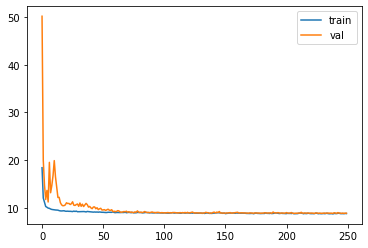

Model: "sequential_501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_501 (Bat (None, 14)                56        
_________________________________________________________________
dense_1990 (Dense)           (None, 27)                405       
_________________________________________________________________
leaky_re_lu_1990 (LeakyReLU) (None, 27)                0         
_________________________________________________________________
dropout_1489 (Dropout)       (None, 27)                0         
_________________________________________________________________
dense_1991 (Dense)           (None, 36)                1008      
_________________________________________________________________
leaky_re_lu_1991 (LeakyReLU) (None, 36)                0         
_________________________________________________________________
dropout_1490 (Dropout)       (None, 36)             

In [ ]:
model_NN = Sequential()
model_NN.add(BatchNormalization())
model_NN.add(Dense(best_params ['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha= best_params [ 'alpha'])) 
model_NN.add(Dropout(best_params ['drop_out1']))
# if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
model_NN.add(Dense(best_params ['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
model_NN.add(Dropout(best_params ['drop_out2']))
if best_params ['layers'] == 3 :
    model_NN.add(Dense(best_params ['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
    model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
    model_NN.add(Dropout(best_params ['drop_out3']))
model_NN.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
# instantiate and compile model
opt = keras.optimizers.Adam(learning_rate=best_params [ 'learning_rate'])
model_NN.compile(loss=
                #  'mse',
              tf.keras.losses.Huber( delta=best_params[ 'delta']),
              # 'mse'
                  optimizer=opt)
fn = "gdrive/My Drive/Colab Notebooks/Stations/Training_PM2.5_Maildlake_OUT.ckpt" 
fnn = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer
callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop_epochs),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model_NN.fit(x=X_traine, y= y_traine,
                  validation_data=(X_val, y_val),
                  batch_size=int(best_params['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
model_NN.summary()

In [ ]:
model_NN.load_weights(fn)
precovid_model = 'gdrive/My Drive/Colab Notebooks/BuffaloViewpoint_PM2.52_OUT.h5'
model_NN.save(precovid_model )

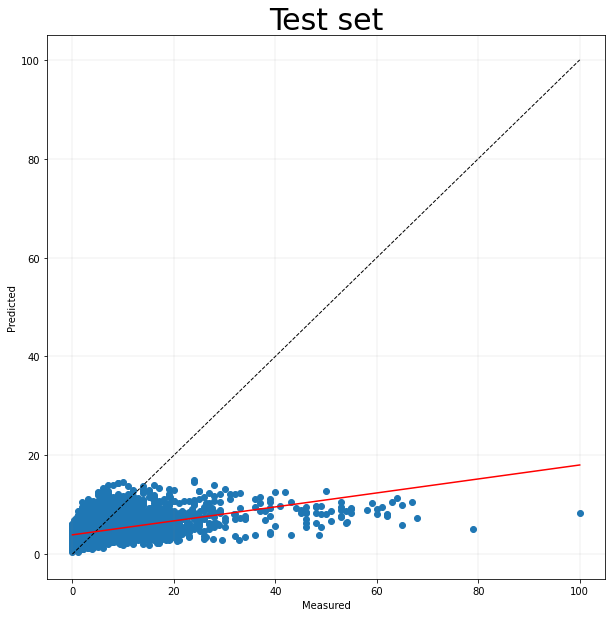

[0.14135156 3.89645646]
RMSE
[5.4591757]
R2
0.1797362714682883


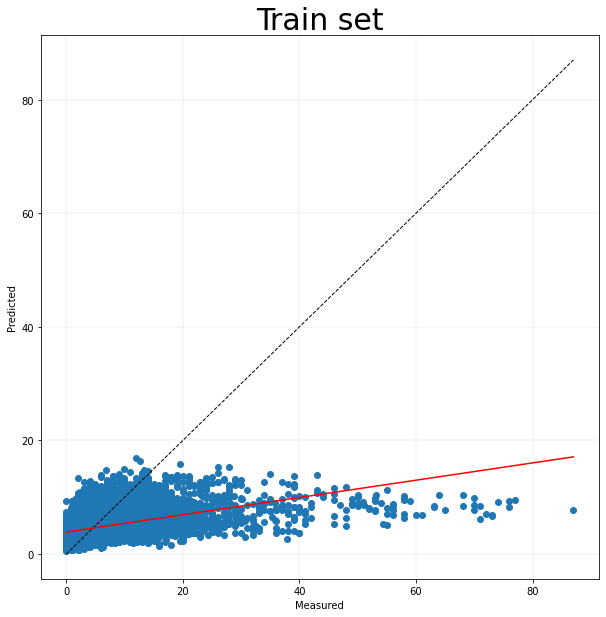

[0.15214651 3.88150487]
RMSE
[5.05169626]
R2
0.18730760087359932


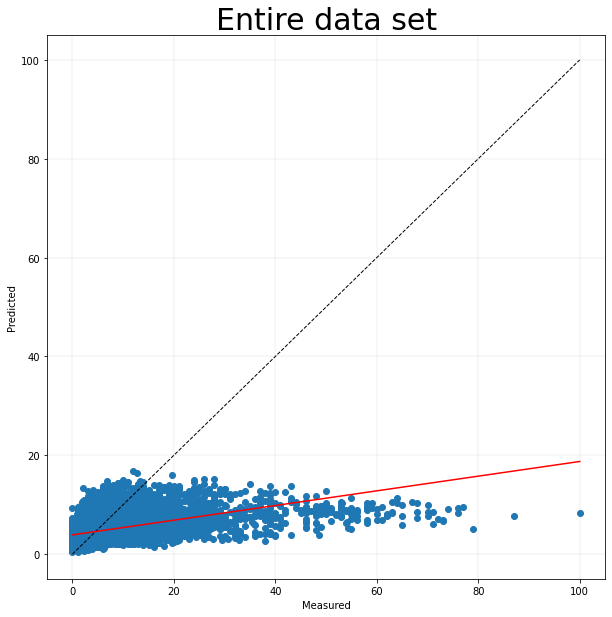

[0.14853623 3.88758767]
RMSE
[5.17731702]
R2
0.18487678921251416


In [ ]:
preds = model_NN.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model_NN.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model_NN.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

Model: "sequential_501"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_501 (Bat (None, 14)                56        
_________________________________________________________________
dense_1990 (Dense)           (None, 27)                405       
_________________________________________________________________
leaky_re_lu_1990 (LeakyReLU) (None, 27)                0         
_________________________________________________________________
dropout_1489 (Dropout)       (None, 27)                0         
_________________________________________________________________
dense_1991 (Dense)           (None, 36)                1008      
_________________________________________________________________
leaky_re_lu_1991 (LeakyReLU) (None, 36)                0         
_________________________________________________________________
dropout_1490 (Dropout)       (None, 36)             

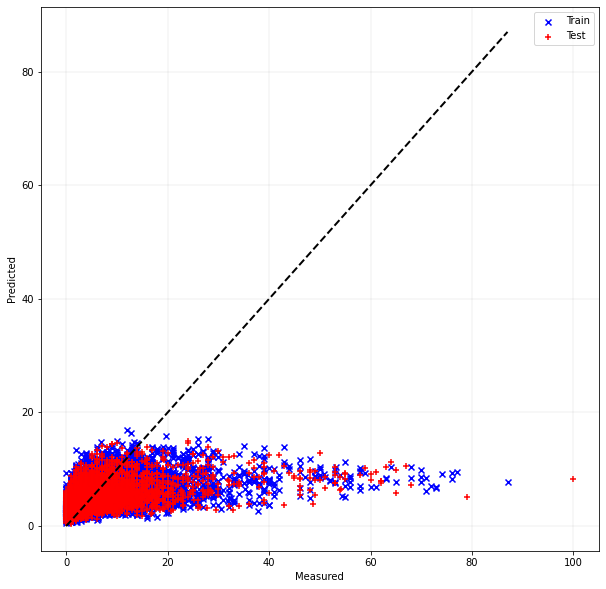

In [ ]:
model_NN = load_model(precovid_model )
model_NN.summary()
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.5], [0,0.5], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [ ]:
# df3= df3.copy()
df4 = df1_w_c.copy()
df4['pred'] = model_NN.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

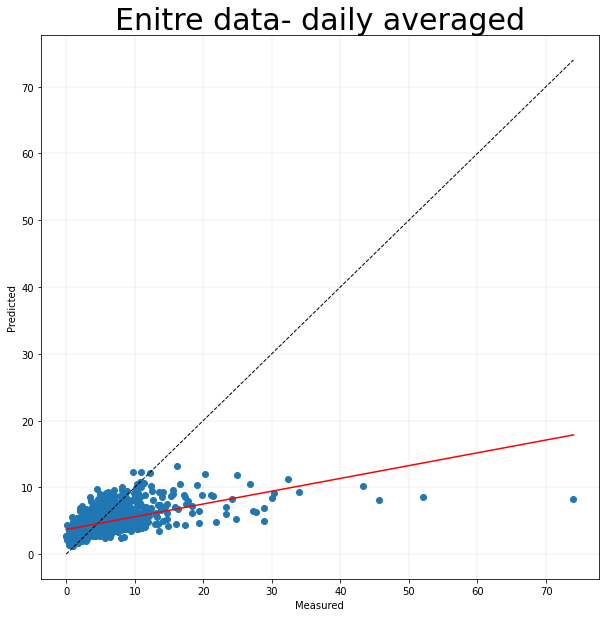

[0.19157082 3.67324851]
RMSE
[4.20100548]
R2
0.25663050427624834


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10[aa]).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


In [ ]:
df4.columns

Index(['PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

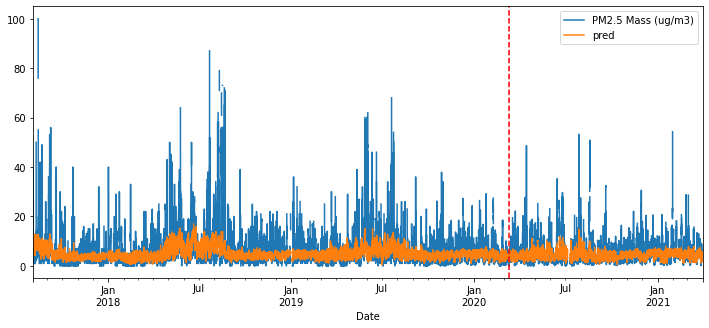

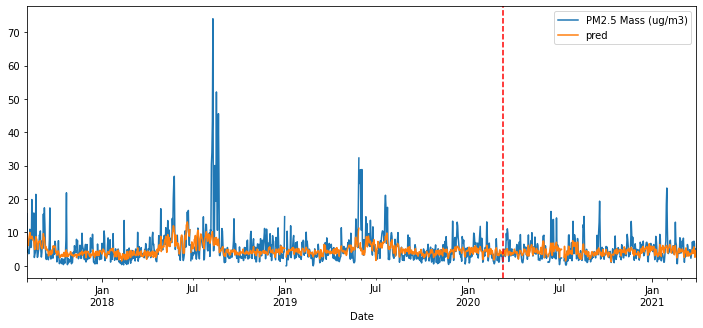

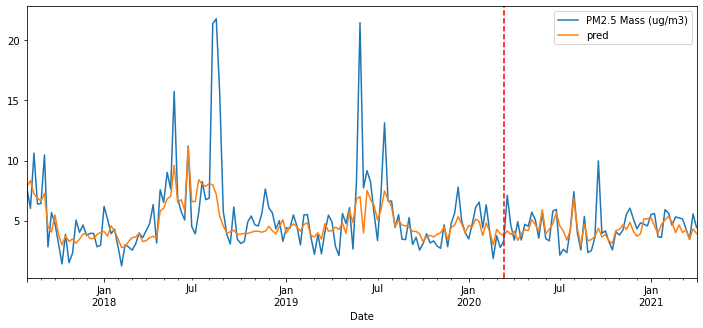

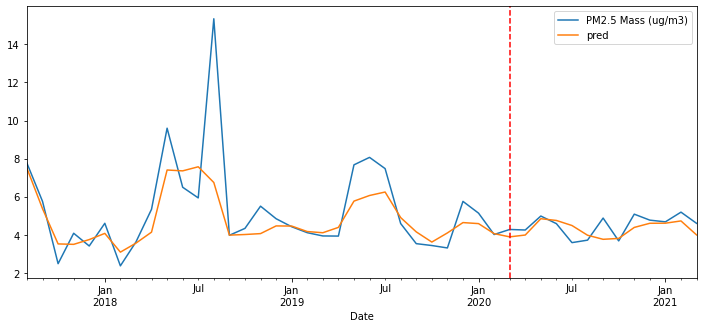

In [ ]:
df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
preds1 = model_NN.predict(X_train) 
y_real1 = y_train.reshape(-1,1)
y_pred1 = preds1.reshape(-1,1)
print(rmse(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))

[5.05169626]
0.18730760087359932


In [ ]:
preds = model_NN.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

[5.4591757]
0.1797362714682883


In [ ]:
df4.columns

Index(['PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

In [ ]:
preds = model_NN.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model_NN.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = ['RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]
test_col = [aa]


df1_w_c = df1_w[[aa,'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
        ]]
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/BuffaloViewpoint_PM2.5_NN_OR_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/BuffaloViewpoint_PM2.5_NN_OR_Test.csv')

[5.05169626]
0.18730760087359932
[5.4591757]
0.1797362714682883


In [ ]:
df4.columns

Index(['PM2.5 Mass (ug/m3)', 'RH %', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

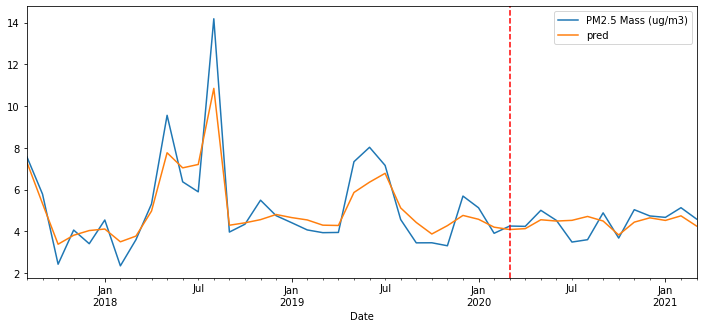

In [ ]:
df4_h[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace=True)
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model_NN.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
109
4.773237705230713
2021-01-17 08:00:00
113
4.850088596343994
2021-01-17 09:00:00
113
4.8682756423950195
2021-01-17 10:00:00
108
4.8252034187316895
2021-01-17 11:00:00
104
4.746631145477295
2021-01-17 12:00:00
103
4.67636251449585
2021-01-17 14:00:00
111
4.66726016998291
2021-01-17 15:00:00
112
4.6951799392700195
2021-01-17 16:00:00
113
4.7359418869018555
2021-01-17 17:00:00
112
4.712596416473389
2021-01-17 18:00:00
109
4.694792747497559
2021-01-17 19:00:00
110
4.7256550788879395
2021-01-17 20:00:00
110
4.760332107543945
2021-01-17 21:00:00
111
4.797715663909912
2021-01-17 22:00:00
113
4.7867326736450195
2021-01-17 23:00:00
113
4.8494086265563965
2021-01-18 01:00:00
113
4.658687591552734
2021-01-18 02:00:00
112
4.677010536193848
2021-01-18 03:00:00
112
4.71058988571167
2021-01-18 04:00:00
110
4.731654167175293
2021-01-18 05:00:00
111
4.7635979652404785
2021-01-18 06:00:00
111
4.771559238433838
2021-01-18 07:00:00
109
4.74730205535888

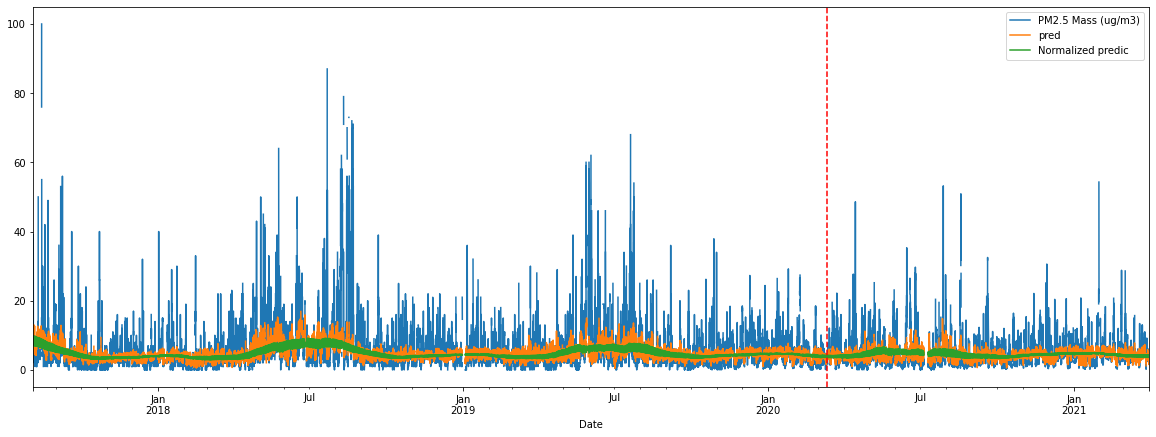

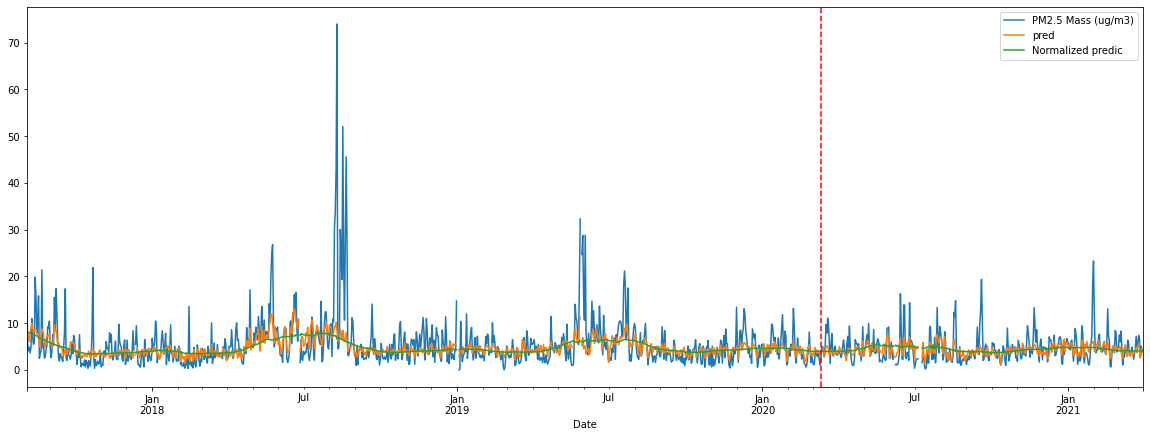

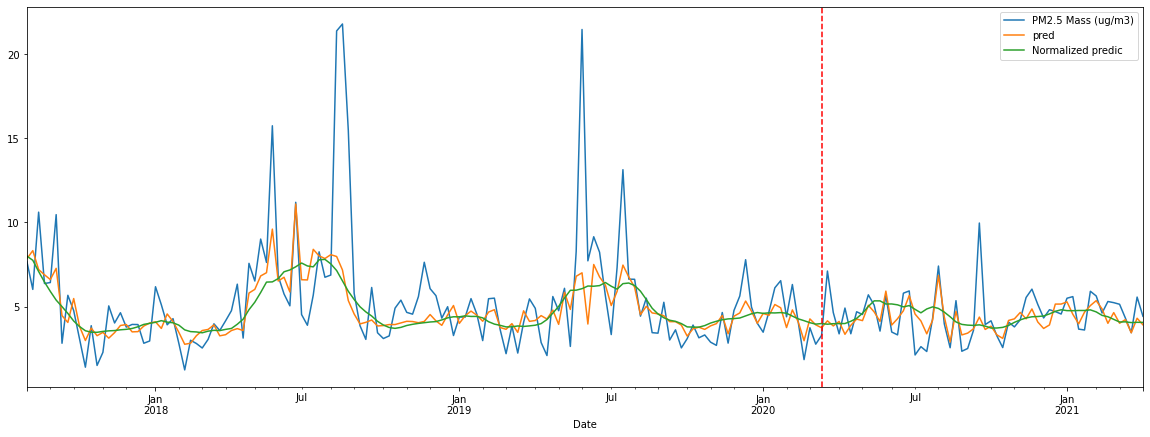

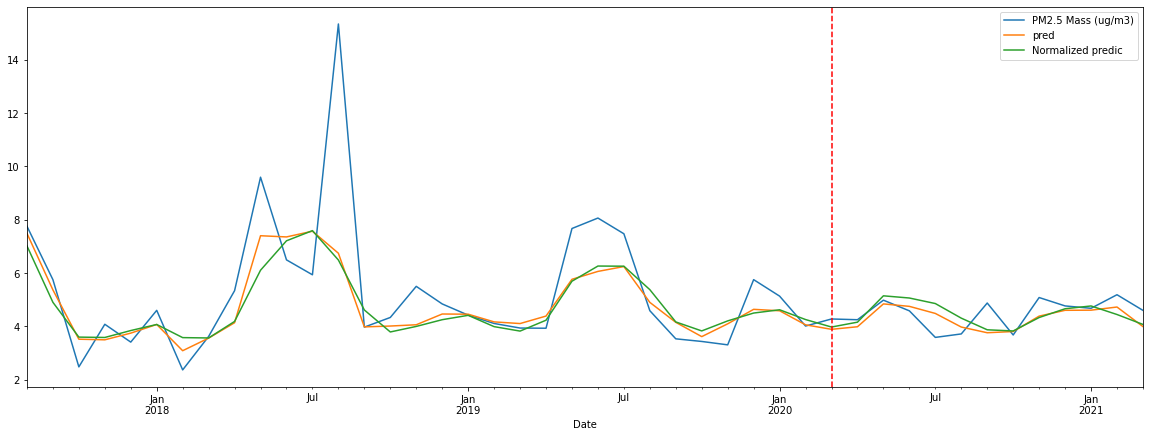

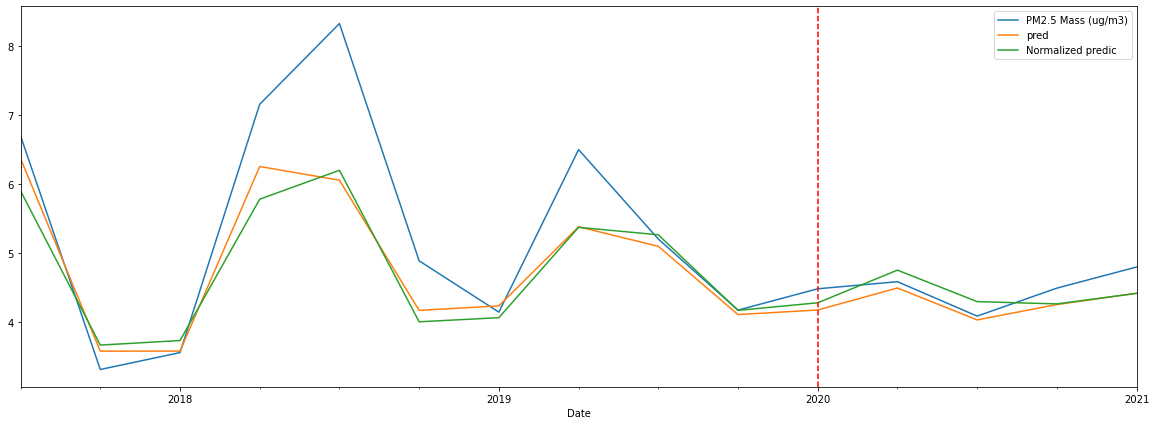

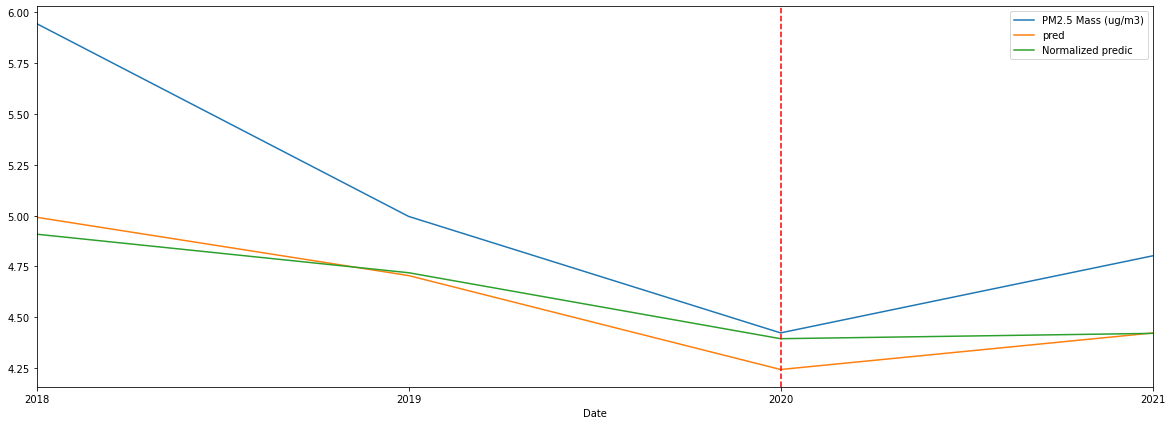

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()
df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_BuffaloViewpoint_PM2.5_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_BuffaloViewpoint_PM2.5_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_BuffaloViewpoint_PM2.5_Monthly_normalized_pred.csv')


for i in ['H','D','W','M','Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

df4_h[aa].resample('Y').mean().loc['2018':].plot(legend= True)
df4_h['pred'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
df4_h['Normalized predic'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
########################################################################################################################################################
########################################################################################################################################################
########################################################################################################################################################
########################################################################################################################################################
########################################################################################################################################################
########################################################################################################################################################
########################################################################################################################################################
########################################################################################################################################################



In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate


df2_w_c = df2_w[[ 'CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit','walking',
]]
df2_w_c.columns

Index(['CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'driving', 'transit',
       'walking'],
      dtype='object')

In [ ]:
df2_w_c[['driving', 'transit', 'walking']]=df2_w_c[['driving', 'transit', 'walking']]/100

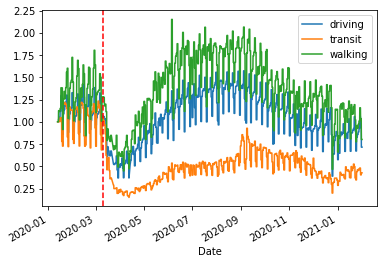

In [ ]:
df2_w_c[['driving', 'transit', 'walking']].plot()
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
a = df2_w_c[['driving', 'transit', 'walking']].loc[:'2020-03-11'].copy()
a.mean()

driving    1.124019
transit    1.025378
walking    1.331329
dtype: float64

In [ ]:
Y_a = df2_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df2_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df2_w_c[ ['driving', 'transit', 'walking']])


X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
print(np.shape(X_a),np.shape(X_b),np.shape(Y_a))

(9075, 12) (9075, 3) (9075, 1)


In [ ]:
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [ ]:
print(np.shape(X_train_a),np.shape(X_train_b))
print(np.shape(X_traine_a),np.shape(X_traine_b))
print(np.shape(X_val_a),np.shape(X_val_b))

(7260, 12) (7260, 3)
(5445, 12) (5445, 3)
(1815, 12) (1815, 3)


In [ ]:
best_params

{'batchsize': 2500.0,
 'drop_out1': 0.0057066589968766,
 'drop_out2': 0.008999530008727568,
 'drop_out3': 0.0006990849923195847,
 'layers': 3,
 'num_dense_nodes1': 35,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 28}

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 35)                455       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 35)                0         
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                864       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24)                0

In [ ]:
class Objective2(object):
    def __init__(self, X_a,X_b, Y, max_epochs, learn_rate_epochs,
                  ):
        self.X_train_a, self.X_test_a, self.y_train_a, self.y_test_a = train_test_split(X_a, Y, test_size=0.001, random_state=42)
        self.X_train_b, self.X_test_b, self.y_train_b, self.y_test_b = train_test_split(X_b, Y, test_size=0.001, random_state=42)

        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.model_fixed = load_model(precovid_model)
        for i in range(0,len(self.model_fixed.layers)):
            self.model_fixed.layers[i].trainable = False

    def __call__(self, trial):        
        dict_params = { 
                        'last_layer' :trial.suggest_int('last_layer',0,1),
                        'two_layer' :trial.suggest_int('two_layer',0,1),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 1,3),
                       'num_dense_nodes2': trial.suggest_int('num_dense_nodes2', 1,8),
                        # 'layers': trial.suggest_int('layers', 2,3),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,2000,100)),
                      #  'drop_out1': trial.suggest_float('drop_out1',0.0, 0.2),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                       'layer_back' :-(trial.suggest_int('layer_back', 1,2)),
                       }  
        # print(dict_params[ 'layer_back'])
        l1 = Input(shape=(3,))
        l1_2 = BatchNormalization()(l1)
        l2 = Dense(dict_params['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
        l2_2 = LeakyReLU(alpha=dict_params['alpha'])(l2)
        if dict_params['two_layer'] ==1 :
             l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_3])
        else :
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_2])
        merged2 = BatchNormalization()(merged)

        if dict_params['last_layer'] == 0:
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)

        if dict_params['last_layer'] == 1:
            l5 = Dense(dict_params['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
            l5_1 = LeakyReLU(alpha=dict_params['alpha'])(l5)
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)          
        
        model = Model(inputs=[self.model_fixed.input,l1], outputs=l5_3)

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params['learning_rate'])
        model.compile(loss='mse',optimizer=opt)
        fn2 = "gdrive/My Drive/Colab Notebooks/Stations/East_ED_NOX_apple" +str(trial.number) + ".ckpt" 
        fnn2 = os.path.dirname(fn2)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn2, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 

        for train_index, test_index in kf.split( self.X_train_a):   
                X_tr_a, X_tes_a =  self.X_train_a[train_index],  self.X_train_a[test_index]
                X_tr_b, X_tes_b =  self.X_train_b[train_index],  self.X_train_b[test_index]
                y_tr, y_tes =   self.y_train_a[train_index],   self.y_train_a[test_index]    
                # fit the model
                X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split( X_tr_a,  y_tr, test_size=0.12, random_state = 42)
                X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split( X_tr_b,  y_tr, test_size=0.12, random_state = 42)


                model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=dict_params['batchsize'],
                  epochs=self.max_epochs,
                  shuffle=True, verbose=0,
                  callbacks=callbacks_list)
                
                model.load_weights(fn2)
                preds = model.predict([X_tes_a,X_tes_b]) 
                # print(np.shape(y_tes),np.shape( preds))
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 
        print(acc)
        return acc    

In [ ]:
objective2 = Objective2(X_a, X_b ,Y_a ,maximum_epochs, learning_rate_epochs)
study2 = optuna.create_study(direction=optimizer_direction, study_name='east_edm_CO_p2',storage='sqlite:///east_edm_CO_p2.db',load_if_exists=True)
study2.optimize(objective2, n_trials=300)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/CO_Edmonton_east_Hyperparams_Stations.csv')
study2.best_trial

[I 2021-04-18 06:37:44,453] A new study created in RDB with name: east_edm_CO_p2
[I 2021-04-18 06:40:22,320] Trial 0 finished with value: 0.0047897337392556185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 3, 'batchsize': 1300.0, 'learning_rate': 0.08684742896034063, 'alpha': 0.47486431649895633, 'layer_back': 1}. Best is trial 0 with value: 0.0047897337392556185.


0.0047897337392556185


[I 2021-04-18 06:46:17,741] Trial 1 finished with value: 0.0037995427144006185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 200.0, 'learning_rate': 0.026645640165432177, 'alpha': 0.2464432589680267, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0037995427144006185


[I 2021-04-18 06:49:06,028] Trial 2 finished with value: 0.004990117939045318 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1200.0, 'learning_rate': 0.04246052710121524, 'alpha': 0.14036321226448864, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.004990117939045318


[I 2021-04-18 06:51:38,749] Trial 3 finished with value: 0.004435081840883617 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.08019349670014007, 'alpha': 0.801795208357617, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004435081840883617


[I 2021-04-18 06:55:41,325] Trial 4 finished with value: 0.004397006773851628 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 400.0, 'learning_rate': 0.0922021495386216, 'alpha': 0.8714206976745991, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004397006773851628


[I 2021-04-18 06:58:39,803] Trial 5 finished with value: 0.004472224808431502 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 1, 'batchsize': 900.0, 'learning_rate': 0.054032085513753485, 'alpha': 0.36356263089297863, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004472224808431502


[I 2021-04-18 07:02:19,968] Trial 6 finished with value: 0.004032658481373844 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 500.0, 'learning_rate': 0.0034103388646587085, 'alpha': 0.8298599523597091, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004032658481373844


[I 2021-04-18 07:04:57,913] Trial 7 finished with value: 0.004412881161440907 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1400.0, 'learning_rate': 0.024560851403922612, 'alpha': 0.8657303593335849, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004412881161440907


[I 2021-04-18 07:07:33,362] Trial 8 finished with value: 0.003962766007027832 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1600.0, 'learning_rate': 0.0387484515918348, 'alpha': 0.5935061142207385, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.003962766007027832


[I 2021-04-18 07:10:45,080] Trial 9 finished with value: 0.004464174746733434 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 700.0, 'learning_rate': 0.07156430296741274, 'alpha': 0.6837562117270939, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004464174746733434


[I 2021-04-18 07:20:10,927] Trial 10 finished with value: 0.0047593223285363065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.006393597974084786, 'alpha': 0.09784392044369339, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.0047593223285363065


[I 2021-04-18 07:22:40,517] Trial 11 finished with value: 0.0038559859859853907 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 4, 'batchsize': 1900.0, 'learning_rate': 0.029641261114048665, 'alpha': 0.3455488342982123, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0038559859859853907


[I 2021-04-18 07:25:12,650] Trial 12 finished with value: 0.0037802072596256108 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 2000.0, 'learning_rate': 0.021318248161901757, 'alpha': 0.27421676161966496, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.0037802072596256108


[I 2021-04-18 07:34:39,100] Trial 13 finished with value: 0.003838305552608133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.01618259930894679, 'alpha': 0.2237909588852787, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.003838305552608133


[I 2021-04-18 07:37:13,171] Trial 14 finished with value: 0.0037727934709037452 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 1600.0, 'learning_rate': 0.05463156741271952, 'alpha': 0.023432883667647286, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.0037727934709037452


[I 2021-04-18 07:39:46,194] Trial 15 finished with value: 0.004717376020706112 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.057774493852787316, 'alpha': 0.013468966566860257, 'layer_back': 1}. Best is trial 14 with value: 0.0037727934709037452.


0.004717376020706112


[I 2021-04-18 07:42:17,141] Trial 16 finished with value: 0.003891606393255513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 4, 'batchsize': 1600.0, 'learning_rate': 0.06483099406582218, 'alpha': 0.048701457819810334, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.003891606393255513


[I 2021-04-18 07:44:50,068] Trial 17 finished with value: 0.003705317767648349 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.042981081545902175, 'alpha': 0.17151924705879706, 'layer_back': 2}. Best is trial 17 with value: 0.003705317767648349.


0.003705317767648349


[I 2021-04-18 07:47:22,992] Trial 18 finished with value: 0.003652074267837431 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043120594200074316, 'alpha': 0.15356515832757994, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003652074267837431


[I 2021-04-18 07:49:56,748] Trial 19 finished with value: 0.004855364207538971 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.03948108446690251, 'alpha': 0.1731767923827432, 'layer_back': 1}. Best is trial 18 with value: 0.003652074267837431.


0.004855364207538971


[I 2021-04-18 07:52:46,818] Trial 20 finished with value: 0.0036661417054684184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.045596783441498825, 'alpha': 0.46487314129271234, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0036661417054684184


[I 2021-04-18 07:55:47,695] Trial 21 finished with value: 0.003772814522212643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.04376219782019011, 'alpha': 0.495381372771252, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003772814522212643


[I 2021-04-18 07:58:33,572] Trial 22 finished with value: 0.0037000579251144777 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03235269324681574, 'alpha': 0.40139723428257024, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037000579251144777


[I 2021-04-18 08:01:16,242] Trial 23 finished with value: 0.0037201394146138406 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.0335829823820747, 'alpha': 0.561915944028579, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037201394146138406


[I 2021-04-18 08:04:15,280] Trial 24 finished with value: 0.0037030372913319023 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.01268992251227287, 'alpha': 0.3938061003278891, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037030372913319023


[I 2021-04-18 08:07:38,080] Trial 25 finished with value: 0.003918046517575021 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.04897050026188292, 'alpha': 0.6753399284001078, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003918046517575021


[I 2021-04-18 08:10:15,782] Trial 26 finished with value: 0.0038008433695184197 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.06522149016140043, 'alpha': 0.42163733919230845, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0038008433695184197


[I 2021-04-18 08:13:05,072] Trial 27 finished with value: 0.0036111388857046787 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.03298839085103375, 'alpha': 0.3150552800923347, 'layer_back': 2}. Best is trial 27 with value: 0.0036111388857046787.


0.0036111388857046787


[I 2021-04-18 08:16:08,056] Trial 28 finished with value: 0.003597443791057043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.04885615301916258, 'alpha': 0.29269304131799223, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.003597443791057043


[I 2021-04-18 08:19:12,662] Trial 29 finished with value: 0.0046809329310916956 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.05995146156015323, 'alpha': 0.30446311601011683, 'layer_back': 1}. Best is trial 28 with value: 0.003597443791057043.


0.0046809329310916956


[I 2021-04-18 08:21:45,673] Trial 30 finished with value: 0.004425357656736 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.0759352310855712, 'alpha': 0.21269011576180244, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.004425357656736


[I 2021-04-18 08:24:37,569] Trial 31 finished with value: 0.0036547160400316313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.049811468875869416, 'alpha': 0.510738346787994, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0036547160400316313


[I 2021-04-18 08:27:52,823] Trial 32 finished with value: 0.0037521087301732345 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.049503947678833926, 'alpha': 0.31735277463906175, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037521087301732345


[I 2021-04-18 08:30:36,307] Trial 33 finished with value: 0.0037683419447327986 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.03290226547777786, 'alpha': 0.5286190169685012, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037683419447327986


[I 2021-04-18 08:33:27,324] Trial 34 finished with value: 0.003597358919918322 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.036818841872599595, 'alpha': 0.12570513379804832, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003597358919918322


[I 2021-04-18 08:37:26,272] Trial 35 finished with value: 0.003661138596451478 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 400.0, 'learning_rate': 0.03671876888449163, 'alpha': 0.08397801305678194, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003661138596451478


[I 2021-04-18 08:40:27,101] Trial 36 finished with value: 0.00359203525150731 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.02437141103670945, 'alpha': 0.12749087727003588, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00359203525150731


[I 2021-04-18 08:43:26,782] Trial 37 finished with value: 0.0036756314419160397 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.018931547569790746, 'alpha': 0.2516407308762111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036756314419160397


[I 2021-04-18 08:48:02,902] Trial 38 finished with value: 0.0036545643870157882 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 300.0, 'learning_rate': 0.02603462599572944, 'alpha': 0.14443719906111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036545643870157882


[I 2021-04-18 08:51:18,641] Trial 39 finished with value: 0.004398658143913983 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.02412418866542985, 'alpha': 0.09261962247455818, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.004398658143913983


[I 2021-04-18 08:54:03,235] Trial 40 finished with value: 0.00366032853048446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 1200.0, 'learning_rate': 0.028075997597257207, 'alpha': 0.20259126107498393, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00366032853048446


[I 2021-04-18 08:57:05,594] Trial 41 finished with value: 0.003674477629447893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.03773808729024592, 'alpha': 0.13311556018712936, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.003674477629447893


[I 2021-04-18 08:59:59,665] Trial 42 finished with value: 0.0036705861586692643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.014115297813961467, 'alpha': 0.28611068588955, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036705861586692643


[I 2021-04-18 09:03:13,164] Trial 43 finished with value: 0.0036713389468197555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.04560695580139573, 'alpha': 0.3437569312771207, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036713389468197555


[I 2021-04-18 09:06:35,814] Trial 44 finished with value: 0.0035783836209078556 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.009070889461271204, 'alpha': 0.13887248911600195, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035783836209078556


[I 2021-04-18 09:09:57,729] Trial 45 finished with value: 0.003673148714195081 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 600.0, 'learning_rate': 0.009253166791610645, 'alpha': 0.2451607156425593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003673148714195081


[I 2021-04-18 09:14:01,355] Trial 46 finished with value: 0.004344271113195811 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 400.0, 'learning_rate': 0.001551960808838477, 'alpha': 0.10569886410992255, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004344271113195811


[I 2021-04-18 09:17:39,621] Trial 47 finished with value: 0.0037050254039840223 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.021082510170567333, 'alpha': 0.0668001215058446, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037050254039840223


[I 2021-04-18 09:20:38,142] Trial 48 finished with value: 0.0036692619534721047 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.007585468046031375, 'alpha': 0.2061475495973082, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036692619534721047


[I 2021-04-18 09:23:49,174] Trial 49 finished with value: 0.004457879746783033 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.03483835282389286, 'alpha': 0.018344801879960376, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004457879746783033


[I 2021-04-18 09:26:34,895] Trial 50 finished with value: 0.0035807581552902102 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03005652498704963, 'alpha': 0.11696356203274105, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035807581552902102


[I 2021-04-18 09:29:21,811] Trial 51 finished with value: 0.0036236342891670654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.09983893132352316, 'alpha': 0.11957067974916365, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036236342891670654


[I 2021-04-18 09:32:02,631] Trial 52 finished with value: 0.0036302435793163423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.02754867420830222, 'alpha': 0.05647608660638647, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036302435793163423


[I 2021-04-18 09:34:44,744] Trial 53 finished with value: 0.003627053068071688 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04005811816852655, 'alpha': 0.17080808493297003, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003627053068071688


[I 2021-04-18 09:37:45,884] Trial 54 finished with value: 0.0036920503523068266 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.017979831294330218, 'alpha': 0.2570823577331828, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036920503523068266


[I 2021-04-18 09:40:36,692] Trial 55 finished with value: 0.003612690295076574 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1000.0, 'learning_rate': 0.029552755284063505, 'alpha': 0.18039366495456732, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003612690295076574


[I 2021-04-18 09:43:40,566] Trial 56 finished with value: 0.004012695527376038 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 800.0, 'learning_rate': 0.022565925713046567, 'alpha': 0.03734236499524329, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004012695527376038


[I 2021-04-18 09:47:16,794] Trial 57 finished with value: 0.003698018600704401 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 500.0, 'learning_rate': 0.05338960509962787, 'alpha': 0.35126328332328843, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003698018600704401


[I 2021-04-18 09:50:04,725] Trial 58 finished with value: 0.003619003598112455 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.011669376031158469, 'alpha': 0.2338658479883975, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003619003598112455


[I 2021-04-18 09:53:02,416] Trial 59 finished with value: 0.0036054917675212707 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.031117560438016202, 'alpha': 0.12690434404626497, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036054917675212707


[I 2021-04-18 09:56:06,738] Trial 60 finished with value: 0.003886966241395085 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.003565187588275332, 'alpha': 0.12617304287730674, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003886966241395085


[I 2021-04-18 09:59:11,214] Trial 61 finished with value: 0.003618826532739045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.03119470670070372, 'alpha': 0.06717581966642143, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003618826532739045


[I 2021-04-18 10:02:02,407] Trial 62 finished with value: 0.0037632189106060355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1000.0, 'learning_rate': 0.04059941279624269, 'alpha': 0.16862336495408595, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037632189106060355


[I 2021-04-18 10:05:19,179] Trial 63 finished with value: 0.003794832132947586 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 700.0, 'learning_rate': 0.036734160746832493, 'alpha': 0.01101319432018788, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003794832132947586


[I 2021-04-18 10:08:20,419] Trial 64 finished with value: 0.003758988776972788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.029855268948976825, 'alpha': 0.4386976096021802, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003758988776972788


[I 2021-04-18 10:11:42,186] Trial 65 finished with value: 0.0035876522982958357 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.024552341120126213, 'alpha': 0.20134794489311997, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035876522982958357


[I 2021-04-18 10:15:04,777] Trial 66 finished with value: 0.0036155628523736184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.016447401975405944, 'alpha': 0.14664495950811754, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036155628523736184


[I 2021-04-18 10:18:40,103] Trial 67 finished with value: 0.0037361543406670638 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.02482879535124779, 'alpha': 0.18911509071408622, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037361543406670638


[I 2021-04-18 10:23:14,465] Trial 68 finished with value: 0.004737399253546576 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 300.0, 'learning_rate': 0.045839207163365064, 'alpha': 0.11572139542681772, 'layer_back': 1}. Best is trial 44 with value: 0.0035783836209078556.


0.004737399253546576


[I 2021-04-18 10:26:17,521] Trial 69 finished with value: 0.0035844609162026856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.021759460493932996, 'alpha': 0.08938362393003896, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035844609162026856


[I 2021-04-18 10:29:40,721] Trial 70 finished with value: 0.003647474821726536 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.020584896822209618, 'alpha': 0.08688700495047245, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003647474821726536


[I 2021-04-18 10:32:40,862] Trial 71 finished with value: 0.0036240235360119194 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.026636013810065286, 'alpha': 0.04460753701062606, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036240235360119194


[I 2021-04-18 10:35:57,924] Trial 72 finished with value: 0.003678997217185063 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 700.0, 'learning_rate': 0.02380154186526011, 'alpha': 0.15140441320203327, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003678997217185063


[I 2021-04-18 10:39:01,596] Trial 73 finished with value: 0.003659856745198834 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.015277005770461548, 'alpha': 0.2178303763286192, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003659856745198834


[I 2021-04-18 10:42:16,571] Trial 74 finished with value: 0.0036399907750272265 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.011408912622706538, 'alpha': 0.10321869296892679, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036399907750272265


[I 2021-04-18 10:45:19,285] Trial 75 finished with value: 0.0037281104148537535 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.035323452421033984, 'alpha': 0.2846749869393032, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037281104148537535


[I 2021-04-18 10:48:06,701] Trial 76 finished with value: 0.00361764726075232 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.018785055346852722, 'alpha': 0.08247223174383175, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.00361764726075232


[I 2021-04-18 10:51:06,829] Trial 77 finished with value: 0.0036951690746862827 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.030036815811613576, 'alpha': 0.15370233117847767, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036951690746862827


[I 2021-04-18 10:53:48,194] Trial 78 finished with value: 0.003591197553125669 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.021596734858180668, 'alpha': 0.19705749126102656, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003591197553125669


[I 2021-04-18 10:56:31,899] Trial 79 finished with value: 0.0036875580454355968 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.004996727049177942, 'alpha': 0.19630957319700593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036875580454355968


[I 2021-04-18 10:59:15,173] Trial 80 finished with value: 0.003672630637413495 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.009725768873874269, 'alpha': 0.23904793658858925, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003672630637413495


[I 2021-04-18 11:02:33,338] Trial 81 finished with value: 0.003608277041588192 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.021177055101469718, 'alpha': 0.13273475258504627, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003608277041588192


[I 2021-04-18 11:05:23,493] Trial 82 finished with value: 0.0035357134156083006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03251063586877488, 'alpha': 0.16601335847048496, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035357134156083006


[I 2021-04-18 11:08:10,650] Trial 83 finished with value: 0.0035800395220561315 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027507014638668944, 'alpha': 0.26952999743969175, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035800395220561315


[I 2021-04-18 11:10:53,530] Trial 84 finished with value: 0.003641285084880817 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.024468913257262442, 'alpha': 0.26941083528596615, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003641285084880817


[I 2021-04-18 11:13:33,120] Trial 85 finished with value: 0.003613639352689042 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.027506935493900007, 'alpha': 0.16554636650660334, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003613639352689042


[I 2021-04-18 11:16:13,848] Trial 86 finished with value: 0.0035454609704569555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034075180962035656, 'alpha': 0.19205737194876213, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035454609704569555


[I 2021-04-18 11:18:54,396] Trial 87 finished with value: 0.0036217548071173097 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.018105506543334197, 'alpha': 0.2172761829124636, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036217548071173097


[I 2021-04-18 11:21:32,202] Trial 88 finished with value: 0.0036196131119005967 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.013644839043071016, 'alpha': 0.18554443324755185, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036196131119005967


[I 2021-04-18 11:24:10,911] Trial 89 finished with value: 0.003572944589854708 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02174303974596932, 'alpha': 0.06885902281378707, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003572944589854708


[I 2021-04-18 11:26:50,606] Trial 90 finished with value: 0.003906346283951516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1500.0, 'learning_rate': 0.03323653174387488, 'alpha': 0.03163285232628042, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003906346283951516


[I 2021-04-18 11:29:31,353] Trial 91 finished with value: 0.003578888868218704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.022580602914511808, 'alpha': 0.06713185538847133, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003578888868218704


[I 2021-04-18 11:32:08,581] Trial 92 finished with value: 0.0035789263141083713 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.021256605621501615, 'alpha': 0.06634621015162126, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035789263141083713


[I 2021-04-18 11:34:49,916] Trial 93 finished with value: 0.003544189206426239 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02748340529865124, 'alpha': 0.07868991239964429, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003544189206426239


[I 2021-04-18 11:37:33,179] Trial 94 finished with value: 0.0035499476797488643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02892486834145689, 'alpha': 0.07221984870581319, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035499476797488643


[I 2021-04-18 11:40:14,572] Trial 95 finished with value: 0.0035273632980514285 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.027834554447690413, 'alpha': 0.06732285000688103, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035273632980514285


[I 2021-04-18 11:42:52,853] Trial 96 finished with value: 0.0036086771352365947 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02637530840203316, 'alpha': 0.05953489610216768, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036086771352365947


[I 2021-04-18 11:45:38,794] Trial 97 finished with value: 0.0035684357428775186 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027517728652115728, 'alpha': 0.07593898838347986, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035684357428775186


[I 2021-04-18 11:48:20,507] Trial 98 finished with value: 0.003583852513729412 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03367874759681739, 'alpha': 0.06942447131849512, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003583852513729412


[I 2021-04-18 11:50:57,066] Trial 99 finished with value: 0.003541288425685317 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.041358766423868744, 'alpha': 0.021920382234198947, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003541288425685317


[I 2021-04-18 11:53:42,845] Trial 100 finished with value: 0.0036243488752047467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04030568364072326, 'alpha': 0.02384229949250582, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036243488752047467


[I 2021-04-18 11:56:21,539] Trial 101 finished with value: 0.003627937411450544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.035398043970041676, 'alpha': 0.03950052041260174, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627937411450544


[I 2021-04-18 11:59:00,418] Trial 102 finished with value: 0.003627126043875543 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03832592467033967, 'alpha': 0.10048283220351684, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627126043875543


[I 2021-04-18 12:01:36,789] Trial 103 finished with value: 0.0035408315369076784 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032256016881253326, 'alpha': 0.07030089565296588, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035408315369076784


[I 2021-04-18 12:04:17,971] Trial 104 finished with value: 0.003566082616285739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04262395762710679, 'alpha': 0.01173160141920479, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003566082616285739


[I 2021-04-18 12:06:58,238] Trial 105 finished with value: 0.0035737931205732376 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04227819138674002, 'alpha': 0.010660044984515019, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035737931205732376


[I 2021-04-18 12:09:32,119] Trial 106 finished with value: 0.0035184089995725617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043629287038235834, 'alpha': 0.010426390915745402, 'layer_back': 2}. Best is trial 106 with value: 0.0035184089995725617.


0.0035184089995725617


[I 2021-04-18 12:12:07,413] Trial 107 finished with value: 0.0034912184906821125 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04304162747051637, 'alpha': 0.044280753511746956, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0034912184906821125


[I 2021-04-18 12:14:44,123] Trial 108 finished with value: 0.0036380100736029142 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046899784330746694, 'alpha': 0.011423731168029368, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036380100736029142


[I 2021-04-18 12:17:20,619] Trial 109 finished with value: 0.0035930917231830005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05312662202242775, 'alpha': 0.04766526633420203, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035930917231830005


[I 2021-04-18 12:19:56,882] Trial 110 finished with value: 0.0035019395412586403 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04297554301809757, 'alpha': 0.03108575464071467, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035019395412586403


[I 2021-04-18 12:22:26,683] Trial 111 finished with value: 0.0035799057324392095 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.042791521010711986, 'alpha': 0.033242351358857565, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035799057324392095


[I 2021-04-18 12:25:01,093] Trial 112 finished with value: 0.003567586631908924 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04188075691123601, 'alpha': 0.012902457195305648, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567586631908924


[I 2021-04-18 12:27:37,137] Trial 113 finished with value: 0.003552786707766206 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04705313553365665, 'alpha': 0.024024393886675065, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003552786707766206


[I 2021-04-18 12:30:14,683] Trial 114 finished with value: 0.0035491374611036066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04792414670441766, 'alpha': 0.04942912887788908, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035491374611036066


[I 2021-04-18 12:32:47,942] Trial 115 finished with value: 0.003934744163417141 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.05138779832449931, 'alpha': 0.7678284116404237, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003934744163417141


[I 2021-04-18 12:35:21,813] Trial 116 finished with value: 0.0035480745063304685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04672929967596791, 'alpha': 0.0543681486748597, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035480745063304685


[I 2021-04-18 12:37:57,950] Trial 117 finished with value: 0.003645209428448006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.058597540974892046, 'alpha': 0.054075814336391005, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003645209428448006


[I 2021-04-18 12:40:31,646] Trial 118 finished with value: 0.003635834268763575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04497558570260886, 'alpha': 0.10395749038880057, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003635834268763575


[I 2021-04-18 12:43:09,338] Trial 119 finished with value: 0.0036447334704852665 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1800.0, 'learning_rate': 0.04781462434994531, 'alpha': 0.04268750205527756, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036447334704852665


[I 2021-04-18 12:45:44,270] Trial 120 finished with value: 0.003567690380984065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.037831602089136926, 'alpha': 0.0894939850401166, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567690380984065


[I 2021-04-18 12:48:19,955] Trial 121 finished with value: 0.0036418865284299482 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.049910163797960434, 'alpha': 0.02265761100617698, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036418865284299482


[I 2021-04-18 12:50:50,152] Trial 122 finished with value: 0.003626350371093418 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04409374352769631, 'alpha': 0.04839758470877351, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003626350371093418


[I 2021-04-18 12:53:25,935] Trial 123 finished with value: 0.004068899031879057 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 1900.0, 'learning_rate': 0.04692551724599392, 'alpha': 0.027164865650236767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004068899031879057


[I 2021-04-18 12:56:09,582] Trial 124 finished with value: 0.003549524306460534 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.05601252997839943, 'alpha': 0.08216270418670965, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003549524306460534


[I 2021-04-18 12:58:52,986] Trial 125 finished with value: 0.0036022166677025626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.051026693295636215, 'alpha': 0.08169432284004574, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036022166677025626


[I 2021-04-18 13:01:25,923] Trial 126 finished with value: 0.0036323884269265395 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05755736475611723, 'alpha': 0.10764012747900042, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036323884269265395


[I 2021-04-18 13:04:06,681] Trial 127 finished with value: 0.0035868803510106743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.06484074739859898, 'alpha': 0.04916233098402338, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035868803510106743


[I 2021-04-18 13:06:48,784] Trial 128 finished with value: 0.003632038891645508 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.05481967090549042, 'alpha': 0.09493718561374137, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632038891645508


[I 2021-04-18 13:09:24,704] Trial 129 finished with value: 0.0036332687347207073 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.06164699827462552, 'alpha': 0.11368639196612304, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036332687347207073


[I 2021-04-18 13:12:02,225] Trial 130 finished with value: 0.0036107090038871685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.031913432524153476, 'alpha': 0.07944764608488178, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036107090038871685


[I 2021-04-18 13:14:37,997] Trial 131 finished with value: 0.003543857849946714 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04047866711207972, 'alpha': 0.03334890991576665, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003543857849946714


[I 2021-04-18 13:17:10,956] Trial 132 finished with value: 0.003614544482168527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03927975006627224, 'alpha': 0.05750478466882326, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003614544482168527


[I 2021-04-18 13:19:52,496] Trial 133 finished with value: 0.0036289459230039846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03602600147397279, 'alpha': 0.03879102885756539, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036289459230039846


[I 2021-04-18 13:22:21,926] Trial 134 finished with value: 0.004397730627210862 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04121745337090514, 'alpha': 0.07727507999023213, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004397730627210862


[I 2021-04-18 13:25:09,682] Trial 135 finished with value: 0.0035954891884910044 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.05591938878661566, 'alpha': 0.011489115255243473, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035954891884910044


[I 2021-04-18 13:27:46,099] Trial 136 finished with value: 0.003632190940638184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04473961188420494, 'alpha': 0.05883472932516892, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632190940638184


[I 2021-04-18 13:30:22,676] Trial 137 finished with value: 0.004797824764292689 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03394020855741806, 'alpha': 0.6177230050734727, 'layer_back': 1}. Best is trial 107 with value: 0.0034912184906821125.


0.004797824764292689


[I 2021-04-18 13:32:54,827] Trial 138 finished with value: 0.0035575625191086686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03925631108791122, 'alpha': 0.02976577533102045, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035575625191086686


[I 2021-04-18 13:35:35,526] Trial 139 finished with value: 0.0037383972180743746 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.02925391477758371, 'alpha': 0.13393207397187767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037383972180743746


[I 2021-04-18 13:38:16,882] Trial 140 finished with value: 0.003617621733455551 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03195637257591547, 'alpha': 0.0947751465706642, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003617621733455551


[I 2021-04-18 13:40:50,663] Trial 141 finished with value: 0.003579242154278799 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0485447382823182, 'alpha': 0.01176858180870248, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003579242154278799


[I 2021-04-18 13:43:25,476] Trial 142 finished with value: 0.0035750086655864273 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.046567743860348884, 'alpha': 0.026818371099279946, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035750086655864273


[I 2021-04-18 13:46:00,498] Trial 143 finished with value: 0.003623829402881311 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03742158374219033, 'alpha': 0.04975293319513799, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003623829402881311


[I 2021-04-18 13:48:38,218] Trial 144 finished with value: 0.0036066806414085484 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05148602571649974, 'alpha': 0.010300864640383572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036066806414085484


[I 2021-04-18 13:51:09,839] Trial 145 finished with value: 0.003610979298586066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.043772802510158214, 'alpha': 0.07001141819525372, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003610979298586066


[I 2021-04-18 13:53:44,355] Trial 146 finished with value: 0.0035619962671982527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04082403791540483, 'alpha': 0.035248606443724864, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035619962671982527


[I 2021-04-18 13:56:26,877] Trial 147 finished with value: 0.003548864702878114 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04862893209367515, 'alpha': 0.11504554485639235, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003548864702878114


[I 2021-04-18 13:59:07,487] Trial 148 finished with value: 0.0036127803252306075 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034866037784612974, 'alpha': 0.15803031484071783, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036127803252306075


[I 2021-04-18 14:01:52,630] Trial 149 finished with value: 0.0035717142472204513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04905384303207223, 'alpha': 0.11415311920269179, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035717142472204513


[I 2021-04-18 14:04:32,812] Trial 150 finished with value: 0.0035749882689068164 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04526973875676865, 'alpha': 0.14572957071712894, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035749882689068164


[I 2021-04-18 14:07:16,399] Trial 151 finished with value: 0.0035993304069324022 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.052491361045237814, 'alpha': 0.08397349335013253, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035993304069324022


[I 2021-04-18 14:09:58,621] Trial 152 finished with value: 0.0035685056911281127 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04837346606791395, 'alpha': 0.06310254703879091, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035685056911281127


[I 2021-04-18 14:12:29,525] Trial 153 finished with value: 0.003629879513305761 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0438214208862195, 'alpha': 0.10403865238259322, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003629879513305761


[I 2021-04-18 14:15:14,227] Trial 154 finished with value: 0.0036221795403482207 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03029487512047642, 'alpha': 0.04348614544060133, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036221795403482207


[I 2021-04-18 14:17:57,080] Trial 155 finished with value: 0.0035922583407074988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.03843837268200991, 'alpha': 0.08433177217864488, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035922583407074988


[I 2021-04-18 14:20:36,152] Trial 156 finished with value: 0.003578072413719791 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.046367859672450995, 'alpha': 0.12254720867272155, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003578072413719791


[I 2021-04-18 14:23:15,649] Trial 157 finished with value: 0.0038583845758324883 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0871450624590979, 'alpha': 0.056755344230540905, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0038583845758324883


[I 2021-04-18 14:25:52,255] Trial 158 finished with value: 0.003580582397543033 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.041182684797758676, 'alpha': 0.031335914276621774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003580582397543033


[I 2021-04-18 14:28:31,244] Trial 159 finished with value: 0.003571554999049949 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.050511120203456654, 'alpha': 0.011355553310716315, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003571554999049949


[I 2021-04-18 14:31:10,768] Trial 160 finished with value: 0.0035740442082979025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1300.0, 'learning_rate': 0.054629022232272034, 'alpha': 0.09769506994297086, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035740442082979025


[I 2021-04-18 14:33:46,785] Trial 161 finished with value: 0.0035316717327896836 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03947842688021926, 'alpha': 0.02587334876105694, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035316717327896836


[I 2021-04-18 14:36:22,973] Trial 162 finished with value: 0.003583261784611461 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0426931007941171, 'alpha': 0.06941424492182441, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003583261784611461


[I 2021-04-18 14:38:56,920] Trial 163 finished with value: 0.0035638605296477717 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03698103592588202, 'alpha': 0.02604575458608599, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035638605296477717


[I 2021-04-18 14:41:34,556] Trial 164 finished with value: 0.0036057247992290833 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.033843190233136235, 'alpha': 0.054628128789041205, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036057247992290833


[I 2021-04-18 14:44:05,291] Trial 165 finished with value: 0.0036577139832949667 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.02862847367159879, 'alpha': 0.041190982009615476, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036577139832949667


[I 2021-04-18 14:46:34,411] Trial 166 finished with value: 0.0035796291367728578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.03989602686737119, 'alpha': 0.07720076451956273, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035796291367728578


[I 2021-04-18 14:48:58,970] Trial 167 finished with value: 0.003644684403214736 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.031894620734671836, 'alpha': 0.011244612673171901, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003644684403214736


[I 2021-04-18 14:51:15,955] Trial 168 finished with value: 0.003719212403160626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.061535654734255804, 'alpha': 0.04944139280228774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003719212403160626


[I 2021-04-18 14:53:47,133] Trial 169 finished with value: 0.003569251268532048 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04736210238892834, 'alpha': 0.0924816749854882, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003569251268532048


[I 2021-04-18 14:56:10,412] Trial 170 finished with value: 0.0037302293516410364 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 1800.0, 'learning_rate': 0.042194509368665326, 'alpha': 0.026662365080105572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037302293516410364


[I 2021-04-18 14:58:32,142] Trial 171 finished with value: 0.003412203995094343 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003412203995094343


[I 2021-04-18 15:00:56,204] Trial 172 finished with value: 0.003615212962045835 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.035269743884066396, 'alpha': 0.06515792117672077, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003615212962045835


[I 2021-04-18 15:03:19,432] Trial 173 finished with value: 0.0035065927685166407 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04495904398462532, 'alpha': 0.03706846553808014, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035065927685166407


[I 2021-04-18 15:05:42,080] Trial 174 finished with value: 0.0036824767911479953 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.044788002773288774, 'alpha': 0.04279176989414291, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036824767911479953


[I 2021-04-18 15:07:59,615] Trial 175 finished with value: 0.0036000802274304988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03973925069572923, 'alpha': 0.06946943028331976, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036000802274304988


[I 2021-04-18 15:10:20,601] Trial 176 finished with value: 0.0035611477676499243 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03702719792209683, 'alpha': 0.1178740272614942, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035611477676499243


[I 2021-04-18 15:12:44,718] Trial 177 finished with value: 0.0035568862168302313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04446509916080676, 'alpha': 0.035536762139547574, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035568862168302313


[I 2021-04-18 15:15:03,641] Trial 178 finished with value: 0.0035634161691522025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.02555669877180687, 'alpha': 0.01426667868106541, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035634161691522025


[I 2021-04-18 15:17:27,644] Trial 179 finished with value: 0.0035478477954239184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.041044999411233324, 'alpha': 0.05809175905373737, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035478477954239184


[I 2021-04-18 15:19:49,604] Trial 180 finished with value: 0.003577680895181763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04266781899508782, 'alpha': 0.057332493065063835, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577680895181763


[I 2021-04-18 15:22:18,574] Trial 181 finished with value: 0.0037241810267514214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04124794281390582, 'alpha': 0.08344018331911048, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0037241810267514214


[I 2021-04-18 15:24:42,413] Trial 182 finished with value: 0.003574937953275326 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03909174129413975, 'alpha': 0.04955591990925821, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574937953275326


[I 2021-04-18 15:27:09,745] Trial 183 finished with value: 0.0035062207386055725 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032919202764146074, 'alpha': 0.10296721914045874, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035062207386055725


[I 2021-04-18 15:29:33,614] Trial 184 finished with value: 0.003607310672142692 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03299384364237505, 'alpha': 0.13543758486151475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003607310672142692


[I 2021-04-18 15:31:56,820] Trial 185 finished with value: 0.0035645622965729045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.036200243037322145, 'alpha': 0.10015962959305305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035645622965729045


[I 2021-04-18 15:34:23,869] Trial 186 finished with value: 0.0035128649499357135 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04591334979902456, 'alpha': 0.01300643385682445, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035128649499357135


[I 2021-04-18 15:36:50,059] Trial 187 finished with value: 0.003512579959993758 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.045967118012657425, 'alpha': 0.02955287318190126, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512579959993758


[I 2021-04-18 15:39:17,519] Trial 188 finished with value: 0.003601852298015445 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04515211154273283, 'alpha': 0.02414511899844717, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003601852298015445


[I 2021-04-18 15:41:44,658] Trial 189 finished with value: 0.003551257039072739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.043685650639080496, 'alpha': 0.011272541261604586, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003551257039072739


[I 2021-04-18 15:44:08,778] Trial 190 finished with value: 0.0035124462407048578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04088523362317096, 'alpha': 0.027965921768034883, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035124462407048578


[I 2021-04-18 15:46:32,527] Trial 191 finished with value: 0.0036034748711966606 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04059492734596064, 'alpha': 0.0316931464485652, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036034748711966606


[I 2021-04-18 15:48:52,857] Trial 192 finished with value: 0.0035462040161388982 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038480226797782575, 'alpha': 0.013080349410333715, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035462040161388982


[I 2021-04-18 15:51:15,074] Trial 193 finished with value: 0.003514729419201148 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038804046086792734, 'alpha': 0.01722318588576137, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003514729419201148


[I 2021-04-18 15:53:39,774] Trial 194 finished with value: 0.003530635344402702 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038022625191625484, 'alpha': 0.010260560665283323, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003530635344402702


[I 2021-04-18 15:56:01,357] Trial 195 finished with value: 0.0036120263950969846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.037603653740255726, 'alpha': 0.010350360726464305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036120263950969846


[I 2021-04-18 15:58:21,259] Trial 196 finished with value: 0.0035517522803226497 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03532284563567649, 'alpha': 0.012252207673505294, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035517522803226497


[I 2021-04-18 16:00:42,685] Trial 197 finished with value: 0.0035774729128351572 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03851591509172416, 'alpha': 0.024592933498452187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035774729128351572


[I 2021-04-18 16:03:10,397] Trial 198 finished with value: 0.0036300873338133174 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03161093718448926, 'alpha': 0.011231732922341914, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036300873338133174


[I 2021-04-18 16:05:32,864] Trial 199 finished with value: 0.003594899268962292 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03400517384369343, 'alpha': 0.010987625678645163, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594899268962292


[I 2021-04-18 16:07:55,556] Trial 200 finished with value: 0.003507502110225467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03903066389229184, 'alpha': 0.03436414346888904, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003507502110225467


[I 2021-04-18 16:10:20,454] Trial 201 finished with value: 0.0035410174116621788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0385769119015159, 'alpha': 0.03980816279456982, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035410174116621788


[I 2021-04-18 16:12:45,074] Trial 202 finished with value: 0.003500324891873184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042028674607372564, 'alpha': 0.035300834875109204, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003500324891873184


[I 2021-04-18 16:15:09,269] Trial 203 finished with value: 0.0035591510309502424 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04246721082689016, 'alpha': 0.03438254597895686, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035591510309502424


[I 2021-04-18 16:17:27,832] Trial 204 finished with value: 0.0035809591968109468 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03985309920583796, 'alpha': 0.03051312835022787, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035809591968109468


[I 2021-04-18 16:19:46,336] Trial 205 finished with value: 0.0035329556853449626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04302937726174949, 'alpha': 0.041497953561731075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035329556853449626


[I 2021-04-18 16:22:06,046] Trial 206 finished with value: 0.0035995980573277605 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042934896863311735, 'alpha': 0.039304783000125264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035995980573277605


[I 2021-04-18 16:24:23,248] Trial 207 finished with value: 0.0036285669261463425 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04139101863112104, 'alpha': 0.04261236299648191, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036285669261463425


[I 2021-04-18 16:26:41,935] Trial 208 finished with value: 0.0035261087563540814 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.036838583737843406, 'alpha': 0.010914683684806366, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035261087563540814


[I 2021-04-18 16:28:57,689] Trial 209 finished with value: 0.0036736991070403626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03673113267779741, 'alpha': 0.01411948992981912, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036736991070403626


[I 2021-04-18 16:31:14,218] Trial 210 finished with value: 0.003515510628468558 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0375123413072075, 'alpha': 0.026801330195408788, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003515510628468558


[I 2021-04-18 16:33:31,616] Trial 211 finished with value: 0.0036619003719104474 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03820623138649496, 'alpha': 0.010153124386418449, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036619003719104474


[I 2021-04-18 16:35:49,042] Trial 212 finished with value: 0.003602818230449912 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03959580915067272, 'alpha': 0.027499310441006536, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003602818230449912


[I 2021-04-18 16:38:08,801] Trial 213 finished with value: 0.003561704765028999 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03612046104363647, 'alpha': 0.044035880327440075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003561704765028999


[I 2021-04-18 16:40:34,504] Trial 214 finished with value: 0.003592007871833824 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04370049977603333, 'alpha': 0.02920150412919489, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592007871833824


[I 2021-04-18 16:42:55,087] Trial 215 finished with value: 0.00351462664371098 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454740119732067, 'alpha': 0.010495159169710357, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00351462664371098


[I 2021-04-18 16:45:14,094] Trial 216 finished with value: 0.003586321240898763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04511581530325534, 'alpha': 0.05695382241574087, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003586321240898763


[I 2021-04-18 16:47:33,201] Trial 217 finished with value: 0.003550850628097577 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046083333365054775, 'alpha': 0.010031182438903608, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003550850628097577


[I 2021-04-18 16:49:49,786] Trial 218 finished with value: 0.003574316805279423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03776962442231015, 'alpha': 0.01087974243831754, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574316805279423


[I 2021-04-18 16:52:07,807] Trial 219 finished with value: 0.003592576788837446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04233420788943894, 'alpha': 0.044863914777429736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592576788837446


[I 2021-04-18 16:54:23,320] Trial 220 finished with value: 0.0035791068843512115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03540338546231751, 'alpha': 0.06466753594289008, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035791068843512115


[I 2021-04-18 16:56:45,624] Trial 221 finished with value: 0.0035080006628703977 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04080187257128169, 'alpha': 0.02517051340915846, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035080006628703977


[I 2021-04-18 16:59:10,209] Trial 222 finished with value: 0.003534858951378764 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.039077436368116635, 'alpha': 0.02885009674334453, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003534858951378764


[I 2021-04-18 17:01:32,489] Trial 223 finished with value: 0.0035600183170591336 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04037327285207486, 'alpha': 0.010218259695493757, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035600183170591336


[I 2021-04-18 17:03:59,538] Trial 224 finished with value: 0.00357621728770453 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04402809698710642, 'alpha': 0.030946556782538822, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00357621728770453


[I 2021-04-18 17:06:22,498] Trial 225 finished with value: 0.004343070192053122 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04210862734231485, 'alpha': 0.8978062302113005, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004343070192053122


[I 2021-04-18 17:08:42,266] Trial 226 finished with value: 0.00348994671120034 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.039712978464816924, 'alpha': 0.024397619671189186, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348994671120034


[I 2021-04-18 17:10:59,711] Trial 227 finished with value: 0.0036327829172039363 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03987289215731558, 'alpha': 0.02250455655984187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036327829172039363


[I 2021-04-18 17:13:17,616] Trial 228 finished with value: 0.0035863816006844592 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.045535379101367554, 'alpha': 0.01124262972279364, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035863816006844592


[I 2021-04-18 17:15:35,516] Trial 229 finished with value: 0.003724723343216221 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03704451183437776, 'alpha': 0.04707960454629442, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003724723343216221


[I 2021-04-18 17:17:56,682] Trial 230 finished with value: 0.003542300775869218 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043373142611203674, 'alpha': 0.027741305329135237, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003542300775869218


[I 2021-04-18 17:20:22,682] Trial 231 finished with value: 0.0034967214164662516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.0413254155114597, 'alpha': 0.05450900763386603, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034967214164662516


[I 2021-04-18 17:22:44,729] Trial 232 finished with value: 0.0034902379436158775 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04068791995954499, 'alpha': 0.010222168909410259, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034902379436158775


[I 2021-04-18 17:25:06,837] Trial 233 finished with value: 0.0035696997278384553 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04139126758896274, 'alpha': 0.026033995263578885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035696997278384553


[I 2021-04-18 17:27:27,456] Trial 234 finished with value: 0.0035369994402819037 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03942127208063995, 'alpha': 0.04286247942073264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035369994402819037


[I 2021-04-18 17:29:47,698] Trial 235 finished with value: 0.004392673197272246 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04159869114156704, 'alpha': 0.02367062769838194, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004392673197272246


[I 2021-04-18 17:32:05,575] Trial 236 finished with value: 0.003575454952037897 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04328736011313493, 'alpha': 0.05601924009082433, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003575454952037897


[I 2021-04-18 17:34:26,141] Trial 237 finished with value: 0.0035897550318074005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.038692258908575666, 'alpha': 0.012438389557101647, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035897550318074005


[I 2021-04-18 17:36:45,489] Trial 238 finished with value: 0.0035113323695952704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04512252439416322, 'alpha': 0.03956753671308763, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035113323695952704


[I 2021-04-18 17:39:05,122] Trial 239 finished with value: 0.003584000428339544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.047813674417420904, 'alpha': 0.010920917339477658, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003584000428339544


[I 2021-04-18 17:41:26,047] Trial 240 finished with value: 0.0035293567432161024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04591099537879329, 'alpha': 0.04788686542870845, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035293567432161024


[I 2021-04-18 17:43:44,806] Trial 241 finished with value: 0.0035365143888050027 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454319059745853, 'alpha': 0.04686285373530562, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035365143888050027


[I 2021-04-18 17:46:08,022] Trial 242 finished with value: 0.0035210658084785856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.046339728963809036, 'alpha': 0.010471024026785167, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035210658084785856


[I 2021-04-18 17:48:29,934] Trial 243 finished with value: 0.003556893132441123 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.045764190567635574, 'alpha': 0.011848043731819085, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003556893132441123


[I 2021-04-18 17:50:53,782] Trial 244 finished with value: 0.003512689556017564 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04972302364098935, 'alpha': 0.010679543273126932, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512689556017564


[I 2021-04-18 17:53:13,307] Trial 245 finished with value: 0.0035453134197271506 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04959138720064781, 'alpha': 0.05462870622434733, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035453134197271506


[I 2021-04-18 17:55:33,896] Trial 246 finished with value: 0.0035509187170758008 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04681538132569639, 'alpha': 0.03530358983480915, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035509187170758008


[I 2021-04-18 17:57:53,468] Trial 247 finished with value: 0.0035945304744609613 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0489170612101526, 'alpha': 0.012016072897793495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035945304744609613


[I 2021-04-18 18:00:12,340] Trial 248 finished with value: 0.003594461041794751 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044638671537672245, 'alpha': 0.0639759181815157, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594461041794751


[I 2021-04-18 18:02:34,344] Trial 249 finished with value: 0.0045477205315565955 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046710061525816006, 'alpha': 0.011139267598519425, 'layer_back': 1}. Best is trial 171 with value: 0.003412203995094343.


0.0045477205315565955


[I 2021-04-18 18:04:55,855] Trial 250 finished with value: 0.0035781031672798575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.049944254157000614, 'alpha': 0.032012199626475495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035781031672798575


[I 2021-04-18 18:07:13,728] Trial 251 finished with value: 0.0036355280457136927 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043756771131670855, 'alpha': 0.01035371316557724, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036355280457136927


[I 2021-04-18 18:09:34,549] Trial 252 finished with value: 0.003547550522620159 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04134146453588229, 'alpha': 0.04305486485387794, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003547550522620159


[I 2021-04-18 18:11:55,090] Trial 253 finished with value: 0.0035328942806100686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04722011354069931, 'alpha': 0.05887719313144072, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035328942806100686


[I 2021-04-18 18:14:16,245] Trial 254 finished with value: 0.0035652527257973646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04440826933940222, 'alpha': 0.025686391422111023, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035652527257973646


[I 2021-04-18 18:16:33,284] Trial 255 finished with value: 0.0036024245892215994 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.041749163700951185, 'alpha': 0.03872395194163038, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036024245892215994


[I 2021-04-18 18:18:57,458] Trial 256 finished with value: 0.0043164087416414365 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 1700.0, 'learning_rate': 0.04546093492413028, 'alpha': 0.010251060844410263, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0043164087416414365


[I 2021-04-18 18:21:15,604] Trial 257 finished with value: 0.003591252456109896 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04784028159113087, 'alpha': 0.39811980716193374, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003591252456109896


[I 2021-04-18 18:23:37,528] Trial 258 finished with value: 0.003746425212177314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1500.0, 'learning_rate': 0.04279841819460297, 'alpha': 0.07024407706968394, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003746425212177314


[I 2021-04-18 18:25:58,122] Trial 259 finished with value: 0.00361357732181617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05159560529990878, 'alpha': 0.01020152753447857, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00361357732181617


[I 2021-04-18 18:28:18,035] Trial 260 finished with value: 0.0035362959446181372 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03677053865341993, 'alpha': 0.027761419825134706, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035362959446181372


[I 2021-04-18 18:30:36,058] Trial 261 finished with value: 0.0035777906284825637 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.040310822965333726, 'alpha': 0.049462864350921475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035777906284825637


[I 2021-04-18 18:32:57,401] Trial 262 finished with value: 0.003570475495003743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044139009615794325, 'alpha': 0.027875323408408682, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003570475495003743


[I 2021-04-18 18:35:16,566] Trial 263 finished with value: 0.003522829834462358 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04198898881507155, 'alpha': 0.0580045705131251, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003522829834462358


[I 2021-04-18 18:37:34,064] Trial 264 finished with value: 0.0036007924735055267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.041834497824705524, 'alpha': 0.06335278451503193, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036007924735055267


[I 2021-04-18 18:39:53,735] Trial 265 finished with value: 0.00348047469245996 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046222652876472946, 'alpha': 0.07368192148073911, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348047469245996


[I 2021-04-18 18:42:12,703] Trial 266 finished with value: 0.003568839741377355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04374559623977401, 'alpha': 0.08301680728880435, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003568839741377355


[I 2021-04-18 18:44:32,571] Trial 267 finished with value: 0.0036106532294807115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04856506403341819, 'alpha': 0.059921462082078616, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036106532294807115


[I 2021-04-18 18:46:54,806] Trial 268 finished with value: 0.0035951168812917724 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04059449904679494, 'alpha': 0.07437962110547948, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035951168812917724


[I 2021-04-18 18:49:14,594] Trial 269 finished with value: 0.0038806843614589267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1800.0, 'learning_rate': 0.04228778414610149, 'alpha': 0.040595160927241594, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038806843614589267


[I 2021-04-18 18:51:36,459] Trial 270 finished with value: 0.003508514168830134 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.045758882185338856, 'alpha': 0.01019736087977181, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003508514168830134


[I 2021-04-18 18:53:59,279] Trial 271 finished with value: 0.003553706935151663 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046600657692945004, 'alpha': 0.010547895437206084, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003553706935151663


[I 2021-04-18 18:56:21,879] Trial 272 finished with value: 0.0035704764601707352 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05043397257419762, 'alpha': 0.02650206841715339, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035704764601707352


[I 2021-04-18 18:58:44,313] Trial 273 finished with value: 0.003537743421816448 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04449406510721561, 'alpha': 0.02856531842383624, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003537743421816448


[I 2021-04-18 19:01:02,888] Trial 274 finished with value: 0.0035872021893232162 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04642553813259407, 'alpha': 0.04624146580754622, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035872021893232162


[I 2021-04-18 19:03:22,574] Trial 275 finished with value: 0.0035351187876377214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04065895930001007, 'alpha': 0.023704805099300657, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035351187876377214


[I 2021-04-18 19:05:42,370] Trial 276 finished with value: 0.0035990310487486314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04867882801126025, 'alpha': 0.04208190753853736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035990310487486314


[I 2021-04-18 19:08:03,409] Trial 277 finished with value: 0.003558197358314823 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043930643367720706, 'alpha': 0.013485130866568936, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003558197358314823


[I 2021-04-18 19:10:23,407] Trial 278 finished with value: 0.0035541437503373557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04255502288658978, 'alpha': 0.011078767415770078, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035541437503373557


[I 2021-04-18 19:12:43,428] Trial 279 finished with value: 0.003620482810610077 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03854967804178356, 'alpha': 0.37579417109166946, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003620482810610077


[I 2021-04-18 19:15:07,358] Trial 280 finished with value: 0.0035629539820494893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04529240827319963, 'alpha': 0.05895876175064578, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035629539820494893


[I 2021-04-18 19:17:32,667] Trial 281 finished with value: 0.003644936734817557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.04743933522020218, 'alpha': 0.011229961339488842, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003644936734817557


[I 2021-04-18 19:19:51,695] Trial 282 finished with value: 0.003577890922236646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03634827316862001, 'alpha': 0.03637036111412592, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577890922236646


[I 2021-04-18 19:22:13,904] Trial 283 finished with value: 0.003560479118491405 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04043227290610643, 'alpha': 0.07344504222599207, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003560479118491405


[I 2021-04-18 19:24:43,874] Trial 284 finished with value: 0.0035526678878083024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043180320438559995, 'alpha': 0.028436472804207344, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035526678878083024


[I 2021-04-18 19:27:15,410] Trial 285 finished with value: 0.0036757146176305084 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.052504334338170644, 'alpha': 0.05281089842190032, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036757146176305084


[I 2021-04-18 19:29:40,892] Trial 286 finished with value: 0.0036856981873373005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03862798538332946, 'alpha': 0.5490775185484104, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036856981873373005


[I 2021-04-18 19:32:06,610] Trial 287 finished with value: 0.0035415069069481627 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04570583980728427, 'alpha': 0.02605355475095221, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035415069069481627


[I 2021-04-18 19:34:30,143] Trial 288 finished with value: 0.003740877917673408 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04190653811523166, 'alpha': 0.46924555745458885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003740877917673408


[I 2021-04-18 19:36:56,774] Trial 289 finished with value: 0.0035775193145280654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03972018828716774, 'alpha': 0.011138839350697517, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035775193145280654


[I 2021-04-18 19:39:20,105] Trial 290 finished with value: 0.003692058852467178 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.034729016394914915, 'alpha': 0.010556512764700383, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003692058852467178


[I 2021-04-18 19:41:44,804] Trial 291 finished with value: 0.0035475416741049203 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.049954519743499, 'alpha': 0.04441757839268543, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035475416741049203


[I 2021-04-18 19:44:12,704] Trial 292 finished with value: 0.0036324451159960094 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04430093709294941, 'alpha': 0.010225541250839246, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036324451159960094


[I 2021-04-18 19:46:36,967] Trial 293 finished with value: 0.003543922988091805 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03731682739206002, 'alpha': 0.061919915711980765, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003543922988091805


[I 2021-04-18 19:49:00,478] Trial 294 finished with value: 0.0035996695672530763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0481214227016496, 'alpha': 0.036533457449013804, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035996695672530763


[I 2021-04-18 19:51:28,050] Trial 295 finished with value: 0.00356117903500133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04215437992851492, 'alpha': 0.08474282494115523, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00356117903500133


[I 2021-04-18 19:53:54,926] Trial 296 finished with value: 0.0038629873621217974 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04644820116770873, 'alpha': 0.7525864522902106, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038629873621217974


[I 2021-04-18 19:56:15,892] Trial 297 finished with value: 0.0036611473822737274 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04033473569538667, 'alpha': 0.050588041390175045, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036611473822737274


[I 2021-04-18 19:58:46,046] Trial 298 finished with value: 0.0035034252484806043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04324237328637403, 'alpha': 0.026717366574066884, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035034252484806043


[I 2021-04-18 20:01:13,035] Trial 299 finished with value: 0.003613095679125333 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04407463674017211, 'alpha': 0.06965159817543136, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003613095679125333


FrozenTrial(number=171, values=[0.003412203995094343], datetime_start=datetime.datetime(2021, 4, 18, 14, 56, 10, 420979), datetime_complete=datetime.datetime(2021, 4, 18, 14, 58, 32, 108827), params={'alpha': 0.02422528261030567, 'batchsize': 1800.0, 'last_layer': 1, 'layer_back': 2, 'learning_rate': 0.03982358083063548, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'two_layer': 0}, distributions={'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=2000.0, low=100.0, q=100.0), 'last_layer': IntUniformDistribution(high=1, low=0, step=1), 'layer_back': IntUniformDistribution(high=2, low=1, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'num_dense_nodes1': IntUniformDistribution(high=3, low=1, step=1), 'num_dense_nodes2': IntUniformDistribution(high=8, low=1, step=1), 'two_layer': IntUniformDistribution(high=1, low=0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=172, state=TrialState.COMPLETE, v

In [ ]:
best_params2={'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 
              'num_dense_nodes2': 8, 'batchsize': 1800.0,
              'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}
              #  Best is trial 171 with value: 0.003412203995094343
best_params2['layer_back']=-best_params2['layer_back'] 

In [ ]:
# study2.best_params

In [ ]:
best_params2

{'alpha': 0.02422528261030567,
 'batchsize': 1800.0,
 'last_layer': 1,
 'layer_back': -2,
 'learning_rate': 0.03982358083063548,
 'num_dense_nodes1': 3,
 'num_dense_nodes2': 8,
 'two_layer': 0}

Epoch 1/450
4/4 - 1s - loss: 0.0410 - val_loss: 0.0159
Epoch 2/450
4/4 - 0s - loss: 0.0103 - val_loss: 0.0083
Epoch 3/450
4/4 - 0s - loss: 0.0079 - val_loss: 0.0079
Epoch 4/450
4/4 - 0s - loss: 0.0078 - val_loss: 0.0097
Epoch 5/450
4/4 - 0s - loss: 0.0074 - val_loss: 0.0086
Epoch 6/450
4/4 - 0s - loss: 0.0080 - val_loss: 0.0084
Epoch 7/450
4/4 - 0s - loss: 0.0072 - val_loss: 0.0076
Epoch 8/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 9/450
4/4 - 0s - loss: 0.0051 - val_loss: 0.0071
Epoch 10/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 11/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0066
Epoch 12/450
4/4 - 0s - loss: 0.0048 - val_loss: 0.0063
Epoch 13/450
4/4 - 0s - loss: 0.0046 - val_loss: 0.0064
Epoch 14/450
4/4 - 0s - loss: 0.0047 - val_loss: 0.0065
Epoch 15/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 16/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0062
Epoch 17/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 18/450
4/4 - 0s - loss: 0.0044 - val_loss: 0.0065
E

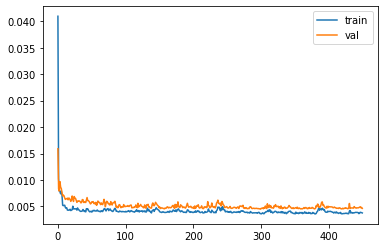

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 12)]         0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 12)           48          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
dense (Dense)                   (None, 35)           455         batch_normalization[0][0]        
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 35)           0           dense[0][0]                      
______________________________________________________________________________________________

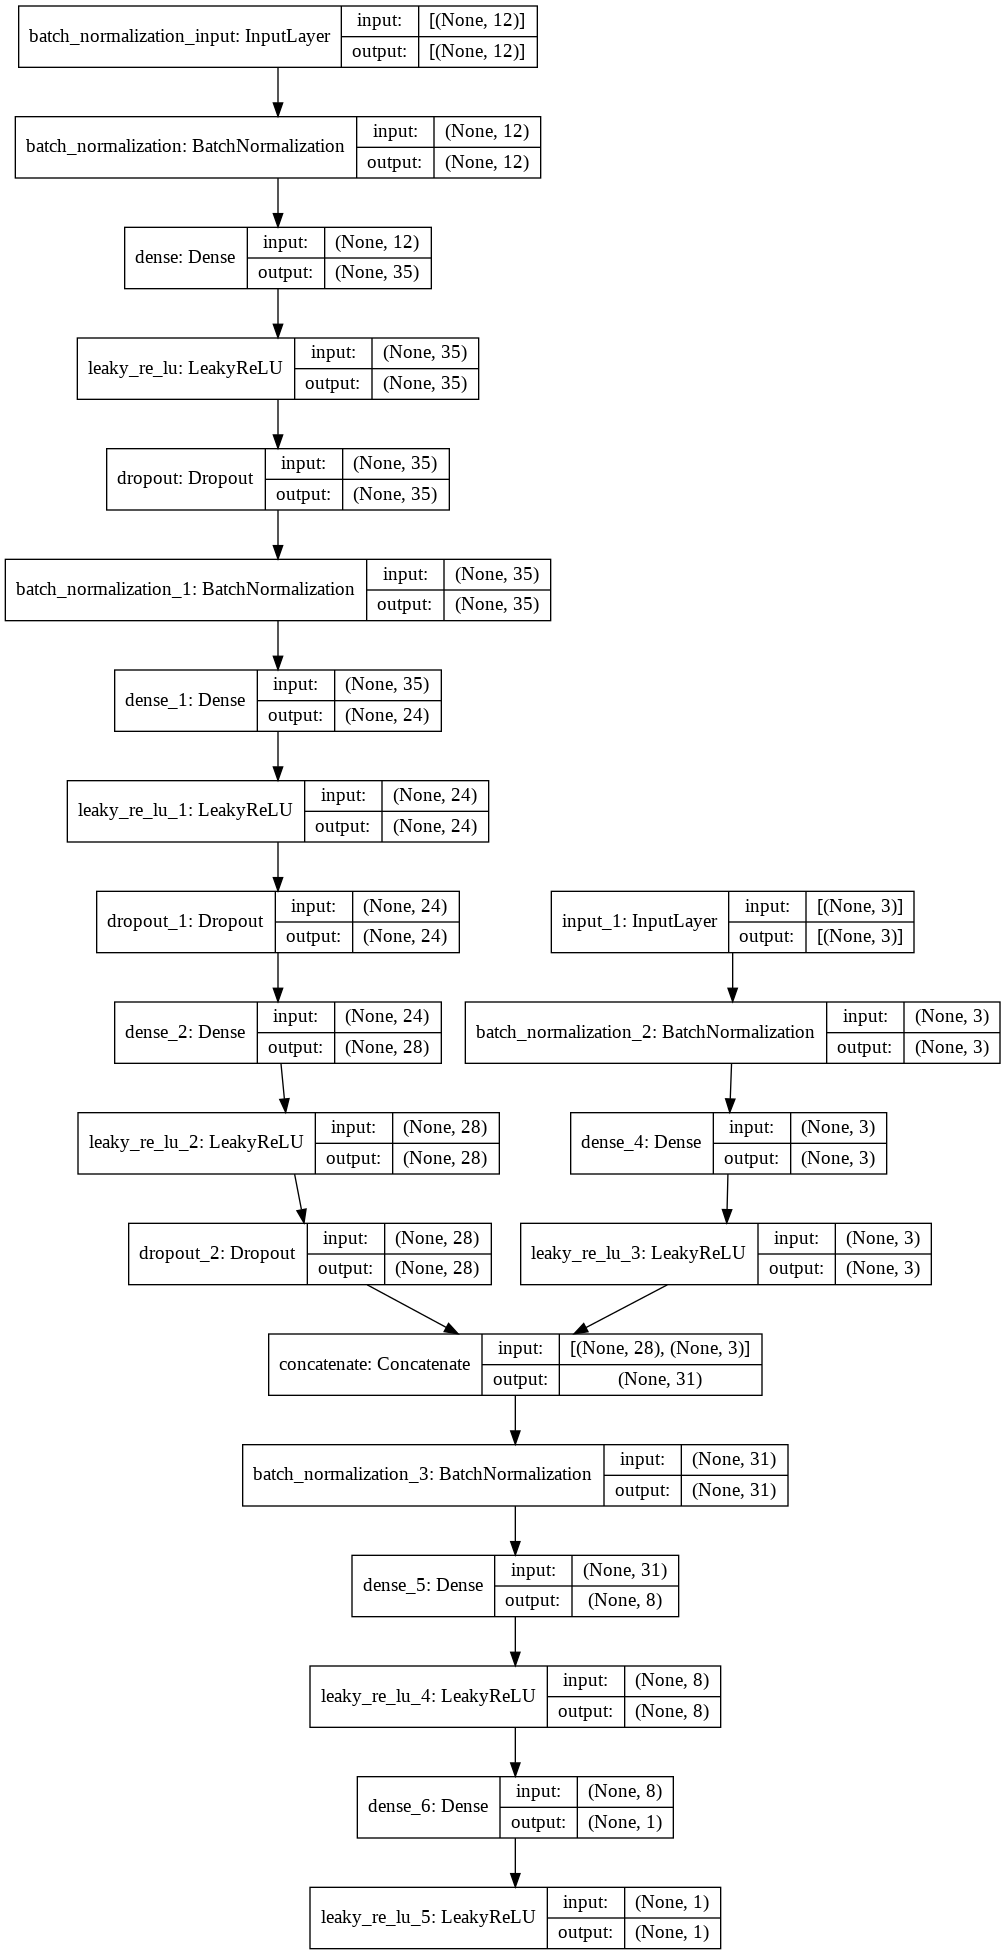

In [ ]:
model_fixed = load_model(precovid_model)
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

for i in range(0,len(model_fixed.layers)):
  model_fixed.layers[i].trainable = False

l1 = Input(shape=(3,))
l1_2 = BatchNormalization()(l1)
l2 = Dense(best_params2['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
l2_2 = LeakyReLU(alpha=best_params2['alpha'])(l2)
if best_params2['two_layer'] ==1 :
      l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_3])
else :
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_2])
merged2 = BatchNormalization()(merged)

if best_params2['last_layer'] ==0:
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)

if best_params2['last_layer'] ==1:
    l5 = Dense(best_params2['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
    l5_1 = LeakyReLU(alpha=best_params2['alpha'])(l5)
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)          

model = Model(inputs=[model_fixed.input,l1], outputs=l5_3)

opt = keras.optimizers.Adam(learning_rate=best_params2['learning_rate'])
model.compile(loss='mse',optimizer=opt)
fn_f = "gdrive/My Drive/Colab Notebooks/Stations/Training_CO_aftercovid.ckpt" 
fnn_f = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer

callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn_f, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=int(best_params2['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

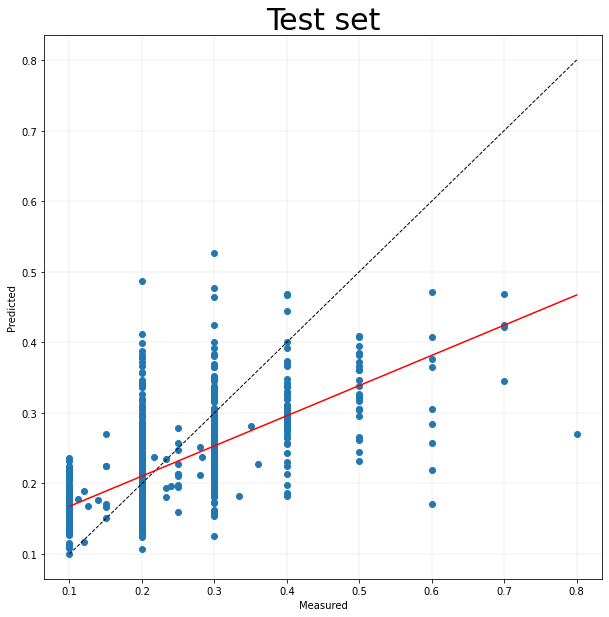

[0.42761824 0.12493499]
RMSE
[0.06297126]
R2
0.42194653306663965


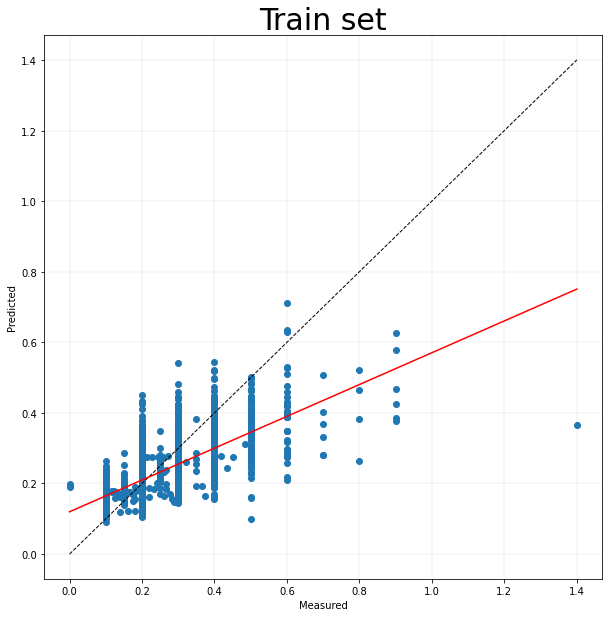

[0.45061179 0.11989867]
RMSE
[0.06110412]
R2
0.47311888956403503


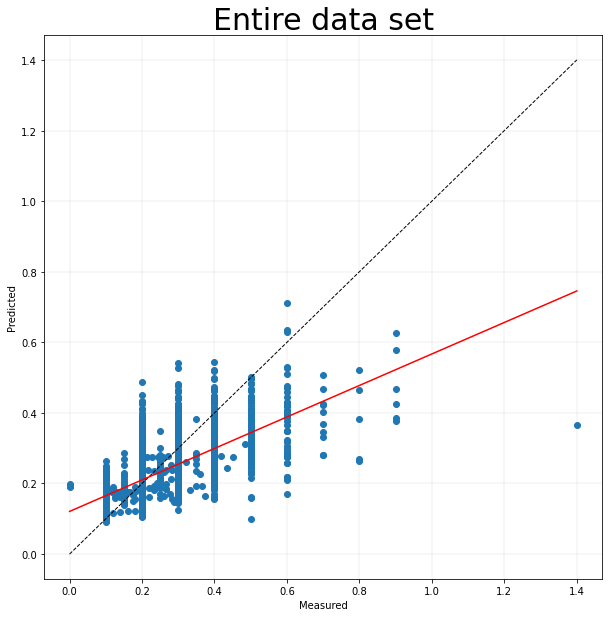

[0.4461315  0.12088052]
RMSE
[0.06148209]
R2
0.4631478722431982


In [ ]:
model.load_weights(fn_f )
model.save('gdrive/My Drive/Colab Notebooks/Model_Edmonton_east_after_Covid.h5')
preds = model.predict([X_test_a,X_test_b]) 
y_real = y_test_a.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn_f)
preds = model.predict([X_train_a,X_train_b]) 
y_real_t = y_train_a.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn_f)
preds = model.predict([X_a,X_b]) 
y_real_to = Y_a.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

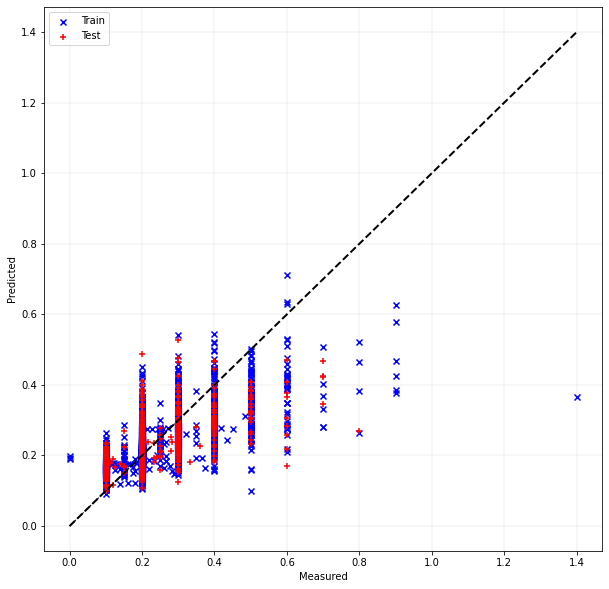

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.3], [0,0.3], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
df2_w_c

CO(ppm)  T( C)  RH(%)  ...  driving  transit  walking
Date                                        ...                           
2020-01-13 00:00:00      0.1  -25.4   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 01:00:00      0.1  -25.7   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 02:00:00      0.1  -25.8   66.0  ...   1.0000   1.0000   1.0000
2020-01-13 03:00:00      0.1  -25.8   65.0  ...   1.0000   1.0000   1.0000
2020-01-13 04:00:00      0.1  -26.0   65.0  ...   1.0000   1.0000   1.0000
...                      ...    ...    ...  ...      ...      ...      ...
2021-01-31 19:00:00      0.4  -15.5   76.0  ...   0.7143   0.4266   0.8011
2021-01-31 20:00:00      0.4  -15.4   78.0  ...   0.7143   0.4266   0.8011
2021-01-31 21:00:00      0.2  -15.5   79.0  ...   0.7143   0.4266   0.8011
2021-01-31 22:00:00      0.2  -16.3   80.0  ...   0.7143   0.4266   0.8011
2021-01-31 23:00:00      0.2  -16.7   81.0  ...   0.7143   0.4266   0.8011

[9075 rows x 16 columns]

In [ ]:
# df3= df3.copy()
df4 = df2_w_c.copy()
df4['pred'] = model.predict([X_a,X_b])
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

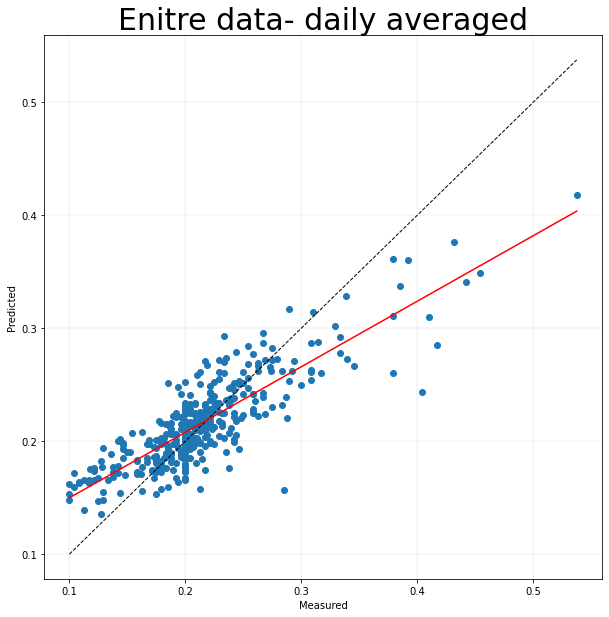

[0.57997188 0.09186987]
RMSE
[0.03240749]
R2
0.6798581783938966


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10['CO(ppm)']).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


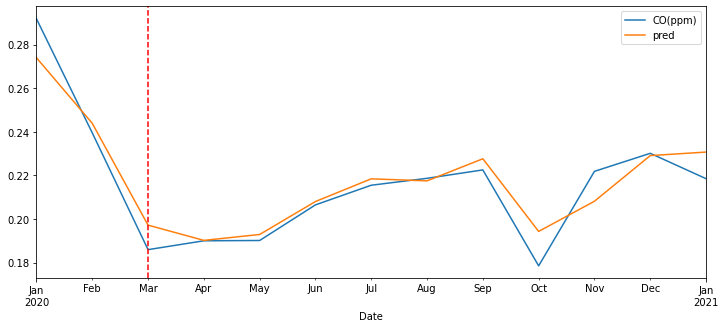

In [ ]:
df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df3_w_c = df2_w_c.copy()
df3_w_c['driving'] = 1.124019
df3_w_c['transit']  = 1.025378
df3_w_c['walking'] = 1.331329

In [ ]:
Y_a = df3_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df3_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df3_w_c[ ['driving', 'transit', 'walking']])




X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
# df3= df3.copy()
df44 = df3_w_c.copy()
df44['No lockdown'] = model.predict([X_a,X_b])
df104 = df44.resample('D').mean()
df104.dropna(inplace= True)

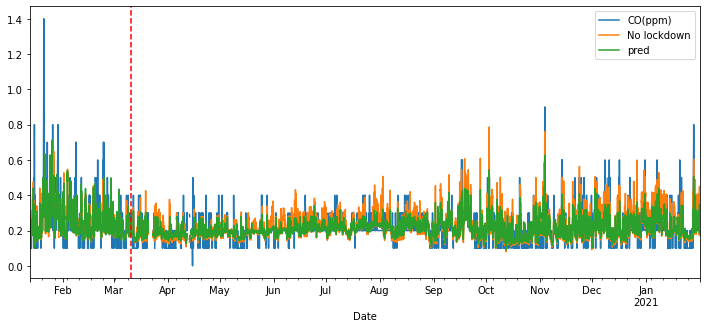

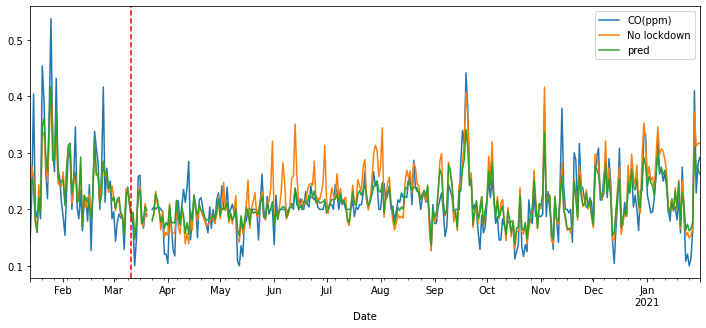

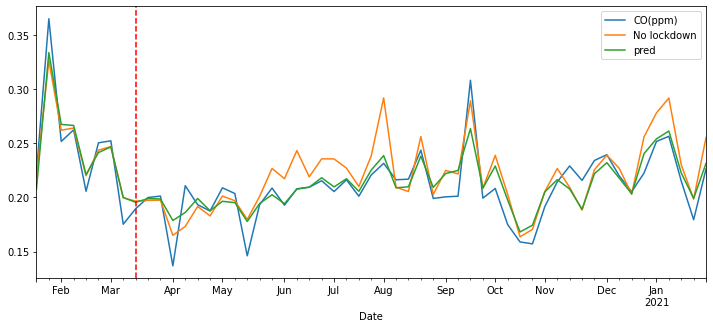

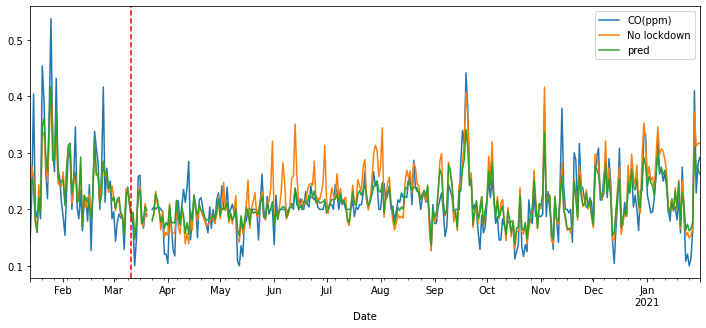

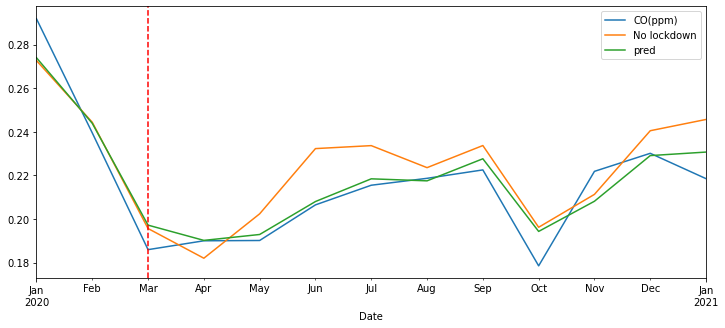

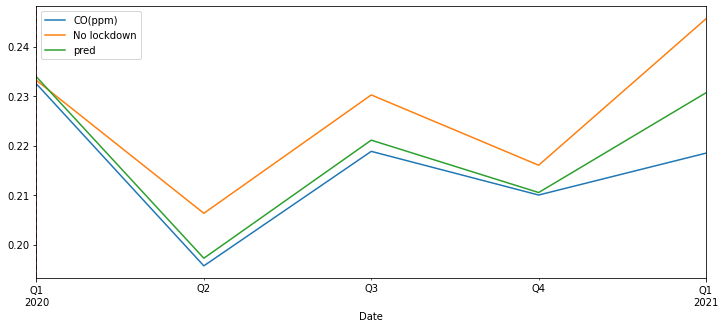

In [ ]:


df4['CO(ppm)'].resample('H').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('H').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('W').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('W').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()
df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('Q').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4['No lockdown']=df44['No lockdown'].copy()
print('No lockdown:',df4['No lockdown'].mean())
print('pred:',df4['pred'].mean())
print('CO(ppm):',df4['CO(ppm)'].mean())

No lockdown: 0.22312191128730774
pred: 0.2163834571838379
CO(ppm): 0.21406886884590973


In [ ]:
df4.head()

CO(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                        ...                                
2020-01-13 00:00:00      0.1  -25.4   68.0  ...      1.0  0.144256     0.140617
2020-01-13 01:00:00      0.1  -25.7   68.0  ...      1.0  0.154986     0.151347
2020-01-13 02:00:00      0.1  -25.8   66.0  ...      1.0  0.158600     0.154960
2020-01-13 03:00:00      0.1  -25.8   65.0  ...      1.0  0.166749     0.168830
2020-01-13 04:00:00      0.1  -26.0   65.0  ...      1.0  0.185634     0.212358

[5 rows x 18 columns]

In [ ]:
df4.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/NOX_mobility_aftercov_Edmonton_east-COVID_hourly_pred.csv')

In [ ]:
df4

NOX(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                         ...                                
2020-01-13 00:00:00    0.0084  -25.4   68.0  ...   1.0000  0.012064     0.011699
2020-01-13 01:00:00    0.0078  -25.7   68.0  ...   1.0000  0.015269     0.014904
2020-01-13 02:00:00    0.0053  -25.8   66.0  ...   1.0000  0.015456     0.015090
2020-01-13 03:00:00    0.0050  -25.8   65.0  ...   1.0000  0.018650     0.018285
2020-01-13 04:00:00    0.0069  -26.0   65.0  ...   1.0000  0.023630     0.023264
...                       ...    ...    ...  ...      ...       ...          ...
2021-01-31 19:00:00    0.1137  -15.5   76.0  ...   0.8011  0.037565     0.041811
2021-01-31 20:00:00    0.1007  -15.4   78.0  ...   0.8011  0.024746     0.028993
2021-01-31 21:00:00    0.0515  -15.5   79.0  ...   0.8011  0.019648     0.023895
2021-01-31 22:00:00    0.0502  -16.3   80.0  ...   0.8011  0.030382     0.034629
2021-01-31 23:00:00    0.0408  -16.7   81.0  ...   0.8011  0.025745     0.029992

[9075 rows x 18 columns]